In [1]:
# Nativos
import os
import sys

#calculo
import numpy as np
import pandas as pd
from IPython.display import display

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

#warning ignore future
import warnings
warnings.filterwarnings('ignore')

from extract import MYExtract
from compare_for_day import compare_result, print_result, noise_control, calc_result
np.random.seed(123)

# **CARGA DE DATA**

In [2]:
df_global = pd.read_csv('all_peru21.csv', parse_dates=['Fecha'])
df_global.index = df_global['Fecha']
df_global['weekday'] = df_global['Fecha'].dt.weekday
df_global = df_global.sort_index()

del df_global.index.name
df_global.head()

Producto      Fecha  CodigoSapAgencia NombreAgencia  \
2018-01-01  Peru 21 2018-01-01        1200000065        CALLAO   
2018-01-01  Peru 21 2018-01-01        1200000077    LOS OLIVOS   
2018-01-01  Peru 21 2018-01-01        1200000077    LOS OLIVOS   
2018-01-01  Peru 21 2018-01-01        1200000077    LOS OLIVOS   
2018-01-01  Peru 21 2018-01-01        1200000077    LOS OLIVOS   

            CodigoSapCanilla                  NombreCanilla  Pauta  \
2018-01-01        1300000005             ABANTO LECCA LIDIA      2   
2018-01-01        1300005097         PALOMINO RAMIREZ DIANA      0   
2018-01-01        1300004633    MORENO ALVA MARIA ANASTACIA     10   
2018-01-01        1300004632              MORENO ALVA JULIO     10   
2018-01-01        1300004628  MORALES VILLALOBOS LOURDES V.      0   

            Devolucion  VentaNeta  Lim. Inf Vta. Proy  Vta. Proy  \
2018-01-01           2          0                 NaN        NaN   
2018-01-01           0          0                 NaN        NaN   
2018-01-01           1          9                 NaN        NaN   
2018-01-01           2          8                 NaN        NaN   
2018-01-01           0          0                 NaN        NaN   

            Lim. Sup Vta. Proy  weekday  
2018-01-01                 NaN        0  
2018-01-01                 NaN        0  
2018-01-01                 NaN        0  
2018-01-01                 NaN        0  
2018-01-01                 NaN        0

#### **OBSERVACION, por casos de datos faltantes**

In [3]:
col_proy = 'Vta. Proy'
col_venta = 'VentaNeta'
col_pauta = 'Pauta'

In [4]:
df_global[df_global['CodigoSapCanilla'] == 1300000384][[col_pauta, col_venta, col_proy]].tail(15)

Pauta  VentaNeta  Vta. Proy
2019-01-20      2          1        NaN
2019-01-21      1          0   0.000000
2019-01-22      1          0   0.000000
2019-01-23      1          0   0.000000
2019-01-24      0          0   0.000000
2019-01-25      0          0   0.000000
2019-01-26      0          0   0.000000
2019-01-27      2          1   1.053747
2019-01-28      0          0   0.000000
2019-01-29      0          0   0.000000
2019-01-30      0          0   0.000000
2019-01-31      0          0   0.000000
2019-02-01      0          0   0.000000
2019-02-02      0          0   0.000000
2019-02-03      1          1   0.998528

In [5]:
for cc in [1300002282,1300002397,1300002898,1300005286,
           1300005692,1300005969,1300011566,1300011920,
           1300012212,1300012650,1300012838,1300013177,
           1300013254,1300013469,1300013484,1300013547]:
    display(df_global[df_global['CodigoSapCanilla'] == cc][
        [col_pauta, col_venta, col_proy]].tail(15))


Pauta  VentaNeta  Vta. Proy
2018-11-24     15         12        NaN
2018-11-25      3          3        NaN
2018-11-26     20         17        NaN
2018-11-27     20         14        NaN
2018-11-28     19         12        NaN
2018-11-29     15         14        NaN
2018-11-30     16         14        NaN
2018-12-01     11         10        NaN
2018-12-02      5          5        NaN
2018-12-03     17         17        NaN
2018-12-04     16         13        NaN
2018-12-05     16         16        NaN
2018-12-06      0          0        NaN
2018-12-08      0          0        NaN
2018-12-09      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-01-18      7          6        NaN
2018-01-19     10          6        NaN
2018-01-20      0          0        NaN
2018-01-21      5          3        NaN
2018-01-22     10          6        NaN
2018-01-23      6          2        NaN
2018-01-24     10          7        NaN
2018-01-25      8          7        NaN
2018-01-26     11          9        NaN
2018-01-27      0          0        NaN
2018-01-28      5          2        NaN
2018-01-29      0          0        NaN
2018-01-30      0          0        NaN
2018-01-31      0          0        NaN
2018-02-03      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-01-09      0          0        NaN
2018-01-10      0          0        NaN
2018-01-11      0          0        NaN
2018-01-12      0          0        NaN
2018-01-13      0          0        NaN
2018-01-14      0          0        NaN
2018-01-15      0          0        NaN
2018-01-16      0          0        NaN
2018-01-17      0          0        NaN
2018-01-18      0          0        NaN
2018-01-19      0          0        NaN
2018-01-20      0          0        NaN
2018-01-21      0          0        NaN
2018-01-22      0          0        NaN
2018-01-23      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-02-19      0          0        NaN
2018-02-20      0          0        NaN
2018-02-21      0          0        NaN
2018-02-22      0          0        NaN
2018-02-23      0          0        NaN
2018-02-24      0          0        NaN
2018-02-25      0          0        NaN
2018-02-26      0          0        NaN
2018-02-27      0          0        NaN
2018-02-28      0          0        NaN
2018-03-01      0          0        NaN
2018-03-02      0          0        NaN
2018-03-03      0          0        NaN
2018-03-04      0          0        NaN
2018-03-05      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-01-09      0          0        NaN
2018-01-10      0          0        NaN
2018-01-11      0          0        NaN
2018-01-12      0          0        NaN
2018-01-13      0          0        NaN
2018-01-14      0          0        NaN
2018-01-15      0          0        NaN
2018-01-16      0          0        NaN
2018-01-17      0          0        NaN
2018-01-18      0          0        NaN
2018-01-19      0          0        NaN
2018-01-20      0          0        NaN
2018-01-21      0          0        NaN
2018-01-22      0          0        NaN
2018-01-23      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-08-13      0          0        NaN
2018-08-14      0          0        NaN
2018-08-15      0          0        NaN
2018-08-16      0          0        NaN
2018-08-17      0          0        NaN
2018-08-18      0          0        NaN
2018-08-19      0          0        NaN
2018-08-20      0          0        NaN
2018-08-21      0          0        NaN
2018-08-22      0          0        NaN
2018-08-23      0          0        NaN
2018-08-24      0          0        NaN
2018-08-25      0          0        NaN
2018-08-26      0          0        NaN
2018-08-27      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-01-09      0          0        NaN
2018-01-10      0          0        NaN
2018-01-11      0          0        NaN
2018-01-12      0          0        NaN
2018-01-13      0          0        NaN
2018-01-14      0          0        NaN
2018-01-15      0          0        NaN
2018-01-16      0          0        NaN
2018-01-17      0          0        NaN
2018-01-18      0          0        NaN
2018-01-19      0          0        NaN
2018-01-20      0          0        NaN
2018-01-21      0          0        NaN
2018-01-22     15         15        NaN
2018-01-23      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-08-13      0          0        NaN
2018-08-14      0          0        NaN
2018-08-15      0          0        NaN
2018-08-16      0          0        NaN
2018-08-17      0          0        NaN
2018-08-18      0          0        NaN
2018-08-19      0          0        NaN
2018-08-20      0          0        NaN
2018-08-21      0          0        NaN
2018-08-22      0          0        NaN
2018-08-23      0          0        NaN
2018-08-24      0          0        NaN
2018-08-25      0          0        NaN
2018-08-26      0          0        NaN
2018-08-27      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-06-16      4          2        NaN
2018-06-17      2          2        NaN
2018-06-18      4          1        NaN
2018-06-19      1          0        NaN
2018-06-20      4          3        NaN
2018-06-21      0          0        NaN
2018-06-22      5          1        NaN
2018-06-23      4          3        NaN
2018-06-24      3          3        NaN
2018-06-25      3          1        NaN
2018-06-26      2          0        NaN
2018-06-27      3          3        NaN
2018-06-28      0          0        NaN
2018-06-30      0          0        NaN
2018-07-01      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-06-16      1          0        NaN
2018-06-17      2          1        NaN
2018-06-18      1          0        NaN
2018-06-19      1          0        NaN
2018-06-20      1          0        NaN
2018-06-21      0          0        NaN
2018-06-22      2          0        NaN
2018-06-23      1          0        NaN
2018-06-24      2          1        NaN
2018-06-25      1          0        NaN
2018-06-26      1          0        NaN
2018-06-27      1          1        NaN
2018-06-28      0          0        NaN
2018-06-30      0          0        NaN
2018-07-01      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-07-12      0          0        NaN
2018-07-13      0          0        NaN
2018-07-14      0          0        NaN
2018-07-15      0          0        NaN
2018-07-16      0          0        NaN
2018-07-17      0          0        NaN
2018-07-18      0          0        NaN
2018-07-19      0          0        NaN
2018-07-20      0          0        NaN
2018-07-21      0          0        NaN
2018-07-22      0          0        NaN
2018-07-23      0          0        NaN
2018-07-24      0          0        NaN
2018-07-25      0          0        NaN
2018-07-28      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-01-03      0          0        NaN
2018-01-04      0          0        NaN
2018-01-05      0          0        NaN
2018-01-06      0          0        NaN
2018-01-07      0          0        NaN
2018-01-08      0          0        NaN
2018-01-09      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-01-05      0          0        NaN
2018-01-08      0          0        NaN
2018-01-09      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-07-12      0          0        NaN
2018-07-13      0          0        NaN
2018-07-14      0          0        NaN
2018-07-15      0          0        NaN
2018-07-16      0          0        NaN
2018-07-17      0          0        NaN
2018-07-18      0          0        NaN
2018-07-19      0          0        NaN
2018-07-20      0          0        NaN
2018-07-21      0          0        NaN
2018-07-22      0          0        NaN
2018-07-23      0          0        NaN
2018-07-24      0          0        NaN
2018-07-25      0          0        NaN
2018-07-28      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-01-15      3          0        NaN
2018-01-16      2          0        NaN
2018-01-17      2          1        NaN
2018-01-18      1          0        NaN
2018-01-19      2          0        NaN
2018-01-20      2          1        NaN
2018-01-21      2          0        NaN
2018-01-22      2          0        NaN
2018-01-23      2          0        NaN
2018-01-24      2          0        NaN
2018-01-25      1          0        NaN
2018-01-26      2          2        NaN
2018-01-27      0          0        NaN
2018-01-28      0          0        NaN
2018-01-29      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-06-19      0          0        NaN
2018-06-20      1          0        NaN
2018-06-21      0          0        NaN
2018-06-22      1          0        NaN
2018-06-23      1          0        NaN
2018-06-24      3          0        NaN
2018-06-25      1          0        NaN
2018-06-26      0          0        NaN
2018-06-27      1          0        NaN
2018-06-28      0          0        NaN
2018-06-29      0          0        NaN
2018-06-30      0          0        NaN
2018-07-01      0          0        NaN
2018-07-02      0          0        NaN
2018-07-03      0          0        NaN

### Filtrado Preventivo

In [6]:
df = df_global[(df_global['Pauta'] > 0) | (df_global['VentaNeta'].notnull())]

if df.shape == df_global.shape:
    del df_global

df.shape

(295479, 13)

## Validacion de nulos Globales

In [7]:
df.isnull().sum(), df.shape

(Producto                   0
 Fecha                      0
 CodigoSapAgencia           0
 NombreAgencia              0
 CodigoSapCanilla           0
 NombreCanilla              0
 Pauta                      0
 Devolucion                 0
 VentaNeta                  0
 Lim. Inf Vta. Proy    285015
 Vta. Proy             285015
 Lim. Sup Vta. Proy    285015
 weekday                    0
 dtype: int64, (295479, 13))

## Configuracion

Se procede a realizar dos intervalos de validación

In [8]:
until_train_1 = '2019-01-27'
since_date_1 = '2019-01-28'
until_date_1 = '2019-02-03'

In [9]:
df.tail()

Producto      Fecha  CodigoSapAgencia NombreAgencia  \
2019-02-03  Peru 21 2019-02-03        1200001015  CANTO GRANDE   
2019-02-03  Peru 21 2019-02-03        1200001015  CANTO GRANDE   
2019-02-03  Peru 21 2019-02-03        1200001015  CANTO GRANDE   
2019-02-03  Peru 21 2019-02-03        1200001015  CANTO GRANDE   
2019-02-03  Peru 21 2019-02-03        1200000043  MIRAFLORES 1   

            CodigoSapCanilla                  NombreCanilla  Pauta  \
2019-02-03        1300012513       SALAZAR CORONEL VIRGILIO      2   
2019-02-03        1300012514  SALZAR VILCHEZ OSCAR VIRGILIO      1   
2019-02-03        1300012515            ROJAS BILBAO EMILIA      1   
2019-02-03        1300012232       OTERO SANCHEZ OMAR CESAR      1   
2019-02-03        1300014543        ARANDA SOLANO EMPERADOR      3   

            Devolucion  VentaNeta  Lim. Inf Vta. Proy  Vta. Proy  \
2019-02-03           0          2            0.000000   0.000000   
2019-02-03           0          1            0.694915   0.998889   
2019-02-03           1          0            0.000000   0.000000   
2019-02-03           1          0            0.316834   0.544568   
2019-02-03           0          3            1.534909   1.959923   

            Lim. Sup Vta. Proy  weekday  
2019-02-03            0.000000        6  
2019-02-03            1.302862        6  
2019-02-03            0.000000        6  
2019-02-03            0.772302        6  
2019-02-03            2.384938        6

In [10]:
agencias_detectadas = df.groupby(by=['NombreAgencia'])['CodigoSapAgencia'].max()
agencias_detectadas

NombreAgencia
CALLAO          1200000065
CANTO GRANDE    1200001015
JESUS MARIA     1200000047
LINCE           1200000026
LOS OLIVOS      1200000077
MIRAFLORES 1    1200000044
Name: CodigoSapAgencia, dtype: int64

## Creación de contenedor de canillas por agencia

In [11]:
%%time
extractor_28_03 = MYExtract(df, since=since_date_1, until=until_date_1)

Detección de valores nulos en pronosticos o ventas netas


Fecha  Vta. Proy  VentaNeta
CodigoSapCanilla                                 
1300002282       2018-12-09        NaN         20
1300002397       2018-02-03        NaN         14
1300002898       2018-01-23        NaN          0
1300005286       2018-03-05        NaN          4
1300005692       2018-01-23        NaN          0
1300005969       2018-08-27        NaN          6
1300011566       2018-01-23        NaN         15
1300011920       2018-08-27        NaN         24
1300012212       2018-07-01        NaN          4
1300012650       2018-07-01        NaN          4
1300012838       2018-07-28        NaN         10
1300013177       2018-01-09        NaN          0
1300013254       2018-01-09        NaN          0
1300013469       2018-07-28        NaN          5
1300013484       2018-01-29        NaN          2
1300013547       2018-07-03        NaN          4

Total canillas:  764
Canillas a analizar:  748
Columna de dias de semana creada
CPU times: user 70.1 ms, sys: 7.45 ms, total: 77.6 ms
Wall time: 76 ms


### JESUS MARIA

Total canillas en agencia:  157
Canillas a trabajar:  157
Se detecto una relacion lineal :  2018-12-16    0
2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-22    1
2018-12-29    1
2019-01-05    1
2019-01-12    1
2019-01-19    1
Name: VentaNeta, dtype: int64 num_day  5
Se detecto una relacion lineal :  2018-12-16    1
2018-12-23    1
2018-12-30    1
2019-01-06    1
2019-01-20    1
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-16    0
2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-16    0
2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6

 DETECCION DE CASO INVALIDO  1300003350
Cantidad de ausencia supera el 50% de casos reportados
//////////////////////////////

 DETECCION DE CASO INVALIDO  1300011543

Se detecto una relacion lineal :  2018-12-16    0
2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-16    0
2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-16    0
2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-11    6
2018-12-18    0
2018-12-25    0
2019-01-01    0
2019-01-08    0
Name: VentaNeta, dtype: int64 num_day  1
Se detecto una relacion lineal :  2018-12-19    0
2018-12-26    0
2019-01-02    0
2019-01-09    0
2019-01-16    0
Name: VentaNeta, dtype: int64 num_day  2
Se detecto una relacion lineal :  2018-12-21    0
2018-12-28    0
2019-01-04    0
2019-01-11    0
2019-01-18    0
Name: VentaNeta, dtype: int64 num_day  4
Se detecto una relacion lineal :  2018-12-22    0
2018-12-29    0
2019

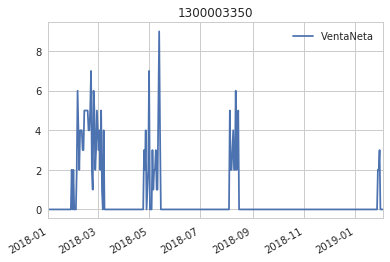

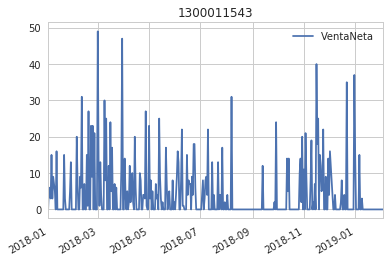

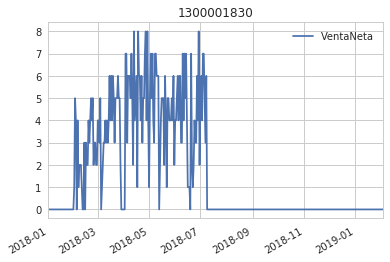

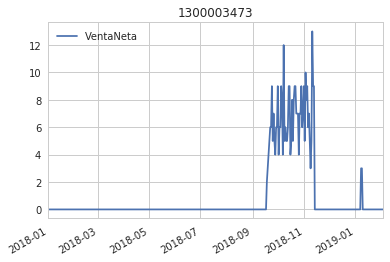

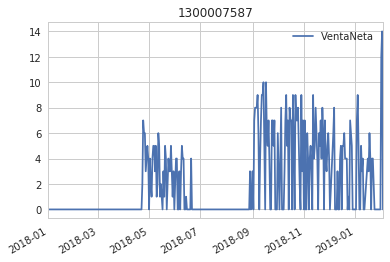

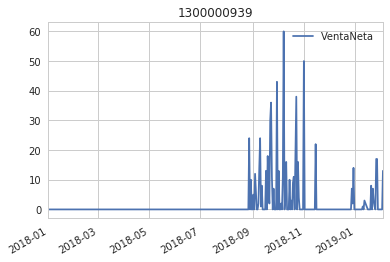

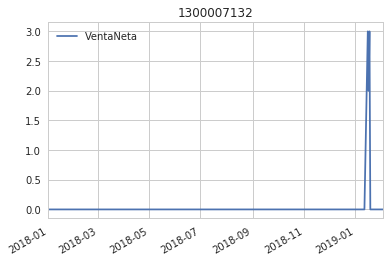

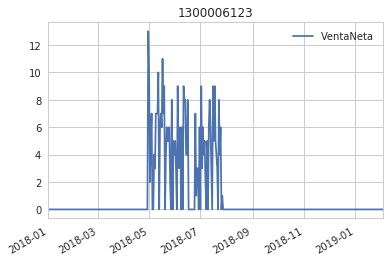

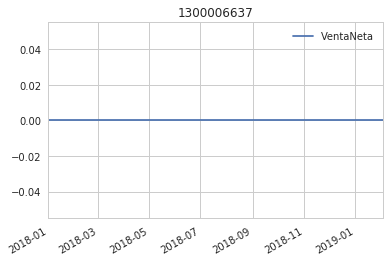

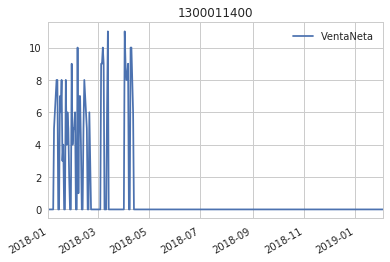

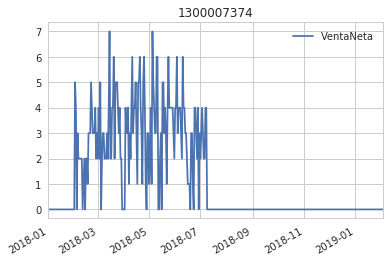

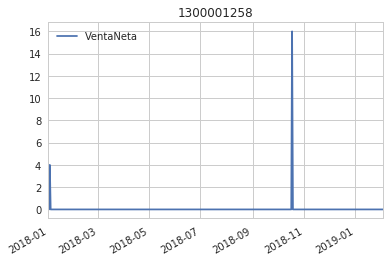

In [12]:
%%time
dicc_jesus_maria = extractor_28_03.populate_data(1200000047)

Total canillas en agencia:  161
Canillas a trabajar:  159

 DETECCION DE CASO INVALIDO  1300006402
Cantidad de ausencia supera el 50% de casos reportados
//////////////////////////////
Se detecto una relacion lineal :  2018-12-17    0
2018-12-24    0
2018-12-31    0
2019-01-07    0
2019-01-14    0
Name: VentaNeta, dtype: int64 num_day  0
Se detecto una relacion lineal :  2018-12-19    1
2018-12-26    2
2019-01-02    0
2019-01-09    1
2019-01-16    1
Name: VentaNeta, dtype: int64 num_day  2
Se detecto una relacion lineal :  2018-12-21    0
2018-12-28    0
2019-01-04    0
2019-01-11    0
2019-01-18    0
Name: VentaNeta, dtype: int64 num_day  4
Se detecto una relacion lineal :  2018-12-22    0
2018-12-29    0
2019-01-05    0
2019-01-12    0
2019-01-19    0
Name: VentaNeta, dtype: int64 num_day  5
Se detecto una relacion lineal :  2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-13    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-1

//////////////////////////////
Se detecto una relacion lineal :  2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-13    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-17    0
2018-12-24    0
2018-12-31    0
2019-01-07    0
2019-01-14    0
Name: VentaNeta, dtype: int64 num_day  0
Se detecto una relacion lineal :  2018-12-18    0
2018-12-25    0
2019-01-01    0
2019-01-08    0
2019-01-15    0
Name: VentaNeta, dtype: int64 num_day  1
Se detecto una relacion lineal :  2018-12-19    0
2018-12-26    0
2019-01-02    0
2019-01-09    0
2019-01-16    0
Name: VentaNeta, dtype: int64 num_day  2
Se detecto una relacion lineal :  2018-12-20    0
2018-12-27    0
2019-01-03    0
2019-01-10    0
2019-01-17    0
Name: VentaNeta, dtype: int64 num_day  3
Se detecto una relacion lineal :  2018-12-21    0
2018-12-28    0
2019-01-04    0
2019-01-11    0
2019-01-18    0
Name: VentaNeta, dtype: int64 num_day  4
Se detecto una relacion lineal :  2018-

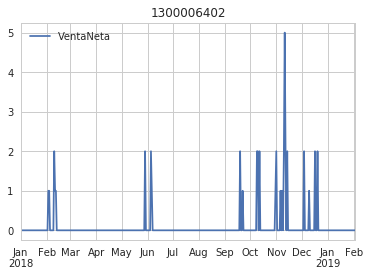

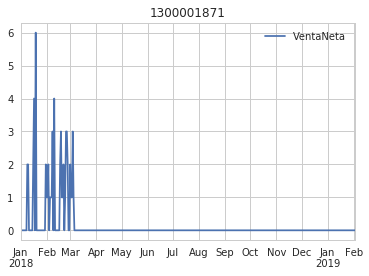

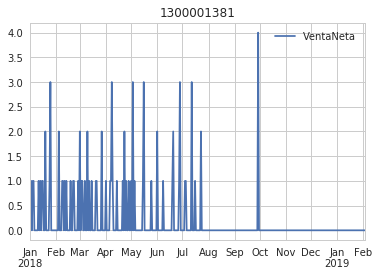

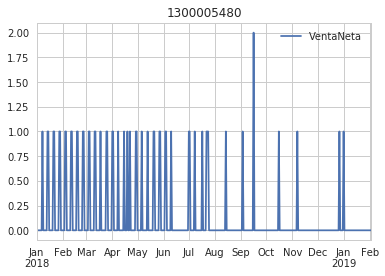

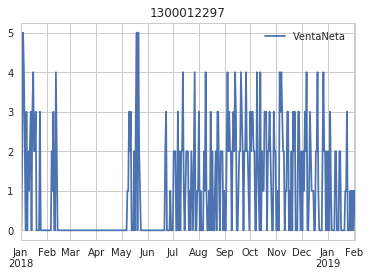

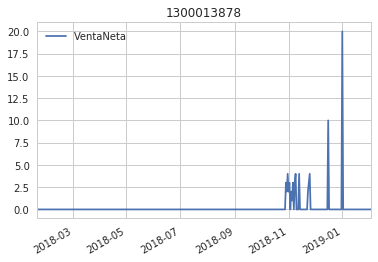

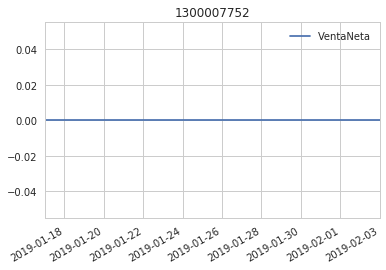

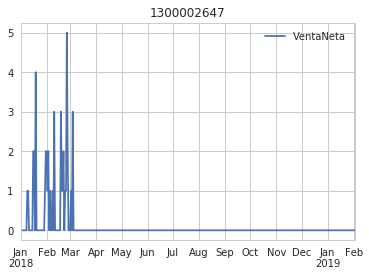

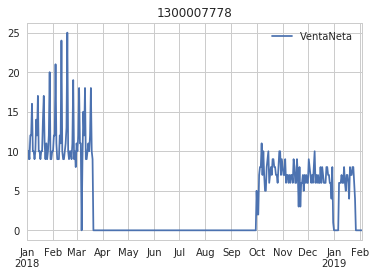

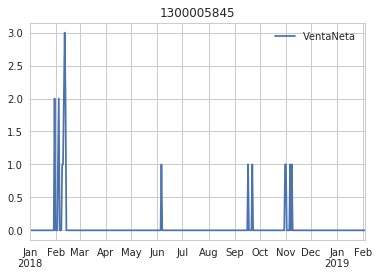

In [13]:
%%time
dicc_callao = extractor_28_03.populate_data(1200000065)

Total canillas en agencia:  72
Canillas a trabajar:  69
Se detecto una relacion lineal :  2018-12-19    0
2018-12-26    0
2019-01-02    0
2019-01-09    0
2019-01-16    0
Name: VentaNeta, dtype: int64 num_day  2
Se detecto una relacion lineal :  2018-12-20    0
2018-12-27    0
2019-01-03    0
2019-01-10    0
2019-01-17    0
Name: VentaNeta, dtype: int64 num_day  3
Se detecto una relacion lineal :  2018-12-21    0
2018-12-28    0
2019-01-04    0
2019-01-11    0
2019-01-18    0
Name: VentaNeta, dtype: int64 num_day  4
Se detecto una relacion lineal :  2018-12-22    0
2018-12-29    0
2019-01-05    0
2019-01-12    0
2019-01-19    0
Name: VentaNeta, dtype: int64 num_day  5

 DETECCION DE CASO INVALIDO  1300012419
Cantidad de ausencia supera el 50% de casos reportados
//////////////////////////////
Se detecto una relacion lineal :  2018-12-17    0
2018-12-24    1
2018-12-31    1
2019-01-07    1
2019-01-14    1
Name: VentaNeta, dtype: int64 num_day  0
Se detecto una relacion lineal :  2018-12-

Se detecto una relacion lineal :  2018-12-20    1
2018-12-27    1
2019-01-03    1
2019-01-10    1
2019-01-17    1
Name: VentaNeta, dtype: int64 num_day  3
Se detecto una relacion lineal :  2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-13    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-20    1
2018-12-27    1
2019-01-03    1
2019-01-10    1
2019-01-17    1
Name: VentaNeta, dtype: int64 num_day  3
Se detecto una relacion lineal :  2018-12-23    0
2018-12-30    1
2019-01-06    1
2019-01-13    1
2019-01-20    1
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-18    0
2018-12-25    0
2019-01-01    0
2019-01-08    0
2019-01-15    0
Name: VentaNeta, dtype: int64 num_day  1
Se detecto una relacion lineal :  2018-12-19    0
2018-12-26    0
2019-01-02    0
2019-01-09    0
2019-01-16    0
Name: VentaNeta, dtype: int64 num_day  2
Se detecto una relacion lineal :  2018-12-20    0
2018-12-27    0
2019

Se detecto una relacion lineal :  2018-12-18    0
2018-12-25    0
2019-01-01    0
2019-01-08    0
2019-01-15    0
Name: VentaNeta, dtype: int64 num_day  1
Se detecto una relacion lineal :  2018-12-19    0
2018-12-26    0
2019-01-02    0
2019-01-09    0
2019-01-16    0
Name: VentaNeta, dtype: int64 num_day  2
Se detecto una relacion lineal :  2018-12-20    0
2018-12-27    0
2019-01-03    0
2019-01-10    0
2019-01-17    0
Name: VentaNeta, dtype: int64 num_day  3
Se detecto una relacion lineal :  2018-12-21    0
2018-12-28    0
2019-01-04    0
2019-01-11    0
2019-01-18    0
Name: VentaNeta, dtype: int64 num_day  4
Se detecto una relacion lineal :  2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-13    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-20    1
2018-12-27    1
2019-01-03    1
2019-01-10    1
2019-01-17    1
Name: VentaNeta, dtype: int64 num_day  3
Se detecto una relacion lineal :  2018-12-21    1
2018-12-28    1
2019

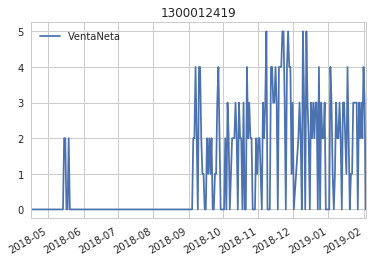

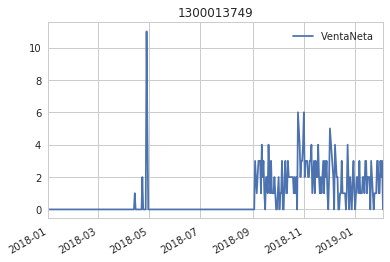

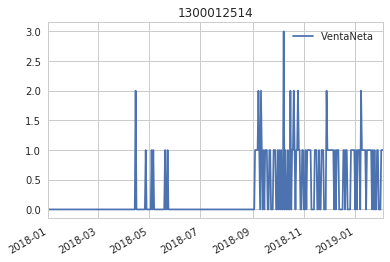

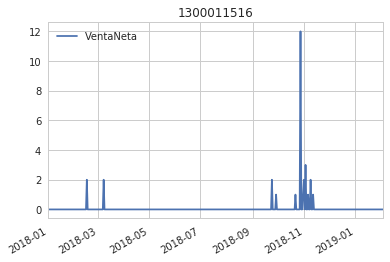

In [14]:
%%time
dicc_canto_grande = extractor_28_03.populate_data(1200001015)

Total canillas en agencia:  151
Canillas a trabajar:  151
Se detecto una relacion lineal :  2018-12-18    1
2018-12-25    0
2019-01-01    0
2019-01-08    0
2019-01-15    0
Name: VentaNeta, dtype: int64 num_day  1

 DETECCION DE CASO INVALIDO  1300004881
Cantidad de ausencia supera el 50% de casos reportados
//////////////////////////////
Se detecto una relacion lineal :  2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-13    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6

 DETECCION DE CASO INVALIDO  1300012125
Cantidad de ausencia supera el 50% de casos reportados
//////////////////////////////

 DETECCION DE CASO INVALIDO  1300002396
Cantidad de ausencia supera el 50% de casos reportados
//////////////////////////////
Se detecto una relacion lineal :  2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-13    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-18    0
2018-12-25    0
2019-01-01    0
2019-01-08    

Se detecto una relacion lineal :  2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-13    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6

 DETECCION DE CASO INVALIDO  1300000684
Cantidad de ausencia supera el 50% de casos reportados
//////////////////////////////

 DETECCION DE CASO INVALIDO  1300007870
Cantidad de ausencia supera el 50% de casos reportados
//////////////////////////////
Se detecto una relacion lineal :  2018-12-18    2
2018-12-25    0
2019-01-01    0
2019-01-08    0
2019-01-15    0
Name: VentaNeta, dtype: int64 num_day  1
Se detecto una relacion lineal :  2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-13    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-13    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-19    0
2018-12-26    0
2019-01-02    2
2019-01-09    1
2019-01-16    1
Name: VentaN

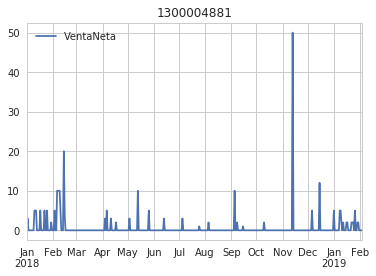

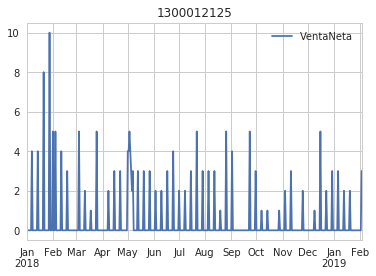

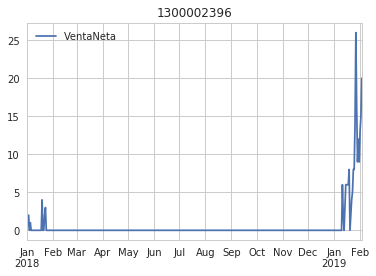

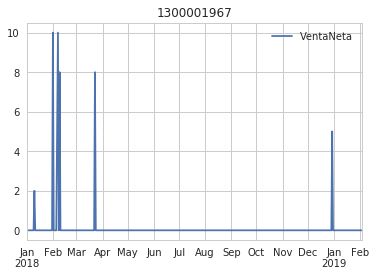

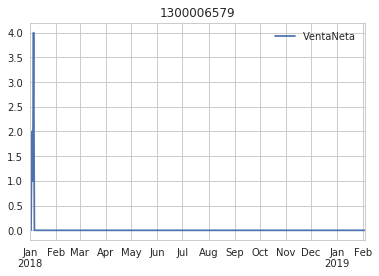

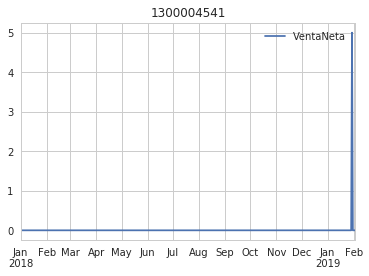

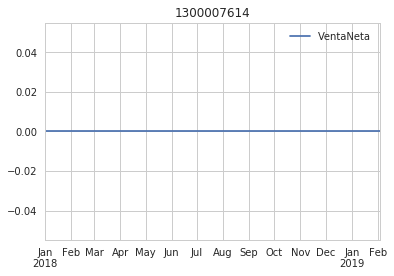

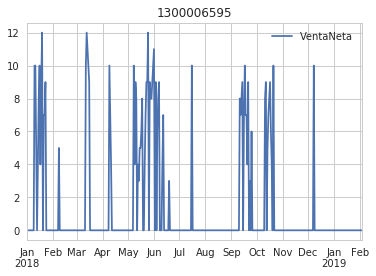

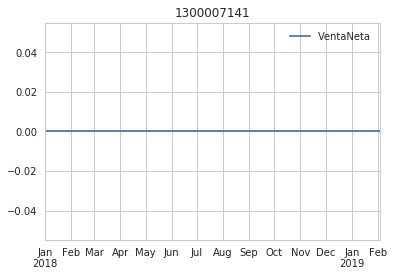

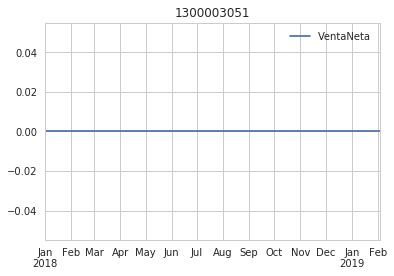

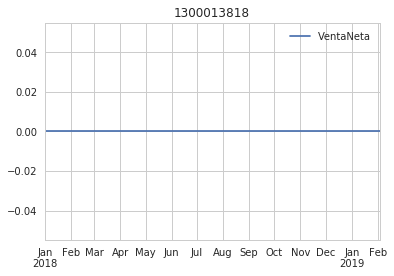

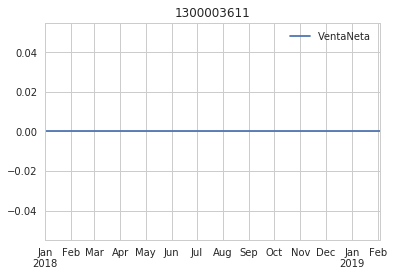

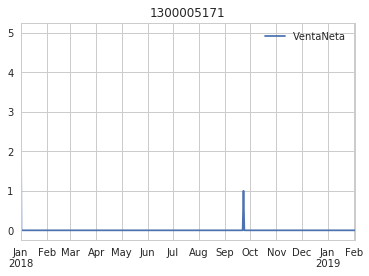

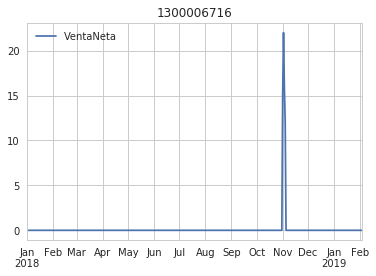

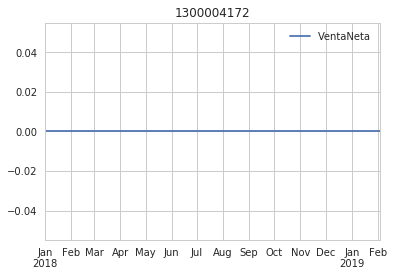

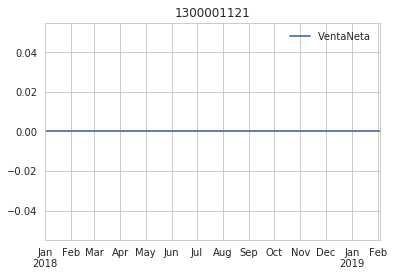

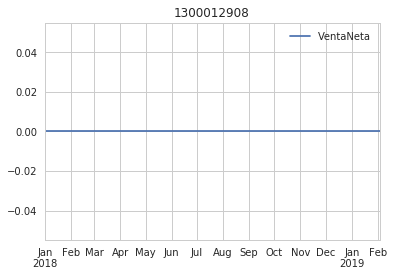

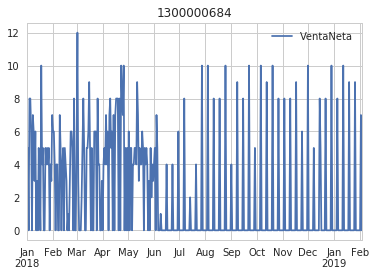

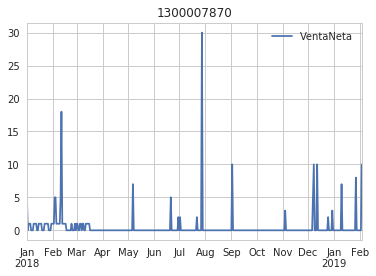

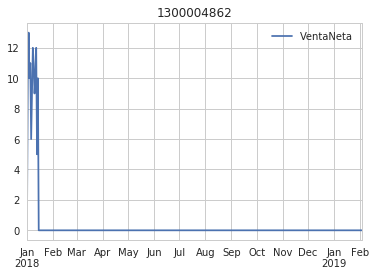

In [15]:
%%time
dicc_lince = extractor_28_03.populate_data(1200000026)

Total canillas en agencia:  101
Canillas a trabajar:  100
Se detecto una relacion lineal :  2018-12-17    0
2018-12-24    0
2018-12-31    0
2019-01-07    0
2019-01-14    0
Name: VentaNeta, dtype: int64 num_day  0
Se detecto una relacion lineal :  2018-12-18    0
2018-12-25    0
2019-01-01    0
2019-01-08    0
2019-01-15    0
Name: VentaNeta, dtype: int64 num_day  1
Se detecto una relacion lineal :  2018-12-19    0
2018-12-26    0
2019-01-02    0
2019-01-09    0
2019-01-16    0
Name: VentaNeta, dtype: int64 num_day  2
Se detecto una relacion lineal :  2018-12-20    0
2018-12-27    0
2019-01-03    0
2019-01-10    0
2019-01-17    0
Name: VentaNeta, dtype: int64 num_day  3
Se detecto una relacion lineal :  2018-12-21    0
2018-12-28    0
2019-01-04    0
2019-01-11    0
2019-01-18    0
Name: VentaNeta, dtype: int64 num_day  4
Se detecto una relacion lineal :  2018-12-22    0
2018-12-29    0
2019-01-05    0
2019-01-12    0
2019-01-19    0
Name: VentaNeta, dtype: int64 num_day  5
Se detecto u

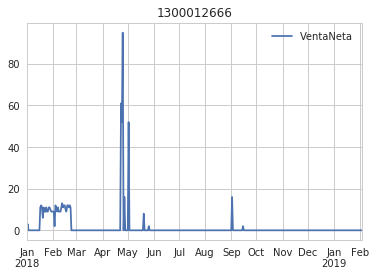

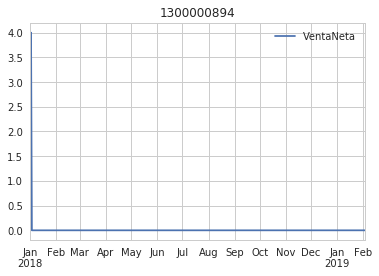

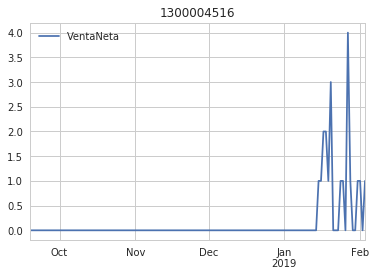

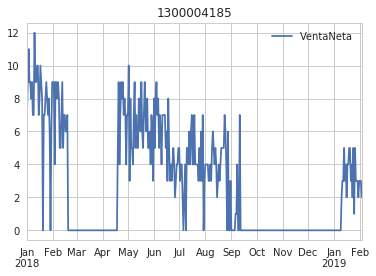

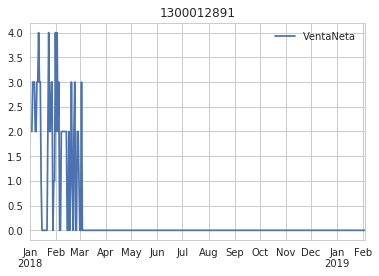

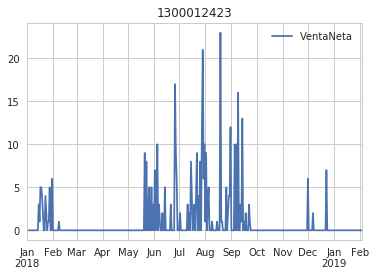

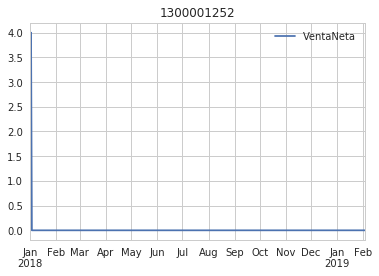

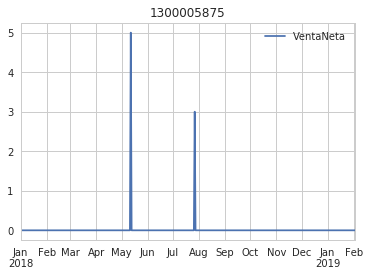

In [16]:
%%time
dicc_olivos = extractor_28_03.populate_data(1200000077)

Total canillas en agencia:  40
Canillas a trabajar:  37
Se detecto una relacion lineal :  2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-13    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-18    5
2018-12-25    0
2019-01-01    0
2019-01-08    0
2019-01-15    0
Name: VentaNeta, dtype: int64 num_day  1
Se detecto una relacion lineal :  2018-12-17    0
2018-12-24    0
2018-12-31    0
2019-01-07    0
2019-01-14    0
Name: VentaNeta, dtype: int64 num_day  0
Se detecto una relacion lineal :  2018-12-18    0
2018-12-25    0
2019-01-01    0
2019-01-08    0
2019-01-15    0
Name: VentaNeta, dtype: int64 num_day  1
Se detecto una relacion lineal :  2018-12-19    0
2018-12-26    0
2019-01-02    0
2019-01-09    0
2019-01-16    0
Name: VentaNeta, dtype: int64 num_day  2
Se detecto una relacion lineal :  2018-12-20    0
2018-12-27    0
2019-01-03    0
2019-01-10    0
2019-01-17    0
Name: VentaNeta, dtype: int64 num_day  3
Se detecto una

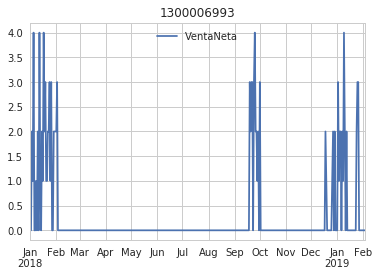

In [17]:
%%time
dicc_miraflores = extractor_28_03.populate_data(1200000044)

In [18]:
nulos = 0
for k, v in dicc_jesus_maria.items():
    for num_day, datus in v.items():
        nulos += datus.isnull().sum()
print(nulos)

0


In [19]:
nulos = 0
for k, v in dicc_callao.items():
    for num_day, datus in v.items():
        nulos += datus.isnull().sum()
print(nulos)

0


In [20]:
nulos = 0
for k, v in dicc_canto_grande.items():
    for num_day, datus in v.items():
        nulos += datus.isnull().sum()
print(nulos)

0


In [21]:
nulos = 0
for k, v in dicc_olivos.items():
    for num_day, datus in v.items():
        nulos += datus.isnull().sum()
print(nulos)

0


In [22]:
nulos = 0
for k, v in dicc_miraflores.items():
    for num_day, datus in v.items():
        nulos += datus.isnull().sum()
print(nulos)

0


In [23]:
%%time
dicc_jesus_maria = noise_control(dicc_jesus_maria)

Relacion Lineal :  1300005890 0 [0. 1. 1. 1. 1.] 1.0
()()  1300005890 0.97 = 3 ///  0.03 = 0
()()  1300005890 0.97 = 4 ///  0.03 = 0
()()  1300005890 0.97 = 3 ///  0.03 = 0
()()  1300005890 0.97 = 3 ///  0.03 = 0
()()  1300005890 0.97 = 2 ///  0.03 = 0
Relacion Lineal :  1300005890 6 [0 0 0 0 0] 0
()()  1300007428 0.97 = 6 ///  0.03 = 1
()()  1300007428 0.95 = 6 ///  0.05 = 3
()()  1300007428 0.95 = 7 ///  0.05 = 3
()()  1300007428 0.95 = 7 ///  0.05 = 1
()()  1300007428 0.95 = 6 ///  0.05 = 0
Relacion Lineal :  1300007428 5 [1 1 1 1 1] 1
Relacion Lineal :  1300007428 6 [1 1 1 1 1] 1
()()  1300005892 0.97 = 5 ///  0.03 = 0
()()  1300005892 0.95 = 5 ///  0.05 = 1
()()  1300005892 0.97 = 5 ///  0.03 = 0
()()  1300005892 0.97 = 4 ///  0.03 = 0
()()  1300005892 0.95 = 4 ///  0.05 = 0
()()  1300005892 0.97 = 2 ///  0.03 = 0
Relacion Lineal :  1300005892 6 [0 0 0 0 0] 0
()()  1300005897 0.97 = 4 ///  0.03 = 0
()()  1300005897 0.95 = 4 ///  0.05 = 0
()()  1300005897 0.97 = 5 ///  0.03 = 0
()(

()()  1300003441 0.9 = 9 ///  0.1 = 3
()()  1300003441 0.95 = 15 ///  0.05 = 7
()()  1300000882 0.95 = 16 ///  0.05 = 9
()()  1300000882 0.95 = 15 ///  0.05 = 7
()()  1300000882 0.9 = 14 ///  0.1 = 8
()()  1300000882 0.95 = 15 ///  0.05 = 8
()()  1300000882 0.95 = 16 ///  0.05 = 8
()()  1300000882 0.9 = 14 ///  0.1 = 7
()()  1300000882 0.95 = 20 ///  0.05 = 11
()()  1300003443 0.95 = 7 ///  0.05 = 0
()()  1300003443 0.95 = 7 ///  0.05 = 2
()()  1300003443 0.95 = 7 ///  0.05 = 2
()()  1300003443 0.95 = 6 ///  0.05 = 1
()()  1300003443 0.95 = 6 ///  0.05 = 1
()()  1300003443 0.9 = 5 ///  0.1 = 0
Relacion Lineal :  1300003443 6 [0 0 0 0 0] 0
()()  1300007035 0.95 = 21 ///  0.05 = 15
()()  1300007035 0.95 = 21 ///  0.05 = 16
()()  1300007035 0.95 = 22 ///  0.05 = 15
()()  1300007035 0.95 = 21 ///  0.05 = 15
()()  1300007035 0.97 = 22 ///  0.03 = 14
()()  1300007035 0.95 = 18 ///  0.05 = 12
()()  1300007035 0.95 = 21 ///  0.05 = 12
()()  1300012159 0.95 = 16 ///  0.05 = 10
()()  1300012159 

Relacion Lineal :  1300012785 2 [3 0 0 0 0] 0
Relacion Lineal :  1300012785 3 [0 0 0 0 0] 0
Relacion Lineal :  1300012785 4 [2 0 0 0 0] 0
Relacion Lineal :  1300012785 5 [0 0 0 0 0] 0
Relacion Lineal :  1300012785 6 [0 0 0 0 0] 0
Relacion Lineal :  1300013815 0 [0 0 0 0 0] 0
()()  1300013815 0.97 = 5 ///  0.03 = 1
()()  1300013815 0.95 = 6 ///  0.05 = 1
()()  1300013815 0.95 = 5 ///  0.05 = 0
()()  1300013815 0.95 = 5 ///  0.05 = 0
()()  1300013815 0.97 = 4 ///  0.03 = 0
()()  1300013815 0.97 = 6 ///  0.03 = 1
()()  1300013816 0.95 = 16 ///  0.05 = 9
()()  1300013816 0.95 = 18 ///  0.05 = 9
()()  1300013816 0.95 = 17 ///  0.05 = 10
()()  1300013816 0.9 = 17 ///  0.1 = 9
()()  1300013816 0.95 = 18 ///  0.05 = 10
()()  1300013816 0.9 = 15 ///  0.1 = 8
()()  1300013816 0.9 = 27 ///  0.1 = 17
()()  1300007673 0.95 = 12 ///  0.05 = 6
()()  1300007673 0.95 = 12 ///  0.05 = 7
()()  1300007673 0.95 = 12 ///  0.05 = 8
()()  1300007673 0.97 = 12 ///  0.03 = 8
()()  1300007673 0.97 = 11 ///  0.03

Relacion Lineal :  1300000581 6 [0 0 0 0 0] 0
()()  1300002119 0.9 = 20 ///  0.1 = 14
()()  1300002119 0.95 = 22 ///  0.05 = 13
()()  1300002119 0.9 = 23 ///  0.1 = 15
()()  1300002119 0.95 = 24 ///  0.05 = 14
()()  1300002119 0.9 = 22 ///  0.1 = 13
()()  1300002119 0.9 = 20 ///  0.1 = 12
()()  1300002119 0.9 = 16 ///  0.1 = 11
()()  1300004680 0.95 = 8 ///  0.05 = 2
()()  1300004680 0.95 = 7 ///  0.05 = 1
()()  1300004680 0.97 = 8 ///  0.03 = 2
()()  1300004680 0.95 = 8 ///  0.05 = 2
()()  1300004680 0.95 = 8 ///  0.05 = 2
()()  1300004680 0.95 = 9 ///  0.05 = 2
()()  1300004680 0.95 = 11 ///  0.05 = 4
()()  1300007753 0.95 = 12 ///  0.05 = 5
()()  1300007753 0.95 = 12 ///  0.05 = 5
()()  1300007753 0.95 = 11 ///  0.05 = 5
()()  1300007753 0.9 = 10 ///  0.1 = 6
()()  1300007753 0.95 = 13 ///  0.05 = 6
()()  1300007753 0.95 = 9 ///  0.05 = 3
()()  1300007753 0.9 = 23 ///  0.1 = 7
()()  1300000086 0.9 = 14 ///  0.1 = 8
()()  1300000086 0.95 = 14 ///  0.05 = 7
()()  1300000086 0.95 = 13 

()()  1300011401 0.97 = 4 ///  0.03 = 0
()()  1300011401 0.97 = 3 ///  0.03 = 0
()()  1300011401 0.95 = 4 ///  0.05 = 1
()()  1300011402 0.97 = 5 ///  0.03 = 1
()()  1300011402 0.97 = 5 ///  0.03 = 2
()()  1300011402 0.97 = 5 ///  0.03 = 2
()()  1300011402 0.97 = 4 ///  0.03 = 1
()()  1300011402 0.97 = 6 ///  0.03 = 1
()()  1300011402 0.97 = 4 ///  0.03 = 1
()()  1300011402 0.95 = 4 ///  0.05 = 1
()()  1300011403 0.9 = 16 ///  0.1 = 10
()()  1300011403 0.9 = 15 ///  0.1 = 8
()()  1300011403 0.95 = 17 ///  0.05 = 10
()()  1300011403 0.95 = 17 ///  0.05 = 9
()()  1300011403 0.95 = 17 ///  0.05 = 10
()()  1300011403 0.95 = 14 ///  0.05 = 7
()()  1300011403 0.95 = 18 ///  0.05 = 12
()()  1300002695 0.95 = 10 ///  0.05 = 0
()()  1300002695 0.95 = 9 ///  0.05 = 1
()()  1300002695 0.9 = 8 ///  0.1 = 1
()()  1300002695 0.95 = 9 ///  0.05 = 1
()()  1300002695 0.95 = 11 ///  0.05 = 0
()()  1300002695 0.95 = 10 ///  0.05 = 3
()()  1300002695 0.95 = 14 ///  0.05 = 7
()()  1300002696 0.97 = 5 ///  

In [24]:
dicc_callao = noise_control(dicc_callao)

()()  1300005395 0.97 = 5 ///  0.03 = 1
()()  1300005395 0.97 = 5 ///  0.03 = 0
()()  1300005395 0.97 = 5 ///  0.03 = 0
()()  1300005395 0.97 = 5 ///  0.03 = 0
()()  1300005395 0.97 = 6 ///  0.03 = 1
()()  1300005395 0.97 = 3 ///  0.03 = 0
()()  1300005395 0.97 = 4 ///  0.03 = 0
()()  1300003859 0.97 = 4 ///  0.03 = 0
()()  1300003859 0.97 = 4 ///  0.03 = 0
()()  1300003859 0.97 = 3 ///  0.03 = 0
()()  1300003859 0.97 = 4 ///  0.03 = 0
()()  1300003859 0.97 = 4 ///  0.03 = 0
()()  1300003859 0.95 = 4 ///  0.05 = 0
()()  1300003859 0.95 = 7 ///  0.05 = 2
()()  1300002841 0.97 = 6 ///  0.03 = 1
()()  1300002841 0.95 = 5 ///  0.05 = 0
()()  1300002841 0.95 = 6 ///  0.05 = 0
()()  1300002841 0.95 = 5 ///  0.05 = 0
()()  1300002841 0.95 = 5 ///  0.05 = 1
()()  1300002841 0.95 = 7 ///  0.05 = 1
()()  1300002841 0.95 = 6 ///  0.05 = 1
()()  1300005917 0.95 = 9 ///  0.05 = 3
()()  1300005917 0.95 = 8 ///  0.05 = 3
()()  1300005917 0.95 = 9 ///  0.05 = 3
()()  1300005917 0.95 = 8 ///  0.05 = 4


()()  1300001881 0.95 = 8 ///  0.05 = 2
()()  1300001881 0.95 = 7 ///  0.05 = 2
()()  1300001881 0.95 = 7 ///  0.05 = 0
()()  1300001881 0.95 = 8 ///  0.05 = 2
()()  1300001881 0.95 = 5 ///  0.05 = 1
()()  1300001881 0.95 = 10 ///  0.05 = 1
()()  1300001883 0.97 = 3 ///  0.03 = 0
()()  1300001883 0.97 = 4 ///  0.03 = 0
()()  1300001883 0.97 = 3 ///  0.03 = 0
()()  1300001883 0.97 = 3 ///  0.03 = 0
()()  1300001883 0.97 = 3 ///  0.03 = 0
()()  1300001883 0.97 = 3 ///  0.03 = 0
()()  1300001883 0.95 = 8 ///  0.05 = 2
()()  1300007005 0.97 = 4 ///  0.03 = 0
()()  1300007005 0.97 = 3 ///  0.03 = 0
()()  1300007005 0.97 = 3 ///  0.03 = 0
()()  1300007005 0.97 = 5 ///  0.03 = 0
()()  1300007005 0.97 = 4 ///  0.03 = 0
()()  1300007005 0.95 = 5 ///  0.05 = 0
()()  1300007005 0.97 = 10 ///  0.03 = 0
()()  1300007006 0.97 = 3 ///  0.03 = 0
()()  1300007006 0.97 = 3 ///  0.03 = 0
Relacion Lineal :  1300007006 2 [0 0 0 0 0] 0
()()  1300007006 0.97 = 3 ///  0.03 = 0
()()  1300007006 0.97 = 3 ///  0

()()  1300013182 0.95 = 11 ///  0.05 = 2
()()  1300013183 0.97 = 5 ///  0.03 = 1
()()  1300013183 0.97 = 4 ///  0.03 = 1
()()  1300013183 0.97 = 5 ///  0.03 = 1
()()  1300013183 0.97 = 5 ///  0.03 = 1
()()  1300013183 0.95 = 5 ///  0.05 = 1
()()  1300013183 0.97 = 5 ///  0.03 = 1
Relacion Lineal :  1300013183 6 [0 0 0 0 0] 0
()()  1300007563 0.95 = 6 ///  0.05 = 1
()()  1300007563 0.95 = 5 ///  0.05 = 1
()()  1300007563 0.97 = 5 ///  0.03 = 2
()()  1300007563 0.97 = 4 ///  0.03 = 1
()()  1300007563 0.97 = 5 ///  0.03 = 2
()()  1300007563 0.97 = 5 ///  0.03 = 1
()()  1300007563 0.97 = 10 ///  0.03 = 4
()()  1300007564 0.97 = 2 ///  0.03 = 0
()()  1300007564 0.97 = 3 ///  0.03 = 0
()()  1300007564 0.97 = 3 ///  0.03 = 0
()()  1300007564 0.97 = 2 ///  0.03 = 0
()()  1300007564 0.97 = 2 ///  0.03 = 0
()()  1300007564 0.97 = 3 ///  0.03 = 0
()()  1300007564 0.97 = 8 ///  0.03 = 0
()()  1300001426 0.97 = 4 ///  0.03 = 0
()()  1300001426 0.97 = 3 ///  0.03 = 0
()()  1300001426 0.97 = 3 ///  0

()()  1300000534 0.95 = 6 ///  0.05 = 3
()()  1300000024 0.97 = 5 ///  0.03 = 1
()()  1300000024 0.95 = 4 ///  0.05 = 1
()()  1300000024 0.97 = 4 ///  0.03 = 1
()()  1300000024 0.97 = 5 ///  0.03 = 1
()()  1300000024 0.97 = 4 ///  0.03 = 0
()()  1300000024 0.97 = 4 ///  0.03 = 0
()()  1300000024 0.97 = 5 ///  0.03 = 1
()()  1300002585 0.97 = 4 ///  0.03 = 0
()()  1300002585 0.97 = 4 ///  0.03 = 0
()()  1300002585 0.97 = 4 ///  0.03 = 0
()()  1300002585 0.97 = 4 ///  0.03 = 0
()()  1300002585 0.95 = 3 ///  0.05 = 0
()()  1300002585 0.97 = 5 ///  0.03 = 0
()()  1300002585 0.95 = 5 ///  0.05 = 0
()()  1300007715 0.97 = 5 ///  0.03 = 0
()()  1300007715 0.95 = 4 ///  0.05 = 0
()()  1300007715 0.97 = 5 ///  0.03 = 0
()()  1300007715 0.97 = 5 ///  0.03 = 1
()()  1300007715 0.95 = 4 ///  0.05 = 1
()()  1300007715 0.97 = 2 ///  0.03 = 0
Relacion Lineal :  1300007715 6 [0 0 0 0 0] 0
()()  1300001581 0.97 = 2 ///  0.03 = 0
()()  1300001581 0.97 = 2 ///  0.03 = 0
()()  1300001581 0.97 = 2 ///  0.0

()()  1300013474 0.97 = 5 ///  0.03 = 0
()()  1300013474 0.97 = 3 ///  0.03 = 0
()()  1300013474 0.95 = 6 ///  0.05 = 1
()()  1300007843 0.95 = 11 ///  0.05 = 4
()()  1300007843 0.95 = 11 ///  0.05 = 5
()()  1300007843 0.9 = 11 ///  0.1 = 6
()()  1300007843 0.95 = 11 ///  0.05 = 3
()()  1300007843 0.95 = 11 ///  0.05 = 3
()()  1300007843 0.95 = 9 ///  0.05 = 2
()()  1300007843 0.95 = 5 ///  0.05 = 2
()()  1300013482 0.9 = 24 ///  0.1 = 17
()()  1300013482 0.9 = 24 ///  0.1 = 17
()()  1300013482 0.9 = 25 ///  0.1 = 18
()()  1300013482 0.9 = 25 ///  0.1 = 18
()()  1300013482 0.9 = 26 ///  0.1 = 20
()()  1300013482 0.9 = 24 ///  0.1 = 16
()()  1300013482 0.95 = 30 ///  0.05 = 23
()()  1300007855 0.97 = 7 ///  0.03 = 1
()()  1300007855 0.95 = 7 ///  0.05 = 0
()()  1300007855 0.95 = 7 ///  0.05 = 0
()()  1300007855 0.97 = 7 ///  0.03 = 0
()()  1300007855 0.95 = 7 ///  0.05 = 1
()()  1300007855 0.95 = 9 ///  0.05 = 2
()()  1300007855 0.95 = 12 ///  0.05 = 6
()()  1300005298 0.97 = 8 ///  0.0

In [25]:
dicc_canto_grande = noise_control(dicc_canto_grande)

()()  1300000384 0.97 = 1 ///  0.03 = 0
()()  1300000384 0.97 = 1 ///  0.03 = 0
Relacion Lineal :  1300000384 2 [0 0 0 0 0] 0
Relacion Lineal :  1300000384 3 [0 0 0 0 0] 0
Relacion Lineal :  1300000384 4 [0 0 0 0 0] 0
Relacion Lineal :  1300000384 5 [0 0 0 0 0] 0
Relacion Lineal :  1300000384 6 [1. 1. 1. 1. 1.] 1.0
()()  1300003073 0.97 = 1 ///  0.03 = 0
()()  1300003073 0.97 = 1 ///  0.03 = 0
()()  1300003073 0.97 = 1 ///  0.03 = 0
()()  1300003073 0.97 = 1 ///  0.03 = 0
()()  1300003073 0.97 = 2 ///  0.03 = 0
()()  1300003073 0.97 = 1 ///  0.03 = 0
()()  1300003073 0.97 = 2 ///  0.03 = 0
Relacion Lineal :  1300013322 0 [0 1 1 1 1] 1
()()  1300013322 0.97 = 2 ///  0.03 = 0
Relacion Lineal :  1300013322 2 [1 0 0 0 0] 0
()()  1300013322 0.97 = 2 ///  0.03 = 0
()()  1300013322 0.97 = 3 ///  0.03 = 0
Relacion Lineal :  1300013322 5 [0 0 0 0 0] 0
()()  1300013322 0.97 = 3 ///  0.03 = 0
()()  1300013323 0.97 = 2 ///  0.03 = 0
Relacion Lineal :  1300013323 1 [0 0 0 0 0] 0
Relacion Lineal :  

()()  1300012232 0.97 = 2 ///  0.03 = 0
Relacion Lineal :  1300012232 3 [1. 1. 1. 1. 1.] 1.0
()()  1300012232 0.97 = 1 ///  0.03 = 0
()()  1300012232 0.97 = 1 ///  0.03 = 0
()()  1300012232 0.97 = 1 ///  0.03 = 0
Relacion Lineal :  1300012233 0 [0 1 1 1 1] 1
()()  1300012233 0.97 = 2 ///  0.03 = 0
()()  1300012233 0.97 = 2 ///  0.03 = 0
()()  1300012233 0.97 = 1 ///  0.03 = 0
()()  1300012233 0.97 = 2 ///  0.03 = 0
()()  1300012233 0.97 = 2 ///  0.03 = 0
()()  1300012233 0.97 = 3 ///  0.03 = 0
()()  1300006990 0.97 = 1 ///  0.03 = 0
()()  1300006990 0.97 = 1 ///  0.03 = 0
Relacion Lineal :  1300006990 2 [0 0 0 0 0] 0
()()  1300006990 0.97 = 1 ///  0.03 = 0
()()  1300006990 0.97 = 1 ///  0.03 = 0
()()  1300006990 0.97 = 1 ///  0.03 = 0
()()  1300006990 0.97 = 2 ///  0.03 = 0
()()  1300002384 0.97 = 1 ///  0.03 = 0
()()  1300002384 0.97 = 1 ///  0.03 = 0
()()  1300002384 0.97 = 1 ///  0.03 = 0
()()  1300002384 0.97 = 1 ///  0.03 = 0
Relacion Lineal :  1300002384 4 [0 0 0 0 0] 0
Relacion 

Relacion Lineal :  1300012013 2 [0 0 0 0 0] 0
Relacion Lineal :  1300012013 3 [0 0 0 0 0] 0
Relacion Lineal :  1300012013 4 [1 0 0 0 0] 0
Relacion Lineal :  1300012013 5 [0 0 0 0 0] 0
()()  1300012013 0.97 = 2 ///  0.03 = 0
Relacion Lineal :  1300011367 0 [0 0 0 0 0] 0
()()  1300011367 0.97 = 2 ///  0.03 = 0
()()  1300011367 0.97 = 2 ///  0.03 = 0
Relacion Lineal :  1300011367 3 [1 0 0 0 0] 0
()()  1300011367 0.97 = 2 ///  0.03 = 0
Relacion Lineal :  1300011367 5 [0 0 0 0 0] 0
()()  1300011367 0.97 = 2 ///  0.03 = 0
()()  1300002800 0.97 = 2 ///  0.03 = 0
Relacion Lineal :  1300002800 1 [0 0 0 0 0] 0
()()  1300002800 0.97 = 2 ///  0.03 = 0
Relacion Lineal :  1300002800 3 [0 0 0 0 0] 0
()()  1300002800 0.97 = 1 ///  0.03 = 0
()()  1300002800 0.97 = 2 ///  0.03 = 0
()()  1300002800 0.97 = 3 ///  0.03 = 0
()()  1300012407 0.97 = 4 ///  0.03 = 1
()()  1300012407 0.97 = 4 ///  0.03 = 1
()()  1300012407 0.97 = 4 ///  0.03 = 1
()()  1300012407 0.97 = 4 ///  0.03 = 1
()()  1300012407 0.97 = 4 

In [26]:
dicc_lince = noise_control(dicc_lince)

()()  1300001282 0.97 = 6 ///  0.03 = 0
Relacion Lineal :  1300001282 1 [1 0 0 0 0] 0
()()  1300001282 0.97 = 6 ///  0.03 = 0
()()  1300001282 0.97 = 5 ///  0.03 = 0
()()  1300001282 0.97 = 6 ///  0.03 = 0
()()  1300001282 0.95 = 6 ///  0.05 = 0
()()  1300001282 0.95 = 10 ///  0.05 = 2
()()  1300002821 0.9 = 22 ///  0.1 = 14
()()  1300002821 0.9 = 24 ///  0.1 = 11
()()  1300002821 0.9 = 22 ///  0.1 = 13
()()  1300002821 0.9 = 22 ///  0.1 = 13
()()  1300002821 0.9 = 25 ///  0.1 = 15
()()  1300002821 0.9 = 25 ///  0.1 = 12
()()  1300002821 0.9 = 40 ///  0.1 = 24
()()  1300005391 0.97 = 5 ///  0.03 = 0
()()  1300005391 0.97 = 4 ///  0.03 = 0
()()  1300005391 0.97 = 4 ///  0.03 = 0
()()  1300005391 0.97 = 4 ///  0.03 = 0
()()  1300005391 0.97 = 5 ///  0.03 = 0
()()  1300005391 0.97 = 4 ///  0.03 = 0
()()  1300005391 0.97 = 5 ///  0.03 = 0
()()  1300004879 0.95 = 13 ///  0.05 = 4
()()  1300004879 0.97 = 11 ///  0.03 = 5
()()  1300004879 0.95 = 12 ///  0.05 = 5
()()  1300004879 0.95 = 11 ///

()()  1300004512 0.95 = 10 ///  0.05 = 3
()()  1300004512 0.97 = 10 ///  0.03 = 3
()()  1300004512 0.95 = 10 ///  0.05 = 3
Relacion Lineal :  1300004512 6 [0 0 0 0 0] 0
()()  1300004514 0.95 = 14 ///  0.05 = 7
()()  1300004514 0.97 = 14 ///  0.03 = 8
()()  1300004514 0.95 = 13 ///  0.05 = 7
()()  1300004514 0.95 = 14 ///  0.05 = 6
()()  1300004514 0.95 = 14 ///  0.05 = 6
()()  1300004514 0.95 = 10 ///  0.05 = 0
()()  1300004514 0.9 = 12 ///  0.1 = 6
()()  1300006051 0.95 = 16 ///  0.05 = 7
()()  1300006051 0.9 = 15 ///  0.1 = 8
()()  1300006051 0.95 = 17 ///  0.05 = 9
()()  1300006051 0.95 = 15 ///  0.05 = 8
()()  1300006051 0.9 = 18 ///  0.1 = 10
()()  1300006051 0.9 = 18 ///  0.1 = 11
()()  1300006051 0.9 = 30 ///  0.1 = 21
()()  1300004515 0.95 = 5 ///  0.05 = 1
()()  1300004515 0.97 = 5 ///  0.03 = 1
()()  1300004515 0.97 = 5 ///  0.03 = 1
()()  1300004515 0.97 = 5 ///  0.03 = 1
()()  1300004515 0.95 = 5 ///  0.05 = 1
()()  1300004515 0.97 = 5 ///  0.03 = 1
()()  1300004515 0.95 = 

()()  1300002079 0.97 = 4 ///  0.03 = 0
()()  1300002079 0.95 = 4 ///  0.05 = 0
()()  1300002079 0.95 = 3 ///  0.05 = 0
()()  1300002079 0.95 = 4 ///  0.05 = 0
()()  1300002079 0.97 = 4 ///  0.03 = 0
()()  1300002079 0.97 = 4 ///  0.03 = 0
()()  1300002079 0.95 = 5 ///  0.05 = 1
()()  1300005153 0.9 = 12 ///  0.1 = 7
()()  1300005153 0.9 = 12 ///  0.1 = 7
()()  1300005153 0.97 = 12 ///  0.03 = 7
()()  1300005153 0.95 = 12 ///  0.05 = 7
()()  1300005153 0.95 = 12 ///  0.05 = 8
()()  1300005153 0.9 = 9 ///  0.1 = 6
()()  1300005153 0.95 = 15 ///  0.05 = 6
()()  1300006183 0.95 = 10 ///  0.05 = 5
()()  1300006183 0.95 = 10 ///  0.05 = 3
()()  1300006183 0.95 = 10 ///  0.05 = 4
()()  1300006183 0.97 = 10 ///  0.03 = 5
()()  1300006183 0.97 = 11 ///  0.03 = 6
()()  1300006183 0.95 = 10 ///  0.05 = 5
()()  1300006183 0.95 = 14 ///  0.05 = 7
()()  1300005672 0.9 = 10 ///  0.1 = 7
()()  1300005672 0.97 = 11 ///  0.03 = 6
()()  1300005672 0.95 = 9 ///  0.05 = 6
()()  1300005672 0.9 = 10 ///  0.

()()  1300012961 0.95 = 8 ///  0.05 = 1
()()  1300012962 0.97 = 4 ///  0.03 = 0
()()  1300012962 0.97 = 5 ///  0.03 = 0
()()  1300012962 0.97 = 5 ///  0.03 = 1
()()  1300012962 0.95 = 5 ///  0.05 = 1
()()  1300012962 0.97 = 5 ///  0.03 = 1
()()  1300012962 0.97 = 2 ///  0.03 = 0
()()  1300012962 0.97 = 0 ///  0.03 = 0
()()  1300012963 0.97 = 10 ///  0.03 = 5
()()  1300012963 0.97 = 10 ///  0.03 = 4
()()  1300012963 0.97 = 10 ///  0.03 = 4
()()  1300012963 0.95 = 10 ///  0.05 = 3
()()  1300012963 0.97 = 10 ///  0.03 = 5
()()  1300012963 0.95 = 8 ///  0.05 = 1
Relacion Lineal :  1300012963 6 [0 0 0 0 0] 0
()()  1300012964 0.97 = 5 ///  0.03 = 1
()()  1300012964 0.97 = 5 ///  0.03 = 1
()()  1300012964 0.95 = 5 ///  0.05 = 1
()()  1300012964 0.97 = 5 ///  0.03 = 1
()()  1300012964 0.97 = 5 ///  0.03 = 0
()()  1300012964 0.97 = 5 ///  0.03 = 1
Relacion Lineal :  1300012964 6 [0 0 0 0 0] 0
()()  1300012965 0.95 = 5 ///  0.05 = 2
()()  1300012965 0.95 = 6 ///  0.05 = 2
()()  1300012965 0.97 =

()()  1300000212 0.95 = 12 ///  0.05 = 7
()()  1300000212 0.95 = 12 ///  0.05 = 5
()()  1300000212 0.9 = 11 ///  0.1 = 8
()()  1300000212 0.95 = 10 ///  0.05 = 5
Relacion Lineal :  1300000212 6 [0 0 0 0 0] 0
()()  1300011481 0.9 = 5 ///  0.1 = 0
()()  1300011481 0.9 = 5 ///  0.1 = 0
()()  1300011481 0.9 = 5 ///  0.1 = 0
()()  1300011481 0.9 = 5 ///  0.1 = 0
Relacion Lineal :  1300011481 4 [3 0 0 0 0] 0
()()  1300011481 0.95 = 7 ///  0.05 = 0
()()  1300011481 0.9 = 7 ///  0.1 = 0
()()  1300007390 0.95 = 5 ///  0.05 = 1
()()  1300007390 0.97 = 4 ///  0.03 = 1
()()  1300007390 0.97 = 4 ///  0.03 = 1
()()  1300007390 0.97 = 5 ///  0.03 = 1
()()  1300007390 0.95 = 5 ///  0.05 = 1
()()  1300007390 0.97 = 5 ///  0.03 = 0
Relacion Lineal :  1300007390 6 [0 0 0 0 0] 0
()()  1300005863 0.95 = 11 ///  0.05 = 8
()()  1300005863 0.95 = 10 ///  0.05 = 6
()()  1300005863 0.97 = 10 ///  0.03 = 7
()()  1300005863 0.97 = 10 ///  0.03 = 6
()()  1300005863 0.95 = 11 ///  0.05 = 7
()()  1300005863 0.95 = 1

In [27]:
dicc_olivos = noise_control(dicc_olivos)

()()  1300004353 0.97 = 2 ///  0.03 = 0
()()  1300004353 0.97 = 2 ///  0.03 = 0
()()  1300004353 0.97 = 2 ///  0.03 = 0
()()  1300004353 0.97 = 2 ///  0.03 = 0
()()  1300004353 0.97 = 3 ///  0.03 = 0
()()  1300004353 0.97 = 2 ///  0.03 = 0
()()  1300004353 0.95 = 5 ///  0.05 = 1
()()  1300000792 0.95 = 6 ///  0.05 = 2
()()  1300000792 0.97 = 6 ///  0.03 = 2
()()  1300000792 0.97 = 5 ///  0.03 = 2
()()  1300000792 0.97 = 6 ///  0.03 = 3
()()  1300000792 0.97 = 6 ///  0.03 = 2
()()  1300000792 0.97 = 6 ///  0.03 = 2
()()  1300000792 0.95 = 12 ///  0.05 = 6
()()  1300000793 0.95 = 6 ///  0.05 = 2
()()  1300000793 0.97 = 6 ///  0.03 = 2
()()  1300000793 0.97 = 6 ///  0.03 = 2
()()  1300000793 0.97 = 6 ///  0.03 = 3
()()  1300000793 0.95 = 6 ///  0.05 = 3
()()  1300000793 0.97 = 5 ///  0.03 = 2
()()  1300000793 0.95 = 11 ///  0.05 = 7
()()  1300000299 0.95 = 9 ///  0.05 = 3
()()  1300000299 0.9 = 8 ///  0.1 = 5
()()  1300000299 0.95 = 9 ///  0.05 = 1
()()  1300000299 0.95 = 8 ///  0.05 = 3


()()  1300003558 0.97 = 7 ///  0.03 = 4
()()  1300003558 0.95 = 8 ///  0.05 = 4
()()  1300003558 0.97 = 6 ///  0.03 = 4
()()  1300003558 0.95 = 9 ///  0.05 = 5
()()  1300005097 0.95 = 11 ///  0.05 = 5
()()  1300005097 0.95 = 11 ///  0.05 = 6
()()  1300005097 0.97 = 11 ///  0.03 = 5
()()  1300005097 0.95 = 12 ///  0.05 = 5
()()  1300005097 0.95 = 13 ///  0.05 = 6
()()  1300005097 0.95 = 11 ///  0.05 = 5
()()  1300005097 0.95 = 16 ///  0.05 = 10
()()  1300003562 0.97 = 7 ///  0.03 = 4
()()  1300003562 0.95 = 8 ///  0.05 = 4
()()  1300003562 0.97 = 8 ///  0.03 = 4
()()  1300003562 0.97 = 8 ///  0.03 = 4
()()  1300003562 0.95 = 10 ///  0.05 = 4
()()  1300003562 0.97 = 7 ///  0.03 = 3
()()  1300003562 0.97 = 9 ///  0.03 = 6
()()  1300005099 0.97 = 3 ///  0.03 = 0
Relacion Lineal :  1300005099 1 [1. 1. 1. 1. 1.] 1.0
()()  1300005099 0.97 = 3 ///  0.03 = 0
()()  1300005099 0.97 = 3 ///  0.03 = 0
()()  1300005099 0.97 = 3 ///  0.03 = 0
()()  1300005099 0.97 = 3 ///  0.03 = 0
()()  1300005099 0

()()  1300007278 0.97 = 3 ///  0.03 = 0
()()  1300007278 0.97 = 3 ///  0.03 = 0
()()  1300007278 0.97 = 3 ///  0.03 = 0
()()  1300007278 0.97 = 3 ///  0.03 = 0
()()  1300007278 0.97 = 3 ///  0.03 = 0
()()  1300007278 0.97 = 2 ///  0.03 = 0
Relacion Lineal :  1300007278 6 [1 1 1 1 1] 1
()()  1300007279 0.97 = 3 ///  0.03 = 1
()()  1300007279 0.97 = 3 ///  0.03 = 1
()()  1300007279 0.97 = 3 ///  0.03 = 1
()()  1300007279 0.97 = 3 ///  0.03 = 0
()()  1300007279 0.97 = 3 ///  0.03 = 0
()()  1300007279 0.97 = 2 ///  0.03 = 0
()()  1300007279 0.97 = 2 ///  0.03 = 0
()()  1300002684 0.95 = 9 ///  0.05 = 4
()()  1300002684 0.95 = 8 ///  0.05 = 6
()()  1300002684 0.97 = 8 ///  0.03 = 5
()()  1300002684 0.95 = 9 ///  0.05 = 5
()()  1300002684 0.97 = 9 ///  0.03 = 5
()()  1300002684 0.97 = 10 ///  0.03 = 7
()()  1300002684 0.95 = 14 ///  0.05 = 9
()()  1300002685 0.95 = 6 ///  0.05 = 1
()()  1300002685 0.95 = 6 ///  0.05 = 1
()()  1300002685 0.95 = 6 ///  0.05 = 2
()()  1300002685 0.97 = 6 ///  0

In [28]:
dicc_miraflores = noise_control(dicc_miraflores)

()()  1300000001 0.95 = 7 ///  0.05 = 3
()()  1300000001 0.95 = 7 ///  0.05 = 3
()()  1300000001 0.97 = 7 ///  0.03 = 3
()()  1300000001 0.97 = 6 ///  0.03 = 3
()()  1300000001 0.97 = 7 ///  0.03 = 3
()()  1300000001 0.97 = 8 ///  0.03 = 4
()()  1300000001 0.95 = 7 ///  0.05 = 3
()()  1300003208 0.95 = 14 ///  0.05 = 7
()()  1300003208 0.95 = 13 ///  0.05 = 7
()()  1300003208 0.9 = 12 ///  0.1 = 7
()()  1300003208 0.95 = 12 ///  0.05 = 5
()()  1300003208 0.9 = 11 ///  0.1 = 7
()()  1300003208 0.9 = 9 ///  0.1 = 3
Relacion Lineal :  1300003208 6 [0 0 0 0 0] 0
()()  1300012436 0.95 = 6 ///  0.05 = 2
Relacion Lineal :  1300012436 1 [5 0 0 0 0] 0
()()  1300012436 0.97 = 6 ///  0.03 = 1
()()  1300012436 0.95 = 6 ///  0.05 = 1
()()  1300012436 0.95 = 5 ///  0.05 = 1
()()  1300012436 0.97 = 6 ///  0.03 = 0
()()  1300012436 0.97 = 4 ///  0.03 = 0
()()  1300000023 0.95 = 15 ///  0.05 = 9
()()  1300000023 0.97 = 14 ///  0.03 = 10
()()  1300000023 0.95 = 15 ///  0.05 = 10
()()  1300000023 0.9 = 1

()()  1300001002 0.97 = 6 ///  0.03 = 3
()()  1300001002 0.95 = 8 ///  0.05 = 2
()()  1300007275 0.9 = 27 ///  0.1 = 19
()()  1300007275 0.95 = 29 ///  0.05 = 19
()()  1300007275 0.9 = 29 ///  0.1 = 21
()()  1300007275 0.95 = 29 ///  0.05 = 18
()()  1300007275 0.9 = 28 ///  0.1 = 20
()()  1300007275 0.9 = 23 ///  0.1 = 14
()()  1300007275 0.9 = 26 ///  0.1 = 19
()()  1300004335 0.95 = 4 ///  0.05 = 0
()()  1300004335 0.97 = 5 ///  0.03 = 0
()()  1300004335 0.97 = 5 ///  0.03 = 0
()()  1300004335 0.97 = 6 ///  0.03 = 0
()()  1300004335 0.97 = 4 ///  0.03 = 0
()()  1300004335 0.95 = 5 ///  0.05 = 0
()()  1300004335 0.9 = 3 ///  0.1 = 0
()()  1300002288 0.9 = 14 ///  0.1 = 4
()()  1300002288 0.9 = 13 ///  0.1 = 4
()()  1300002288 0.95 = 13 ///  0.05 = 5
()()  1300002288 0.9 = 13 ///  0.1 = 5
()()  1300002288 0.95 = 15 ///  0.05 = 6
()()  1300002288 0.95 = 12 ///  0.05 = 0
()()  1300002288 0.9 = 10 ///  0.1 = 5
()()  1300002290 0.95 = 9 ///  0.05 = 2
()()  1300002290 0.95 = 9 ///  0.05 = 2

# MODELO

In [29]:
%%time
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

def modeling(dicc_data):
    dicc_result = {}
    for k, v in dicc_data.items():
        dicc_result[k] = {}
        for num_day, datus in v.items():
            datus = datus.apply(lambda val: 0.1 if val <= 0 else val)
            if datus[-4:].mean() == datus[-1] and datus[-4:].mean() == datus[-2] and datus[-4:].mean() < 2:
                print("////P lineal :", k, num_day, datus[-5:].values, datus[-1])
                dicc_result[k][num_day] = datus[-1]
            else:
                try:                   
                    model = SimpleExpSmoothing(datus).fit(optimized=True)
                    val = model.forecast(1)
                    print("Simple Exponencial : ",  k, num_day, datus[-5:].values, val)
                    dicc_result[k][num_day] = val
                except Exception as e:
                    print("ERROR : ", str(e))
                    print("====P media 4 last", k, num_day, datus[-5:].values, datus[-4:].mean())
                    dicc_result[k][num_day] = datus[-4:].mean() * datus.values[-1]/datus.values[-4]
    return dicc_result

CPU times: user 27.6 ms, sys: 3.94 ms, total: 31.5 ms
Wall time: 28.6 ms


In [30]:
dicc_result_jesus_maria = modeling(dicc_jesus_maria)

////P lineal : 1300005890 0 [0.1 1.  1.  1.  1. ] 1.0
Simple Exponencial :  1300005890 1 [1. 1. 1. 1. 2.] 53    1.119857
dtype: float64
Simple Exponencial :  1300005890 2 [2. 2. 2. 1. 1.] 53    1.745283
dtype: float64
Simple Exponencial :  1300005890 3 [3. 2. 2. 2. 3.] 2019-01-24    1.681818
Freq: W-THU, dtype: float64
Simple Exponencial :  1300005890 4 [3. 1. 2. 2. 2.] 2019-01-25    1.229091
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300005890 5 [0.1 0.1 0.1 2.  0.1] 2019-01-26    0.6
Freq: W-SAT, dtype: float64
////P lineal : 1300005890 6 [0.1 0.1 0.1 0.1 0.1] 0.1
Simple Exponencial :  1300007428 0 [4 4 1 5 3] 53    3.981132
dtype: float64
Simple Exponencial :  1300007428 1 [4. 5. 4. 4. 3.] 53    3.568083
dtype: float64
Simple Exponencial :  1300007428 2 [4 4 4 5 4] 53    4.275017
dtype: float64
Simple Exponencial :  1300007428 3 [4 4 4 4 2] 2019-01-24    3.626362
Freq: W-THU, dtype: float64
Simple Exponencial :  1300007428 4 [4. 4. 4. 4. 3.] 2019-01-25    3.86
Freq: W-FRI, d

Simple Exponencial :  1300005440 5 [ 7 10  8  8  7] 2019-01-26    7.714538
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300005440 6 [10  8  9  8  9] 54    9.481366
dtype: float64
Simple Exponencial :  1300001345 0 [7.  8.  0.1 0.1 1. ] 53    1.32875
dtype: float64
Simple Exponencial :  1300001345 1 [7. 8. 5. 5. 4.] 53    4.425205
dtype: float64
Simple Exponencial :  1300001345 2 [5. 4. 6. 5. 5.] 53    5.049931
dtype: float64
Simple Exponencial :  1300001345 3 [7. 6. 4. 4. 5.] 2019-01-24    4.811394
Freq: W-THU, dtype: float64
Simple Exponencial :  1300001345 4 [4. 6. 4. 3. 3.] 2019-01-25    3.694023
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300001345 5 [0.1 0.1 0.1 3.  5. ] 2019-01-26    3.413072
Freq: W-SAT, dtype: float64
////P lineal : 1300001345 6 [0.1 0.1 0.1 0.1 0.1] 0.1
Simple Exponencial :  1300001347 0 [0.1 0.1 1.  1.  1. ] 53    1.562264
dtype: float64
Simple Exponencial :  1300001347 1 [0.1 0.1 1.  1.  3. ] 53    1.362264
dtype: float64
Simple Exponencial :  1

Simple Exponencial :  1300007525 1 [ 9. 11. 10. 11. 12.] 53    11.54717
dtype: float64
Simple Exponencial :  1300007525 2 [13 12 12  8  8] 53    12.0
dtype: float64
Simple Exponencial :  1300007525 3 [10 14 15 10 14] 2019-01-24    12.483
Freq: W-THU, dtype: float64
Simple Exponencial :  1300007525 4 [13 12 14 11 13] 2019-01-25    12.653869
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300007525 5 [12 13 13 12 12] 2019-01-26    12.341183
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300007525 6 [10 13 13 12 14] 54    12.740741
dtype: float64
Simple Exponencial :  1300003441 0 [8. 9. 5. 6. 6.] 53    6.113208
dtype: float64
Simple Exponencial :  1300003441 1 [6. 6. 6. 6. 6.] 53    6.603774
dtype: float64
Simple Exponencial :  1300003441 2 [3. 4. 4. 4. 4.] 53    4.962264
dtype: float64
Simple Exponencial :  1300003441 3 [5. 4. 5. 5. 5.] 2019-01-24    4.934253
Freq: W-THU, dtype: float64
Simple Exponencial :  1300003441 4 [4. 3. 5. 5. 5.] 2019-01-25    5.380215
Freq: W-FRI, dtype:

Simple Exponencial :  1300005539 0 [8 6 6 6 8] 53    7.18109
dtype: float64
Simple Exponencial :  1300005539 1 [ 8.  9.  7. 11.  7.] 53    8.504873
dtype: float64
Simple Exponencial :  1300005539 2 [ 9 10  9 11  8] 53    9.319878
dtype: float64
Simple Exponencial :  1300005539 3 [10  7  9  9 10] 2019-01-24    8.787241
Freq: W-THU, dtype: float64
Simple Exponencial :  1300005539 4 [7. 8. 7. 7. 5.] 2019-01-25    6.740937
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300005539 5 [ 8 10  8  7  9] 2019-01-26    8.478331
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300005539 6 [17 14 11 17 15] 54    14.759259
dtype: float64
Simple Exponencial :  1300001969 0 [16 19 19 19 19] 53    18.860477
dtype: float64
Simple Exponencial :  1300001969 1 [ 9 13 10 13 13] 53    11.301887
dtype: float64
Simple Exponencial :  1300001969 2 [17. 17. 17. 17. 17.] 53    16.897713
dtype: float64
Simple Exponencial :  1300001969 3 [15 15 15 15 15] 2019-01-24    13.79204
Freq: W-THU, dtype: float64
Simple

Simple Exponencial :  1300012779 1 [3. 3. 2. 2. 1.] 53    2.415094
dtype: float64
Simple Exponencial :  1300012779 2 [3 3 4 1 2] 53    2.188679
dtype: float64
Simple Exponencial :  1300012779 3 [3. 3. 2. 1. 2.] 2019-01-24    1.787273
Freq: W-THU, dtype: float64
Simple Exponencial :  1300012779 4 [1. 4. 1. 2. 2.] 2019-01-25    1.654545
Freq: W-FRI, dtype: float64
////P lineal : 1300012779 5 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300012779 6 [0.1 0.1 0.1 0.1 0.1] 0.1
Simple Exponencial :  1300012780 0 [1.  1.  1.  0.1 0.1] 53    0.522188
dtype: float64
Simple Exponencial :  1300012780 1 [10.  6.  6. 10.  8.] 53    8.139941
dtype: float64
Simple Exponencial :  1300012780 2 [10  9 12  8  7] 53    9.679527
dtype: float64
Simple Exponencial :  1300012780 3 [10 12 14 13  8] 2019-01-24    10.836364
Freq: W-THU, dtype: float64
Simple Exponencial :  1300012780 4 [15  7 13 10  9] 2019-01-25    10.699652
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300012780 5 [15. 10. 12. 10. 11.] 2019-0

Simple Exponencial :  1300013814 2 [22 23 21 18 20] 53    19.856788
dtype: float64
Simple Exponencial :  1300013814 3 [23 26 20 23 20] 2019-01-24    20.846523
Freq: W-THU, dtype: float64
Simple Exponencial :  1300013814 4 [23 19 21 20 22] 2019-01-25    21.34425
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300013814 5 [28 21 25 18 17] 2019-01-26    19.048661
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300013814 6 [24 25 24 24 24] 54    24.042705
dtype: float64
////P lineal : 1300001534 0 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300001534 1 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300001534 2 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300001534 3 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300001534 4 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300001534 5 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300001534 6 [0.1 0.1 0.1 0.1 0.1] 0.1
Simple Exponencial :  1300004097 0 [11. 12.  5.  5. 10.] 53    8.867925
dtype: float64
Simple Exponencial :  1300004097 1 [10. 12.  6.  6. 10.] 5

Simple Exponencial :  1300012844 1 [1.  1.  2.  5.  0.1] 53    1.40566
dtype: float64
Simple Exponencial :  1300012844 2 [1.  0.1 0.1 1.  1. ] 53    0.803979
dtype: float64
Simple Exponencial :  1300012844 3 [1.  2.  1.  0.1 0.1] 2019-01-24    1.16
Freq: W-THU, dtype: float64
Simple Exponencial :  1300012844 4 [0.1 0.1 1.  0.1 0.1] 2019-01-25    0.418359
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300012844 5 [3.  5.  5.  0.1 1. ] 2019-01-26    2.091465
Freq: W-SAT, dtype: float64
////P lineal : 1300012844 6 [0.1 0.1 0.1 0.1 0.1] 0.1
Simple Exponencial :  1300007220 0 [14 13 13 13 13] 53    13.307269
dtype: float64
Simple Exponencial :  1300007220 1 [10 10 10 10 14] 53    11.584164
dtype: float64
Simple Exponencial :  1300007220 2 [10 12 15 12 10] 53    11.216079
dtype: float64
Simple Exponencial :  1300007220 3 [11 11 15 13 14] 2019-01-24    13.222449
Freq: W-THU, dtype: float64
Simple Exponencial :  1300007220 4 [12 12 11 15 15] 2019-01-25    13.366192
Freq: W-FRI, dtype: floa

Simple Exponencial :  1300000602 3 [5. 5. 6. 5. 7.] 2019-01-24    6.062653
Freq: W-THU, dtype: float64
Simple Exponencial :  1300000602 4 [8. 9. 8. 8. 6.] 2019-01-25    7.814368
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300000602 5 [7. 8. 6. 9. 8.] 2019-01-26    7.884105
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300000602 6 [12. 11. 12. 14. 11.] 54    13.981481
dtype: float64
Simple Exponencial :  1300003168 0 [11  7  5  8  7] 53    7.452024
dtype: float64
Simple Exponencial :  1300003168 1 [ 8  8 12 15  8] 53    10.038683
dtype: float64
Simple Exponencial :  1300003168 2 [ 8 12 12 12  7] 53    9.852475
dtype: float64
Simple Exponencial :  1300003168 3 [ 8  8  8 12  5] 2019-01-24    7.945352
Freq: W-THU, dtype: float64
Simple Exponencial :  1300003168 4 [ 7  9 12 12  9] 2019-01-25    9.915819
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300003168 5 [ 6  8 10 10  8] 2019-01-26    7.981818
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300003168 6 [10 10 11 12

Simple Exponencial :  1300006778 1 [ 7.  8. 11. 11.  5.] 53    7.823361
dtype: float64
Simple Exponencial :  1300006778 2 [10.  6.  6.  4.  4.] 53    7.050747
dtype: float64
Simple Exponencial :  1300006778 3 [6. 9. 7. 8. 6.] 2019-01-24    7.804521
Freq: W-THU, dtype: float64
Simple Exponencial :  1300006778 4 [ 8. 10. 10. 11.  8.] 2019-01-25    9.303371
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300006778 5 [7 5 7 7 5] 2019-01-26    6.35219
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300006778 6 [7. 6. 5. 6. 6.] 54    6.213763
dtype: float64
Simple Exponencial :  1300001146 0 [10.  6.  5.  8.  8.] 53    7.686497
dtype: float64
Simple Exponencial :  1300001146 1 [5. 5. 8. 7. 8.] 53    7.123985
dtype: float64
Simple Exponencial :  1300001146 2 [6. 7. 9. 8. 7.] 53    7.434952
dtype: float64
Simple Exponencial :  1300001146 3 [6 6 9 7 7] 2019-01-24    7.580155
Freq: W-THU, dtype: float64
Simple Exponencial :  1300001146 4 [8. 8. 9. 5. 5.] 2019-01-25    6.286307
Freq: W-FRI,

Simple Exponencial :  1300005785 3 [11 10 12  8  9] 2019-01-24    9.818182
Freq: W-THU, dtype: float64
Simple Exponencial :  1300005785 4 [12 12 10 11 10] 2019-01-25    10.145455
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300005785 5 [ 7  6 10  9  7] 2019-01-26    7.489274
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300005785 6 [12 14 13 12 12] 54    12.423661
dtype: float64
Simple Exponencial :  1300002714 0 [11.  8. 10.  9. 11.] 53    9.509434
dtype: float64
Simple Exponencial :  1300002714 1 [ 9. 11. 11. 11. 11.] 53    9.715886
dtype: float64
Simple Exponencial :  1300002714 2 [ 8. 11. 11. 10.  9.] 53    8.584906
dtype: float64
Simple Exponencial :  1300002714 3 [ 7.  8. 10.  7. 10.] 2019-01-24    8.854545
Freq: W-THU, dtype: float64
Simple Exponencial :  1300002714 4 [ 7 11  8  8 10] 2019-01-25    9.272727
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300002714 5 [10  8  7  9  9] 2019-01-26    8.791401
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300002714

Simple Exponencial :  1300002274 2 [12 10 13 13  9] 53    11.846737
dtype: float64
Simple Exponencial :  1300002274 3 [10 13  9 12 12] 2019-01-24    12.327273
Freq: W-THU, dtype: float64
Simple Exponencial :  1300002274 4 [12 14 10 13 13] 2019-01-25    12.490909
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300002274 5 [13 10 12 14 14] 2019-01-26    13.68833
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300002274 6 [17 16 17 15 11] 54    14.185946
dtype: float64
Simple Exponencial :  1300002276 0 [13  8  6  8  7] 53    7.944737
dtype: float64
Simple Exponencial :  1300002276 1 [10.  8.  9.  9.  5.] 53    7.66194
dtype: float64
Simple Exponencial :  1300002276 2 [7 5 9 5 7] 53    6.960916
dtype: float64
Simple Exponencial :  1300002276 3 [10  7  6  6  8] 2019-01-24    8.285222
Freq: W-THU, dtype: float64
Simple Exponencial :  1300002276 4 [8 9 7 7 7] 2019-01-25    9.872727
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300002276 5 [8 6 7 6 6] 2019-01-26    6.809636
Freq: W

In [31]:
dicc_result_callao = modeling(dicc_callao)

Simple Exponencial :  1300005395 0 [2 2 3 2 2] 2019-01-21    2.227523
Freq: W-MON, dtype: float64
Simple Exponencial :  1300005395 1 [0.1 3.  0.1 0.1 1. ] 2019-01-22    0.905306
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300005395 2 [2.  2.  1.  0.1 1. ] 2019-01-23    0.995802
Freq: W-WED, dtype: float64
Simple Exponencial :  1300005395 3 [2. 2. 1. 1. 2.] 2019-01-24    1.604979
Freq: W-THU, dtype: float64
Simple Exponencial :  1300005395 4 [2 2 2 3 3] 2019-01-25    2.546096
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300005395 5 [2. 2. 2. 3. 2.] 2019-01-26    1.838703
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300005395 6 [2. 3. 2. 2. 2.] 2019-01-27    2.004808
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300003859 0 [1.  0.1 2.  1.  0.1] 2019-01-21    1.878182
Freq: W-MON, dtype: float64
Simple Exponencial :  1300003859 1 [1. 4. 2. 1. 1.] 2019-01-22    1.949091
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300003859 2 [1. 2. 2. 1. 1.] 2019-01-23    1.

Simple Exponencial :  1300005422 6 [4 4 5 4 4] 2019-01-27    4.172499
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300002353 0 [3 1 4 2 3] 2019-01-21    2.781818
Freq: W-MON, dtype: float64
Simple Exponencial :  1300002353 1 [3. 1. 1. 1. 2.] 2019-01-22    1.732727
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300002353 2 [4. 3. 4. 1. 3.] 2019-01-23    2.225455
Freq: W-WED, dtype: float64
Simple Exponencial :  1300002353 3 [3.  3.  0.1 2.  2. ] 2019-01-24    2.114545
Freq: W-THU, dtype: float64
Simple Exponencial :  1300002353 4 [2. 4. 2. 3. 2.] 2019-01-25    2.389091
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300002353 5 [2. 3. 3. 3. 2.] 2019-01-26    2.345455
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300002353 6 [4. 6. 5. 4. 4.] 2019-01-27    4.446152
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300003382 0 [1. 3. 1. 1. 2.] 2019-01-21    1.602123
Freq: W-MON, dtype: float64
Simple Exponencial :  1300003382 1 [0.1 1.  1.  1.  2. ] 2019-01-22    1.10503

Simple Exponencial :  1300011598 1 [3. 4. 6. 3. 3.] 2019-01-22    4.005455
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300011598 2 [2 4 3 1 1] 2019-01-23    2.659657
Freq: W-WED, dtype: float64
Simple Exponencial :  1300011598 3 [5 3 3 5 5] 2019-01-24    4.127273
Freq: W-THU, dtype: float64
Simple Exponencial :  1300011598 4 [2. 3. 4. 5. 5.] 2019-01-25    3.567244
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300011598 5 [4. 1. 4. 4. 1.] 2019-01-26    3.181767
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300011598 6 [6. 5. 4. 5. 4.] 2019-01-27    5.247306
Freq: W-SUN, dtype: float64
////P lineal : 1300011599 0 [0.1 0.1 0.1 0.1 0.1] 0.1
Simple Exponencial :  1300011599 1 [0.1 1.  1.  1.  2. ] 2019-01-22    0.737654
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300011599 2 [1.  1.  1.  2.  0.1] 2019-01-23    0.843612
Freq: W-WED, dtype: float64
Simple Exponencial :  1300011599 3 [0.1 1.  1.  1.  0.1] 2019-01-24    0.593264
Freq: W-THU, dtype: float64
Simple Exponen

Simple Exponencial :  1300013158 6 [0.1 1.  2.  1.  2. ] 2019-01-27    1.346162
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300005479 0 [2. 2. 2. 2. 2.] 2019-01-21    2.602597
Freq: W-MON, dtype: float64
Simple Exponencial :  1300005479 1 [3. 4. 4. 2. 2.] 2019-01-22    2.863032
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300005479 2 [2 3 4 3 1] 2019-01-23    2.310277
Freq: W-WED, dtype: float64
Simple Exponencial :  1300005479 3 [3. 3. 2. 4. 2.] 2019-01-24    2.834139
Freq: W-THU, dtype: float64
Simple Exponencial :  1300005479 4 [2. 4. 4. 3. 3.] 2019-01-25    3.166221
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300005479 5 [2. 2. 1. 3. 3.] 2019-01-26    2.356864
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300005479 6 [4. 5. 5. 5. 5.] 2019-01-27    4.809594
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300004455 0 [3. 4. 3. 4. 4.] 2019-01-21    3.406924
Freq: W-MON, dtype: float64
Simple Exponencial :  1300004455 1 [4. 3. 4. 4. 4.] 2019-01-22    3.92541

Simple Exponencial :  1300013170 2 [1.  0.1 1.  0.1 1. ] 2019-01-23    0.798182
Freq: W-WED, dtype: float64
Simple Exponencial :  1300013170 3 [1.  1.  1.  0.1 1. ] 2019-01-24    0.717881
Freq: W-THU, dtype: float64
Simple Exponencial :  1300013170 4 [1.  1.  1.  0.1 1. ] 2019-01-25    0.970909
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300013170 5 [2. 1. 1. 2. 2.] 2019-01-26    1.3128
Freq: W-SAT, dtype: float64
////P lineal : 1300013170 6 [0.1 0.1 0.1 0.1 0.1] 0.1
Simple Exponencial :  1300002420 0 [2. 3. 1. 3. 2.] 2019-01-21    2.345455
Freq: W-MON, dtype: float64
Simple Exponencial :  1300002420 1 [2. 2. 2. 1. 2.] 2019-01-22    1.769232
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300002420 2 [3 2 2 3 2] 2019-01-23    2.233949
Freq: W-WED, dtype: float64
Simple Exponencial :  1300002420 3 [3 2 1 2 1] 2019-01-24    1.587523
Freq: W-THU, dtype: float64
Simple Exponencial :  1300002420 4 [0.1 1.  1.  0.1 2. ] 2019-01-25    1.171866
Freq: W-FRI, dtype: float64
Simple Expo

Simple Exponencial :  1300013183 0 [3. 3. 3. 5. 3.] 2019-01-21    3.43331
Freq: W-MON, dtype: float64
Simple Exponencial :  1300013183 1 [2. 3. 3. 3. 3.] 2019-01-22    2.885566
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300013183 2 [2 2 3 2 3] 2019-01-23    2.623284
Freq: W-WED, dtype: float64
Simple Exponencial :  1300013183 3 [2 2 3 4 3] 2019-01-24    3.012651
Freq: W-THU, dtype: float64
Simple Exponencial :  1300013183 4 [4 5 5 4 5] 2019-01-25    4.677944
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300013183 5 [1. 3. 4. 4. 5.] 2019-01-26    3.607477
Freq: W-SAT, dtype: float64
////P lineal : 1300013183 6 [0.1 0.1 0.1 0.1 0.1] 0.1
Simple Exponencial :  1300007563 0 [3 5 4 3 1] 2019-01-21    3.927273
Freq: W-MON, dtype: float64
Simple Exponencial :  1300007563 1 [4 4 5 4 4] 2019-01-22    3.345455
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300007563 2 [4 4 5 4 3] 2019-01-23    3.586271
Freq: W-WED, dtype: float64
Simple Exponencial :  1300007563 3 [2 4 4 4 2] 201

Simple Exponencial :  1300005574 2 [2. 3. 3. 4. 3.] 2019-01-23    2.956946
Freq: W-WED, dtype: float64
Simple Exponencial :  1300005574 3 [2 3 3 2 2] 2019-01-24    2.375606
Freq: W-THU, dtype: float64
Simple Exponencial :  1300005574 4 [3 2 2 3 4] 2019-01-25    3.111655
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300005574 5 [3. 3. 3. 2. 3.] 2019-01-26    2.623636
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300005574 6 [3 4 4 4 5] 2019-01-27    3.692945
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300002502 0 [1.  1.  0.1 1.  0.1] 2019-01-21    1.728022
Freq: W-MON, dtype: float64
Simple Exponencial :  1300002502 1 [2.  2.  2.  0.1 1. ] 2019-01-22    1.50983
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300002502 2 [1.  2.  3.  1.  0.1] 2019-01-23    1.390556
Freq: W-WED, dtype: float64
Simple Exponencial :  1300002502 3 [2.  1.  1.  2.  0.1] 2019-01-24    1.477855
Freq: W-THU, dtype: float64
Simple Exponencial :  1300002502 4 [2 4 3 3 3] 2019-01-25    3.141873

Simple Exponencial :  1300004615 0 [15. 10. 12. 14. 15.] 2019-01-21    13.244678
Freq: W-MON, dtype: float64
Simple Exponencial :  1300004615 1 [13. 10. 10. 13. 13.] 2019-01-22    12.015844
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300004615 2 [15 13  8 14 15] 2019-01-23    13.29759
Freq: W-WED, dtype: float64
Simple Exponencial :  1300004615 3 [12 13 13 13 13] 2019-01-24    12.85508
Freq: W-THU, dtype: float64
Simple Exponencial :  1300004615 4 [13 13 13 13 13] 2019-01-25    12.702285
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300004615 5 [14 13 13 12 14] 2019-01-26    11.363636
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300004615 6 [15 13 15 13 15] 2019-01-27    14.30574
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300004616 0 [0.1 3.  2.  2.  2. ] 2019-01-21    2.269542
Freq: W-MON, dtype: float64
Simple Exponencial :  1300004616 1 [4. 3. 3. 1. 3.] 2019-01-22    2.611737
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300004616 2 [0.1 3.  3.  3.  4.

Simple Exponencial :  1300013877 6 [4. 4. 5. 4. 4.] 2019-01-27    4.288462
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300005175 0 [0.1 1.  2.  2.  2. ] 2019-01-21    1.708989
Freq: W-MON, dtype: float64
Simple Exponencial :  1300005175 1 [2. 2. 2. 1. 3.] 2019-01-22    1.885455
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300005175 2 [1. 2. 3. 1. 2.] 2019-01-23    1.788453
Freq: W-WED, dtype: float64
////P lineal : 1300005175 3 [1. 1. 1. 1. 1.] 1.0
Simple Exponencial :  1300005175 4 [2. 2. 1. 2. 3.] 2019-01-25    1.927273
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300005175 5 [2. 2. 2. 1. 1.] 2019-01-26    1.576364
Freq: W-SAT, dtype: float64
////P lineal : 1300005175 6 [0.1 0.1 0.1 0.1 0.1] 0.1
Simple Exponencial :  1300005176 0 [2. 2. 4. 3. 1.] 2019-01-21    2.785455
Freq: W-MON, dtype: float64
Simple Exponencial :  1300005176 1 [3. 3. 3. 2. 4.] 2019-01-22    2.763636
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300005176 2 [2. 3. 4. 4. 3.] 2019-01-23    2.

Simple Exponencial :  1300004725 0 [6. 6. 6. 4. 7.] 2019-01-21    6.618182
Freq: W-MON, dtype: float64
Simple Exponencial :  1300004725 1 [8 4 4 4 4] 2019-01-22    4.615673
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300004725 2 [6 9 7 4 4] 2019-01-23    6.365514
Freq: W-WED, dtype: float64
Simple Exponencial :  1300004725 3 [6 9 7 5 6] 2019-01-24    6.217123
Freq: W-THU, dtype: float64
Simple Exponencial :  1300004725 4 [7 5 3 4 5] 2019-01-25    5.231508
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300004725 5 [7 8 8 7 3] 2019-01-26    4.722556
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300004725 6 [ 8  9  8  9 10] 2019-01-27    8.603869
Freq: W-SUN, dtype: float64
////P lineal : 1300011389 0 [1. 1. 1. 1. 1.] 1.0
////P lineal : 1300011389 1 [1. 1. 1. 1. 1.] 1.0
////P lineal : 1300011389 2 [1. 1. 1. 1. 1.] 1.0
////P lineal : 1300011389 3 [1. 1. 1. 1. 1.] 1.0
Simple Exponencial :  1300011389 4 [1.  0.1 1.  1.  1. ] 2019-01-25    1.130909
Freq: W-FRI, dtype: float64


Simple Exponencial :  1300007843 0 [11.  6.  8. 11.  9.] 2019-01-21    9.036029
Freq: W-MON, dtype: float64
Simple Exponencial :  1300007843 1 [ 8.  8.  8. 11. 10.] 2019-01-22    8.309091
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300007843 2 [10  8 11  7 11] 2019-01-23    8.654545
Freq: W-WED, dtype: float64
Simple Exponencial :  1300007843 3 [ 9  9 11 11 10] 2019-01-24    8.181818
Freq: W-THU, dtype: float64
Simple Exponencial :  1300007843 4 [11 11 11  9 11] 2019-01-25    10.417088
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300007843 5 [7 7 8 7 6] 2019-01-26    6.797548
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300007843 6 [3. 2. 3. 3. 3.] 2019-01-27    2.903327
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300013482 0 [22 21 22 22 19] 2019-01-21    20.229135
Freq: W-MON, dtype: float64
Simple Exponencial :  1300013482 1 [21 24 20 23 23] 2019-01-22    22.60408
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300013482 2 [22 21 24 21 23] 2019-01-23    

Simple Exponencial :  1300001745 0 [2. 1. 2. 2. 2.] 2019-01-21    2.01447
Freq: W-MON, dtype: float64
Simple Exponencial :  1300001745 1 [1. 3. 2. 1. 2.] 2019-01-22    1.727095
Freq: W-TUE, dtype: float64
////P lineal : 1300001745 2 [1. 1. 1. 1. 1.] 1.0
Simple Exponencial :  1300001745 3 [1.  1.  0.1 2.  0.1] 2019-01-24    0.808085
Freq: W-THU, dtype: float64
Simple Exponencial :  1300001745 4 [2 2 3 1 1] 2019-01-25    1.493834
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300001745 5 [3 2 2 1 2] 2019-01-26    1.921455
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300001745 6 [3. 3. 3. 3. 3.] 2019-01-27    2.93158
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300005841 0 [0.1 2.  0.1 2.  1. ] 2019-01-21    1.32489
Freq: W-MON, dtype: float64
Simple Exponencial :  1300005841 1 [1. 2. 2. 2. 3.] 2019-01-22    2.046328
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300005841 2 [1. 2. 3. 3. 2.] 2019-01-23    2.392831
Freq: W-WED, dtype: float64
Simple Exponencial :  13000

Simple Exponencial :  1300003307 4 [5 3 2 3 3] 2019-01-25    3.545455
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300003307 5 [5 5 5 4 4] 2019-01-26    4.112837
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300003307 6 [4 4 3 5 6] 2019-01-27    3.527273
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300011510 0 [0.1 0.1 6.  0.1 4. ] 2019-01-21    1.270909
Freq: W-MON, dtype: float64
Simple Exponencial :  1300011510 1 [5.  0.1 5.  0.1 2. ] 2019-01-22    1.076364
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300011510 2 [3.  0.1 0.1 1.  0.1] 2019-01-23    0.745455
Freq: W-WED, dtype: float64
Simple Exponencial :  1300011510 3 [1.  0.1 5.  2.  5. ] 2019-01-24    1.350909
Freq: W-THU, dtype: float64
////P lineal : 1300011510 4 [7.  0.1 0.1 0.1 0.1] 0.1
Simple Exponencial :  1300011510 5 [0.1 7.  6.  1.  7. ] 2019-01-26    1.574545
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300011510 6 [0.1 9.  0.1 9.  0.1] 2019-01-27    2.28
Freq: W-SUN, dtype: float64


In [32]:
dicc_result_canto_grande = modeling(dicc_canto_grande)

Simple Exponencial :  1300000384 0 [0.1 0.1 0.1 0.1 1. ] 54    0.233333
dtype: float64
Simple Exponencial :  1300000384 1 [0.1 1.  1.  0.1 0.1] 54    0.216667
dtype: float64
////P lineal : 1300000384 2 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300000384 3 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300000384 4 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300000384 5 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300000384 6 [1. 1. 1. 1. 1.] 1.0
Simple Exponencial :  1300003073 0 [1.  1.  1.  0.1 0.1] 8    0.1
dtype: float64
Simple Exponencial :  1300003073 1 [1.  0.5 0.5 1.  1. ] 8    0.65
dtype: float64
Simple Exponencial :  1300003073 2 [1.  1.  1.  0.1 0.1] 8    0.6625
dtype: float64
////P lineal : 1300003073 3 [0.1 1.  1.  1.  1. ] 1.0
Simple Exponencial :  1300003073 4 [1. 1. 1. 1. 2.] 2019-01-25    1.02
Freq: W-FRI, dtype: float64
////P lineal : 1300003073 5 [0.1 1.  1.  1.  1. ] 1.0
Simple Exponencial :  1300003073 6 [2.  1.  1.  0.1 2. ] 2019-01-27    1.31
Freq: W-SUN, dtype: float64
///

////P lineal : 1300011681 5 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300011681 6 [1.  0.1 0.1 0.1 0.1] 0.1
Simple Exponencial :  1300001442 0 [1.  1.  2.  1.  0.1] 54    0.866667
dtype: float64
Simple Exponencial :  1300001442 1 [1.  1.  2.  0.1 1. ] 54    0.717782
dtype: float64
Simple Exponencial :  1300001442 2 [1.  1.  0.1 1.  0.1] 54    0.719098
dtype: float64
Simple Exponencial :  1300001442 3 [1. 2. 2. 2. 2.] 2019-01-24    1.029091
Freq: W-THU, dtype: float64
Simple Exponencial :  1300001442 4 [1.  1.  1.  1.  0.1] 2019-01-25    0.934545
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300001442 5 [2. 1. 2. 2. 2.] 2019-01-26    1.248146
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300001442 6 [3. 3. 3. 3. 3.] 2019-01-27    2.8393
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300014256 0 [0.1 0.1 1.  1.  0.1] 33    0.551515
dtype: float64
Simple Exponencial :  1300014256 1 [0.1 0.1 0.1 0.1 1. ] 33    0.263636
dtype: float64
////P lineal : 1300014256 2 [0.1 0.1 0.1 0

Simple Exponencial :  1300006990 5 [1.  0.1 0.1 0.1 1. ] 2019-01-26    0.415673
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300006990 6 [1. 1. 1. 2. 2.] 2019-01-27    1.375498
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300002384 0 [0.1 1.  0.1 0.1 1. ] 54    0.526593
dtype: float64
Simple Exponencial :  1300002384 1 [0.1 0.1 1.  0.1 0.1] 54    0.26117
dtype: float64
Simple Exponencial :  1300002384 2 [0.1 0.1 1.  0.1 0.1] 54    0.483333
dtype: float64
Simple Exponencial :  1300002384 3 [0.1 1.  1.  0.1 0.1] 2019-01-24    0.447538
Freq: W-THU, dtype: float64
////P lineal : 1300002384 4 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300002384 5 [0.1 0.1 0.1 0.1 0.1] 0.1
Simple Exponencial :  1300002384 6 [1.  1.  1.  0.1 0.1] 2019-01-27    0.595148
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300002385 0 [1.  1.  0.1 1.  1. ] 54    0.841532
dtype: float64
Simple Exponencial :  1300002385 1 [0.1 0.1 1.  1.  0.1] 54    0.416667
dtype: float64
////P lineal : 1300002385 2 [1.

Simple Exponencial :  1300011360 6 [2. 2. 1. 1. 2.] 2019-01-27    1.481486
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300012513 0 [0.1 1.  2.  1.  0.1] 54    1.119217
dtype: float64
Simple Exponencial :  1300012513 1 [2.  1.  2.  1.  0.1] 54    1.222081
dtype: float64
////P lineal : 1300012513 2 [0.1 1.  1.  1.  1. ] 1.0
Simple Exponencial :  1300012513 3 [1.  2.  0.1 0.1 0.1] 2019-01-24    0.628767
Freq: W-THU, dtype: float64
Simple Exponencial :  1300012513 4 [0.1 1.  1.  0.1 0.1] 2019-01-25    0.507324
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300012513 5 [1.  0.1 0.1 1.  0.1] 2019-01-26    0.462521
Freq: W-SAT, dtype: float64
////P lineal : 1300012513 6 [1. 1. 1. 1. 1.] 1.0
Simple Exponencial :  1300000994 0 [1.  1.  3.  1.  0.1] 54    1.35
dtype: float64
////P lineal : 1300000994 1 [0.1 0.1 0.1 0.1 0.1] 0.1
Simple Exponencial :  1300000994 2 [0.1 0.1 2.  0.1 0.1] 54    0.403798
dtype: float64
////P lineal : 1300000994 3 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 130

Simple Exponencial :  1300002800 0 [0.1 0.1 1.  0.1 0.1] 54    0.505556
dtype: float64
////P lineal : 1300002800 1 [0.1 0.1 0.1 0.1 0.1] 0.1
Simple Exponencial :  1300002800 2 [0.1 0.1 1.  0.1 0.1] 54    0.334278
dtype: float64
////P lineal : 1300002800 3 [0.1 0.1 0.1 0.1 0.1] 0.1
Simple Exponencial :  1300002800 4 [0.1 1.  1.  0.1 0.1] 2019-01-25    0.345455
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300002800 5 [0.1 0.1 1.  1.  1. ] 2019-01-26    0.614545
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300002800 6 [1. 1. 2. 2. 1.] 2019-01-27    1.549113
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300012407 0 [2 2 3 2 3] 54    2.796296
dtype: float64
Simple Exponencial :  1300012407 1 [3 1 2 4 4] 54    3.154984
dtype: float64
Simple Exponencial :  1300012407 2 [2 3 4 3 3] 54    3.080087
dtype: float64
Simple Exponencial :  1300012407 3 [3 2 2 3 4] 2019-01-24    3.136151
Freq: W-THU, dtype: float64
Simple Exponencial :  1300012407 4 [3 3 1 3 4] 2019-01-25    2.997936


In [33]:
dicc_result_lince = modeling(dicc_lince)

Simple Exponencial :  1300001282 0 [2.  6.  5.  0.1 4. ] 2019-01-21    3.461818
Freq: W-MON, dtype: float64
////P lineal : 1300001282 1 [1.  0.1 0.1 0.1 0.1] 0.1
Simple Exponencial :  1300001282 2 [3. 3. 2. 3. 2.] 2019-01-23    3.421818
Freq: W-WED, dtype: float64
Simple Exponencial :  1300001282 3 [2.  1.  5.  5.  0.1] 2019-01-24    3.005455
Freq: W-THU, dtype: float64
Simple Exponencial :  1300001282 4 [5. 2. 2. 5. 2.] 2019-01-25    4.330909
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300001282 5 [3.  3.  0.1 3.  2. ] 2019-01-26    2.538093
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300001282 6 [6. 7. 5. 7. 4.] 2019-01-27    5.650651
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300002821 0 [14 20 20 14 20] 2019-01-21    17.857525
Freq: W-MON, dtype: float64
Simple Exponencial :  1300002821 1 [14 15 24 14 13] 2019-01-22    15.372872
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300002821 2 [19 15 22 15 13] 2019-01-23    16.183647
Freq: W-WED, dtype: float64
S

Simple Exponencial :  1300007494 0 [ 9 11 12 10 11] 2019-01-21    10.708837
Freq: W-MON, dtype: float64
Simple Exponencial :  1300007494 1 [ 9 10 11 10 11] 2019-01-22    10.270723
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300007494 2 [ 9 10 11  9 10] 2019-01-23    9.217913
Freq: W-WED, dtype: float64
Simple Exponencial :  1300007494 3 [ 9 10 12 11 11] 2019-01-24    9.2
Freq: W-THU, dtype: float64
Simple Exponencial :  1300007494 4 [12 10 13  9 10] 2019-01-25    9.945455
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300007494 5 [ 8 10 10  9  8] 2019-01-26    7.99858
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300007494 6 [17 20 18 20 22] 2019-01-27    20.001898
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300003401 0 [6. 8. 7. 6. 5.] 2019-01-21    5.753521
Freq: W-MON, dtype: float64
Simple Exponencial :  1300003401 1 [3. 8. 9. 5. 5.] 2019-01-22    5.658982
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300003401 2 [5. 4. 7. 5. 6.] 2019-01-23    5.540528
F

Simple Exponencial :  1300001939 0 [7. 8. 9. 5. 7.] 2019-01-21    6.872717
Freq: W-MON, dtype: float64
Simple Exponencial :  1300001939 1 [4. 7. 7. 4. 4.] 2019-01-22    5.638165
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300001939 2 [5 5 5 5 5] 2019-01-23    5.162541
Freq: W-WED, dtype: float64
Simple Exponencial :  1300001939 3 [4. 6. 6. 4. 6.] 2019-01-24    5.469537
Freq: W-THU, dtype: float64
Simple Exponencial :  1300001939 4 [5. 7. 5. 5. 7.] 2019-01-25    6.201767
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300001939 5 [3 3 1 1 1] 2019-01-26    1.489739
Freq: W-SAT, dtype: float64
////P lineal : 1300001939 6 [0.1 0.1 0.1 0.1 0.1] 0.1
Simple Exponencial :  1300006036 0 [ 5  4  4  8 10] 2019-01-21    7.57683
Freq: W-MON, dtype: float64
Simple Exponencial :  1300006036 1 [ 8.  9.  7.  8. 10.] 2019-01-22    9.145455
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300006036 2 [ 6  6 10  9  9] 2019-01-23    8.556655
Freq: W-WED, dtype: float64
Simple Exponencial :  130

Simple Exponencial :  1300006064 3 [7. 5. 6. 8. 8.] 2019-01-24    7.287541
Freq: W-THU, dtype: float64
Simple Exponencial :  1300006064 4 [5. 5. 7. 6. 5.] 2019-01-25    5.628964
Freq: W-FRI, dtype: float64
////P lineal : 1300006064 5 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300006064 6 [0.1 0.1 0.1 0.1 0.1] 0.1
Simple Exponencial :  1300000943 0 [16. 16. 16. 16. 19.] 2019-01-21    18.609413
Freq: W-MON, dtype: float64
Simple Exponencial :  1300000943 1 [19. 26. 26. 19. 24.] 2019-01-22    23.241334
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300000943 2 [18 25 18 18 19] 2019-01-23    19.594978
Freq: W-WED, dtype: float64
Simple Exponencial :  1300000943 3 [21 17 17 17 19] 2019-01-24    18.760917
Freq: W-THU, dtype: float64
Simple Exponencial :  1300000943 4 [24. 20. 19. 19. 19.] 2019-01-25    20.19766
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300000943 5 [20 22  6 18 21] 2019-01-26    17.330454
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300000943 6 [19 22 15 21 

Simple Exponencial :  1300001518 5 [5 9 6 7 9] 2019-01-26    9.327273
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300001518 6 [14 14 14 14 14] 2019-01-27    14.334997
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300013817 0 [4. 3. 5. 2. 5.] 2019-01-21    4.545455
Freq: W-MON, dtype: float64
Simple Exponencial :  1300013817 1 [3. 4. 4. 5. 5.] 2019-01-22    4.290909
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300013817 2 [5. 2. 4. 4. 2.] 2019-01-23    4.028001
Freq: W-WED, dtype: float64
Simple Exponencial :  1300013817 3 [6. 4. 1. 5. 5.] 2019-01-24    4.672727
Freq: W-THU, dtype: float64
Simple Exponencial :  1300013817 4 [3. 5. 5. 6. 5.] 2019-01-25    5.101592
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300013817 5 [4. 2. 5. 5. 2.] 2019-01-26    4.890909
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300013817 6 [8 6 7 7 7] 2019-01-27    6.499478
Freq: W-SUN, dtype: float64
////P lineal : 1300001534 0 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300001534 1 

Simple Exponencial :  1300005153 3 [ 7 12 12  9 10] 2019-01-24    9.339278
Freq: W-THU, dtype: float64
Simple Exponencial :  1300005153 4 [ 8 12 12  9 11] 2019-01-25    9.927273
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300005153 5 [9 9 9 6 6] 2019-01-26    7.6
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300005153 6 [15 15 13 15 10] 2019-01-27    11.737941
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300006183 0 [8 7 6 8 7] 2019-01-21    7.101111
Freq: W-MON, dtype: float64
Simple Exponencial :  1300006183 1 [8 8 7 8 8] 2019-01-22    7.49562
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300006183 2 [ 7 10  8  7  9] 2019-01-23    7.982547
Freq: W-WED, dtype: float64
Simple Exponencial :  1300006183 3 [10  5  7  6  8] 2019-01-24    7.238986
Freq: W-THU, dtype: float64
Simple Exponencial :  1300006183 4 [8 7 9 7 8] 2019-01-25    7.723656
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300006183 5 [ 7  7  8  8 10] 2019-01-26    7.672727
Freq: W-SAT, dtype: flo

Simple Exponencial :  1300001627 1 [1. 2. 1. 2. 2.] 2019-01-22    1.646998
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300001627 2 [1 1 1 2 2] 2019-01-23    1.788699
Freq: W-WED, dtype: float64
Simple Exponencial :  1300001627 3 [2. 1. 1. 1. 2.] 2019-01-24    1.531755
Freq: W-THU, dtype: float64
Simple Exponencial :  1300001627 4 [1. 2. 2. 2. 2.] 2019-01-25    1.870098
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300001627 5 [1. 2. 1. 2. 2.] 2019-01-26    1.783351
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300001627 6 [1. 2. 2. 2. 1.] 2019-01-27    1.532235
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300007265 0 [4. 2. 4. 1. 4.] 2019-01-21    2.782613
Freq: W-MON, dtype: float64
Simple Exponencial :  1300007265 1 [2. 3. 5. 3. 1.] 2019-01-22    3.090909
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300007265 2 [1. 2. 2. 1. 1.] 2019-01-23    1.234697
Freq: W-WED, dtype: float64
Simple Exponencial :  1300007265 3 [2 2 1 3 2] 2019-01-24    2.162559
Freq: W-

Simple Exponencial :  1300004751 5 [2.  2.  2.  0.1 1. ] 2019-01-26    1.332504
Freq: W-SAT, dtype: float64
////P lineal : 1300004751 6 [0.1 0.1 0.1 0.1 0.1] 0.1
Simple Exponencial :  1300000144 0 [9 9 6 8 7] 2019-01-21    7.406191
Freq: W-MON, dtype: float64
Simple Exponencial :  1300000144 1 [7 6 3 7 8] 2019-01-22    6.690909
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300000144 2 [7 7 9 7 9] 2019-01-23    7.254545
Freq: W-WED, dtype: float64
Simple Exponencial :  1300000144 3 [8. 8. 8. 8. 8.] 2019-01-24    7.831274
Freq: W-THU, dtype: float64
Simple Exponencial :  1300000144 4 [8. 8. 7. 6. 8.] 2019-01-25    7.323635
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300000144 5 [7. 8. 8. 9. 6.] 2019-01-26    7.309629
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300000144 6 [6. 8. 7. 8. 7.] 2019-01-27    6.931235
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300004752 0 [3. 3. 3. 2. 3.] 2019-01-21    2.7768
Freq: W-MON, dtype: float64
Simple Exponencial :  130000475

Simple Exponencial :  1300000693 3 [9 8 9 9 7] 2019-01-24    7.898358
Freq: W-THU, dtype: float64
Simple Exponencial :  1300000693 4 [7 8 7 7 8] 2019-01-25    8.006874
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300000693 5 [8 9 6 6 7] 2019-01-26    7.185495
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300000693 6 [10 12 10 12 11] 2019-01-27    11.281296
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300000695 0 [10. 10.  9.  8.  7.] 2019-01-21    7.886745
Freq: W-MON, dtype: float64
Simple Exponencial :  1300000695 1 [ 5 13 14  8  8] 2019-01-22    8.625221
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300000695 2 [6 7 9 6 7] 2019-01-23    6.841595
Freq: W-WED, dtype: float64
Simple Exponencial :  1300000695 3 [8 7 6 6 5] 2019-01-24    6.676539
Freq: W-THU, dtype: float64
Simple Exponencial :  1300000695 4 [8 8 8 8 9] 2019-01-25    8.818938
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300000695 5 [6 9 5 7 9] 2019-01-26    7.78542
Freq: W-SAT, dtype: float64


Simple Exponencial :  1300003274 5 [0.1 1.  0.1 0.1 0.1] 2019-01-26    0.315216
Freq: W-SAT, dtype: float64
////P lineal : 1300003274 6 [0.1 0.1 0.1 0.1 0.1] 0.1
Simple Exponencial :  1300003275 0 [0.1 0.1 1.  0.1 1. ] 2019-01-21    0.523241
Freq: W-MON, dtype: float64
Simple Exponencial :  1300003275 1 [1. 1. 1. 1. 2.] 2019-01-22    1.140614
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300003275 2 [0.1 0.1 2.  1.  1. ] 2019-01-23    0.862288
Freq: W-WED, dtype: float64
Simple Exponencial :  1300003275 3 [0.1 1.  1.  2.  3. ] 2019-01-24    1.459167
Freq: W-THU, dtype: float64
Simple Exponencial :  1300003275 4 [1. 1. 2. 2. 2.] 2019-01-25    1.748914
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300003275 5 [0.1 1.  0.1 0.1 0.1] 2019-01-26    0.29831
Freq: W-SAT, dtype: float64
////P lineal : 1300003275 6 [0.1 0.1 0.1 0.1 0.1] 0.1
Simple Exponencial :  1300000205 0 [6. 7. 5. 5. 5.] 2019-01-21    5.180346
Freq: W-MON, dtype: float64
////P lineal : 1300000205 1 [6.  0.1 0.1 0.1

Simple Exponencial :  1300012028 0 [5. 7. 9. 5. 7.] 2019-01-21    6.604018
Freq: W-MON, dtype: float64
Simple Exponencial :  1300012028 1 [2. 7. 7. 3. 3.] 2019-01-22    4.433358
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300012028 2 [2 3 8 4 4] 2019-01-23    4.392231
Freq: W-WED, dtype: float64
Simple Exponencial :  1300012028 3 [4 5 5 5 4] 2019-01-24    4.75562
Freq: W-THU, dtype: float64
Simple Exponencial :  1300012028 4 [4. 4. 8. 7. 7.] 2019-01-25    6.352118
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300012028 5 [ 6.  6.  6.  5. 10.] 2019-01-26    6.755923
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300012028 6 [ 7. 12. 11. 12. 11.] 2019-01-27    10.884607
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300004351 0 [10.  8.  8.  8.  9.] 2019-01-21    8.659369
Freq: W-MON, dtype: float64
Simple Exponencial :  1300004351 1 [10. 10. 13. 12. 10.] 2019-01-22    12.945455
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300004351 2 [10 10 15 13 10] 2019-01-23

In [34]:
dicc_result_olivos = modeling(dicc_olivos)

Simple Exponencial :  1300004353 0 [1.  2.  2.  0.1 0.1] 2019-01-21    1.03104
Freq: W-MON, dtype: float64
Simple Exponencial :  1300004353 1 [1.  1.  2.  0.1 0.1] 2019-01-22    0.782616
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300004353 2 [1.  0.1 1.  0.1 1. ] 2019-01-23    0.752727
Freq: W-WED, dtype: float64
Simple Exponencial :  1300004353 3 [2.  1.  1.  0.1 0.1] 2019-01-24    0.889091
Freq: W-THU, dtype: float64
Simple Exponencial :  1300004353 4 [0.1 2.  1.  0.1 0.1] 2019-01-25    0.843636
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300004353 5 [1. 1. 2. 1. 1.] 2019-01-26    1.316364
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300004353 6 [3. 4. 5. 5. 5.] 2019-01-27    3.363636
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300000792 0 [6. 6. 5. 5. 6.] 2019-01-21    5.317271
Freq: W-MON, dtype: float64
Simple Exponencial :  1300000792 1 [5. 4. 4. 6. 6.] 2019-01-22    5.19433
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300000792 2 [5 5 5 4 5] 201

Simple Exponencial :  1300006005 4 [10  8  9  6  7] 2019-01-25    7.751753
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300006005 5 [6 7 8 8 8] 2019-01-26    7.754654
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300006005 6 [10 10 10 10 10] 2019-01-27    9.479987
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300012664 0 [5. 5. 6. 3. 4.] 2019-01-21    4.873437
Freq: W-MON, dtype: float64
Simple Exponencial :  1300012664 1 [5. 4. 5. 5. 4.] 2019-01-22    4.690909
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300012664 2 [5 5 7 4 4] 2019-01-23    4.618182
Freq: W-WED, dtype: float64
Simple Exponencial :  1300012664 3 [4 6 6 6 5] 2019-01-24    4.909091
Freq: W-THU, dtype: float64
Simple Exponencial :  1300012664 4 [6 6 6 6 5] 2019-01-25    5.425915
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300012664 5 [5 4 2 2 4] 2019-01-26    3.440732
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300012664 6 [7. 7. 6. 6. 3.] 2019-01-27    5.158588
Freq: W-SUN, dtype: flo

Simple Exponencial :  1300011215 0 [1 2 3 2 2] 2019-01-21    2.091629
Freq: W-MON, dtype: float64
Simple Exponencial :  1300011215 1 [3 4 4 3 2] 2019-01-22    2.735574
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300011215 2 [2 3 3 3 1] 2019-01-23    2.181791
Freq: W-WED, dtype: float64
Simple Exponencial :  1300011215 3 [2. 2. 1. 2. 1.] 2019-01-24    1.522313
Freq: W-THU, dtype: float64
Simple Exponencial :  1300011215 4 [2 3 3 1 2] 2019-01-25    2.330234
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300011215 5 [4 1 2 2 1] 2019-01-26    1.835615
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300011215 6 [7 8 9 8 7] 2019-01-27    7.659726
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300001490 0 [5 3 3 3 4] 2019-01-21    3.677539
Freq: W-MON, dtype: float64
Simple Exponencial :  1300001490 1 [3. 3. 4. 1. 2.] 2019-01-22    2.365861
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300001490 2 [4 3 4 2 3] 2019-01-23    3.118916
Freq: W-WED, dtype: float64
Simple Exp

Simple Exponencial :  1300004594 4 [1 5 5 4 5] 2019-01-25    4.436364
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300004594 5 [2. 2. 3. 3. 4.] 2019-01-26    3.392743
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300004594 6 [8 9 7 8 7] 2019-01-27    8.4
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300007671 0 [2 2 3 5 5] 2019-01-21    3.963636
Freq: W-MON, dtype: float64
Simple Exponencial :  1300007671 1 [3 5 5 4 6] 2019-01-22    3.690909
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300007671 2 [3 3 3 4 4] 2019-01-23    4.127273
Freq: W-WED, dtype: float64
Simple Exponencial :  1300007671 3 [2 2 3 2 3] 2019-01-24    4.054545
Freq: W-THU, dtype: float64
Simple Exponencial :  1300007671 4 [4 3 5 3 4] 2019-01-25    4.381818
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300007671 5 [3 5 3 5 6] 2019-01-26    4.699418
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300007671 6 [4 6 6 4 7] 2019-01-27    5.57201
Freq: W-SUN, dtype: float64
Simple Exponencial : 

Simple Exponencial :  1300005155 3 [7 6 9 7 8] 2019-01-24    7.409039
Freq: W-THU, dtype: float64
Simple Exponencial :  1300005155 4 [7 7 9 7 8] 2019-01-25    7.703172
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300005155 5 [ 6  8  9 10  9] 2019-01-26    8.784418
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300005155 6 [19 19 17 17 19] 2019-01-27    17.838908
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300007209 0 [ 6.  7. 10.  6.  5.] 2019-01-21    7.059651
Freq: W-MON, dtype: float64
Simple Exponencial :  1300007209 1 [9 6 6 5 5] 2019-01-22    5.753095
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300007209 2 [8 6 9 7 8] 2019-01-23    7.109091
Freq: W-WED, dtype: float64
Simple Exponencial :  1300007209 3 [7. 9. 7. 5. 4.] 2019-01-24    5.209312
Freq: W-THU, dtype: float64
Simple Exponencial :  1300007209 4 [4. 6. 6. 7. 8.] 2019-01-25    6.329133
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300007209 5 [6 8 7 9 8] 2019-01-26    7.608078
Freq: W-SAT, dtyp

Simple Exponencial :  1300007279 2 [2 2 1 3 2] 2019-01-23    2.035952
Freq: W-WED, dtype: float64
Simple Exponencial :  1300007279 3 [1. 1. 2. 3. 3.] 2019-01-24    1.660027
Freq: W-THU, dtype: float64
Simple Exponencial :  1300007279 4 [2. 2. 1. 2. 2.] 2019-01-25    1.622454
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300007279 5 [1.  0.1 0.1 1.  0.1] 2019-01-26    0.458755
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300007279 6 [1. 1. 1. 1. 2.] 2019-01-27    1.381287
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300002684 0 [9 9 9 7 7] 2019-01-21    7.701724
Freq: W-MON, dtype: float64
Simple Exponencial :  1300002684 1 [7 6 6 7 6] 2019-01-22    6.469517
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300002684 2 [6 6 6 7 7] 2019-01-23    6.781818
Freq: W-WED, dtype: float64
Simple Exponencial :  1300002684 3 [8 6 6 7 7] 2019-01-24    6.793309
Freq: W-THU, dtype: float64
Simple Exponencial :  1300002684 4 [6 6 8 7 7] 2019-01-25    6.818182
Freq: W-FRI, dtype: flo

Simple Exponencial :  1300011459 0 [1. 2. 1. 1. 3.] 2019-01-21    1.842823
Freq: W-MON, dtype: float64
Simple Exponencial :  1300011459 1 [1. 2. 2. 1. 2.] 2019-01-22    1.726244
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300011459 2 [0.1 0.1 3.  4.  3. ] 2019-01-23    2.236999
Freq: W-WED, dtype: float64
Simple Exponencial :  1300011459 3 [1. 2. 2. 3. 4.] 2019-01-24    3.384442
Freq: W-THU, dtype: float64
Simple Exponencial :  1300011459 4 [1. 1. 3. 2. 3.] 2019-01-25    2.086265
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300011459 5 [2. 1. 3. 3. 1.] 2019-01-26    2.142978
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300011459 6 [1. 1. 3. 3. 3.] 2019-01-27    2.526515
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300011460 0 [3. 5. 7. 5. 3.] 2019-01-21    5.088198
Freq: W-MON, dtype: float64
Simple Exponencial :  1300011460 1 [5. 3. 7. 4. 3.] 2019-01-22    4.09118
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300011460 2 [2. 5. 4. 4. 3.] 2019-01-23    3.4

Simple Exponencial :  1300012016 0 [2.  2.  2.  0.1 0.1] 2019-01-21    1.049827
Freq: W-MON, dtype: float64
Simple Exponencial :  1300012016 1 [1.  0.1 1.  1.  2. ] 2019-01-22    1.390587
Freq: W-TUE, dtype: float64
////P lineal : 1300012016 2 [1. 1. 1. 1. 1.] 1.0
Simple Exponencial :  1300012016 3 [0.1 1.  1.  2.  2. ] 2019-01-24    1.549263
Freq: W-THU, dtype: float64
Simple Exponencial :  1300012016 4 [1.  1.  0.1 2.  1. ] 2019-01-25    1.10008
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300012016 5 [1.  1.  0.1 1.  0.1] 2019-01-26    0.659488
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300012016 6 [3 3 3 4 4] 2019-01-27    3.298512
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300005872 0 [2. 2. 3. 1. 1.] 2019-01-21    2.1223
Freq: W-MON, dtype: float64
Simple Exponencial :  1300005872 1 [2. 3. 3. 3. 3.] 2019-01-22    3.254545
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300005872 2 [1.  3.  4.  0.1 2. ] 2019-01-23    3.003636
Freq: W-WED, dtype: float64
Si

In [35]:
dicc_result_miraflores = modeling(dicc_miraflores)

Simple Exponencial :  1300000001 0 [5. 6. 4. 5. 3.] 2019-01-21    4.346246
Freq: W-MON, dtype: float64
Simple Exponencial :  1300000001 1 [3 4 5 3 6] 2019-01-22    4.290909
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300000001 2 [3 4 5 4 4] 2019-01-23    3.991231
Freq: W-WED, dtype: float64
Simple Exponencial :  1300000001 3 [4 4 6 5 6] 2019-01-24    4.580949
Freq: W-THU, dtype: float64
Simple Exponencial :  1300000001 4 [4 5 7 4 4] 2019-01-25    4.32919
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300000001 5 [5 4 6 7 5] 2019-01-26    5.327273
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300000001 6 [4 3 5 6 5] 2019-01-27    5.163636
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300003208 0 [ 9.  7. 11. 10. 12.] 2019-01-21    10.379109
Freq: W-MON, dtype: float64
Simple Exponencial :  1300003208 1 [ 7. 10. 10.  7.  7.] 2019-01-22    9.021889
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300003208 2 [ 9. 10. 11. 10.  9.] 2019-01-23    8.944059
Freq: W-WED, 

Simple Exponencial :  1300011177 2 [29 28 29 28 28] 2019-01-23    28.487179
Freq: W-WED, dtype: float64
Simple Exponencial :  1300011177 3 [27 25 30 30 25] 2019-01-24    28.338672
Freq: W-THU, dtype: float64
Simple Exponencial :  1300011177 4 [30 27 25 28 26] 2019-01-25    26.725754
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300011177 5 [28 25 25 26 26] 2019-01-26    26.458081
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300011177 6 [42 44 38 35 34] 2019-01-27    38.271611
Freq: W-SUN, dtype: float64
////P lineal : 1300011178 0 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300011178 1 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300011178 2 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300011178 3 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300011178 4 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300011178 5 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300011178 6 [0.1 0.1 0.1 0.1 0.1] 0.1
Simple Exponencial :  1300012461 0 [11. 12. 10. 10. 13.] 2019-01-21    11.313776
Freq: W-MON, dtype: f

Simple Exponencial :  1300000339 1 [4. 5. 4. 5. 6.] 2019-01-22    3.681818
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300000339 2 [5. 6. 4. 6. 5.] 2019-01-23    4.915739
Freq: W-WED, dtype: float64
Simple Exponencial :  1300000339 3 [5. 5. 5. 3. 3.] 2019-01-24    3.848406
Freq: W-THU, dtype: float64
Simple Exponencial :  1300000339 4 [3. 4. 5. 4. 5.] 2019-01-25    4.175008
Freq: W-FRI, dtype: float64
Simple Exponencial :  1300000339 5 [6. 4. 4. 5. 4.] 2019-01-26    4.082314
Freq: W-SAT, dtype: float64
Simple Exponencial :  1300000339 6 [3. 3. 3. 3. 4.] 2019-01-27    3.141047
Freq: W-SUN, dtype: float64
Simple Exponencial :  1300004821 0 [1. 1. 1. 2. 1.] 2019-01-21    1.325455
Freq: W-MON, dtype: float64
Simple Exponencial :  1300004821 1 [1. 1. 1. 2. 1.] 2019-01-22    1.210909
Freq: W-TUE, dtype: float64
Simple Exponencial :  1300004821 2 [2. 2. 2. 1. 1.] 2019-01-23    1.301818
Freq: W-WED, dtype: float64
Simple Exponencial :  1300004821 3 [0.1 2.  2.  2.  3. ] 2019-01-24    1.

# TABLAS DE RESULTADOS

In [36]:
df_jesus_maria = calc_result(df, dicc_jesus_maria, dicc_result_jesus_maria, since_date_1, until_date_1)

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005890
PROY HOLT___ decimal: 2.79470588592312  , entera: 3
HOLT WINTERS___ decimal: 3.1636653107103343  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.000000        0          2   0.908282      3   
2019-01-29        1.119857        1          1   0.939838      2   
2019-01-30        1.745283        2          2   1.427870      3   
2019-01-31        1.681818        3          2   2.742127      3   
2019-02-01        1.229091        4          2   1.671431      2   
2019-02-02        0.600000        5          0   0.000000      0   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.091718                1.000000               1   
2019-01-29         0.060162                0.119857               1   
2019-01-30         0.572130                0.254717               1   
2019-01-31         0.742127                0.318182               3   
2019-02-01         0.328569                0.770909               2   
2019-02-02         0.000000                0.600000               0   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  1                   0  ...        0           0   
2019-01-30                  2                   1  ...        0           0   
2019-01-31                  2                  -1  ...        1           0   
2019-02-01                  1                   0  ...        0           0   
2019-02-02                  1                   0  ...        0           1   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -2          -2               0              0  
2019-01-30           -1          -2               1              0  
2019-01-31            1          -2               1              0  
2019-02-01           -2          -1               0              1  
2019-02-02           -2           1               0              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300007428
PROY HOLT___ decimal: 5.446544156509109  , entera: 5
HOLT WINTERS___ decimal: 2.2394396399940755  , entera: 1


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.981132        0          4   3.401046      5   
2019-01-29        3.568083        1          5   2.883806      5   
2019-01-30        4.275017        2          4   3.577728      5   
2019-01-31        3.626362        3          4   3.000173      6   
2019-02-01        3.860000        4          4   2.758482      5   
2019-02-02        1.000000        5          1   1.027536      1   
2019-02-03        1.000000        6          1   1.040243      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.598954                0.018868               3   
2019-01-29         2.116194                1.431917               3   
2019-01-30         0.422272                0.275017               4   
2019-01-31         0.999827                0.373638               3   
2019-02-01         1.241518                0.140000               3   
2019-02-02         0.027536                0.000000               1   
2019-02-03         0.040243                0.000000               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   1  ...        0           0   
2019-01-29                  4                   2  ...        0           0   
2019-01-30                  4                   0  ...        0           0   
2019-01-31                  4                   1  ...        0           0   
2019-02-01                  4                   1  ...        0           0   
2019-02-02                  1                   0  ...        0           0   
2019-02-03                  1                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -2          -1               2              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -1          -2               1              0  
2019-02-01           -1          -2               1              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005892
PROY HOLT___ decimal: 5.114074291094596  , entera: 6
HOLT WINTERS___ decimal: 7.421663306175968  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.175472        0          1   1.948333      2   
2019-01-29        2.433962        1          1   2.079808      2   
2019-01-30        2.305660        2          1   1.504617      2   
2019-01-31        1.907017        3          1   1.955400      2   
2019-02-01        1.915916        4          0   1.625917      0   
2019-02-02        0.583636        5          0   0.000000      0   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.948333                1.175472               2   
2019-01-29         1.079808                1.433962               2   
2019-01-30         0.504617                1.305660               2   
2019-01-31         0.955400                0.907017               2   
2019-02-01         1.625917                1.915916               2   
2019-02-02         0.000000                0.583636               0   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -1  ...        1           1   
2019-01-29                  2                  -1  ...        1           1   
2019-01-30                  2                  -1  ...        1           1   
2019-01-31                  2                  -1  ...        1           1   
2019-02-01                  2                  -2  ...        0           0   
2019-02-02                  1                   0  ...        0           1   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           2              2                2                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29            1           1               1              1  
2019-01-30            1           1               1              1  
2019-01-31            1           1               1              1  
2019-02-01            2           2               2              2  
2019-02-02           -2           1               0              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005897
PROY HOLT___ decimal: 4.401825895920427  , entera: 4
HOLT WINTERS___ decimal: 5.616016521865254  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.081132        0          2   1.201433      3   
2019-01-29        1.992453        1          1   1.109286      3   
2019-01-30        2.196226        2          1   0.863901      3   
2019-01-31        1.950909        3          1   1.645525      3   
2019-02-01        1.771207        4          2   1.519288      3   
2019-02-02        2.066503        5          0   2.231637      0   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.798567                0.081132               1   
2019-01-29         0.109286                0.992453               1   
2019-01-30         0.136099                1.196226               1   
2019-01-31         0.645525                0.950909               2   
2019-02-01         0.480712                0.228793               2   
2019-02-02         2.231637                2.066503               2   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   1  ...        0           0   
2019-01-29                  2                   0  ...        0           1   
2019-01-30                  2                   0  ...        0           1   
2019-01-31                  2                  -1  ...        1           1   
2019-02-01                  2                   0  ...        0           0   
2019-02-02                  2                  -2  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           2              2                2                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -2           1               0              1  
2019-01-30           -2           1               0              1  
2019-01-31            1           1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02            2           2               2              2  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004878
PROY HOLT___ decimal: 7.548310382129819  , entera: 8
HOLT WINTERS___ decimal: 5.57987669871304  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.104683        0          4   2.975500      7   
2019-01-29        2.637889        1          4   2.745305      7   
2019-01-30        3.147229        2          5   3.285134      5   
2019-01-31        1.806157        3          2   2.001805      4   
2019-02-01        3.038048        4          3   3.783134      6   
2019-02-02        3.032616        5          4   2.765745      5   
2019-02-03        5.061037        6          4   5.535056      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.024500                0.104683               3   
2019-01-29         1.254695                1.362111               3   
2019-01-30         1.714866                1.852771               3   
2019-01-31         0.001805                0.193843               2   
2019-02-01         0.783134                0.038048               4   
2019-02-02         1.234255                0.967384               3   
2019-02-03         1.535056                1.061037               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   1  ...        0           0   
2019-01-29                  3                   1  ...        0           0   
2019-01-30                  3                   2  ...        0           0   
2019-01-31                  2                   0  ...        0           0   
2019-02-01                  3                  -1  ...        1           0   
2019-02-02                  3                   1  ...        0           0   
2019-02-03                  5                  -2  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           2              0                2                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -1          -1               1              1  
2019-01-30           -2          -2               2              2  
2019-01-31           -2          -2               0              0  
2019-02-01            1          -2               1              0  
2019-02-02           -1          -1               1              1  
2019-02-03            2           1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300015120
PROY HOLT___ decimal: 20.309383493662114  , entera: 20
HOLT WINTERS___ decimal: 10.966285019462157  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       14.000000        0         11  14.346105     16   
2019-01-29       12.000000        1         12  13.404214     14   
2019-01-30       11.601100        2         12  15.656469     12   
2019-01-31       12.915577        3         10  14.225921     10   
2019-02-01       11.896021        4          9  14.980013     12   
2019-02-02       11.755787        5         10  11.696661     13   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         3.346105                3.000000              14   
2019-01-29         1.404214                0.000000              13   
2019-01-30         3.656469                0.398900              16   
2019-01-31         4.225921                2.915577              14   
2019-02-01         5.980013                2.896021              15   
2019-02-02         1.696661                1.755787              12   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 14                  -3  ...        0           0   
2019-01-29                 12                  -1  ...        1           0   
2019-01-30                 12                  -4  ...        0           0   
2019-01-31                 13                  -4  ...        0           0   
2019-02-01                 12                  -6  ...        0           0   
2019-02-02                 12                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           3              3                3                   3   
2019-01-29           0              0                0                   0   
2019-01-30           4              0                4                   0   
2019-01-31           4              3                4                   3   
2019-02-01           6              3                6                   3   
2019-02-02           2              2                2                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            3           3               3              3  
2019-01-29            1          -2               1              0  
2019-01-30            4          -2               4              0  
2019-01-31            4           3               4              3  
2019-02-01            6           3               6              3  
2019-02-02            2           2               2              2  

[6 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003349
PROY HOLT___ decimal: 11.84852907902665  , entera: 12
HOLT WINTERS___ decimal: 13.045301758437752  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.773585        0          8   6.997326      9   
2019-01-29        7.037736        1          5   6.800240      9   
2019-01-30        7.007929        2          4   6.593773      9   
2019-01-31        7.490909        3          4   6.441278      5   
2019-02-01        7.163636        4          6   7.432519      8   
2019-02-02        8.236364        5          9   8.329279     11   
2019-02-03       12.355040        6         10  11.907323     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.002674                0.226415               7   
2019-01-29         1.800240                2.037736               7   
2019-01-30         2.593773                3.007929               7   
2019-01-31         2.441278                3.490909               6   
2019-02-01         1.432519                1.163636               7   
2019-02-02         0.670721                0.763636               8   
2019-02-03         1.907323                2.355040              12   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                   1  ...        0           0   
2019-01-29                  7                  -2  ...        0           0   
2019-01-30                  7                  -3  ...        0           0   
2019-01-31                  7                  -2  ...        0           0   
2019-02-01                  7                  -1  ...        1           1   
2019-02-02                  8                   1  ...        0           0   
2019-02-03                 12                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              2                2                   2   
2019-01-30           3              3                3                   3   
2019-01-31           2              3                2                   3   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           2              2                2                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29            2           2               2              2  
2019-01-30            3           3               3              3  
2019-01-31            2           3               2              3  
2019-02-01            1           1               1              1  
2019-02-02           -1          -1               1              1  
2019-02-03            2           2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300000279
PROY HOLT___ decimal: 5.248724240308894  , entera: 6
HOLT WINTERS___ decimal: 6.215230028476995  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.754717        0          4   5.515100     10   
2019-01-29        4.905660        1          5   4.334696     10   
2019-01-30        5.811321        2          7   6.796560     10   
2019-01-31        4.654545        3          4   4.797701     10   
2019-02-01        5.110099        4          5   4.235269      6   
2019-02-02        4.290909        5          3   4.244141     10   
2019-02-03        4.121940        6          3   3.058307      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.515100                1.754717               6   
2019-01-29         0.665304                0.094340               4   
2019-01-30         0.203440                1.188679               7   
2019-01-31         0.797701                0.654545               5   
2019-02-01         0.764731                0.110099               4   
2019-02-02         1.244141                1.290909               4   
2019-02-03         0.058307                1.121940               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                  -2  ...        0           0   
2019-01-29                  5                   1  ...        0           0   
2019-01-30                  6                   0  ...        0           0   
2019-01-31                  5                  -1  ...        1           1   
2019-02-01                  5                   1  ...        0           0   
2019-02-02                  4                  -1  ...        1           1   
2019-02-03                  4                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              2                2                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           2               2              2  
2019-01-29           -1          -2               1              0  
2019-01-30           -2          -1               0              1  
2019-01-31            1           1               1              1  
2019-02-01           -1          -2               1              0  
2019-02-02            1           1               1              1  
2019-02-03           -2           1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300000797
PROY HOLT___ decimal: 66.47412171334742  , entera: 67
HOLT WINTERS___ decimal: 148.3  , entera: 149


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28             0.1        0         30  14.168514     33   
2019-01-29             0.1        1         23  11.951719     29   
2019-01-30             0.1        2         17  10.248827     27   
2019-01-31             0.1        3         19  10.343976     24   
2019-02-01             0.1        4         19  11.146027     27   
2019-02-02             0.1        5         17   9.942091     25   
2019-02-03             0.1        6         24  14.724725     36   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28        15.831486                    29.9              14   
2019-01-29        11.048281                    22.9              12   
2019-01-30         6.751173                    16.9              10   
2019-01-31         8.656024                    18.9              10   
2019-02-01         7.853973                    18.9              11   
2019-02-02         7.057909                    16.9              10   
2019-02-03         9.275275                    23.9              15   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                  16  ...        0           0   
2019-01-29                  0                  11  ...        0           0   
2019-01-30                  0                   7  ...        0           0   
2019-01-31                  0                   9  ...        0           0   
2019-02-01                  0                   8  ...        0           0   
2019-02-02                  0                   7  ...        0           0   
2019-02-03                  0                   9  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28          -16         -30              16             30  
2019-01-29          -11         -23              11             23  
2019-01-30           -7         -17               7             17  
2019-01-31           -9         -19               9             19  
2019-02-01           -8         -19               8             19  
2019-02-02           -7         -17               7             17  
2019-02-03           -9         -24               9             24  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003871
PROY HOLT___ decimal: 6.317269183266664  , entera: 7
HOLT WINTERS___ decimal: 4.674189055876515  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.168986        0          4   3.153022      5   
2019-01-29        2.941378        1          2   2.936928      5   
2019-01-30        2.938823        2          2   2.995123      4   
2019-01-31        2.862436        3          3   2.124659      5   
2019-02-01        3.182654        4          2   2.619209      4   
2019-02-02        2.744069        5          3   2.517207      4   
2019-02-03        3.613175        6          4   2.439102      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.846978                0.831014               3   
2019-01-29         0.936928                0.941378               3   
2019-01-30         0.995123                0.938823               3   
2019-01-31         0.875341                0.137564               2   
2019-02-01         0.619209                1.182654               3   
2019-02-02         0.482793                0.255931               3   
2019-02-03         1.560898                0.386825               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   1  ...        0           0   
2019-01-29                  3                  -1  ...        1           1   
2019-01-30                  3                  -1  ...        1           1   
2019-01-31                  3                   1  ...        0           0   
2019-02-01                  3                  -1  ...        1           1   
2019-02-02                  3                   0  ...        0           0   
2019-02-03                  4                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29            1           1               1              1  
2019-01-30            1           1               1              1  
2019-01-31           -1          -2               1              0  
2019-02-01            1           1               1              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               2              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005410
PROY HOLT___ decimal: 11.431233242657248  , entera: 13
HOLT WINTERS___ decimal: 12.838413504538517  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       19.245283        0         21  18.215553     22   
2019-01-29       16.643383        1         16  15.806526     18   
2019-01-30       18.509434        2         18  18.991989     23   
2019-01-31       15.509228        3         14  14.537145     17   
2019-02-01       15.787606        4         18  15.209748     21   
2019-02-02       15.539915        5         19  15.406204     22   
2019-02-03       25.749173        6         23  23.540130     29   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.784447                1.754717              18   
2019-01-29         0.193474                0.643383              16   
2019-01-30         0.991989                0.509434              19   
2019-01-31         0.537145                1.509228              15   
2019-02-01         2.790252                2.212394              15   
2019-02-02         3.593796                3.460085              15   
2019-02-03         0.540130                2.749173              24   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 19                   3  ...        0           0   
2019-01-29                 17                   0  ...        0           1   
2019-01-30                 19                  -1  ...        1           1   
2019-01-31                 16                  -1  ...        1           0   
2019-02-01                 16                   3  ...        0           0   
2019-02-02                 16                   4  ...        0           0   
2019-02-03                 26                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              2                0                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              3                0                   3   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -3          -2               3              2  
2019-01-29           -2           1               0              1  
2019-01-30            1           1               1              1  
2019-01-31            1           2               1              2  
2019-02-01           -3          -2               3              2  
2019-02-02           -4          -3               4              3  
2019-02-03            1           3               1              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005411
PROY HOLT___ decimal: 39.06860677324565  , entera: 40
HOLT WINTERS___ decimal: 36.95190583909743  , entera: 37


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       12.295902        0         14  12.386456     14   
2019-01-29       11.592623        1         12  11.055282     14   
2019-01-30       12.849057        2         13  11.973733     13   
2019-01-31       11.041449        3          2  10.301726     13   
2019-02-01       12.478946        4          0  12.865720      0   
2019-02-02       12.598153        5          0  13.575786      0   
2019-02-03       15.570939        6         15  15.740847     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.613544                1.704098              12   
2019-01-29         0.944718                0.407377              11   
2019-01-30         1.026267                0.150943              12   
2019-01-31         8.301726                9.041449              10   
2019-02-01        12.865720               12.478946              13   
2019-02-02        13.575786               12.598153              14   
2019-02-03         0.740847                0.570939              16   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 12                   2  ...        0           0   
2019-01-29                 12                   1  ...        0           0   
2019-01-30                 13                   1  ...        0           0   
2019-01-31                 11                  -8  ...        0           0   
2019-02-01                 12                 -13  ...        0           0   
2019-02-02                 13                 -14  ...        0           0   
2019-02-03                 16                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           8              9                8                   9   
2019-02-01          13             12               13                  12   
2019-02-02          14             13               14                  13   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               2              2  
2019-01-29           -1          -2               1              0  
2019-01-30           -1          -2               1              0  
2019-01-31            8           9               8              9  
2019-02-01           13          12              13             12  
2019-02-02           14          13              14             13  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005434
PROY HOLT___ decimal: 8.179147271895966  , entera: 8
HOLT WINTERS___ decimal: 9.712571359943125  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.830189        0          3   3.089358      8   
2019-01-29        4.679245        1          5   4.875534     11   
2019-01-30        4.528695        2          4   4.854485      6   
2019-01-31        5.127273        3          3   3.802477      6   
2019-02-01        3.669578        4          4   3.913816      7   
2019-02-02        5.072727        5          4   2.737003      6   
2019-02-03        3.502512        6          0   4.959181      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.089358                1.830189               3   
2019-01-29         0.124466                0.320755               5   
2019-01-30         0.854485                0.528695               5   
2019-01-31         0.802477                2.127273               4   
2019-02-01         0.086184                0.330422               4   
2019-02-02         1.262997                1.072727               3   
2019-02-03         4.959181                3.502512               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                   0  ...        0           0   
2019-01-29                  5                   0  ...        0           0   
2019-01-30                  5                  -1  ...        1           1   
2019-01-31                  5                  -1  ...        1           0   
2019-02-01                  4                   0  ...        0           0   
2019-02-02                  5                   1  ...        0           1   
2019-02-03                  4                  -5  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              2                0                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           5              4                5                   4   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           2               0              2  
2019-01-29           -2          -2               0              0  
2019-01-30            1           1               1              1  
2019-01-31            1           2               1              2  
2019-02-01           -2          -2               0              0  
2019-02-02           -1           1               1              1  
2019-02-03            5           4               5              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005440
PROY HOLT___ decimal: 16.55230682162869  , entera: 15
HOLT WINTERS___ decimal: 21.922913194705544  , entera: 21


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       11.019267        0         15  12.502763     15   
2019-01-29        8.643688        1         12   9.547281     15   
2019-01-30       10.578683        2         12  13.078005     17   
2019-01-31        9.671103        3         13  11.694814     13   
2019-02-01        9.968441        4         14  10.918609     15   
2019-02-02        7.714538        5          8   8.344806     13   
2019-02-03        9.481366        6         15   9.207037     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.497237                3.980733              13   
2019-01-29         2.452719                3.356312              10   
2019-01-30         1.078005                1.421317              13   
2019-01-31         1.305186                3.328897              12   
2019-02-01         3.081391                4.031559              11   
2019-02-02         0.344806                0.285462               8   
2019-02-03         5.792963                5.518634               9   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 11                   2  ...        0           0   
2019-01-29                  9                   2  ...        0           0   
2019-01-30                 11                  -1  ...        1           0   
2019-01-31                 10                   1  ...        0           0   
2019-02-01                 10                   3  ...        0           0   
2019-02-02                  8                   0  ...        0           0   
2019-02-03                  9                   6  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -4               2              4  
2019-01-29           -2          -3               2              3  
2019-01-30            1          -1               1              1  
2019-01-31           -1          -3               1              3  
2019-02-01           -3          -4               3              4  
2019-02-02           -2          -2               0              0  
2019-02-03           -6          -6               6              6  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300001345
PROY HOLT___ decimal: 9.750749782960824  , entera: 9
HOLT WINTERS___ decimal: 14.338730513397415  , entera: 15


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.328750        0          7   5.894311      8   
2019-01-29        4.425205        1          3   3.177155      5   
2019-01-30        5.049931        2          3   6.466632      5   
2019-01-31        4.811394        3          3   5.945157      6   
2019-02-01        3.694023        4          3   1.952846      5   
2019-02-02        3.413072        5          6   4.991038      9   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.105689                5.671250               6   
2019-01-29         0.177155                1.425205               3   
2019-01-30         3.466632                2.049931               6   
2019-01-31         2.945157                1.811394               6   
2019-02-01         1.047154                0.694023               2   
2019-02-02         1.008962                2.586928               5   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  4                   0  ...        0           1   
2019-01-30                  5                  -3  ...        0           0   
2019-01-31                  5                  -3  ...        0           0   
2019-02-01                  4                   1  ...        0           1   
2019-02-02                  3                   1  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           3              2                3                   2   
2019-01-31           3              2                3                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -6               1              6  
2019-01-29           -2           1               0              1  
2019-01-30            3           2               3              2  
2019-01-31            3           2               3              2  
2019-02-01           -1           1               1              1  
2019-02-02           -1          -3               1              3  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300001347
PROY HOLT___ decimal: 8.302205439025888  , entera: 7
HOLT WINTERS___ decimal: 10.496020612305943  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.562264        0          4   2.189252      4   
2019-01-29        1.362264        1          4   1.587994      4   
2019-01-30        1.484906        2          3   1.715031      3   
2019-01-31        1.467273        3          2   1.585643      2   
2019-02-01        1.636364        4          2   0.778075      2   
2019-02-02        4.090909        5          7   5.841799      7   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.810748                2.437736               2   
2019-01-29         2.412006                2.637736               2   
2019-01-30         1.284969                1.515094               2   
2019-01-31         0.414357                0.532727               2   
2019-02-01         1.221925                0.363636               1   
2019-02-02         1.158201                2.909091               6   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   2  ...        0           0   
2019-01-29                  1                   2  ...        0           0   
2019-01-30                  1                   1  ...        0           0   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  2                   1  ...        0           0   
2019-02-02                  4                   1  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               2              2  
2019-01-29           -2          -3               2              3  
2019-01-30           -1          -2               1              2  
2019-01-31           -2          -1               0              1  
2019-02-01           -1          -2               1              0  
2019-02-02           -1          -3               1              3  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004426
PROY HOLT___ decimal: 9.102876980918364  , entera: 10
HOLT WINTERS___ decimal: 7.865549890792623  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.106339        0          7   5.120787      7   
2019-01-29        3.396226        1          2   2.967496      4   
2019-01-30        4.527434        2          4   2.262758      6   
2019-01-31        3.618182        3          4   3.888366      6   
2019-02-01        3.763636        4          6   3.004855      6   
2019-02-02        3.662546        5          4   3.235012      7   
2019-02-03        6.907407        6          8   7.352841      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.879213                1.893661               5   
2019-01-29         0.967496                1.396226               3   
2019-01-30         1.737242                0.527434               2   
2019-01-31         0.111634                0.381818               4   
2019-02-01         2.995145                2.236364               3   
2019-02-02         0.764988                0.337454               3   
2019-02-03         0.647159                1.092593               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                   2  ...        0           0   
2019-01-29                  3                  -1  ...        1           1   
2019-01-30                  5                   2  ...        0           1   
2019-01-31                  4                   0  ...        0           0   
2019-02-01                  4                   3  ...        0           0   
2019-02-02                  4                   1  ...        0           0   
2019-02-03                  7                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               2              2  
2019-01-29            1           1               1              1  
2019-01-30           -2           1               2              1  
2019-01-31           -2          -2               0              0  
2019-02-01           -3          -2               3              2  
2019-02-02           -1          -2               1              0  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300013643
PROY HOLT___ decimal: 12.678344099966015  , entera: 12
HOLT WINTERS___ decimal: 9.902334460226575  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        8.700273        0          8   9.718134     11   
2019-01-29        8.305042        1          4   9.202071     12   
2019-01-30        7.674230        2          8   7.690391      8   
2019-01-31        7.480133        3          6   7.404607      9   
2019-02-01        9.068302        4         10   7.632449     11   
2019-02-02        5.059418        5          3   4.676372      7   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.718134                0.700273              10   
2019-01-29         5.202071                4.305042               9   
2019-01-30         0.309609                0.325770               8   
2019-01-31         1.404607                1.480133               7   
2019-02-01         2.367551                0.931698               8   
2019-02-02         1.676372                2.059418               5   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  9                  -2  ...        0           1   
2019-01-29                  8                  -5  ...        0           0   
2019-01-30                  8                   0  ...        0           0   
2019-01-31                  7                  -1  ...        1           1   
2019-02-01                  9                   2  ...        0           0   
2019-02-02                  5                  -2  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              0                2                   0   
2019-01-29           5              4                5                   4   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           2              2                2                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           1               2              1  
2019-01-29            5           4               5              4  
2019-01-30           -2          -2               0              0  
2019-01-31            1           1               1              1  
2019-02-01           -2          -1               2              1  
2019-02-02            2           2               2              2  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300013644
PROY HOLT___ decimal: 19.924970048712932  , entera: 20
HOLT WINTERS___ decimal: 9.460259833153668  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        8.183662        0         10   8.580925     10   
2019-01-29        8.248081        1          9   8.878150     10   
2019-01-30        8.369412        2          9   9.993189      9   
2019-01-31        8.334107        3          9   8.359015      9   
2019-02-01        8.615393        4         10   7.403232     10   
2019-02-02        8.736367        5         11   8.846896     11   
2019-02-03       10.052717        6         12   0.000000     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.419075                1.816338               9   
2019-01-29         0.121850                0.751919               9   
2019-01-30         0.993189                0.630588              10   
2019-01-31         0.640985                0.665893               8   
2019-02-01         2.596768                1.384607               7   
2019-02-02         2.153104                2.263633               9   
2019-02-03        12.000000                1.947283               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                   1  ...        0           0   
2019-01-29                  8                   0  ...        0           0   
2019-01-30                  8                  -1  ...        1           0   
2019-01-31                  8                   1  ...        0           0   
2019-02-01                  9                   3  ...        0           0   
2019-02-02                  9                   2  ...        0           0   
2019-02-03                 10                  12  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              2  
2019-01-29           -2          -1               0              1  
2019-01-30            1          -1               1              1  
2019-01-31           -1          -1               1              1  
2019-02-01           -3          -1               3              1  
2019-02-02           -2          -2               2              2  
2019-02-03          -12          -2              12              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004427
PROY HOLT___ decimal: 8.740509506040148  , entera: 8
HOLT WINTERS___ decimal: 8.606465524857457  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.605296        0          5   6.865328     10   
2019-01-29        6.853184        1          7   5.514457      7   
2019-01-30        7.170170        2          5   6.803542      8   
2019-01-31        7.750071        3          8   8.348505      9   
2019-02-01        7.608166        4          8   8.345306     10   
2019-02-02        4.104419        5          6   4.725241      6   
2019-02-03        6.853160        6          8   6.382474      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.865328                2.605296               7   
2019-01-29         1.485543                0.146816               6   
2019-01-30         1.803542                2.170170               7   
2019-01-31         0.348505                0.249929               8   
2019-02-01         0.345306                0.391834               8   
2019-02-02         1.274759                1.895581               5   
2019-02-03         1.617526                1.146840               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                  -2  ...        0           0   
2019-01-29                  7                   1  ...        0           0   
2019-01-30                  7                  -2  ...        0           0   
2019-01-31                  8                   0  ...        0           0   
2019-02-01                  8                   0  ...        0           0   
2019-02-02                  4                   1  ...        0           0   
2019-02-03                  7                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              3                2                   3   
2019-01-29           0              0                0                   0   
2019-01-30           2              2                2                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           3               2              3  
2019-01-29           -1          -2               1              0  
2019-01-30            2           2               2              2  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -1          -2               1              2  
2019-02-03           -2          -1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300000845
PROY HOLT___ decimal: 18.183864761895435  , entera: 20
HOLT WINTERS___ decimal: 15.333371338534139  , entera: 15


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       24.161375        0         22  24.016252     23   
2019-01-29       22.266016        1         20  20.530326     22   
2019-01-30       22.026796        2         19  20.545843     25   
2019-01-31       23.807400        3         25  23.460614     25   
2019-02-01       20.868690        4         18  24.848415     25   
2019-02-02       18.330255        5         22  17.433680     25   
2019-02-03       30.851852        6         31  29.862678     35   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.016252                2.161375              24   
2019-01-29         0.530326                2.266016              21   
2019-01-30         1.545843                3.026796              21   
2019-01-31         1.539386                1.192600              23   
2019-02-01         6.848415                2.868690              25   
2019-02-02         4.566320                3.669745              17   
2019-02-03         1.137322                0.148148              30   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 24                  -2  ...        0           0   
2019-01-29                 22                  -1  ...        1           0   
2019-01-30                 22                  -2  ...        0           0   
2019-01-31                 24                   2  ...        0           0   
2019-02-01                 21                  -7  ...        0           0   
2019-02-02                 18                   5  ...        0           0   
2019-02-03                 31                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              2                2                   2   
2019-01-29           0              2                0                   2   
2019-01-30           2              3                2                   3   
2019-01-31           0              0                0                   0   
2019-02-01           7              3                7                   3   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           2               2              2  
2019-01-29            1           2               1              2  
2019-01-30            2           3               2              3  
2019-01-31           -2          -1               2              1  
2019-02-01            7           3               7              3  
2019-02-02           -5          -4               5              4  
2019-02-03           -1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300000846
PROY HOLT___ decimal: 12.43885086840558  , entera: 13
HOLT WINTERS___ decimal: 7.8328135011795545  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       23.330993        0         24  23.170693     24   
2019-01-29       23.249261        1         22  21.463758     24   
2019-01-30       21.350348        2         20  22.975817     22   
2019-01-31       23.093880        3         23  20.901327     26   
2019-02-01       21.195817        4         22  20.333757     26   
2019-02-02       21.946997        5         24  21.858269     27   
2019-02-03       25.386869        6         27  24.809162     31   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.829307                0.669007              23   
2019-01-29         0.536242                1.249261              21   
2019-01-30         2.975817                1.350348              23   
2019-01-31         2.098673                0.093880              21   
2019-02-01         1.666243                0.804183              20   
2019-02-02         2.141731                2.053003              22   
2019-02-03         2.190838                1.613131              25   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 23                   1  ...        0           0   
2019-01-29                 23                   1  ...        0           1   
2019-01-30                 21                  -3  ...        0           1   
2019-01-31                 23                   2  ...        0           0   
2019-02-01                 21                   2  ...        0           0   
2019-02-02                 22                   2  ...        0           0   
2019-02-03                 25                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           3              0                3                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -1           1               1              1  
2019-01-30            3           1               3              1  
2019-01-31           -2          -2               2              0  
2019-02-01           -2          -1               2              1  
2019-02-02           -2          -2               2              2  
2019-02-03           -2          -2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003922
PROY HOLT___ decimal: 7.108703024170545  , entera: 7
HOLT WINTERS___ decimal: 5.586471041539038  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.393810        0          5   2.898284      5   
2019-01-29        4.931285        1          6   4.681189      6   
2019-01-30        5.236451        2          7   5.393460      7   
2019-01-31        5.310804        3          6   6.631422      6   
2019-02-01        4.921239        4          6   4.702651      7   
2019-02-02        4.727273        5          5   4.968399      7   
2019-02-03        2.892666        6          3   3.121264      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.101716                0.606190               3   
2019-01-29         1.318811                1.068715               5   
2019-01-30         1.606540                1.763549               5   
2019-01-31         0.631422                0.689196               7   
2019-02-01         1.297349                1.078761               5   
2019-02-02         0.031601                0.272727               5   
2019-02-03         0.121264                0.107334               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   2  ...        0           0   
2019-01-29                  5                   1  ...        0           0   
2019-01-30                  5                   2  ...        0           0   
2019-01-31                  5                  -1  ...        1           0   
2019-02-01                  5                   1  ...        0           0   
2019-02-02                  5                   0  ...        0           0   
2019-02-03                  3                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               2              1  
2019-01-29           -1          -1               1              1  
2019-01-30           -2          -2               2              2  
2019-01-31            1          -1               1              1  
2019-02-01           -1          -1               1              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004434
PROY HOLT___ decimal: 17.881844630005485  , entera: 18
HOLT WINTERS___ decimal: 19.946602734833547  , entera: 20


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.128974        0          1   3.112194      5   
2019-01-29        4.828945        1          0   3.477399      6   
2019-01-30        1.950593        2          6   1.177340      7   
2019-01-31        2.692656        3          2   1.863875      3   
2019-02-01        2.080543        4          3   0.445455      5   
2019-02-02        3.938275        5          1   3.778922      6   
2019-02-03        5.388889        6          2   0.000000     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.112194                3.128974               3   
2019-01-29         3.477399                4.828945               3   
2019-01-30         4.822660                4.049407               1   
2019-01-31         0.136125                0.692656               2   
2019-02-01         2.554545                0.919457               0   
2019-02-02         2.778922                2.938275               4   
2019-02-03         2.000000                3.388889               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                  -2  ...        0           0   
2019-01-29                  5                  -3  ...        0           0   
2019-01-30                  2                   5  ...        0           0   
2019-01-31                  3                   0  ...        0           1   
2019-02-01                  2                   3  ...        0           0   
2019-02-02                  4                  -3  ...        0           0   
2019-02-03                  5                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              3                2                   3   
2019-01-29           3              5                3                   5   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           3              3                3                   3   
2019-02-03           0              3                0                   3   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           3               2              3  
2019-01-29            3           5               3              5  
2019-01-30           -5          -4               5              4  
2019-01-31           -2           1               0              1  
2019-02-01           -3          -1               3              1  
2019-02-02            3           3               3              3  
2019-02-03           -2           3               2              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300011094
PROY HOLT___ decimal: 12.213012531411948  , entera: 12
HOLT WINTERS___ decimal: 14.044080089949547  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.458491        0          0   2.696850      0   
2019-01-29        3.245283        1          2   3.186761      6   
2019-01-30        3.637869        2          5   3.760992      5   
2019-01-31        1.286083        3          0   1.097344      0   
2019-02-01        2.743636        4          1   2.092419      4   
2019-02-02        2.389992        5          0   0.984698      0   
2019-02-03        3.558465        6          0   3.915932      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.696850                2.458491               3   
2019-01-29         1.186761                1.245283               3   
2019-01-30         1.239008                1.362131               4   
2019-01-31         1.097344                1.286083               1   
2019-02-01         1.092419                1.743636               2   
2019-02-02         0.984698                2.389992               1   
2019-02-03         3.915932                3.558465               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -3  ...        0           0   
2019-01-29                  3                  -1  ...        1           1   
2019-01-30                  4                   1  ...        0           0   
2019-01-31                  1                  -1  ...        1           1   
2019-02-01                  3                  -1  ...        1           0   
2019-02-02                  2                  -1  ...        1           0   
2019-02-03                  4                  -4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           3              2                3                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              2                0                   2   
2019-02-02           0              2                0                   2   
2019-02-03           4              4                4                   4   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            3           2               3              2  
2019-01-29            1           1               1              1  
2019-01-30           -1          -1               1              1  
2019-01-31            1           1               1              1  
2019-02-01            1           2               1              2  
2019-02-02            1           2               1              2  
2019-02-03            4           4               4              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005468
PROY HOLT___ decimal: 21.042531094452123  , entera: 21
HOLT WINTERS___ decimal: 23.30010244066581  , entera: 23


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.205645        0          6   5.243826      7   
2019-01-29        5.150943        1          0   4.244383      7   
2019-01-30        5.754717        2          6   4.340200      7   
2019-01-31        4.690909        3          2   3.998360      7   
2019-02-01        6.490909        4          4   4.997899      8   
2019-02-02        4.387112        5         10   2.783161     10   
2019-02-03        5.314815        6          0   4.169077      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.756174                1.794355               5   
2019-01-29         4.244383                5.150943               4   
2019-01-30         1.659800                0.245283               4   
2019-01-31         1.998360                2.690909               4   
2019-02-01         0.997899                2.490909               5   
2019-02-02         7.216839                5.612888               3   
2019-02-03         4.169077                5.314815               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   1  ...        0           0   
2019-01-29                  5                  -4  ...        0           0   
2019-01-30                  6                   2  ...        0           0   
2019-01-31                  5                  -2  ...        0           0   
2019-02-01                  6                  -1  ...        1           0   
2019-02-02                  4                   7  ...        0           0   
2019-02-03                  5                  -4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           4              5                4                   5   
2019-01-30           0              0                0                   0   
2019-01-31           2              3                2                   3   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   
2019-02-03           4              5                4                   5   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              2  
2019-01-29            4           5               4              5  
2019-01-30           -2          -2               2              0  
2019-01-31            2           3               2              3  
2019-02-01            1           2               1              2  
2019-02-02           -7          -6               7              6  
2019-02-03            4           5               4              5  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300013666
PROY HOLT___ decimal: 9.94115115788504  , entera: 10
HOLT WINTERS___ decimal: 11.11287094010107  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       10.566670        0         10  10.887474     16   
2019-01-29        9.514222        1          7   9.035894     11   
2019-01-30       10.197223        2          8   6.721208     12   
2019-01-31       12.967311        3         10   7.106130     13   
2019-02-01       11.818182        4         11  10.244808     13   
2019-02-02        8.950737        5         11   8.910071     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.887474                0.566670              11   
2019-01-29         2.035894                2.514222               9   
2019-01-30         1.278792                2.197223               7   
2019-01-31         2.893870                2.967311               7   
2019-02-01         0.755192                0.818182              10   
2019-02-02         2.089929                2.049263               9   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 11                  -1  ...        1           1   
2019-01-29                 10                  -2  ...        0           0   
2019-01-30                 10                   1  ...        0           0   
2019-01-31                 13                   3  ...        0           0   
2019-02-01                 12                   1  ...        0           1   
2019-02-02                  9                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              3                2                   3   
2019-01-30           0              2                0                   2   
2019-01-31           0              3                0                   3   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29            2           3               2              3  
2019-01-30           -1           2               1              2  
2019-01-31           -3           3               3              3  
2019-02-01           -1           1               1              1  
2019-02-02           -2          -2               2              2  

[6 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300007525
PROY HOLT___ decimal: 12.020076528529687  , entera: 12
HOLT WINTERS___ decimal: 7.674279960852969  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       13.276395        0         13  11.537683     13   
2019-01-29       11.547170        1         13  11.129781     13   
2019-01-30       12.000000        2         13  12.216693     13   
2019-01-31       12.483000        3         13  13.643627     14   
2019-02-01       12.653869        4         13  11.829813     16   
2019-02-02       12.341183        5          9  12.427465     16   
2019-02-03       12.740741        6         12  14.662956     16   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.462317                0.276395              12   
2019-01-29         1.870219                1.452830              11   
2019-01-30         0.783307                1.000000              12   
2019-01-31         0.643627                0.517000              14   
2019-02-01         1.170187                0.346131              12   
2019-02-02         3.427465                3.341183              12   
2019-02-03         2.662956                0.740741              15   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 13                   1  ...        0           0   
2019-01-29                 12                   2  ...        0           0   
2019-01-30                 12                   1  ...        0           0   
2019-01-31                 12                  -1  ...        1           0   
2019-02-01                 13                   1  ...        0           0   
2019-02-02                 12                  -3  ...        0           0   
2019-02-03                 13                  -3  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           3              3                3                   3   
2019-02-03           3              0                3                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -2          -1               2              1  
2019-01-30           -1          -1               1              1  
2019-01-31            1          -1               1              1  
2019-02-01           -1          -2               1              0  
2019-02-02            3           3               3              3  
2019-02-03            3           1               3              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003441
PROY HOLT___ decimal: 36.87429287092522  , entera: 37
HOLT WINTERS___ decimal: 42.09990771942745  , entera: 42


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        6.113208        0          0   6.820110      0   
2019-01-29        6.603774        1          0   6.496199      0   
2019-01-30        4.962264        2          0   3.429211      0   
2019-01-31        4.934253        3          0   4.604439      0   
2019-02-01        5.380215        4          0   4.593381      0   
2019-02-02        4.934834        5          0   3.414447      0   
2019-02-03        9.171361        6          0   7.516505      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         6.820110                6.113208               7   
2019-01-29         6.496199                6.603774               6   
2019-01-30         3.429211                4.962264               3   
2019-01-31         4.604439                4.934253               5   
2019-02-01         4.593381                5.380215               5   
2019-02-02         3.414447                4.934834               3   
2019-02-03         7.516505                9.171361               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                  -7  ...        0           0   
2019-01-29                  7                  -6  ...        0           0   
2019-01-30                  5                  -3  ...        0           0   
2019-01-31                  5                  -5  ...        0           0   
2019-02-01                  5                  -5  ...        0           0   
2019-02-02                  5                  -3  ...        0           0   
2019-02-03                  9                  -8  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           7              6                7                   6   
2019-01-29           6              7                6                   7   
2019-01-30           3              5                3                   5   
2019-01-31           5              5                5                   5   
2019-02-01           5              5                5                   5   
2019-02-02           3              5                3                   5   
2019-02-03           8              9                8                   9   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            7           6               7              6  
2019-01-29            6           7               6              7  
2019-01-30            3           5               3              5  
2019-01-31            5           5               5              5  
2019-02-01            5           5               5              5  
2019-02-02            3           5               3              5  
2019-02-03            8           9               8              9  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300000882
PROY HOLT___ decimal: 16.23681658579944  , entera: 16
HOLT WINTERS___ decimal: 12.432761175460424  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       12.754717        0          9  14.897972     20   
2019-01-29       11.283019        1          7  10.705164     13   
2019-01-30       11.679245        2         11   9.779159     13   
2019-01-31       11.145455        3         11   9.804360     12   
2019-02-01       10.175249        4         11   9.264069     11   
2019-02-02        9.663798        5         10   9.962780     10   
2019-02-03       12.590627        6         15  12.555951     20   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         5.897972                3.754717              15   
2019-01-29         3.705164                4.283019              11   
2019-01-30         1.220841                0.679245              10   
2019-01-31         1.195640                0.145455              10   
2019-02-01         1.735931                0.824751               9   
2019-02-02         0.037220                0.336202              10   
2019-02-03         2.444049                2.409373              13   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 13                  -6  ...        0           0   
2019-01-29                 11                  -4  ...        0           0   
2019-01-30                 12                   1  ...        0           1   
2019-01-31                 11                   1  ...        0           0   
2019-02-01                 10                   2  ...        0           0   
2019-02-02                 10                   0  ...        0           0   
2019-02-03                 13                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           6              4                6                   4   
2019-01-29           4              4                4                   4   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            6           4               6              4  
2019-01-29            4           4               4              4  
2019-01-30           -1           1               1              1  
2019-01-31           -1          -2               1              0  
2019-02-01           -2          -1               2              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003443
PROY HOLT___ decimal: 8.234516280431711  , entera: 8
HOLT WINTERS___ decimal: 6.63714856140691  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.276183        0          3   1.789673      4   
2019-01-29        4.528888        1          6   6.167554      7   
2019-01-30        2.709378        2          4   2.766505      5   
2019-01-31        3.781818        3          5   3.483502      5   
2019-02-01        3.472727        4          5   3.893358      6   
2019-02-02        2.693857        5          3   0.000000      3   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.210327                0.723817               2   
2019-01-29         0.167554                1.471112               6   
2019-01-30         1.233495                1.290622               3   
2019-01-31         1.516498                1.218182               3   
2019-02-01         1.106642                1.527273               4   
2019-02-02         3.000000                0.306143               0   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   1  ...        0           0   
2019-01-29                  5                   0  ...        0           0   
2019-01-30                  3                   1  ...        0           0   
2019-01-31                  4                   2  ...        0           0   
2019-02-01                  3                   1  ...        0           0   
2019-02-02                  3                   3  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -2          -1               0              1  
2019-01-30           -1          -1               1              1  
2019-01-31           -2          -1               2              1  
2019-02-01           -1          -2               1              2  
2019-02-02           -3          -2               3              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300007035
PROY HOLT___ decimal: 10.160088084975635  , entera: 9
HOLT WINTERS___ decimal: 11.368462886608395  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       18.067432        0         17  17.132154     21   
2019-01-29       17.063682        1         15  16.851203     19   
2019-01-30       16.370496        2         16  16.355223     18   
2019-01-31       17.498885        3         14  16.742051     20   
2019-02-01       15.720367        4         19  15.614021     20   
2019-02-02       15.128219        5         16  14.502411     18   
2019-02-03       15.216554        6         15  15.195890     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.132154                1.067432              17   
2019-01-29         1.851203                2.063682              17   
2019-01-30         0.355223                0.370496              16   
2019-01-31         2.742051                3.498885              17   
2019-02-01         3.385979                3.279633              16   
2019-02-02         1.497589                0.871781              15   
2019-02-03         0.195890                0.216554              15   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 18                   0  ...        0           1   
2019-01-29                 17                  -2  ...        0           0   
2019-01-30                 16                   0  ...        0           0   
2019-01-31                 17                  -3  ...        0           0   
2019-02-01                 16                   3  ...        0           0   
2019-02-02                 15                   1  ...        0           0   
2019-02-03                 15                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              2                2                   2   
2019-01-30           0              0                0                   0   
2019-01-31           3              3                3                   3   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29            2           2               2              2  
2019-01-30           -2          -2               0              0  
2019-01-31            3           3               3              3  
2019-02-01           -3          -3               3              3  
2019-02-02           -1          -1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012159
PROY HOLT___ decimal: 10.55019688796492  , entera: 11
HOLT WINTERS___ decimal: 12.430256846844788  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       13.037736        0         12  11.560276     13   
2019-01-29       12.759288        1         10   9.346826     10   
2019-01-30       11.825589        2         11  11.932479     14   
2019-01-31        9.144831        3         11   8.261428     12   
2019-02-01       12.376338        4         11  12.797211     15   
2019-02-02       10.945455        5          8   9.873965     11   
2019-02-03       13.369318        6         15  12.884928     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.439724                1.037736              12   
2019-01-29         0.653174                2.759288               9   
2019-01-30         0.932479                0.825589              12   
2019-01-31         2.738572                1.855169               8   
2019-02-01         1.797211                1.376338              13   
2019-02-02         1.873965                2.945455              10   
2019-02-03         2.115072                1.630682              13   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 13                   0  ...        0           1   
2019-01-29                 13                   1  ...        0           0   
2019-01-30                 12                  -1  ...        1           1   
2019-01-31                  9                   3  ...        0           0   
2019-02-01                 12                  -2  ...        0           1   
2019-02-02                 11                  -2  ...        0           0   
2019-02-03                 13                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              3                0                   3   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           2              0                2                   0   
2019-02-02           2              3                2                   3   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -1           3               1              3  
2019-01-30            1           1               1              1  
2019-01-31           -3          -2               3              2  
2019-02-01            2           1               2              1  
2019-02-02            2           3               2              3  
2019-02-03           -2          -2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012160
PROY HOLT___ decimal: 23.37894553780274  , entera: 23
HOLT WINTERS___ decimal: 20.009933106395483  , entera: 21


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       11.786398        0          7  11.480656     14   
2019-01-29        9.905660        1         13  11.034286     13   
2019-01-30       10.374243        2         13   8.709047     13   
2019-01-31       10.672727        3          7  10.876511     13   
2019-02-01       12.737969        4         14  12.784401     15   
2019-02-02       10.791292        5          9  11.929243     14   
2019-02-03       17.222612        6         20  15.379729     20   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         4.480656                4.786398              11   
2019-01-29         1.965714                3.094340              11   
2019-01-30         4.290953                2.625757               9   
2019-01-31         3.876511                3.672727              11   
2019-02-01         1.215599                1.262031              13   
2019-02-02         2.929243                1.791292              12   
2019-02-03         4.620271                2.777388              15   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 12                  -4  ...        0           0   
2019-01-29                 10                   2  ...        0           0   
2019-01-30                 10                   4  ...        0           0   
2019-01-31                 11                  -4  ...        0           0   
2019-02-01                 13                   1  ...        0           0   
2019-02-02                 11                  -3  ...        0           0   
2019-02-03                 17                   5  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           4              5                4                   5   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           4              4                4                   4   
2019-02-01           0              0                0                   0   
2019-02-02           3              2                3                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            4           5               4              5  
2019-01-29           -2          -3               2              3  
2019-01-30           -4          -3               4              3  
2019-01-31            4           4               4              4  
2019-02-01           -1          -1               1              1  
2019-02-02            3           2               3              2  
2019-02-03           -5          -3               5              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012161
PROY HOLT___ decimal: 7.632700567377123  , entera: 7
HOLT WINTERS___ decimal: 8.093279855581837  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       12.188679        0         10  10.847750     14   
2019-01-29       10.944107        1         12   9.864117     12   
2019-01-30       11.707895        2          9  11.868693     13   
2019-01-31       10.524025        3         11  10.590831     11   
2019-02-01       12.981818        4         13  12.892217     13   
2019-02-02        9.461470        5          9   8.569114     12   
2019-02-03       13.814815        6         15  14.167463     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.847750                2.188679              11   
2019-01-29         2.135883                1.055893              10   
2019-01-30         2.868693                2.707895              12   
2019-01-31         0.409169                0.475975              11   
2019-02-01         0.107783                0.018182              13   
2019-02-02         0.430886                0.461470               9   
2019-02-03         0.832537                1.185185              14   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 12                  -1  ...        1           0   
2019-01-29                 11                   2  ...        0           0   
2019-01-30                 12                  -3  ...        0           0   
2019-01-31                 11                   0  ...        0           0   
2019-02-01                 13                   0  ...        0           0   
2019-02-02                  9                   0  ...        0           0   
2019-02-03                 14                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           3              3                3                   3   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           2               1              2  
2019-01-29           -2          -1               2              1  
2019-01-30            3           3               3              3  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003466
PROY HOLT___ decimal: 18.924735817151422  , entera: 19
HOLT WINTERS___ decimal: 19.885143874524132  , entera: 20


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.830189        0          5   4.574744      6   
2019-01-29        5.413446        1          4   3.936400      6   
2019-01-30        3.888143        2          2   4.093690      5   
2019-01-31        4.381818        3          6   4.457634      6   
2019-02-01        4.927273        4          3   4.890796      6   
2019-02-02        3.817643        5          5   4.171306      6   
2019-02-03       11.685932        6          0  12.080332      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.425256                0.169811               5   
2019-01-29         0.063600                1.413446               4   
2019-01-30         2.093690                1.888143               4   
2019-01-31         1.542366                1.618182               4   
2019-02-01         1.890796                1.927273               5   
2019-02-02         0.828694                1.182357               4   
2019-02-03        12.080332               11.685932              12   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                   0  ...        0           0   
2019-01-29                  5                   0  ...        0           1   
2019-01-30                  4                  -2  ...        0           0   
2019-01-31                  4                   2  ...        0           0   
2019-02-01                  5                  -2  ...        0           0   
2019-02-02                  4                   1  ...        0           0   
2019-02-03                 12                 -12  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              2                2                   2   
2019-01-31           0              0                0                   0   
2019-02-01           2              2                2                   2   
2019-02-02           0              0                0                   0   
2019-02-03          12             12               12                  12   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2           1               0              1  
2019-01-30            2           2               2              2  
2019-01-31           -2          -2               2              2  
2019-02-01            2           2               2              2  
2019-02-02           -1          -1               1              1  
2019-02-03           12          12              12             12  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006547
PROY HOLT___ decimal: 6.9606047915192075  , entera: 7
HOLT WINTERS___ decimal: 5.823862317045047  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.943396        0          5   4.663584      6   
2019-01-29        5.335932        1          4   5.117768      8   
2019-01-30        5.951517        2          6   4.107454      7   
2019-01-31        5.563636        3          5   5.787409      8   
2019-02-01        5.935338        4          9   6.417371      9   
2019-02-02        4.345454        5          5   5.243837      6   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.336416                0.056604               5   
2019-01-29         1.117768                1.335932               5   
2019-01-30         1.892546                0.048483               4   
2019-01-31         0.787409                0.563636               6   
2019-02-01         2.582629                3.064662               6   
2019-02-02         0.243837                0.654546               5   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                   0  ...        0           0   
2019-01-29                  5                  -1  ...        1           1   
2019-01-30                  6                   2  ...        0           0   
2019-01-31                  6                  -1  ...        1           1   
2019-02-01                  6                   3  ...        0           0   
2019-02-02                  4                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            1           1               1              1  
2019-01-30           -2          -2               2              0  
2019-01-31            1           1               1              1  
2019-02-01           -3          -3               3              3  
2019-02-02           -2          -1               0              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300007061
PROY HOLT___ decimal: 7.932504657682935  , entera: 8
HOLT WINTERS___ decimal: 7.3661163280400945  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        9.415094        0          8   8.464828     11   
2019-01-29        8.873617        1          9   7.071060      9   
2019-01-30        8.477903        2          9  10.295236      9   
2019-01-31        8.531379        3         10   9.476687     10   
2019-02-01        8.081703        4          8   7.820561     11   
2019-02-02        8.988523        5          9   8.242994     10   
2019-02-03       19.740741        6         16  18.783742     22   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.464828                1.415094               8   
2019-01-29         1.928940                0.126383               7   
2019-01-30         1.295236                0.522097              10   
2019-01-31         0.523313                1.468621               9   
2019-02-01         0.179439                0.081703               8   
2019-02-02         0.757006                0.011477               8   
2019-02-03         2.783742                3.740741              19   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  9                   0  ...        0           1   
2019-01-29                  9                   2  ...        0           0   
2019-01-30                  8                  -1  ...        1           0   
2019-01-31                  9                   1  ...        0           0   
2019-02-01                  8                   0  ...        0           0   
2019-02-02                  9                   1  ...        0           0   
2019-02-03                 20                  -3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           3              4                3                   4   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -2          -2               2              0  
2019-01-30            1          -1               1              1  
2019-01-31           -1          -1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02           -1          -2               1              0  
2019-02-03            3           4               3              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004510
PROY HOLT___ decimal: 15.099608891220413  , entera: 16
HOLT WINTERS___ decimal: 14.594755470623259  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.114976        0          2   4.728774      6   
2019-01-29        5.421622        1          4   4.316783      8   
2019-01-30        4.665343        2          2   4.785852      7   
2019-01-31        4.647374        3          6   3.730406      7   
2019-02-01        4.022659        4          5   4.246671      5   
2019-02-02        4.377662        5          3   3.737442      5   
2019-02-03        5.314815        6         10   4.492166     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.728774                2.114976               5   
2019-01-29         0.316783                1.421622               4   
2019-01-30         2.785852                2.665343               5   
2019-01-31         2.269594                1.352626               4   
2019-02-01         0.753329                0.977341               4   
2019-02-02         0.737442                1.377662               4   
2019-02-03         5.507834                4.685185               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                  -3  ...        0           0   
2019-01-29                  5                   0  ...        0           1   
2019-01-30                  5                  -3  ...        0           0   
2019-01-31                  5                   2  ...        0           0   
2019-02-01                  4                   1  ...        0           0   
2019-02-02                  4                  -1  ...        1           1   
2019-02-03                  5                   6  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           3              2                3                   2   
2019-01-29           0              0                0                   0   
2019-01-30           3              3                3                   3   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            3           2               3              2  
2019-01-29           -2           1               0              1  
2019-01-30            3           3               3              3  
2019-01-31           -2          -1               2              1  
2019-02-01           -1          -1               1              1  
2019-02-02            1           1               1              1  
2019-02-03           -6          -5               6              5  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003489
PROY HOLT___ decimal: 5.74552048409644  , entera: 7
HOLT WINTERS___ decimal: 7.177936529316888  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.301579        0          3   1.422125      5   
2019-01-29        1.903892        1          1   0.941651      3   
2019-01-30        1.849619        2          3   2.166565      3   
2019-01-31        1.992727        3          3   2.338998      3   
2019-02-01        1.547273        4          0   1.708856      3   
2019-02-02        0.770697        5          0   0.906004      0   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.577875                1.698421               1   
2019-01-29         0.058349                0.903892               1   
2019-01-30         0.833435                1.150381               2   
2019-01-31         0.661002                1.007273               2   
2019-02-01         1.708856                1.547273               2   
2019-02-02         0.906004                0.770697               1   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   2  ...        0           0   
2019-01-29                  2                   0  ...        0           1   
2019-01-30                  2                   1  ...        0           0   
2019-01-31                  2                   1  ...        0           0   
2019-02-01                  2                  -2  ...        0           0   
2019-02-02                  1                  -1  ...        1           1   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           2              2                2                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               2              2  
2019-01-29           -2           1               0              1  
2019-01-30           -1          -1               1              1  
2019-01-31           -1          -1               1              1  
2019-02-01            2           2               2              2  
2019-02-02            1           1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005539
PROY HOLT___ decimal: 23.38385516611939  , entera: 24
HOLT WINTERS___ decimal: 23.834554192732064  , entera: 23


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.181090        0         13   6.949699     13   
2019-01-29        8.504873        1          5   4.769660      7   
2019-01-30        9.319878        2          5   8.097790      9   
2019-01-31        8.787241        3         10   7.205254     10   
2019-02-01        6.740937        4          8   5.453082      8   
2019-02-02        8.478331        5          3   7.563013     10   
2019-02-03       14.759259        6         17  12.899253     17   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         6.050301                5.818910               7   
2019-01-29         0.230340                3.504873               5   
2019-01-30         3.097790                4.319878               8   
2019-01-31         2.794746                1.212759               7   
2019-02-01         2.546918                1.259063               5   
2019-02-02         4.563013                5.478331               8   
2019-02-03         4.100747                2.240741              13   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  7                   6  ...        0           0   
2019-01-29                  9                   0  ...        0           0   
2019-01-30                  9                  -3  ...        0           0   
2019-01-31                  9                   3  ...        0           0   
2019-02-01                  7                   3  ...        0           0   
2019-02-02                  8                  -5  ...        0           0   
2019-02-03                 15                   4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              4                0                   4   
2019-01-30           3              4                3                   4   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           5              5                5                   5   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -6          -6               6              6  
2019-01-29           -2           4               0              4  
2019-01-30            3           4               3              4  
2019-01-31           -3          -1               3              1  
2019-02-01           -3          -1               3              1  
2019-02-02            5           5               5              5  
2019-02-03           -4          -2               4              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300001969
PROY HOLT___ decimal: 114.11746419573217  , entera: 114
HOLT WINTERS___ decimal: 105.64040797970941  , entera: 107


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       18.860477        0          0  20.440831      0   
2019-01-29       11.301887        1          0  12.897615      0   
2019-01-30       16.897713        2          0  18.151402      0   
2019-01-31       13.792040        3          0  12.830275      0   
2019-02-01       14.619507        4          0  15.538458      0   
2019-02-02       13.530039        5          0  11.339258      0   
2019-02-03       16.638746        6          0  22.919625      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28        20.440831               18.860477              20   
2019-01-29        12.897615               11.301887              13   
2019-01-30        18.151402               16.897713              18   
2019-01-31        12.830275               13.792040              13   
2019-02-01        15.538458               14.619507              16   
2019-02-02        11.339258               13.530039              11   
2019-02-03        22.919625               16.638746              23   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 19                 -20  ...        0           0   
2019-01-29                 11                 -13  ...        0           0   
2019-01-30                 17                 -18  ...        0           0   
2019-01-31                 14                 -13  ...        0           0   
2019-02-01                 15                 -16  ...        0           0   
2019-02-02                 14                 -11  ...        0           0   
2019-02-03                 17                 -23  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28          20             19               20                  19   
2019-01-29          13             11               13                  11   
2019-01-30          18             17               18                  17   
2019-01-31          13             14               13                  14   
2019-02-01          16             15               16                  15   
2019-02-02          11             14               11                  14   
2019-02-03          23             17               23                  17   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           20          19              20             19  
2019-01-29           13          11              13             11  
2019-01-30           18          17              18             17  
2019-01-31           13          14              13             14  
2019-02-01           16          15              16             15  
2019-02-02           11          14              11             14  
2019-02-03           23          17              23             17  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006583
PROY HOLT___ decimal: 6.5216780343683025  , entera: 6
HOLT WINTERS___ decimal: 6.658514355010208  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.568219        0          3   1.795147      5   
2019-01-29        2.090566        1          1   1.282797      3   
2019-01-30        2.296226        2          1   1.934820      5   
2019-01-31        2.252727        3          2   2.037321      3   
2019-02-01        2.530909        4          2   2.872086      5   
2019-02-02        1.906658        5          3   1.017214      3   
2019-02-03        2.962963        6          1   2.207014      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.204853                0.431781               2   
2019-01-29         0.282797                1.090566               1   
2019-01-30         0.934820                1.296226               2   
2019-01-31         0.037321                0.252727               2   
2019-02-01         0.872086                0.530909               3   
2019-02-02         1.982786                1.093342               1   
2019-02-03         1.207014                1.962963               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   1  ...        0           0   
2019-01-29                  2                   0  ...        0           1   
2019-01-30                  2                  -1  ...        1           1   
2019-01-31                  2                   0  ...        0           0   
2019-02-01                  3                  -1  ...        1           1   
2019-02-02                  2                   2  ...        0           0   
2019-02-03                  3                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              2                0                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -2           1               0              1  
2019-01-30            1           1               1              1  
2019-01-31           -2          -2               0              0  
2019-02-01            1           1               1              1  
2019-02-02           -2          -1               2              1  
2019-02-03            1           2               1              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004027
PROY HOLT___ decimal: 7.465940296450931  , entera: 7
HOLT WINTERS___ decimal: 12.711858953858414  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       22.388070        0         18  20.092379     24   
2019-01-29       21.052930        1         21  20.829381     23   
2019-01-30       20.091184        2         19  19.742606     21   
2019-01-31       18.672899        3         18  17.760394     21   
2019-02-01       19.110033        4         17  16.749715     21   
2019-02-02       20.461784        5         19  18.100870     20   
2019-02-03       31.934958        6         29  32.071315     36   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.092379                4.388070              20   
2019-01-29         0.170619                0.052930              21   
2019-01-30         0.742606                1.091184              20   
2019-01-31         0.239606                0.672899              18   
2019-02-01         0.250285                2.110033              17   
2019-02-02         0.899130                1.461784              18   
2019-02-03         3.071315                2.934958              32   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 22                  -2  ...        0           0   
2019-01-29                 21                   0  ...        0           0   
2019-01-30                 20                  -1  ...        1           1   
2019-01-31                 19                   0  ...        0           1   
2019-02-01                 19                   0  ...        0           0   
2019-02-02                 20                   1  ...        0           1   
2019-02-03                 32                  -3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              4                2                   4   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   
2019-02-03           3              3                3                   3   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           4               2              4  
2019-01-29           -2          -2               0              0  
2019-01-30            1           1               1              1  
2019-01-31           -2           1               0              1  
2019-02-01           -2           2               0              2  
2019-02-02           -1           1               1              1  
2019-02-03            3           3               3              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004029
PROY HOLT___ decimal: 8.603606739376373  , entera: 9
HOLT WINTERS___ decimal: 9.926452128317589  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.320755        0          1   2.117742      4   
2019-01-29        1.894340        1          1   2.584261      5   
2019-01-30        1.677358        2          0   0.932602      3   
2019-01-31        1.314149        3          3   1.416336      4   
2019-02-01        2.320000        4          4   2.253894      5   
2019-02-02        2.320000        5          1   2.259342      5   
2019-02-03        3.348148        6          2   1.620109      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.117742                1.320755               2   
2019-01-29         1.584261                0.894340               3   
2019-01-30         0.932602                1.677358               1   
2019-01-31         1.583664                1.685851               1   
2019-02-01         1.746106                1.680000               2   
2019-02-02         1.259342                1.320000               2   
2019-02-03         0.379891                1.348148               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -1  ...        1           1   
2019-01-29                  2                  -2  ...        0           1   
2019-01-30                  2                  -1  ...        1           0   
2019-01-31                  1                   2  ...        0           0   
2019-02-01                  2                   2  ...        0           0   
2019-02-02                  2                  -1  ...        1           1   
2019-02-03                  3                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              0                2                   0   
2019-01-30           0              2                0                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29            2           1               2              1  
2019-01-30            1           2               1              2  
2019-01-31           -2          -2               2              2  
2019-02-01           -2          -2               2              2  
2019-02-02            1           1               1              1  
2019-02-03           -2           1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300001989
PROY HOLT___ decimal: 17.26399902273139  , entera: 16
HOLT WINTERS___ decimal: 19.547498269927814  , entera: 19


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       24.037736        0         24  24.086453     25   
2019-01-29       23.811321        1         26  23.783142     26   
2019-01-30       24.037736        2         12  23.416239     27   
2019-01-31       24.254545        3         23  23.673339     27   
2019-02-01       23.945048        4         22  21.753197     28   
2019-02-02       24.000179        5         26  23.533456     27   
2019-02-03       33.916067        6         34  33.842238     36   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.086453                0.037736              24   
2019-01-29         2.216858                2.188679              24   
2019-01-30        11.416239               12.037736              23   
2019-01-31         0.673339                1.254545              24   
2019-02-01         0.246803                1.945048              22   
2019-02-02         2.466544                1.999821              24   
2019-02-03         0.157762                0.083933              34   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 24                   0  ...        0           0   
2019-01-29                 24                   2  ...        0           0   
2019-01-30                 24                 -11  ...        0           0   
2019-01-31                 24                  -1  ...        1           1   
2019-02-01                 24                   0  ...        0           0   
2019-02-02                 24                   2  ...        0           0   
2019-02-03                 34                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30          11             12               11                  12   
2019-01-31           0              0                0                   0   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               2              2  
2019-01-30           11          12              11             12  
2019-01-31            1           1               1              1  
2019-02-01           -2           2               0              2  
2019-02-02           -2          -2               2              2  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005073
PROY HOLT___ decimal: 9.358314103148775  , entera: 9
HOLT WINTERS___ decimal: 8.319147845712166  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       22.289270        0         23  24.340677     25   
2019-01-29       22.845975        1         23  23.712126     25   
2019-01-30       22.456700        2         23  24.194867     25   
2019-01-31       21.418182        3         22  22.843063     25   
2019-02-01       21.636364        4         26  23.828070     27   
2019-02-02       23.019183        5         24  21.987213     25   
2019-02-03       30.015179        6         31  29.917136     33   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.340677                0.710730              24   
2019-01-29         0.712126                0.154025              24   
2019-01-30         1.194867                0.543300              24   
2019-01-31         0.843063                0.581818              23   
2019-02-01         2.171930                4.363636              24   
2019-02-02         2.012787                0.980817              22   
2019-02-03         1.082864                0.984821              30   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 22                  -1  ...        1           0   
2019-01-29                 23                  -1  ...        1           0   
2019-01-30                 22                  -1  ...        1           0   
2019-01-31                 21                  -1  ...        1           0   
2019-02-01                 22                   2  ...        0           0   
2019-02-02                 23                   2  ...        0           0   
2019-02-03                 30                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -1               1              1  
2019-01-29            1          -2               1              0  
2019-01-30            1          -1               1              1  
2019-01-31            1          -1               1              1  
2019-02-01           -2          -4               2              4  
2019-02-02           -2          -1               2              1  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300007635
PROY HOLT___ decimal: 11.91627586353655  , entera: 10
HOLT WINTERS___ decimal: 11.305417657061648  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.314414        0          1   5.939130      7   
2019-01-29        4.622642        1          7   4.969877      7   
2019-01-30        4.081132        2          4   3.753700      6   
2019-01-31        3.963636        3          6   4.504901     10   
2019-02-01        4.163636        4          4   2.574433      5   
2019-02-02        3.753745        5          5   3.693296      7   
2019-02-03        9.086259        6          8   8.473353     11   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         4.939130                4.314414               6   
2019-01-29         2.030123                2.377358               5   
2019-01-30         0.246300                0.081132               4   
2019-01-31         1.495099                2.036364               5   
2019-02-01         1.425567                0.163636               3   
2019-02-02         1.306704                1.246255               4   
2019-02-03         0.473353                1.086259               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                  -5  ...        0           0   
2019-01-29                  5                   2  ...        0           0   
2019-01-30                  4                   0  ...        0           0   
2019-01-31                  4                   1  ...        0           0   
2019-02-01                  4                   1  ...        0           0   
2019-02-02                  4                   1  ...        0           0   
2019-02-03                  9                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           5              4                5                   4   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            5           4               5              4  
2019-01-29           -2          -2               2              2  
2019-01-30           -2          -2               0              0  
2019-01-31           -1          -2               1              2  
2019-02-01           -1          -2               1              0  
2019-02-02           -1          -1               1              1  
2019-02-03           -2           1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004583
PROY HOLT___ decimal: 6.370850151378178  , entera: 6
HOLT WINTERS___ decimal: 5.672915631308603  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.905660        0          3   3.693940      6   
2019-01-29        4.739094        1          4   3.808908      7   
2019-01-30        5.113998        2          6   5.826496      7   
2019-01-31        3.454545        3          4   3.811581      8   
2019-02-01        3.872727        4          2   6.129184      7   
2019-02-02        3.363636        5          3   2.905506      5   
2019-02-03        4.639659        6          5   5.900218      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.693940                0.905660               4   
2019-01-29         0.191092                0.739094               4   
2019-01-30         0.173504                0.886002               6   
2019-01-31         0.188419                0.545455               4   
2019-02-01         4.129184                1.872727               6   
2019-02-02         0.094494                0.363636               3   
2019-02-03         0.900218                0.360341               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                  -1  ...        1           1   
2019-01-29                  5                   0  ...        0           1   
2019-01-30                  5                   0  ...        0           0   
2019-01-31                  3                   0  ...        0           0   
2019-02-01                  4                  -4  ...        0           0   
2019-02-02                  3                   0  ...        0           0   
2019-02-03                  5                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           4              2                4                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -2           1               0              1  
2019-01-30           -2          -1               0              1  
2019-01-31           -2          -1               0              1  
2019-02-01            4           2               4              2  
2019-02-02           -2          -2               0              0  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006634
PROY HOLT___ decimal: 10.284754014291197  , entera: 10
HOLT WINTERS___ decimal: 10.715852023989058  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.844893        0          8   6.188261      9   
2019-01-29        7.945000        1          4   7.623477      9   
2019-01-30        6.749911        2          6   6.719781      7   
2019-01-31        6.604530        3          5   7.153482      9   
2019-02-01        6.005744        4          7   5.796134      8   
2019-02-02        4.174807        5          4   4.496378      4   
2019-02-03       11.092241        6         10   9.723968     13   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.811739                2.155107               6   
2019-01-29         3.623477                3.945000               8   
2019-01-30         0.719781                0.749911               7   
2019-01-31         2.153482                1.604530               7   
2019-02-01         1.203866                0.994256               6   
2019-02-02         0.496378                0.174807               4   
2019-02-03         0.276032                1.092241              10   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                   2  ...        0           0   
2019-01-29                  8                  -4  ...        0           0   
2019-01-30                  7                  -1  ...        1           1   
2019-01-31                  7                  -2  ...        0           0   
2019-02-01                  6                   1  ...        0           0   
2019-02-02                  4                   0  ...        0           0   
2019-02-03                 11                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           4              4                4                   4   
2019-01-30           0              0                0                   0   
2019-01-31           2              2                2                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               2              2  
2019-01-29            4           4               4              4  
2019-01-30            1           1               1              1  
2019-01-31            2           2               2              2  
2019-02-01           -1          -1               1              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -2           1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012778
PROY HOLT___ decimal: 9.913341834033876  , entera: 9
HOLT WINTERS___ decimal: 8.265281566509485  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       10.574885        0          9  11.711691     13   
2019-01-29       10.746280        1         11  11.404271     12   
2019-01-30       10.589638        2          9  10.153621     11   
2019-01-31       10.238093        3          9   9.624806     11   
2019-02-01       11.553545        4         12  12.460896     13   
2019-02-02       10.412355        5          9  10.423764     10   
2019-02-03       18.249864        6         20  16.865707     20   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.711691                1.574885              12   
2019-01-29         0.404271                0.253720              11   
2019-01-30         1.153621                1.589638              10   
2019-01-31         0.624806                1.238093              10   
2019-02-01         0.460896                0.446455              12   
2019-02-02         1.423764                1.412355              10   
2019-02-03         3.134293                1.750136              17   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 11                  -3  ...        0           0   
2019-01-29                 11                   0  ...        0           0   
2019-01-30                 11                  -1  ...        1           0   
2019-01-31                 10                  -1  ...        1           1   
2019-02-01                 12                   0  ...        0           0   
2019-02-02                 10                  -1  ...        1           1   
2019-02-03                 18                   3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           3              2                3                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              2                0                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            3           2               3              2  
2019-01-29           -2          -2               0              0  
2019-01-30            1           2               1              2  
2019-01-31            1           1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02            1           1               1              1  
2019-02-03           -3          -2               3              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006636
PROY HOLT___ decimal: 10.099055161300182  , entera: 10
HOLT WINTERS___ decimal: 4.966335839226833  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       20.860268        0         21  22.378780     25   
2019-01-29       22.521077        1         21  22.818988     24   
2019-01-30       22.436879        2         22  23.166555     22   
2019-01-31       22.821374        3         23  23.628863     24   
2019-02-01       21.356998        4         22  21.780872     23   
2019-02-02       23.850839        5         23  24.532180     27   
2019-02-03       33.803819        6         35  31.645439     38   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.378780                0.139732              22   
2019-01-29         1.818988                1.521077              23   
2019-01-30         1.166555                0.436879              23   
2019-01-31         0.628863                0.178626              24   
2019-02-01         0.219128                0.643002              22   
2019-02-02         1.532180                0.850839              25   
2019-02-03         3.354561                1.196181              32   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 21                  -1  ...        1           0   
2019-01-29                 23                  -2  ...        0           0   
2019-01-30                 22                  -1  ...        1           0   
2019-01-31                 23                  -1  ...        1           0   
2019-02-01                 21                   0  ...        0           0   
2019-02-02                 24                  -2  ...        0           1   
2019-02-03                 34                   3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              2                2                   2   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           2              0                2                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29            2           2               2              2  
2019-01-30            1          -2               1              0  
2019-01-31            1          -2               1              0  
2019-02-01           -2          -1               0              1  
2019-02-02            2           1               2              1  
2019-02-03           -3          -1               3              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006638
PROY HOLT___ decimal: 10.526260260626778  , entera: 11
HOLT WINTERS___ decimal: 14.19797960646087  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       17.872940        0         14  14.201664     14   
2019-01-29       16.000068        1         14  15.865564     18   
2019-01-30       16.113208        2         11  15.848656     19   
2019-01-31       14.310648        3         14  14.186683     18   
2019-02-01       14.174491        4         13  13.832229     16   
2019-02-02       14.402158        5         13  14.597917     17   
2019-02-03       20.324468        6         20  20.993546     23   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.201664                3.872940              14   
2019-01-29         1.865564                2.000068              16   
2019-01-30         4.848656                5.113208              16   
2019-01-31         0.186683                0.310648              14   
2019-02-01         0.832229                1.174491              14   
2019-02-02         1.597917                1.402158              15   
2019-02-03         0.993546                0.324468              21   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 18                   0  ...        0           0   
2019-01-29                 16                  -2  ...        0           0   
2019-01-30                 16                  -5  ...        0           0   
2019-01-31                 14                   0  ...        0           0   
2019-02-01                 14                  -1  ...        1           1   
2019-02-02                 14                  -2  ...        0           1   
2019-02-03                 20                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              4                0                   4   
2019-01-29           2              2                2                   2   
2019-01-30           5              5                5                   5   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           2              0                2                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           4               0              4  
2019-01-29            2           2               2              2  
2019-01-30            5           5               5              5  
2019-01-31           -2          -2               0              0  
2019-02-01            1           1               1              1  
2019-02-02            2           1               2              1  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012779
PROY HOLT___ decimal: 2.9688263239306103  , entera: 3
HOLT WINTERS___ decimal: 3.239503417530046  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.319639        0          1   1.436890      2   
2019-01-29        2.415094        1          2   1.459366      3   
2019-01-30        2.188679        2          3   2.057936      4   
2019-01-31        1.787273        3          1   1.929049      5   
2019-02-01        1.654545        4          2   2.120190      4   
2019-02-02        0.100000        5          0   0.000000      0   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.436890                0.680361               1   
2019-01-29         0.540634                0.415094               1   
2019-01-30         0.942064                0.811321               2   
2019-01-31         0.929049                0.787273               2   
2019-02-01         0.120190                0.345455               2   
2019-02-02         0.000000                0.100000               0   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  2                   1  ...        0           0   
2019-01-30                  2                   1  ...        0           0   
2019-01-31                  2                  -1  ...        1           1   
2019-02-01                  2                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               0              1  
2019-01-29           -1          -2               1              0  
2019-01-30           -1          -1               1              1  
2019-01-31            1           1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012780
PROY HOLT___ decimal: 18.142212799338616  , entera: 17
HOLT WINTERS___ decimal: 14.807272950574825  , entera: 15


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.522188        0          0   1.335445      0   
2019-01-29        8.139941        1          0   8.040619      9   
2019-01-30        9.679527        2          9   9.688742     13   
2019-01-31       10.836364        3         13   9.902316     13   
2019-02-01       10.699652        4         10  10.438449     14   
2019-02-02       11.309440        5         10  12.295289     15   
2019-02-03       28.707112        6         30  27.754016     30   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.335445                0.522188               1   
2019-01-29         8.040619                8.139941               8   
2019-01-30         0.688742                0.679527              10   
2019-01-31         3.097684                2.163636              10   
2019-02-01         0.438449                0.699652              10   
2019-02-02         2.295289                1.309440              12   
2019-02-03         2.245984                1.292888              28   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           1   
2019-01-29                  8                  -8  ...        0           0   
2019-01-30                 10                  -1  ...        1           1   
2019-01-31                 11                   3  ...        0           0   
2019-02-01                 11                   0  ...        0           1   
2019-02-02                 11                  -2  ...        0           1   
2019-02-03                 29                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           8              8                8                   8   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           2              0                2                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29            8           8               8              8  
2019-01-30            1           1               1              1  
2019-01-31           -3          -2               3              2  
2019-02-01           -2           1               0              1  
2019-02-02            2           1               2              1  
2019-02-03           -2          -1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012781
PROY HOLT___ decimal: 0.0  , entera: 0
HOLT WINTERS___ decimal: 0.7  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28             0.1        0          0        0.0      0   
2019-01-29             0.1        1          0        0.0      0   
2019-01-30             0.1        2          0        0.0      0   
2019-01-31             0.1        3          0        0.0      0   
2019-02-01             0.1        4          0        0.0      0   
2019-02-02             0.1        5          0        0.0      0   
2019-02-03             0.1        6          0        0.0      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28              0.0                     0.1               0   
2019-01-29              0.0                     0.1               0   
2019-01-30              0.0                     0.1               0   
2019-01-31              0.0                     0.1               0   
2019-02-01              0.0                     0.1               0   
2019-02-02              0.0                     0.1               0   
2019-02-03              0.0                     0.1               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012269
PROY HOLT___ decimal: 22.601961594887044  , entera: 22
HOLT WINTERS___ decimal: 22.283929849275257  , entera: 22


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.099659        0          1   1.887642      3   
2019-01-29        1.454717        1          3   0.908838      3   
2019-01-30        1.286792        2          0   1.370464      3   
2019-01-31        1.913154        3          2   1.433636      3   
2019-02-01        1.978254        4          3   1.641154      3   
2019-02-02        0.793434        5          1   0.934553      3   
2019-02-03       17.037037        6          0  16.262035      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.887642                1.099659               2   
2019-01-29         2.091162                1.545283               1   
2019-01-30         1.370464                1.286792               1   
2019-01-31         0.566364                0.086846               1   
2019-02-01         1.358846                1.021746               2   
2019-02-02         0.065447                0.206566               1   
2019-02-03        16.262035               17.037037              16   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -1  ...        1           1   
2019-01-29                  1                   2  ...        0           0   
2019-01-30                  1                  -1  ...        1           1   
2019-01-31                  2                   1  ...        0           0   
2019-02-01                  2                   1  ...        0           0   
2019-02-02                  1                   0  ...        0           0   
2019-02-03                 17                 -16  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03          16             17               16                  17   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -2          -2               2              2  
2019-01-30            1           1               1              1  
2019-01-31           -1          -2               1              0  
2019-02-01           -1          -1               1              1  
2019-02-02           -2          -2               0              0  
2019-02-03           16          17              16             17  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012782
PROY HOLT___ decimal: 3.3546203269773764  , entera: 3
HOLT WINTERS___ decimal: 4.012693525482461  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.411590        0          6   5.828857      7   
2019-01-29        4.487494        1          5   4.869618      6   
2019-01-30        4.559878        2          5   4.943497      6   
2019-01-31        4.457765        3          6   4.512431      6   
2019-02-01        4.369033        4          5   4.329313      5   
2019-02-02        5.764028        5          6   5.685056      8   
2019-02-03        7.062481        6          7   6.476609      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.171143                0.588410               6   
2019-01-29         0.130382                0.512506               5   
2019-01-30         0.056503                0.440122               5   
2019-01-31         1.487569                1.542235               5   
2019-02-01         0.670687                0.630967               4   
2019-02-02         0.314944                0.235972               6   
2019-02-03         0.523391                0.062481               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                   0  ...        0           0   
2019-01-29                  4                   0  ...        0           0   
2019-01-30                  5                   0  ...        0           0   
2019-01-31                  4                   1  ...        0           0   
2019-02-01                  4                   1  ...        0           0   
2019-02-02                  6                   0  ...        0           0   
2019-02-03                  7                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               0              1  
2019-01-29           -2          -1               0              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -1          -2               1              2  
2019-02-01           -1          -1               1              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012783
PROY HOLT___ decimal: 9.44900937785948  , entera: 10
HOLT WINTERS___ decimal: 8.083340979489527  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        6.754717        0          7   5.717370      8   
2019-01-29        7.031307        1          5   5.542443      8   
2019-01-30        4.554778        2          6   3.813446      6   
2019-01-31        6.145455        3          5   6.821176      6   
2019-02-01        6.340438        4          4   5.671604      7   
2019-02-02        3.850856        5          3   1.787820      3   
2019-02-03        8.975220        6          9   8.267578     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.282630                0.245283               6   
2019-01-29         0.542443                2.031307               6   
2019-01-30         2.186554                1.445222               4   
2019-01-31         1.821176                1.145455               7   
2019-02-01         1.671604                2.340438               6   
2019-02-02         1.212180                0.850856               2   
2019-02-03         0.732422                0.024780               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  7                   1  ...        0           0   
2019-01-29                  7                  -1  ...        1           0   
2019-01-30                  5                   2  ...        0           0   
2019-01-31                  6                  -2  ...        0           1   
2019-02-01                  6                  -2  ...        0           0   
2019-02-02                  4                   1  ...        0           1   
2019-02-03                  9                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              2                0                   2   
2019-01-30           0              0                0                   0   
2019-01-31           2              0                2                   0   
2019-02-01           2              2                2                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29            1           2               1              2  
2019-01-30           -2          -1               2              1  
2019-01-31            2           1               2              1  
2019-02-01            2           2               2              2  
2019-02-02           -1           1               1              1  
2019-02-03           -1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012785
PROY HOLT___ decimal: 12.96246128859159  , entera: 13
HOLT WINTERS___ decimal: 2.351427569948833  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.751428        0          0   1.441613      0   
2019-01-29        0.100000        1          0   4.073571      0   
2019-01-30        0.100000        2          0   2.198259      0   
2019-01-31        0.100000        3          0   1.712358      0   
2019-02-01        0.100000        4          0   2.769211      0   
2019-02-02        0.100000        5          0   0.767449      0   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.441613                1.751428               1   
2019-01-29         4.073571                0.100000               4   
2019-01-30         2.198259                0.100000               2   
2019-01-31         1.712358                0.100000               2   
2019-02-01         2.769211                0.100000               3   
2019-02-02         0.767449                0.100000               1   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -1  ...        1           0   
2019-01-29                  0                  -4  ...        0           0   
2019-01-30                  0                  -2  ...        0           0   
2019-01-31                  0                  -2  ...        0           0   
2019-02-01                  0                  -3  ...        0           0   
2019-02-02                  0                  -1  ...        1           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           4              0                4                   0   
2019-01-30           2              0                2                   0   
2019-01-31           2              0                2                   0   
2019-02-01           3              0                3                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           2               1              2  
2019-01-29            4          -2               4              0  
2019-01-30            2          -2               2              0  
2019-01-31            2          -2               2              0  
2019-02-01            3          -2               3              0  
2019-02-02            1          -2               1              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300013815
PROY HOLT___ decimal: 4.570798513187499  , entera: 5
HOLT WINTERS___ decimal: 9.466257107863456  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.100000        0          0   0.796213      4   
2019-01-29        2.962264        1          0   1.964179      0   
2019-01-30        3.264151        2          1   1.755615      5   
2019-01-31        1.743142        3          1   0.735342      3   
2019-02-01        3.078182        4          1   1.780990      4   
2019-02-02        2.318519        5          1   0.990856      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.796213                0.100000               1   
2019-01-29         1.964179                2.962264               2   
2019-01-30         0.755615                2.264151               2   
2019-01-31         0.264658                0.743142               1   
2019-02-01         0.780990                2.078182               2   
2019-02-02         0.009144                1.318519               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                  -1  ...        1           0   
2019-01-29                  3                  -2  ...        0           0   
2019-01-30                  3                  -1  ...        1           0   
2019-01-31                  2                   0  ...        0           1   
2019-02-01                  3                  -1  ...        1           0   
2019-02-02                  2                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              3                2                   3   
2019-01-30           0              2                0                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29            2           3               2              3  
2019-01-30            1           2               1              2  
2019-01-31           -2           1               0              1  
2019-02-01            1           2               1              2  
2019-02-02           -2           1               0              1  

[6 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300013816
PROY HOLT___ decimal: 6.698149209079615  , entera: 6
HOLT WINTERS___ decimal: 9.1681320194612  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       12.960559        0         13  12.776045     14   
2019-01-29       11.040692        1         10   8.690589     11   
2019-01-30       12.618392        2         13  13.380660     16   
2019-01-31       10.060955        3          8   8.990653     15   
2019-02-01       12.653924        4         16  12.853358     18   
2019-02-02       10.299361        5          8   8.646829     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.223955                0.039441              13   
2019-01-29         1.309411                1.040692               9   
2019-01-30         0.380660                0.381608              13   
2019-01-31         0.990653                2.060955               9   
2019-02-01         3.146642                3.346076              13   
2019-02-02         0.646829                2.299361               9   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 13                   0  ...        0           0   
2019-01-29                 11                   1  ...        0           1   
2019-01-30                 13                   0  ...        0           0   
2019-01-31                 10                  -1  ...        1           0   
2019-02-01                 13                   3  ...        0           0   
2019-02-02                 10                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              2                0                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              2                0                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -1           1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31            1           2               1              2  
2019-02-01           -3          -3               3              3  
2019-02-02            1           2               1              2  

[6 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300007673
PROY HOLT___ decimal: 6.542773054169886  , entera: 6
HOLT WINTERS___ decimal: 7.249769564717619  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        8.011842        0         10   8.688668     10   
2019-01-29        8.914684        1          8   8.372791     10   
2019-01-30        8.671318        2          8   8.554537     12   
2019-01-31        9.797022        3          8  10.094373     12   
2019-02-01        8.578316        4          9   8.261592     10   
2019-02-02        8.672727        5          9   7.960231     10   
2019-02-03       10.129630        6          9   9.431564     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.311332                1.988158               9   
2019-01-29         0.372791                0.914684               8   
2019-01-30         0.554537                0.671318               9   
2019-01-31         2.094373                1.797022              10   
2019-02-01         0.738408                0.421684               8   
2019-02-02         1.039769                0.327273               8   
2019-02-03         0.431564                1.129630               9   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                   1  ...        0           0   
2019-01-29                  9                   0  ...        0           1   
2019-01-30                  9                  -1  ...        1           1   
2019-01-31                 10                  -2  ...        0           0   
2019-02-01                  9                   1  ...        0           0   
2019-02-02                  9                   1  ...        0           0   
2019-02-03                 10                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              2                2                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              2  
2019-01-29           -2           1               0              1  
2019-01-30            1           1               1              1  
2019-01-31            2           2               2              2  
2019-02-01           -1          -2               1              0  
2019-02-02           -1          -2               1              0  
2019-02-03           -2           1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300013811
PROY HOLT___ decimal: 6.295310122424992  , entera: 6
HOLT WINTERS___ decimal: 5.485435663050199  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.769804        0          7   5.769639      8   
2019-01-29        5.150943        1          5   4.744022      6   
2019-01-30        5.707865        2          4   6.313784      7   
2019-01-31        5.922303        3          5   6.017579      8   
2019-02-01        5.277477        4          4   4.724659      9   
2019-02-02        5.196651        5          5   5.752950      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.230361                1.230196               6   
2019-01-29         0.255978                0.150943               5   
2019-01-30         2.313784                1.707865               6   
2019-01-31         1.017579                0.922303               6   
2019-02-01         0.724659                1.277477               5   
2019-02-02         0.752950                0.196651               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                   1  ...        0           0   
2019-01-29                  5                   0  ...        0           0   
2019-01-30                  6                  -2  ...        0           0   
2019-01-31                  6                  -1  ...        1           1   
2019-02-01                  5                  -1  ...        1           1   
2019-02-02                  5                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              2                2                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -2          -2               0              0  
2019-01-30            2           2               2              2  
2019-01-31            1           1               1              1  
2019-02-01            1           1               1              1  
2019-02-02            1          -2               1              0  

[6 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300013812
PROY HOLT___ decimal: 3.0  , entera: 3
HOLT WINTERS___ decimal: 8.773722117034742  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.471698        0          0        0.0      0   
2019-01-29        2.905660        1          0        0.0      0   
2019-01-30        0.100000        2          0        0.0      0   
2019-01-31        2.767273        3          3        0.0      3   
2019-02-01        2.963636        4          0        0.0      3   
2019-02-02        0.100000        5          0        0.0      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28              0.0                2.471698               0   
2019-01-29              0.0                2.905660               0   
2019-01-30              0.0                0.100000               0   
2019-01-31              3.0                0.232727               0   
2019-02-01              0.0                2.963636               0   
2019-02-02              0.0                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   0  ...        0           0   
2019-01-29                  3                   0  ...        0           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  3                   3  ...        0           0   
2019-02-01                  3                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              3                0                   3   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              3                0                   3   
2019-02-02           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           2               0              2  
2019-01-29           -2           3               0              3  
2019-01-30           -2          -2               0              0  
2019-01-31           -3          -2               3              0  
2019-02-01           -2           3               0              3  
2019-02-02           -2          -2               0              0  

[6 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300013813
PROY HOLT___ decimal: 11.480028318092298  , entera: 12
HOLT WINTERS___ decimal: 14.20593861493378  , entera: 15


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.509434        0          2   4.680599      6   
2019-01-29        5.344335        1          1   4.795823      7   
2019-01-30        5.415094        2          3   2.665350      3   
2019-01-31        2.156894        3          4   1.227047      5   
2019-02-01        3.532215        4          2   3.288003      5   
2019-02-02        3.561754        5          3   3.608000     20   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.680599                3.509434               5   
2019-01-29         3.795823                4.344335               5   
2019-01-30         0.334650                2.415094               3   
2019-01-31         2.772953                1.843106               1   
2019-02-01         1.288003                1.532215               3   
2019-02-02         0.608000                0.561754               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                  -3  ...        0           0   
2019-01-29                  5                  -4  ...        0           0   
2019-01-30                  5                   0  ...        0           0   
2019-01-31                  2                   3  ...        0           0   
2019-02-01                  4                  -1  ...        1           0   
2019-02-02                  4                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           3              4                3                   4   
2019-01-29           4              4                4                   4   
2019-01-30           0              2                0                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            3           4               3              4  
2019-01-29            4           4               4              4  
2019-01-30           -2           2               0              2  
2019-01-31           -3          -2               3              2  
2019-02-01            1           2               1              2  
2019-02-02            1           1               1              1  

[6 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006653
PROY HOLT___ decimal: 8.826209723405599  , entera: 8
HOLT WINTERS___ decimal: 12.998223407290212  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.886792        0          1   2.417478      5   
2019-01-29        2.577958        1          1   1.705065      4   
2019-01-30        3.439349        2          1   1.810442      4   
2019-01-31        1.692972        3          3   3.037988      6   
2019-02-01        2.923485        4          0   2.340186      4   
2019-02-02        3.567315        5          2   3.222295      5   
2019-02-03        5.703704        6          6   3.707244      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.417478                2.886792               2   
2019-01-29         0.705065                1.577958               2   
2019-01-30         0.810442                2.439349               2   
2019-01-31         0.037988                1.307028               3   
2019-02-01         2.340186                2.923485               2   
2019-02-02         1.222295                1.567315               3   
2019-02-03         2.292756                0.296296               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                  -1  ...        1           0   
2019-01-29                  3                  -1  ...        1           0   
2019-01-30                  3                  -1  ...        1           0   
2019-01-31                  2                   0  ...        0           0   
2019-02-01                  3                  -2  ...        0           0   
2019-02-02                  4                  -1  ...        1           0   
2019-02-03                  6                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              3                0                   3   
2019-01-29           0              2                0                   2   
2019-01-30           0              2                0                   2   
2019-01-31           0              0                0                   0   
2019-02-01           2              3                2                   3   
2019-02-02           0              2                0                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           3               1              3  
2019-01-29            1           2               1              2  
2019-01-30            1           2               1              2  
2019-01-31           -2          -1               0              1  
2019-02-01            2           3               2              3  
2019-02-02            1           2               1              2  
2019-02-03           -2          -2               2              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300013814
PROY HOLT___ decimal: 15.518239866537595  , entera: 16
HOLT WINTERS___ decimal: 12.636966002984309  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       17.314293        0         16  17.047913     20   
2019-01-29       23.581104        1         24  21.285226     24   
2019-01-30       19.856788        2         22  20.123097     23   
2019-01-31       20.846523        3         25  19.007890     25   
2019-02-01       21.344250        4         24  22.791391     27   
2019-02-02       19.048661        5         21  18.322070     22   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.047913                1.314293              17   
2019-01-29         2.714774                0.418896              21   
2019-01-30         1.876903                2.143212              20   
2019-01-31         5.992110                4.153477              19   
2019-02-01         1.208609                2.655750              23   
2019-02-02         2.677930                1.951339              18   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 17                  -1  ...        1           1   
2019-01-29                 24                   3  ...        0           0   
2019-01-30                 20                   2  ...        0           0   
2019-01-31                 21                   6  ...        0           0   
2019-02-01                 21                   1  ...        0           0   
2019-02-02                 19                   3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -3          -2               3              0  
2019-01-30           -2          -2               2              2  
2019-01-31           -6          -4               6              4  
2019-02-01           -1          -3               1              3  
2019-02-02           -3          -2               3              2  

[6 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA' 'LINCE'] 1300001534
PROY HOLT___ decimal: 2.0  , entera: 2
HOLT WINTERS___ decimal: 2.5  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28             0.1        0          0        0.0      0   
2019-01-29             0.1        1          0        0.0      0   
2019-01-30             0.1        2          0        0.0      0   
2019-01-31             0.1        3          0        0.0      0   
2019-02-01             0.1        4          0        0.0      0   
2019-02-02             0.1        5          0        0.0      0   
2019-02-03             0.1        6          2        0.0      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28              0.0                     0.1               0   
2019-01-29              0.0                     0.1               0   
2019-01-30              0.0                     0.1               0   
2019-01-31              0.0                     0.1               0   
2019-02-01              0.0                     0.1               0   
2019-02-02              0.0                     0.1               0   
2019-02-03              2.0                     1.9               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004097
PROY HOLT___ decimal: 11.923926320466812  , entera: 12
HOLT WINTERS___ decimal: 13.602251072588766  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        8.867925        0         12   8.076583     14   
2019-01-29        8.682121        1         12  11.176336     13   
2019-01-30       10.030288        2          9  10.104313     12   
2019-01-31       10.333540        3          7  10.784006     13   
2019-02-01        9.893350        4         11   9.872593     12   
2019-02-02        6.581818        5          5   6.161118      9   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         3.923417                3.132075               8   
2019-01-29         0.823664                3.317879              11   
2019-01-30         1.104313                1.030288              10   
2019-01-31         3.784006                3.333540              11   
2019-02-01         1.127407                1.106650              10   
2019-02-02         1.161118                1.581818               6   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  9                   4  ...        0           0   
2019-01-29                  9                   1  ...        0           0   
2019-01-30                 10                  -1  ...        1           1   
2019-01-31                 10                  -4  ...        0           0   
2019-02-01                 10                   1  ...        0           0   
2019-02-02                  7                  -1  ...        1           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           4              3                4                   3   
2019-02-01           0              0                0                   0   
2019-02-02           0              2                0                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -4          -3               4              3  
2019-01-29           -1          -3               1              3  
2019-01-30            1           1               1              1  
2019-01-31            4           3               4              3  
2019-02-01           -1          -1               1              1  
2019-02-02            1           2               1              2  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300007172
PROY HOLT___ decimal: 12.24359874596915  , entera: 13
HOLT WINTERS___ decimal: 9.609979312762452  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        6.668949        0          8   6.249031      9   
2019-01-29        7.979705        1          8   7.941246     10   
2019-01-30        7.773585        2         10   7.955575     10   
2019-01-31        7.727273        3         10   8.471345     10   
2019-02-01        8.550948        4         10   7.369679     10   
2019-02-02        7.763636        5          9   6.196654     10   
2019-02-03       14.925926        6         16  14.572871     16   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.750969                1.331051               6   
2019-01-29         0.058754                0.020295               8   
2019-01-30         2.044425                2.226415               8   
2019-01-31         1.528655                2.272727               8   
2019-02-01         2.630321                1.449052               7   
2019-02-02         2.803346                1.236364               6   
2019-02-03         1.427129                1.074074              15   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  7                   2  ...        0           0   
2019-01-29                  8                   0  ...        0           0   
2019-01-30                  8                   2  ...        0           0   
2019-01-31                  8                   2  ...        0           0   
2019-02-01                  9                   3  ...        0           0   
2019-02-02                  8                   3  ...        0           0   
2019-02-03                 15                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               2              1  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               2              2  
2019-01-31           -2          -2               2              2  
2019-02-01           -3          -1               3              1  
2019-02-02           -3          -1               3              1  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300007173
PROY HOLT___ decimal: 0.0  , entera: 0
HOLT WINTERS___ decimal: 5.43824181325731  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.100000        0          0        0.0      0   
2019-01-29        0.100000        1          0        0.0      0   
2019-01-30        2.981132        2          0        0.0      0   
2019-01-31        1.957110        3          0        0.0      0   
2019-02-01        0.100000        4          0        0.0      0   
2019-02-02        0.100000        5          0        0.0      0   
2019-02-03        0.100000        6          0        0.0      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28              0.0                0.100000               0   
2019-01-29              0.0                0.100000               0   
2019-01-30              0.0                2.981132               0   
2019-01-31              0.0                1.957110               0   
2019-02-01              0.0                0.100000               0   
2019-02-02              0.0                0.100000               0   
2019-02-03              0.0                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  3                   0  ...        0           0   
2019-01-31                  2                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              3                0                   3   
2019-01-31           0              2                0                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2           3               0              3  
2019-01-31           -2           2               0              2  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002053
PROY HOLT___ decimal: 6.82176635734025  , entera: 7
HOLT WINTERS___ decimal: 8.244481052657434  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.981132        0          6   6.979962      6   
2019-01-29        4.283730        1          5   5.128907      6   
2019-01-30        5.764822        2          5   5.616753      7   
2019-01-31        7.846850        3          8   8.618310      9   
2019-02-01        8.320791        4          5   9.440347      9   
2019-02-02        5.272727        5          4   4.028142      7   
2019-02-03        3.035588        6          3   2.990655      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.979962                1.981132               7   
2019-01-29         0.128907                0.716270               5   
2019-01-30         0.616753                0.764822               6   
2019-01-31         0.618310                0.153150               9   
2019-02-01         4.440347                3.320791               9   
2019-02-02         0.028142                1.272727               4   
2019-02-03         0.009345                0.035588               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                  -1  ...        1           0   
2019-01-29                  4                   0  ...        0           0   
2019-01-30                  6                  -1  ...        1           1   
2019-01-31                  8                  -1  ...        1           0   
2019-02-01                  8                  -4  ...        0           0   
2019-02-02                  5                   0  ...        0           1   
2019-02-03                  3                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           4              3                4                   3   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           2               1              2  
2019-01-29           -2          -1               0              1  
2019-01-30            1           1               1              1  
2019-01-31            1          -2               1              0  
2019-02-01            4           3               4              3  
2019-02-02           -2           1               0              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002054
PROY HOLT___ decimal: 6.069074777491284  , entera: 6
HOLT WINTERS___ decimal: 5.684320865753975  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.904816        0          5   3.757627      6   
2019-01-29        3.433962        1          2   3.737073      5   
2019-01-30        3.566038        2          3   3.047147      5   
2019-01-31        3.440000        3          3   3.894673      6   
2019-02-01        3.132313        4          3   3.175023      4   
2019-02-02        1.998305        5          1   1.691019      3   
2019-02-03        2.018519        6          1   2.281767      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.242373                1.095184               4   
2019-01-29         1.737073                1.433962               4   
2019-01-30         0.047147                0.566038               3   
2019-01-31         0.894673                0.440000               4   
2019-02-01         0.175023                0.132313               3   
2019-02-02         0.691019                0.998305               2   
2019-02-03         1.281767                1.018519               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   1  ...        0           0   
2019-01-29                  3                  -2  ...        0           1   
2019-01-30                  4                   0  ...        0           1   
2019-01-31                  3                  -1  ...        1           0   
2019-02-01                  3                   0  ...        0           0   
2019-02-02                  2                  -1  ...        1           1   
2019-02-03                  2                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              0                2                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29            2           1               2              1  
2019-01-30           -2           1               0              1  
2019-01-31            1          -2               1              0  
2019-02-01           -2          -2               0              0  
2019-02-02            1           1               1              1  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002055
PROY HOLT___ decimal: 9.642861775817604  , entera: 10
HOLT WINTERS___ decimal: 9.059003572359789  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.156604        0          4   2.544859      4   
2019-01-29        2.699115        1          1   2.747142      2   
2019-01-30        2.396226        2          0   2.782791      0   
2019-01-31        2.369091        3          2   2.592409      3   
2019-02-01        2.330909        4          0   3.065379      5   
2019-02-02        0.320266        5          0   0.000000      0   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.455141                1.843396               3   
2019-01-29         1.747142                1.699115               3   
2019-01-30         2.782791                2.396226               3   
2019-01-31         0.592409                0.369091               3   
2019-02-01         3.065379                2.330909               3   
2019-02-02         0.000000                0.320266               0   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   1  ...        0           0   
2019-01-29                  3                  -2  ...        0           0   
2019-01-30                  2                  -3  ...        0           0   
2019-01-31                  2                  -1  ...        1           0   
2019-02-01                  2                  -3  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              2                2                   2   
2019-01-30           3              2                3                   2   
2019-01-31           0              0                0                   0   
2019-02-01           3              2                3                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              2  
2019-01-29            2           2               2              2  
2019-01-30            3           2               3              2  
2019-01-31            1          -2               1              0  
2019-02-01            3           2               3              2  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004113
PROY HOLT___ decimal: 6.701235530732214  , entera: 5
HOLT WINTERS___ decimal: 5.692829083366799  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       12.509434        0         11  12.482831     15   
2019-01-29       11.471698        1         10  11.006190     13   
2019-01-30       11.792453        2         12  10.953437     14   
2019-01-31       11.708100        3         12  12.088003     13   
2019-02-01       12.669404        4         11  12.420782     16   
2019-02-02        9.528355        5          9  10.290636     12   
2019-02-03       16.014491        6         16  15.633770     19   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.482831                1.509434              12   
2019-01-29         1.006190                1.471698              11   
2019-01-30         1.046563                0.207547              11   
2019-01-31         0.088003                0.291900              12   
2019-02-01         1.420782                1.669404              12   
2019-02-02         1.290636                0.528355              10   
2019-02-03         0.366230                0.014491              16   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 13                  -1  ...        1           0   
2019-01-29                 11                  -1  ...        1           1   
2019-01-30                 12                   1  ...        0           0   
2019-01-31                 12                   0  ...        0           0   
2019-02-01                 13                  -1  ...        1           0   
2019-02-02                 10                  -1  ...        1           1   
2019-02-03                 16                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           2               1              2  
2019-01-29            1           1               1              1  
2019-01-30           -1          -2               1              0  
2019-01-31           -2          -2               0              0  
2019-02-01            1           2               1              2  
2019-02-02            1           1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300000530
PROY HOLT___ decimal: 12.318971273628112  , entera: 12
HOLT WINTERS___ decimal: 8.914026547527975  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        8.843417        0          8   4.481945      8   
2019-01-29        8.188679        1         10   7.940556     10   
2019-01-30        8.193024        2          9   9.458665     10   
2019-01-31        7.860874        3          6   8.043200     10   
2019-02-01        6.945985        4          6   6.874052     11   
2019-02-02        7.454545        5         10   6.634444     10   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         3.518055                0.843417               4   
2019-01-29         2.059444                1.811321               8   
2019-01-30         0.458665                0.806976               9   
2019-01-31         2.043200                1.860874               8   
2019-02-01         0.874052                0.945985               7   
2019-02-02         3.365556                2.545455               7   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  9                   4  ...        0           1   
2019-01-29                  8                   2  ...        0           0   
2019-01-30                  8                   0  ...        0           0   
2019-01-31                  8                  -2  ...        0           0   
2019-02-01                  7                  -1  ...        1           1   
2019-02-02                  7                   3  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              2                2                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -4           1               4              1  
2019-01-29           -2          -2               2              2  
2019-01-30           -2          -1               0              1  
2019-01-31            2           2               2              2  
2019-02-01            1           1               1              1  
2019-02-02           -3          -3               3              3  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006693
PROY HOLT___ decimal: 18.1000549599408  , entera: 17
HOLT WINTERS___ decimal: 16.867075509562255  , entera: 17


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       15.797794        0         15  15.344654     19   
2019-01-29       13.338818        1         13  14.489288     16   
2019-01-30       14.688833        2         16  17.159297     17   
2019-01-31       14.399069        3         17  14.720800     17   
2019-02-01       14.954610        4         11  15.592284     18   
2019-02-02       14.339763        5         12  15.145447     17   
2019-02-03       19.476008        6         25  19.910115     25   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.344654                0.797794              15   
2019-01-29         1.489288                0.338818              14   
2019-01-30         1.159297                1.311167              17   
2019-01-31         2.279200                2.600931              15   
2019-02-01         4.592284                3.954610              16   
2019-02-02         3.145447                2.339763              15   
2019-02-03         5.089885                5.523992              20   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 16                   0  ...        0           1   
2019-01-29                 13                  -1  ...        1           0   
2019-01-30                 15                  -1  ...        1           0   
2019-01-31                 14                   2  ...        0           0   
2019-02-01                 15                  -5  ...        0           0   
2019-02-02                 14                  -3  ...        0           0   
2019-02-03                 19                   5  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           5              4                5                   4   
2019-02-02           3              2                3                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29            1          -2               1              0  
2019-01-30            1          -1               1              1  
2019-01-31           -2          -3               2              3  
2019-02-01            5           4               5              4  
2019-02-02            3           2               3              2  
2019-02-03           -5          -6               5              6  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004646
PROY HOLT___ decimal: 7.945730821117845  , entera: 9
HOLT WINTERS___ decimal: 10.488141229156643  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        6.310063        0          7   7.672884      8   
2019-01-29        5.280032        1          6   5.198352      6   
2019-01-30        6.224166        2          5   5.046868      7   
2019-01-31        5.472765        3          7   5.801235      7   
2019-02-01        7.000000        4          5   5.969869      9   
2019-02-02        7.781818        5         10   8.333542     11   
2019-02-03        7.891347        6         10   7.410762     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.672884                0.689937               8   
2019-01-29         0.801648                0.719968               5   
2019-01-30         0.046868                1.224166               5   
2019-01-31         1.198765                1.527235               6   
2019-02-01         0.969869                2.000000               6   
2019-02-02         1.666458                2.218182               8   
2019-02-03         2.589238                2.108653               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                  -1  ...        1           0   
2019-01-29                  5                   1  ...        0           0   
2019-01-30                  6                   0  ...        0           1   
2019-01-31                  5                   1  ...        0           0   
2019-02-01                  7                  -1  ...        1           0   
2019-02-02                  8                   2  ...        0           0   
2019-02-03                  8                   3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -1               1              1  
2019-01-29           -1          -1               1              1  
2019-01-30           -2           1               0              1  
2019-01-31           -1          -2               1              2  
2019-02-01            1           2               1              2  
2019-02-02           -2          -2               2              2  
2019-02-03           -3          -2               3              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003111
PROY HOLT___ decimal: 15.214321846312027  , entera: 15
HOLT WINTERS___ decimal: 12.226610418477346  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        6.066303        0          5   1.506358      5   
2019-01-29        7.161219        1         10   6.460137     10   
2019-01-30        7.433962        2          7   6.528386     10   
2019-01-31        7.218182        3          6   6.565170      8   
2019-02-01        7.782664        4          4   8.115668     11   
2019-02-02        5.054545        5          3   4.726707      8   
2019-02-03        6.832172        6          6   7.301658      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         3.493642                1.066303               2   
2019-01-29         3.539863                2.838781               6   
2019-01-30         0.471614                0.433962               7   
2019-01-31         0.565170                1.218182               7   
2019-02-01         4.115668                3.782664               8   
2019-02-02         1.726707                2.054545               5   
2019-02-03         1.301658                0.832172               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                   3  ...        0           1   
2019-01-29                  7                   4  ...        0           0   
2019-01-30                  7                   0  ...        0           0   
2019-01-31                  7                  -1  ...        1           1   
2019-02-01                  8                  -4  ...        0           0   
2019-02-02                  5                  -2  ...        0           0   
2019-02-03                  7                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           4              4                4                   4   
2019-02-02           2              2                2                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -3           1               3              1  
2019-01-29           -4          -3               4              3  
2019-01-30           -2          -2               0              0  
2019-01-31            1           1               1              1  
2019-02-01            4           4               4              4  
2019-02-02            2           2               2              2  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300001061
PROY HOLT___ decimal: 17.79244438529783  , entera: 17
HOLT WINTERS___ decimal: 21.177560424386037  , entera: 20


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.528302        0          7   5.242030      8   
2019-01-29        8.113716        1          2   2.375658      4   
2019-01-30        4.186759        2          1   3.687631      6   
2019-01-31        5.309091        3          7   4.917805      7   
2019-02-01        6.000000        4          3   6.387773      9   
2019-02-02        5.581818        5          6   5.857377      7   
2019-02-03        5.296296        6          0   7.358594      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.757970                1.471698               5   
2019-01-29         0.375658                6.113716               2   
2019-01-30         2.687631                3.186759               4   
2019-01-31         2.082195                1.690909               5   
2019-02-01         3.387773                3.000000               6   
2019-02-02         0.142623                0.418182               6   
2019-02-03         7.358594                5.296296               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                   2  ...        0           0   
2019-01-29                  8                   0  ...        0           0   
2019-01-30                  4                  -3  ...        0           0   
2019-01-31                  5                   2  ...        0           0   
2019-02-01                  6                  -3  ...        0           0   
2019-02-02                  6                   0  ...        0           0   
2019-02-03                  5                  -7  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              6                0                   6   
2019-01-30           3              3                3                   3   
2019-01-31           0              0                0                   0   
2019-02-01           3              3                3                   3   
2019-02-02           0              0                0                   0   
2019-02-03           7              5                7                   5   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               2              1  
2019-01-29           -2           6               0              6  
2019-01-30            3           3               3              3  
2019-01-31           -2          -2               2              2  
2019-02-01            3           3               3              3  
2019-02-02           -2          -2               0              0  
2019-02-03            7           5               7              5  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012844
PROY HOLT___ decimal: 7.339718942234142  , entera: 6
HOLT WINTERS___ decimal: 4.834787524736802  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.311321        0          1   0.762924      4   
2019-01-29        1.405660        1          2   0.423872      3   
2019-01-30        0.803979        2          1   0.548737      2   
2019-01-31        1.160000        3          1   0.691776      3   
2019-02-01        0.418359        4          1   0.082830      3   
2019-02-02        2.091465        5          2   0.561165     10   
2019-02-03        0.100000        6          3   0.588977      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.237076                0.311321               1   
2019-01-29         1.576128                0.594340               0   
2019-01-30         0.451263                0.196021               1   
2019-01-31         0.308224                0.160000               1   
2019-02-01         0.917170                0.581641               0   
2019-02-02         1.438835                0.091465               1   
2019-02-03         2.411023                2.900000               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           0   
2019-01-29                  1                   2  ...        0           0   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  0                   1  ...        0           0   
2019-02-02                  2                   1  ...        0           0   
2019-02-03                  0                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -1               2              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -1          -1               1              1  
2019-02-02           -1          -2               1              0  
2019-02-03           -2          -3               2              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300007220
PROY HOLT___ decimal: 13.725931720255044  , entera: 13
HOLT WINTERS___ decimal: 8.996977774464163  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       13.307269        0         13  11.526116     14   
2019-01-29       11.584164        1         14  10.096217     15   
2019-01-30       11.216079        2         11  13.228910     12   
2019-01-31       13.222449        3         12  14.440491     15   
2019-02-01       13.366192        4         11  12.567439     14   
2019-02-02       11.064556        5         10  10.463770     15   
2019-02-03       16.595403        6         18  16.352346     20   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.473884                0.307269              12   
2019-01-29         3.903783                2.415836              10   
2019-01-30         2.228910                0.216079              13   
2019-01-31         2.440491                1.222449              14   
2019-02-01         1.567439                2.366192              13   
2019-02-02         0.463770                1.064556              10   
2019-02-03         1.647654                1.404597              16   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 13                   1  ...        0           0   
2019-01-29                 12                   4  ...        0           0   
2019-01-30                 11                  -2  ...        0           0   
2019-01-31                 13                  -2  ...        0           1   
2019-02-01                 13                  -2  ...        0           0   
2019-02-02                 11                   0  ...        0           1   
2019-02-03                 17                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              0                2                   0   
2019-01-31           2              0                2                   0   
2019-02-01           2              2                2                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -4          -2               4              2  
2019-01-30            2          -2               2              0  
2019-01-31            2           1               2              1  
2019-02-01            2           2               2              2  
2019-02-02           -2           1               0              1  
2019-02-03           -2          -1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006715
PROY HOLT___ decimal: 14.133982442023289  , entera: 14
HOLT WINTERS___ decimal: 10.654356176012268  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       25.867655        0         25  27.938736     27   
2019-01-29       19.664981        1         21  18.819327     21   
2019-01-30       21.194941        2         21  22.972764     23   
2019-01-31       20.525572        3         23  22.434897     23   
2019-02-01       22.445930        4         22  22.363509     23   
2019-02-02       19.742113        5         22  20.347447     23   
2019-02-03       26.921504        6         30  25.539355     30   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.938736                0.867655              28   
2019-01-29         2.180673                1.335019              19   
2019-01-30         1.972764                0.194941              23   
2019-01-31         0.565103                2.474428              22   
2019-02-01         0.363509                0.445930              22   
2019-02-02         1.652553                2.257887              20   
2019-02-03         4.460645                3.078496              26   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 26                  -3  ...        0           1   
2019-01-29                 20                   2  ...        0           0   
2019-01-30                 21                  -2  ...        0           0   
2019-01-31                 21                   1  ...        0           0   
2019-02-01                 22                   0  ...        0           0   
2019-02-02                 20                   2  ...        0           0   
2019-02-03                 27                   4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           3              0                3                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              0                2                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            3           1               3              1  
2019-01-29           -2          -1               2              1  
2019-01-30            2          -2               2              0  
2019-01-31           -1          -2               1              2  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               2              2  
2019-02-03           -4          -3               4              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002627
PROY HOLT___ decimal: 9.656031402988662  , entera: 9
HOLT WINTERS___ decimal: 11.559758347753542  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        9.925172        0         10   9.952923     13   
2019-01-29        8.132110        1          7   7.113333      8   
2019-01-30        5.778340        2          8   6.924289      9   
2019-01-31        5.773440        3          5   3.976260      8   
2019-02-01        8.352380        4         12   8.177536     13   
2019-02-02       10.063571        5         11   9.882532     12   
2019-02-03       13.773671        6         11  13.456239     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.047077                0.074828              10   
2019-01-29         0.113333                1.132110               7   
2019-01-30         1.075711                2.221660               7   
2019-01-31         1.023740                0.773440               4   
2019-02-01         3.822464                3.647620               8   
2019-02-02         1.117468                0.936429              10   
2019-02-03         2.456239                2.773671              13   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 10                   0  ...        0           0   
2019-01-29                  8                   0  ...        0           1   
2019-01-30                  6                   1  ...        0           0   
2019-01-31                  6                   1  ...        0           1   
2019-02-01                  8                   4  ...        0           0   
2019-02-02                 10                   1  ...        0           0   
2019-02-03                 14                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           2              3                2                   3   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2           1               0              1  
2019-01-30           -1          -2               1              2  
2019-01-31           -1           1               1              1  
2019-02-01           -4          -4               4              4  
2019-02-02           -1          -1               1              1  
2019-02-03            2           3               2              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002628
PROY HOLT___ decimal: 9.357857105010426  , entera: 8
HOLT WINTERS___ decimal: 13.028126081578927  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       14.215010        0         11  10.617820     14   
2019-01-29        9.289190        1         12  10.645720     13   
2019-01-30       12.689096        2         15  12.808140     16   
2019-01-31       15.296803        3         13  15.433474     16   
2019-02-01       12.929670        4         11  13.367359     13   
2019-02-02       11.667492        5         12  12.032143     14   
2019-02-03       14.767579        6         15  15.596560     18   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.382180                3.215010              11   
2019-01-29         1.354280                2.710810              11   
2019-01-30         2.191860                2.310904              13   
2019-01-31         2.433474                2.296803              15   
2019-02-01         2.367359                1.929670              13   
2019-02-02         0.032143                0.332508              12   
2019-02-03         0.596560                0.232421              16   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 14                   0  ...        0           0   
2019-01-29                  9                   1  ...        0           0   
2019-01-30                 13                   2  ...        0           0   
2019-01-31                 15                  -2  ...        0           0   
2019-02-01                 13                  -2  ...        0           0   
2019-02-02                 12                   0  ...        0           0   
2019-02-03                 15                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              3                0                   3   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              2                2                   2   
2019-02-01           2              2                2                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           3               0              3  
2019-01-29           -1          -3               1              3  
2019-01-30           -2          -2               2              2  
2019-01-31            2           2               2              2  
2019-02-01            2           2               2              2  
2019-02-02           -2          -2               0              0  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002629
PROY HOLT___ decimal: 6.751951184090727  , entera: 7
HOLT WINTERS___ decimal: 5.652378002920068  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        9.890677        0         11   8.829891     11   
2019-01-29        9.269437        1          8   7.423623     10   
2019-01-30        8.432990        2          8   7.985833     10   
2019-01-31        8.422324        3          9   7.852741      9   
2019-02-01       10.185552        4         10  11.011438     12   
2019-02-02        8.527965        5          7   7.809258     10   
2019-02-03        9.450566        6         10   8.976658     11   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.170109                1.109323               9   
2019-01-29         0.576377                1.269437               7   
2019-01-30         0.014167                0.432990               8   
2019-01-31         1.147259                0.577676               8   
2019-02-01         1.011438                0.185552              11   
2019-02-02         0.809258                1.527965               8   
2019-02-03         1.023342                0.549434               9   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 10                   2  ...        0           0   
2019-01-29                  9                   1  ...        0           1   
2019-01-30                  8                   0  ...        0           0   
2019-01-31                  8                   1  ...        0           0   
2019-02-01                 10                  -1  ...        1           0   
2019-02-02                  9                  -1  ...        1           0   
2019-02-03                  9                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              2                0                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               2              1  
2019-01-29           -1           1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -1          -1               1              1  
2019-02-01            1          -2               1              0  
2019-02-02            1           2               1              2  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300000581
PROY HOLT___ decimal: 28.114776328968482  , entera: 28
HOLT WINTERS___ decimal: 36.508919312545736  , entera: 37


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        6.245283        0          0   6.254022      0   
2019-01-29        0.100000        1          5   5.432984      7   
2019-01-30        0.100000        2          7   5.041832      7   
2019-01-31        5.563636        3          0   6.150515      0   
2019-02-01        0.100000        4          9   5.190957      9   
2019-02-02        0.100000        5          4   5.945252      5   
2019-02-03        0.100000        6          0   7.564793      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         6.254022                6.245283               6   
2019-01-29         0.432984                4.900000               5   
2019-01-30         1.958168                6.900000               5   
2019-01-31         6.150515                5.563636               6   
2019-02-01         3.809043                8.900000               5   
2019-02-02         1.945252                3.900000               6   
2019-02-03         7.564793                0.100000               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                  -6  ...        0           0   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  0                   2  ...        0           0   
2019-01-31                  6                  -6  ...        0           0   
2019-02-01                  0                   4  ...        0           0   
2019-02-02                  0                  -2  ...        0           0   
2019-02-03                  0                  -8  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           6              6                6                   6   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           6              6                6                   6   
2019-02-01           0              0                0                   0   
2019-02-02           2              0                2                   0   
2019-02-03           8              0                8                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            6           6               6              6  
2019-01-29           -2          -5               0              5  
2019-01-30           -2          -7               2              7  
2019-01-31            6           6               6              6  
2019-02-01           -4          -9               4              9  
2019-02-02            2          -4               2              4  
2019-02-03            8          -2               8              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002119
PROY HOLT___ decimal: 27.336438352048415  , entera: 29
HOLT WINTERS___ decimal: 22.288799389462444  , entera: 23


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       17.301887        0         12  19.727857     22   
2019-01-29       18.603774        1         18  19.760787     22   
2019-01-30       21.102551        2         19  23.684452     26   
2019-01-31       21.141882        3         20  21.712112     24   
2019-02-01       20.539115        4         15  19.655708     26   
2019-02-02       16.315157        5         19  17.476084     19   
2019-02-03       13.085253        6         18  12.728394     22   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         7.727857                5.301887              20   
2019-01-29         1.760787                0.603774              20   
2019-01-30         4.684452                2.102551              24   
2019-01-31         1.712112                1.141882              22   
2019-02-01         4.655708                5.539115              20   
2019-02-02         1.523916                2.684843              17   
2019-02-03         5.271606                4.914747              13   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 17                  -8  ...        0           0   
2019-01-29                 19                  -2  ...        0           1   
2019-01-30                 21                  -5  ...        0           0   
2019-01-31                 21                  -2  ...        0           1   
2019-02-01                 21                  -5  ...        0           0   
2019-02-02                 16                   2  ...        0           0   
2019-02-03                 13                   5  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           8              5                8                   5   
2019-01-29           2              0                2                   0   
2019-01-30           5              2                5                   2   
2019-01-31           2              0                2                   0   
2019-02-01           5              6                5                   6   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            8           5               8              5  
2019-01-29            2           1               2              1  
2019-01-30            5           2               5              2  
2019-01-31            2           1               2              1  
2019-02-01            5           6               5              6  
2019-02-02           -2          -3               2              3  
2019-02-03           -5          -5               5              5  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004680
PROY HOLT___ decimal: 12.1602737460425  , entera: 12
HOLT WINTERS___ decimal: 14.297001471670587  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.830189        0          7   4.183365      8   
2019-01-29        4.188679        1          7   4.905948      7   
2019-01-30        5.433962        2          6   7.808122      7   
2019-01-31        5.145455        3          3   4.964666      7   
2019-02-01        5.072727        4          3   3.971405      5   
2019-02-02        5.290909        5          2   4.125357      7   
2019-02-03        7.759259        6          9   9.380038     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.816635                2.169811               4   
2019-01-29         2.094052                2.811321               5   
2019-01-30         1.808122                0.566038               8   
2019-01-31         1.964666                2.145455               5   
2019-02-01         0.971405                2.072727               4   
2019-02-02         2.125357                3.290909               4   
2019-02-03         0.380038                1.240741               9   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                   3  ...        0           0   
2019-01-29                  4                   2  ...        0           0   
2019-01-30                  5                  -2  ...        0           0   
2019-01-31                  5                  -2  ...        0           0   
2019-02-01                  5                  -1  ...        1           0   
2019-02-02                  5                  -2  ...        0           0   
2019-02-03                  8                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              0                2                   0   
2019-01-31           2              2                2                   2   
2019-02-01           0              2                0                   2   
2019-02-02           2              3                2                   3   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -3          -2               3              2  
2019-01-29           -2          -3               2              3  
2019-01-30            2          -1               2              1  
2019-01-31            2           2               2              2  
2019-02-01            1           2               1              2  
2019-02-02            2           3               2              3  
2019-02-03           -2          -1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300007753
PROY HOLT___ decimal: 10.12141691778903  , entera: 10
HOLT WINTERS___ decimal: 12.590040259887315  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        9.075472        0          6   6.168299      8   
2019-01-29        7.443011        1          4   7.972214     10   
2019-01-30        6.952660        2          5   6.482864      8   
2019-01-31        6.132441        3          8   5.482972      9   
2019-02-01        7.531988        4          7   7.799373      9   
2019-02-02        4.619964        5          3   3.906285     10   
2019-02-03       15.900613        6         16  15.724647     16   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.168299                3.075472               6   
2019-01-29         3.972214                3.443011               8   
2019-01-30         1.482864                1.952660               6   
2019-01-31         2.517028                1.867559               5   
2019-02-01         0.799373                0.531988               8   
2019-02-02         0.906285                1.619964               4   
2019-02-03         0.275353                0.099387              16   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  9                   0  ...        0           0   
2019-01-29                  7                  -4  ...        0           0   
2019-01-30                  7                  -1  ...        1           0   
2019-01-31                  6                   3  ...        0           0   
2019-02-01                  8                  -1  ...        1           1   
2019-02-02                  5                  -1  ...        1           0   
2019-02-03                 16                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              3                0                   3   
2019-01-29           4              3                4                   3   
2019-01-30           0              2                0                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              2                0                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           3               0              3  
2019-01-29            4           3               4              3  
2019-01-30            1           2               1              2  
2019-01-31           -3          -2               3              2  
2019-02-01            1           1               1              1  
2019-02-02            1           2               1              2  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300000086
PROY HOLT___ decimal: 14.093664485579431  , entera: 14
HOLT WINTERS___ decimal: 10.516133393981967  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        8.494444        0          8   7.917776      9   
2019-01-29        9.731431        1          8  11.266563     13   
2019-01-30        9.706350        2          8   8.828559     11   
2019-01-31       10.421128        3          8  10.803282     12   
2019-02-01       10.012178        4          8  10.594937     11   
2019-02-02        7.145694        5          8   7.628675     10   
2019-02-03       13.703704        6         15  10.853227     17   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.082224                0.494444               8   
2019-01-29         3.266563                1.731431              11   
2019-01-30         0.828559                1.706350               9   
2019-01-31         2.803282                2.421128              11   
2019-02-01         2.594937                2.012178              11   
2019-02-02         0.371325                0.854306               8   
2019-02-03         4.146773                1.296296              11   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                   0  ...        0           0   
2019-01-29                 10                  -3  ...        0           0   
2019-01-30                 10                  -1  ...        1           0   
2019-01-31                 10                  -3  ...        0           0   
2019-02-01                 10                  -3  ...        0           0   
2019-02-02                  7                   0  ...        0           0   
2019-02-03                 14                   4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           3              2                3                   2   
2019-01-30           0              2                0                   2   
2019-01-31           3              2                3                   2   
2019-02-01           3              2                3                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            3           2               3              2  
2019-01-30            1           2               1              2  
2019-01-31            3           2               3              2  
2019-02-01            3           2               3              2  
2019-02-02           -2          -1               0              1  
2019-02-03           -4          -1               4              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300000087
PROY HOLT___ decimal: 3.5461306116875884  , entera: 3
HOLT WINTERS___ decimal: 4.180187925320823  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.767281        0          8   8.104830      8   
2019-01-29        8.528302        1          8   8.875283     11   
2019-01-30        8.257421        2          9   8.631137      9   
2019-01-31        7.505146        3          7   7.027629     10   
2019-02-01        7.968436        4          8   7.998684      9   
2019-02-02        6.199069        5          7   5.651083      8   
2019-02-03        8.661053        6         10   9.180707     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.104830                0.232719               8   
2019-01-29         0.875283                0.528302               9   
2019-01-30         0.368863                0.742579               9   
2019-01-31         0.027629                0.505146               7   
2019-02-01         0.001316                0.031564               8   
2019-02-02         1.348917                0.800931               6   
2019-02-03         0.819293                1.338947               9   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                   0  ...        0           0   
2019-01-29                  9                  -1  ...        1           1   
2019-01-30                  8                   0  ...        0           0   
2019-01-31                  8                   0  ...        0           1   
2019-02-01                  8                   0  ...        0           0   
2019-02-02                  6                   1  ...        0           0   
2019-02-03                  9                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            1           1               1              1  
2019-01-30           -2          -1               0              1  
2019-01-31           -2           1               0              1  
2019-02-01           -2          -2               0              0  
2019-02-02           -1          -1               1              1  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300000088
PROY HOLT___ decimal: 11.042486836844372  , entera: 11
HOLT WINTERS___ decimal: 8.534835398900869  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        9.905660        0         10  10.565564     11   
2019-01-29        8.947740        1          7   9.687484     11   
2019-01-30        9.465413        2         10   9.723472     11   
2019-01-31       11.643159        3         10  13.053750     13   
2019-02-01        9.518658        4         11   8.964812     11   
2019-02-02        8.731880        5          9   7.968842     10   
2019-02-03       11.434452        6         14  12.607185     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.565564                0.094340              11   
2019-01-29         2.687484                1.947740              10   
2019-01-30         0.276528                0.534587              10   
2019-01-31         3.053750                1.643159              13   
2019-02-01         2.035188                1.481342               9   
2019-02-02         1.031158                0.268120               8   
2019-02-03         1.392815                2.565548              13   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 10                  -1  ...        1           0   
2019-01-29                  9                  -3  ...        0           0   
2019-01-30                  9                   0  ...        0           0   
2019-01-31                 12                  -3  ...        0           0   
2019-02-01                 10                   2  ...        0           0   
2019-02-02                  9                   1  ...        0           0   
2019-02-03                 11                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           3              2                3                   2   
2019-01-30           0              0                0                   0   
2019-01-31           3              2                3                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29            3           2               3              2  
2019-01-30           -2          -1               0              1  
2019-01-31            3           2               3              2  
2019-02-01           -2          -1               2              1  
2019-02-02           -1          -2               1              0  
2019-02-03           -1          -3               1              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005721
PROY HOLT___ decimal: 17.640021597003173  , entera: 18
HOLT WINTERS___ decimal: 14.925937070814967  , entera: 16


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        9.943953        0         10   9.965886     11   
2019-01-29        8.660377        1          7  10.056222     12   
2019-01-30        8.811321        2          0  10.331920     12   
2019-01-31        9.352701        3         10  10.999597     12   
2019-02-01        8.573183        4          7   8.759798     12   
2019-02-02        7.923256        5          9   8.328233     11   
2019-02-03        8.899034        6         10   9.213397     11   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.034114                0.056047              10   
2019-01-29         3.056222                1.660377              10   
2019-01-30        10.331920                8.811321              10   
2019-01-31         0.999597                0.647299              11   
2019-02-01         1.759798                1.573183               9   
2019-02-02         0.671767                1.076744               8   
2019-02-03         0.786603                1.100966               9   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 10                   0  ...        0           0   
2019-01-29                  9                  -3  ...        0           0   
2019-01-30                  9                 -10  ...        0           0   
2019-01-31                  9                  -1  ...        1           0   
2019-02-01                  9                  -2  ...        0           0   
2019-02-02                  8                   1  ...        0           0   
2019-02-03                  9                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           3              2                3                   2   
2019-01-30          10              9               10                   9   
2019-01-31           0              0                0                   0   
2019-02-01           2              2                2                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            3           2               3              2  
2019-01-30           10           9              10              9  
2019-01-31            1          -1               1              1  
2019-02-01            2           2               2              2  
2019-02-02           -1          -1               1              1  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300000602
PROY HOLT___ decimal: 8.138266472619787  , entera: 8
HOLT WINTERS___ decimal: 8.890557749787368  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.918390        0          7   5.369186      8   
2019-01-29        6.002963        1          6   4.799917      6   
2019-01-30        5.936623        2          8   4.676127      9   
2019-01-31        6.062653        3          6   5.713330      9   
2019-02-01        7.814368        4          7   6.190798     11   
2019-02-02        7.884105        5          7   7.242337     11   
2019-02-03       13.981481        6         11  11.645286     17   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.630814                2.081610               5   
2019-01-29         1.200083                0.002963               5   
2019-01-30         3.323873                2.063377               5   
2019-01-31         0.286670                0.062653               6   
2019-02-01         0.809202                0.814368               6   
2019-02-02         0.242337                0.884105               7   
2019-02-03         0.645286                2.981481              12   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                   2  ...        0           0   
2019-01-29                  6                   1  ...        0           0   
2019-01-30                  6                   3  ...        0           0   
2019-01-31                  6                   0  ...        0           0   
2019-02-01                  8                   1  ...        0           1   
2019-02-02                  8                   0  ...        0           1   
2019-02-03                 14                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              3                0                   3   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               2              2  
2019-01-29           -1          -2               1              0  
2019-01-30           -3          -2               3              2  
2019-01-31           -2          -2               0              0  
2019-02-01           -1           1               1              1  
2019-02-02           -2           1               0              1  
2019-02-03            1           3               1              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003168
PROY HOLT___ decimal: 14.110573409653927  , entera: 13
HOLT WINTERS___ decimal: 12.941695507254433  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.452024        0          6   6.222460      8   
2019-01-29       10.038683        1          7   9.176183     11   
2019-01-30        9.852475        2         11   9.764944     12   
2019-01-31        7.945352        3         10   8.535567     10   
2019-02-01        9.915819        4          8   9.349298     12   
2019-02-02        7.981818        5          9   3.907779     10   
2019-02-03       10.685185        6         13  10.429077     13   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.222460                1.452024               6   
2019-01-29         2.176183                3.038683               9   
2019-01-30         1.235056                1.147525              10   
2019-01-31         1.464433                2.054648               9   
2019-02-01         1.349298                1.915819               9   
2019-02-02         5.092221                1.018182               4   
2019-02-03         2.570923                2.314815              10   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  7                   0  ...        0           1   
2019-01-29                 10                  -2  ...        0           0   
2019-01-30                 10                   1  ...        0           0   
2019-01-31                  8                   1  ...        0           0   
2019-02-01                 10                  -1  ...        1           0   
2019-02-02                  8                   5  ...        0           0   
2019-02-03                 11                   3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              3                2                   3   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29            2           3               2              3  
2019-01-30           -1          -1               1              1  
2019-01-31           -1          -2               1              2  
2019-02-01            1           2               1              2  
2019-02-02           -5          -1               5              1  
2019-02-03           -3          -2               3              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003169
PROY HOLT___ decimal: 17.379344457452408  , entera: 18
HOLT WINTERS___ decimal: 19.083118391180108  , entera: 18


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       12.820974        0          9  13.185396     14   
2019-01-29       14.740387        1          6   8.815571     10   
2019-01-30       12.085222        2         11  11.221012     12   
2019-01-31       13.532899        3         16  11.952723     16   
2019-02-01       13.451891        4         12   9.294356     15   
2019-02-02       13.225974        5         13  15.854560     16   
2019-02-03       29.291569        6         28  28.549883     31   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         4.185396                3.820974              13   
2019-01-29         2.815571                8.740387               9   
2019-01-30         0.221012                1.085222              11   
2019-01-31         4.047277                2.467101              12   
2019-02-01         2.705644                1.451891               9   
2019-02-02         2.854560                0.225974              16   
2019-02-03         0.549883                1.291569              29   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 13                  -4  ...        0           0   
2019-01-29                 15                  -3  ...        0           0   
2019-01-30                 12                   0  ...        0           1   
2019-01-31                 14                   4  ...        0           0   
2019-02-01                 13                   3  ...        0           1   
2019-02-02                 13                  -3  ...        0           0   
2019-02-03                 29                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           4              4                4                   4   
2019-01-29           3              9                3                   9   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           3              0                3                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            4           4               4              4  
2019-01-29            3           9               3              9  
2019-01-30           -2           1               0              1  
2019-01-31           -4          -2               4              2  
2019-02-01           -3           1               3              1  
2019-02-02            3          -2               3              0  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003682
PROY HOLT___ decimal: 12.04278492872431  , entera: 11
HOLT WINTERS___ decimal: 14.0071787603301  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.509434        0          6   5.617196      6   
2019-01-29        4.226415        1          0   4.256162      6   
2019-01-30        4.056604        2          5   3.929505      5   
2019-01-31        4.018182        3          5   3.750016      5   
2019-02-01        4.127273        4          1   3.485819      6   
2019-02-02        3.836364        5          6   5.473297      7   
2019-02-03        4.925926        6          7   4.929182      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.382804                0.490566               6   
2019-01-29         4.256162                4.226415               4   
2019-01-30         1.070495                0.943396               4   
2019-01-31         1.249984                0.981818               4   
2019-02-01         2.485819                3.127273               3   
2019-02-02         0.526703                2.163636               5   
2019-02-03         2.070818                2.074074               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                   0  ...        0           0   
2019-01-29                  4                  -4  ...        0           0   
2019-01-30                  4                   1  ...        0           0   
2019-01-31                  4                   1  ...        0           0   
2019-02-01                  4                  -2  ...        0           0   
2019-02-02                  4                   1  ...        0           0   
2019-02-03                  5                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           4              4                4                   4   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           2              3                2                   3   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            4           4               4              4  
2019-01-30           -1          -1               1              1  
2019-01-31           -1          -1               1              1  
2019-02-01            2           3               2              3  
2019-02-02           -1          -2               1              2  
2019-02-03           -2          -2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003170
PROY HOLT___ decimal: 11.736223845767446  , entera: 12
HOLT WINTERS___ decimal: 11.628534501524506  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.169811        0          1   4.745092      6   
2019-01-29        1.833679        1          4   2.054880      4   
2019-01-30        3.754717        2          4   4.070052      6   
2019-01-31        4.236364        3          3   4.669794      9   
2019-02-01        4.982109        4          3   5.292656      7   
2019-02-02        2.728646        5          0   2.013509      5   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         3.745092                3.169811               5   
2019-01-29         1.945120                2.166321               2   
2019-01-30         0.070052                0.245283               4   
2019-01-31         1.669794                1.236364               5   
2019-02-01         2.292656                1.982109               5   
2019-02-02         2.013509                2.728646               2   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                  -4  ...        0           0   
2019-01-29                  2                   2  ...        0           0   
2019-01-30                  4                   0  ...        0           0   
2019-01-31                  4                  -2  ...        0           1   
2019-02-01                  5                  -2  ...        0           0   
2019-02-02                  3                  -2  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           4              3                4                   3   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              0                2                   0   
2019-02-01           2              2                2                   2   
2019-02-02           2              3                2                   3   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            4           3               4              3  
2019-01-29           -2          -2               2              2  
2019-01-30           -2          -2               0              0  
2019-01-31            2           1               2              1  
2019-02-01            2           2               2              2  
2019-02-02            2           3               2              3  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004706
PROY HOLT___ decimal: 8.917836355641255  , entera: 9
HOLT WINTERS___ decimal: 11.6496750599961  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       10.143641        0         10  11.337571     13   
2019-01-29       12.465080        1         15  13.467191     16   
2019-01-30       13.516946        2         16  12.450986     17   
2019-01-31       13.909091        3         15  14.763873     18   
2019-02-01       14.740842        4         12  13.498289     17   
2019-02-02       12.355198        5         14  13.257702     16   
2019-02-03       16.011507        6         15  15.021729     20   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.337571                0.143641              11   
2019-01-29         1.532809                2.534920              13   
2019-01-30         3.549014                2.483054              12   
2019-01-31         0.236127                1.090909              15   
2019-02-01         1.498289                2.740842              13   
2019-02-02         0.742298                1.644802              13   
2019-02-03         0.021729                1.011507              15   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 10                  -1  ...        1           0   
2019-01-29                 12                   2  ...        0           0   
2019-01-30                 14                   4  ...        0           0   
2019-01-31                 14                   0  ...        0           0   
2019-02-01                 15                  -1  ...        1           0   
2019-02-02                 12                   1  ...        0           0   
2019-02-03                 16                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              3                0                   3   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29           -2          -3               2              3  
2019-01-30           -4          -2               4              2  
2019-01-31           -2          -1               0              1  
2019-02-01            1           3               1              3  
2019-02-02           -1          -2               1              2  
2019-02-03           -2           1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006244
PROY HOLT___ decimal: 11.097563678365132  , entera: 12
HOLT WINTERS___ decimal: 9.598822533074364  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        9.964511        0          8  10.549069     12   
2019-01-29        9.132075        1         11  10.122650     12   
2019-01-30       11.544237        2         10  12.048850     12   
2019-01-31        9.403800        3         11   8.860242     11   
2019-02-01       11.168500        4         10  11.796287     12   
2019-02-02       10.400000        5         11  11.545576     13   
2019-02-03       14.142550        6         15  16.140674     18   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.549069                1.964511              11   
2019-01-29         0.877350                1.867925              10   
2019-01-30         2.048850                1.544237              12   
2019-01-31         2.139758                1.596200               9   
2019-02-01         1.796287                1.168500              12   
2019-02-02         0.545576                0.600000              12   
2019-02-03         1.140674                0.857450              16   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 10                  -3  ...        0           0   
2019-01-29                  9                   1  ...        0           0   
2019-01-30                 12                  -2  ...        0           0   
2019-01-31                  9                   2  ...        0           0   
2019-02-01                 11                  -2  ...        0           1   
2019-02-02                 10                  -1  ...        1           0   
2019-02-03                 14                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           3              2                3                   2   
2019-01-29           0              0                0                   0   
2019-01-30           2              2                2                   2   
2019-01-31           0              0                0                   0   
2019-02-01           2              0                2                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            3           2               3              2  
2019-01-29           -1          -2               1              2  
2019-01-30            2           2               2              2  
2019-01-31           -2          -2               2              2  
2019-02-01            2           1               2              1  
2019-02-02            1          -1               1              1  
2019-02-03            1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006252
PROY HOLT___ decimal: 8.466465324461595  , entera: 8
HOLT WINTERS___ decimal: 8.455467161685164  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       16.490566        0         19  15.795719     19   
2019-01-29       13.867371        1         13  13.536962     16   
2019-01-30       13.978770        2         14  14.226797     17   
2019-01-31       14.826159        3         13  16.852922     19   
2019-02-01       14.130459        4         16  15.649348     17   
2019-02-02        9.801222        5         11  10.734404     12   
2019-02-03        7.837046        6          8   8.029254     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         3.204281                2.509434              16   
2019-01-29         0.536962                0.867371              14   
2019-01-30         0.226797                0.021230              14   
2019-01-31         3.852922                1.826159              17   
2019-02-01         0.350652                1.869541              16   
2019-02-02         0.265596                1.198778              11   
2019-02-03         0.029254                0.162954               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 16                   3  ...        0           0   
2019-01-29                 14                  -1  ...        1           1   
2019-01-30                 14                   0  ...        0           0   
2019-01-31                 15                  -4  ...        0           0   
2019-02-01                 14                   0  ...        0           0   
2019-02-02                 10                   0  ...        0           0   
2019-02-03                  8                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           4              2                4                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -3          -3               3              3  
2019-01-29            1           1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31            4           2               4              2  
2019-02-01           -2          -2               0              2  
2019-02-02           -2          -1               0              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300001137
PROY HOLT___ decimal: 19.05343888397018  , entera: 20
HOLT WINTERS___ decimal: 16.59792200773389  , entera: 17


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.067679        0          0   3.585372      0   
2019-01-29        3.000000        1          0   2.841925      0   
2019-01-30        2.722282        2          3   2.054131      3   
2019-01-31        2.781818        3          0   2.980541      0   
2019-02-01        2.745455        4          0   2.896458      0   
2019-02-02        3.163636        5          4   3.238091      4   
2019-02-03        3.888889        6          0   5.041364      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         3.585372                3.067679               4   
2019-01-29         2.841925                3.000000               3   
2019-01-30         0.945869                0.277718               2   
2019-01-31         2.980541                2.781818               3   
2019-02-01         2.896458                2.745455               3   
2019-02-02         0.761909                0.836364               3   
2019-02-03         5.041364                3.888889               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                  -4  ...        0           0   
2019-01-29                  3                  -3  ...        0           0   
2019-01-30                  3                   1  ...        0           0   
2019-01-31                  3                  -3  ...        0           0   
2019-02-01                  3                  -3  ...        0           0   
2019-02-02                  3                   1  ...        0           0   
2019-02-03                  4                  -5  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           4              3                4                   3   
2019-01-29           3              3                3                   3   
2019-01-30           0              0                0                   0   
2019-01-31           3              3                3                   3   
2019-02-01           3              3                3                   3   
2019-02-02           0              0                0                   0   
2019-02-03           5              4                5                   4   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            4           3               4              3  
2019-01-29            3           3               3              3  
2019-01-30           -1          -2               1              0  
2019-01-31            3           3               3              3  
2019-02-01            3           3               3              3  
2019-02-02           -1          -1               1              1  
2019-02-03            5           4               5              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012918
PROY HOLT___ decimal: 18.0  , entera: 18
HOLT WINTERS___ decimal: 18.41660546112864  , entera: 19


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.100000        0          0        0.0      2   
2019-01-29        0.100000        1          4        0.0      6   
2019-01-30        0.100000        2          1        0.0      2   
2019-01-31        0.100000        3          2        0.0      4   
2019-02-01        0.100000        4          7        0.0      7   
2019-02-02        4.816605        5          2        0.0      4   
2019-02-03        0.100000        6          2        0.0      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28              0.0                0.100000               0   
2019-01-29              4.0                3.900000               0   
2019-01-30              1.0                0.900000               0   
2019-01-31              2.0                1.900000               0   
2019-02-01              7.0                6.900000               0   
2019-02-02              2.0                2.816605               0   
2019-02-03              2.0                1.900000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                   4  ...        0           0   
2019-01-30                  0                   1  ...        0           0   
2019-01-31                  0                   2  ...        0           0   
2019-02-01                  0                   7  ...        0           0   
2019-02-02                  5                   2  ...        0           0   
2019-02-03                  0                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              3                0                   3   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -4          -4               4              4  
2019-01-30           -1          -1               1              1  
2019-01-31           -2          -2               2              2  
2019-02-01           -7          -7               7              7  
2019-02-02           -2           3               2              3  
2019-02-03           -2          -2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012919
PROY HOLT___ decimal: 6.869830938610306  , entera: 7
HOLT WINTERS___ decimal: 8.108553309646325  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        6.516636        0          6   7.256780     10   
2019-01-29        5.889766        1          5   6.058153     10   
2019-01-30        5.820243        2          8   7.010061      8   
2019-01-31        7.563648        3          8   6.967030      9   
2019-02-01        6.772202        4          7   8.077199      9   
2019-02-02        8.289618        5          6   6.953375     11   
2019-02-03       10.431374        6         12  11.498586     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.256780                0.516636               7   
2019-01-29         1.058153                0.889766               6   
2019-01-30         0.989939                2.179757               7   
2019-01-31         1.032970                0.436352               7   
2019-02-01         1.077199                0.227798               8   
2019-02-02         0.953375                2.289618               7   
2019-02-03         0.501414                1.568626              11   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  7                  -1  ...        1           1   
2019-01-29                  6                  -1  ...        1           1   
2019-01-30                  6                   1  ...        0           0   
2019-01-31                  8                   1  ...        0           0   
2019-02-01                  7                  -1  ...        1           0   
2019-02-02                  8                  -1  ...        1           0   
2019-02-03                 10                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              2                0                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29            1           1               1              1  
2019-01-30           -1          -2               1              2  
2019-01-31           -1          -2               1              0  
2019-02-01            1          -2               1              0  
2019-02-02            1           2               1              2  
2019-02-03           -1          -2               1              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012920
PROY HOLT___ decimal: 12.82591867873091  , entera: 11
HOLT WINTERS___ decimal: 11.650643444287665  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       14.886792        0         15  13.753817     15   
2019-01-29       16.482109        1         20  18.381793     20   
2019-01-30       15.659906        2         18  19.407456     18   
2019-01-31       15.581818        3         14  16.115244     19   
2019-02-01       15.550734        4         16  13.522649     16   
2019-02-02       10.463631        5         10  10.494886     13   
2019-02-03        3.184735        6          0   3.466592      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.246183                0.113208              14   
2019-01-29         1.618207                3.517891              18   
2019-01-30         1.407456                2.340094              19   
2019-01-31         2.115244                1.581818              16   
2019-02-01         2.477351                0.449266              14   
2019-02-02         0.494886                0.463631              10   
2019-02-03         3.466592                3.184735               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 15                   1  ...        0           0   
2019-01-29                 16                   2  ...        0           0   
2019-01-30                 16                  -1  ...        1           0   
2019-01-31                 16                  -2  ...        0           0   
2019-02-01                 16                   2  ...        0           0   
2019-02-02                 10                   0  ...        0           0   
2019-02-03                  3                  -3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              2                2                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           3              3                3                   3   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -2          -4               2              4  
2019-01-30            1          -2               1              2  
2019-01-31            2           2               2              2  
2019-02-01           -2          -2               2              0  
2019-02-02           -2          -2               0              0  
2019-02-03            3           3               3              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012921
PROY HOLT___ decimal: 0.0  , entera: 0
HOLT WINTERS___ decimal: 0.7  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28             0.1        0          0        0.0      0   
2019-01-29             0.1        1          0        0.0      0   
2019-01-30             0.1        2          0        0.0      0   
2019-01-31             0.1        3          0        0.0      0   
2019-02-01             0.1        4          0        0.0      0   
2019-02-02             0.1        5          0        0.0      0   
2019-02-03             0.1        6          0        0.0      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28              0.0                     0.1               0   
2019-01-29              0.0                     0.1               0   
2019-01-30              0.0                     0.1               0   
2019-01-31              0.0                     0.1               0   
2019-02-01              0.0                     0.1               0   
2019-02-02              0.0                     0.1               0   
2019-02-03              0.0                     0.1               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012922
PROY HOLT___ decimal: 30.830019496546463  , entera: 30
HOLT WINTERS___ decimal: 20.84240827663766  , entera: 20


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       14.765995        0         18  15.967128     18   
2019-01-29       23.940205        1         24  31.314903     33   
2019-01-30       18.026049        2         20  29.374462     20   
2019-01-31       15.503189        3         25  16.575288     25   
2019-02-01       21.272727        4         25  23.269454     25   
2019-02-02       23.061441        5         25  24.394480     27   
2019-02-03       25.412015        6         25  23.652996     25   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.032872                3.234005              16   
2019-01-29         7.314903                0.059795              31   
2019-01-30         9.374462                1.973951              29   
2019-01-31         8.424712                9.496811              17   
2019-02-01         1.730546                3.727273              23   
2019-02-02         0.605520                1.938559              24   
2019-02-03         1.347004                0.412015              24   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 15                   2  ...        0           0   
2019-01-29                 24                  -7  ...        0           0   
2019-01-30                 18                  -9  ...        0           0   
2019-01-31                 16                   8  ...        0           0   
2019-02-01                 21                   2  ...        0           0   
2019-02-02                 23                   1  ...        0           0   
2019-02-03                 25                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           7              0                7                   0   
2019-01-30           9              0                9                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -3               2              3  
2019-01-29            7          -2               7              0  
2019-01-30            9          -2               9              2  
2019-01-31           -8          -9               8              9  
2019-02-01           -2          -4               2              4  
2019-02-02           -1          -2               1              2  
2019-02-03           -1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012923
PROY HOLT___ decimal: 15.893754622292523  , entera: 15
HOLT WINTERS___ decimal: 15.518970089132976  , entera: 16


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.657431        0          4   6.217809      7   
2019-01-29        4.433962        1          6   4.221925      6   
2019-01-30        4.716981        2          3   4.261611      6   
2019-01-31        4.404963        3          0   4.047669      0   
2019-02-01        4.602703        4          0   4.057189      7   
2019-02-02        5.496780        5          3   5.463176      7   
2019-02-03        5.074074        6          5   4.931773      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.217809                0.657431               6   
2019-01-29         1.778075                1.566038               4   
2019-01-30         1.261611                1.716981               4   
2019-01-31         4.047669                4.404963               4   
2019-02-01         4.057189                4.602703               4   
2019-02-02         2.463176                2.496780               5   
2019-02-03         0.068227                0.074074               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                  -2  ...        0           1   
2019-01-29                  4                   2  ...        0           0   
2019-01-30                  5                  -1  ...        1           0   
2019-01-31                  4                  -4  ...        0           0   
2019-02-01                  5                  -4  ...        0           0   
2019-02-02                  5                  -2  ...        0           0   
2019-02-03                  5                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              0                2                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              2                0                   2   
2019-01-31           4              4                4                   4   
2019-02-01           4              5                4                   5   
2019-02-02           2              2                2                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           1               2              1  
2019-01-29           -2          -2               2              2  
2019-01-30            1           2               1              2  
2019-01-31            4           4               4              4  
2019-02-01            4           5               4              5  
2019-02-02            2           2               2              2  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006777
PROY HOLT___ decimal: 15.640828397250194  , entera: 15
HOLT WINTERS___ decimal: 19.661429333675542  , entera: 20


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       16.584906        0         20  15.307638     20   
2019-01-29       15.115194        1         16  16.131418     18   
2019-01-30       17.043089        2         18  16.805541     20   
2019-01-31       17.290625        3         20  17.879697     20   
2019-02-01       19.265951        4         15  18.481372     23   
2019-02-02       16.818182        5         13  16.901928     20   
2019-02-03       17.611111        6         14  13.881013     21   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         4.692362                3.415094              15   
2019-01-29         0.131418                0.884806              16   
2019-01-30         1.194459                0.956911              17   
2019-01-31         2.120303                2.709375              18   
2019-02-01         3.481372                4.265951              18   
2019-02-02         3.901928                3.818182              17   
2019-02-03         0.118987                3.611111              14   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 17                   5  ...        0           0   
2019-01-29                 15                   0  ...        0           0   
2019-01-30                 17                   1  ...        0           0   
2019-01-31                 17                   2  ...        0           0   
2019-02-01                 19                  -3  ...        0           0   
2019-02-02                 17                  -4  ...        0           0   
2019-02-03                 18                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           3              4                3                   4   
2019-02-02           4              4                4                   4   
2019-02-03           0              4                0                   4   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -5          -3               5              3  
2019-01-29           -2          -1               0              1  
2019-01-30           -1          -1               1              1  
2019-01-31           -2          -3               2              3  
2019-02-01            3           4               3              4  
2019-02-02            4           4               4              4  
2019-02-03           -2           4               0              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006778
PROY HOLT___ decimal: 28.8477394174648  , entera: 29
HOLT WINTERS___ decimal: 32.05424306944443  , entera: 32


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        8.210670        0          0   5.444332      0   
2019-01-29        7.823361        1          6   6.138221      8   
2019-01-30        7.050747        2          0   7.549266      0   
2019-01-31        7.804521        3          5   6.526863      9   
2019-02-01        9.303371        4          4   9.006056     12   
2019-02-02        6.352190        5          7   3.187101      8   
2019-02-03        6.213763        6          0   5.370103      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         5.444332                8.210670               5   
2019-01-29         0.138221                1.823361               6   
2019-01-30         7.549266                7.050747               8   
2019-01-31         1.526863                2.804521               7   
2019-02-01         5.006056                5.303371               9   
2019-02-02         3.812899                0.647810               3   
2019-02-03         5.370103                6.213763               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                  -5  ...        0           0   
2019-01-29                  8                   0  ...        0           0   
2019-01-30                  7                  -8  ...        0           0   
2019-01-31                  8                  -2  ...        0           0   
2019-02-01                  9                  -5  ...        0           0   
2019-02-02                  6                   4  ...        0           0   
2019-02-03                  6                  -5  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           5              8                5                   8   
2019-01-29           0              2                0                   2   
2019-01-30           8              7                8                   7   
2019-01-31           2              3                2                   3   
2019-02-01           5              5                5                   5   
2019-02-02           0              0                0                   0   
2019-02-03           5              6                5                   6   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            5           8               5              8  
2019-01-29           -2           2               0              2  
2019-01-30            8           7               8              7  
2019-01-31            2           3               2              3  
2019-02-01            5           5               5              5  
2019-02-02           -4          -1               4              1  
2019-02-03            5           6               5              6  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300001146
PROY HOLT___ decimal: 15.568282650026205  , entera: 14
HOLT WINTERS___ decimal: 11.905733744787565  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.686497        0          8   5.810238      9   
2019-01-29        7.123985        1          7   6.532793      9   
2019-01-30        7.434952        2          3   7.383933      8   
2019-01-31        7.580155        3          8   5.342844     10   
2019-02-01        6.286307        4          7   6.568800      9   
2019-02-02        6.455310        5          5   6.332374      9   
2019-02-03       10.444444        6          6  10.106651     13   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.189762                0.313503               6   
2019-01-29         0.467207                0.123985               7   
2019-01-30         4.383933                4.434952               7   
2019-01-31         2.657156                0.419845               5   
2019-02-01         0.431200                0.713693               7   
2019-02-02         1.332374                1.455310               6   
2019-02-03         4.106651                4.444444              10   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                   2  ...        0           0   
2019-01-29                  7                   0  ...        0           0   
2019-01-30                  7                  -4  ...        0           0   
2019-01-31                  8                   3  ...        0           0   
2019-02-01                  6                   0  ...        0           0   
2019-02-02                  6                  -1  ...        1           1   
2019-02-03                 10                  -4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           4              4                4                   4   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           4              4                4                   4   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               2              0  
2019-01-29           -2          -2               0              0  
2019-01-30            4           4               4              4  
2019-01-31           -3          -2               3              0  
2019-02-01           -2          -1               0              1  
2019-02-02            1           1               1              1  
2019-02-03            4           4               4              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012929
PROY HOLT___ decimal: 6.702680168778691  , entera: 6
HOLT WINTERS___ decimal: 5.714262700784005  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.506576        0          2  -0.176496      2   
2019-01-29        1.554083        1          2   1.923180      2   
2019-01-30        0.923209        2          0   2.103877      2   
2019-01-31        0.827937        3          2   1.857881      2   
2019-02-01        1.010759        4          2  -0.049174      2   
2019-02-02        2.283000        5          2   2.135806      2   
2019-02-03        3.407407        6          3   3.018388      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.176496                1.493424               0   
2019-01-29         0.076820                0.445917               2   
2019-01-30         2.103877                0.923209               2   
2019-01-31         0.142119                1.172063               2   
2019-02-01         2.049174                0.989241               0   
2019-02-02         0.135806                0.283000               2   
2019-02-03         0.018388                0.407407               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   2  ...        0           0   
2019-01-29                  2                   0  ...        0           0   
2019-01-30                  1                  -2  ...        0           1   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  1                   2  ...        0           0   
2019-02-02                  2                   0  ...        0           0   
2019-02-03                  3                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              0                2                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               2              1  
2019-01-29           -2          -2               0              0  
2019-01-30            2           1               2              1  
2019-01-31           -2          -1               0              1  
2019-02-01           -2          -1               2              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002177
PROY HOLT___ decimal: 10.433947721258736  , entera: 10
HOLT WINTERS___ decimal: 11.549459243938182  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        9.528302        0         10   9.630719     11   
2019-01-29        8.629075        1         13  10.842079     13   
2019-01-30       10.169811        2         12   8.798175     12   
2019-01-31        9.889756        3         12  10.451514     12   
2019-02-01        9.709091        4         10   8.811684     12   
2019-02-02       10.709582        5         13  11.434864     13   
2019-02-03       17.814925        6         18  17.597018     20   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.369281                0.471698              10   
2019-01-29         2.157921                4.370925              11   
2019-01-30         3.201825                1.830189               9   
2019-01-31         1.548486                2.110244              10   
2019-02-01         1.188316                0.290909               9   
2019-02-02         1.565136                2.290418              11   
2019-02-03         0.402982                0.185075              18   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 10                   0  ...        0           0   
2019-01-29                  9                   2  ...        0           0   
2019-01-30                 10                   3  ...        0           0   
2019-01-31                 10                   2  ...        0           0   
2019-02-01                 10                   1  ...        0           0   
2019-02-02                 11                   2  ...        0           0   
2019-02-03                 18                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -4               2              4  
2019-01-30           -3          -2               3              2  
2019-01-31           -2          -2               2              2  
2019-02-01           -1          -2               1              0  
2019-02-02           -2          -2               2              2  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002179
PROY HOLT___ decimal: 13.432579570292441  , entera: 13
HOLT WINTERS___ decimal: 8.184246895098447  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        9.143740        0         12   9.114064     12   
2019-01-29        9.345180        1          8   7.788684     10   
2019-01-30        8.375190        2          8   9.132362      9   
2019-01-31        8.296809        3          8   7.900553      9   
2019-02-01        9.278246        4          8  13.071254     11   
2019-02-02        7.646685        5          6   9.918110     10   
2019-02-03        9.385877        6          9   9.114153     11   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.885936                2.856260               9   
2019-01-29         0.211316                1.345180               8   
2019-01-30         1.132362                0.375190               9   
2019-01-31         0.099447                0.296809               8   
2019-02-01         5.071254                1.278246              13   
2019-02-02         3.918110                1.646685              10   
2019-02-03         0.114153                0.385877               9   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  9                   3  ...        0           0   
2019-01-29                  9                   0  ...        0           1   
2019-01-30                  8                  -1  ...        1           0   
2019-01-31                  8                   0  ...        0           0   
2019-02-01                  9                  -5  ...        0           1   
2019-02-02                  8                  -4  ...        0           0   
2019-02-03                  9                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           5              0                5                   0   
2019-02-02           4              2                4                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -3          -3               3              3  
2019-01-29           -2           1               0              1  
2019-01-30            1          -2               1              0  
2019-01-31           -2          -2               0              0  
2019-02-01            5           1               5              1  
2019-02-02            4           2               4              2  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300011399
PROY HOLT___ decimal: 34.97871291892977  , entera: 36
HOLT WINTERS___ decimal: 41.29661611797378  , entera: 42


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       17.956103        0          3  12.061773      3   
2019-01-29       10.073802        1         13  11.904960     14   
2019-01-30       11.114645        2         10   7.445409     13   
2019-01-31       13.801064        3          5  14.836931      5   
2019-02-01       13.040271        4          5  13.620496      5   
2019-02-02        7.272765        5          9   7.469188      9   
2019-02-03        8.268900        6         12   9.720930     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         9.061773               14.956103              12   
2019-01-29         1.095040                2.926198              12   
2019-01-30         2.554591                1.114645               7   
2019-01-31         9.836931                8.801064              15   
2019-02-01         8.620496                8.040271              14   
2019-02-02         1.530812                1.727235               7   
2019-02-03         2.279070                3.731100              10   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 18                  -9  ...        0           0   
2019-01-29                 10                   1  ...        0           0   
2019-01-30                 11                   3  ...        0           1   
2019-01-31                 14                 -10  ...        0           0   
2019-02-01                 13                  -9  ...        0           0   
2019-02-02                  7                   2  ...        0           0   
2019-02-03                  8                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           9             15                9                  15   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31          10              9               10                   9   
2019-02-01           9              8                9                   8   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            9          15               9             15  
2019-01-29           -1          -3               1              3  
2019-01-30           -3           1               3              1  
2019-01-31           10           9              10              9  
2019-02-01            9           8               9              8  
2019-02-02           -2          -2               2              2  
2019-02-03           -2          -4               2              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300011401
PROY HOLT___ decimal: 5.147616498184008  , entera: 4
HOLT WINTERS___ decimal: 6.297051516290953  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.522587        0          4   2.963563      6   
2019-01-29        2.357136        1          2   2.000032      3   
2019-01-30        2.396226        2          4   2.981919      5   
2019-01-31        2.345455        3          3   1.959369      3   
2019-02-01        2.260000        4          2   1.641112      3   
2019-02-02        2.070933        5          3   2.554751      5   
2019-02-03        1.984883        6          3   1.751701      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.036437                1.477413               3   
2019-01-29         0.000032                0.357136               2   
2019-01-30         1.018081                1.603774               3   
2019-01-31         1.040631                0.654545               2   
2019-02-01         0.358888                0.260000               2   
2019-02-02         0.445249                0.929067               3   
2019-02-03         1.248299                1.015117               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   1  ...        0           0   
2019-01-29                  2                   0  ...        0           0   
2019-01-30                  2                   1  ...        0           0   
2019-01-31                  2                   1  ...        0           0   
2019-02-01                  2                   0  ...        0           0   
2019-02-02                  2                   0  ...        0           0   
2019-02-03                  2                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -2          -2               0              0  
2019-01-30           -1          -2               1              2  
2019-01-31           -1          -1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -1               0              1  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300011402
PROY HOLT___ decimal: 1.3712808361473128  , entera: 0
HOLT WINTERS___ decimal: 5.531108789759161  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.924528        0          2   1.826509      4   
2019-01-29        4.159560        1          5   5.000689      7   
2019-01-30        4.036460        2          5   4.695226      6   
2019-01-31        2.663283        3          4   4.314547      4   
2019-02-01        2.487259        4          3   3.136397      5   
2019-02-02        2.380190        5          3   3.062833      5   
2019-02-03        2.666667        6          3   2.621451      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.173491                0.924528               2   
2019-01-29         0.000689                0.840440               5   
2019-01-30         0.304774                0.963540               5   
2019-01-31         0.314547                1.336717               4   
2019-02-01         0.136397                0.512741               3   
2019-02-02         0.062833                0.619810               3   
2019-02-03         0.378549                0.333333               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   0  ...        0           1   
2019-01-29                  4                   0  ...        0           0   
2019-01-30                  4                   0  ...        0           0   
2019-01-31                  3                   0  ...        0           0   
2019-02-01                  2                   0  ...        0           0   
2019-02-02                  2                   0  ...        0           0   
2019-02-03                  3                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -2          -1               0              1  
2019-01-30           -2          -1               0              1  
2019-01-31           -2          -1               0              1  
2019-02-01           -2          -1               0              1  
2019-02-02           -2          -1               0              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300011403
PROY HOLT___ decimal: 10.352231602435703  , entera: 10
HOLT WINTERS___ decimal: 11.040661073450373  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       11.104647        0         11  10.279933     11   
2019-01-29       10.411448        1         14  11.573036     14   
2019-01-30       13.107806        2         13  12.700049     14   
2019-01-31       12.872727        3         12  12.055223     14   
2019-02-01       13.963636        4         16  12.950818     16   
2019-02-02       10.034269        5          6   9.042072     12   
2019-02-03       14.296296        6         14  13.241226     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.720067                0.104647              10   
2019-01-29         2.426964                3.588552              12   
2019-01-30         0.299951                0.107806              13   
2019-01-31         0.055223                0.872727              12   
2019-02-01         3.049182                2.036364              13   
2019-02-02         3.042072                4.034269               9   
2019-02-03         0.758774                0.296296              13   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 11                   1  ...        0           0   
2019-01-29                 10                   2  ...        0           0   
2019-01-30                 13                   0  ...        0           0   
2019-01-31                 13                   0  ...        0           1   
2019-02-01                 14                   3  ...        0           0   
2019-02-02                 10                  -3  ...        0           0   
2019-02-03                 14                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           3              4                3                   4   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -2          -4               2              4  
2019-01-30           -2          -2               0              0  
2019-01-31           -2           1               0              1  
2019-02-01           -3          -2               3              2  
2019-02-02            3           4               3              4  
2019-02-03           -1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002695
PROY HOLT___ decimal: 17.748971348289608  , entera: 18
HOLT WINTERS___ decimal: 17.7305775387524  , entera: 18


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        9.852089        0         10  10.600360     11   
2019-01-29        7.812323        1          4   8.933196      6   
2019-01-30        7.997867        2          9   9.179348     10   
2019-01-31        8.971974        3          7   7.900292      9   
2019-02-01       10.766477        4          5   7.427911      7   
2019-02-02        8.721080        5          6   4.389496      7   
2019-02-03       13.691320        6         16   8.902640     16   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.600360                0.147911              11   
2019-01-29         4.933196                3.812323               9   
2019-01-30         0.179348                1.002133               9   
2019-01-31         0.900292                1.971974               8   
2019-02-01         2.427911                5.766477               7   
2019-02-02         1.610504                2.721080               4   
2019-02-03         7.097360                2.308680               9   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 10                  -1  ...        1           0   
2019-01-29                  8                  -5  ...        0           0   
2019-01-30                  8                   0  ...        0           0   
2019-01-31                  9                  -1  ...        1           0   
2019-02-01                 11                  -2  ...        0           0   
2019-02-02                  9                   2  ...        0           0   
2019-02-03                 14                   7  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           5              4                5                   4   
2019-01-30           0              0                0                   0   
2019-01-31           0              2                0                   2   
2019-02-01           2              6                2                   6   
2019-02-02           0              3                0                   3   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29            5           4               5              4  
2019-01-30           -2          -1               0              1  
2019-01-31            1           2               1              2  
2019-02-01            2           6               2              6  
2019-02-02           -2           3               2              3  
2019-02-03           -7          -2               7              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002696
PROY HOLT___ decimal: 10.06155991768896  , entera: 10
HOLT WINTERS___ decimal: 9.215881198026398  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.924528        0          2   0.162873      3   
2019-01-29        3.094340        1          5   4.009742      7   
2019-01-30        4.494961        2          4   4.191037      6   
2019-01-31        4.914412        3          4   5.018140      7   
2019-02-01        3.419967        4          5   4.011843      6   
2019-02-02        3.739045        5          4   3.155643      6   
2019-02-03        3.984388        6          0   4.192482      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.837127                0.075472               0   
2019-01-29         0.990258                1.905660               4   
2019-01-30         0.191037                0.494961               4   
2019-01-31         1.018140                0.914412               5   
2019-02-01         0.988157                1.580033               4   
2019-02-02         0.844357                0.260955               3   
2019-02-03         4.192482                3.984388               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   2  ...        0           0   
2019-01-29                  3                   1  ...        0           0   
2019-01-30                  4                   0  ...        0           0   
2019-01-31                  5                  -1  ...        1           1   
2019-02-01                  3                   1  ...        0           0   
2019-02-02                  4                   1  ...        0           0   
2019-02-03                  4                  -4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           4              4                4                   4   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               2              0  
2019-01-29           -1          -2               1              2  
2019-01-30           -2          -2               0              0  
2019-01-31            1           1               1              1  
2019-02-01           -1          -2               1              2  
2019-02-02           -1          -2               1              0  
2019-02-03            4           4               4              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002697
PROY HOLT___ decimal: 38.90414151194689  , entera: 39
HOLT WINTERS___ decimal: 34.337440327006135  , entera: 34


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.698113        0          0   4.716113      0   
2019-01-29        0.100000        1          0   5.852471      0   
2019-01-30        0.100000        2          0   5.920819      0   
2019-01-31        5.381818        3          0   5.294481      0   
2019-02-01        6.236364        4          0   5.345336      0   
2019-02-02        6.933566        5          0   7.016788      0   
2019-02-03        9.887580        6          0   4.758133      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         4.716113                5.698113               5   
2019-01-29         5.852471                0.100000               6   
2019-01-30         5.920819                0.100000               6   
2019-01-31         5.294481                5.381818               5   
2019-02-01         5.345336                6.236364               5   
2019-02-02         7.016788                6.933566               7   
2019-02-03         4.758133                9.887580               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                  -5  ...        0           0   
2019-01-29                  0                  -6  ...        0           0   
2019-01-30                  0                  -6  ...        0           0   
2019-01-31                  5                  -5  ...        0           0   
2019-02-01                  6                  -5  ...        0           0   
2019-02-02                  7                  -7  ...        0           0   
2019-02-03                 10                  -5  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           5              6                5                   6   
2019-01-29           6              0                6                   0   
2019-01-30           6              0                6                   0   
2019-01-31           5              5                5                   5   
2019-02-01           5              6                5                   6   
2019-02-02           7              7                7                   7   
2019-02-03           5             10                5                  10   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            5           6               5              6  
2019-01-29            6          -2               6              0  
2019-01-30            6          -2               6              0  
2019-01-31            5           5               5              5  
2019-02-01            5           6               5              6  
2019-02-02            7           7               7              7  
2019-02-03            5          10               5             10  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003218
PROY HOLT___ decimal: 13.726617233602347  , entera: 13
HOLT WINTERS___ decimal: 13.083709120594941  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.622642        0          8   3.981252      8   
2019-01-29        3.948363        1          0   3.994866      3   
2019-01-30        2.299668        2          2   2.423508      7   
2019-01-31        3.095037        3          1   3.070816      6   
2019-02-01        2.335071        4          1   0.765545      4   
2019-02-02        1.422032        5          2   1.018932      3   
2019-02-03        1.450243        6          0   2.003155      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         4.018748                3.377358               4   
2019-01-29         3.994866                3.948363               4   
2019-01-30         0.423508                0.299668               2   
2019-01-31         2.070816                2.095037               3   
2019-02-01         0.234455                1.335071               1   
2019-02-02         0.981068                0.577968               1   
2019-02-03         2.003155                1.450243               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                   4  ...        0           0   
2019-01-29                  4                  -4  ...        0           0   
2019-01-30                  2                   0  ...        0           0   
2019-01-31                  3                  -2  ...        0           0   
2019-02-01                  2                   0  ...        0           1   
2019-02-02                  1                   1  ...        0           0   
2019-02-03                  1                  -2  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           4              4                4                   4   
2019-01-30           0              0                0                   0   
2019-01-31           2              2                2                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           2              0                2                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -4          -3               4              3  
2019-01-29            4           4               4              4  
2019-01-30           -2          -2               0              0  
2019-01-31            2           2               2              2  
2019-02-01           -2           1               0              1  
2019-02-02           -1          -1               1              1  
2019-02-03            2           1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005785
PROY HOLT___ decimal: 7.546995569457331  , entera: 8
HOLT WINTERS___ decimal: 8.266853170666778  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.957876        0         10   8.008894     10   
2019-01-29        7.497797        1          8   7.008209      8   
2019-01-30        7.517682        2          9   9.209716      9   
2019-01-31        9.818182        3         10  10.112172     12   
2019-02-01       10.145455        4          9  10.554329     13   
2019-02-02        7.489274        5          5   6.852261     10   
2019-02-03       12.423661        6         12  12.835620     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.991106                2.042124               8   
2019-01-29         0.991791                0.502203               7   
2019-01-30         0.209716                1.482318               9   
2019-01-31         0.112172                0.181818              10   
2019-02-01         1.554329                1.145455              11   
2019-02-02         1.852261                2.489274               7   
2019-02-03         0.835620                0.423661              13   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                   2  ...        0           0   
2019-01-29                  7                   1  ...        0           0   
2019-01-30                  8                   0  ...        0           0   
2019-01-31                 10                   0  ...        0           0   
2019-02-01                 10                  -2  ...        0           1   
2019-02-02                  7                  -2  ...        0           0   
2019-02-03                 12                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           2              0                2                   0   
2019-02-02           2              2                2                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               2              2  
2019-01-29           -1          -1               1              1  
2019-01-30           -2          -1               0              1  
2019-01-31           -2          -2               0              0  
2019-02-01            2           1               2              1  
2019-02-02            2           2               2              2  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002714
PROY HOLT___ decimal: 9.648410508640408  , entera: 8
HOLT WINTERS___ decimal: 12.272365784715491  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        9.509434        0         10  10.006488     12   
2019-01-29        9.715886        1         11   9.808801     12   
2019-01-30        8.584906        2         10   9.688494     10   
2019-01-31        8.854545        3          9   8.865274     11   
2019-02-01        9.272727        4         11   9.791511     11   
2019-02-02        8.791401        5         12   9.526275     12   
2019-02-03       11.998734        6         16  11.677722     30   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.006488                0.490566              10   
2019-01-29         1.191199                1.284114              10   
2019-01-30         0.311506                1.415094              10   
2019-01-31         0.134726                0.145455               9   
2019-02-01         1.208489                1.727273              10   
2019-02-02         2.473725                3.208599              10   
2019-02-03         4.322278                4.001266              12   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 10                   0  ...        0           0   
2019-01-29                 10                   1  ...        0           0   
2019-01-30                  9                   0  ...        0           0   
2019-01-31                  9                   0  ...        0           0   
2019-02-01                  9                   1  ...        0           0   
2019-02-02                  9                   2  ...        0           0   
2019-02-03                 12                   4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -1          -1               1              1  
2019-01-30           -2          -1               0              1  
2019-01-31           -2          -2               0              0  
2019-02-01           -1          -2               1              2  
2019-02-02           -2          -3               2              3  
2019-02-03           -4          -4               4              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003230
PROY HOLT___ decimal: 10.062738158891918  , entera: 10
HOLT WINTERS___ decimal: 8.268170156278936  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.456719        0          0   1.565621      4   
2019-01-29        2.708147        1          5   0.889635      6   
2019-01-30        2.268666        2          4   2.158807      4   
2019-01-31        3.249842        3          3   1.776342      5   
2019-02-01        2.030667        4          1   2.047375      2   
2019-02-02        2.296364        5          2   1.732897      3   
2019-02-03        3.788608        6          4   4.007422      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.565621                2.456719               2   
2019-01-29         4.110365                2.291853               1   
2019-01-30         1.841193                1.731334               2   
2019-01-31         1.223658                0.249842               2   
2019-02-01         1.047375                1.030667               2   
2019-02-02         0.267103                0.296364               2   
2019-02-03         0.007422                0.211392               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -2  ...        0           0   
2019-01-29                  3                   4  ...        0           0   
2019-01-30                  2                   2  ...        0           0   
2019-01-31                  3                   1  ...        0           0   
2019-02-01                  2                  -1  ...        1           1   
2019-02-02                  2                   0  ...        0           0   
2019-02-03                  4                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              2                2                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           2               2              2  
2019-01-29           -4          -2               4              2  
2019-01-30           -2          -2               2              2  
2019-01-31           -1          -2               1              0  
2019-02-01            1           1               1              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300000680
PROY HOLT___ decimal: 23.174407738208977  , entera: 24
HOLT WINTERS___ decimal: 27.549589815073205  , entera: 28


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       19.561780        0         16  17.833958     20   
2019-01-29       20.104730        1         17  19.906997     23   
2019-01-30       19.365233        2         16  18.863275     21   
2019-01-31       20.264619        3         16  18.901593     20   
2019-02-01       18.554924        4         12  17.718028     19   
2019-02-02       21.000000        5         18  16.574853     20   
2019-02-03       29.301696        6         33  27.474590     33   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.833958                3.561780              18   
2019-01-29         2.906997                3.104730              20   
2019-01-30         2.863275                3.365233              19   
2019-01-31         2.901593                4.264619              19   
2019-02-01         5.718028                6.554924              18   
2019-02-02         1.425147                3.000000              17   
2019-02-03         5.525410                3.698304              27   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 20                  -2  ...        0           0   
2019-01-29                 20                  -3  ...        0           0   
2019-01-30                 19                  -3  ...        0           0   
2019-01-31                 20                  -3  ...        0           0   
2019-02-01                 19                  -6  ...        0           0   
2019-02-02                 21                   1  ...        0           0   
2019-02-03                 29                   6  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              4                2                   4   
2019-01-29           3              3                3                   3   
2019-01-30           3              3                3                   3   
2019-01-31           3              4                3                   4   
2019-02-01           6              7                6                   7   
2019-02-02           0              3                0                   3   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           4               2              4  
2019-01-29            3           3               3              3  
2019-01-30            3           3               3              3  
2019-01-31            3           4               3              4  
2019-02-01            6           7               6              7  
2019-02-02           -1           3               1              3  
2019-02-03           -6          -4               6              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300007860
PROY HOLT___ decimal: 8.562412898438835  , entera: 8
HOLT WINTERS___ decimal: 8.474331029134856  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.867925        0          9   8.784495     10   
2019-01-29        6.462588        1          7   5.962972      7   
2019-01-30        7.075472        2          6   7.154467      8   
2019-01-31        7.181759        3          7   7.003755      9   
2019-02-01        6.393801        4          9   6.663457      9   
2019-02-02        5.836364        5          6   4.993234      9   
2019-02-03        8.222222        6         11   8.191651     11   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.215505                1.132075               9   
2019-01-29         1.037028                0.537412               6   
2019-01-30         1.154467                1.075472               7   
2019-01-31         0.003755                0.181759               7   
2019-02-01         2.336543                2.606199               7   
2019-02-02         1.006766                0.163636               5   
2019-02-03         2.808349                2.777778               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                   0  ...        0           0   
2019-01-29                  6                   1  ...        0           0   
2019-01-30                  7                  -1  ...        1           1   
2019-01-31                  7                   0  ...        0           0   
2019-02-01                  6                   2  ...        0           0   
2019-02-02                  6                   1  ...        0           0   
2019-02-03                  8                   3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               0              1  
2019-01-29           -1          -1               1              1  
2019-01-30            1           1               1              1  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -3               2              3  
2019-02-02           -1          -2               1              0  
2019-02-03           -3          -3               3              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300001719
PROY HOLT___ decimal: 8.213417526979228  , entera: 9
HOLT WINTERS___ decimal: 6.771321190352346  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.986034        0          9   7.468930     10   
2019-01-29        8.188679        1          7   8.743943     11   
2019-01-30        7.735849        2          6   6.489101      9   
2019-01-31        8.345455        3          9   8.775116     11   
2019-02-01        7.944113        4          7   9.048262     10   
2019-02-02        7.890909        5          8   7.454055     10   
2019-02-03        6.874923        6          8   6.369788      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.531070                1.013966               7   
2019-01-29         1.743943                1.188679               9   
2019-01-30         0.489101                1.735849               6   
2019-01-31         0.224884                0.654545               9   
2019-02-01         2.048262                0.944113               9   
2019-02-02         0.545945                0.109091               7   
2019-02-03         1.630212                1.125077               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                   2  ...        0           0   
2019-01-29                  8                  -2  ...        0           1   
2019-01-30                  8                   0  ...        0           0   
2019-01-31                  8                   0  ...        0           0   
2019-02-01                  8                  -2  ...        0           1   
2019-02-02                  8                   1  ...        0           0   
2019-02-03                  7                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              0                2                   0   
2019-01-30           0              2                0                   2   
2019-01-31           0              0                0                   0   
2019-02-01           2              0                2                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               2              1  
2019-01-29            2           1               2              1  
2019-01-30           -2           2               0              2  
2019-01-31           -2          -1               0              1  
2019-02-01            2           1               2              1  
2019-02-02           -1          -2               1              0  
2019-02-03           -2          -1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300001720
PROY HOLT___ decimal: 11.253066000614481  , entera: 11
HOLT WINTERS___ decimal: 11.408824144594087  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.260347        0          1   4.211866      4   
2019-01-29        4.396226        1          4   4.291754      6   
2019-01-30        4.471698        2          6   6.141647      6   
2019-01-31        4.000000        3          0   3.770652      3   
2019-02-01        4.436364        4          3   5.576599      7   
2019-02-02        3.618182        5          3   3.403635      5   
2019-02-03        6.830596        6          7   6.143087      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         3.211866                3.260347               4   
2019-01-29         0.291754                0.396226               4   
2019-01-30         0.141647                1.528302               6   
2019-01-31         3.770652                4.000000               4   
2019-02-01         2.576599                1.436364               6   
2019-02-02         0.403635                0.618182               3   
2019-02-03         0.856913                0.169404               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                  -3  ...        0           0   
2019-01-29                  4                   0  ...        0           0   
2019-01-30                  4                   0  ...        0           0   
2019-01-31                  4                  -4  ...        0           0   
2019-02-01                  4                  -3  ...        0           1   
2019-02-02                  4                   0  ...        0           1   
2019-02-03                  7                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           3              3                3                   3   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           4              4                4                   4   
2019-02-01           3              0                3                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            3           3               3              3  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              2  
2019-01-31            4           4               4              4  
2019-02-01            3           1               3              1  
2019-02-02           -2           1               0              1  
2019-02-03           -1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300001722
PROY HOLT___ decimal: 11.723076668937491  , entera: 12
HOLT WINTERS___ decimal: 14.367557651293183  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       15.756794        0         16  15.397891     18   
2019-01-29       15.098325        1         15  13.567735     15   
2019-01-30       16.425503        2         16  16.432122     20   
2019-01-31       15.299068        3         16  14.320381     19   
2019-02-01       18.019398        4         13  17.357710     22   
2019-02-02       17.272727        5         11  13.549942     15   
2019-02-03       18.607466        6         17  17.669311     22   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.602109                0.243206              15   
2019-01-29         1.432265                0.098325              14   
2019-01-30         0.432122                0.425503              16   
2019-01-31         1.679619                0.700932              14   
2019-02-01         4.357710                5.019398              17   
2019-02-02         2.549942                6.272727              14   
2019-02-03         0.669311                1.607466              18   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 16                   1  ...        0           0   
2019-01-29                 15                   1  ...        0           0   
2019-01-30                 16                   0  ...        0           0   
2019-01-31                 15                   2  ...        0           0   
2019-02-01                 18                  -4  ...        0           0   
2019-02-02                 17                  -3  ...        0           0   
2019-02-03                 19                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           4              5                4                   5   
2019-02-02           3              6                3                   6   
2019-02-03           0              2                0                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -1          -2               1              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -1               2              1  
2019-02-01            4           5               4              5  
2019-02-02            3           6               3              6  
2019-02-03            1           2               1              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA' 'LINCE'] 1300000705
PROY HOLT___ decimal: 12.825163069205821  , entera: 11
HOLT WINTERS___ decimal: 14.62627601208422  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       14.363636        0         14  14.824055     16   
2019-01-29       14.950203        1         17  13.672236     17   
2019-01-30       15.992166        2         14  12.902586     18   
2019-01-31       16.893735        3         14  14.441550     17   
2019-02-01       15.124623        4         17  15.559278     19   
2019-02-02       12.269655        5         12  13.484201     15   
2019-02-03       11.181910        6          6  10.209457     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.824055                0.363636              15   
2019-01-29         3.327764                2.049797              14   
2019-01-30         1.097414                1.992166              13   
2019-01-31         0.441550                2.893735              14   
2019-02-01         1.440722                1.875377              16   
2019-02-02         1.484201                0.269655              13   
2019-02-03         4.209457                5.181910              10   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 14                  -1  ...        1           0   
2019-01-29                 15                   3  ...        0           0   
2019-01-30                 16                   1  ...        0           0   
2019-01-31                 17                   0  ...        0           0   
2019-02-01                 15                   1  ...        0           0   
2019-02-02                 12                  -1  ...        1           0   
2019-02-03                 11                  -4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              2                0                   2   
2019-01-31           0              3                0                   3   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           4              5                4                   5   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29           -3          -2               3              2  
2019-01-30           -1           2               1              2  
2019-01-31           -2           3               0              3  
2019-02-01           -1          -2               1              2  
2019-02-02            1          -2               1              0  
2019-02-03            4           5               4              5  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002758
PROY HOLT___ decimal: 9.916712141924599  , entera: 10
HOLT WINTERS___ decimal: 12.807521385455493  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       12.089519        0          9  12.268812     13   
2019-01-29       11.610822        1         13  12.358997     14   
2019-01-30       11.363678        2          9   7.986972     14   
2019-01-31       10.797727        3         13  11.229804     13   
2019-02-01       11.587756        4         12  10.711393     14   
2019-02-02       13.358869        5         12  10.400076     12   
2019-02-03       16.008241        6         18  17.664858     19   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         3.268812                3.089519              12   
2019-01-29         0.641003                1.389178              12   
2019-01-30         1.013028                2.363678               8   
2019-01-31         1.770196                2.202273              11   
2019-02-01         1.288607                0.412244              11   
2019-02-02         1.599924                1.358869              10   
2019-02-03         0.335142                1.991759              18   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 12                  -3  ...        0           0   
2019-01-29                 12                   1  ...        0           0   
2019-01-30                 11                   1  ...        0           0   
2019-01-31                 11                   2  ...        0           0   
2019-02-01                 12                   1  ...        0           0   
2019-02-02                 13                   2  ...        0           1   
2019-02-03                 16                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           3              3                3                   3   
2019-01-29           0              0                0                   0   
2019-01-30           0              2                0                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            3           3               3              3  
2019-01-29           -1          -1               1              1  
2019-01-30           -1           2               1              2  
2019-01-31           -2          -2               2              2  
2019-02-01           -1          -2               1              0  
2019-02-02           -2           1               2              1  
2019-02-03           -2          -2               0              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002778
PROY HOLT___ decimal: 6.792566544576989  , entera: 7
HOLT WINTERS___ decimal: 7.483899301566156  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       12.409059        0         13  12.898509     16   
2019-01-29       12.395042        1         10  12.661748     15   
2019-01-30       12.284131        2         13  12.069895     15   
2019-01-31       11.327273        3         11  11.625420     13   
2019-02-01       11.654545        4         13  12.053327     14   
2019-02-02        9.581818        5         11   9.836621     12   
2019-02-03       16.691139        6         16  16.363751     21   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.101491                0.590941              13   
2019-01-29         2.661748                2.395042              13   
2019-01-30         0.930105                0.715869              12   
2019-01-31         0.625420                0.327273              12   
2019-02-01         0.946673                1.345455              12   
2019-02-02         1.163379                1.418182              10   
2019-02-03         0.363751                0.691139              16   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 12                   0  ...        0           0   
2019-01-29                 12                  -3  ...        0           0   
2019-01-30                 12                   1  ...        0           0   
2019-01-31                 11                  -1  ...        1           0   
2019-02-01                 12                   1  ...        0           0   
2019-02-02                 10                   1  ...        0           0   
2019-02-03                 17                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           3              2                3                   2   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               0              1  
2019-01-29            3           2               3              2  
2019-01-30           -1          -1               1              1  
2019-01-31            1          -2               1              0  
2019-02-01           -1          -1               1              1  
2019-02-02           -1          -1               1              1  
2019-02-03           -2           1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006875
PROY HOLT___ decimal: 4.72388372594838  , entera: 3
HOLT WINTERS___ decimal: 4.699073543994629  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.661606        0          3   2.724688      4   
2019-01-29        1.849057        1          1   2.394124      4   
2019-01-30        1.545283        2          2   1.702585      3   
2019-01-31        2.197449        3          2   2.339575      5   
2019-02-01        1.469091        4          3   1.778048      4   
2019-02-02        2.349822        5          3   2.158920      3   
2019-02-03        3.321631        6          4   3.645576      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.275312                0.338394               3   
2019-01-29         1.394124                0.849057               2   
2019-01-30         0.297415                0.454717               2   
2019-01-31         0.339575                0.197449               2   
2019-02-01         1.221952                1.530909               2   
2019-02-02         0.841080                0.650178               2   
2019-02-03         0.354424                0.678369               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   0  ...        0           0   
2019-01-29                  2                  -1  ...        1           1   
2019-01-30                  2                   0  ...        0           0   
2019-01-31                  2                   0  ...        0           0   
2019-02-01                  1                   1  ...        0           0   
2019-02-02                  2                   1  ...        0           0   
2019-02-03                  3                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            1           1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -1          -2               1              2  
2019-02-02           -1          -1               1              1  
2019-02-03           -2          -1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006367
PROY HOLT___ decimal: 22.31025001822845  , entera: 23
HOLT WINTERS___ decimal: 24.464925589982844  , entera: 25


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       11.358491        0         10  10.708872     14   
2019-01-29       11.664419        1          9   9.779917     12   
2019-01-30       10.984719        2          9  10.982696     13   
2019-01-31       12.036364        3          9  11.685516     13   
2019-02-01       12.545455        4          5  11.996223     15   
2019-02-02       12.345455        5         11  12.923941     15   
2019-02-03       23.530025        6         17  24.233086     27   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.708872                1.358491              11   
2019-01-29         0.779917                2.664419              10   
2019-01-30         1.982696                1.984719              11   
2019-01-31         2.685516                3.036364              12   
2019-02-01         6.996223                7.545455              12   
2019-02-02         1.923941                1.345455              13   
2019-02-03         7.233086                6.530025              24   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 11                  -1  ...        1           1   
2019-01-29                 12                  -1  ...        1           0   
2019-01-30                 11                  -2  ...        0           0   
2019-01-31                 12                  -3  ...        0           0   
2019-02-01                 13                  -7  ...        0           0   
2019-02-02                 12                  -2  ...        0           1   
2019-02-03                 24                  -7  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              3                0                   3   
2019-01-30           2              2                2                   2   
2019-01-31           3              3                3                   3   
2019-02-01           7              8                7                   8   
2019-02-02           2              0                2                   0   
2019-02-03           7              7                7                   7   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29            1           3               1              3  
2019-01-30            2           2               2              2  
2019-01-31            3           3               3              3  
2019-02-01            7           8               7              8  
2019-02-02            2           1               2              1  
2019-02-03            7           7               7              7  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002272
PROY HOLT___ decimal: 20.173300956202105  , entera: 21
HOLT WINTERS___ decimal: 23.176519547445093  , entera: 24


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       23.386870        0         26  24.374223     27   
2019-01-29       21.473015        1         23  22.072882     30   
2019-01-30       22.556684        2         23  24.192007     25   
2019-01-31       21.518338        3         23  25.067761     25   
2019-02-01       23.649557        4         21  24.184119     25   
2019-02-02       20.254545        5         23  21.488302     26   
2019-02-03       28.283585        6         40  30.335179     40   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.625777                2.613130              24   
2019-01-29         0.927118                1.526985              22   
2019-01-30         1.192007                0.443316              24   
2019-01-31         2.067761                1.481662              25   
2019-02-01         3.184119                2.649557              24   
2019-02-02         1.511698                2.745455              21   
2019-02-03         9.664821               11.716415              30   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 23                   2  ...        0           0   
2019-01-29                 21                   1  ...        0           0   
2019-01-30                 23                  -1  ...        1           0   
2019-01-31                 22                  -2  ...        0           0   
2019-02-01                 24                  -3  ...        0           0   
2019-02-02                 20                   2  ...        0           0   
2019-02-03                 28                  10  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              0                2                   0   
2019-02-01           3              3                3                   3   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -3               2              3  
2019-01-29           -1          -2               1              2  
2019-01-30            1          -2               1              0  
2019-01-31            2          -1               2              1  
2019-02-01            3           3               3              3  
2019-02-02           -2          -3               2              3  
2019-02-03          -10         -12              10             12  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002273
PROY HOLT___ decimal: 12.967329532773174  , entera: 13
HOLT WINTERS___ decimal: 8.183223059519708  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       17.335189        0         18  18.992457     21   
2019-01-29       15.646001        1         16  16.798323     20   
2019-01-30       18.132098        2         18  19.673992     21   
2019-01-31       18.577096        3         20  18.375032     21   
2019-02-01       18.743586        4         18  17.965630     21   
2019-02-02       19.626809        5         22  17.548890     22   
2019-02-03       29.507366        6         32  28.607890     32   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.992457                0.664811              19   
2019-01-29         0.798323                0.353999              17   
2019-01-30         1.673992                0.132098              20   
2019-01-31         1.624968                1.422904              18   
2019-02-01         0.034370                0.743586              18   
2019-02-02         4.451110                2.373191              18   
2019-02-03         3.392110                2.492634              29   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 17                  -1  ...        1           0   
2019-01-29                 16                  -1  ...        1           0   
2019-01-30                 18                  -2  ...        0           0   
2019-01-31                 19                   2  ...        0           0   
2019-02-01                 19                   0  ...        0           1   
2019-02-02                 20                   4  ...        0           0   
2019-02-03                 30                   3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              0                2                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -1               1              1  
2019-01-29            1          -2               1              0  
2019-01-30            2          -2               2              0  
2019-01-31           -2          -1               2              1  
2019-02-01           -2           1               0              1  
2019-02-02           -4          -2               4              2  
2019-02-03           -3          -2               3              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002274
PROY HOLT___ decimal: 15.415141014146968  , entera: 14
HOLT WINTERS___ decimal: 24.513122460942206  , entera: 24


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       11.273787        0          9   9.755582     15   
2019-01-29        9.700140        1          9   9.214191     12   
2019-01-30       11.846737        2          7  11.400892     14   
2019-01-31       12.327273        3         10  11.088981     10   
2019-02-01       12.490909        4          7  11.418172     14   
2019-02-02       13.688330        5         10  13.199169     19   
2019-02-03       14.185946        6          9   7.661845     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.755582                2.273787              10   
2019-01-29         0.214191                0.700140               9   
2019-01-30         4.400892                4.846737              11   
2019-01-31         1.088981                2.327273              11   
2019-02-01         4.418172                5.490909              11   
2019-02-02         3.199169                3.688330              13   
2019-02-03         1.338155                5.185946               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 11                  -1  ...        1           0   
2019-01-29                 10                   0  ...        0           1   
2019-01-30                 12                  -4  ...        0           0   
2019-01-31                 12                  -1  ...        1           0   
2019-02-01                 12                  -4  ...        0           0   
2019-02-02                 14                  -3  ...        0           0   
2019-02-03                 14                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           4              5                4                   5   
2019-01-31           0              2                0                   2   
2019-02-01           4              5                4                   5   
2019-02-02           3              4                3                   4   
2019-02-03           0              5                0                   5   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           2               1              2  
2019-01-29           -2           1               0              1  
2019-01-30            4           5               4              5  
2019-01-31            1           2               1              2  
2019-02-01            4           5               4              5  
2019-02-02            3           4               3              4  
2019-02-03           -1           5               1              5  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002276
PROY HOLT___ decimal: 21.710796978878967  , entera: 22
HOLT WINTERS___ decimal: 25.553794676364213  , entera: 26


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.944737        0          4   6.308057      8   
2019-01-29        7.661940        1          4   6.142049      7   
2019-01-30        6.960916        2          7   7.067517     11   
2019-01-31        8.285222        3          3  10.002800     12   
2019-02-01        9.872727        4          5   8.715693     11   
2019-02-02        6.809636        5          0   4.759311      5   
2019-02-03        7.059552        6          8   9.715369      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.308057                3.944737               6   
2019-01-29         2.142049                3.661940               6   
2019-01-30         0.067517                0.039084               7   
2019-01-31         7.002800                5.285222              10   
2019-02-01         3.715693                4.872727               9   
2019-02-02         4.759311                6.809636               5   
2019-02-03         1.715369                0.940448              10   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                  -2  ...        0           0   
2019-01-29                  8                  -2  ...        0           0   
2019-01-30                  7                   0  ...        0           0   
2019-01-31                  8                  -7  ...        0           0   
2019-02-01                 10                  -4  ...        0           0   
2019-02-02                  7                  -5  ...        0           0   
2019-02-03                  7                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              4                2                   4   
2019-01-29           2              4                2                   4   
2019-01-30           0              0                0                   0   
2019-01-31           7              5                7                   5   
2019-02-01           4              5                4                   5   
2019-02-02           5              7                5                   7   
2019-02-03           2              0                2                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           4               2              4  
2019-01-29            2           4               2              4  
2019-01-30           -2          -2               0              0  
2019-01-31            7           5               7              5  
2019-02-01            4           5               4              5  
2019-02-02            5           7               5              7  
2019-02-03            2          -1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005349
PROY HOLT___ decimal: 9.419414718856657  , entera: 9
HOLT WINTERS___ decimal: 7.717270808687026  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.339623        0          4   3.146599      5   
2019-01-29        4.566912        1          0   5.061979      0   
2019-01-30        3.094340        2          3   3.245403      4   
2019-01-31        5.010794        3          5   6.053749      7   
2019-02-01        3.145455        4          4   2.955671      5   
2019-02-02        3.236364        5          3   3.043835      6   
2019-02-03        2.706061        6          4   2.883281      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.853401                0.660377               3   
2019-01-29         5.061979                4.566912               5   
2019-01-30         0.245403                0.094340               3   
2019-01-31         1.053749                0.010794               6   
2019-02-01         1.044329                0.854545               3   
2019-02-02         0.043835                0.236364               3   
2019-02-03         1.116719                1.293939               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   1  ...        0           0   
2019-01-29                  5                  -5  ...        0           0   
2019-01-30                  3                   0  ...        0           0   
2019-01-31                  5                  -1  ...        1           0   
2019-02-01                  3                   1  ...        0           0   
2019-02-02                  3                   0  ...        0           0   
2019-02-03                  3                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           5              5                5                   5   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29            5           5               5              5  
2019-01-30           -2          -2               0              0  
2019-01-31            1          -2               1              0  
2019-02-01           -1          -1               1              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002277
PROY HOLT___ decimal: 15.04995407311098  , entera: 15
HOLT WINTERS___ decimal: 20.570952420753976  , entera: 21


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       17.182199        0         20  17.865321     20   
2019-01-29       15.946532        1         19  15.960006     19   
2019-01-30       15.867925        2         18  16.262700     29   
2019-01-31       17.778838        3         16  17.302388     21   
2019-02-01       17.116027        4         19  18.104649     20   
2019-02-02       18.318723        5         14  14.299471     22   
2019-02-03       22.413926        6         27  21.359229     27   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.134679                2.817801              18   
2019-01-29         3.039994                3.053468              16   
2019-01-30         1.737300                2.132075              16   
2019-01-31         1.302388                1.778838              17   
2019-02-01         0.895351                1.883973              18   
2019-02-02         0.299471                4.318723              14   
2019-02-03         5.640771                4.586074              21   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 17                   2  ...        0           0   
2019-01-29                 16                   3  ...        0           0   
2019-01-30                 16                   2  ...        0           0   
2019-01-31                 18                  -1  ...        1           0   
2019-02-01                 17                   1  ...        0           0   
2019-02-02                 18                   0  ...        0           0   
2019-02-03                 22                   6  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              2                0                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              4                0                   4   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -3               2              3  
2019-01-29           -3          -3               3              3  
2019-01-30           -2          -2               2              2  
2019-01-31            1           2               1              2  
2019-02-01           -1          -2               1              2  
2019-02-02           -2           4               0              4  
2019-02-03           -6          -5               6              5  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004841
PROY HOLT___ decimal: 24.686130394382833  , entera: 25
HOLT WINTERS___ decimal: 21.001240086460445  , entera: 21


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       24.436182        0         23  22.834629     23   
2019-01-29       22.135508        1         25  20.988624     30   
2019-01-30       21.127045        2         23  19.458149     26   
2019-01-31       21.698332        3         25  21.126427     25   
2019-02-01       24.365416        4         28  23.320078     30   
2019-02-02       19.378583        5         19  21.278027     25   
2019-02-03       36.512775        6         29  35.136011     31   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.165371                1.436182              23   
2019-01-29         4.011376                2.864492              21   
2019-01-30         3.541851                1.872955              19   
2019-01-31         3.873573                3.301668              21   
2019-02-01         4.679922                3.634584              23   
2019-02-02         2.278027                0.378583              21   
2019-02-03         6.136011                7.512775              35   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 24                   0  ...        0           1   
2019-01-29                 22                   4  ...        0           0   
2019-01-30                 21                   4  ...        0           0   
2019-01-31                 22                   4  ...        0           0   
2019-02-01                 24                   5  ...        0           0   
2019-02-02                 19                  -2  ...        0           0   
2019-02-03                 37                  -6  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           2              0                2                   0   
2019-02-03           6              8                6                   8   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -4          -3               4              3  
2019-01-30           -4          -2               4              2  
2019-01-31           -4          -3               4              3  
2019-02-01           -5          -4               5              4  
2019-02-02            2          -2               2              0  
2019-02-03            6           8               6              8  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005867
PROY HOLT___ decimal: 17.459796383598317  , entera: 17
HOLT WINTERS___ decimal: 14.953129825964309  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.828274        0          5   3.764039      5   
2019-01-29        6.130115        1          6   3.803573      6   
2019-01-30        8.339623        2          7   8.485921     10   
2019-01-31        7.818182        3          9   7.272829      9   
2019-02-01        7.636364        4          9   6.404243     10   
2019-02-02        3.878182        5          1   1.470451      2   
2019-02-03        7.231481        6          0   7.748107      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.235961                0.828274               4   
2019-01-29         2.196427                0.130115               4   
2019-01-30         1.485921                1.339623               8   
2019-01-31         1.727171                1.181818               7   
2019-02-01         2.595757                1.363636               6   
2019-02-02         0.470451                2.878182               1   
2019-02-03         7.748107                7.231481               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                   1  ...        0           1   
2019-01-29                  6                   2  ...        0           0   
2019-01-30                  8                  -1  ...        1           1   
2019-01-31                  8                   2  ...        0           0   
2019-02-01                  8                   3  ...        0           0   
2019-02-02                  4                   0  ...        0           0   
2019-02-03                  7                  -8  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              3                0                   3   
2019-02-03           8              7                8                   7   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1           1               1              1  
2019-01-29           -2          -2               2              0  
2019-01-30            1           1               1              1  
2019-01-31           -2          -1               2              1  
2019-02-01           -3          -1               3              1  
2019-02-02           -2           3               0              3  
2019-02-03            8           7               8              7  

[7 rows x 28 columns]

In [37]:
df_callao = calc_result(df, dicc_callao, dicc_result_callao, since_date_1, until_date_1)

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005395
PROY HOLT___ decimal: 7.643883899936959  , entera: 8
HOLT WINTERS___ decimal: 7.321001635371901  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.227523        0          1   1.683384      2   
2019-01-29        0.905306        1          2   0.552650      2   
2019-01-30        0.995802        2          2   0.854502      2   
2019-01-31        1.604979        3          1   1.546621      3   
2019-02-01        2.546096        4          2   1.965766      2   
2019-02-02        1.838703        5          0   2.125745      2   
2019-02-03        2.004808        6          1   2.661052      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.683384                1.227523               2   
2019-01-29         1.447350                1.094694               1   
2019-01-30         1.145498                1.004198               1   
2019-01-31         0.546621                0.604979               2   
2019-02-01         0.034234                0.546096               2   
2019-02-02         2.125745                1.838703               2   
2019-02-03         1.661052                1.004808               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -1  ...        1           1   
2019-01-29                  1                   1  ...        0           0   
2019-01-30                  1                   1  ...        0           0   
2019-01-31                  2                  -1  ...        1           1   
2019-02-01                  3                   0  ...        0           1   
2019-02-02                  2                  -2  ...        0           0   
2019-02-03                  2                  -2  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           2              2                2                   2   
2019-02-03           2              0                2                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -1          -1               1              1  
2019-01-30           -1          -1               1              1  
2019-01-31            1           1               1              1  
2019-02-01           -2           1               0              1  
2019-02-02            2           2               2              2  
2019-02-03            2           1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300003859
PROY HOLT___ decimal: 4.510402942871698  , entera: 4
HOLT WINTERS___ decimal: 5.896672480344051  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.878182        0          1   1.651642      4   
2019-01-29        1.949091        1          1   1.026425      4   
2019-01-30        1.658182        2          2   1.632497      3   
2019-01-31        1.841818        3          1   1.725793      4   
2019-02-01        2.021818        4          1   2.136385      4   
2019-02-02        1.760000        5          0   1.304474      4   
2019-02-03        3.103945        6          3   2.701819      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.651642                0.878182               2   
2019-01-29         0.026425                0.949091               1   
2019-01-30         0.367503                0.341818               2   
2019-01-31         0.725793                0.841818               2   
2019-02-01         1.136385                1.021818               2   
2019-02-02         1.304474                1.760000               1   
2019-02-03         0.298181                0.103945               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -1  ...        1           1   
2019-01-29                  2                   0  ...        0           1   
2019-01-30                  2                   0  ...        0           0   
2019-01-31                  2                  -1  ...        1           1   
2019-02-01                  2                  -1  ...        1           1   
2019-02-02                  2                  -1  ...        1           0   
2019-02-03                  3                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              2                0                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -2           1               0              1  
2019-01-30           -2          -2               0              0  
2019-01-31            1           1               1              1  
2019-02-01            1           1               1              1  
2019-02-02            1           2               1              2  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002841
PROY HOLT___ decimal: 8.061355899983692  , entera: 7
HOLT WINTERS___ decimal: 6.6883653040015485  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.309091        0          3   1.990508      4   
2019-01-29        1.711994        1          2   1.689907      4   
2019-01-30        2.794919        2          2   3.038035      4   
2019-01-31        1.710472        3          1   2.102488      4   
2019-02-01        2.672727        4          4   2.186747      4   
2019-02-02        4.127273        5          1   3.466837      5   
2019-02-03        4.131331        6          4   4.321159      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.009492                0.309091               2   
2019-01-29         0.310093                0.288006               2   
2019-01-30         1.038035                0.794919               3   
2019-01-31         1.102488                0.710472               2   
2019-02-01         1.813253                1.327273               2   
2019-02-02         2.466837                3.127273               3   
2019-02-03         0.321159                0.131331               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   1  ...        0           0   
2019-01-29                  2                   0  ...        0           0   
2019-01-30                  3                  -1  ...        1           1   
2019-01-31                  2                  -1  ...        1           1   
2019-02-01                  3                   2  ...        0           0   
2019-02-02                  4                  -2  ...        0           0   
2019-02-03                  4                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           2              3                2                   3   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -2          -2               0              0  
2019-01-30            1           1               1              1  
2019-01-31            1           1               1              1  
2019-02-01           -2          -1               2              1  
2019-02-02            2           3               2              3  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005917
PROY HOLT___ decimal: 7.791102508902168  , entera: 7
HOLT WINTERS___ decimal: 8.007209600582026  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.418056        0          4   4.089502      7   
2019-01-29        5.909091        1          3   6.136199      5   
2019-01-30        6.072727        2          5   6.338969      7   
2019-01-31        6.000000        3          5   6.067954      6   
2019-02-01        5.418182        4          5   5.883788      8   
2019-02-02        3.825517        5          3   4.045311      5   
2019-02-03        5.636364        6          6   5.770620      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.089502                1.418056               4   
2019-01-29         3.136199                2.909091               6   
2019-01-30         1.338969                1.072727               6   
2019-01-31         1.067954                1.000000               6   
2019-02-01         0.883788                0.418182               6   
2019-02-02         1.045311                0.825517               4   
2019-02-03         0.229380                0.363636               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                   0  ...        0           1   
2019-01-29                  6                  -3  ...        0           0   
2019-01-30                  6                  -1  ...        1           1   
2019-01-31                  6                  -1  ...        1           1   
2019-02-01                  5                  -1  ...        1           0   
2019-02-02                  4                  -1  ...        1           1   
2019-02-03                  6                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           3              3                3                   3   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29            3           3               3              3  
2019-01-30            1           1               1              1  
2019-01-31            1           1               1              1  
2019-02-01            1          -2               1              0  
2019-02-02            1           1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002337
PROY HOLT___ decimal: 6.054949476207284  , entera: 5
HOLT WINTERS___ decimal: 6.528882188474516  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.677151        0          0   2.054104      4   
2019-01-29        2.340278        1          1   2.248131      3   
2019-01-30        1.716772        2          1   1.415333      3   
2019-01-31        1.290879        3          1   1.230460      3   
2019-02-01        2.635475        4          2   1.133041      3   
2019-02-02        1.115127        5          1  -0.004986      2   
2019-02-03        1.246799        6          3   2.765024      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.054104                1.677151               2   
2019-01-29         1.248131                1.340278               2   
2019-01-30         0.415333                0.716772               1   
2019-01-31         0.230460                0.290879               1   
2019-02-01         0.866959                0.635475               1   
2019-02-02         1.004986                0.115127               0   
2019-02-03         0.234976                1.753201               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -2  ...        0           0   
2019-01-29                  2                  -1  ...        1           1   
2019-01-30                  2                   0  ...        0           1   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  3                   1  ...        0           1   
2019-02-02                  1                   1  ...        0           0   
2019-02-03                  1                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              2                2                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           2               2              2  
2019-01-29            1           1               1              1  
2019-01-30           -2           1               0              1  
2019-01-31           -2          -2               0              0  
2019-02-01           -1           1               1              1  
2019-02-02           -1          -2               1              0  
2019-02-03           -2          -2               0              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002338
PROY HOLT___ decimal: 3.7651199234810515  , entera: 3
HOLT WINTERS___ decimal: 2.866691881847293  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.100000        0          0   0.000000      0   
2019-01-29        0.361818        1          1  -0.108452      1   
2019-01-30        0.709091        2          1   0.960195      1   
2019-01-31        0.885338        3          0   0.804100      1   
2019-02-01        0.100000        4          0   0.000000      0   
2019-02-02        0.509694        5          0   1.434289      2   
2019-02-03        3.342569        6          3   2.621527      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.000000                0.100000               0   
2019-01-29         1.108452                0.638182               0   
2019-01-30         0.039805                0.290909               1   
2019-01-31         0.804100                0.885338               1   
2019-02-01         0.000000                0.100000               0   
2019-02-02         1.434289                0.509694               1   
2019-02-03         0.378473                0.342569               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                   1  ...        0           0   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  1                  -1  ...        1           1   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  1                  -1  ...        1           1   
2019-02-03                  3                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -1          -1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31            1           1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02            1           1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300001827
PROY HOLT___ decimal: 3.383723377346038  , entera: 4
HOLT WINTERS___ decimal: 6.723233585543081  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.990909        0          1   0.809523      3   
2019-01-29        2.021818        1          1   1.557656      4   
2019-01-30        1.117260        2          0   0.663449      3   
2019-01-31        1.364177        3          0   0.944506      4   
2019-02-01        2.127273        4          1   1.093224      3   
2019-02-02        0.582864        5          0   0.882060      4   
2019-02-03        2.481068        6          3   3.052351      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.190477                0.990909               1   
2019-01-29         0.557656                1.021818               2   
2019-01-30         0.663449                1.117260               1   
2019-01-31         0.944506                1.364177               1   
2019-02-01         0.093224                1.127273               1   
2019-02-02         0.882060                0.582864               1   
2019-02-03         0.052351                0.518932               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   0  ...        0           1   
2019-01-29                  2                  -1  ...        1           1   
2019-01-30                  1                  -1  ...        1           1   
2019-01-31                  1                  -1  ...        1           1   
2019-02-01                  2                   0  ...        0           1   
2019-02-02                  1                  -1  ...        1           1   
2019-02-03                  2                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29            1           1               1              1  
2019-01-30            1           1               1              1  
2019-01-31            1           1               1              1  
2019-02-01           -2           1               0              1  
2019-02-02            1           1               1              1  
2019-02-03           -2          -1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002340
PROY HOLT___ decimal: 6.276963759572352  , entera: 7
HOLT WINTERS___ decimal: 5.637352539999586  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.718400        0          4   4.068669      6   
2019-01-29        3.072785        1          4   2.190860      5   
2019-01-30        3.298095        2          3   3.619697      5   
2019-01-31        2.787273        3          1   2.505378      5   
2019-02-01        1.644869        4          1   2.312880      4   
2019-02-02        2.493061        5          3   2.128380      5   
2019-02-03        3.754562        6          3   3.089579      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.068669                0.718400               4   
2019-01-29         1.809140                0.927215               2   
2019-01-30         0.619697                0.298095               4   
2019-01-31         1.505378                1.787273               3   
2019-02-01         1.312880                0.644869               2   
2019-02-02         0.871620                0.506939               2   
2019-02-03         0.089579                0.754562               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                   0  ...        0           1   
2019-01-29                  3                   2  ...        0           0   
2019-01-30                  3                  -1  ...        1           0   
2019-01-31                  3                  -2  ...        0           0   
2019-02-01                  2                  -1  ...        1           1   
2019-02-02                  2                   1  ...        0           0   
2019-02-03                  4                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              2                2                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -2          -1               2              1  
2019-01-30            1          -2               1              0  
2019-01-31            2           2               2              2  
2019-02-01            1           1               1              1  
2019-02-02           -1          -1               1              1  
2019-02-03           -2           1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002341
PROY HOLT___ decimal: 7.873271512131669  , entera: 8
HOLT WINTERS___ decimal: 7.346043576047082  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       15.636364        0         14  14.239262     16   
2019-01-29       13.120892        1         15  13.037521     15   
2019-01-30       13.537620        2         14  13.435411     15   
2019-01-31       13.102224        3         14  13.810149     15   
2019-02-01       15.416705        4         14  14.953689     16   
2019-02-02       15.490909        5         16  12.494138     18   
2019-02-03       19.544621        6         19  19.457539     20   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.239262                1.636364              14   
2019-01-29         1.962479                1.879108              13   
2019-01-30         0.564589                0.462380              13   
2019-01-31         0.189851                0.897776              14   
2019-02-01         0.953689                1.416705              15   
2019-02-02         3.505862                0.509091              12   
2019-02-03         0.457539                0.544621              19   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 16                   0  ...        0           0   
2019-01-29                 13                   2  ...        0           0   
2019-01-30                 14                   1  ...        0           0   
2019-01-31                 13                   0  ...        0           0   
2019-02-01                 15                  -1  ...        1           1   
2019-02-02                 15                   4  ...        0           0   
2019-02-03                 20                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           2               0              2  
2019-01-29           -2          -2               2              2  
2019-01-30           -1          -2               1              0  
2019-01-31           -2          -1               0              1  
2019-02-01            1           1               1              1  
2019-02-02           -4          -1               4              1  
2019-02-03           -2           1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002344
PROY HOLT___ decimal: 4.102155312313707  , entera: 4
HOLT WINTERS___ decimal: 1.8413917362726453  , entera: 1


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.138885        0          4   3.410575      5   
2019-01-29        4.105247        1          4   3.644239      4   
2019-01-30        3.736329        2          4   3.427054      4   
2019-01-31        3.643357        3          3   3.811913      4   
2019-02-01        4.033274        4          4   5.290056      5   
2019-02-02        3.366048        5          3   2.868417      4   
2019-02-03        6.709091        6          7   6.649529      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.589425                0.138885               3   
2019-01-29         0.355761                0.105247               4   
2019-01-30         0.572946                0.263671               3   
2019-01-31         0.811913                0.643357               4   
2019-02-01         1.290056                0.033274               5   
2019-02-02         0.131583                0.366048               3   
2019-02-03         0.350471                0.290909               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   1  ...        0           0   
2019-01-29                  4                   0  ...        0           0   
2019-01-30                  4                   1  ...        0           0   
2019-01-31                  4                  -1  ...        1           1   
2019-02-01                  4                  -1  ...        1           0   
2019-02-02                  3                   0  ...        0           0   
2019-02-03                  7                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -1          -2               1              0  
2019-01-31            1           1               1              1  
2019-02-01            1          -2               1              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002857
PROY HOLT___ decimal: 7.266654099536389  , entera: 7
HOLT WINTERS___ decimal: 10.035454789657134  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.266268        0          3   4.701329      5   
2019-01-29        4.710105        1          5   4.011598      5   
2019-01-30        4.612337        2          4   3.911770      5   
2019-01-31        4.855354        3          4   4.397901      5   
2019-02-01        2.908799        4          5   3.614437      5   
2019-02-02        4.318554        5          3   3.910018      5   
2019-02-03        6.601847        6          4   5.795211      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.701329                2.266268               5   
2019-01-29         0.988402                0.289895               4   
2019-01-30         0.088230                0.612337               4   
2019-01-31         0.397901                0.855354               4   
2019-02-01         1.385563                2.091201               4   
2019-02-02         0.910018                1.318554               4   
2019-02-03         1.795211                2.601847               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                  -2  ...        0           0   
2019-01-29                  5                   1  ...        0           0   
2019-01-30                  5                   0  ...        0           1   
2019-01-31                  5                   0  ...        0           1   
2019-02-01                  3                   1  ...        0           0   
2019-02-02                  4                  -1  ...        1           1   
2019-02-03                  7                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              2                2                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           2              3                2                   3   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           2               2              2  
2019-01-29           -1          -2               1              0  
2019-01-30           -2           1               0              1  
2019-01-31           -2           1               0              1  
2019-02-01           -1          -2               1              2  
2019-02-02            1           1               1              1  
2019-02-03            2           3               2              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005422
PROY HOLT___ decimal: 4.818888716068816  , entera: 4
HOLT WINTERS___ decimal: 6.486601153320853  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.381818        0          2   4.397524      5   
2019-01-29        3.029700        1          3   3.487374      4   
2019-01-30        3.799856        2          3   2.934255      4   
2019-01-31        4.109091        3          3   4.121653      4   
2019-02-01        4.327273        4          3   3.100359      5   
2019-02-02        3.666365        5          3   3.605674      3   
2019-02-03        4.172499        6          4   4.040559      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.397524                2.381818               4   
2019-01-29         0.487374                0.029700               3   
2019-01-30         0.065745                0.799856               3   
2019-01-31         1.121653                1.109091               4   
2019-02-01         0.100359                1.327273               3   
2019-02-02         0.605674                0.666365               4   
2019-02-03         0.040559                0.172499               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                  -2  ...        0           0   
2019-01-29                  3                   0  ...        0           0   
2019-01-30                  4                   0  ...        0           1   
2019-01-31                  4                  -1  ...        1           1   
2019-02-01                  4                   0  ...        0           1   
2019-02-02                  4                  -1  ...        1           1   
2019-02-03                  4                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              2                2                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           2               2              2  
2019-01-29           -2          -2               0              0  
2019-01-30           -2           1               0              1  
2019-01-31            1           1               1              1  
2019-02-01           -2           1               0              1  
2019-02-02            1           1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002353
PROY HOLT___ decimal: 7.326684716039236  , entera: 7
HOLT WINTERS___ decimal: 8.111607098583463  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.781818        0          1   2.203357      4   
2019-01-29        1.732727        1          4   2.102856      5   
2019-01-30        2.225455        2          3   2.743640      4   
2019-01-31        2.114545        3          3   1.914003      6   
2019-02-01        2.389091        4          3   2.999637      6   
2019-02-02        2.345455        5          2   3.284973      5   
2019-02-03        4.446152        6          3   4.598490      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.203357                1.781818               2   
2019-01-29         1.897144                2.267273               2   
2019-01-30         0.256360                0.774545               3   
2019-01-31         1.085997                0.885455               2   
2019-02-01         0.000363                0.610909               3   
2019-02-02         1.284973                0.345455               3   
2019-02-03         1.598490                1.446152               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                  -1  ...        1           0   
2019-01-29                  2                   2  ...        0           0   
2019-01-30                  2                   0  ...        0           0   
2019-01-31                  2                   1  ...        0           0   
2019-02-01                  2                   0  ...        0           0   
2019-02-02                  2                  -1  ...        1           0   
2019-02-03                  4                  -2  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           2              0                2                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           2               1              2  
2019-01-29           -2          -2               2              2  
2019-01-30           -2          -1               0              1  
2019-01-31           -1          -1               1              1  
2019-02-01           -2          -1               0              1  
2019-02-02            1          -2               1              0  
2019-02-03            2           1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300003382
PROY HOLT___ decimal: 3.744790193843021  , entera: 3
HOLT WINTERS___ decimal: 3.503939516059501  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.602123        0          2   1.500902      2   
2019-01-29        1.105037        1          1   0.648834      2   
2019-01-30        1.178581        2          0   0.950475      2   
2019-01-31        0.864829        3          1   0.771367      2   
2019-02-01        1.312727        4          2   1.181483      3   
2019-02-02        0.100000        5          1   1.896901      2   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.499098                0.397877               2   
2019-01-29         0.351166                0.105037               1   
2019-01-30         0.950475                1.178581               1   
2019-01-31         0.228633                0.135171               1   
2019-02-01         0.818517                0.687273               1   
2019-02-02         0.896901                0.900000               2   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   0  ...        0           0   
2019-01-29                  1                   0  ...        0           0   
2019-01-30                  1                  -1  ...        1           1   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  1                   1  ...        0           0   
2019-02-02                  0                  -1  ...        1           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30            1           1               1              1  
2019-01-31           -2          -2               0              0  
2019-02-01           -1          -1               1              1  
2019-02-02            1          -1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005948
PROY HOLT___ decimal: 8.0  , entera: 8
HOLT WINTERS___ decimal: 9.917003376535295  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.364188        0          0        0.0      4   
2019-01-29        0.284427        1          1        0.0      3   
2019-01-30        0.335112        2          1        0.0      2   
2019-01-31        0.100000        3          2        0.0      2   
2019-02-01        0.750575        4          0        0.0      3   
2019-02-02        1.130893        5          3        0.0      3   
2019-02-03        4.652673        6          1        0.0      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28              0.0                0.364188               0   
2019-01-29              1.0                0.715573               0   
2019-01-30              1.0                0.664888               0   
2019-01-31              2.0                1.900000               0   
2019-02-01              0.0                0.750575               0   
2019-02-02              3.0                1.869107               0   
2019-02-03              1.0                3.652673               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                   1  ...        0           0   
2019-01-30                  0                   1  ...        0           0   
2019-01-31                  0                   2  ...        0           0   
2019-02-01                  1                   0  ...        0           1   
2019-02-02                  1                   3  ...        0           0   
2019-02-03                  5                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              4                0                   4   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -1          -1               1              1  
2019-01-30           -1          -1               1              1  
2019-01-31           -2          -2               2              2  
2019-02-01           -2           1               0              1  
2019-02-02           -3          -2               3              2  
2019-02-03           -1           4               1              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011589
PROY HOLT___ decimal: 10.759606143876844  , entera: 11
HOLT WINTERS___ decimal: 8.185163884833955  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.567769        0          2   2.592941      3   
2019-01-29        2.220909        1          3   2.390988      3   
2019-01-30        2.330457        2          4   2.250064      4   
2019-01-31        2.297053        3          2   2.316020      2   
2019-02-01        2.402241        4          3   2.157600      3   
2019-02-02        1.220000        5          2   0.845287      2   
2019-02-03        3.493950        6          0   5.494585      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.592941                0.567769               3   
2019-01-29         0.609012                0.779091               2   
2019-01-30         1.749936                1.669543               2   
2019-01-31         0.316020                0.297053               2   
2019-02-01         0.842400                0.597759               2   
2019-02-02         1.154713                0.780000               1   
2019-02-03         5.494585                3.493950               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                  -1  ...        1           1   
2019-01-29                  2                   1  ...        0           0   
2019-01-30                  2                   2  ...        0           0   
2019-01-31                  2                   0  ...        0           0   
2019-02-01                  2                   1  ...        0           0   
2019-02-02                  1                   1  ...        0           0   
2019-02-03                  3                  -5  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           5              3                5                   3   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -1          -1               1              1  
2019-01-30           -2          -2               2              2  
2019-01-31           -2          -2               0              0  
2019-02-01           -1          -1               1              1  
2019-02-02           -1          -1               1              1  
2019-02-03            5           3               5              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300000326
PROY HOLT___ decimal: 17.817225492581713  , entera: 18
HOLT WINTERS___ decimal: 14.433144679333909  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       10.728210        0         11  10.954294     13   
2019-01-29        9.818551        1          8  10.616718     10   
2019-01-30       11.195722        2          8  11.955849      8   
2019-01-31       10.358435        3          9  10.795620     10   
2019-02-01        8.816942        4          8   6.795934     10   
2019-02-02        8.279783        5          3   9.272350      9   
2019-02-03       13.691921        6         12  13.926916     17   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.045706                0.271790              11   
2019-01-29         2.616718                1.818551              11   
2019-01-30         3.955849                3.195722              12   
2019-01-31         1.795620                1.358435              11   
2019-02-01         1.204066                0.816942               7   
2019-02-02         6.272350                5.279783               9   
2019-02-03         1.926916                1.691921              14   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 11                   0  ...        0           0   
2019-01-29                 10                  -3  ...        0           0   
2019-01-30                 11                  -4  ...        0           0   
2019-01-31                 10                  -2  ...        0           1   
2019-02-01                  9                   1  ...        0           1   
2019-02-02                  8                  -6  ...        0           0   
2019-02-03                 14                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           3              2                3                   2   
2019-01-30           4              3                4                   3   
2019-01-31           2              0                2                   0   
2019-02-01           0              0                0                   0   
2019-02-02           6              5                6                   5   
2019-02-03           2              2                2                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            3           2               3              2  
2019-01-30            4           3               4              3  
2019-01-31            2           1               2              1  
2019-02-01           -1           1               1              1  
2019-02-02            6           5               6              5  
2019-02-03            2           2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011591
PROY HOLT___ decimal: 4.667480669746165  , entera: 4
HOLT WINTERS___ decimal: 3.031438352972491  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.581818        0          0   0.943889      2   
2019-01-29        0.509091        1          1   0.215411      1   
2019-01-30        0.861818        2          1  -0.017562      2   
2019-01-31        0.509091        3          0   0.950407      1   
2019-02-01        0.440681        4          0   0.460224      1   
2019-02-02        0.621818        5          1   0.567921      2   
2019-02-03        2.507425        6          3   3.078732      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.943889                0.581818               1   
2019-01-29         0.784589                0.490909               0   
2019-01-30         1.017562                0.138182               0   
2019-01-31         0.950407                0.509091               1   
2019-02-01         0.460224                0.440681               0   
2019-02-02         0.432079                0.378182               1   
2019-02-03         0.078732                0.492575               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           1   
2019-01-29                  1                   1  ...        0           0   
2019-01-30                  1                   1  ...        0           0   
2019-01-31                  1                  -1  ...        1           1   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  1                   0  ...        0           0   
2019-02-03                  3                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -1          -2               1              0  
2019-01-30           -1          -2               1              0  
2019-01-31            1           1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011592
PROY HOLT___ decimal: 5.513454512897807  , entera: 5
HOLT WINTERS___ decimal: 4.9224458564229785  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.967394        0          1   1.965323      4   
2019-01-29        1.639079        1          1   0.893152      4   
2019-01-30        1.437015        2          2   1.774849      4   
2019-01-31        2.110340        3          1   2.345995      3   
2019-02-01        2.639554        4          1   2.281479      4   
2019-02-02        1.162118        5          2   0.411341      4   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.965323                0.032606               2   
2019-01-29         0.106848                0.639079               1   
2019-01-30         0.225151                0.562985               2   
2019-01-31         1.345995                1.110340               2   
2019-02-01         1.281479                1.639554               2   
2019-02-02         1.588659                0.837882               0   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           0   
2019-01-29                  2                   0  ...        0           1   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  2                  -1  ...        1           1   
2019-02-01                  3                  -1  ...        1           0   
2019-02-02                  1                   2  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29           -2           1               0              1  
2019-01-30           -2          -1               0              1  
2019-01-31            1           1               1              1  
2019-02-01            1           2               1              2  
2019-02-02           -2          -1               2              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011590
PROY HOLT___ decimal: 9.589540619779537  , entera: 10
HOLT WINTERS___ decimal: 10.452639392322864  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.668427        0          2   2.402138      5   
2019-01-29        3.813614        1          3   3.504231      6   
2019-01-30        3.221085        2          0   3.506285      0   
2019-01-31        2.391061        3          2   1.965007      4   
2019-02-01        1.898305        4          0   1.244971      2   
2019-02-02        3.047692        5          0   3.014905      5   
2019-02-03        8.412455        6          8   8.882017     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.402138                0.668427               2   
2019-01-29         0.504231                0.813614               4   
2019-01-30         3.506285                3.221085               4   
2019-01-31         0.034993                0.391061               2   
2019-02-01         1.244971                1.898305               1   
2019-02-02         3.014905                3.047692               3   
2019-02-03         0.882017                0.412455               9   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   0  ...        0           1   
2019-01-29                  4                  -1  ...        1           1   
2019-01-30                  3                  -4  ...        0           0   
2019-01-31                  2                   0  ...        0           0   
2019-02-01                  2                  -1  ...        1           0   
2019-02-02                  3                  -3  ...        0           0   
2019-02-03                  8                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           4              3                4                   3   
2019-01-31           0              0                0                   0   
2019-02-01           0              2                0                   2   
2019-02-02           3              3                3                   3   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29            1           1               1              1  
2019-01-30            4           3               4              3  
2019-01-31           -2          -2               0              0  
2019-02-01            1           2               1              2  
2019-02-02            3           3               3              3  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011594
PROY HOLT___ decimal: 3.3605276770931902  , entera: 3
HOLT WINTERS___ decimal: 7.710438330457075  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.125621        0          2   2.006707      4   
2019-01-29        1.089808        1          1   0.825074      3   
2019-01-30        1.520827        2          1   1.109214      2   
2019-01-31        2.640771        3          1   1.176707      3   
2019-02-01        2.878985        4          1   2.121662      3   
2019-02-02        2.365629        5          4   2.327579      5   
2019-02-03        3.820056        6          3   2.901109      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.006707                1.125621               2   
2019-01-29         0.174926                0.089808               1   
2019-01-30         0.109214                0.520827               1   
2019-01-31         0.176707                1.640771               1   
2019-02-01         1.121662                1.878985               2   
2019-02-02         1.672421                1.634371               2   
2019-02-03         0.098891                0.820056               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   0  ...        0           1   
2019-01-29                  1                   0  ...        0           0   
2019-01-30                  2                   0  ...        0           1   
2019-01-31                  3                   0  ...        0           0   
2019-02-01                  3                  -1  ...        1           0   
2019-02-02                  2                   2  ...        0           0   
2019-02-03                  4                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              2                0                   2   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -2          -2               0              0  
2019-01-30           -2           1               0              1  
2019-01-31           -2           2               0              2  
2019-02-01            1           2               1              2  
2019-02-02           -2          -2               2              2  
2019-02-03           -2           1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011595
PROY HOLT___ decimal: 4.489222442398306  , entera: 4
HOLT WINTERS___ decimal: 4.688284931506953  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.449528        0          1   0.870224      2   
2019-01-29        1.587376        1          3   1.275280      4   
2019-01-30        1.205901        2          2   1.083723      3   
2019-01-31        1.600605        3          1   1.156879      4   
2019-02-01        1.531921        4          1   1.431346      3   
2019-02-02        2.176364        5          3   2.180335      5   
2019-02-03        4.075870        6          4   4.310559      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.129776                0.449528               1   
2019-01-29         1.724720                1.412624               1   
2019-01-30         0.916277                0.794099               1   
2019-01-31         0.156879                0.600605               1   
2019-02-01         0.431346                0.531921               1   
2019-02-02         0.819665                0.823636               2   
2019-02-03         0.310559                0.075870               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           0   
2019-01-29                  2                   2  ...        0           0   
2019-01-30                  1                   1  ...        0           0   
2019-01-31                  2                   0  ...        0           1   
2019-02-01                  2                   0  ...        0           1   
2019-02-02                  2                   1  ...        0           0   
2019-02-03                  4                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -1               2              1  
2019-01-30           -1          -1               1              1  
2019-01-31           -2           1               0              1  
2019-02-01           -2           1               0              1  
2019-02-02           -1          -1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011596
PROY HOLT___ decimal: 6.704266112526575  , entera: 7
HOLT WINTERS___ decimal: 5.533269113242248  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.498217        0          1   2.340233      3   
2019-01-29        1.885089        1          2   0.170496      2   
2019-01-30        1.877372        2          1   0.989811      4   
2019-01-31        1.305121        3          1   1.011424      2   
2019-02-01        3.841380        4          3   3.629464      4   
2019-02-02        1.638454        5          0   0.665202      3   
2019-02-03        2.257814        6          2   4.218250      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.340233                1.498217               2   
2019-01-29         1.829504                0.114911               0   
2019-01-30         0.010189                0.877372               1   
2019-01-31         0.011424                0.305121               1   
2019-02-01         0.629464                0.841380               4   
2019-02-02         0.665202                1.638454               1   
2019-02-03         2.218250                0.257814               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -1  ...        1           1   
2019-01-29                  2                   2  ...        0           0   
2019-01-30                  2                   0  ...        0           1   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  4                  -1  ...        1           1   
2019-02-02                  2                  -1  ...        1           0   
2019-02-03                  2                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              2                0                   2   
2019-02-03           2              0                2                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -2          -2               2              0  
2019-01-30           -2           1               0              1  
2019-01-31           -2          -2               0              0  
2019-02-01            1           1               1              1  
2019-02-02            1           2               1              2  
2019-02-03            2          -2               2              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011597
PROY HOLT___ decimal: 5.180294267756351  , entera: 5
HOLT WINTERS___ decimal: 6.4803839018574525  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.976364        0          0   1.923703      2   
2019-01-29        1.644953        1          1   1.605071      4   
2019-01-30        1.834174        2          2   1.805751      3   
2019-01-31        0.100000        3          0   0.000000      0   
2019-02-01        2.696364        4          2   1.646298      2   
2019-02-02        1.549307        5          3   1.990362      3   
2019-02-03        4.446184        6          3   4.093930      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.923703                1.976364               2   
2019-01-29         0.605071                0.644953               2   
2019-01-30         0.194249                0.165826               2   
2019-01-31         0.000000                0.100000               0   
2019-02-01         0.353702                0.696364               2   
2019-02-02         1.009638                1.450693               2   
2019-02-03         1.093930                1.446184               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -2  ...        0           0   
2019-01-29                  2                  -1  ...        1           1   
2019-01-30                  2                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  3                   0  ...        0           1   
2019-02-02                  2                   1  ...        0           0   
2019-02-03                  4                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              2                2                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           2               2              2  
2019-01-29            1           1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2           1               0              1  
2019-02-02           -1          -1               1              1  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011598
PROY HOLT___ decimal: 6.662561136497434  , entera: 8
HOLT WINTERS___ decimal: 7.01484181599679  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.800000        0          3   3.354855      5   
2019-01-29        4.005455        1          3   3.733024      5   
2019-01-30        2.659657        2          3   2.337744      4   
2019-01-31        4.127273        3          5   3.474151      5   
2019-02-01        3.567244        4          3   3.798833      5   
2019-02-02        3.181767        5          2   2.930914      5   
2019-02-03        5.247306        6          3   4.656830      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.354855                0.800000               3   
2019-01-29         0.733024                1.005455               4   
2019-01-30         0.662256                0.340343               2   
2019-01-31         1.525849                0.872727               3   
2019-02-01         0.798833                0.567244               4   
2019-02-02         0.930914                1.181767               3   
2019-02-03         1.656830                2.247306               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   0  ...        0           1   
2019-01-29                  4                  -1  ...        1           1   
2019-01-30                  3                   1  ...        0           0   
2019-01-31                  4                   2  ...        0           0   
2019-02-01                  4                  -1  ...        1           1   
2019-02-02                  3                  -1  ...        1           1   
2019-02-03                  5                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           2              2                2                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29            1           1               1              1  
2019-01-30           -1          -2               1              0  
2019-01-31           -2          -1               2              1  
2019-02-01            1           1               1              1  
2019-02-02            1           1               1              1  
2019-02-03            2           2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011599
PROY HOLT___ decimal: 2.151012023587564  , entera: 3
HOLT WINTERS___ decimal: 2.6042063074260255  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.100000        0          0   0.000000      0   
2019-01-29        0.737654        1          1   0.420955      2   
2019-01-30        0.843612        2          0   0.524421      2   
2019-01-31        0.593264        3          1   0.830621      2   
2019-02-01        0.808910        4          1   0.195926      1   
2019-02-02        0.700422        5          0   0.074092      2   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.000000                0.100000               0   
2019-01-29         0.579045                0.262346               0   
2019-01-30         0.524421                0.843612               1   
2019-01-31         0.169379                0.406736               1   
2019-02-01         0.804074                0.191090               0   
2019-02-02         0.074092                0.700422               0   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  1                   1  ...        0           0   
2019-01-30                  1                  -1  ...        1           1   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  1                   1  ...        0           0   
2019-02-02                  1                   0  ...        0           1   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -1          -2               1              0  
2019-01-30            1           1               1              1  
2019-01-31           -2          -2               0              0  
2019-02-01           -1          -2               1              0  
2019-02-02           -2           1               0              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011600
PROY HOLT___ decimal: 7.37425910169829  , entera: 10
HOLT WINTERS___ decimal: 6.36680710315272  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.381818        0          1   1.508856      2   
2019-01-29        1.730723        1          3   1.338683      3   
2019-01-30        1.225455        2          3   1.153783      4   
2019-01-31        1.945711        3          1   1.599694      3   
2019-02-01        1.498158        4          3   1.468595      3   
2019-02-02        1.745260        5          2   1.491403      2   
2019-02-03        1.761127        6          2   2.718174      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.508856                0.381818               2   
2019-01-29         1.661317                1.269277               1   
2019-01-30         1.846217                1.774545               1   
2019-01-31         0.599694                0.945711               2   
2019-02-01         1.531405                1.501842               1   
2019-02-02         0.508597                0.254740               1   
2019-02-03         0.718174                0.238873               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           0   
2019-01-29                  2                   2  ...        0           0   
2019-01-30                  1                   2  ...        0           0   
2019-01-31                  2                  -1  ...        1           1   
2019-02-01                  1                   2  ...        0           0   
2019-02-02                  2                   1  ...        0           0   
2019-02-03                  2                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29           -2          -1               2              1  
2019-01-30           -2          -2               2              2  
2019-01-31            1           1               1              1  
2019-02-01           -2          -2               2              2  
2019-02-02           -1          -2               1              0  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011601
PROY HOLT___ decimal: 3.5923419019533642  , entera: 3
HOLT WINTERS___ decimal: 3.9182457469479077  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.100000        0          0   0.124408      2   
2019-01-29        0.100000        1          1  -0.116771      1   
2019-01-30        0.100000        2          0   0.270093      1   
2019-01-31        0.100000        3          2   0.038540      2   
2019-02-01        0.498182        4          0   0.113145      0   
2019-02-02        0.320064        5          0  -0.006466      2   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.124408                0.100000               0   
2019-01-29         1.116771                0.900000               0   
2019-01-30         0.270093                0.100000               0   
2019-01-31         1.961460                1.900000               0   
2019-02-01         0.113145                0.498182               0   
2019-02-02         0.006466                0.320064               0   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                   1  ...        0           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  0                   2  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -1          -1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               2              2  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011603
PROY HOLT___ decimal: 11.274765721973676  , entera: 11
HOLT WINTERS___ decimal: 10.286933443796194  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.849519        0          2   3.083294      8   
2019-01-29        1.767273        1          1   2.018585      4   
2019-01-30        2.036364        2          0   2.763157      0   
2019-01-31        1.987273        3          2   1.772030      4   
2019-02-01        3.435253        4          2   2.253069      5   
2019-02-02        3.040987        5          2   4.006258      6   
2019-02-03        4.144810        6          0   3.922433      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.083294                0.849519               3   
2019-01-29         1.018585                0.767273               2   
2019-01-30         2.763157                2.036364               3   
2019-01-31         0.227970                0.012727               2   
2019-02-01         0.253069                1.435253               2   
2019-02-02         2.006258                1.040987               4   
2019-02-03         3.922433                4.144810               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                  -1  ...        1           1   
2019-01-29                  2                  -1  ...        1           1   
2019-01-30                  2                  -3  ...        0           0   
2019-01-31                  2                   0  ...        0           0   
2019-02-01                  3                   0  ...        0           1   
2019-02-02                  3                  -2  ...        0           1   
2019-02-03                  4                  -4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           3              2                3                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           2              0                2                   0   
2019-02-03           4              4                4                   4   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29            1           1               1              1  
2019-01-30            3           2               3              2  
2019-01-31           -2          -2               0              0  
2019-02-01           -2           1               0              1  
2019-02-02            2           1               2              1  
2019-02-03            4           4               4              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011604
PROY HOLT___ decimal: 8.371935353398369  , entera: 8
HOLT WINTERS___ decimal: 9.237380129032115  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        6.737926        0          6   5.763962      8   
2019-01-29        5.262958        1          7   4.958307      8   
2019-01-30        5.843921        2          4   4.733597      5   
2019-01-31        4.126314        3          5   3.581070      7   
2019-02-01        3.404823        4          1   2.278316      4   
2019-02-02        2.377564        5          1   2.151632      5   
2019-02-03        7.262418        6          7   8.511730      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.236038                0.737926               6   
2019-01-29         2.041693                1.737042               5   
2019-01-30         0.733597                1.843921               5   
2019-01-31         1.418930                0.873686               4   
2019-02-01         1.278316                2.404823               2   
2019-02-02         1.151632                1.377564               2   
2019-02-03         1.511730                0.262418               9   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  7                   0  ...        0           1   
2019-01-29                  5                   2  ...        0           0   
2019-01-30                  6                  -1  ...        1           0   
2019-01-31                  4                   1  ...        0           0   
2019-02-01                  3                  -1  ...        1           0   
2019-02-02                  2                  -1  ...        1           1   
2019-02-03                  7                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              2                0                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   
2019-02-03           2              0                2                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -2          -2               2              2  
2019-01-30            1           2               1              2  
2019-01-31           -1          -1               1              1  
2019-02-01            1           2               1              2  
2019-02-02            1           1               1              1  
2019-02-03            2          -2               2              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300006484
PROY HOLT___ decimal: 5.668036746036282  , entera: 5
HOLT WINTERS___ decimal: 6.827225292545517  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.841884        0          0   1.118285      2   
2019-01-29        0.100000        1          2   1.457652      2   
2019-01-30        0.904561        2          0   0.173047      2   
2019-01-31        1.094570        3          0   1.166645      2   
2019-02-01        0.727809        4          0   0.965956      1   
2019-02-02        1.312680        5          0   1.301681      2   
2019-02-03        2.045721        6          2   1.599925      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.118285                0.841884               1   
2019-01-29         0.542348                1.900000               1   
2019-01-30         0.173047                0.904561               0   
2019-01-31         1.166645                1.094570               1   
2019-02-01         0.965956                0.727809               1   
2019-02-02         1.301681                1.312680               1   
2019-02-03         0.400075                0.045721               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           1   
2019-01-29                  0                   1  ...        0           0   
2019-01-30                  1                   0  ...        0           1   
2019-01-31                  1                  -1  ...        1           1   
2019-02-01                  1                  -1  ...        1           1   
2019-02-02                  1                  -1  ...        1           1   
2019-02-03                  2                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -1          -2               1              2  
2019-01-30           -2           1               0              1  
2019-01-31            1           1               1              1  
2019-02-01            1           1               1              1  
2019-02-02            1           1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300001881
PROY HOLT___ decimal: 11.626780529026696  , entera: 13
HOLT WINTERS___ decimal: 12.2722711899931  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.958035        0          1   2.839380      3   
2019-01-29        3.392472        1          0   3.761584      4   
2019-01-30        3.680899        2          3   3.510023      3   
2019-01-31        2.587857        3          0   1.546441      3   
2019-02-01        3.262253        4          3   3.243051      5   
2019-02-02        2.209957        5          5   2.208472      5   
2019-02-03        7.600712        6          7   7.934773     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.839380                1.958035               3   
2019-01-29         3.761584                3.392472               4   
2019-01-30         0.510023                0.680899               4   
2019-01-31         1.546441                2.587857               2   
2019-02-01         0.243051                0.262253               3   
2019-02-02         2.791528                2.790043               2   
2019-02-03         0.934773                0.600712               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                  -2  ...        0           0   
2019-01-29                  3                  -4  ...        0           0   
2019-01-30                  4                  -1  ...        1           1   
2019-01-31                  3                  -2  ...        0           0   
2019-02-01                  3                   0  ...        0           0   
2019-02-02                  2                   3  ...        0           0   
2019-02-03                  8                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              2                2                   2   
2019-01-29           4              3                4                   3   
2019-01-30           0              0                0                   0   
2019-01-31           2              3                2                   3   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           2               2              2  
2019-01-29            4           3               4              3  
2019-01-30            1           1               1              1  
2019-01-31            2           3               2              3  
2019-02-01           -2          -2               0              0  
2019-02-02           -3          -3               3              3  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300001883
PROY HOLT___ decimal: 6.365985770957614  , entera: 6
HOLT WINTERS___ decimal: 5.5960309147327365  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.021818        0          1   0.263110      2   
2019-01-29        1.376548        1          0   0.982384      2   
2019-01-30        0.521021        2          1  -0.468626      2   
2019-01-31        0.901818        3          1   0.776368      3   
2019-02-01        1.254545        4          0  -0.167392      1   
2019-02-02        1.044262        5          0  -0.139403      1   
2019-02-03        3.321696        6          2   4.647657      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.736890                0.021818               0   
2019-01-29         0.982384                1.376548               1   
2019-01-30         1.468626                0.478979               0   
2019-01-31         0.223632                0.098182               1   
2019-02-01         0.167392                1.254545               0   
2019-02-02         0.139403                1.044262               0   
2019-02-03         2.647657                1.321696               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  1                  -1  ...        1           1   
2019-01-30                  1                   1  ...        0           0   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  1                   0  ...        0           1   
2019-02-02                  1                   0  ...        0           1   
2019-02-03                  3                  -3  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           3              0                3                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29            1           1               1              1  
2019-01-30           -1          -2               1              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2           1               0              1  
2019-02-02           -2           1               0              1  
2019-02-03            3           1               3              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300007005
PROY HOLT___ decimal: 4.351114368727783  , entera: 4
HOLT WINTERS___ decimal: 5.536302590621782  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.327968        0          1   1.644090      4   
2019-01-29        1.245309        1          1   1.064751      3   
2019-01-30        0.695540        2          1   0.583804      3   
2019-01-31        1.344671        3          0   0.698893      3   
2019-02-01        1.358182        4          0   0.898845      2   
2019-02-02        1.560727        5          0   1.379595      3   
2019-02-03        2.605015        6          3   3.248744      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.644090                0.327968               2   
2019-01-29         0.064751                0.245309               1   
2019-01-30         0.416196                0.304460               1   
2019-01-31         0.698893                1.344671               1   
2019-02-01         0.898845                1.358182               1   
2019-02-02         1.379595                1.560727               1   
2019-02-03         0.248744                0.394985               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           0   
2019-01-29                  1                   0  ...        0           0   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  1                  -1  ...        1           1   
2019-02-01                  1                  -1  ...        1           1   
2019-02-02                  2                  -1  ...        1           0   
2019-02-03                  3                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              2                0                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31            1           1               1              1  
2019-02-01            1           1               1              1  
2019-02-02            1           2               1              2  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300007006
PROY HOLT___ decimal: 3.6496950706680864  , entera: 3
HOLT WINTERS___ decimal: 4.912370966313924  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.803036        0          0   0.653332      2   
2019-01-29        0.770577        1          0   0.642318      2   
2019-01-30        0.100000        2          0  -0.064207      2   
2019-01-31        0.777556        3          0   0.426064      2   
2019-02-01        1.298182        4          2   1.724494      4   
2019-02-02        2.237846        5          1   1.475037      5   
2019-02-03        4.478463        6          5   6.113231      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.653332                0.803036               1   
2019-01-29         0.642318                0.770577               1   
2019-01-30         0.064207                0.100000               0   
2019-01-31         0.426064                0.777556               0   
2019-02-01         0.275506                0.701818               2   
2019-02-02         0.475037                1.237846               1   
2019-02-03         1.113231                0.521537               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           1   
2019-01-29                  1                  -1  ...        1           1   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  1                   0  ...        0           1   
2019-02-01                  1                   0  ...        0           0   
2019-02-02                  2                   0  ...        0           1   
2019-02-03                  4                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29            1           1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -2           1               0              1  
2019-02-01           -2          -1               0              1  
2019-02-02           -2           1               0              1  
2019-02-03            1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300006498
PROY HOLT___ decimal: 9.278658336274532  , entera: 9
HOLT WINTERS___ decimal: 5.239811679594197  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.768179        0          1   2.910544      3   
2019-01-29        2.818182        1          1   2.838877      3   
2019-01-30        1.407996        2          1   3.016646      3   
2019-01-31        2.836364        3          2   2.192078      3   
2019-02-01        2.690909        4          3   2.679487      3   
2019-02-02        3.000000        5          3   0.000000      3   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.910544                1.768179               3   
2019-01-29         1.838877                1.818182               3   
2019-01-30         2.016646                0.407996               3   
2019-01-31         0.192078                0.836364               2   
2019-02-01         0.320513                0.309091               3   
2019-02-02         3.000000                0.000000               0   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                  -2  ...        0           0   
2019-01-29                  3                  -2  ...        0           0   
2019-01-30                  1                  -2  ...        0           0   
2019-01-31                  3                   0  ...        0           1   
2019-02-01                  3                   0  ...        0           0   
2019-02-02                  3                   3  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              2                2                   2   
2019-01-29           2              2                2                   2   
2019-01-30           2              0                2                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           2               2              2  
2019-01-29            2           2               2              2  
2019-01-30            2          -2               2              0  
2019-01-31           -2           1               0              1  
2019-02-01           -2          -2               0              0  
2019-02-02           -3          -2               3              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013158
PROY HOLT___ decimal: 6.442411545870288  , entera: 7
HOLT WINTERS___ decimal: 6.650652900386005  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.914005        0          3   2.088708      4   
2019-01-29        2.376195        1          4   1.881869      5   
2019-01-30        2.150909        2          3   2.370116      4   
2019-01-31        2.218182        3          3   2.400085      5   
2019-02-01        1.539742        4          0   1.430230      2   
2019-02-02        1.116364        5          1   0.946739      3   
2019-02-03        1.346162        6          2   1.300301      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.911292                1.085995               2   
2019-01-29         2.118131                1.623805               2   
2019-01-30         0.629884                0.849091               2   
2019-01-31         0.599915                0.781818               2   
2019-02-01         1.430230                1.539742               1   
2019-02-02         0.053261                0.116364               1   
2019-02-03         0.699699                0.653838               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   1  ...        0           0   
2019-01-29                  2                   2  ...        0           0   
2019-01-30                  2                   1  ...        0           0   
2019-01-31                  2                   1  ...        0           0   
2019-02-01                  2                  -1  ...        1           0   
2019-02-02                  1                   0  ...        0           0   
2019-02-03                  1                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -2          -2               2              2  
2019-01-30           -1          -1               1              1  
2019-01-31           -1          -1               1              1  
2019-02-01            1           2               1              2  
2019-02-02           -2          -2               0              0  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005479
PROY HOLT___ decimal: 6.790987468377367  , entera: 6
HOLT WINTERS___ decimal: 8.216659033344449  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.602597        0          1   1.444976      3   
2019-01-29        2.863032        1          3   1.923683      3   
2019-01-30        2.310277        2          2   2.075094      4   
2019-01-31        2.834139        3          2   2.980984      3   
2019-02-01        3.166221        4          3   2.287095      4   
2019-02-02        2.356864        5          0   1.282842      3   
2019-02-03        4.809594        6          2   4.217869      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.444976                1.602597               1   
2019-01-29         1.076317                0.136968               2   
2019-01-30         0.075094                0.310277               2   
2019-01-31         0.980984                0.834139               3   
2019-02-01         0.712905                0.166221               2   
2019-02-02         1.282842                2.356864               1   
2019-02-03         2.217869                2.809594               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   0  ...        0           0   
2019-01-29                  3                   1  ...        0           0   
2019-01-30                  2                   0  ...        0           0   
2019-01-31                  3                  -1  ...        1           1   
2019-02-01                  3                   1  ...        0           0   
2019-02-02                  2                  -1  ...        1           0   
2019-02-03                  5                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              2                0                   2   
2019-02-03           2              3                2                   3   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           2               0              2  
2019-01-29           -1          -2               1              0  
2019-01-30           -2          -2               0              0  
2019-01-31            1           1               1              1  
2019-02-01           -1          -2               1              0  
2019-02-02            1           2               1              2  
2019-02-03            2           3               2              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300004455
PROY HOLT___ decimal: 10.570241820715236  , entera: 11
HOLT WINTERS___ decimal: 6.114322627800111  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.406924        0          3   3.537981      6   
2019-01-29        3.925412        1          3   4.153514      7   
2019-01-30        4.230258        2          4   5.232284      6   
2019-01-31        4.293537        3          4   5.144131      6   
2019-02-01        5.657417        4          4   4.915005      7   
2019-02-02        2.394545        5          0   2.520685      5   
2019-02-03        3.793771        6          4   7.066643      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.537981                0.406924               4   
2019-01-29         1.153514                0.925412               4   
2019-01-30         1.232284                0.230258               5   
2019-01-31         1.144131                0.293537               5   
2019-02-01         0.915005                1.657417               5   
2019-02-02         2.520685                2.394545               3   
2019-02-03         3.066643                0.206229               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                  -1  ...        1           0   
2019-01-29                  4                  -1  ...        1           1   
2019-01-30                  4                  -1  ...        1           0   
2019-01-31                  4                  -1  ...        1           0   
2019-02-01                  6                  -1  ...        1           0   
2019-02-02                  2                  -3  ...        0           0   
2019-02-03                  4                  -3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              2                0                   2   
2019-02-02           3              2                3                   2   
2019-02-03           3              0                3                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29            1           1               1              1  
2019-01-30            1          -2               1              0  
2019-01-31            1          -2               1              0  
2019-02-01            1           2               1              2  
2019-02-02            3           2               3              2  
2019-02-03            3          -2               3              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013159
PROY HOLT___ decimal: 9.817761220497445  , entera: 10
HOLT WINTERS___ decimal: 6.458095492515471  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.345455        0          6   5.119560      8   
2019-01-29        5.766832        1          5   5.465404      8   
2019-01-30        5.127273        2          5   6.586974      8   
2019-01-31        5.000000        3          5   5.843923      8   
2019-02-01        4.854545        4          8   5.331588      8   
2019-02-02        6.218536        5          6   4.721311      6   
2019-02-03       10.545455        6          9  11.093918     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.880440            6.545455e-01               5   
2019-01-29         0.465404            7.668321e-01               5   
2019-01-30         1.586974            1.272727e-01               7   
2019-01-31         0.843923            1.219578e-08               6   
2019-02-01         2.668412            3.145455e+00               5   
2019-02-02         1.278689            2.185361e-01               5   
2019-02-03         2.093918            1.545455e+00              11   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                   1  ...        0           0   
2019-01-29                  6                   0  ...        0           1   
2019-01-30                  5                  -2  ...        0           0   
2019-01-31                  5                  -1  ...        1           0   
2019-02-01                  5                   3  ...        0           0   
2019-02-02                  6                   1  ...        0           0   
2019-02-03                 11                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              0                2                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           2              2                2                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -2           1               0              1  
2019-01-30            2          -2               2              0  
2019-01-31            1          -2               1              0  
2019-02-01           -3          -3               3              3  
2019-02-02           -1          -2               1              0  
2019-02-03            2           2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013160
PROY HOLT___ decimal: 7.321536798611841  , entera: 7
HOLT WINTERS___ decimal: 5.609092760862733  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.566556        0          7   6.039639      8   
2019-01-29        5.243861        1          6   5.944553      7   
2019-01-30        6.681068        2          6   5.229041      7   
2019-01-31        3.599494        3          4   5.003906      7   
2019-02-01        5.218182        4          4   2.570490      6   
2019-02-02        5.745455        5          4   6.278926      5   
2019-02-03        3.758812        6          4   3.177571      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.960361                0.566556               6   
2019-01-29         0.055447                0.756139               6   
2019-01-30         0.770959                0.681068               5   
2019-01-31         1.003906                0.400506               5   
2019-02-01         1.429510                1.218182               3   
2019-02-02         2.278926                1.745455               6   
2019-02-03         0.822429                0.241188               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                   1  ...        0           1   
2019-01-29                  5                   0  ...        0           0   
2019-01-30                  7                   1  ...        0           1   
2019-01-31                  4                  -1  ...        1           0   
2019-02-01                  5                   1  ...        0           1   
2019-02-02                  6                  -2  ...        0           0   
2019-02-03                  4                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           2              2                2                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1           1               1              1  
2019-01-29           -2          -1               0              1  
2019-01-30           -1           1               1              1  
2019-01-31            1          -2               1              0  
2019-02-01           -1           1               1              1  
2019-02-02            2           2               2              2  
2019-02-03           -1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013161
PROY HOLT___ decimal: 5.644248633177001  , entera: 6
HOLT WINTERS___ decimal: 5.5045146042404145  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.845955        0          2   3.689224      4   
2019-01-29        3.583213        1          3   2.087442      4   
2019-01-30        4.054958        2          3   4.052645      4   
2019-01-31        3.518336        3          3   3.787920      4   
2019-02-01        3.024870        4          3   2.107690      3   
2019-02-02        3.349911        5          2   1.867517      3   
2019-02-03        3.872727        6          4   3.822893      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.689224                1.845955               4   
2019-01-29         0.912558                0.583213               2   
2019-01-30         1.052645                1.054958               4   
2019-01-31         0.787920                0.518336               4   
2019-02-01         0.892310                0.024870               2   
2019-02-02         0.132483                1.349911               2   
2019-02-03         0.177107                0.127273               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                  -2  ...        0           0   
2019-01-29                  4                   1  ...        0           1   
2019-01-30                  4                  -1  ...        1           1   
2019-01-31                  4                  -1  ...        1           1   
2019-02-01                  3                   1  ...        0           0   
2019-02-02                  3                   0  ...        0           1   
2019-02-03                  4                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              2                2                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           2               2              2  
2019-01-29           -1           1               1              1  
2019-01-30            1           1               1              1  
2019-01-31            1           1               1              1  
2019-02-01           -1          -2               1              0  
2019-02-02           -2           1               0              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013162
PROY HOLT___ decimal: 6.429655916156435  , entera: 7
HOLT WINTERS___ decimal: 7.257758511002675  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.325562        0          6   5.068386      7   
2019-01-29        4.768999        1          5   4.795694      8   
2019-01-30        5.194435        2          7   5.180110      8   
2019-01-31        5.082460        3          6   5.435948      8   
2019-02-01        5.422232        4          7   5.954435      8   
2019-02-02        4.108242        5          3   4.332384      6   
2019-02-03        7.056795        6          8   7.468156      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.931614                0.674438               5   
2019-01-29         0.204306                0.231001               5   
2019-01-30         1.819890                1.805565               5   
2019-01-31         0.564052                0.917540               5   
2019-02-01         1.045565                1.577768               6   
2019-02-02         1.332384                1.108242               4   
2019-02-03         0.531844                0.943205               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                   1  ...        0           0   
2019-01-29                  5                   0  ...        0           0   
2019-01-30                  5                   2  ...        0           0   
2019-01-31                  5                   1  ...        0           0   
2019-02-01                  5                   1  ...        0           0   
2019-02-02                  4                  -1  ...        1           1   
2019-02-03                  7                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               2              2  
2019-01-31           -1          -1               1              1  
2019-02-01           -1          -2               1              2  
2019-02-02            1           1               1              1  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013163
PROY HOLT___ decimal: 3.452725576287443  , entera: 4
HOLT WINTERS___ decimal: 2.7662391859679394  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.864603        0          1   0.472824      1   
2019-01-29        0.511991        1          1   0.348936      2   
2019-01-30        0.578985        2          1   0.692084      3   
2019-01-31        0.836364        3          1   0.368431      2   
2019-02-01        1.220000        4          2   1.139853      3   
2019-02-02        0.678182        5          0   0.474855      1   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.527176                0.135397               0   
2019-01-29         0.651064                0.488009               0   
2019-01-30         0.307916                0.421015               1   
2019-01-31         0.631569                0.163636               0   
2019-02-01         0.860147                0.780000               1   
2019-02-02         0.474855                0.678182               0   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  1                   1  ...        0           0   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  1                   1  ...        0           0   
2019-02-01                  1                   1  ...        0           0   
2019-02-02                  1                   0  ...        0           1   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -1          -2               1              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -1          -2               1              0  
2019-02-01           -1          -1               1              1  
2019-02-02           -2           1               0              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013164
PROY HOLT___ decimal: 4.4804773970624385  , entera: 5
HOLT WINTERS___ decimal: 5.42007569822373  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.436665        0          3   1.432549      3   
2019-01-29        1.958512        1          1   0.867838      2   
2019-01-30        2.258540        2          2   1.848955      2   
2019-01-31        2.016362        3          1   1.640887      2   
2019-02-01        2.079161        4          2   1.726949      5   
2019-02-02        3.164926        5          4   2.976252      6   
2019-02-03        2.709091        6          1   1.692134      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.567451                0.563335               1   
2019-01-29         0.132162                0.958512               1   
2019-01-30         0.151045                0.258540               2   
2019-01-31         0.640887                1.016362               2   
2019-02-01         0.273051                0.079161               2   
2019-02-02         1.023748                0.835074               3   
2019-02-03         0.692134                1.709091               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   2  ...        0           0   
2019-01-29                  2                   0  ...        0           1   
2019-01-30                  2                   0  ...        0           0   
2019-01-31                  2                  -1  ...        1           1   
2019-02-01                  2                   0  ...        0           0   
2019-02-02                  3                   1  ...        0           0   
2019-02-03                  3                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              2                0                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               2              1  
2019-01-29           -2           1               0              1  
2019-01-30           -2          -2               0              0  
2019-01-31            1           1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02           -1          -1               1              1  
2019-02-03            1           2               1              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013165
PROY HOLT___ decimal: 4.0855483430977095  , entera: 3
HOLT WINTERS___ decimal: 3.1262532510117884  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.527947        0          2   1.903202      3   
2019-01-29        2.891372        1          3   3.091954      4   
2019-01-30        2.892232        2          4   3.148299      4   
2019-01-31        3.794991        3          3   4.115521      4   
2019-02-01        3.009656        4          3   3.438041      4   
2019-02-02        1.482166        5          2   0.679098      2   
2019-02-03        2.940570        6          3   3.170632      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.096798                0.527947               2   
2019-01-29         0.091954                0.108628               3   
2019-01-30         0.851701                1.107768               3   
2019-01-31         1.115521                0.794991               4   
2019-02-01         0.438041                0.009656               3   
2019-02-02         1.320902                0.517834               1   
2019-02-03         0.170632                0.059430               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   0  ...        0           1   
2019-01-29                  3                   0  ...        0           0   
2019-01-30                  3                   1  ...        0           0   
2019-01-31                  4                  -1  ...        1           1   
2019-02-01                  3                   0  ...        0           0   
2019-02-02                  1                   1  ...        0           0   
2019-02-03                  3                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -2          -2               0              0  
2019-01-30           -1          -1               1              1  
2019-01-31            1           1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02           -1          -1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013166
PROY HOLT___ decimal: 2.144279044889153  , entera: 1
HOLT WINTERS___ decimal: 3.5699385966035604  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.100000        0          0   0.000000      0   
2019-01-29        0.100000        1          1   0.621051      1   
2019-01-30        1.149091        2          1   0.834916      1   
2019-01-31        0.812048        3          0   0.220444      2   
2019-02-01        0.100000        4          0   0.000000      0   
2019-02-02        1.227419        5          1   1.156001      2   
2019-02-03        1.281381        6          0   1.223801      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.000000                0.100000               0   
2019-01-29         0.378949                0.900000               1   
2019-01-30         0.165084                0.149091               1   
2019-01-31         0.220444                0.812048               0   
2019-02-01         0.000000                0.100000               0   
2019-02-02         0.156001                0.227419               1   
2019-02-03         1.223801                1.281381               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  1                   0  ...        0           1   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  1                   0  ...        0           0   
2019-02-03                  1                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -1               0              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -2           1               0              1  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013169
PROY HOLT___ decimal: 7.085836324716391  , entera: 8
HOLT WINTERS___ decimal: 6.569427241529652  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.623877        0          2  -0.012332      2   
2019-01-29        1.558182        1          2   1.474938      2   
2019-01-30        0.698187        2          0   0.945697      2   
2019-01-31        1.457838        3          2   1.204249      2   
2019-02-01        1.127129        4          2   0.952924      2   
2019-02-02        1.690939        5          1   1.788419      1   
2019-02-03        2.947328        6          1   1.971500      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.012332                1.376123               0   
2019-01-29         0.525062                0.441818               1   
2019-01-30         0.945697                0.698187               1   
2019-01-31         0.795751                0.542162               1   
2019-02-01         1.047076                0.872871               1   
2019-02-02         0.788419                0.690939               2   
2019-02-03         0.971500                1.947328               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   2  ...        0           0   
2019-01-29                  2                   1  ...        0           0   
2019-01-30                  1                  -1  ...        1           1   
2019-01-31                  1                   1  ...        0           0   
2019-02-01                  1                   1  ...        0           0   
2019-02-02                  2                  -1  ...        1           1   
2019-02-03                  3                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              2                0                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               2              1  
2019-01-29           -1          -2               1              0  
2019-01-30            1           1               1              1  
2019-01-31           -1          -1               1              1  
2019-02-01           -1          -1               1              1  
2019-02-02            1           1               1              1  
2019-02-03            1           2               1              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300000370
PROY HOLT___ decimal: 3.266139435105638  , entera: 5
HOLT WINTERS___ decimal: 3.480961007407721  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.190549        0          3   2.459459      3   
2019-01-29        2.384622        1          2   2.545623      3   
2019-01-30        2.356920        2          3   2.468748      4   
2019-01-31        3.273849        3          3   2.992172      4   
2019-02-01        3.312094        4          3   3.796945      4   
2019-02-02        1.949091        5          2   2.134226      3   
2019-02-03        2.993043        6          4   3.290277      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.540541                0.809451               2   
2019-01-29         0.545623                0.384622               3   
2019-01-30         0.531252                0.643080               2   
2019-01-31         0.007828                0.273849               3   
2019-02-01         0.796945                0.312094               4   
2019-02-02         0.134226                0.050909               2   
2019-02-03         0.709723                1.006957               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   1  ...        0           0   
2019-01-29                  2                  -1  ...        1           0   
2019-01-30                  2                   1  ...        0           0   
2019-01-31                  3                   0  ...        0           0   
2019-02-01                  3                  -1  ...        1           0   
2019-02-02                  2                   0  ...        0           0   
2019-02-03                  3                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29            1          -2               1              0  
2019-01-30           -1          -1               1              1  
2019-01-31           -2          -2               0              0  
2019-02-01            1          -2               1              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013170
PROY HOLT___ decimal: 3.7542769086728147  , entera: 4
HOLT WINTERS___ decimal: 3.234317299248674  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.030909        0          1   0.921775      2   
2019-01-29        0.100000        1          1   0.546834      2   
2019-01-30        0.798182        2          1   0.208424      1   
2019-01-31        0.717881        3          0   0.776362      2   
2019-02-01        0.970909        4          0   1.017052      2   
2019-02-02        1.312800        5          1   1.637896      2   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.078225                0.030909               1   
2019-01-29         0.453166                0.900000               1   
2019-01-30         0.791576                0.201818               0   
2019-01-31         0.776362                0.717881               1   
2019-02-01         1.017052                0.970909               1   
2019-02-02         0.637896                0.312800               2   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           0   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  1                   1  ...        0           0   
2019-01-31                  1                  -1  ...        1           1   
2019-02-01                  1                  -1  ...        1           1   
2019-02-02                  1                  -1  ...        1           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -1               0              1  
2019-01-30           -1          -2               1              0  
2019-01-31            1           1               1              1  
2019-02-01            1           1               1              1  
2019-02-02            1          -2               1              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002420
PROY HOLT___ decimal: 2.3336815816830034  , entera: 2
HOLT WINTERS___ decimal: 1.8020221261035907  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.345455        0          2   2.010772      3   
2019-01-29        1.769232        1          2   1.723882      3   
2019-01-30        2.233949        2          2   2.688041      3   
2019-01-31        1.587523        3          2   2.889166      3   
2019-02-01        1.171866        4          1   0.973755      2   
2019-02-02        1.977143        5          2   1.758898      2   
2019-02-03        3.615349        6          4   3.797762      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.010772                0.345455               2   
2019-01-29         0.276118                0.230768               2   
2019-01-30         0.688041                0.233949               3   
2019-01-31         0.889166                0.412477               3   
2019-02-01         0.026245                0.171866               1   
2019-02-02         0.241102                0.022857               2   
2019-02-03         0.202238                0.384651               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   0  ...        0           0   
2019-01-29                  2                   0  ...        0           0   
2019-01-30                  2                  -1  ...        1           0   
2019-01-31                  2                  -1  ...        1           0   
2019-02-01                  1                   0  ...        0           0   
2019-02-02                  2                   0  ...        0           0   
2019-02-03                  4                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30            1          -2               1              0  
2019-01-31            1          -2               1              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002933
PROY HOLT___ decimal: 9.088698490076665  , entera: 9
HOLT WINTERS___ decimal: 8.35725308323381  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.858277        0          7   4.257457      7   
2019-01-29        4.225062        1          3   4.416553      6   
2019-01-30        3.890909        2          4   3.792301      6   
2019-01-31        4.163636        3          3   5.257798      5   
2019-02-01        3.909091        4          4   4.667388      6   
2019-02-02        3.690909        5          3   3.746316      5   
2019-02-03       11.064078        6         13  11.949599     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.742543                3.141723               4   
2019-01-29         1.416553                1.225062               4   
2019-01-30         0.207699                0.109091               4   
2019-01-31         2.257798                1.163636               5   
2019-02-01         0.667388                0.090909               5   
2019-02-02         0.746316                0.690909               4   
2019-02-03         1.050401                1.935922              12   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   3  ...        0           0   
2019-01-29                  4                  -1  ...        1           1   
2019-01-30                  4                   0  ...        0           0   
2019-01-31                  4                  -2  ...        0           1   
2019-02-01                  4                  -1  ...        1           0   
2019-02-02                  4                  -1  ...        1           1   
2019-02-03                 11                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              0                2                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -3          -3               3              3  
2019-01-29            1           1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31            2           1               2              1  
2019-02-01            1          -2               1              0  
2019-02-02            1           1               1              1  
2019-02-03           -1          -2               1              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002422
PROY HOLT___ decimal: 7.724736526282331  , entera: 7
HOLT WINTERS___ decimal: 6.204670031117898  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.352727        0          0   0.923714      2   
2019-01-29        1.391787        1          1   0.913867      2   
2019-01-30        1.189279        2          2   0.509236      5   
2019-01-31        1.353201        3          1   1.339342      2   
2019-02-01        3.773687        4          4   1.778066      5   
2019-02-02        1.550242        5          0   1.037734      3   
2019-02-03        5.480321        6          6   4.374885     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.923714                2.352727               1   
2019-01-29         0.086133                0.391787               1   
2019-01-30         1.490764                0.810721               1   
2019-01-31         0.339342                0.353201               1   
2019-02-01         2.221934                0.226313               2   
2019-02-02         1.037734                1.550242               1   
2019-02-03         1.625115                0.519679               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -1  ...        1           0   
2019-01-29                  1                   0  ...        0           0   
2019-01-30                  1                   1  ...        0           0   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  4                   2  ...        0           0   
2019-02-02                  2                  -1  ...        1           0   
2019-02-03                  5                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              2                0                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           2               1              2  
2019-01-29           -2          -2               0              0  
2019-01-30           -1          -1               1              1  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               2              0  
2019-02-02            1           2               1              2  
2019-02-03           -2          -1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002934
PROY HOLT___ decimal: 10.055278337834004  , entera: 10
HOLT WINTERS___ decimal: 0.8187861642069052  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        9.909091        0         10   9.999860     10   
2019-01-29        9.890909        1         10   9.955031     10   
2019-01-30        9.890909        2         10   0.000000     10   
2019-01-31        9.818182        3         10  10.006434     10   
2019-02-01        9.836364        4         10  10.001539     10   
2019-02-02        9.836364        5         10  10.000869     10   
2019-02-03       19.999396        6         20  20.001327     20   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.000140                0.090909              10   
2019-01-29         0.044969                0.109091              10   
2019-01-30        10.000000                0.109091               0   
2019-01-31         0.006434                0.181818              10   
2019-02-01         0.001539                0.163636              10   
2019-02-02         0.000869                0.163636              10   
2019-02-03         0.001327                0.000604              20   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 10                   0  ...        0           0   
2019-01-29                 10                   0  ...        0           0   
2019-01-30                 10                  10  ...        0           0   
2019-01-31                 10                   0  ...        0           0   
2019-02-01                 10                   0  ...        0           0   
2019-02-02                 10                   0  ...        0           0   
2019-02-03                 20                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30          -10          -2              10              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300000372
PROY HOLT___ decimal: 8.911453376327728  , entera: 10
HOLT WINTERS___ decimal: 6.897270910221959  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.527273        0          4   1.945323      6   
2019-01-29        4.127273        1          3   3.881780      5   
2019-01-30        4.912759        2          4   4.989825      5   
2019-01-31        4.000000        3          4   2.826367      5   
2019-02-01        4.483716        4          2   3.639204      5   
2019-02-02        3.626477        5          5   3.479057      6   
2019-02-03        7.472727        6          7   7.651392      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.054677                0.527273               2   
2019-01-29         0.881780                1.127273               4   
2019-01-30         0.989825                0.912759               5   
2019-01-31         1.173633                0.000000               3   
2019-02-01         1.639204                2.483716               4   
2019-02-02         1.520943                1.373523               3   
2019-02-03         0.651392                0.472727               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                   2  ...        0           1   
2019-01-29                  4                  -1  ...        1           1   
2019-01-30                  5                  -1  ...        1           1   
2019-01-31                  4                   1  ...        0           0   
2019-02-01                  4                  -2  ...        0           0   
2019-02-02                  4                   2  ...        0           0   
2019-02-03                  7                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           2              2                2                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               2              1  
2019-01-29            1           1               1              1  
2019-01-30            1           1               1              1  
2019-01-31           -1          -2               1              0  
2019-02-01            2           2               2              2  
2019-02-02           -2          -1               2              1  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013178
PROY HOLT___ decimal: 11.926056707766124  , entera: 12
HOLT WINTERS___ decimal: 8.233366313768627  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        6.316099        0          4   6.601084      5   
2019-01-29        4.585365        1          4   5.406276      5   
2019-01-30        6.972858        2          5   6.615631      5   
2019-01-31        3.457297        3          5   6.769245      7   
2019-02-01        4.339309        4          5   3.583067      6   
2019-02-02        3.629404        5          4   3.368128      5   
2019-02-03        4.214946        6          5   2.514985      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.601084                2.316099               7   
2019-01-29         1.406276                0.585365               5   
2019-01-30         1.615631                1.972858               7   
2019-01-31         1.769245                1.542703               7   
2019-02-01         1.416933                0.660691               4   
2019-02-02         0.631872                0.370596               3   
2019-02-03         2.485015                0.785054               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                  -3  ...        0           0   
2019-01-29                  5                  -1  ...        1           1   
2019-01-30                  7                  -2  ...        0           0   
2019-01-31                  3                  -2  ...        0           0   
2019-02-01                  4                   1  ...        0           0   
2019-02-02                  4                   1  ...        0           0   
2019-02-03                  4                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           3              2                3                   2   
2019-01-29           0              0                0                   0   
2019-01-30           2              2                2                   2   
2019-01-31           2              0                2                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            3           2               3              2  
2019-01-29            1           1               1              1  
2019-01-30            2           2               2              2  
2019-01-31            2          -2               2              2  
2019-02-01           -1          -1               1              1  
2019-02-02           -1          -2               1              0  
2019-02-03           -2          -1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013171
PROY HOLT___ decimal: 8.648629660942397  , entera: 8
HOLT WINTERS___ decimal: 9.754431202232201  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.063513        0          1   2.245696      3   
2019-01-29        1.508941        1          0   1.006094      2   
2019-01-30        1.056364        2          0   1.302532      2   
2019-01-31        1.665909        3          0   0.994787      2   
2019-02-01        1.408034        4          0   0.889963      3   
2019-02-02        2.484398        5          0   2.162021      3   
2019-02-03        2.567273        6          2   3.047536      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.245696                1.063513               2   
2019-01-29         1.006094                1.508941               1   
2019-01-30         1.302532                1.056364               1   
2019-01-31         0.994787                1.665909               1   
2019-02-01         0.889963                1.408034               1   
2019-02-02         2.162021                2.484398               2   
2019-02-03         1.047536                0.567273               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -1  ...        1           1   
2019-01-29                  2                  -1  ...        1           0   
2019-01-30                  1                  -1  ...        1           1   
2019-01-31                  2                  -1  ...        1           0   
2019-02-01                  1                  -1  ...        1           1   
2019-02-02                  2                  -2  ...        0           0   
2019-02-03                  3                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              2                0                   2   
2019-01-30           0              0                0                   0   
2019-01-31           0              2                0                   2   
2019-02-01           0              0                0                   0   
2019-02-02           2              2                2                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29            1           2               1              2  
2019-01-30            1           1               1              1  
2019-01-31            1           2               1              2  
2019-02-01            1           1               1              1  
2019-02-02            2           2               2              2  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013179
PROY HOLT___ decimal: 5.522878430479948  , entera: 5
HOLT WINTERS___ decimal: 5.696044371407378  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.508017        0          2   0.371919      3   
2019-01-29        0.920608        1          2   0.561075      3   
2019-01-30        0.520031        2          1   0.181327      2   
2019-01-31        0.850909        3          0   0.305214      2   
2019-02-01        1.142888        4          1   1.057196      2   
2019-02-02        0.749769        5          0  -0.126213      2   
2019-02-03        0.901134        6          0   1.148576      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.628081                1.491983               0   
2019-01-29         1.438925                1.079392               1   
2019-01-30         0.818673                0.479969               0   
2019-01-31         0.305214                0.850909               0   
2019-02-01         0.057196                0.142888               1   
2019-02-02         0.126213                0.749769               0   
2019-02-03         1.148576                0.901134               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   2  ...        0           0   
2019-01-29                  1                   1  ...        0           0   
2019-01-30                  1                   1  ...        0           0   
2019-01-31                  1                   0  ...        0           1   
2019-02-01                  1                   0  ...        0           0   
2019-02-02                  1                   0  ...        0           1   
2019-02-03                  1                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               2              1  
2019-01-29           -1          -1               1              1  
2019-01-30           -1          -2               1              0  
2019-01-31           -2           1               0              1  
2019-02-01           -2          -2               0              0  
2019-02-02           -2           1               0              1  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013180
PROY HOLT___ decimal: 4.712756576225084  , entera: 5
HOLT WINTERS___ decimal: 3.697658604632651  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.818182        0          0   0.824762      2   
2019-01-29        0.907273        1          0   1.005065      2   
2019-01-30        0.693250        2          1   0.395754      2   
2019-01-31        0.100000        3          0   0.431305      2   
2019-02-01        1.083636        4          0   0.775881      1   
2019-02-02        0.618182        5          1  -0.071497      1   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.824762                0.818182               1   
2019-01-29         1.005065                0.907273               1   
2019-01-30         0.604246                0.306750               0   
2019-01-31         0.431305                0.100000               0   
2019-02-01         0.775881                1.083636               1   
2019-02-02         1.071497                0.381818               0   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           1   
2019-01-29                  1                  -1  ...        1           1   
2019-01-30                  1                   1  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  1                  -1  ...        1           1   
2019-02-02                  1                   1  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29            1           1               1              1  
2019-01-30           -1          -2               1              0  
2019-01-31           -2          -2               0              0  
2019-02-01            1           1               1              1  
2019-02-02           -1          -2               1              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013181
PROY HOLT___ decimal: 4.147767126471161  , entera: 3
HOLT WINTERS___ decimal: 6.248220729531374  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.483112        0          0   1.449004      2   
2019-01-29        0.793256        1          0   0.479357      1   
2019-01-30        0.505720        2          1   0.385731      1   
2019-01-31        0.100000        3          0   0.134565      1   
2019-02-01        1.527872        4          0   0.079054      2   
2019-02-02        1.063636        5          0   0.395538      1   
2019-02-03        1.786064        6          1   1.995981      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.449004                1.483112               1   
2019-01-29         0.479357                0.793256               0   
2019-01-30         0.614269                0.494280               0   
2019-01-31         0.134565                0.100000               0   
2019-02-01         0.079054                1.527872               0   
2019-02-02         0.395538                1.063636               0   
2019-02-03         0.995981                0.786064               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           1   
2019-01-29                  1                   0  ...        0           1   
2019-01-30                  1                   1  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  2                   0  ...        0           0   
2019-02-02                  1                   0  ...        0           1   
2019-02-03                  2                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -2           1               0              1  
2019-01-30           -1          -2               1              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2           2               0              2  
2019-02-02           -2           1               0              1  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013182
PROY HOLT___ decimal: 17.174086463301716  , entera: 17
HOLT WINTERS___ decimal: 17.530253743348204  , entera: 17


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.775944        0          1   1.281727      3   
2019-01-29        1.931320        1          3   0.239167      5   
2019-01-30        3.330729        2          0   2.150601      2   
2019-01-31        3.444224        3          0   2.828425      4   
2019-02-01        3.558531        4          2   2.312062      4   
2019-02-02        1.553033        5          5   0.367239      8   
2019-02-03        4.905179        6          1   5.207677      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.281727                0.775944               1   
2019-01-29         2.760833                1.068680               0   
2019-01-30         2.150601                3.330729               2   
2019-01-31         2.828425                3.444224               3   
2019-02-01         0.312062                1.558531               2   
2019-02-02         4.632761                3.446967               0   
2019-02-03         4.207677                3.905179               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   0  ...        0           1   
2019-01-29                  2                   3  ...        0           0   
2019-01-30                  3                  -2  ...        0           0   
2019-01-31                  3                  -3  ...        0           0   
2019-02-01                  4                   0  ...        0           0   
2019-02-02                  2                   5  ...        0           0   
2019-02-03                  5                  -4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              3                2                   3   
2019-01-31           3              3                3                   3   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   
2019-02-03           4              4                4                   4   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -3          -1               3              1  
2019-01-30            2           3               2              3  
2019-01-31            3           3               3              3  
2019-02-01           -2           2               0              2  
2019-02-02           -5          -3               5              3  
2019-02-03            4           4               4              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013183
PROY HOLT___ decimal: 11.475085790289636  , entera: 12
HOLT WINTERS___ decimal: 11.106336783089176  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.433310        0          4   4.272847      6   
2019-01-29        2.885566        1          6   3.287265      6   
2019-01-30        2.623284        2          2   3.162415      5   
2019-01-31        3.012651        3          4   2.980208      6   
2019-02-01        4.677944        4          5   4.456952      7   
2019-02-02        3.607477        5          9   3.235752     10   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.272847                0.566690               4   
2019-01-29         2.712735                3.114434               3   
2019-01-30         1.162415                0.623284               3   
2019-01-31         1.019792                0.987349               3   
2019-02-01         0.543048                0.322056               4   
2019-02-02         5.764248                5.392523               3   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   0  ...        0           0   
2019-01-29                  3                   3  ...        0           0   
2019-01-30                  3                  -1  ...        1           1   
2019-01-31                  3                   1  ...        0           0   
2019-02-01                  5                   1  ...        0           0   
2019-02-02                  4                   6  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               0              1  
2019-01-29           -3          -3               3              3  
2019-01-30            1           1               1              1  
2019-01-31           -1          -1               1              1  
2019-02-01           -1          -2               1              0  
2019-02-02           -6          -5               6              5  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300007563
PROY HOLT___ decimal: 6.341804134540161  , entera: 6
HOLT WINTERS___ decimal: 5.933029856568394  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.927273        0          3   3.919397      5   
2019-01-29        3.345455        1          4   4.124614      5   
2019-01-30        3.586271        2          4   3.823732      5   
2019-01-31        3.039596        3          3   3.158071      5   
2019-02-01        3.586259        4          3   4.097255      6   
2019-02-02        2.961100        5          6   2.997977      8   
2019-02-03        6.727273        6          7   6.135824     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.919397                0.927273               4   
2019-01-29         0.124614                0.654545               4   
2019-01-30         0.176268                0.413729               4   
2019-01-31         0.158071                0.039596               3   
2019-02-01         1.097255                0.586259               4   
2019-02-02         3.002023                3.038900               3   
2019-02-03         0.864176                0.272727               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                  -1  ...        1           1   
2019-01-29                  3                   0  ...        0           0   
2019-01-30                  4                   0  ...        0           0   
2019-01-31                  3                   0  ...        0           0   
2019-02-01                  4                  -1  ...        1           1   
2019-02-02                  3                   3  ...        0           0   
2019-02-03                  7                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -2          -1               0              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01            1           1               1              1  
2019-02-02           -3          -3               3              3  
2019-02-03           -1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300007564
PROY HOLT___ decimal: 6.298776292983533  , entera: 7
HOLT WINTERS___ decimal: 6.22991273241654  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.212727        0          0   0.975243      3   
2019-01-29        1.463636        1          0   1.544786      2   
2019-01-30        1.200000        2          1   0.959930      2   
2019-01-31        1.229432        3          2   1.294469      2   
2019-02-01        1.098182        4          2   1.255245      2   
2019-02-02        1.136364        5          0   0.923956      2   
2019-02-03        3.544799        6          3   4.364435      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.975243                1.212727               1   
2019-01-29         1.544786                1.463636               2   
2019-01-30         0.040070                0.200000               1   
2019-01-31         0.705531                0.770568               1   
2019-02-01         0.744755                0.901818               1   
2019-02-02         0.923956                1.136364               1   
2019-02-03         1.364435                0.544799               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           1   
2019-01-29                  1                  -2  ...        0           1   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  1                   1  ...        0           0   
2019-02-01                  1                   1  ...        0           0   
2019-02-02                  1                  -1  ...        1           1   
2019-02-03                  4                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              0                2                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29            2           1               2              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -1          -1               1              1  
2019-02-01           -1          -1               1              1  
2019-02-02            1           1               1              1  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300001426
PROY HOLT___ decimal: 7.9786088490632885  , entera: 7
HOLT WINTERS___ decimal: 8.688445918848902  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.675038        0          2   2.197017      2   
2019-01-29        1.801824        1          2   2.727811      2   
2019-01-30        1.729049        2          0   1.781936      2   
2019-01-31        2.416296        3          2   1.182565      2   
2019-02-01        0.701818        4          2   0.784496      2   
2019-02-02        2.546065        5          1   2.114515      2   
2019-02-03        2.825640        6          1  -1.124390      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.197017                1.675038               2   
2019-01-29         0.727811                0.198176               3   
2019-01-30         1.781936                1.729049               2   
2019-01-31         0.817435                0.416296               1   
2019-02-01         1.215504                1.298182               1   
2019-02-02         1.114515                1.546065               2   
2019-02-03         2.124390                1.825640               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   0  ...        0           0   
2019-01-29                  2                  -1  ...        1           0   
2019-01-30                  2                  -2  ...        0           0   
2019-01-31                  2                   1  ...        0           0   
2019-02-01                  1                   1  ...        0           0   
2019-02-02                  3                  -1  ...        1           0   
2019-02-03                  3                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           2              2                2                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              2                0                   2   
2019-02-03           0              2                0                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           2               0              2  
2019-01-29            1          -2               1              0  
2019-01-30            2           2               2              2  
2019-01-31           -1          -2               1              0  
2019-02-01           -1          -1               1              1  
2019-02-02            1           2               1              2  
2019-02-03           -1           2               1              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300004499
PROY HOLT___ decimal: 1.0216730427189349  , entera: 0
HOLT WINTERS___ decimal: 2.045871851052663  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.012727        0          1   1.438299      2   
2019-01-29        1.176364        1          1   1.273097      2   
2019-01-30        0.890194        2          1   1.050948      2   
2019-01-31        1.000000        3          1   0.972070      2   
2019-02-01        1.000000        4          2   1.982356      2   
2019-02-02        1.503217        5          1   1.131465      2   
2019-02-03        1.243757        6          1   1.082289      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.438299                0.012727               1   
2019-01-29         0.273097                0.176364               1   
2019-01-30         0.050948                0.109806               1   
2019-01-31         0.027930                0.000000               1   
2019-02-01         0.017644                1.000000               2   
2019-02-02         0.131465                0.503217               1   
2019-02-03         0.082289                0.243757               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           0   
2019-01-29                  1                   0  ...        0           0   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  1                   0  ...        0           0   
2019-02-02                  2                   0  ...        0           1   
2019-02-03                  1                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -1               0              1  
2019-02-02           -2           1               0              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300003479
PROY HOLT___ decimal: 1.9892226815725096  , entera: 1
HOLT WINTERS___ decimal: 3.521818281052083  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.100000        0          1   1.102216      4   
2019-01-29        0.100000        1          1   0.841538      4   
2019-01-30        0.874545        2          1   1.122687      4   
2019-01-31        0.854545        3          1   0.830935      3   
2019-02-01        0.749091        4          2   0.563208      2   
2019-02-02        0.100000        5          0   0.000000      0   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.102216                0.900000               1   
2019-01-29         0.158462                0.900000               1   
2019-01-30         0.122687                0.125455               1   
2019-01-31         0.169065                0.145455               1   
2019-02-01         1.436792                1.250909               1   
2019-02-02         0.000000                0.100000               0   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  1                   1  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               0              1  
2019-01-29           -2          -1               0              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -1          -1               1              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300000927
PROY HOLT___ decimal: 7.119349911322604  , entera: 6
HOLT WINTERS___ decimal: 5.4982430624062  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.562291        0          1   1.336576      2   
2019-01-29        1.927273        1          3   1.053518      4   
2019-01-30        2.382702        2          2   3.184552      3   
2019-01-31        1.683636        3          1   1.204245      4   
2019-02-01        1.592998        4          1   2.183289      3   
2019-02-02        1.747273        5          3   2.033755      5   
2019-02-03        2.075743        6          1   2.297960      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.336576                0.437709               1   
2019-01-29         1.946482                1.072727               1   
2019-01-30         1.184552                0.382702               3   
2019-01-31         0.204245                0.683636               1   
2019-02-01         1.183289                0.592998               2   
2019-02-02         0.966245                1.252727               2   
2019-02-03         1.297960                1.075743               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           0   
2019-01-29                  2                   2  ...        0           0   
2019-01-30                  2                  -1  ...        1           0   
2019-01-31                  2                   0  ...        0           1   
2019-02-01                  2                  -1  ...        1           1   
2019-02-02                  2                   1  ...        0           0   
2019-02-03                  2                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -1               2              1  
2019-01-30            1          -2               1              0  
2019-01-31           -2           1               0              1  
2019-02-01            1           1               1              1  
2019-02-02           -1          -1               1              1  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300000941
PROY HOLT___ decimal: 8.79903139969195  , entera: 9
HOLT WINTERS___ decimal: 8.874930867808214  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.240772        0          1   1.060939      2   
2019-01-29        2.093506        1          1   2.053268      3   
2019-01-30        1.687273        2          2   1.084115      3   
2019-01-31        0.969877        3          4   1.458173      4   
2019-02-01        1.298804        4          3   1.160198      3   
2019-02-02        1.910188        5          2   2.271762      4   
2019-02-03        4.593205        6          7   4.884452      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.060939                0.240772               1   
2019-01-29         1.053268                1.093506               2   
2019-01-30         0.915885                0.312727               1   
2019-01-31         2.541827                3.030123               1   
2019-02-01         1.839802                1.701196               1   
2019-02-02         0.271762                0.089812               2   
2019-02-03         2.115548                2.406795               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           0   
2019-01-29                  2                  -1  ...        1           1   
2019-01-30                  2                   1  ...        0           0   
2019-01-31                  1                   3  ...        0           0   
2019-02-01                  1                   2  ...        0           0   
2019-02-02                  2                   0  ...        0           0   
2019-02-03                  5                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            1           1               1              1  
2019-01-30           -1          -2               1              0  
2019-01-31           -3          -3               3              3  
2019-02-01           -2          -2               2              2  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300006576
PROY HOLT___ decimal: 8.971311426887524  , entera: 9
HOLT WINTERS___ decimal: 7.588661407500048  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       13.378761        0         14  14.185071     17   
2019-01-29       12.077356        1         11  12.032912     14   
2019-01-30       11.295046        2         10  10.266673     13   
2019-01-31       11.018182        3         11   9.223109     15   
2019-02-01       10.296824        4          9   9.842205     11   
2019-02-02        9.836364        5          7  11.229945     10   
2019-02-03       11.443651        6         11  10.362385     16   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.185071                0.621239              14   
2019-01-29         1.032912                1.077356              12   
2019-01-30         0.266673                1.295046              10   
2019-01-31         1.776891                0.018182               9   
2019-02-01         0.842205                1.296824              10   
2019-02-02         4.229945                2.836364              11   
2019-02-03         0.637615                0.443651              10   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 13                   0  ...        0           0   
2019-01-29                 12                  -1  ...        1           1   
2019-01-30                 11                   0  ...        0           1   
2019-01-31                 11                   2  ...        0           0   
2019-02-01                 10                  -1  ...        1           1   
2019-02-02                 10                  -4  ...        0           0   
2019-02-03                 11                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           4              3                4                   3   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               0              1  
2019-01-29            1           1               1              1  
2019-01-30           -2           1               0              1  
2019-01-31           -2          -2               2              0  
2019-02-01            1           1               1              1  
2019-02-02            4           3               4              3  
2019-02-03           -1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013237
PROY HOLT___ decimal: 12.964767828417934  , entera: 14
HOLT WINTERS___ decimal: 11.791353252580521  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.743222        0          2   1.455732      3   
2019-01-29        3.707233        1          3   1.770052      4   
2019-01-30        2.644941        2          5   2.125242      5   
2019-01-31        3.877669        3          4   3.576772      5   
2019-02-01        6.021608        4          4   5.610540      5   
2019-02-02        5.551311        5          2   5.532252      7   
2019-02-03       10.290588        6          8  10.749773     13   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.544268                0.743222               1   
2019-01-29         1.229948                0.707233               2   
2019-01-30         2.874758                2.355059               2   
2019-01-31         0.423228                0.122331               4   
2019-02-01         1.610540                2.021608               6   
2019-02-02         3.532252                3.551311               6   
2019-02-03         2.749773                2.290588              11   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   1  ...        0           1   
2019-01-29                  4                   1  ...        0           1   
2019-01-30                  3                   3  ...        0           0   
2019-01-31                  4                   0  ...        0           0   
2019-02-01                  6                  -2  ...        0           0   
2019-02-02                  6                  -4  ...        0           0   
2019-02-03                 10                  -3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           2              2                2                   2   
2019-02-02           4              4                4                   4   
2019-02-03           3              2                3                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1           1               1              1  
2019-01-29           -1           1               1              1  
2019-01-30           -3          -2               3              2  
2019-01-31           -2          -2               0              0  
2019-02-01            2           2               2              2  
2019-02-02            4           4               4              4  
2019-02-03            3           2               3              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013247
PROY HOLT___ decimal: 7.953914114694324  , entera: 8
HOLT WINTERS___ decimal: 6.905449262936934  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.381818        0          3   3.751543      6   
2019-01-29        2.963636        1          3   0.877739      4   
2019-01-30        2.803636        2          4   3.634330      4   
2019-01-31        3.163636        3          3   4.161721      4   
2019-02-01        3.169091        4          1   1.995255      4   
2019-02-02        6.191405        5          7   6.167245     10   
2019-02-03        3.149582        6          1   2.724709      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.751543                0.381818               4   
2019-01-29         2.122261                0.036364               1   
2019-01-30         0.365670                1.196364               4   
2019-01-31         1.161721                0.163636               4   
2019-02-01         0.995255                2.169091               2   
2019-02-02         0.832755                0.808595               6   
2019-02-03         1.724709                2.149582               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                  -1  ...        1           0   
2019-01-29                  3                   2  ...        0           0   
2019-01-30                  3                   0  ...        0           0   
2019-01-31                  3                  -1  ...        1           0   
2019-02-01                  3                  -1  ...        1           0   
2019-02-02                  6                   1  ...        0           0   
2019-02-03                  3                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   
2019-02-03           2              2                2                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29           -2          -2               2              0  
2019-01-30           -2          -1               0              1  
2019-01-31            1          -2               1              0  
2019-02-01            1           2               1              2  
2019-02-02           -1          -1               1              1  
2019-02-03            2           2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300003012
PROY HOLT___ decimal: 9.756584693144964  , entera: 10
HOLT WINTERS___ decimal: 4.5225745940073665  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.854545        0          4   2.237657      4   
2019-01-29        3.509091        1          3   2.106708      4   
2019-01-30        2.951087        2          1   3.011331      3   
2019-01-31        3.478182        3          2   2.325863      4   
2019-02-01        3.813967        4          4   2.456763      4   
2019-02-02        2.847273        5          3   2.267709      4   
2019-02-03        0.100000        6          0   2.488226      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.762343                0.145455               2   
2019-01-29         0.893292                0.509091               2   
2019-01-30         2.011331                1.951087               3   
2019-01-31         0.325863                1.478182               2   
2019-02-01         1.543237                0.186033               2   
2019-02-02         0.732291                0.152727               2   
2019-02-03         2.488226                0.100000               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   2  ...        0           0   
2019-01-29                  4                   1  ...        0           1   
2019-01-30                  3                  -2  ...        0           0   
2019-01-31                  3                   0  ...        0           1   
2019-02-01                  4                   2  ...        0           0   
2019-02-02                  3                   1  ...        0           0   
2019-02-03                  0                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              2                2                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           2              0                2                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               2              0  
2019-01-29           -1           1               1              1  
2019-01-30            2           2               2              2  
2019-01-31           -2           1               0              1  
2019-02-01           -2          -2               2              0  
2019-02-02           -1          -2               1              0  
2019-02-03            2          -2               2              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005574
PROY HOLT___ decimal: 5.190164716114932  , entera: 6
HOLT WINTERS___ decimal: 5.687644931456519  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.342959        0          2   1.927676      4   
2019-01-29        2.782940        1          3   3.209902      4   
2019-01-30        2.956946        2          2   2.864998      3   
2019-01-31        2.375606        3          2   2.164753      4   
2019-02-01        3.111655        4          2   2.570154      4   
2019-02-02        2.623636        5          4   2.357708      4   
2019-02-03        3.692945        6          5   3.334259      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.072324                0.342959               2   
2019-01-29         0.209902                0.217060               3   
2019-01-30         0.864998                0.956946               3   
2019-01-31         0.164753                0.375606               2   
2019-02-01         0.570154                1.111655               3   
2019-02-02         1.642292                1.376364               2   
2019-02-03         1.665741                1.307055               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   0  ...        0           0   
2019-01-29                  3                   0  ...        0           0   
2019-01-30                  3                  -1  ...        1           1   
2019-01-31                  2                   0  ...        0           0   
2019-02-01                  3                  -1  ...        1           1   
2019-02-02                  3                   2  ...        0           0   
2019-02-03                  4                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30            1           1               1              1  
2019-01-31           -2          -2               0              0  
2019-02-01            1           1               1              1  
2019-02-02           -2          -1               2              1  
2019-02-03           -2          -1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002502
PROY HOLT___ decimal: 8.207549600330308  , entera: 7
HOLT WINTERS___ decimal: 6.01475938872875  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.728022        0          0   1.381290      2   
2019-01-29        1.509830        1          1   0.461252      2   
2019-01-30        1.390556        2          1   0.822923      4   
2019-01-31        1.477855        3          1   1.422372      2   
2019-02-01        3.141873        4          4   1.503515      5   
2019-02-02        1.358290        5          0   0.942864      3   
2019-02-03        1.307922        6          2   4.248714      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.381290                1.728022               1   
2019-01-29         0.538748                0.509830               0   
2019-01-30         0.177077                0.390556               1   
2019-01-31         0.422372                0.477855               1   
2019-02-01         2.496485                0.858127               2   
2019-02-02         0.942864                1.358290               1   
2019-02-03         2.248714                0.692078               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -1  ...        1           0   
2019-01-29                  2                   1  ...        0           1   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  3                   2  ...        0           0   
2019-02-02                  1                  -1  ...        1           1   
2019-02-03                  1                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           2              0                2                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           2               1              2  
2019-01-29           -1           1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -1               2              1  
2019-02-02            1           1               1              1  
2019-02-03            2          -1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300001493
PROY HOLT___ decimal: 10.49321720874584  , entera: 10
HOLT WINTERS___ decimal: 7.192625537665959  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.844404        0          1   3.303823      4   
2019-01-29        4.031342        1          4   3.957716      4   
2019-01-30        1.630394        2          3  -0.138628      5   
2019-01-31        2.254089        3          3   2.528466      5   
2019-02-01        2.436719        4          4   1.788813      5   
2019-02-02        2.392547        5          3   2.362803      4   
2019-02-03        1.969372        6          3   1.311436      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.303823                1.844404               3   
2019-01-29         0.042284                0.031342               4   
2019-01-30         3.138628                1.369606               0   
2019-01-31         0.471534                0.745911               3   
2019-02-01         2.211187                1.563281               2   
2019-02-02         0.637197                0.607453               2   
2019-02-03         1.688564                1.030628               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                  -2  ...        0           0   
2019-01-29                  4                   0  ...        0           0   
2019-01-30                  2                   3  ...        0           0   
2019-01-31                  2                   0  ...        0           0   
2019-02-01                  2                   2  ...        0           0   
2019-02-02                  2                   1  ...        0           0   
2019-02-03                  2                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              2                2                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           2               2              2  
2019-01-29           -2          -2               0              0  
2019-01-30           -3          -1               3              1  
2019-01-31           -2          -1               0              1  
2019-02-01           -2          -2               2              2  
2019-02-02           -1          -1               1              1  
2019-02-03           -2          -1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011734
PROY HOLT___ decimal: 5.159930717896953  , entera: 5
HOLT WINTERS___ decimal: 6.585600099951158  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.825440        0          0   0.755691      3   
2019-01-29        1.384401        1          0   1.427794      3   
2019-01-30        2.395574        2          2   2.852030      4   
2019-01-31        1.287424        3          2   1.680939      4   
2019-02-01        2.530909        4          1   0.789242      3   
2019-02-02        3.227069        5          3   1.996735      5   
2019-02-03        2.490369        6          4   3.408669      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.755691                0.825440               1   
2019-01-29         1.427794                1.384401               1   
2019-01-30         0.852030                0.395574               3   
2019-01-31         0.319061                0.712576               2   
2019-02-01         0.210758                1.530909               1   
2019-02-02         1.003265                0.227069               2   
2019-02-03         0.591331                1.509631               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           1   
2019-01-29                  1                  -1  ...        1           1   
2019-01-30                  2                  -1  ...        1           0   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  3                   0  ...        0           0   
2019-02-02                  3                   1  ...        0           0   
2019-02-03                  2                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29            1           1               1              1  
2019-01-30            1          -2               1              0  
2019-01-31           -2          -1               0              1  
2019-02-01           -2           2               0              2  
2019-02-02           -1          -2               1              0  
2019-02-03           -1          -2               1              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300004059
PROY HOLT___ decimal: 6.274508617762737  , entera: 7
HOLT WINTERS___ decimal: 7.793192162986113  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.405137        0          0   1.725045      2   
2019-01-29        1.198182        1          2   1.392953      4   
2019-01-30        1.000000        2          2   2.126937      4   
2019-01-31        1.156364        3          2   1.296719      3   
2019-02-01        1.000000        4          2   0.784353      3   
2019-02-02        1.724418        5          0   1.118754      4   
2019-02-03        2.981818        6          3   2.222203      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.725045                2.405137               2   
2019-01-29         0.607047                0.801818               1   
2019-01-30         0.126937                1.000000               2   
2019-01-31         0.703281                0.843636               1   
2019-02-01         1.215647                1.000000               1   
2019-02-02         1.118754                1.724418               1   
2019-02-03         0.777797                0.018182               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -2  ...        0           0   
2019-01-29                  1                   1  ...        0           0   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  1                   1  ...        0           0   
2019-02-01                  1                   1  ...        0           0   
2019-02-02                  2                  -1  ...        1           0   
2019-02-03                  3                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              2                2                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              2                0                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           2               2              2  
2019-01-29           -1          -1               1              1  
2019-01-30           -2          -1               0              1  
2019-01-31           -1          -1               1              1  
2019-02-01           -1          -1               1              1  
2019-02-02            1           2               1              2  
2019-02-03           -1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002016
PROY HOLT___ decimal: 4.375687984474807  , entera: 4
HOLT WINTERS___ decimal: 4.636513977171107  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.100000        0          0   0.296545      2   
2019-01-29        0.834545        1          0   0.697728      2   
2019-01-30        0.642706        2          0   0.259205      2   
2019-01-31        0.710986        3          0   0.623454      2   
2019-02-01        0.404979        4          0  -0.158626      2   
2019-02-02        0.956703        5          2   0.659869      2   
2019-02-03        0.100000        6          1   0.000000      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.296545                0.100000               0   
2019-01-29         0.697728                0.834545               1   
2019-01-30         0.259205                0.642706               0   
2019-01-31         0.623454                0.710986               1   
2019-02-01         0.158626                0.404979               0   
2019-02-02         1.340131                1.043297               1   
2019-02-03         1.000000                0.900000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  1                  -1  ...        1           1   
2019-01-30                  1                   0  ...        0           1   
2019-01-31                  1                  -1  ...        1           1   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  1                   1  ...        0           0   
2019-02-03                  0                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            1           1               1              1  
2019-01-30           -2           1               0              1  
2019-01-31            1           1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02           -1          -1               1              1  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300007651
PROY HOLT___ decimal: 6.853557324217206  , entera: 8
HOLT WINTERS___ decimal: 6.030429588905058  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.424264        0          0   0.778020      0   
2019-01-29        0.656364        1          0   0.881935      0   
2019-01-30        0.725455        2          0   0.870812      0   
2019-01-31        0.100000        3          0   0.566286      0   
2019-02-01        0.558080        4          0   0.683222      0   
2019-02-02        0.944393        5          0   0.651900      0   
2019-02-03        2.621873        6          0   2.421382      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.778020                0.424264               1   
2019-01-29         0.881935                0.656364               1   
2019-01-30         0.870812                0.725455               1   
2019-01-31         0.566286                0.100000               1   
2019-02-01         0.683222                0.558080               1   
2019-02-02         0.651900                0.944393               1   
2019-02-03         2.421382                2.621873               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                  -1  ...        1           0   
2019-01-29                  1                  -1  ...        1           1   
2019-01-30                  1                  -1  ...        1           1   
2019-01-31                  0                  -1  ...        1           0   
2019-02-01                  1                  -1  ...        1           1   
2019-02-02                  1                  -1  ...        1           1   
2019-02-03                  3                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           2              3                2                   3   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29            1           1               1              1  
2019-01-30            1           1               1              1  
2019-01-31            1          -2               1              0  
2019-02-01            1           1               1              1  
2019-02-02            1           1               1              1  
2019-02-03            2           3               2              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300004068
PROY HOLT___ decimal: 8.669522009627752  , entera: 9
HOLT WINTERS___ decimal: 7.405909649307291  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.124110        0          4   2.944690      4   
2019-01-29        3.054838        1          5   2.483787      5   
2019-01-30        4.243397        2          4   4.683826      4   
2019-01-31        3.746018        3          4   2.656639      4   
2019-02-01        4.761667        4          5   4.086065      5   
2019-02-02        1.649146        5          0   1.921189      4   
2019-02-03        6.800000        6          8   7.764312     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.055310                1.875890               3   
2019-01-29         2.516213                1.945162               2   
2019-01-30         0.683826                0.243397               5   
2019-01-31         1.343361                0.253982               3   
2019-02-01         0.913935                0.238333               4   
2019-02-02         1.921189                1.649146               2   
2019-02-03         0.235688                1.200000               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   1  ...        0           0   
2019-01-29                  3                   3  ...        0           0   
2019-01-30                  4                  -1  ...        1           0   
2019-01-31                  4                   1  ...        0           0   
2019-02-01                  5                   1  ...        0           0   
2019-02-02                  2                  -2  ...        0           0   
2019-02-03                  7                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           2              2                2                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              2  
2019-01-29           -3          -2               3              2  
2019-01-30            1          -2               1              0  
2019-01-31           -1          -2               1              0  
2019-02-01           -1          -2               1              0  
2019-02-02            2           2               2              2  
2019-02-03           -2          -1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300003056
PROY HOLT___ decimal: 5.537146528422404  , entera: 6
HOLT WINTERS___ decimal: 5.211581375280135  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.381442        0          0   0.243981      1   
2019-01-29        0.738182        1          0   0.900135      1   
2019-01-30        0.616364        2          1   0.461166      2   
2019-01-31        0.821818        3          0   0.543427      1   
2019-02-01        0.849439        4          0   0.463672      1   
2019-02-02        0.898182        5          2   0.838529      2   
2019-02-03        1.935246        6          1   2.685627      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.243981                0.381442               0   
2019-01-29         0.900135                0.738182               1   
2019-01-30         0.538834                0.383636               0   
2019-01-31         0.543427                0.821818               1   
2019-02-01         0.463672                0.849439               0   
2019-02-02         1.161471                1.101818               1   
2019-02-03         1.685627                0.935246               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  1                  -1  ...        1           1   
2019-01-30                  1                   1  ...        0           0   
2019-01-31                  1                  -1  ...        1           1   
2019-02-01                  1                   0  ...        0           1   
2019-02-02                  1                   1  ...        0           0   
2019-02-03                  2                  -2  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           2              0                2                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            1           1               1              1  
2019-01-30           -1          -2               1              0  
2019-01-31            1           1               1              1  
2019-02-01           -2           1               0              1  
2019-02-02           -1          -1               1              1  
2019-02-03            2           1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300004597
PROY HOLT___ decimal: 10.0768389452578  , entera: 10
HOLT WINTERS___ decimal: 9.166107489104643  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.487280        0          2   3.546581      6   
2019-01-29        3.283818        1          1   3.408572      5   
2019-01-30        3.529935        2          4   2.546193      5   
2019-01-31        4.044274        3          3   4.267753      4   
2019-02-01        4.234411        4          6   3.760203      8   
2019-02-02        2.545455        5          4   3.353118      6   
2019-02-03        4.660535        6          4   3.486552      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.546581                1.487280               4   
2019-01-29         2.408572                2.283818               3   
2019-01-30         1.453807                0.470065               3   
2019-01-31         1.267753                1.044274               4   
2019-02-01         2.239797                1.765589               4   
2019-02-02         0.646882                1.454545               3   
2019-02-03         0.513448                0.660535               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                  -2  ...        0           1   
2019-01-29                  3                  -2  ...        0           0   
2019-01-30                  4                   1  ...        0           0   
2019-01-31                  4                  -1  ...        1           1   
2019-02-01                  4                   2  ...        0           0   
2019-02-02                  3                   1  ...        0           0   
2019-02-03                  5                   1  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              0                2                   0   
2019-01-29           2              2                2                   2   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           1               2              1  
2019-01-29            2           2               2              2  
2019-01-30           -1          -2               1              0  
2019-01-31            1           1               1              1  
2019-02-01           -2          -2               2              2  
2019-02-02           -1          -1               1              1  
2019-02-03           -1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300001021
PROY HOLT___ decimal: 6.798708368608407  , entera: 7
HOLT WINTERS___ decimal: 4.9933847840102805  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.036364        0          5   2.583892      8   
2019-01-29        4.036364        1          3   3.293126      6   
2019-01-30        2.806534        2          1   2.977178      5   
2019-01-31        2.608796        3          2   1.457305      6   
2019-02-01        4.012601        4          4   3.430398      5   
2019-02-02        1.465455        5          1   0.000000      4   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.416108                0.963636               3   
2019-01-29         0.293126                1.036364               3   
2019-01-30         1.977178                1.806534               3   
2019-01-31         0.542695                0.608796               1   
2019-02-01         0.569602                0.012601               3   
2019-02-02         1.000000                0.465455               0   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   2  ...        0           0   
2019-01-29                  4                   0  ...        0           1   
2019-01-30                  3                  -2  ...        0           0   
2019-01-31                  3                   1  ...        0           1   
2019-02-01                  4                   1  ...        0           0   
2019-02-02                  1                   1  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              2                2                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               2              1  
2019-01-29           -2           1               0              1  
2019-01-30            2           2               2              2  
2019-01-31           -1           1               1              1  
2019-02-01           -1          -2               1              0  
2019-02-02           -1          -2               1              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300000005
PROY HOLT___ decimal: 1.375916807902077  , entera: 0
HOLT WINTERS___ decimal: 1.8671459228562028  , entera: 1


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.100000        0          0  -0.377220      1   
2019-01-29        0.720000        1          0   0.240651      1   
2019-01-30        0.941818        2          1   0.607509      1   
2019-01-31        0.100000        3          0   0.110274      1   
2019-02-01        1.328964        4          1   1.126126      2   
2019-02-02        0.427273        5          0   0.061196      1   
2019-02-03        0.867273        6          1   0.932040      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.377220                0.100000               0   
2019-01-29         0.240651                0.720000               0   
2019-01-30         0.392491                0.058182               1   
2019-01-31         0.110274                0.100000               0   
2019-02-01         0.126126                0.328964               1   
2019-02-02         0.061196                0.427273               0   
2019-02-03         0.067960                0.132727               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  1                   0  ...        0           1   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  1                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  1                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2           1               0              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002565
PROY HOLT___ decimal: 6.840190218969629  , entera: 8
HOLT WINTERS___ decimal: 7.655114324732099  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        6.664563        0          8   7.312528      9   
2019-01-29        5.765289        1          7   6.349177      8   
2019-01-30        6.259654        2          8   6.551108      8   
2019-01-31        6.727162        3          7   7.789364      9   
2019-02-01        5.721973        4          8   6.337385      8   
2019-02-02        1.692961        5          1   1.562217      4   
2019-02-03        2.100794        6          2   3.038808      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.687472                1.335437               7   
2019-01-29         0.650823                1.234711               6   
2019-01-30         1.448892                1.740346               7   
2019-01-31         0.789364                0.272838               8   
2019-02-01         1.662615                2.278027               6   
2019-02-02         0.562217                0.692961               2   
2019-02-03         1.038808                0.100794               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  7                   1  ...        0           0   
2019-01-29                  6                   1  ...        0           0   
2019-01-30                  6                   1  ...        0           0   
2019-01-31                  7                  -1  ...        1           0   
2019-02-01                  6                   2  ...        0           0   
2019-02-02                  2                  -1  ...        1           1   
2019-02-03                  2                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -1          -1               1              1  
2019-01-30           -1          -2               1              2  
2019-01-31            1          -2               1              0  
2019-02-01           -2          -2               2              2  
2019-02-02            1           1               1              1  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300004615
PROY HOLT___ decimal: 10.324717211065058  , entera: 10
HOLT WINTERS___ decimal: 13.70450250108763  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       13.244678        0         11  15.284425     18   
2019-01-29       12.015844        1         14  14.864790     15   
2019-01-30       13.297590        2         14  13.041618     15   
2019-01-31       12.855080        3         15  15.351711     15   
2019-02-01       12.702285        4         15  13.798329     15   
2019-02-02       11.363636        5         15  13.091620     15   
2019-02-03       14.305740        6         15  14.244640     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         4.284425                2.244678              15   
2019-01-29         0.864790                1.984156              15   
2019-01-30         0.958382                0.702410              13   
2019-01-31         0.351711                2.144920              15   
2019-02-01         1.201671                2.297715              14   
2019-02-02         1.908380                3.636364              13   
2019-02-03         0.755360                0.694260              14   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 13                  -4  ...        0           0   
2019-01-29                 12                  -1  ...        1           0   
2019-01-30                 13                   1  ...        0           0   
2019-01-31                 13                   0  ...        0           0   
2019-02-01                 13                   1  ...        0           0   
2019-02-02                 11                   2  ...        0           0   
2019-02-03                 14                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           4              2                4                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            4           2               4              2  
2019-01-29            1          -2               1              2  
2019-01-30           -1          -1               1              1  
2019-01-31           -2          -2               0              2  
2019-02-01           -1          -2               1              2  
2019-02-02           -2          -4               2              4  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300004616
PROY HOLT___ decimal: 6.440578732792208  , entera: 7
HOLT WINTERS___ decimal: 6.846619791673727  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.269542        0          2   1.911420      4   
2019-01-29        2.611737        1          3   3.138485      6   
2019-01-30        3.236368        2          2   3.630498      5   
2019-01-31        2.837173        3          4   2.200856      6   
2019-02-01        3.819995        4          6   5.682683      7   
2019-02-02        3.220304        5          3   4.888434      6   
2019-02-03        7.610688        6          9   9.578121     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.088580                0.269542               2   
2019-01-29         0.138485                0.388263               3   
2019-01-30         1.630498                1.236368               4   
2019-01-31         1.799144                1.162827               2   
2019-02-01         0.317317                2.180005               6   
2019-02-02         1.888434                0.220304               5   
2019-02-03         0.578121                1.389312              10   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   0  ...        0           0   
2019-01-29                  3                   0  ...        0           0   
2019-01-30                  3                  -2  ...        0           1   
2019-01-31                  3                   2  ...        0           0   
2019-02-01                  4                   0  ...        0           0   
2019-02-02                  3                  -2  ...        0           0   
2019-02-03                  8                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              0                2                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           2              0                2                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30            2           1               2              1  
2019-01-31           -2          -1               2              1  
2019-02-01           -2          -2               0              2  
2019-02-02            2          -2               2              0  
2019-02-03            1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300004614
PROY HOLT___ decimal: 9.661893733871587  , entera: 10
HOLT WINTERS___ decimal: 7.061482673987396  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.493094        0          1   3.098827      3   
2019-01-29        2.670070        1          1   2.531314      3   
2019-01-30        1.333851        2          0   0.818763      3   
2019-01-31        1.101679        3          0   2.067940      2   
2019-02-01        2.674635        4          2   2.766446      3   
2019-02-02        3.488807        5          3   4.193891      5   
2019-02-03        6.299347        6          6   7.184712      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.098827                1.493094               3   
2019-01-29         1.531314                1.670070               3   
2019-01-30         0.818763                1.333851               1   
2019-01-31         2.067940                1.101679               2   
2019-02-01         0.766446                0.674635               3   
2019-02-02         1.193891                0.488807               4   
2019-02-03         1.184712                0.299347               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -2  ...        0           1   
2019-01-29                  3                  -2  ...        0           0   
2019-01-30                  1                  -1  ...        1           1   
2019-01-31                  1                  -2  ...        0           1   
2019-02-01                  3                  -1  ...        1           1   
2019-02-02                  3                  -1  ...        1           0   
2019-02-03                  6                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              0                2                   0   
2019-01-29           2              2                2                   2   
2019-01-30           0              0                0                   0   
2019-01-31           2              0                2                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           1               2              1  
2019-01-29            2           2               2              2  
2019-01-30            1           1               1              1  
2019-01-31            2           1               2              1  
2019-02-01            1           1               1              1  
2019-02-02            1          -2               1              0  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011797
PROY HOLT___ decimal: 3.2133848341595543  , entera: 3
HOLT WINTERS___ decimal: 4.356651562924705  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.776364        0          1   1.041064      2   
2019-01-29        1.000000        1          0   0.224276      2   
2019-01-30        0.576967        2          1   0.376811      2   
2019-01-31        0.100000        3          0   0.232016      2   
2019-02-01        0.458094        4          0   0.068430      2   
2019-02-02        0.832727        5          0   0.803910      2   
2019-02-03        0.680839        6          2   0.779500      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.041064                0.223636               1   
2019-01-29         0.224276                1.000000               0   
2019-01-30         0.623189                0.423033               0   
2019-01-31         0.232016                0.100000               0   
2019-02-01         0.068430                0.458094               0   
2019-02-02         0.803910                0.832727               1   
2019-02-03         1.220500                1.319161               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           0   
2019-01-29                  1                   0  ...        0           1   
2019-01-30                  1                   1  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  1                  -1  ...        1           1   
2019-02-03                  1                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2           1               0              1  
2019-01-30           -1          -2               1              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02            1           1               1              1  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300000022
PROY HOLT___ decimal: 3.036798611238828  , entera: 3
HOLT WINTERS___ decimal: 4.579176297341006  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.090909        0          1   1.159109      2   
2019-01-29        0.954545        1          0   0.863685      2   
2019-01-30        0.798972        2          1   0.536801      2   
2019-01-31        0.862891        3          0   0.032499      1   
2019-02-01        1.090909        4          0   0.746544      0   
2019-02-02        0.660410        5          0   0.640016      0   
2019-02-03        0.718483        6          0  -0.131746      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.159109                0.090909               1   
2019-01-29         0.863685                0.954545               1   
2019-01-30         0.463199                0.201028               1   
2019-01-31         0.032499                0.862891               0   
2019-02-01         0.746544                1.090909               1   
2019-02-02         0.640016                0.660410               1   
2019-02-03         0.131746                0.718483               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           0   
2019-01-29                  1                  -1  ...        1           1   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  1                   0  ...        0           1   
2019-02-01                  1                  -1  ...        1           1   
2019-02-02                  1                  -1  ...        1           1   
2019-02-03                  1                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            1           1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -2           1               0              1  
2019-02-01            1           1               1              1  
2019-02-02            1           1               1              1  
2019-02-03           -2           1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300000534
PROY HOLT___ decimal: 9.417049340015428  , entera: 8
HOLT WINTERS___ decimal: 6.847362238960778  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.466806        0          2   0.634158      2   
2019-01-29        2.127251        1          1   1.392213      2   
2019-01-30        0.507857        2          0   1.444161      2   
2019-01-31        2.322757        3          0   3.080762      2   
2019-02-01        2.798410        4          4   2.678063      4   
2019-02-02        1.490014        5          2   1.352742      3   
2019-02-03        4.355272        6          5   3.835125      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.365842                0.533194               1   
2019-01-29         0.392213                1.127251               1   
2019-01-30         1.444161                0.507857               1   
2019-01-31         3.080762                2.322757               3   
2019-02-01         1.321937                1.201590               3   
2019-02-02         0.647258                0.509986               1   
2019-02-03         1.164875                0.644728               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  2                   0  ...        0           1   
2019-01-30                  1                  -1  ...        1           1   
2019-01-31                  2                  -3  ...        0           0   
2019-02-01                  3                   1  ...        0           0   
2019-02-02                  1                   1  ...        0           0   
2019-02-03                  4                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           3              2                3                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -2           1               0              1  
2019-01-30            1           1               1              1  
2019-01-31            3           2               3              2  
2019-02-01           -1          -1               1              1  
2019-02-02           -1          -1               1              1  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300000024
PROY HOLT___ decimal: 3.6821477478659017  , entera: 3
HOLT WINTERS___ decimal: 2.468952664746345  , entera: 1


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.097085        0          3   3.615214      5   
2019-01-29        2.760373        1          3   3.298961      5   
2019-01-30        2.236364        2          2   3.027010      4   
2019-01-31        2.690909        3          3   2.730352      5   
2019-02-01        2.668903        4          4   3.104075      5   
2019-02-02        1.914545        5          2   1.722496      3   
2019-02-03        4.170235        6          4   3.702114      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.615214                0.097085               4   
2019-01-29         0.298961                0.239627               3   
2019-01-30         1.027010                0.236364               3   
2019-01-31         0.269648                0.309091               3   
2019-02-01         0.895925                1.331097               3   
2019-02-02         0.277504                0.085455               2   
2019-02-03         0.297886                0.170235               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                  -1  ...        1           0   
2019-01-29                  3                   0  ...        0           0   
2019-01-30                  2                  -1  ...        1           0   
2019-01-31                  3                   0  ...        0           0   
2019-02-01                  3                   1  ...        0           0   
2019-02-02                  2                   0  ...        0           0   
2019-02-03                  4                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29           -2          -2               0              0  
2019-01-30            1          -2               1              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -1          -1               1              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002585
PROY HOLT___ decimal: 4.818897165466396  , entera: 5
HOLT WINTERS___ decimal: 5.025731954535367  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.910364        0          1   1.715951      4   
2019-01-29        1.832017        1          2   0.946709      4   
2019-01-30        1.512727        2          2   1.913188      5   
2019-01-31        2.250568        3          3   3.816934      4   
2019-02-01        1.746774        4          3   2.053257      4   
2019-02-02        3.080412        5          3   3.082453      5   
2019-02-03        3.622957        6          5   3.883288      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.715951                0.910364               2   
2019-01-29         1.053291                0.167983               1   
2019-01-30         0.086812                0.487273               2   
2019-01-31         0.816934                0.749432               4   
2019-02-01         0.946743                1.253226               2   
2019-02-02         0.082453                0.080412               3   
2019-02-03         1.116712                1.377043               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -1  ...        1           1   
2019-01-29                  2                   1  ...        0           0   
2019-01-30                  2                   0  ...        0           0   
2019-01-31                  2                  -1  ...        1           0   
2019-02-01                  2                   1  ...        0           0   
2019-02-02                  3                   0  ...        0           0   
2019-02-03                  4                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -1          -2               1              0  
2019-01-30           -2          -2               0              0  
2019-01-31            1          -1               1              1  
2019-02-01           -1          -1               1              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300007715
PROY HOLT___ decimal: 4.545249615878628  , entera: 4
HOLT WINTERS___ decimal: 4.03486946940462  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.984689        0          2   1.333365      3   
2019-01-29        1.204114        1          1   0.652603      2   
2019-01-30        1.328025        2          3   1.546576      4   
2019-01-31        1.209259        3          2   1.914952      4   
2019-02-01        2.007274        4          1   1.830328      3   
2019-02-02        1.245455        5          1   2.162417      2   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.666635                0.015311               1   
2019-01-29         0.347397                0.204114               1   
2019-01-30         1.453424                1.671975               2   
2019-01-31         0.085048                0.790741               2   
2019-02-01         0.830328                1.007274               2   
2019-02-02         1.162417                0.245455               2   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   1  ...        0           0   
2019-01-29                  1                   0  ...        0           0   
2019-01-30                  1                   1  ...        0           0   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  2                  -1  ...        1           1   
2019-02-02                  1                  -1  ...        1           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -1          -2               1              2  
2019-01-31           -2          -1               0              1  
2019-02-01            1           1               1              1  
2019-02-02            1          -2               1              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300001581
PROY HOLT___ decimal: 3.0434986781757947  , entera: 3
HOLT WINTERS___ decimal: 1.8073342338142973  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.503636        0          1   0.146584      2   
2019-01-29        0.618182        1          1   0.721023      3   
2019-01-30        0.669091        2          1   0.044723      3   
2019-01-31        0.775517        3          1   0.659513      3   
2019-02-01        0.826240        4          1   0.384658      3   
2019-02-02        0.100000        5          0   0.000000      0   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.853416                0.496364               0   
2019-01-29         0.278977                0.381818               1   
2019-01-30         0.955277                0.330909               0   
2019-01-31         0.340487                0.224483               1   
2019-02-01         0.615342                0.173760               0   
2019-02-02         0.000000                0.100000               0   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  1                   0  ...        0           0   
2019-01-30                  1                   1  ...        0           0   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  1                   1  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -1          -2               1              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -1          -2               1              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300001582
PROY HOLT___ decimal: 1.8555798094132738  , entera: 2
HOLT WINTERS___ decimal: 2.4510268684000396  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.911508        0          2   1.458517      2   
2019-01-29        2.600000        1          2   2.125048      3   
2019-01-30        1.853444        2          1   1.151000      4   
2019-01-31        2.327273        3          2   1.520947      3   
2019-02-01        2.618182        4          3   2.441006      4   
2019-02-02        0.100000        5          0   0.000000      0   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.541483                0.088492               1   
2019-01-29         0.125048                0.600000               2   
2019-01-30         0.151000                0.853444               1   
2019-01-31         0.479053                0.327273               2   
2019-02-01         0.558994                0.381818               2   
2019-02-02         0.000000                0.100000               0   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   1  ...        0           0   
2019-01-29                  3                   0  ...        0           1   
2019-01-30                  2                   0  ...        0           1   
2019-01-31                  2                   0  ...        0           0   
2019-02-01                  3                   1  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -2           1               0              1  
2019-01-30           -2           1               0              1  
2019-01-31           -2          -2               0              0  
2019-02-01           -1          -2               1              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013877
PROY HOLT___ decimal: 5.743971872879011  , entera: 6
HOLT WINTERS___ decimal: 5.844208286643678  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.769231        0          4   4.140365      4   
2019-01-29        3.615385        1          2   3.914006      4   
2019-01-30        3.653846        2          3   3.551178      3   
2019-01-31        3.634615        3          4   3.410900      4   
2019-02-01        2.964401        4          4   2.989596      4   
2019-02-02        3.345237        5          5   3.676290      5   
2019-02-03        4.288462        6          4   4.215208      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.140365                0.230769               4   
2019-01-29         1.914006                1.615385               4   
2019-01-30         0.551178                0.653846               4   
2019-01-31         0.589100                0.365385               3   
2019-02-01         1.010404                1.035599               3   
2019-02-02         1.323710                1.654763               4   
2019-02-03         0.215208                0.288462               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   0  ...        0           0   
2019-01-29                  4                  -2  ...        0           0   
2019-01-30                  4                  -1  ...        1           1   
2019-01-31                  4                   1  ...        0           0   
2019-02-01                  3                   1  ...        0           0   
2019-02-02                  3                   1  ...        0           0   
2019-02-03                  4                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              2                2                   2   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            2           2               2              2  
2019-01-30            1           1               1              1  
2019-01-31           -1          -2               1              0  
2019-02-01           -1          -1               1              1  
2019-02-02           -1          -2               1              2  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005175
PROY HOLT___ decimal: 2.686716061919675  , entera: 3
HOLT WINTERS___ decimal: 3.8338056972534327  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.708989        0          1   1.166917      3   
2019-01-29        1.885455        1          1   1.523996      4   
2019-01-30        1.788453        2          1   1.454456      3   
2019-01-31        1.000000        3          1   0.861646      3   
2019-02-01        1.927273        4          1   1.667362      4   
2019-02-02        1.576364        5          2   1.264369      3   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.166917                0.708989               1   
2019-01-29         0.523996                0.885455               2   
2019-01-30         0.454456                0.788453               1   
2019-01-31         0.138354                0.000000               1   
2019-02-01         0.667362                0.927273               2   
2019-02-02         0.735631                0.423636               1   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   0  ...        0           1   
2019-01-29                  2                  -1  ...        1           1   
2019-01-30                  2                   0  ...        0           1   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  2                  -1  ...        1           1   
2019-02-02                  2                   1  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29            1           1               1              1  
2019-01-30           -2           1               0              1  
2019-01-31           -2          -2               0              0  
2019-02-01            1           1               1              1  
2019-02-02           -1          -2               1              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005176
PROY HOLT___ decimal: 5.432713953031147  , entera: 5
HOLT WINTERS___ decimal: 5.550583586514114  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.785455        0          3   2.904046      5   
2019-01-29        2.763636        1          3   2.877680      5   
2019-01-30        2.676364        2          1   2.957973      4   
2019-01-31        2.860000        3          1   2.647652      4   
2019-02-01        3.319674        4          3   4.222792      5   
2019-02-02        1.143636        5          0   0.386022      2   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.095954                0.214545               3   
2019-01-29         0.122320                0.236364               3   
2019-01-30         1.957973                1.676364               3   
2019-01-31         1.647652                1.860000               3   
2019-02-01         1.222792                0.319674               4   
2019-02-02         0.386022                1.143636               0   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   0  ...        0           0   
2019-01-29                  3                   0  ...        0           0   
2019-01-30                  3                  -2  ...        0           0   
2019-01-31                  3                  -2  ...        0           0   
2019-02-01                  3                  -1  ...        1           0   
2019-02-02                  1                   0  ...        0           1   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              2                2                   2   
2019-01-31           2              2                2                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30            2           2               2              2  
2019-01-31            2           2               2              2  
2019-02-01            1          -2               1              0  
2019-02-02           -2           1               0              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300006200
PROY HOLT___ decimal: 5.156982985721371  , entera: 4
HOLT WINTERS___ decimal: 4.824312704204473  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.949473        0          1   0.014767      2   
2019-01-29        0.572727        1          0   0.402355      1   
2019-01-30        1.018250        2          0   1.063994      1   
2019-01-31        0.536364        3          1   1.061561      1   
2019-02-01        0.600000        4          0   0.238346      1   
2019-02-02        1.414916        5          0   1.267009      2   
2019-02-03        2.295744        6          3   1.861515      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.985233                0.050527               0   
2019-01-29         0.402355                0.572727               0   
2019-01-30         1.063994                1.018250               1   
2019-01-31         0.061561                0.463636               1   
2019-02-01         0.238346                0.600000               0   
2019-02-02         1.267009                1.414916               1   
2019-02-03         1.138485                0.704256               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  1                   0  ...        0           1   
2019-01-30                  1                  -1  ...        1           1   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  1                   0  ...        0           1   
2019-02-02                  1                  -1  ...        1           1   
2019-02-03                  2                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -2           1               0              1  
2019-01-30            1           1               1              1  
2019-01-31           -2          -2               0              0  
2019-02-01           -2           1               0              1  
2019-02-02            1           1               1              1  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300001601
PROY HOLT___ decimal: 12.66193397506195  , entera: 12
HOLT WINTERS___ decimal: 16.424630750610614  , entera: 16


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.200000        0          4   4.192222      5   
2019-01-29        4.818182        1          3   2.757803      4   
2019-01-30        5.073752        2          2   4.720191      5   
2019-01-31        4.818182        3          2   5.489443      4   
2019-02-01        5.267706        4          2   5.099221      7   
2019-02-02        3.423636        5          1   2.210460      4   
2019-02-03        8.823173        6          7   8.708200     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.192222                1.200000               4   
2019-01-29         0.242197                1.818182               3   
2019-01-30         2.720191                3.073752               5   
2019-01-31         3.489443                2.818182               5   
2019-02-01         3.099221                3.267706               5   
2019-02-02         1.210460                2.423636               2   
2019-02-03         1.708200                1.823173               9   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                   0  ...        0           1   
2019-01-29                  5                   0  ...        0           0   
2019-01-30                  5                  -3  ...        0           0   
2019-01-31                  5                  -3  ...        0           0   
2019-02-01                  5                  -3  ...        0           0   
2019-02-02                  3                  -1  ...        1           0   
2019-02-03                  9                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              2                0                   2   
2019-01-30           3              3                3                   3   
2019-01-31           3              3                3                   3   
2019-02-01           3              3                3                   3   
2019-02-02           0              2                0                   2   
2019-02-03           2              2                2                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -2           2               0              2  
2019-01-30            3           3               3              3  
2019-01-31            3           3               3              3  
2019-02-01            3           3               3              3  
2019-02-02            1           2               1              2  
2019-02-03            2           2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300006733
PROY HOLT___ decimal: 9.726088720654433  , entera: 10
HOLT WINTERS___ decimal: 14.331682552820903  , entera: 15


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       13.745455        0         18  16.830196     18   
2019-01-29       11.836783        1         15  13.179603     15   
2019-01-30       12.836364        2         12  11.674692     15   
2019-01-31       12.545455        3          9  13.650293     15   
2019-02-01       11.519550        4         11  11.727473     12   
2019-02-02       13.087449        5         15  13.967186     16   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.169804                4.254545              17   
2019-01-29         1.820397                3.163217              13   
2019-01-30         0.325308                0.836364              12   
2019-01-31         4.650293                3.545455              14   
2019-02-01         0.727473                0.519550              12   
2019-02-02         1.032814                1.912551              14   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 14                   1  ...        0           0   
2019-01-29                 12                   2  ...        0           0   
2019-01-30                 13                   0  ...        0           1   
2019-01-31                 13                  -5  ...        0           0   
2019-02-01                 12                  -1  ...        1           1   
2019-02-02                 13                   1  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           5              4                5                   4   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -4               1              4  
2019-01-29           -2          -3               2              3  
2019-01-30           -2           1               0              1  
2019-01-31            5           4               5              4  
2019-02-01            1           1               1              1  
2019-02-02           -1          -2               1              2  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300006734
PROY HOLT___ decimal: 0.0  , entera: 0
HOLT WINTERS___ decimal: 0.7  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28             0.1        0          0        0.0      0   
2019-01-29             0.1        1          0        0.0      0   
2019-01-30             0.1        2          0        0.0      0   
2019-01-31             0.1        3          0        0.0      0   
2019-02-01             0.1        4          0        0.0      0   
2019-02-02             0.1        5          0        0.0      0   
2019-02-03             0.1        6          0        0.0      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28              0.0                     0.1               0   
2019-01-29              0.0                     0.1               0   
2019-01-30              0.0                     0.1               0   
2019-01-31              0.0                     0.1               0   
2019-02-01              0.0                     0.1               0   
2019-02-02              0.0                     0.1               0   
2019-02-03              0.0                     0.1               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300006737
PROY HOLT___ decimal: 23.28656231128121  , entera: 23
HOLT WINTERS___ decimal: 24.311693270012583  , entera: 25


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       21.067792        0         24  21.883305     26   
2019-01-29       19.968788        1         23  26.054840     24   
2019-01-30       21.910988        2         19  21.777558     23   
2019-01-31       20.442218        3         23  20.662320     24   
2019-02-01       19.101656        4         20  20.922289     22   
2019-02-02       11.441146        5          3  10.879896     13   
2019-02-03        9.540014        6          6  10.197605     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.116695                2.932208              22   
2019-01-29         3.054840                3.031212              26   
2019-01-30         2.777558                2.910988              22   
2019-01-31         2.337680                2.557782              21   
2019-02-01         0.922289                0.898344              21   
2019-02-02         7.879896                8.441146              11   
2019-02-03         4.197605                3.540014              10   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 21                   2  ...        0           0   
2019-01-29                 20                  -3  ...        0           0   
2019-01-30                 22                  -3  ...        0           0   
2019-01-31                 20                   2  ...        0           0   
2019-02-01                 19                  -1  ...        1           0   
2019-02-02                 11                  -8  ...        0           0   
2019-02-03                 10                  -4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           3              0                3                   0   
2019-01-30           3              3                3                   3   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           8              8                8                   8   
2019-02-03           4              4                4                   4   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -3               2              3  
2019-01-29            3          -3               3              3  
2019-01-30            3           3               3              3  
2019-01-31           -2          -3               2              3  
2019-02-01            1          -1               1              1  
2019-02-02            8           8               8              8  
2019-02-03            4           4               4              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300006242
PROY HOLT___ decimal: 5.854326536179499  , entera: 7
HOLT WINTERS___ decimal: 7.597301295235666  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.500000        0          1   1.620640      2   
2019-01-29        1.474545        1          0   0.769584      2   
2019-01-30        1.346354        2          1   1.243882      2   
2019-01-31        1.216364        3          3   1.331276      4   
2019-02-01        1.040000        4          0   0.900703      2   
2019-02-02        1.816364        5          3   2.049307      3   
2019-02-03        2.269129        6          1   1.700101      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.620640                0.500000               2   
2019-01-29         0.769584                1.474545               1   
2019-01-30         0.243882                0.346354               1   
2019-01-31         1.668724                1.783636               1   
2019-02-01         0.900703                1.040000               1   
2019-02-02         0.950693                1.183636               2   
2019-02-03         0.700101                1.269129               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           0   
2019-01-29                  1                  -1  ...        1           1   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  1                   2  ...        0           0   
2019-02-01                  1                  -1  ...        1           1   
2019-02-02                  2                   1  ...        0           0   
2019-02-03                  2                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29            1           1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               2              2  
2019-02-01            1           1               1              1  
2019-02-02           -1          -1               1              1  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300007266
PROY HOLT___ decimal: 5.236950802122978  , entera: 5
HOLT WINTERS___ decimal: 5.351937383421969  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       10.943658        0         11  10.794692     15   
2019-01-29       11.581818        1         11  11.343697     15   
2019-01-30       11.882989        2         11  11.046081     12   
2019-01-31       11.818182        3         12  10.989753     15   
2019-02-01       10.942521        4         10  11.697893     12   
2019-02-02       10.361458        5         11   9.288191     15   
2019-02-03       16.067908        6         14  14.221916     18   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.205308                0.056342              11   
2019-01-29         0.343697                0.581818              11   
2019-01-30         0.046081                0.882989              11   
2019-01-31         1.010247                0.181818              11   
2019-02-01         1.697893                0.942521              12   
2019-02-02         1.711809                0.638542               9   
2019-02-03         0.221916                2.067908              14   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 11                   0  ...        0           0   
2019-01-29                 12                   0  ...        0           1   
2019-01-30                 12                   0  ...        0           1   
2019-01-31                 12                   1  ...        0           0   
2019-02-01                 11                  -2  ...        0           1   
2019-02-02                 10                   2  ...        0           0   
2019-02-03                 16                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           2              0                2                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              2                0                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2           1               0              1  
2019-01-30           -2           1               0              1  
2019-01-31           -1          -2               1              0  
2019-02-01            2           1               2              1  
2019-02-02           -2          -1               2              1  
2019-02-03           -2           2               0              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300007779
PROY HOLT___ decimal: 2.664097332839061  , entera: 2
HOLT WINTERS___ decimal: 1.314073911867804  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.851571        0          3   2.828967      5   
2019-01-29        3.443541        1          3   4.037791      5   
2019-01-30        2.969088        2          3   3.745283      4   
2019-01-31        3.803958        3          4   3.662334      6   
2019-02-01        3.026426        4          3   2.899584      5   
2019-02-02        2.822473        5          3   3.248334      5   
2019-02-03        3.291198        6          3   2.976426      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.171033                0.148429               3   
2019-01-29         1.037791                0.443541               4   
2019-01-30         0.745283                0.030912               4   
2019-01-31         0.337666                0.196042               4   
2019-02-01         0.100416                0.026426               3   
2019-02-02         0.248334                0.177527               3   
2019-02-03         0.023574                0.291198               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   0  ...        0           0   
2019-01-29                  3                  -1  ...        1           0   
2019-01-30                  3                  -1  ...        1           0   
2019-01-31                  4                   0  ...        0           0   
2019-02-01                  3                   0  ...        0           0   
2019-02-02                  3                   0  ...        0           0   
2019-02-03                  3                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            1          -2               1              0  
2019-01-30            1          -2               1              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300003696
PROY HOLT___ decimal: 4.2835777169611315  , entera: 4
HOLT WINTERS___ decimal: 4.887383545971976  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.974695        0          0   1.969171      2   
2019-01-29        1.558182        1          2   1.970581      2   
2019-01-30        1.383636        2          2   1.947200      3   
2019-01-31        2.007132        3          2   2.376422      3   
2019-02-01        0.962822        4          1   0.951970      2   
2019-02-02        1.418655        5          1   1.574320      3   
2019-02-03        6.391542        6          5   3.766585      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.969171                1.974695               2   
2019-01-29         0.029419                0.441818               2   
2019-01-30         0.052800                0.616364               2   
2019-01-31         0.376422                0.007132               2   
2019-02-01         0.048030                0.037178               1   
2019-02-02         0.574320                0.418655               2   
2019-02-03         1.233415                1.391542               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -2  ...        0           0   
2019-01-29                  2                   0  ...        0           0   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  2                   0  ...        0           0   
2019-02-01                  1                   0  ...        0           0   
2019-02-02                  1                  -1  ...        1           0   
2019-02-03                  6                   1  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              2                2                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           2               2              2  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -1               0              1  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02            1          -2               1              0  
2019-02-03           -1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002677
PROY HOLT___ decimal: 7.035433701823473  , entera: 6
HOLT WINTERS___ decimal: 4.310375769328579  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.114251        0          2   0.626050      2   
2019-01-29        1.758182        1          1   1.986045      2   
2019-01-30        1.124845        2          0   2.241120      2   
2019-01-31        1.614764        3          2   0.921736      2   
2019-02-01        1.460000        4          1   1.565026      2   
2019-02-02        2.132727        5          2   2.328982      3   
2019-02-03        1.563636        6          1   1.462047      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.373950                0.885749               1   
2019-01-29         0.986045                0.758182               2   
2019-01-30         2.241120                1.124845               2   
2019-01-31         1.078264                0.385236               1   
2019-02-01         0.565026                0.460000               2   
2019-02-02         0.328982                0.132727               2   
2019-02-03         0.462047                0.563636               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  2                  -1  ...        1           1   
2019-01-30                  1                  -2  ...        0           1   
2019-01-31                  2                   1  ...        0           0   
2019-02-01                  1                  -1  ...        1           0   
2019-02-02                  2                   0  ...        0           0   
2019-02-03                  2                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              0                2                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29            1           1               1              1  
2019-01-30            2           1               2              1  
2019-01-31           -1          -2               1              0  
2019-02-01            1          -2               1              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2           1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300004726
PROY HOLT___ decimal: 3.1709568942380106  , entera: 4
HOLT WINTERS___ decimal: 3.614225788343652  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.723267        0          0   0.586745      2   
2019-01-29        0.663707        1          1   0.154986      1   
2019-01-30        0.100000        2          0  -0.137711      1   
2019-01-31        1.001426        3          0   0.348936      1   
2019-02-01        0.822389        4          0   0.598132      2   
2019-02-02        0.347388        5          0  -0.118561      1   
2019-02-03        2.716537        6          3   2.464141      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.586745                0.723267               1   
2019-01-29         0.845014                0.336293               0   
2019-01-30         0.137711                0.100000               0   
2019-01-31         0.348936                1.001426               0   
2019-02-01         0.598132                0.822389               1   
2019-02-02         0.118561                0.347388               0   
2019-02-03         0.535859                0.283463               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           1   
2019-01-29                  1                   1  ...        0           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  1                   0  ...        0           1   
2019-02-01                  1                  -1  ...        1           1   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  3                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -1          -2               1              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2           1               0              1  
2019-02-01            1           1               1              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300004725
PROY HOLT___ decimal: 9.112098846255424  , entera: 8
HOLT WINTERS___ decimal: 8.759199518582848  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        6.618182        0          6   6.123130      8   
2019-01-29        4.615673        1          7   4.779518      7   
2019-01-30        6.365514        2          7   5.634880      7   
2019-01-31        6.217123        3          5   5.998316      7   
2019-02-01        5.231508        4          5   5.861591      6   
2019-02-02        4.722556        5          5   4.790650      6   
2019-02-03        8.603869        6         12   8.665890     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.123130                0.618182               6   
2019-01-29         2.220482                2.384327               5   
2019-01-30         1.365120                0.634486               6   
2019-01-31         0.998316                1.217123               6   
2019-02-01         0.861591                0.231508               6   
2019-02-02         0.209350                0.277444               5   
2019-02-03         3.334110                3.396131               9   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  7                   0  ...        0           1   
2019-01-29                  5                   2  ...        0           0   
2019-01-30                  6                   1  ...        0           0   
2019-01-31                  6                  -1  ...        1           1   
2019-02-01                  5                  -1  ...        1           0   
2019-02-02                  5                   0  ...        0           0   
2019-02-03                  9                   3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -2          -2               2              2  
2019-01-30           -1          -1               1              1  
2019-01-31            1           1               1              1  
2019-02-01            1          -2               1              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -3          -3               3              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011389
PROY HOLT___ decimal: 3.391952239961887  , entera: 3
HOLT WINTERS___ decimal: 1.5376249442535002  , entera: 1


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.000000        0          1   1.027532      3   
2019-01-29        1.000000        1          1   0.000000      2   
2019-01-30        1.000000        2          2   0.984232      3   
2019-01-31        1.000000        3          1   0.000000      3   
2019-02-01        1.130909        4          1   1.049696      3   
2019-02-02        1.236364        5          1   1.255331      4   
2019-02-03        1.170352        6          1   0.956373      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.027532                0.000000               1   
2019-01-29         1.000000                0.000000               0   
2019-01-30         1.015768                1.000000               1   
2019-01-31         1.000000                0.000000               0   
2019-02-01         0.049696                0.130909               1   
2019-02-02         0.255331                0.236364               1   
2019-02-03         0.043627                0.170352               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           0   
2019-01-29                  1                   1  ...        0           0   
2019-01-30                  1                   1  ...        0           0   
2019-01-31                  1                   1  ...        0           0   
2019-02-01                  1                   0  ...        0           0   
2019-02-02                  1                   0  ...        0           0   
2019-02-03                  1                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -1          -2               1              0  
2019-01-30           -1          -1               1              1  
2019-01-31           -1          -2               1              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300007294
PROY HOLT___ decimal: 6.21610317091293  , entera: 6
HOLT WINTERS___ decimal: 6.629731348415191  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.849091        0          0   0.765822      3   
2019-01-29        0.809091        1          2   0.432092      3   
2019-01-30        2.836364        2          2   2.443793      4   
2019-01-31        0.692457        3          1  -0.066754      3   
2019-02-01        0.554545        4          0  -0.122315      1   
2019-02-02        2.022905        5          3   2.197120      4   
2019-02-03        6.914185        6          5   6.446630      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.765822                0.849091               1   
2019-01-29         1.567908                1.190909               0   
2019-01-30         0.443793                0.836364               2   
2019-01-31         1.066754                0.307543               0   
2019-02-01         0.122315                0.554545               0   
2019-02-02         0.802880                0.977095               2   
2019-02-03         1.446630                1.914185               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           1   
2019-01-29                  1                   2  ...        0           0   
2019-01-30                  3                   0  ...        0           1   
2019-01-31                  1                   1  ...        0           0   
2019-02-01                  1                   0  ...        0           1   
2019-02-02                  2                   1  ...        0           0   
2019-02-03                  7                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              2                0                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -2          -1               2              1  
2019-01-30           -2           1               0              1  
2019-01-31           -1          -2               1              0  
2019-02-01           -2           1               0              1  
2019-02-02           -1          -1               1              1  
2019-02-03            1           2               1              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005959
PROY HOLT___ decimal: 5.11913790454383  , entera: 5
HOLT WINTERS___ decimal: 5.645543649986882  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.130909        0          2   0.891769      3   
2019-01-29        1.084370        1          0   0.971141      1   
2019-01-30        1.393621        2          1   1.306809      2   
2019-01-31        0.828084        3          0   0.687203      2   
2019-02-01        0.828641        4          0   0.711267      2   
2019-02-02        1.031724        5          2   0.941607      2   
2019-02-03        1.326540        6          2   1.723906      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.108231                0.869091               1   
2019-01-29         0.971141                1.084370               1   
2019-01-30         0.306809                0.393621               1   
2019-01-31         0.687203                0.828084               1   
2019-02-01         0.711267                0.828641               1   
2019-02-02         1.058393                0.968276               1   
2019-02-03         0.276094                0.673460               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  1                  -1  ...        1           1   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  1                  -1  ...        1           1   
2019-02-01                  1                  -1  ...        1           1   
2019-02-02                  1                   1  ...        0           0   
2019-02-03                  1                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29            1           1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31            1           1               1              1  
2019-02-01            1           1               1              1  
2019-02-02           -1          -1               1              1  
2019-02-03           -2          -1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300004233
PROY HOLT___ decimal: 6.2974024886138755  , entera: 6
HOLT WINTERS___ decimal: 7.777965756428263  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.218182        0          4   3.515464      5   
2019-01-29        2.779258        1          4   3.623129      5   
2019-01-30        2.963636        2          4   4.648710      5   
2019-01-31        3.504081        3          4   4.193921      5   
2019-02-01        3.685379        4          3   5.016495      5   
2019-02-02        4.426311        5          6   5.327776      6   
2019-02-03        7.015945        6          9   7.095356     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.484536                0.781818               4   
2019-01-29         0.376871                1.220742               4   
2019-01-30         0.648710                1.036364               5   
2019-01-31         0.193921                0.495919               4   
2019-02-01         2.016495                0.685379               5   
2019-02-02         0.672224                1.573689               5   
2019-02-03         1.904644                1.984055               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   0  ...        0           0   
2019-01-29                  3                   0  ...        0           0   
2019-01-30                  3                  -1  ...        1           0   
2019-01-31                  4                   0  ...        0           0   
2019-02-01                  4                  -2  ...        0           1   
2019-02-02                  4                   1  ...        0           0   
2019-02-03                  7                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           2              0                2                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               0              1  
2019-01-29           -2          -1               0              1  
2019-01-30            1          -1               1              1  
2019-01-31           -2          -2               0              0  
2019-02-01            2           1               2              1  
2019-02-02           -1          -2               1              2  
2019-02-03           -2          -2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300001170
PROY HOLT___ decimal: 10.01380855711306  , entera: 9
HOLT WINTERS___ decimal: 10.442774129374264  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       16.140732        0         17  15.452786     20   
2019-01-29       16.696369        1         16  17.465042     18   
2019-01-30       17.940394        2         13  16.399377     18   
2019-01-31       15.774897        3         17  17.230764     18   
2019-02-01       19.012986        4         18  18.382742     20   
2019-02-02       14.762975        5         15  13.557641     16   
2019-02-03       20.528371        6         22  20.453690     23   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.547214                0.859268              15   
2019-01-29         1.465042                0.696369              17   
2019-01-30         3.399377                4.940394              16   
2019-01-31         0.230764                1.225103              17   
2019-02-01         0.382742                1.012986              18   
2019-02-02         1.442359                0.237025              14   
2019-02-03         1.546310                1.471629              20   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 16                   2  ...        0           0   
2019-01-29                 17                  -1  ...        1           1   
2019-01-30                 18                  -3  ...        0           0   
2019-01-31                 16                   0  ...        0           0   
2019-02-01                 19                   0  ...        0           1   
2019-02-02                 15                   1  ...        0           0   
2019-02-03                 21                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           3              5                3                   5   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               2              1  
2019-01-29            1           1               1              1  
2019-01-30            3           5               3              5  
2019-01-31           -2          -1               0              1  
2019-02-01           -2           1               0              1  
2019-02-02           -1          -2               1              0  
2019-02-03           -2          -1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300001171
PROY HOLT___ decimal: 4.704968068581735  , entera: 4
HOLT WINTERS___ decimal: 7.352851383907489  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.059697        0          0   1.338601      4   
2019-01-29        2.040723        1          4   2.169575      4   
2019-01-30        3.514524        2          3   3.032673      4   
2019-01-31        2.203636        3          3   2.282719      5   
2019-02-01        2.490909        4          2   2.062303      3   
2019-02-02        3.110034        5          3   2.714360      4   
2019-02-03        6.422047        6          5   5.438045      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.338601                2.059697               1   
2019-01-29         1.830425                1.959277               2   
2019-01-30         0.032673                0.514524               3   
2019-01-31         0.717281                0.796364               2   
2019-02-01         0.062303                0.490909               2   
2019-02-02         0.285640                0.110034               3   
2019-02-03         0.438045                1.422047               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -1  ...        1           0   
2019-01-29                  2                   2  ...        0           0   
2019-01-30                  4                   0  ...        0           1   
2019-01-31                  2                   1  ...        0           0   
2019-02-01                  2                   0  ...        0           0   
2019-02-02                  3                   0  ...        0           0   
2019-02-03                  6                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           2               1              2  
2019-01-29           -2          -2               2              2  
2019-01-30           -2           1               0              1  
2019-01-31           -1          -1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2           1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300001173
PROY HOLT___ decimal: 3.0045203129052984  , entera: 3
HOLT WINTERS___ decimal: 5.35001566324071  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.617587        0          3   2.937296      4   
2019-01-29        3.654545        1          2   2.603187      4   
2019-01-30        3.709091        2          3   2.753787      5   
2019-01-31        3.872727        3          3   2.850414      4   
2019-02-01        4.109091        4          3   3.997250      4   
2019-02-02        4.000000        5          4   3.892068      5   
2019-02-03        7.386974        6          7   7.837648     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.062704            6.175873e-01               3   
2019-01-29         0.603187            1.654545e+00               3   
2019-01-30         0.246213            7.090909e-01               3   
2019-01-31         0.149586            8.727273e-01               3   
2019-02-01         0.997250            1.109091e+00               4   
2019-02-02         0.107932            2.795455e-08               4   
2019-02-03         0.837648            3.869738e-01               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   0  ...        0           1   
2019-01-29                  4                  -1  ...        1           0   
2019-01-30                  4                   0  ...        0           1   
2019-01-31                  4                   0  ...        0           1   
2019-02-01                  4                  -1  ...        1           1   
2019-02-02                  4                   0  ...        0           0   
2019-02-03                  7                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              2                0                   2   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29            1           2               1              2  
2019-01-30           -2           1               0              1  
2019-01-31           -2           1               0              1  
2019-02-01            1           1               1              1  
2019-02-02           -2          -2               0              0  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300006293
PROY HOLT___ decimal: 7.485716325400848  , entera: 8
HOLT WINTERS___ decimal: 12.584703745854071  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       11.290909        0         10   9.834919     12   
2019-01-29       10.249684        1         10  10.067712     10   
2019-01-30       10.963636        2          9   9.955459     10   
2019-01-31       10.756608        3          9  10.506701     10   
2019-02-01       11.654545        4         10  10.265060     10   
2019-02-02       11.509091        5          9  10.785297     15   
2019-02-03       13.160230        6         10  12.740406     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.165081                1.290909              10   
2019-01-29         0.067712                0.249684              10   
2019-01-30         0.955459                1.963636              10   
2019-01-31         1.506701                1.756608              11   
2019-02-01         0.265060                1.654545              10   
2019-02-02         1.785297                2.509091              11   
2019-02-03         2.740406                3.160230              13   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 11                   0  ...        0           1   
2019-01-29                 10                   0  ...        0           0   
2019-01-30                 11                  -1  ...        1           0   
2019-01-31                 11                  -2  ...        0           0   
2019-02-01                 12                   0  ...        0           0   
2019-02-02                 12                  -2  ...        0           0   
2019-02-03                 13                  -3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              2                0                   2   
2019-01-31           2              2                2                   2   
2019-02-01           0              2                0                   2   
2019-02-02           2              3                2                   3   
2019-02-03           3              3                3                   3   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -2          -2               0              0  
2019-01-30            1           2               1              2  
2019-01-31            2           2               2              2  
2019-02-01           -2           2               0              2  
2019-02-02            2           3               2              3  
2019-02-03            3           3               3              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005277
PROY HOLT___ decimal: 10.917840237464524  , entera: 10
HOLT WINTERS___ decimal: 8.447949880157111  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.101121        0          2   3.046483      4   
2019-01-29        4.768290        1          4   6.443599      7   
2019-01-30        4.845738        2          6   6.300900      6   
2019-01-31        4.651023        3          5   3.517744      6   
2019-02-01        5.084810        4          5   5.296778      6   
2019-02-02        0.738151        5          3   1.341141      3   
2019-02-03        6.271359        6          9   5.311034     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.046483                1.101121               3   
2019-01-29         2.443599                0.768290               6   
2019-01-30         0.300900                1.154262               6   
2019-01-31         1.482256                0.348977               4   
2019-02-01         0.296778                0.084810               5   
2019-02-02         1.658859                2.261849               1   
2019-02-03         3.688966                2.728641               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                  -1  ...        1           1   
2019-01-29                  5                  -2  ...        0           1   
2019-01-30                  5                   0  ...        0           0   
2019-01-31                  5                   1  ...        0           0   
2019-02-01                  5                   0  ...        0           0   
2019-02-02                  1                   2  ...        0           0   
2019-02-03                  6                   4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              0                2                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29            2           1               2              1  
2019-01-30           -2          -1               0              1  
2019-01-31           -1          -2               1              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               2              2  
2019-02-03           -4          -3               4              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300006814
PROY HOLT___ decimal: 1.9545022699857684  , entera: 2
HOLT WINTERS___ decimal: 1.4922477818847448  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.688473        0          2   1.683865      4   
2019-01-29        1.771494        1          2   2.199811      4   
2019-01-30        1.712695        2          2   1.928906      4   
2019-01-31        2.117931        3          2   2.035446      4   
2019-02-01        2.141313        4          2   2.197890      4   
2019-02-02        1.947060        5          2   1.416534      5   
2019-02-03        1.647273        6          2   1.449339      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.316135                0.311527               2   
2019-01-29         0.199811                0.228506               2   
2019-01-30         0.071094                0.287305               2   
2019-01-31         0.035446                0.117931               2   
2019-02-01         0.197890                0.141313               2   
2019-02-02         0.583466                0.052940               1   
2019-02-03         0.550661                0.352727               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   0  ...        0           0   
2019-01-29                  2                   0  ...        0           0   
2019-01-30                  2                   0  ...        0           0   
2019-01-31                  2                   0  ...        0           0   
2019-02-01                  2                   0  ...        0           0   
2019-02-02                  2                   1  ...        0           0   
2019-02-03                  2                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -1          -2               1              0  
2019-02-03           -1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013474
PROY HOLT___ decimal: 9.975174615411113  , entera: 10
HOLT WINTERS___ decimal: 8.517628720286115  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.385455        0          0   1.878726      4   
2019-01-29        1.300000        1          1   0.765118      4   
2019-01-30        1.470909        2          0   0.947719      2   
2019-01-31        0.937223        3          0   0.825120      4   
2019-02-01        1.860000        4          1   3.194260      4   
2019-02-02        1.410909        5          3   0.720361      3   
2019-02-03        3.025049        6          5   3.385171      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.878726                1.385455               2   
2019-01-29         0.234882                0.300000               1   
2019-01-30         0.947719                1.470909               1   
2019-01-31         0.825120                0.937223               1   
2019-02-01         2.194260                0.860000               3   
2019-02-02         2.279639                1.589091               1   
2019-02-03         1.614829                1.974951               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -2  ...        0           1   
2019-01-29                  1                   0  ...        0           0   
2019-01-30                  1                  -1  ...        1           1   
2019-01-31                  1                  -1  ...        1           1   
2019-02-01                  2                  -2  ...        0           1   
2019-02-02                  1                   2  ...        0           0   
2019-02-03                  3                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              0                2                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           2              0                2                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           1               2              1  
2019-01-29           -2          -2               0              0  
2019-01-30            1           1               1              1  
2019-01-31            1           1               1              1  
2019-02-01            2           1               2              1  
2019-02-02           -2          -2               2              2  
2019-02-03           -2          -2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300007843
PROY HOLT___ decimal: 9.875396129908749  , entera: 10
HOLT WINTERS___ decimal: 17.129825192207264  , entera: 17


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        9.036029        0         11   9.252835     12   
2019-01-29        8.309091        1         12  11.203154     13   
2019-01-30        8.654545        2         11   9.631379     12   
2019-01-31        8.181818        3         11  10.696714     12   
2019-02-01       10.417088        4          7  10.118183     10   
2019-02-02        6.797548        5          4   5.571894      6   
2019-02-03        2.903327        6          3   3.969401      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.747165                1.963971               9   
2019-01-29         0.796846                3.690909              11   
2019-01-30         1.368621                2.345455              10   
2019-01-31         0.303286                2.818182              11   
2019-02-01         3.118183                3.417088              10   
2019-02-02         1.571894                2.797548               6   
2019-02-03         0.969401                0.096673               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  9                   2  ...        0           0   
2019-01-29                  8                   1  ...        0           0   
2019-01-30                  9                   1  ...        0           0   
2019-01-31                  8                   0  ...        0           0   
2019-02-01                 10                  -3  ...        0           0   
2019-02-02                  7                  -2  ...        0           0   
2019-02-03                  3                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           3              3                3                   3   
2019-02-02           2              3                2                   3   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               2              2  
2019-01-29           -1          -4               1              4  
2019-01-30           -1          -2               1              2  
2019-01-31           -2          -3               0              3  
2019-02-01            3           3               3              3  
2019-02-02            2           3               2              3  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013482
PROY HOLT___ decimal: 20.027839876429205  , entera: 21
HOLT WINTERS___ decimal: 19.142228501975943  , entera: 18


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       20.229135        0         23  21.313613     26   
2019-01-29       22.604080        1         24  25.028220     26   
2019-01-30       22.477486        2         15  23.680597     25   
2019-01-31       22.691564        3         24  21.077543     25   
2019-02-01       23.816858        4         23  23.500830     25   
2019-02-02       17.873421        5         23  18.046387     24   
2019-02-03       24.753915        6         25  24.744264     27   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.686387                2.770865              21   
2019-01-29         1.028220                1.395920              25   
2019-01-30         8.680597                7.477486              24   
2019-01-31         2.922457                1.308436              21   
2019-02-01         0.500830                0.816858              24   
2019-02-02         4.953613                5.126579              18   
2019-02-03         0.255736                0.246085              25   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 20                   2  ...        0           0   
2019-01-29                 23                  -1  ...        1           0   
2019-01-30                 22                  -9  ...        0           0   
2019-01-31                 23                   3  ...        0           0   
2019-02-01                 24                  -1  ...        1           1   
2019-02-02                 18                   5  ...        0           0   
2019-02-03                 25                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           9              7                9                   7   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -3               2              3  
2019-01-29            1          -1               1              1  
2019-01-30            9           7               9              7  
2019-01-31           -3          -1               3              1  
2019-02-01            1           1               1              1  
2019-02-02           -5          -5               5              5  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300007855
PROY HOLT___ decimal: 6.849761529924658  , entera: 7
HOLT WINTERS___ decimal: 5.910249970320876  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.525228        0          3   2.487269      4   
2019-01-29        2.314371        1          0   2.121588      3   
2019-01-30        0.953399        2          1   0.506705      3   
2019-01-31        0.433353        3          1   0.212546      3   
2019-02-01        1.787988        4          1   0.887646      3   
2019-02-02        2.572233        5          3   1.857484      5   
2019-02-03        8.707896        6         10   8.320177     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.512731                0.474772               2   
2019-01-29         2.121588                2.314371               2   
2019-01-30         0.493295                0.046601               1   
2019-01-31         0.787454                0.566647               0   
2019-02-01         0.112354                0.787988               1   
2019-02-02         1.142516                0.427767               2   
2019-02-03         1.679823                1.292104               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   1  ...        0           0   
2019-01-29                  2                  -2  ...        0           0   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  0                   1  ...        0           0   
2019-02-01                  2                   0  ...        0           1   
2019-02-02                  3                   1  ...        0           0   
2019-02-03                  9                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              2                2                   2   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29            2           2               2              2  
2019-01-30           -2          -2               0              0  
2019-01-31           -1          -1               1              1  
2019-02-01           -2           1               0              1  
2019-02-02           -1          -2               1              0  
2019-02-03           -2          -1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005298
PROY HOLT___ decimal: 5.730276051704191  , entera: 6
HOLT WINTERS___ decimal: 4.628904954499555  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.220965        0          5   6.553268      7   
2019-01-29        4.739223        1          5   4.740902      6   
2019-01-30        4.253482        2          4   4.619493      6   
2019-01-31        4.645800        3          6   4.591749      8   
2019-02-01        5.476382        4          5   4.887264      8   
2019-02-02        5.548306        5          6   5.310751      8   
2019-02-03        8.611405        6          7   8.088180     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.553268                0.220965               7   
2019-01-29         0.259098                0.260777               5   
2019-01-30         0.619493                0.253482               5   
2019-01-31         1.408251                1.354200               5   
2019-02-01         0.112736                0.476382               5   
2019-02-02         0.689249                0.451694               5   
2019-02-03         1.088180                1.611405               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                  -2  ...        0           0   
2019-01-29                  5                   0  ...        0           0   
2019-01-30                  4                  -1  ...        1           0   
2019-01-31                  5                   1  ...        0           0   
2019-02-01                  5                   0  ...        0           0   
2019-02-02                  6                   1  ...        0           0   
2019-02-03                  9                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              0                2                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              2                0                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2          -2               2              0  
2019-01-29           -2          -2               0              0  
2019-01-30            1          -2               1              0  
2019-01-31           -1          -1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02           -1          -2               1              0  
2019-02-03            1           2               1              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002227
PROY HOLT___ decimal: 4.721020414883868  , entera: 4
HOLT WINTERS___ decimal: 3.3492481020258777  , entera: 1


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.500000        0          0   1.356802      2   
2019-01-29        0.511761        1          1   0.051448      3   
2019-01-30        0.450909        2          0   0.979422      1   
2019-01-31        0.476543        3          0   0.140695      2   
2019-02-01        0.443022        4          0   0.437229      2   
2019-02-02        0.890534        5          0   0.854234      2   
2019-02-03        1.100000        6          1   0.995915      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.356802                0.500000               1   
2019-01-29         0.948552                0.488239               0   
2019-01-30         0.979422                0.450909               1   
2019-01-31         0.140695                0.476543               0   
2019-02-01         0.437229                0.443022               0   
2019-02-02         0.854234                0.890534               1   
2019-02-03         0.004085                0.100000               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                  -1  ...        1           0   
2019-01-29                  1                   1  ...        0           0   
2019-01-30                  0                  -1  ...        1           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  1                  -1  ...        1           1   
2019-02-03                  1                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29           -1          -2               1              0  
2019-01-30            1          -2               1              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02            1           1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002232
PROY HOLT___ decimal: 6.479696766911175  , entera: 7
HOLT WINTERS___ decimal: 3.053628499902333  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.406488        0          1   1.244584      3   
2019-01-29        0.831780        1          2   1.981451      3   
2019-01-30        1.272433        2          2   2.070351      3   
2019-01-31        1.000000        3          1   0.992185      4   
2019-02-01        1.536808        4          1   1.860375      3   
2019-02-02        1.114545        5          1   0.284772      2   
2019-02-03        0.100000        6          0   4.562795      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.244584                0.406488               1   
2019-01-29         0.018549                1.168220               2   
2019-01-30         0.070351                0.727567               2   
2019-01-31         0.007815                0.000000               1   
2019-02-01         0.860375                0.536808               2   
2019-02-02         0.715228                0.114545               0   
2019-02-03         4.562795                0.100000               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           0   
2019-01-29                  1                   0  ...        0           0   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  2                  -1  ...        1           1   
2019-02-02                  1                   1  ...        0           0   
2019-02-03                  0                  -5  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           5              0                5                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -1               0              1  
2019-01-30           -2          -1               0              1  
2019-01-31           -2          -2               0              0  
2019-02-01            1           1               1              1  
2019-02-02           -1          -2               1              0  
2019-02-03            5          -2               5              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300012473
PROY HOLT___ decimal: 4.357299037279931  , entera: 5
HOLT WINTERS___ decimal: 4.287680305981578  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.837955        0          2   2.931483      3   
2019-01-29        3.097105        1          3   3.518596      4   
2019-01-30        2.534041        2          2   1.909986      4   
2019-01-31        2.750472        3          3   3.195012      4   
2019-02-01        4.518033        4          3   3.742662      5   
2019-02-02        1.529802        5          2   3.001126      4   
2019-02-03        1.419180        6          2   1.121594      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.931483                0.837955               3   
2019-01-29         0.518596                0.097105               4   
2019-01-30         0.090014                0.534041               2   
2019-01-31         0.195012                0.249528               3   
2019-02-01         0.742662                1.518033               4   
2019-02-02         1.001126                0.470198               3   
2019-02-03         0.878406                0.580820               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                  -1  ...        1           1   
2019-01-29                  3                  -1  ...        1           0   
2019-01-30                  3                   0  ...        0           1   
2019-01-31                  3                   0  ...        0           0   
2019-02-01                  5                  -1  ...        1           0   
2019-02-02                  2                  -1  ...        1           0   
2019-02-03                  1                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29            1          -2               1              0  
2019-01-30           -2           1               0              1  
2019-01-31           -2          -2               0              0  
2019-02-01            1           2               1              2  
2019-02-02            1          -2               1              0  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300012472
PROY HOLT___ decimal: 8.145699703263675  , entera: 8
HOLT WINTERS___ decimal: 10.774664486854723  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.727273        0          5   4.809700      6   
2019-01-29        2.422070        1          4   2.988931      4   
2019-01-30        2.825803        2          4   2.856324      6   
2019-01-31        2.844679        3          4   2.850495      6   
2019-02-01        3.432571        4          3   3.621828      5   
2019-02-02        3.638082        5          4   3.993018      6   
2019-02-03       10.200000        6         15  10.977662     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.190300                1.272727               5   
2019-01-29         1.011069                1.577930               3   
2019-01-30         1.143676                1.174197               3   
2019-01-31         1.149505                1.155321               3   
2019-02-01         0.621828                0.432571               4   
2019-02-02         0.006982                0.361918               4   
2019-02-03         4.022338                4.800000              11   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   0  ...        0           0   
2019-01-29                  2                   1  ...        0           0   
2019-01-30                  3                   1  ...        0           0   
2019-01-31                  3                   1  ...        0           0   
2019-02-01                  3                  -1  ...        1           0   
2019-02-02                  4                   0  ...        0           0   
2019-02-03                 10                   4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               0              1  
2019-01-29           -1          -2               1              2  
2019-01-30           -1          -1               1              1  
2019-01-31           -1          -1               1              1  
2019-02-01            1          -2               1              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -4          -5               4              5  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002749
PROY HOLT___ decimal: 5.263352224130415  , entera: 6
HOLT WINTERS___ decimal: 2.6945454299198195  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.389091        0          1   1.068157      2   
2019-01-29        1.429091        1          1   1.628447      4   
2019-01-30        1.458182        2          2   1.084808      3   
2019-01-31        1.545455        3          1   2.638229      2   
2019-02-01        1.498182        4          1   0.827181      3   
2019-02-02        1.000000        5          1   1.920290      3   
2019-02-03        1.290909        6          1   1.920218      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.068157                0.389091               1   
2019-01-29         0.628447                0.429091               2   
2019-01-30         0.915192                0.541818               1   
2019-01-31         1.638229                0.545455               3   
2019-02-01         0.172819                0.498182               1   
2019-02-02         0.920290                0.000000               2   
2019-02-03         0.920218                0.290909               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           0   
2019-01-29                  1                  -1  ...        1           0   
2019-01-30                  1                   1  ...        0           0   
2019-01-31                  2                  -2  ...        0           1   
2019-02-01                  1                   0  ...        0           0   
2019-02-02                  1                  -1  ...        1           0   
2019-02-03                  1                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              0                2                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            1          -2               1              0  
2019-01-30           -1          -1               1              1  
2019-01-31            2           1               2              1  
2019-02-01           -2          -2               0              0  
2019-02-02            1          -2               1              0  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300006850
PROY HOLT___ decimal: 11.12993020009711  , entera: 12
HOLT WINTERS___ decimal: 5.730787543521732  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.648296        0          5   5.703014      5   
2019-01-29        3.737088        1          5   2.310084      5   
2019-01-30        4.580923        2          4   3.885470      5   
2019-01-31        3.310402        3          3   1.905793      5   
2019-02-01        6.348351        4          6   2.426959      7   
2019-02-02        3.513915        5          5   3.832741      5   
2019-02-03        6.093819        6          5   6.787963      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.703014                0.648296               6   
2019-01-29         2.689916                1.262912               2   
2019-01-30         0.114530                0.580923               4   
2019-01-31         1.094207                0.310402               2   
2019-02-01         3.573041                0.348351               2   
2019-02-02         1.167259                1.486085               4   
2019-02-03         1.787963                1.093819               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                  -1  ...        1           1   
2019-01-29                  4                   3  ...        0           0   
2019-01-30                  5                   0  ...        0           1   
2019-01-31                  3                   1  ...        0           0   
2019-02-01                  6                   4  ...        0           0   
2019-02-02                  4                   1  ...        0           0   
2019-02-03                  6                  -2  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           2              0                2                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -3          -1               3              1  
2019-01-30           -2           1               0              1  
2019-01-31           -1          -2               1              0  
2019-02-01           -4          -2               4              0  
2019-02-02           -1          -1               1              1  
2019-02-03            2           1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300004806
PROY HOLT___ decimal: 4.178506439766556  , entera: 4
HOLT WINTERS___ decimal: 4.679613988276133  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.966970        0          2   0.819414      3   
2019-01-29        1.501623        1          2   2.267387      3   
2019-01-30        1.633639        2          3   2.998498      3   
2019-01-31        1.762024        3          1   1.842554      3   
2019-02-01        1.630909        4          1   1.381597      2   
2019-02-02        2.057814        5          2   1.031488      3   
2019-02-03        2.331099        6          2   1.463632      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.180586                1.033030               1   
2019-01-29         0.267387                0.498377               2   
2019-01-30         0.001502                1.366361               3   
2019-01-31         0.842554                0.762024               2   
2019-02-01         0.381597                0.630909               1   
2019-02-02         0.968512                0.057814               1   
2019-02-03         0.536368                0.331099               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  2                   0  ...        0           0   
2019-01-30                  2                   0  ...        0           0   
2019-01-31                  2                  -1  ...        1           1   
2019-02-01                  2                   0  ...        0           1   
2019-02-02                  2                   1  ...        0           0   
2019-02-03                  2                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -1               0              1  
2019-01-31            1           1               1              1  
2019-02-01           -2           1               0              1  
2019-02-02           -1          -2               1              0  
2019-02-03           -1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005840
PROY HOLT___ decimal: 11.273168229115784  , entera: 11
HOLT WINTERS___ decimal: 9.287132243407877  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.880475        0          1   2.313058      1   
2019-01-29        3.026619        1          1   5.019614      1   
2019-01-30        1.990758        2          1   2.066086      1   
2019-01-31        1.475761        3          1   0.824205      1   
2019-02-01        2.045455        4          1   1.751099      1   
2019-02-02        2.132727        5          0   2.040083      0   
2019-02-03        2.264663        6          4   2.092567      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.313058                0.880475               2   
2019-01-29         4.019614                2.026619               5   
2019-01-30         1.066086                0.990758               2   
2019-01-31         0.175795                0.475761               1   
2019-02-01         0.751099                1.045455               2   
2019-02-02         2.040083                2.132727               2   
2019-02-03         1.907433                1.735337               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -1  ...        1           1   
2019-01-29                  3                  -4  ...        0           0   
2019-01-30                  2                  -1  ...        1           1   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  2                  -1  ...        1           1   
2019-02-02                  2                  -2  ...        0           0   
2019-02-03                  2                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           4              2                4                   2   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           2              2                2                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29            4           2               4              2  
2019-01-30            1           1               1              1  
2019-01-31           -2          -2               0              0  
2019-02-01            1           1               1              1  
2019-02-02            2           2               2              2  
2019-02-03           -2          -2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300001745
PROY HOLT___ decimal: 2.299579531329332  , entera: 1
HOLT WINTERS___ decimal: 3.437439823577784  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.014470        0          1   0.997497      3   
2019-01-29        1.727095        1          1   1.392277      2   
2019-01-30        1.000000        2          1   0.935528      2   
2019-01-31        0.808085        3          1   1.135285      2   
2019-02-01        1.493834        4          1   0.913476      2   
2019-02-02        1.921455        5          2   1.547287      3   
2019-02-03        2.931580        6          2   3.165805      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.002503                1.014470               1   
2019-01-29         0.392277                0.727095               1   
2019-01-30         0.064472                0.000000               1   
2019-01-31         0.135285                0.191915               1   
2019-02-01         0.086524                0.493834               1   
2019-02-02         0.452713                0.078545               2   
2019-02-03         1.165805                0.931580               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   0  ...        0           1   
2019-01-29                  2                   0  ...        0           1   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  1                   0  ...        0           0   
2019-02-02                  2                   0  ...        0           0   
2019-02-03                  3                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -2           1               0              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005841
PROY HOLT___ decimal: 6.775785832545949  , entera: 7
HOLT WINTERS___ decimal: 6.602159640003995  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.324890        0          3   0.700141      3   
2019-01-29        2.046328        1          3   1.360118      4   
2019-01-30        2.392831        2          2   1.936762      4   
2019-01-31        0.904601        3          3   2.170477      4   
2019-02-01        0.780307        4          2   0.441596      4   
2019-02-02        1.165455        5          1   0.615121      3   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.299859                1.675110               1   
2019-01-29         1.639882                0.953672               1   
2019-01-30         0.063238                0.392831               2   
2019-01-31         0.829523                2.095399               2   
2019-02-01         1.558404                1.219693               0   
2019-02-02         0.384879                0.165455               1   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   2  ...        0           0   
2019-01-29                  2                   2  ...        0           0   
2019-01-30                  2                   0  ...        0           0   
2019-01-31                  1                   1  ...        0           0   
2019-02-01                  1                   2  ...        0           0   
2019-02-02                  1                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               2              2  
2019-01-29           -2          -1               2              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -1          -2               1              2  
2019-02-01           -2          -1               2              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005843
PROY HOLT___ decimal: 8.878080494135073  , entera: 10
HOLT WINTERS___ decimal: 6.217514229223198  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.862320        0          6   7.506179      8   
2019-01-29        5.840823        1          5   6.760622      8   
2019-01-30        5.258677        2          7   5.140414      8   
2019-01-31        6.136494        3          6   7.048627      8   
2019-02-01        6.530758        4          7   6.282670      7   
2019-02-02        6.084794        5          7   7.132579     12   
2019-02-03       10.023253        6         12  10.146843     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.506179                0.137680               8   
2019-01-29         1.760622                0.840823               7   
2019-01-30         1.859586                1.741323               5   
2019-01-31         1.048627                0.136494               7   
2019-02-01         0.717330                0.469242               6   
2019-02-02         0.132579                0.915206               7   
2019-02-03         1.853157                1.976747              10   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                  -2  ...        0           0   
2019-01-29                  6                  -2  ...        0           1   
2019-01-30                  5                   2  ...        0           0   
2019-01-31                  6                  -1  ...        1           0   
2019-02-01                  7                   1  ...        0           0   
2019-02-02                  6                   0  ...        0           0   
2019-02-03                 10                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              0                2                   0   
2019-01-29           2              0                2                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2          -2               2              0  
2019-01-29            2           1               2              1  
2019-01-30           -2          -2               2              2  
2019-01-31            1          -2               1              0  
2019-02-01           -1          -2               1              0  
2019-02-02           -2          -1               0              1  
2019-02-03           -2          -2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013525
PROY HOLT___ decimal: 2.161694426963464  , entera: 2
HOLT WINTERS___ decimal: 2.1381818085078432  , entera: 1


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.100000        0          0   0.000000      0   
2019-01-29        0.100000        1          0   0.078332      1   
2019-01-30        0.280000        2          0   1.075357      1   
2019-01-31        0.247273        3          0   0.000000      1   
2019-02-01        0.100000        4          1  -0.002725      1   
2019-02-02        0.410909        5          0  -0.005280      1   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.000000                0.100000               0   
2019-01-29         0.078332                0.100000               0   
2019-01-30         1.075357                0.280000               1   
2019-01-31         0.000000                0.247273               0   
2019-02-01         1.002725                0.900000               0   
2019-02-02         0.005280                0.410909               0   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  0                  -1  ...        1           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   1  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30            1          -2               1              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -1          -1               1              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300000731
PROY HOLT___ decimal: 10.911500761406701  , entera: 10
HOLT WINTERS___ decimal: 13.331115408469792  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.382026        0          3   3.369433      5   
2019-01-29        5.722200        1          1   5.037810      5   
2019-01-30        5.275317        2          5   4.781005      6   
2019-01-31        6.238757        3          4   5.292094      5   
2019-02-01        5.858269        4          3   5.111732     10   
2019-02-02        5.581818        5          4   5.578251     10   
2019-02-03       13.272727        6         12  10.696814     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.369433                0.382026               3   
2019-01-29         4.037810                4.722200               5   
2019-01-30         0.218995                0.275317               5   
2019-01-31         1.292094                2.238757               5   
2019-02-01         2.111732                2.858269               5   
2019-02-02         1.578251                1.581818               6   
2019-02-03         1.303186                1.272727              11   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   0  ...        0           0   
2019-01-29                  6                  -4  ...        0           0   
2019-01-30                  5                   0  ...        0           0   
2019-01-31                  6                  -1  ...        1           0   
2019-02-01                  6                  -2  ...        0           0   
2019-02-02                  6                  -2  ...        0           0   
2019-02-03                 13                   1  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           4              5                4                   5   
2019-01-30           0              0                0                   0   
2019-01-31           0              2                0                   2   
2019-02-01           2              3                2                   3   
2019-02-02           2              2                2                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            4           5               4              5  
2019-01-30           -2          -2               0              0  
2019-01-31            1           2               1              2  
2019-02-01            2           3               2              3  
2019-02-02            2           2               2              2  
2019-02-03           -1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002782
PROY HOLT___ decimal: 2.4680887086161087  , entera: 1
HOLT WINTERS___ decimal: 3.5595273197795763  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.652727        0          1   0.884539      3   
2019-01-29        0.100000        1          0   0.120308      2   
2019-01-30        0.538182        2          0   0.000715      2   
2019-01-31        0.387887        3          0   0.190189      2   
2019-02-01        0.465025        4          0   0.275895      1   
2019-02-02        0.100000        5          0   0.473962      1   
2019-02-03        0.378839        6          2   0.708441      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.115461                0.347273               1   
2019-01-29         0.120308                0.100000               0   
2019-01-30         0.000715                0.538182               0   
2019-01-31         0.190189                0.387887               0   
2019-02-01         0.275895                0.465025               0   
2019-02-02         0.473962                0.100000               0   
2019-02-03         1.291559                1.621161               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           0   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  1                   0  ...        0           1   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2           1               0              1  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -1          -2               1              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300006879
PROY HOLT___ decimal: 8.200648679651277  , entera: 8
HOLT WINTERS___ decimal: 6.012679105874952  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.572210        0          0   1.895289      2   
2019-01-29        2.009745        1          3   1.926842      3   
2019-01-30        1.861818        2          3   2.169952      3   
2019-01-31        1.756364        3          3   1.777095      4   
2019-02-01        2.058182        4          2   1.809470      3   
2019-02-02        1.650964        5          2   1.553106      2   
2019-02-03        2.338822        6          3   5.541825      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.895289                1.572210               2   
2019-01-29         1.073158                0.990255               2   
2019-01-30         0.830048                1.138182               2   
2019-01-31         1.222905                1.243636               2   
2019-02-01         0.190530                0.058182               2   
2019-02-02         0.446894                0.349036               2   
2019-02-03         2.541825                0.661178               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -2  ...        0           0   
2019-01-29                  2                   1  ...        0           0   
2019-01-30                  2                   1  ...        0           0   
2019-01-31                  2                   1  ...        0           0   
2019-02-01                  2                   0  ...        0           0   
2019-02-02                  2                   0  ...        0           0   
2019-02-03                  2                  -3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              2                2                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           3              0                3                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           2               2              2  
2019-01-29           -1          -1               1              1  
2019-01-30           -1          -1               1              1  
2019-01-31           -1          -1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03            3          -1               3              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005347
PROY HOLT___ decimal: 4.90492126649653  , entera: 5
HOLT WINTERS___ decimal: 10.20867459647016  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.100000        0          1   0.987653      2   
2019-01-29        0.651048        1          2   1.368638      3   
2019-01-30        0.100000        2          1   0.828382      2   
2019-01-31        0.635521        3          3   1.896591      3   
2019-02-01        1.367882        4          3   1.922390      3   
2019-02-02        0.100000        5          1   1.942307      2   
2019-02-03        0.836875        6          3   2.033732      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.012347                0.900000               1   
2019-01-29         0.631362                1.348952               1   
2019-01-30         0.171618                0.900000               1   
2019-01-31         1.103409                2.364479               2   
2019-02-01         1.077610                1.632118               2   
2019-02-02         0.942307                0.900000               2   
2019-02-03         0.966268                2.163125               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  1                   1  ...        0           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  1                   1  ...        0           0   
2019-02-01                  1                   1  ...        0           0   
2019-02-02                  0                  -1  ...        1           0   
2019-02-03                  1                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               0              1  
2019-01-29           -1          -1               1              1  
2019-01-30           -2          -1               0              1  
2019-01-31           -1          -2               1              2  
2019-02-01           -1          -2               1              2  
2019-02-02            1          -1               1              1  
2019-02-03           -1          -2               1              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300000741
PROY HOLT___ decimal: 23.429083648877754  , entera: 25
HOLT WINTERS___ decimal: 19.99629030570275  , entera: 19


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       37.259390        0         40  35.474237     45   
2019-01-29       34.466391        1         32  32.805001     35   
2019-01-30       34.882427        2         36  33.118382     40   
2019-01-31       35.292214        3         33  33.717494     35   
2019-02-01       36.560859        4         38  35.920309     40   
2019-02-02       31.784200        5         33  30.147789     35   
2019-02-03       42.724560        6         34  43.567305     45   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         4.525763                2.740610              35   
2019-01-29         0.805001                2.466391              33   
2019-01-30         2.881618                1.117573              33   
2019-01-31         0.717494                2.292214              34   
2019-02-01         2.079691                1.439141              36   
2019-02-02         2.852211                1.215800              30   
2019-02-03         9.567305                8.724560              44   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 37                   5  ...        0           0   
2019-01-29                 34                  -1  ...        1           0   
2019-01-30                 35                   3  ...        0           0   
2019-01-31                 35                  -1  ...        1           0   
2019-02-01                 37                   2  ...        0           0   
2019-02-02                 32                   3  ...        0           0   
2019-02-03                 43                 -10  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              2                0                   2   
2019-01-30           0              0                0                   0   
2019-01-31           0              2                0                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03          10              9               10                   9   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -5          -3               5              3  
2019-01-29            1           2               1              2  
2019-01-30           -3          -1               3              1  
2019-01-31            1           2               1              2  
2019-02-01           -2          -1               2              1  
2019-02-02           -3          -1               3              1  
2019-02-03           10           9              10              9  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005861
PROY HOLT___ decimal: 14.655775501459594  , entera: 17
HOLT WINTERS___ decimal: 14.640265839416392  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        9.593922        0         10   9.304034     10   
2019-01-29        9.462842        1         11   9.316960     12   
2019-01-30        9.875154        2         12   9.201058     12   
2019-01-31        8.535921        3          9   8.400118     10   
2019-02-01        9.748989        4         12   9.447623     12   
2019-02-02       10.877269        5         13  11.301125     14   
2019-02-03       19.734364        6         14  18.626694     18   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.695966                0.406078               9   
2019-01-29         1.683040                1.537158               9   
2019-01-30         2.798942                2.124846               9   
2019-01-31         0.599882                0.464079               8   
2019-02-01         2.552377                2.251011               9   
2019-02-02         1.698875                2.122731              11   
2019-02-03         4.626694                5.734364              19   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 10                   1  ...        0           0   
2019-01-29                  9                   2  ...        0           0   
2019-01-30                 10                   3  ...        0           0   
2019-01-31                  9                   1  ...        0           0   
2019-02-01                 10                   3  ...        0           0   
2019-02-02                 11                   2  ...        0           0   
2019-02-03                 20                  -5  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           5              6                5                   6   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -2          -2               2              2  
2019-01-30           -3          -2               3              2  
2019-01-31           -1          -2               1              0  
2019-02-01           -3          -2               3              2  
2019-02-02           -2          -2               2              2  
2019-02-03            5           6               5              6  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300004328
PROY HOLT___ decimal: 7.723530291650934  , entera: 9
HOLT WINTERS___ decimal: 5.126602804277047  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.943551        0          1   0.278387      2   
2019-01-29        0.372666        1          1   0.268494      2   
2019-01-30        0.530199        2          2   0.397857      2   
2019-01-31        1.000000        3          0   1.645448      2   
2019-02-01        1.295450        4          2   0.800807      2   
2019-02-02        1.288101        5          2   2.682962      4   
2019-02-03        1.556570        6          1   2.140665      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.721613                0.056449               0   
2019-01-29         0.731506                0.627334               0   
2019-01-30         1.602143                1.469801               0   
2019-01-31         1.645448                1.000000               2   
2019-02-01         1.199193                0.704550               1   
2019-02-02         0.682962                0.711899               3   
2019-02-03         1.140665                0.556570               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  0                   1  ...        0           0   
2019-01-30                  1                   2  ...        0           0   
2019-01-31                  1                  -2  ...        0           1   
2019-02-01                  1                   1  ...        0           0   
2019-02-02                  1                  -1  ...        1           0   
2019-02-03                  2                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              0                2                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -1          -1               1              1  
2019-01-30           -2          -1               2              1  
2019-01-31            2           1               2              1  
2019-02-01           -1          -1               1              1  
2019-02-02            1          -1               1              1  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300000744
PROY HOLT___ decimal: 6.4521663693157265  , entera: 7
HOLT WINTERS___ decimal: 7.422288455322585  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.895670        0          0   0.870801      3   
2019-01-29        1.000000        1          3   1.055608      3   
2019-01-30        0.922594        2          0   0.980286      3   
2019-01-31        1.248255        3          1   0.990470      4   
2019-02-01        1.383398        4          0   0.985201      3   
2019-02-02        2.127628        5          4   2.338044      5   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.870801                0.895670               1   
2019-01-29         1.944392                2.000000               1   
2019-01-30         0.980286                0.922594               1   
2019-01-31         0.009530                0.248255               1   
2019-02-01         0.985201                1.383398               1   
2019-02-02         1.661956                1.872372               2   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           1   
2019-01-29                  1                   2  ...        0           0   
2019-01-30                  1                  -1  ...        1           1   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  1                  -1  ...        1           1   
2019-02-02                  2                   2  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -2          -2               2              2  
2019-01-30            1           1               1              1  
2019-01-31           -2          -2               0              0  
2019-02-01            1           1               1              1  
2019-02-02           -2          -2               2              2  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300003307
PROY HOLT___ decimal: 8.932464561524924  , entera: 8
HOLT WINTERS___ decimal: 8.367382873411978  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.527273        0          5   3.548812      5   
2019-01-29        3.363636        1          5   3.503344      6   
2019-01-30        3.381818        2          5   3.422898      5   
2019-01-31        3.509091        3          3   3.392653      6   
2019-02-01        3.545455        4          2   2.943778      4   
2019-02-02        4.112837        5          3   4.298777      8   
2019-02-03        3.527273        6          4   5.772310      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.451188                1.472727               4   
2019-01-29         1.496656                1.636364               4   
2019-01-30         1.577102                1.618182               3   
2019-01-31         0.392653                0.509091               3   
2019-02-01         0.943778                1.545455               3   
2019-02-02         1.298777                1.112837               4   
2019-02-03         1.772310                0.472727               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   1  ...        0           0   
2019-01-29                  3                   1  ...        0           0   
2019-01-30                  3                   2  ...        0           0   
2019-01-31                  4                   0  ...        0           1   
2019-02-01                  4                  -1  ...        1           0   
2019-02-02                  4                  -1  ...        1           1   
2019-02-03                  4                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   
2019-02-03           2              0                2                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -1          -2               1              2  
2019-01-30           -2          -2               2              2  
2019-01-31           -2           1               0              1  
2019-02-01            1           2               1              2  
2019-02-02            1           1               1              1  
2019-02-03            2          -2               2              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011510
PROY HOLT___ decimal: 37.0  , entera: 37
HOLT WINTERS___ decimal: 38.4636362804454  , entera: 39


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.270909        0          2        0.0      3   
2019-01-29        1.076364        1          0        0.0     12   
2019-01-30        0.745455        2         13        0.0     14   
2019-01-31        1.350909        3         13        0.0     14   
2019-02-01        0.100000        4          9        0.0     10   
2019-02-02        1.574545        5          0        0.0      2   
2019-02-03        2.280000        6          0        0.0     32   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28              2.0                0.729091               0   
2019-01-29              0.0                1.076364               0   
2019-01-30             13.0               12.254545               0   
2019-01-31             13.0               11.649091               0   
2019-02-01              9.0                8.900000               0   
2019-02-02              0.0                1.574545               0   
2019-02-03              0.0                2.280000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   2  ...        0           0   
2019-01-29                  1                   0  ...        0           1   
2019-01-30                  1                  13  ...        0           0   
2019-01-31                  1                  13  ...        0           0   
2019-02-01                  0                   9  ...        0           0   
2019-02-02                  2                   0  ...        0           0   
2019-02-03                  2                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              2                0                   2   
2019-02-03           0              2                0                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               2              1  
2019-01-29           -2           1               0              1  
2019-01-30          -13         -12              13             12  
2019-01-31          -13         -12              13             12  
2019-02-01           -9          -9               9              9  
2019-02-02           -2           2               0              2  
2019-02-03           -2           2               0              2  

[7 rows x 28 columns]

In [38]:
df_canto_grande = calc_result(df, dicc_canto_grande, dicc_result_canto_grande, since_date_1, until_date_1)

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300000384
PROY HOLT___ decimal: 0.0014719993559627609  , entera: 0
HOLT WINTERS___ decimal: 0.8499999868511869  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.233333        0          0   0.000000      0   
2019-01-29        0.216667        1          0   0.000000      0   
2019-01-30        0.100000        2          0   0.000000      0   
2019-01-31        0.100000        3          0   0.000000      0   
2019-02-01        0.100000        4          0   0.000000      0   
2019-02-02        0.100000        5          0   0.000000      0   
2019-02-03        1.000000        6          1   0.998528      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.000000                0.233333               0   
2019-01-29         0.000000                0.216667               0   
2019-01-30         0.000000                0.100000               0   
2019-01-31         0.000000                0.100000               0   
2019-02-01         0.000000                0.100000               0   
2019-02-02         0.000000                0.100000               0   
2019-02-03         0.001472                0.000000               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  1                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300003073
PROY HOLT___ decimal: 6.0  , entera: 6
HOLT WINTERS___ decimal: 4.442499989518693  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28          0.1000        0          0        0.0      1   
2019-01-29          0.6500        1          2        0.0      2   
2019-01-30          0.6625        2          0        0.0      2   
2019-01-31          1.0000        3          2        0.0      2   
2019-02-01          1.0200        4          0        0.0      2   
2019-02-02          1.0000        5          1        0.0      2   
2019-02-03          1.3100        6          1        0.0      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28              0.0                  0.1000               0   
2019-01-29              2.0                  1.3500               0   
2019-01-30              0.0                  0.6625               0   
2019-01-31              2.0                  1.0000               0   
2019-02-01              0.0                  1.0200               0   
2019-02-02              1.0                  0.0000               0   
2019-02-03              1.0                  0.3100               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  1                   2  ...        0           0   
2019-01-30                  1                   0  ...        0           1   
2019-01-31                  1                   2  ...        0           0   
2019-02-01                  1                   0  ...        0           1   
2019-02-02                  1                   1  ...        0           0   
2019-02-03                  1                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -1               2              1  
2019-01-30           -2           1               0              1  
2019-01-31           -2          -1               2              1  
2019-02-01           -2           1               0              1  
2019-02-02           -1          -2               1              0  
2019-02-03           -1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300013322
PROY HOLT___ decimal: 4.931027016838356  , entera: 5
HOLT WINTERS___ decimal: 3.2100568267523175  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.000000        0          1   0.021911      2   
2019-01-29        1.025926        1          1  -0.076057      1   
2019-01-30        0.100000        2          0  -0.096232      1   
2019-01-31        1.054545        3          0   0.903796      1   
2019-02-01        1.645455        4          0   0.941985      2   
2019-02-02        0.100000        5          0   0.000000      0   
2019-02-03        0.284131        6          0   0.934869      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.978089                0.000000               0   
2019-01-29         1.076057                0.025926               0   
2019-01-30         0.096232                0.100000               0   
2019-01-31         0.903796                1.054545               1   
2019-02-01         0.941985                1.645455               1   
2019-02-02         0.000000                0.100000               0   
2019-02-03         0.934869                0.284131               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  1                   1  ...        0           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  1                  -1  ...        1           1   
2019-02-01                  2                  -1  ...        1           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -1          -2               1              0  
2019-01-30           -2          -2               0              0  
2019-01-31            1           1               1              1  
2019-02-01            1           2               1              2  
2019-02-02           -2          -2               0              0  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300013323
PROY HOLT___ decimal: 1.4264166819015232  , entera: 1
HOLT WINTERS___ decimal: 2.1195746838554532  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.885185        0          1   1.118989      2   
2019-01-29        0.100000        1          1  -0.038022      1   
2019-01-30        0.100000        2          0  -0.038203      0   
2019-01-31        0.100000        3          0   0.066590      0   
2019-02-01        0.100000        4          0  -0.040828      0   
2019-02-02        0.704760        5          0  -0.050773      1   
2019-02-03        0.100000        6          0  -0.073013      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.118989                0.114815               1   
2019-01-29         1.038022                0.900000               0   
2019-01-30         0.038203                0.100000               0   
2019-01-31         0.066590                0.100000               0   
2019-02-01         0.040828                0.100000               0   
2019-02-02         0.050773                0.704760               0   
2019-02-03         0.073013                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           0   
2019-01-29                  0                   1  ...        0           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  1                   0  ...        0           1   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -1          -1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2           1               0              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300005392
PROY HOLT___ decimal: 2.687128613320632  , entera: 3
HOLT WINTERS___ decimal: 2.7133803722830154  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.000000        0          1   0.928384      2   
2019-01-29        1.183751        1          1   1.763578      1   
2019-01-30        1.429630        2          1   1.270489      2   
2019-01-31        1.000000        3          0   0.978896      1   
2019-02-01        1.000000        4          1   1.079398      2   
2019-02-02        1.000000        5          0   0.523151      1   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.071616                0.000000               1   
2019-01-29         0.763578                0.183751               2   
2019-01-30         0.270489                0.429630               1   
2019-01-31         0.978896                1.000000               1   
2019-02-01         0.079398                0.000000               1   
2019-02-02         0.523151                1.000000               1   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           0   
2019-01-29                  1                  -1  ...        1           0   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  1                  -1  ...        1           1   
2019-02-01                  1                   0  ...        0           0   
2019-02-02                  1                  -1  ...        1           1   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            1          -2               1              0  
2019-01-30           -2          -2               0              0  
2019-01-31            1           1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02            1           1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300000788
PROY HOLT___ decimal: 3.1772735756605637  , entera: 3
HOLT WINTERS___ decimal: 1.9935195559587453  , entera: 1


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.524074        0          1   0.224818      1   
2019-01-29        0.574074        1          0   0.473216      0   
2019-01-30        0.731026        2          1   0.916808      1   
2019-01-31        0.100000        3          0   0.505354      0   
2019-02-01        0.427273        4          0   0.576906      0   
2019-02-02        0.100000        5          0   0.450256      1   
2019-02-03        1.047273        6          1   0.686832      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.775182                0.475926               0   
2019-01-29         0.473216                0.574074               0   
2019-01-30         0.083192                0.268974               1   
2019-01-31         0.505354                0.100000               1   
2019-02-01         0.576906                0.427273               1   
2019-02-02         0.450256                0.100000               0   
2019-02-03         0.313168                0.047273               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  1                   0  ...        0           1   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  0                  -1  ...        1           0   
2019-02-01                  0                  -1  ...        1           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  1                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -2           1               0              1  
2019-01-30           -2          -2               0              0  
2019-01-31            1          -2               1              0  
2019-02-01            1          -2               1              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300002327
PROY HOLT___ decimal: 16.506382797240686  , entera: 13
HOLT WINTERS___ decimal: 4.122066492393758  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.003111        0          2  -0.661528      2   
2019-01-29        2.796296        1          2  -0.329848      4   
2019-01-30        2.677035        2          2  -1.849968      3   
2019-01-31        0.760538        3          1  -0.695667      1   
2019-02-01        1.890202        4          2   5.519285      3   
2019-02-02        2.441818        5          2   0.569519      2   
2019-02-03        3.854545        6          3   4.019606      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.661528                1.003111               0   
2019-01-29         2.329848                0.796296               0   
2019-01-30         3.849968                0.677035               0   
2019-01-31         1.695667                0.239462               0   
2019-02-01         3.519285                0.109798               6   
2019-02-02         1.430481                0.441818               1   
2019-02-03         1.019606                0.854545               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   2  ...        0           1   
2019-01-29                  3                   2  ...        0           1   
2019-01-30                  3                   2  ...        0           1   
2019-01-31                  1                   1  ...        0           0   
2019-02-01                  2                  -4  ...        0           0   
2019-02-02                  2                   1  ...        0           0   
2019-02-03                  4                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           4              0                4                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               2              1  
2019-01-29           -2           1               2              1  
2019-01-30           -2           1               2              1  
2019-01-31           -1          -2               1              0  
2019-02-01            4          -2               4              0  
2019-02-02           -1          -2               1              0  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300006551
PROY HOLT___ decimal: 2.762165107906229  , entera: 2
HOLT WINTERS___ decimal: 3.1429680550033368  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.718919        0          1   0.242981      1   
2019-01-29        0.636225        1          0   0.412762      1   
2019-01-30        1.000000        2          1   0.789755      1   
2019-01-31        0.926316        3          1   0.653538      2   
2019-02-01        0.884615        4          0   0.474461      0   
2019-02-02        0.802632        5          1   0.996109      3   
2019-02-03        1.069994        6          0   0.557326      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.757019                0.281081               0   
2019-01-29         0.412762                0.636225               0   
2019-01-30         0.210245                0.000000               1   
2019-01-31         0.346462                0.073684               1   
2019-02-01         0.474461                0.884615               0   
2019-02-02         0.003891                0.197368               1   
2019-02-03         0.557326                1.069994               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  1                   0  ...        0           1   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  1                   0  ...        0           1   
2019-02-02                  1                   0  ...        0           0   
2019-02-03                  1                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -2           1               0              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2           1               0              1  
2019-02-02           -2          -2               0              0  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300013593
PROY HOLT___ decimal: 5.505578865722906  , entera: 5
HOLT WINTERS___ decimal: 4.926299024205335  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.453970        0          1   1.115226      1   
2019-01-29        0.100000        1          1  -0.010670      1   
2019-01-30        1.032408        2          0  -0.034639      1   
2019-01-31        0.387992        3          0   1.119920      1   
2019-02-01        0.100000        4          1  -0.006703      1   
2019-02-02        1.116183        5          1   2.270784      1   
2019-02-03        2.956314        6          4   3.052364      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.115226                0.546030               1   
2019-01-29         1.010670                0.900000               0   
2019-01-30         0.034639                1.032408               0   
2019-01-31         1.119920                0.387992               1   
2019-02-01         1.006703                0.900000               0   
2019-02-02         1.270784                0.116183               2   
2019-02-03         0.947636                1.043686               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                   1  ...        0           0   
2019-01-30                  1                   0  ...        0           1   
2019-01-31                  0                  -1  ...        1           0   
2019-02-01                  0                   1  ...        0           0   
2019-02-02                  1                  -1  ...        1           0   
2019-02-03                  3                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               0              1  
2019-01-29           -1          -1               1              1  
2019-01-30           -2           1               0              1  
2019-01-31            1          -2               1              0  
2019-02-01           -1          -1               1              1  
2019-02-02            1          -2               1              0  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300013082
PROY HOLT___ decimal: 7.900403256493835  , entera: 8
HOLT WINTERS___ decimal: 5.879352666306831  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.657918        0          1   3.769241      3   
2019-01-29        1.827778        1          1   2.236335      3   
2019-01-30        2.074074        2          3   2.355938      3   
2019-01-31        1.000000        3          2   0.998760      2   
2019-02-01        1.847270        4          1   0.595759      2   
2019-02-02        1.920000        5          2   0.410685      3   
2019-02-03        2.459539        6          3   3.255969      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.769241                1.657918               4   
2019-01-29         1.236335                0.827778               2   
2019-01-30         0.644062                0.925926               2   
2019-01-31         1.001240                1.000000               1   
2019-02-01         0.404241                0.847270               1   
2019-02-02         1.589315                0.080000               0   
2019-02-03         0.255969                0.540461               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                  -3  ...        0           0   
2019-01-29                  2                  -1  ...        1           1   
2019-01-30                  2                   1  ...        0           0   
2019-01-31                  1                   1  ...        0           0   
2019-02-01                  2                   0  ...        0           1   
2019-02-02                  2                   2  ...        0           0   
2019-02-03                  2                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           3              2                3                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            3           2               3              2  
2019-01-29            1           1               1              1  
2019-01-30           -1          -1               1              1  
2019-01-31           -1          -1               1              1  
2019-02-01           -2           1               0              1  
2019-02-02           -2          -2               2              0  
2019-02-03           -2          -1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300013083
PROY HOLT___ decimal: 10.73180894074263  , entera: 10
HOLT WINTERS___ decimal: 7.749032785061577  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.092593        0          0   4.459162      1   
2019-01-29        4.018519        1          3   4.494354      5   
2019-01-30        4.462963        2          6   5.371527      6   
2019-01-31        4.336475        3          4   5.971209      7   
2019-02-01        6.360106        4          6   6.466035      6   
2019-02-02        4.854545        5          5   3.888988      5   
2019-02-03        4.258849        6          3   2.398436      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         4.459162                3.092593               4   
2019-01-29         1.494354                1.018519               4   
2019-01-30         0.628473                1.537037               5   
2019-01-31         1.971209                0.336475               6   
2019-02-01         0.466035                0.360106               6   
2019-02-02         1.111012                0.145455               4   
2019-02-03         0.601564                1.258849               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                  -4  ...        0           0   
2019-01-29                  4                  -1  ...        1           1   
2019-01-30                  4                   1  ...        0           0   
2019-01-31                  4                  -2  ...        0           0   
2019-02-01                  6                   0  ...        0           0   
2019-02-02                  5                   1  ...        0           0   
2019-02-03                  4                   1  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           4              3                4                   3   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              0                2                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            4           3               4              3  
2019-01-29            1           1               1              1  
2019-01-30           -1          -2               1              2  
2019-01-31            2          -2               2              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -1          -2               1              0  
2019-02-03           -1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300005532
PROY HOLT___ decimal: 4.133060559832916  , entera: 4
HOLT WINTERS___ decimal: 4.87417466253251  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.431261        0          2   0.783241      2   
2019-01-29        1.047059        1          0   0.252837      0   
2019-01-30        1.311765        2          1   1.043951      2   
2019-01-31        1.002778        3          1   1.432677      3   
2019-02-01        0.943834        4          0   0.776137      1   
2019-02-02        1.000000        5          0   0.808398      1   
2019-02-03        1.000000        6          0   0.602302      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.216759                0.568739               1   
2019-01-29         0.252837                1.047059               0   
2019-01-30         0.043951                0.311765               1   
2019-01-31         0.432677                0.002778               1   
2019-02-01         0.776137                0.943834               1   
2019-02-02         0.808398                1.000000               1   
2019-02-03         0.602302                1.000000               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  1                   0  ...        0           1   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  1                  -1  ...        1           1   
2019-02-02                  1                  -1  ...        1           1   
2019-02-03                  1                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -2           1               0              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01            1           1               1              1  
2019-02-02            1           1               1              1  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011165
PROY HOLT___ decimal: 0.0  , entera: 0
HOLT WINTERS___ decimal: 0.830909089666798  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.100000        0          0        0.0      0   
2019-01-29        0.100000        1          0        0.0      0   
2019-01-30        0.100000        2          0        0.0      0   
2019-01-31        0.100000        3          0        0.0      0   
2019-02-01        0.100000        4          0        0.0      0   
2019-02-02        0.100000        5          0        0.0      0   
2019-02-03        0.230909        6          0        0.0      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28              0.0                0.100000               0   
2019-01-29              0.0                0.100000               0   
2019-01-30              0.0                0.100000               0   
2019-01-31              0.0                0.100000               0   
2019-02-01              0.0                0.100000               0   
2019-02-02              0.0                0.100000               0   
2019-02-03              0.0                0.230909               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300013084
PROY HOLT___ decimal: 0.0  , entera: 0
HOLT WINTERS___ decimal: 2.4541784763204704  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.522222        0          0        0.0      1   
2019-01-29        0.684684        1          0        0.0      0   
2019-01-30        0.100000        2          0        0.0      2   
2019-01-31        0.100000        3          0        0.0      0   
2019-02-01        0.100000        4          0        0.0      0   
2019-02-02        0.847273        5          0        0.0      1   
2019-02-03        0.100000        6          0        0.0      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28              0.0                0.522222               0   
2019-01-29              0.0                0.684684               0   
2019-01-30              0.0                0.100000               0   
2019-01-31              0.0                0.100000               0   
2019-02-01              0.0                0.100000               0   
2019-02-02              0.0                0.847273               0   
2019-02-03              0.0                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           1   
2019-01-29                  1                   0  ...        0           1   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  1                   0  ...        0           1   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -2           1               0              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2           1               0              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300013085
PROY HOLT___ decimal: 1.2868272396911697  , entera: 1
HOLT WINTERS___ decimal: 2.4489387261051627  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.450000        0          1   1.051910      2   
2019-01-29        0.100000        1          1  -0.039748      1   
2019-01-30        0.100000        2          0  -0.041421      0   
2019-01-31        0.100000        3          0  -0.027910      0   
2019-02-01        0.598939        4          0   0.063707      0   
2019-02-02        0.100000        5          0  -0.029166      0   
2019-02-03        0.100000        6          0  -0.032966      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.051910                0.550000               1   
2019-01-29         1.039748                0.900000               0   
2019-01-30         0.041421                0.100000               0   
2019-01-31         0.027910                0.100000               0   
2019-02-01         0.063707                0.598939               0   
2019-02-02         0.029166                0.100000               0   
2019-02-03         0.032966                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                   1  ...        0           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  1                   0  ...        0           1   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               0              1  
2019-01-29           -1          -1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2           1               0              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300013470
PROY HOLT___ decimal: 0.0  , entera: 0
HOLT WINTERS___ decimal: 0.7  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28             0.1        0          0        0.0      0   
2019-01-29             0.1        1          0        0.0      0   
2019-01-30             0.1        2          0        0.0      0   
2019-01-31             0.1        3          0        0.0      0   
2019-02-01             0.1        4          0        0.0      0   
2019-02-02             0.1        5          0        0.0      0   
2019-02-03             0.1        6          0        0.0      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28              0.0                     0.1               0   
2019-01-29              0.0                     0.1               0   
2019-01-30              0.0                     0.1               0   
2019-01-31              0.0                     0.1               0   
2019-02-01              0.0                     0.1               0   
2019-02-02              0.0                     0.1               0   
2019-02-03              0.0                     0.1               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011681
PROY HOLT___ decimal: 4.368916374143662  , entera: 5
HOLT WINTERS___ decimal: 2.738888889131902  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.100000        0          0   0.667008      2   
2019-01-29        0.538889        1          0   0.333206      1   
2019-01-30        0.100000        2          1   0.310526      1   
2019-01-31        0.100000        3          1   0.188738      1   
2019-02-01        0.100000        4          0   0.420909      1   
2019-02-02        0.100000        5          0   0.596293      1   
2019-02-03        0.100000        6          0   0.850764      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.667008                0.100000               1   
2019-01-29         0.333206                0.538889               0   
2019-01-30         0.689474                0.900000               0   
2019-01-31         0.811262                0.900000               0   
2019-02-01         0.420909                0.100000               0   
2019-02-02         0.596293                0.100000               1   
2019-02-03         0.850764                0.100000               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                  -1  ...        1           0   
2019-01-29                  1                   0  ...        0           1   
2019-01-30                  0                   1  ...        0           0   
2019-01-31                  0                   1  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  0                  -1  ...        1           0   
2019-02-03                  0                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29           -2           1               0              1  
2019-01-30           -1          -1               1              1  
2019-01-31           -1          -1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02            1          -2               1              0  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300001442
PROY HOLT___ decimal: 6.591010219750718  , entera: 6
HOLT WINTERS___ decimal: 3.8203484112039527  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.866667        0          2   0.763521      2   
2019-01-29        0.717782        1          1   1.486159      1   
2019-01-30        0.719098        2          0   0.241737      0   
2019-01-31        1.029091        3          1   2.933453      2   
2019-02-01        0.934545        4          1   0.307137      1   
2019-02-02        1.248146        5          2   1.674319      2   
2019-02-03        2.839300        6          2   3.674638      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.236479                1.133333               1   
2019-01-29         0.486159                0.282218               1   
2019-01-30         0.241737                0.719098               0   
2019-01-31         1.933453                0.029091               3   
2019-02-01         0.692863                0.065455               0   
2019-02-02         0.325681                0.751854               2   
2019-02-03         1.674638                0.839300               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  1                   0  ...        0           0   
2019-01-30                  1                   0  ...        0           1   
2019-01-31                  1                  -2  ...        0           0   
2019-02-01                  1                   1  ...        0           0   
2019-02-02                  1                   0  ...        0           0   
2019-02-03                  3                  -2  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              0                2                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           2              0                2                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -2          -2               0              0  
2019-01-30           -2           1               0              1  
2019-01-31            2          -2               2              0  
2019-02-01           -1          -2               1              0  
2019-02-02           -2          -1               0              1  
2019-02-03            2           1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300014256
PROY HOLT___ decimal: 4.91418801058181  , entera: 5
HOLT WINTERS___ decimal: 2.0092691584357314  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.551515        0          0   0.939741      2   
2019-01-29        0.263636        1          0   0.000000      1   
2019-01-30        0.100000        2          0  -0.022606      1   
2019-01-31        0.232353        3          0  -0.014686      1   
2019-02-01        0.100000        4          0  -0.017056      1   
2019-02-02        0.100000        5          0   3.000000      0   
2019-02-03        0.338235        6          1   0.079901      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.939741                0.551515               1   
2019-01-29         0.000000                0.263636               0   
2019-01-30         0.022606                0.100000               0   
2019-01-31         0.014686                0.232353               0   
2019-02-01         0.017056                0.100000               0   
2019-02-02         3.000000                0.100000               3   
2019-02-03         0.920099                0.661765               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           1   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  0                  -3  ...        0           0   
2019-02-03                  0                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           3              0                3                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02            3          -2               3              0  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300012601
PROY HOLT___ decimal: 4.827272298870595  , entera: 3
HOLT WINTERS___ decimal: 3.494176354291531  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.678787        0          0  -0.034387      1   
2019-01-29        0.549181        1          0  -0.403097      1   
2019-01-30        0.506804        2          0  -0.315351      1   
2019-01-31        0.432727        3          0   1.305611      1   
2019-02-01        0.449091        4          0  -0.726031      2   
2019-02-02        0.675141        5          1   1.316377      1   
2019-02-03        1.447273        6          2   0.273580      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.034387                0.678787               0   
2019-01-29         0.403097                0.549181               0   
2019-01-30         0.315351                0.506804               0   
2019-01-31         1.305611                0.432727               1   
2019-02-01         0.726031                0.449091               0   
2019-02-02         0.316377                0.324859               1   
2019-02-03         1.726420                0.552727               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           1   
2019-01-29                  1                   0  ...        0           1   
2019-01-30                  1                   0  ...        0           1   
2019-01-31                  0                  -1  ...        1           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  1                   0  ...        0           0   
2019-02-03                  1                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -2           1               0              1  
2019-01-30           -2           1               0              1  
2019-01-31            1          -2               1              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300002875
PROY HOLT___ decimal: 6.508067410591032  , entera: 7
HOLT WINTERS___ decimal: 5.704299572078272  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.759377        0          0   1.211579      0   
2019-01-29        1.472222        1          3   1.485187      3   
2019-01-30        1.312963        2          1   1.690399      3   
2019-01-31        1.676453        3          1   1.865580      3   
2019-02-01        0.734592        4          1   0.069308      2   
2019-02-02        3.073145        5          2   3.083626      4   
2019-02-03        1.910824        6          2   1.788621      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.211579                1.759377               1   
2019-01-29         1.514813                1.527778               1   
2019-01-30         0.690399                0.312963               2   
2019-01-31         0.865580                0.676453               2   
2019-02-01         0.930692                0.265408               0   
2019-02-02         1.083626                1.073145               3   
2019-02-03         0.211379                0.089176               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -1  ...        1           0   
2019-01-29                  1                   2  ...        0           0   
2019-01-30                  1                  -1  ...        1           0   
2019-01-31                  2                  -1  ...        1           1   
2019-02-01                  1                   1  ...        0           0   
2019-02-02                  3                  -1  ...        1           1   
2019-02-03                  2                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           2               1              2  
2019-01-29           -2          -2               2              2  
2019-01-30            1          -2               1              0  
2019-01-31            1           1               1              1  
2019-02-01           -1          -2               1              0  
2019-02-02            1           1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300001339
PROY HOLT___ decimal: 5.734064251091435  , entera: 6
HOLT WINTERS___ decimal: 5.7949579039739705  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.548148        0          1   1.235396      2   
2019-01-29        1.801852        1          2   1.685887      3   
2019-01-30        3.839323        2          1   3.027399      3   
2019-01-31        1.393213        3          2   1.078938      2   
2019-02-01        1.666139        4          2   1.398426      2   
2019-02-02        4.075963        5          4   3.390766      4   
2019-02-03        2.192727        6          1   2.025286      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.235396                0.548148               1   
2019-01-29         0.314113                0.198148               2   
2019-01-30         2.027399                2.839323               3   
2019-01-31         0.921062                0.606787               1   
2019-02-01         0.601574                0.333861               1   
2019-02-02         0.609234                0.075963               3   
2019-02-03         1.025286                1.192727               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   0  ...        0           1   
2019-01-29                  2                   0  ...        0           0   
2019-01-30                  4                  -2  ...        0           0   
2019-01-31                  1                   1  ...        0           0   
2019-02-01                  2                   1  ...        0           0   
2019-02-02                  4                   1  ...        0           0   
2019-02-03                  2                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              3                2                   3   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -2          -2               0              0  
2019-01-30            2           3               2              3  
2019-01-31           -1          -1               1              1  
2019-02-01           -1          -2               1              0  
2019-02-02           -1          -2               1              0  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300003647
PROY HOLT___ decimal: 5.378645835875463  , entera: 3
HOLT WINTERS___ decimal: 4.288829169925657  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.883333        0          0  -0.754649      1   
2019-01-29        0.829018        1          0   0.346500      1   
2019-01-30        0.709764        2          0  -0.531873      1   
2019-01-31        1.000000        3          1   1.976045      1   
2019-02-01        0.766715        4          0  -0.657601      1   
2019-02-02        0.800000        5          1  -0.002063      2   
2019-02-03        0.100000        6          1  -0.109915      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.754649                0.883333               0   
2019-01-29         0.346500                0.829018               0   
2019-01-30         0.531873                0.709764               0   
2019-01-31         0.976045                0.000000               2   
2019-02-01         0.657601                0.766715               0   
2019-02-02         1.002063                0.200000               0   
2019-02-03         1.109915                0.900000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           1   
2019-01-29                  1                   0  ...        0           1   
2019-01-30                  1                   0  ...        0           1   
2019-01-31                  1                  -1  ...        1           0   
2019-02-01                  1                   0  ...        0           1   
2019-02-02                  1                   1  ...        0           0   
2019-02-03                  0                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -2           1               0              1  
2019-01-30           -2           1               0              1  
2019-01-31            1          -2               1              0  
2019-02-01           -2           1               0              1  
2019-02-02           -1          -2               1              0  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011329
PROY HOLT___ decimal: 3.0041313407196184  , entera: 3
HOLT WINTERS___ decimal: 4.087514765021352  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.475629        0          1   1.978837      1   
2019-01-29        1.772731        1          1   1.142779      3   
2019-01-30        0.979630        2          0   0.903969      2   
2019-01-31        1.000000        3          1   1.001928      1   
2019-02-01        0.859525        4          0   0.906694      1   
2019-02-02        1.000000        5          0   0.037168      2   
2019-02-03        1.000000        6          1   0.967244      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.978837                0.475629               2   
2019-01-29         0.142779                0.772731               1   
2019-01-30         0.903969                0.979630               1   
2019-01-31         0.001928                0.000000               1   
2019-02-01         0.906694                0.859525               1   
2019-02-02         0.037168                1.000000               0   
2019-02-03         0.032756                0.000000               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           0   
2019-01-29                  2                   0  ...        0           1   
2019-01-30                  1                  -1  ...        1           1   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  1                  -1  ...        1           1   
2019-02-02                  1                   0  ...        0           1   
2019-02-03                  1                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29           -2           1               0              1  
2019-01-30            1           1               1              1  
2019-01-31           -2          -2               0              0  
2019-02-01            1           1               1              1  
2019-02-02           -2           1               0              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011330
PROY HOLT___ decimal: 4.686524656262199  , entera: 5
HOLT WINTERS___ decimal: 5.156688366868666  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.950000        0          2   1.034434      2   
2019-01-29        1.042593        1          0   0.582452      1   
2019-01-30        1.009259        2          1   1.386530      2   
2019-01-31        2.625783        3          1   2.126072      3   
2019-02-01        1.096364        4          1   0.999078      2   
2019-02-02        0.940000        5          0   0.816965      1   
2019-02-03        2.392690        6          2   2.808018      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.965566                1.050000               1   
2019-01-29         0.582452                1.042593               1   
2019-01-30         0.386530                0.009259               1   
2019-01-31         1.126072                1.625783               2   
2019-02-01         0.000922                0.096364               1   
2019-02-02         0.816965                0.940000               1   
2019-02-03         0.808018                0.392690               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  1                  -1  ...        1           1   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  3                  -1  ...        1           0   
2019-02-01                  1                   0  ...        0           0   
2019-02-02                  1                  -1  ...        1           1   
2019-02-03                  2                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              2                0                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29            1           1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31            1           2               1              2  
2019-02-01           -2          -2               0              0  
2019-02-02            1           1               1              1  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300012227
PROY HOLT___ decimal: 8.904604652307137  , entera: 8
HOLT WINTERS___ decimal: 6.298827674969208  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.851852        0          4   3.738044      4   
2019-01-29        3.840461        1          4   5.015195      5   
2019-01-30        4.379809        2          5   2.606088      5   
2019-01-31        4.754421        3          6   5.832196      6   
2019-02-01        4.523091        4          5   5.410745      6   
2019-02-02        3.126677        5          5   1.404243      5   
2019-02-03        5.224861        6          7   5.940765      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.261956                0.148148               4   
2019-01-29         1.015195                0.159539               5   
2019-01-30         2.393912                0.620191               3   
2019-01-31         0.167804                1.245579               6   
2019-02-01         0.410745                0.476909               5   
2019-02-02         3.595757                1.873323               1   
2019-02-03         1.059235                1.775139               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   0  ...        0           0   
2019-01-29                  4                  -1  ...        1           0   
2019-01-30                  4                   2  ...        0           0   
2019-01-31                  5                   0  ...        0           0   
2019-02-01                  5                   0  ...        0           0   
2019-02-02                  3                   4  ...        0           0   
2019-02-03                  5                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            1          -2               1              0  
2019-01-30           -2          -1               2              1  
2019-01-31           -2          -1               0              1  
2019-02-01           -2          -2               0              0  
2019-02-02           -4          -2               4              2  
2019-02-03           -1          -2               1              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300012228
PROY HOLT___ decimal: 1.1586465920235423  , entera: 1
HOLT WINTERS___ decimal: 1.4369697017496068  , entera: 1


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.233333        0          0   1.072565      0   
2019-01-29        0.100000        1          0   0.000000      0   
2019-01-30        0.100000        2          0   0.000000      0   
2019-01-31        0.100000        3          0  -0.019315      0   
2019-02-01        0.100000        4          0   0.000000      0   
2019-02-02        0.100000        5          0   0.000000      0   
2019-02-03        0.296364        6          1   1.066767      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.072565                0.233333               1   
2019-01-29         0.000000                0.100000               0   
2019-01-30         0.000000                0.100000               0   
2019-01-31         0.019315                0.100000               0   
2019-02-01         0.000000                0.100000               0   
2019-02-02         0.000000                0.100000               0   
2019-02-03         0.066767                0.703636               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                  -1  ...        1           0   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300006085
PROY HOLT___ decimal: 3.0851265569947066  , entera: 3
HOLT WINTERS___ decimal: 1.8703444146897787  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.333333        0          0   0.080231      0   
2019-01-29        0.100000        1          0   0.976220      1   
2019-01-30        0.233251        2          0  -0.016042      1   
2019-01-31        0.294742        3          0  -0.028580      1   
2019-02-01        0.329091        4          0   0.079793      1   
2019-02-02        0.100000        5          0  -0.020505      1   
2019-02-03        1.520073        6          2   0.116245      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.080231                0.333333               0   
2019-01-29         0.976220                0.100000               1   
2019-01-30         0.016042                0.233251               0   
2019-01-31         0.028580                0.294742               0   
2019-02-01         0.079793                0.329091               0   
2019-02-02         0.020505                0.100000               0   
2019-02-03         1.883755                0.479927               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                  -1  ...        1           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  2                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            1          -2               1              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               2              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300012232
PROY HOLT___ decimal: 5.184846297821304  , entera: 5
HOLT WINTERS___ decimal: 5.965392872185363  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.035135        0          1   1.000000      2   
2019-01-29        1.000000        1          0   1.033468      1   
2019-01-30        1.586735        2          0   1.360497      0   
2019-01-31        1.000000        3          0   1.201955      1   
2019-02-01        0.746154        4          0   0.427977      0   
2019-02-02        0.763158        5          0   0.616382      0   
2019-02-03        0.834211        6          0   0.544568      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.000000                0.035135               1   
2019-01-29         1.033468                1.000000               1   
2019-01-30         1.360497                1.586735               1   
2019-01-31         1.201955                1.000000               1   
2019-02-01         0.427977                0.746154               0   
2019-02-02         0.616382                0.763158               1   
2019-02-03         0.544568                0.834211               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           0   
2019-01-29                  1                  -1  ...        1           1   
2019-01-30                  2                  -1  ...        1           0   
2019-01-31                  1                  -1  ...        1           1   
2019-02-01                  1                   0  ...        0           1   
2019-02-02                  1                  -1  ...        1           1   
2019-02-03                  1                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              2                0                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            1           1               1              1  
2019-01-30            1           2               1              2  
2019-01-31            1           1               1              1  
2019-02-01           -2           1               0              1  
2019-02-02            1           1               1              1  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300012233
PROY HOLT___ decimal: 3.8565752020682496  , entera: 3
HOLT WINTERS___ decimal: 4.609256505809816  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.000000        0          1   1.282193      2   
2019-01-29        0.944194        1          2   0.670979      2   
2019-01-30        0.600000        2          1   0.302212      1   
2019-01-31        0.384211        3          0   0.121124      1   
2019-02-01        1.451740        4          3   2.034641      3   
2019-02-02        0.963069        5          0   0.133884      0   
2019-02-03        2.742089        6          3   2.672794      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.282193                0.000000               1   
2019-01-29         1.329021                1.055806               1   
2019-01-30         0.697788                0.400000               0   
2019-01-31         0.121124                0.384211               0   
2019-02-01         0.965359                1.548260               2   
2019-02-02         0.133884                0.963069               0   
2019-02-03         0.327206                0.257911               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           0   
2019-01-29                  1                   1  ...        0           0   
2019-01-30                  1                   1  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  1                   1  ...        0           0   
2019-02-02                  1                   0  ...        0           1   
2019-02-03                  3                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -1          -1               1              1  
2019-01-30           -1          -2               1              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -1          -2               1              2  
2019-02-02           -2           1               0              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300006990
PROY HOLT___ decimal: 1.2046606489634937  , entera: 1
HOLT WINTERS___ decimal: 3.392989601383082  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.400000        0          1   0.057570      2   
2019-01-29        1.000000        1          0   0.036376      0   
2019-01-30        0.100000        2          0  -0.041363      0   
2019-01-31        0.410909        3          1   1.052999      1   
2019-02-01        0.312727        4          0  -0.026667      1   
2019-02-02        0.415673        5          0   0.074135      1   
2019-02-03        1.375498        6          1   1.030691      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.942430                0.600000               0   
2019-01-29         0.036376                1.000000               0   
2019-01-30         0.041363                0.100000               0   
2019-01-31         0.052999                0.589091               1   
2019-02-01         0.026667                0.312727               0   
2019-02-02         0.074135                0.415673               0   
2019-02-03         0.030691                0.375498               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   1  ...        0           0   
2019-01-29                  1                   0  ...        0           1   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  1                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -2           1               0              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -1               0              1  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300002384
PROY HOLT___ decimal: 3.1502357164464847  , entera: 2
HOLT WINTERS___ decimal: 3.565520034019422  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.526593        0          2   0.709842      2   
2019-01-29        0.261170        1          0   0.003396      0   
2019-01-30        0.483333        2          0   0.176818      1   
2019-01-31        0.447538        3          1   0.550645      2   
2019-02-01        0.100000        4          0   0.072924      0   
2019-02-02        0.100000        5          0   0.041107      0   
2019-02-03        0.595148        6          0   1.116478      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.290158                1.473407               1   
2019-01-29         0.003396                0.261170               0   
2019-01-30         0.176818                0.483333               0   
2019-01-31         0.449355                0.552462               1   
2019-02-01         0.072924                0.100000               0   
2019-02-02         0.041107                0.100000               0   
2019-02-03         1.116478                0.595148               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  1                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -1               0              1  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300002385
PROY HOLT___ decimal: 4.080529873041942  , entera: 2
HOLT WINTERS___ decimal: 4.025234797942834  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.841532        0          2   0.842445      2   
2019-01-29        0.416667        1          0  -0.330141      0   
2019-01-30        1.000000        2          0   1.094216      2   
2019-01-31        0.304665        3          0   0.228389      0   
2019-02-01        0.364106        4          0  -0.344812      0   
2019-02-02        0.574937        5          1   1.166328      2   
2019-02-03        0.356267        6          0  -0.759089      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.157555                1.158468               1   
2019-01-29         0.330141                0.416667               0   
2019-01-30         1.094216                1.000000               1   
2019-01-31         0.228389                0.304665               0   
2019-02-01         0.344812                0.364106               0   
2019-02-02         0.166328                0.425063               1   
2019-02-03         0.759089                0.356267               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  1                  -1  ...        1           1   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  1                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -2          -2               0              0  
2019-01-30            1           1               1              1  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300002386
PROY HOLT___ decimal: 3.2082625850089634  , entera: 3
HOLT WINTERS___ decimal: 1.8197084039037097  , entera: 1


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.315312        0          0  -0.050472      1   
2019-01-29        0.300000        1          0   0.965953      1   
2019-01-30        0.100000        2          0   0.961749      1   
2019-01-31        0.100000        3          0  -0.025687      0   
2019-02-01        0.100000        4          0  -0.059663      1   
2019-02-02        0.100000        5          0  -0.027196      1   
2019-02-03        2.804397        6          2   3.117542      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.050472                0.315312               0   
2019-01-29         0.965953                0.300000               1   
2019-01-30         0.961749                0.100000               1   
2019-01-31         0.025687                0.100000               0   
2019-02-01         0.059663                0.100000               0   
2019-02-02         0.027196                0.100000               0   
2019-02-03         1.117542                0.804397               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                  -1  ...        1           0   
2019-01-30                  0                  -1  ...        1           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  3                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            1          -2               1              0  
2019-01-30            1          -2               1              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300005586
PROY HOLT___ decimal: 6.178515066893833  , entera: 7
HOLT WINTERS___ decimal: 7.684854911014549  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.755808        0          2   1.375952      4   
2019-01-29        2.930188        1          2   2.702816      4   
2019-01-30        2.870370        2          1   1.445544      3   
2019-01-31        1.676193        3          3   2.801999      4   
2019-02-01        3.090909        4          3   2.318398      4   
2019-02-02        3.708317        5          1   3.628857      3   
2019-02-03        3.005455        6          3   3.897647      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.624048                0.755808               1   
2019-01-29         0.702816                0.930188               3   
2019-01-30         0.445544                1.870370               1   
2019-01-31         0.198001                1.323807               3   
2019-02-01         0.681602                0.090909               2   
2019-02-02         2.628857                2.708317               4   
2019-02-03         0.897647                0.005455               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   1  ...        0           1   
2019-01-29                  3                  -1  ...        1           1   
2019-01-30                  3                   0  ...        0           0   
2019-01-31                  2                   0  ...        0           0   
2019-02-01                  3                   1  ...        0           0   
2019-02-02                  4                  -3  ...        0           0   
2019-02-03                  3                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              2                0                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           3              3                3                   3   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1           1               1              1  
2019-01-29            1           1               1              1  
2019-01-30           -2           2               0              2  
2019-01-31           -2          -1               0              1  
2019-02-01           -1          -2               1              0  
2019-02-02            3           3               3              3  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300005587
PROY HOLT___ decimal: 2.3645816794405143  , entera: 2
HOLT WINTERS___ decimal: 4.643293815859803  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.462963        0          2   2.037241      4   
2019-01-29        2.629630        1          2   3.016279      4   
2019-01-30        2.666667        2          2   2.023035      3   
2019-01-31        2.296131        3          3   2.881267      4   
2019-02-01        1.761212        4          3   3.014287      4   
2019-02-02        2.341269        5          3   4.075753      5   
2019-02-03        3.282647        6          3   3.079254      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.037241                0.462963               2   
2019-01-29         1.016279                0.629630               3   
2019-01-30         0.023035                0.666667               2   
2019-01-31         0.118733                0.703869               3   
2019-02-01         0.014287                1.238788               3   
2019-02-02         1.075753                0.658731               4   
2019-02-03         0.079254                0.282647               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   0  ...        0           0   
2019-01-29                  3                  -1  ...        1           1   
2019-01-30                  3                   0  ...        0           1   
2019-01-31                  2                   0  ...        0           0   
2019-02-01                  2                   0  ...        0           0   
2019-02-02                  2                  -1  ...        1           0   
2019-02-03                  3                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            1           1               1              1  
2019-01-30           -2           1               0              1  
2019-01-31           -2          -1               0              1  
2019-02-01           -2          -1               0              1  
2019-02-02            1          -1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300002389
PROY HOLT___ decimal: 3.5891622279476234  , entera: 5
HOLT WINTERS___ decimal: 3.4413075260346466  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.238613        0          1   1.508176      2   
2019-01-29        1.315022        1          2   1.436170      3   
2019-01-30        1.592645        2          2   1.295918      3   
2019-01-31        0.689087        3          0   0.630029      1   
2019-02-01        2.723322        4          2   1.430541      3   
2019-02-02        0.563636        5          0   0.482911      0   
2019-02-03        2.865684        6          3   2.869324      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.508176                0.238613               2   
2019-01-29         0.563830                0.684978               1   
2019-01-30         0.704082                0.407355               1   
2019-01-31         0.630029                0.689087               1   
2019-02-01         0.569459                0.723322               1   
2019-02-02         0.482911                0.563636               0   
2019-02-03         0.130676                0.134316               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           0   
2019-01-29                  1                   1  ...        0           0   
2019-01-30                  2                   1  ...        0           0   
2019-01-31                  1                  -1  ...        1           1   
2019-02-01                  3                   1  ...        0           1   
2019-02-02                  1                   0  ...        0           1   
2019-02-03                  3                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29           -1          -1               1              1  
2019-01-30           -1          -2               1              0  
2019-01-31            1           1               1              1  
2019-02-01           -1           1               1              1  
2019-02-02           -2           1               0              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300013650
PROY HOLT___ decimal: 4.86180404887733  , entera: 5
HOLT WINTERS___ decimal: 5.567946214095076  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.075655        0          1   1.001602      2   
2019-01-29        1.238889        1          1   0.878819      2   
2019-01-30        1.487037        2          0   0.961538      1   
2019-01-31        1.338182        3          1   0.071600      2   
2019-02-01        1.412727        4          1   1.949010      3   
2019-02-02        1.465455        5          1  -0.121909      3   
2019-02-03        2.449999        6          4   3.221837      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.001602                1.075655               1   
2019-01-29         0.121181                0.238889               1   
2019-01-30         0.961538                1.487037               1   
2019-01-31         0.928400                0.338182               0   
2019-02-01         0.949010                0.412727               2   
2019-02-02         1.121909                0.465455               0   
2019-02-03         0.778163                1.550001               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   0  ...        0           1   
2019-01-29                  1                   0  ...        0           0   
2019-01-30                  1                  -1  ...        1           1   
2019-01-31                  1                   1  ...        0           0   
2019-02-01                  1                  -1  ...        1           0   
2019-02-02                  1                   1  ...        0           0   
2019-02-03                  2                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -2          -2               0              0  
2019-01-30            1           1               1              1  
2019-01-31           -1          -2               1              0  
2019-02-01            1          -2               1              0  
2019-02-02           -1          -2               1              0  
2019-02-03           -1          -2               1              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300013651
PROY HOLT___ decimal: 8.918423661569678  , entera: 9
HOLT WINTERS___ decimal: 5.078821415331829  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.362963        0          2   1.243338      2   
2019-01-29        1.270370        1          1   2.308377      2   
2019-01-30        1.215070        2          3   1.932032      3   
2019-01-31        2.205810        3          1   2.581062      1   
2019-02-01        1.407915        4          2   0.744952      3   
2019-02-02        0.867775        5          1   0.820778      2   
2019-02-03        1.543636        6          2   4.770085      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.756662                0.637037               1   
2019-01-29         1.308377                0.270370               2   
2019-01-30         1.067968                1.784930               2   
2019-01-31         1.581062                1.205810               3   
2019-02-01         1.255048                0.592085               1   
2019-02-02         0.179222                0.132225               1   
2019-02-03         2.770085                0.456364               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  1                  -1  ...        1           0   
2019-01-30                  1                   1  ...        0           0   
2019-01-31                  2                  -2  ...        0           1   
2019-02-01                  1                   1  ...        0           0   
2019-02-02                  1                   0  ...        0           0   
2019-02-03                  2                  -3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              0                2                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           3              0                3                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29            1          -2               1              0  
2019-01-30           -1          -2               1              2  
2019-01-31            2           1               2              1  
2019-02-01           -1          -1               1              1  
2019-02-02           -2          -2               0              0  
2019-02-03            3          -2               3              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300006994
PROY HOLT___ decimal: 3.0471247939476225  , entera: 3
HOLT WINTERS___ decimal: 2.624021757802191  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.533333        0          0   0.646594      2   
2019-01-29        0.540841        1          0   0.524496      1   
2019-01-30        1.000000        2          1   0.713845      1   
2019-01-31        0.100000        3          0   0.362967      0   
2019-02-01        0.796719        4          1   0.854311      1   
2019-02-02        0.852022        5          0   0.613971      0   
2019-02-03        0.394545        6          0   0.467253      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.646594                0.533333               1   
2019-01-29         0.524496                0.540841               1   
2019-01-30         0.286155                0.000000               1   
2019-01-31         0.362967                0.100000               0   
2019-02-01         0.145689                0.203281               1   
2019-02-02         0.613971                0.852022               1   
2019-02-03         0.467253                0.394545               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           1   
2019-01-29                  1                  -1  ...        1           1   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  1                   0  ...        0           0   
2019-02-02                  1                  -1  ...        1           1   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29            1           1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02            1           1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011353
PROY HOLT___ decimal: 4.729041062911744  , entera: 4
HOLT WINTERS___ decimal: 4.368800509198514  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.268071        0          2   1.272555      2   
2019-01-29        1.024213        1          0   1.139821      0   
2019-01-30        1.000000        2          0   0.386074      0   
2019-01-31        0.784695        3          1   1.034764      1   
2019-02-01        0.875236        4          1   0.736893      2   
2019-02-02        0.766157        5          2   0.053571      2   
2019-02-03        2.038746        6          2   2.231401      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.727445                0.731929               1   
2019-01-29         1.139821                1.024213               1   
2019-01-30         0.386074                1.000000               0   
2019-01-31         0.034764                0.215305               1   
2019-02-01         0.263107                0.124764               1   
2019-02-02         1.946429                1.233843               0   
2019-02-03         0.231401                0.038746               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  1                  -1  ...        1           1   
2019-01-30                  1                   0  ...        0           1   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  1                   0  ...        0           0   
2019-02-02                  1                   2  ...        0           0   
2019-02-03                  2                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29            1           1               1              1  
2019-01-30           -2           1               0              1  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -1               2              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011355
PROY HOLT___ decimal: 3.0  , entera: 3
HOLT WINTERS___ decimal: 4.865185076948807  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.194444        0          1        0.0      2   
2019-01-29        1.178880        1          1        0.0      2   
2019-01-30        1.360209        2          1        0.0      2   
2019-01-31        1.210909        3          0        0.0      1   
2019-02-01        1.210909        4          0        0.0      1   
2019-02-02        0.892412        5          0        0.0      1   
2019-02-03        0.817421        6          0        0.0      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28              1.0                0.194444               0   
2019-01-29              1.0                0.178880               0   
2019-01-30              1.0                0.360209               0   
2019-01-31              0.0                1.210909               0   
2019-02-01              0.0                1.210909               0   
2019-02-02              0.0                0.892412               0   
2019-02-03              0.0                0.817421               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  1                   1  ...        0           0   
2019-01-30                  1                   1  ...        0           0   
2019-01-31                  1                   0  ...        0           1   
2019-02-01                  1                   0  ...        0           1   
2019-02-02                  1                   0  ...        0           1   
2019-02-03                  1                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -1          -2               1              0  
2019-01-30           -1          -2               1              0  
2019-01-31           -2           1               0              1  
2019-02-01           -2           1               0              1  
2019-02-02           -2           1               0              1  
2019-02-03           -2           1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300002652
PROY HOLT___ decimal: 4.218407184024278  , entera: 4
HOLT WINTERS___ decimal: 4.773686086604113  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.774074        0          0  -0.062659      1   
2019-01-29        0.838889        1          0   0.143752      1   
2019-01-30        0.667864        2          0   0.926541      1   
2019-01-31        1.000000        3          0   1.048718      0   
2019-02-01        0.270816        4          0  -0.028667      0   
2019-02-02        0.754545        5          0   0.918132      1   
2019-02-03        2.467497        6          2   3.089937      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.062659                0.774074               0   
2019-01-29         0.143752                0.838889               0   
2019-01-30         0.926541                0.667864               1   
2019-01-31         1.048718                1.000000               1   
2019-02-01         0.028667                0.270816               0   
2019-02-02         0.918132                0.754545               1   
2019-02-03         1.089937                0.467497               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           1   
2019-01-29                  1                   0  ...        0           1   
2019-01-30                  1                  -1  ...        1           1   
2019-01-31                  1                  -1  ...        1           1   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  1                  -1  ...        1           1   
2019-02-03                  2                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -2           1               0              1  
2019-01-30            1           1               1              1  
2019-01-31            1           1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02            1           1               1              1  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011357
PROY HOLT___ decimal: 6.92437148096731  , entera: 7
HOLT WINTERS___ decimal: 4.682558619956177  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.197809        0          0   1.144213      1   
2019-01-29        1.933940        1          2  -0.045793      2   
2019-01-30        1.340741        2          0   0.102077      1   
2019-01-31        1.000000        3          1   1.202130      2   
2019-02-01        1.685715        4          1   0.762358      2   
2019-02-02        1.149605        5          2   0.350287      2   
2019-02-03        2.541839        6          2   3.542803      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.144213                1.197809               1   
2019-01-29         2.045793                0.066060               0   
2019-01-30         0.102077                1.340741               0   
2019-01-31         0.202130                0.000000               1   
2019-02-01         0.237642                0.685715               1   
2019-02-02         1.649713                0.850395               0   
2019-02-03         1.542803                0.541839               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           1   
2019-01-29                  2                   2  ...        0           0   
2019-01-30                  1                   0  ...        0           1   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  2                   0  ...        0           1   
2019-02-02                  1                   2  ...        0           0   
2019-02-03                  3                  -2  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           2              0                2                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -2          -2               2              0  
2019-01-30           -2           1               0              1  
2019-01-31           -2          -2               0              0  
2019-02-01           -2           1               0              1  
2019-02-02           -2          -1               2              1  
2019-02-03            2           1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011360
PROY HOLT___ decimal: 4.178751057582859  , entera: 4
HOLT WINTERS___ decimal: 3.6901139485224177  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.000000        0          1   0.037731      2   
2019-01-29        0.538889        1          0  -0.044018      1   
2019-01-30        0.678010        2          0  -0.039693      1   
2019-01-31        1.000000        3          0   1.037765      2   
2019-02-01        0.427273        4          0  -0.031933      1   
2019-02-02        0.564457        5          0   1.051499      1   
2019-02-03        1.481486        6          1   2.011573      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.962269                0.000000               0   
2019-01-29         0.044018                0.538889               0   
2019-01-30         0.039693                0.678010               0   
2019-01-31         1.037765                1.000000               1   
2019-02-01         0.031933                0.427273               0   
2019-02-02         1.051499                0.564457               1   
2019-02-03         1.011573                0.481486               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  1                   0  ...        0           1   
2019-01-30                  1                   0  ...        0           1   
2019-01-31                  1                  -1  ...        1           1   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  1                  -1  ...        1           1   
2019-02-03                  1                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -2           1               0              1  
2019-01-30           -2           1               0              1  
2019-01-31            1           1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02            1           1               1              1  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300012513
PROY HOLT___ decimal: 5.548285807308768  , entera: 5
HOLT WINTERS___ decimal: 6.014868499737687  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.119217        0          1   0.876745      1   
2019-01-29        1.222081        1          0  -0.123362      1   
2019-01-30        1.000000        2          0   1.012889      1   
2019-01-31        0.628767        3          0  -0.113876      1   
2019-02-01        0.507324        4          0  -0.074024      1   
2019-02-02        0.462521        5          2  -0.100880      2   
2019-02-03        1.000000        6          2   0.000000      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.123255                0.119217               1   
2019-01-29         0.123362                1.222081               0   
2019-01-30         1.012889                1.000000               1   
2019-01-31         0.113876                0.628767               0   
2019-02-01         0.074024                0.507324               0   
2019-02-02         2.100880                1.537479               0   
2019-02-03         2.000000                1.000000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           0   
2019-01-29                  1                   0  ...        0           1   
2019-01-30                  1                  -1  ...        1           1   
2019-01-31                  1                   0  ...        0           1   
2019-02-01                  1                   0  ...        0           1   
2019-02-02                  0                   2  ...        0           0   
2019-02-03                  1                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2           1               0              1  
2019-01-30            1           1               1              1  
2019-01-31           -2           1               0              1  
2019-02-01           -2           1               0              1  
2019-02-02           -2          -2               2              2  
2019-02-03           -2          -1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300000994
PROY HOLT___ decimal: 1.0  , entera: 1
HOLT WINTERS___ decimal: 2.446201753422949  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.350000        0          0        0.0      1   
2019-01-29        0.100000        1          0        0.0      1   
2019-01-30        0.403798        2          1        0.0      1   
2019-01-31        0.100000        3          0        0.0      1   
2019-02-01        0.100000        4          0        0.0      1   
2019-02-02        0.100000        5          0        0.0      1   
2019-02-03        0.100000        6          0        0.0      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28              0.0                1.350000               0   
2019-01-29              0.0                0.100000               0   
2019-01-30              1.0                0.596202               0   
2019-01-31              0.0                0.100000               0   
2019-02-01              0.0                0.100000               0   
2019-02-02              0.0                0.100000               0   
2019-02-03              0.0                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           1   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  0                   1  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -2          -2               0              0  
2019-01-30           -1          -1               1              1  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300012515
PROY HOLT___ decimal: 0.0  , entera: 0
HOLT WINTERS___ decimal: 0.9666666659718767  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.366667        0          0        0.0      1   
2019-01-29        0.100000        1          0        0.0      1   
2019-01-30        0.100000        2          0        0.0      1   
2019-01-31        0.100000        3          0        0.0      1   
2019-02-01        0.100000        4          0        0.0      1   
2019-02-02        0.100000        5          0        0.0      1   
2019-02-03        0.100000        6          0        0.0      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28              0.0                0.366667               0   
2019-01-29              0.0                0.100000               0   
2019-01-30              0.0                0.100000               0   
2019-01-31              0.0                0.100000               0   
2019-02-01              0.0                0.100000               0   
2019-02-02              0.0                0.100000               0   
2019-02-03              0.0                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300012516
PROY HOLT___ decimal: 3.069223122105797  , entera: 3
HOLT WINTERS___ decimal: 2.122267928857779  , entera: 1


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.439623        0          0  -0.033491      0   
2019-01-29        0.100000        1          0   0.955381      1   
2019-01-30        0.428302        2          0   0.960233      1   
2019-01-31        0.316667        3          0   0.089658      1   
2019-02-01        0.565455        4          0  -0.026120      1   
2019-02-02        0.100000        5          0  -0.033618      1   
2019-02-03        1.172222        6          1   0.029277      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.033491                0.439623               0   
2019-01-29         0.955381                0.100000               1   
2019-01-30         0.960233                0.428302               1   
2019-01-31         0.089658                0.316667               0   
2019-02-01         0.026120                0.565455               0   
2019-02-02         0.033618                0.100000               0   
2019-02-03         0.970723                0.172222               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                  -1  ...        1           0   
2019-01-30                  0                  -1  ...        1           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  1                   0  ...        0           1   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  1                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            1          -2               1              0  
2019-01-30            1          -2               1              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2           1               0              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300000995
PROY HOLT___ decimal: 4.538776872197079  , entera: 4
HOLT WINTERS___ decimal: 5.199006057516194  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.003080        0          3   2.881521      3   
2019-01-29        2.279494        1          1   1.285865      2   
2019-01-30        2.248117        2          2   1.461167      2   
2019-01-31        1.829738        3          2   1.579765      2   
2019-02-01        2.128380        4          2   2.198750      3   
2019-02-02        2.628989        5          2   2.587594      3   
2019-02-03        2.740684        6          0   2.389022      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.118479                0.003080               3   
2019-01-29         0.285865                1.279494               1   
2019-01-30         0.538833                0.248117               1   
2019-01-31         0.420235                0.170262               2   
2019-02-01         0.198750                0.128380               2   
2019-02-02         0.587594                0.628989               3   
2019-02-03         2.389022                2.740684               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   0  ...        0           0   
2019-01-29                  2                   0  ...        0           1   
2019-01-30                  2                   1  ...        0           0   
2019-01-31                  2                   0  ...        0           0   
2019-02-01                  2                   0  ...        0           0   
2019-02-02                  3                  -1  ...        1           1   
2019-02-03                  3                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           2              3                2                   3   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2           1               0              1  
2019-01-30           -1          -2               1              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02            1           1               1              1  
2019-02-03            2           3               2              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011362
PROY HOLT___ decimal: 1.1505894465113269  , entera: 1
HOLT WINTERS___ decimal: 2.0595286026973483  , entera: 1


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.433333        0          0   0.067761      0   
2019-01-29        0.100000        1          0   0.000000      0   
2019-01-30        0.440741        2          0  -0.013559      0   
2019-01-31        0.100000        3          0   0.050905      0   
2019-02-01        0.329091        4          0  -0.029178      0   
2019-02-02        0.100000        5          0  -0.037101      0   
2019-02-03        0.443636        6          1   0.047915      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.067761                0.433333               0   
2019-01-29         0.000000                0.100000               0   
2019-01-30         0.013559                0.440741               0   
2019-01-31         0.050905                0.100000               0   
2019-02-01         0.029178                0.329091               0   
2019-02-02         0.037101                0.100000               0   
2019-02-03         0.952085                0.556364               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011363
PROY HOLT___ decimal: 3.2384887255496437  , entera: 3
HOLT WINTERS___ decimal: 2.8019528487946124  , entera: 1


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.383333        0          0   0.080622      0   
2019-01-29        0.400000        1          0   0.074152      1   
2019-01-30        0.524074        2          0   0.073627      1   
2019-01-31        0.247273        3          0   0.969407      1   
2019-02-01        0.378182        4          0   0.969082      1   
2019-02-02        0.378182        5          0  -0.020286      1   
2019-02-03        0.509091        6          1  -0.051314      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.080622                0.383333               0   
2019-01-29         0.074152                0.400000               0   
2019-01-30         0.073627                0.524074               0   
2019-01-31         0.969407                0.247273               1   
2019-02-01         0.969082                0.378182               1   
2019-02-02         0.020286                0.378182               0   
2019-02-03         1.051314                0.490909               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  1                   0  ...        0           1   
2019-01-31                  0                  -1  ...        1           0   
2019-02-01                  0                  -1  ...        1           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  1                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2           1               0              1  
2019-01-31            1          -2               1              0  
2019-02-01            1          -2               1              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011749
PROY HOLT___ decimal: 6.710486600027677  , entera: 6
HOLT WINTERS___ decimal: 3.6306269995125526  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.756757        0          0  -0.159685      1   
2019-01-29        0.100000        1          1   0.018594      2   
2019-01-30        0.937838        2          0   1.305869      1   
2019-01-31        1.036842        3          1   1.978436      2   
2019-02-01        0.969231        4          1   2.561415      2   
2019-02-02        0.868421        5          0   1.030992      1   
2019-02-03        0.100000        6          0  -0.692683      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.159685                0.756757               0   
2019-01-29         0.981406                0.900000               0   
2019-01-30         1.305869                0.937838               1   
2019-01-31         0.978436                0.036842               2   
2019-02-01         1.561415                0.030769               3   
2019-02-02         1.030992                0.868421               1   
2019-02-03         0.692683                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           1   
2019-01-29                  0                   1  ...        0           0   
2019-01-30                  1                  -1  ...        1           1   
2019-01-31                  1                  -1  ...        1           0   
2019-02-01                  1                  -2  ...        0           0   
2019-02-02                  1                  -1  ...        1           1   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           2              0                2                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -1          -1               1              1  
2019-01-30            1           1               1              1  
2019-01-31            1          -2               1              0  
2019-02-01            2          -2               2              0  
2019-02-02            1           1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300012007
PROY HOLT___ decimal: 5.203110299963441  , entera: 5
HOLT WINTERS___ decimal: 4.798217708146744  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.755754        0          2   1.026950      2   
2019-01-29        1.247059        1          2   0.930283      2   
2019-01-30        1.623529        2          1   1.047133      1   
2019-01-31        0.615199        3          0   0.597432      1   
2019-02-01        1.486111        4          1   1.194499      2   
2019-02-02        1.242857        5          1   1.276439      2   
2019-02-03        2.833333        6          1   3.044840      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.973050                0.244246               1   
2019-01-29         1.069717                0.752941               1   
2019-01-30         0.047133                0.623529               1   
2019-01-31         0.597432                0.615199               1   
2019-02-01         0.194499                0.486111               1   
2019-02-02         0.276439                0.242857               1   
2019-02-03         2.044840                1.833333               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   1  ...        0           0   
2019-01-29                  1                   1  ...        0           0   
2019-01-30                  2                   0  ...        0           1   
2019-01-31                  1                  -1  ...        1           1   
2019-02-01                  1                   0  ...        0           0   
2019-02-02                  1                   0  ...        0           0   
2019-02-03                  3                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           2              2                2                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -1          -1               1              1  
2019-01-30           -2           1               0              1  
2019-01-31            1           1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03            2           2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011369
PROY HOLT___ decimal: 2.9576229872613613  , entera: 3
HOLT WINTERS___ decimal: 3.3501679130243893  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.116667        0          1   1.520543      2   
2019-01-29        0.893211        1          1   0.112002      1   
2019-01-30        1.041257        2          0  -0.087852      1   
2019-01-31        0.100000        3          0  -0.057829      0   
2019-02-01        1.825455        4          2   1.546350      3   
2019-02-02        1.080000        5          0  -0.133583      1   
2019-02-03        1.269091        6          2   1.183833      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.520543                0.116667               2   
2019-01-29         0.887998                0.106789               0   
2019-01-30         0.087852                1.041257               0   
2019-01-31         0.057829                0.100000               0   
2019-02-01         0.453650                0.174545               2   
2019-02-02         0.133583                1.080000               0   
2019-02-03         0.816167                0.730909               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           0   
2019-01-29                  1                   1  ...        0           0   
2019-01-30                  1                   0  ...        0           1   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  2                   0  ...        0           0   
2019-02-02                  1                   0  ...        0           1   
2019-02-03                  1                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29           -1          -2               1              0  
2019-01-30           -2           1               0              1  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2           1               0              1  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011370
PROY HOLT___ decimal: 6.767950886685121  , entera: 7
HOLT WINTERS___ decimal: 4.011756372806927  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.938693        0          2   1.620568      2   
2019-01-29        0.816001        1          0   2.214754      0   
2019-01-30        2.039878        2          3   2.410958      3   
2019-01-31        2.785683        3          4   2.667644      4   
2019-02-01        1.421187        4          1   0.987459      1   
2019-02-02        0.100000        5          0   1.553940      1   
2019-02-03        2.561178        6          3   2.314114      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.379432                0.061307               2   
2019-01-29         2.214754                0.816001               2   
2019-01-30         0.589042                0.960122               2   
2019-01-31         1.332356                1.214317               3   
2019-02-01         0.012541                0.421187               1   
2019-02-02         1.553940                0.100000               2   
2019-02-03         0.685886                0.438822               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   0  ...        0           0   
2019-01-29                  1                  -2  ...        0           1   
2019-01-30                  2                   1  ...        0           0   
2019-01-31                  3                   1  ...        0           0   
2019-02-01                  1                   0  ...        0           0   
2019-02-02                  0                  -2  ...        0           0   
2019-02-03                  3                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              0                2                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           2              0                2                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            2           1               2              1  
2019-01-30           -1          -1               1              1  
2019-01-31           -1          -1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02            2          -2               2              0  
2019-02-03           -1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300000362
PROY HOLT___ decimal: 7.294561546122386  , entera: 6
HOLT WINTERS___ decimal: 6.779852710977929  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.840479        0          5   4.238092      5   
2019-01-29        5.570537        1          3   5.297702      6   
2019-01-30        5.018519        2          5   4.679922      6   
2019-01-31        4.836364        3          5   4.724225      5   
2019-02-01        5.090909        4          5   5.875644      6   
2019-02-02        3.469301        5          3   4.322767      4   
2019-02-03        5.692570        6          8   6.559313     11   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.761908                1.159521               4   
2019-01-29         2.297702                2.570537               5   
2019-01-30         0.320078                0.018519               5   
2019-01-31         0.275775                0.163636               5   
2019-02-01         0.875644                0.090909               6   
2019-02-02         1.322767                0.469301               4   
2019-02-03         1.440687                2.307430               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   1  ...        0           0   
2019-01-29                  6                  -2  ...        0           0   
2019-01-30                  5                   0  ...        0           0   
2019-01-31                  5                   0  ...        0           0   
2019-02-01                  5                  -1  ...        1           0   
2019-02-02                  3                  -1  ...        1           0   
2019-02-03                  6                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              3                2                   3   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29            2           3               2              3  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01            1          -2               1              0  
2019-02-02            1          -2               1              0  
2019-02-03           -1          -2               1              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300012013
PROY HOLT___ decimal: 2.2064679470215594  , entera: 2
HOLT WINTERS___ decimal: 1.275757568870707  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.366667        0          0   0.959995      0   
2019-01-29        0.300000        1          0   1.070335      0   
2019-01-30        0.100000        2          0  -0.015495      0   
2019-01-31        0.100000        3          0   0.083678      0   
2019-02-01        0.100000        4          0   0.000000      0   
2019-02-02        0.100000        5          0   0.045155      0   
2019-02-03        1.209091        6          1   0.968191      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.959995                0.366667               1   
2019-01-29         1.070335                0.300000               1   
2019-01-30         0.015495                0.100000               0   
2019-01-31         0.083678                0.100000               0   
2019-02-01         0.000000                0.100000               0   
2019-02-02         0.045155                0.100000               0   
2019-02-03         0.031809                0.209091               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                  -1  ...        1           0   
2019-01-29                  0                  -1  ...        1           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  1                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29            1          -2               1              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011367
PROY HOLT___ decimal: 0.0  , entera: 0
HOLT WINTERS___ decimal: 2.5122496076757197  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.100000        0          0        0.0      1   
2019-01-29        0.468437        1          0        0.0      1   
2019-01-30        0.774241        2          0        0.0      1   
2019-01-31        0.100000        3          0        0.0      1   
2019-02-01        0.435026        4          0        0.0      1   
2019-02-02        0.100000        5          0        0.0      1   
2019-02-03        0.534545        6          0        0.0      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28              0.0                0.100000               0   
2019-01-29              0.0                0.468437               0   
2019-01-30              0.0                0.774241               0   
2019-01-31              0.0                0.100000               0   
2019-02-01              0.0                0.435026               0   
2019-02-02              0.0                0.100000               0   
2019-02-03              0.0                0.534545               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  1                   0  ...        0           1   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  1                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2           1               0              1  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2           1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300002800
PROY HOLT___ decimal: 0.0  , entera: 0
HOLT WINTERS___ decimal: 3.5489461301320793  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.505556        0          0        0.0      0   
2019-01-29        0.100000        1          0        0.0      0   
2019-01-30        0.334278        2          0        0.0      0   
2019-01-31        0.100000        3          0        0.0      1   
2019-02-01        0.345455        4          0        0.0      1   
2019-02-02        0.614545        5          0        0.0      1   
2019-02-03        1.549113        6          0        0.0      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28              0.0                0.505556               0   
2019-01-29              0.0                0.100000               0   
2019-01-30              0.0                0.334278               0   
2019-01-31              0.0                0.100000               0   
2019-02-01              0.0                0.345455               0   
2019-02-02              0.0                0.614545               0   
2019-02-03              0.0                1.549113               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           1   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  1                   0  ...        0           1   
2019-02-03                  2                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              2                0                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2           1               0              1  
2019-02-03           -2           2               0              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300012407
PROY HOLT___ decimal: 2.9908853831525217  , entera: 3
HOLT WINTERS___ decimal: 1.4247282324087602  , entera: 1


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.796296        0          3   2.451612      4   
2019-01-29        3.154984        1          3   2.907014      4   
2019-01-30        3.080087        2          3   3.357163      4   
2019-01-31        3.136151        3          4   3.358665      5   
2019-02-01        2.997936        4          3   3.234427      3   
2019-02-02        3.029132        5          3   2.970543      4   
2019-02-03        3.090909        6          3   4.087129      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.548388                0.203704               2   
2019-01-29         0.092986                0.154984               3   
2019-01-30         0.357163                0.080087               3   
2019-01-31         0.641335                0.863849               3   
2019-02-01         0.234427                0.002064               3   
2019-02-02         0.029457                0.029132               3   
2019-02-03         1.087129                0.090909               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   1  ...        0           0   
2019-01-29                  3                   0  ...        0           0   
2019-01-30                  3                   0  ...        0           0   
2019-01-31                  3                   1  ...        0           0   
2019-02-01                  3                   0  ...        0           0   
2019-02-02                  3                   0  ...        0           0   
2019-02-03                  3                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -1          -1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300000248
PROY HOLT___ decimal: 1.6494742690846924  , entera: 1
HOLT WINTERS___ decimal: 1.4155886828459603  , entera: 1


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.584411        0          1   0.459560      2   
2019-01-29        0.100000        1          0   0.081786      0   
2019-01-30        0.100000        2          0   0.093434      0   
2019-01-31        0.100000        3          0  -0.071254      0   
2019-02-01        0.100000        4          0   0.304998      0   
2019-02-02        0.500000        5          0   0.332369      1   
2019-02-03        0.100000        6          0   0.225194      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.540440                0.415589               0   
2019-01-29         0.081786                0.100000               0   
2019-01-30         0.093434                0.100000               0   
2019-01-31         0.071254                0.100000               0   
2019-02-01         0.304998                0.100000               0   
2019-02-02         0.332369                0.500000               0   
2019-02-03         0.225194                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  1                   0  ...        0           1   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2           1               0              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300003066
PROY HOLT___ decimal: 9.73239098715964  , entera: 8
HOLT WINTERS___ decimal: 6.060872717317373  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.688889        0          0   0.346860      0   
2019-01-29        1.891906        1          1   3.378230      3   
2019-01-30        1.847909        2          0   2.716546      3   
2019-01-31        1.000000        3          1  -0.709382      1   
2019-02-01        1.640000        4          1   2.059689      2   
2019-02-02        2.419442        5          2   1.529112      4   
2019-02-03        2.427273        6          3   4.050796      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.346860                1.688889               0   
2019-01-29         2.378230                0.891906               3   
2019-01-30         2.716546                1.847909               3   
2019-01-31         1.709382                0.000000               0   
2019-02-01         1.059689                0.640000               2   
2019-02-02         0.470888                0.419442               2   
2019-02-03         1.050796                0.572727               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   0  ...        0           0   
2019-01-29                  2                  -2  ...        0           1   
2019-01-30                  2                  -3  ...        0           0   
2019-01-31                  1                   1  ...        0           0   
2019-02-01                  2                  -1  ...        1           1   
2019-02-02                  2                   0  ...        0           0   
2019-02-03                  2                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           2              0                2                   0   
2019-01-30           3              2                3                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           2               0              2  
2019-01-29            2           1               2              1  
2019-01-30            3           2               3              2  
2019-01-31           -1          -2               1              0  
2019-02-01            1           1               1              1  
2019-02-02           -2          -2               0              0  
2019-02-03            1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300000251
PROY HOLT___ decimal: 3.4913129856669456  , entera: 3
HOLT WINTERS___ decimal: 4.433786338482255  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.590741        0          0   0.815173      2   
2019-01-29        1.077249        1          2   1.079578      2   
2019-01-30        1.725800        2          1   0.743494      1   
2019-01-31        1.405487        3          1   0.748297      1   
2019-02-01        1.000000        4          1   0.695877      1   
2019-02-02        0.100000        5          1   0.611889      1   
2019-02-03        0.889007        6          0   0.555274      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.815173                0.590741               1   
2019-01-29         0.920422                0.922751               1   
2019-01-30         0.256506                0.725800               1   
2019-01-31         0.251703                0.405487               1   
2019-02-01         0.304123                0.000000               1   
2019-02-02         0.388111                0.900000               1   
2019-02-03         0.555274                0.889007               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           1   
2019-01-29                  1                   1  ...        0           0   
2019-01-30                  2                   0  ...        0           1   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  1                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  1                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -1          -1               1              1  
2019-01-30           -2           1               0              1  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -1               0              1  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300012414
PROY HOLT___ decimal: 3.6692560336908473  , entera: 3
HOLT WINTERS___ decimal: 2.7625658591397384  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.493100        0          3   3.852196      3   
2019-01-29        3.957496        1          3   4.270133      5   
2019-01-30        3.732052        2          4   3.546243      4   
2019-01-31        3.887589        3          4   4.070268      5   
2019-02-01        2.775943        4          2   1.509159      4   
2019-02-02        3.055669        5          3   3.532062      4   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.852196                0.493100               4   
2019-01-29         1.270133                0.957496               4   
2019-01-30         0.453757                0.267948               4   
2019-01-31         0.070268                0.112411               4   
2019-02-01         0.490841                0.775943               2   
2019-02-02         0.532062                0.055669               4   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                  -1  ...        1           0   
2019-01-29                  4                  -1  ...        1           1   
2019-01-30                  4                   0  ...        0           0   
2019-01-31                  4                   0  ...        0           0   
2019-02-01                  3                   0  ...        0           1   
2019-02-02                  3                  -1  ...        1           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29            1           1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2           1               0              1  
2019-02-02            1          -2               1              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

In [39]:
df_olivos = calc_result(df, dicc_olivos, dicc_result_olivos, since_date_1, until_date_1)

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300004353
PROY HOLT___ decimal: 10.545158382320924  , entera: 11
HOLT WINTERS___ decimal: 5.153656643026844  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.031040        0          0  -0.046461      1   
2019-01-29        0.782616        1          0   3.403293      2   
2019-01-30        0.752727        2          2   1.272880      2   
2019-01-31        0.889091        3          0   1.701758      2   
2019-02-01        0.843636        4          1   1.699923      2   
2019-02-02        1.316364        5          2   2.666208      3   
2019-02-03        3.363636        6          3   6.300395      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.046461                1.031040               0   
2019-01-29         3.403293                0.782616               3   
2019-01-30         0.727120                1.247273               1   
2019-01-31         1.701758                0.889091               2   
2019-02-01         0.699923                0.156364               2   
2019-02-02         0.666208                0.683636               3   
2019-02-03         3.300395                0.363636               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           1   
2019-01-29                  1                  -3  ...        0           1   
2019-01-30                  1                   1  ...        0           0   
2019-01-31                  1                  -2  ...        0           1   
2019-02-01                  1                  -1  ...        1           0   
2019-02-02                  1                  -1  ...        1           0   
2019-02-03                  3                  -3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           3              0                3                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              0                2                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           3              0                3                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29            3           1               3              1  
2019-01-30           -1          -1               1              1  
2019-01-31            2           1               2              1  
2019-02-01            1          -2               1              0  
2019-02-02            1          -1               1              1  
2019-02-03            3          -2               3              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300000792
PROY HOLT___ decimal: 12.526899559757656  , entera: 11
HOLT WINTERS___ decimal: 7.988400928283246  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.317271        0          5   5.088952      6   
2019-01-29        5.194330        1          4   4.315785      6   
2019-01-30        4.722897        2          4   5.288459      7   
2019-01-31        5.646010        3          5   6.033995      6   
2019-02-01        5.630047        4          6   4.684983      7   
2019-02-02        3.997338        5          6   4.992975      7   
2019-02-03        8.264723        6         11   3.522333     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.088952                0.317271               5   
2019-01-29         0.315785                1.194330               4   
2019-01-30         1.288459                0.722897               5   
2019-01-31         1.033995                0.646010               6   
2019-02-01         1.315017                0.369953               5   
2019-02-02         1.007025                2.002662               5   
2019-02-03         7.477667                2.735277               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                   0  ...        0           0   
2019-01-29                  5                   0  ...        0           1   
2019-01-30                  5                  -1  ...        1           1   
2019-01-31                  6                  -1  ...        1           1   
2019-02-01                  6                   1  ...        0           0   
2019-02-02                  4                   1  ...        0           0   
2019-02-03                  8                   7  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2           1               0              1  
2019-01-30            1           1               1              1  
2019-01-31            1           1               1              1  
2019-02-01           -1          -2               1              0  
2019-02-02           -1          -2               1              2  
2019-02-03           -7          -3               7              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300000793
PROY HOLT___ decimal: 7.205592040927054  , entera: 7
HOLT WINTERS___ decimal: 7.045204079436531  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.408783        0          6   5.764076      6   
2019-01-29        5.504211        1          5   6.078989      7   
2019-01-30        5.209855        2          5   4.990774      7   
2019-01-31        5.287936        3          5   5.977005      6   
2019-02-01        5.060593        4          5   4.895526      6   
2019-02-02        4.072727        5          6   5.072040      6   
2019-02-03        8.535880        6         12   8.127987     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.235924                0.591217               6   
2019-01-29         1.078989                0.504211               6   
2019-01-30         0.009226                0.209855               5   
2019-01-31         0.977005                0.287936               6   
2019-02-01         0.104474                0.060593               5   
2019-02-02         0.927960                1.927273               5   
2019-02-03         3.872013                3.464120               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                   0  ...        0           0   
2019-01-29                  6                  -1  ...        1           1   
2019-01-30                  5                   0  ...        0           0   
2019-01-31                  5                  -1  ...        1           0   
2019-02-01                  5                   0  ...        0           0   
2019-02-02                  4                   1  ...        0           0   
2019-02-03                  9                   4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               0              1  
2019-01-29            1           1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31            1          -2               1              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -1          -2               1              2  
2019-02-03           -4          -3               4              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300000299
PROY HOLT___ decimal: 17.339468760755302  , entera: 17
HOLT WINTERS___ decimal: 10.935053082870843  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.047844        0          8   6.131858      9   
2019-01-29        6.636364        1          7   9.278194      8   
2019-01-30        6.922954        2          9   6.055614     10   
2019-01-31        7.756048        3          7   8.997603      9   
2019-02-01        5.853319        4          7   6.979475      9   
2019-02-02        7.522967        5          8   6.033900     10   
2019-02-03       12.162453        6          7  13.264519     16   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.868142                0.952156               6   
2019-01-29         2.278194                0.363636               9   
2019-01-30         2.944386                2.077046               6   
2019-01-31         1.997603                0.756048               9   
2019-02-01         0.020525                1.146681               7   
2019-02-02         1.966100                0.477033               6   
2019-02-03         6.264519                5.162453              13   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  7                   2  ...        0           0   
2019-01-29                  7                  -2  ...        0           0   
2019-01-30                  7                   3  ...        0           0   
2019-01-31                  8                  -2  ...        0           1   
2019-02-01                  6                   0  ...        0           0   
2019-02-02                  8                   2  ...        0           0   
2019-02-03                 12                  -6  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              0                2                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              0                2                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           6              5                6                   5   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               2              1  
2019-01-29            2          -2               2              0  
2019-01-30           -3          -2               3              2  
2019-01-31            2           1               2              1  
2019-02-01           -2          -1               0              1  
2019-02-02           -2          -2               2              0  
2019-02-03            6           5               6              5  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300001340
PROY HOLT___ decimal: 5.642066774498186  , entera: 5
HOLT WINTERS___ decimal: 8.512201906544602  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.258894        0          6   6.645435      9   
2019-01-29        4.707454        1          7   4.879326      7   
2019-01-30        6.256815        2          6   5.926126      7   
2019-01-31        4.419147        3          5   4.840128      8   
2019-02-01        5.589721        4          4   3.727679      6   
2019-02-02        6.392447        5          4   5.124522      9   
2019-02-03        9.140926        6          9   7.754630     11   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.645435                1.258894               7   
2019-01-29         2.120674                2.292546               5   
2019-01-30         0.073874                0.256815               6   
2019-01-31         0.159872                0.580853               5   
2019-02-01         0.272321                1.589721               4   
2019-02-02         1.124522                2.392447               5   
2019-02-03         1.245370                0.140926               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  7                  -1  ...        1           1   
2019-01-29                  5                   2  ...        0           0   
2019-01-30                  6                   0  ...        0           0   
2019-01-31                  4                   0  ...        0           0   
2019-02-01                  6                   0  ...        0           0   
2019-02-02                  6                  -1  ...        1           0   
2019-02-03                  9                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              2                0                   2   
2019-02-02           0              2                0                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -2          -2               2              2  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -1               0              1  
2019-02-01           -2           2               0              2  
2019-02-02            1           2               1              2  
2019-02-03           -1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300007488
PROY HOLT___ decimal: 13.161318106296179  , entera: 13
HOLT WINTERS___ decimal: 7.653716446945754  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        8.735494        0         11   9.371367     12   
2019-01-29        9.183435        1          9   9.247301     12   
2019-01-30        9.867591        2          8  11.290194     13   
2019-01-31       10.240849        3          9  11.384842     13   
2019-02-01        9.083907        4          9   9.536061     14   
2019-02-02        8.155177        5          8   9.437396     13   
2019-02-03       11.858252        6         10  13.636891     16   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.628633                2.264506               9   
2019-01-29         0.247301                0.183435               9   
2019-01-30         3.290194                1.867591              11   
2019-01-31         2.384842                1.240849              11   
2019-02-01         0.536061                0.083907              10   
2019-02-02         1.437396                0.155177               9   
2019-02-03         3.636891                1.858252              14   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  9                   2  ...        0           0   
2019-01-29                  9                   0  ...        0           0   
2019-01-30                 10                  -3  ...        0           0   
2019-01-31                 10                  -2  ...        0           1   
2019-02-01                  9                  -1  ...        1           0   
2019-02-02                  8                  -1  ...        1           0   
2019-02-03                 12                  -4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           3              2                3                   2   
2019-01-31           2              0                2                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           4              2                4                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               2              2  
2019-01-29           -2          -2               0              0  
2019-01-30            3           2               3              2  
2019-01-31            2           1               2              1  
2019-02-01            1          -2               1              0  
2019-02-02            1          -2               1              0  
2019-02-03            4           2               4              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300007507
PROY HOLT___ decimal: 11.205640495683756  , entera: 12
HOLT WINTERS___ decimal: 5.038987856251651  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        9.061989        0         10   8.451920     11   
2019-01-29        8.400000        1          9  10.634066     12   
2019-01-30        9.553103        2          9   9.951644     13   
2019-01-31        8.800000        3          9  11.166153     13   
2019-02-01        9.173072        4         10   9.212152     14   
2019-02-02        7.922633        5          7   7.735041     12   
2019-02-03       13.998313        6         13  16.382809     19   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.548080                0.938011               8   
2019-01-29         1.634066                0.600000              11   
2019-01-30         0.951644                0.553103              10   
2019-01-31         2.166153                0.200000              11   
2019-02-01         0.787848                0.826928               9   
2019-02-02         0.735041                0.922633               8   
2019-02-03         3.382809                0.998313              16   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  9                   2  ...        0           0   
2019-01-29                  8                  -2  ...        0           0   
2019-01-30                 10                  -1  ...        1           1   
2019-01-31                  9                  -2  ...        0           0   
2019-02-01                  9                   1  ...        0           0   
2019-02-02                  8                  -1  ...        1           1   
2019-02-03                 14                  -3  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              0                2                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              0                2                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           3              0                3                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               2              1  
2019-01-29            2          -1               2              1  
2019-01-30            1           1               1              1  
2019-01-31            2          -2               2              0  
2019-02-01           -1          -1               1              1  
2019-02-02            1           1               1              1  
2019-02-03            3           1               3              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300000858
PROY HOLT___ decimal: 5.649864917233151  , entera: 5
HOLT WINTERS___ decimal: 4.768795325330461  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        6.059909        0          5   6.478540     10   
2019-01-29        5.748827        1          5   6.108603      7   
2019-01-30        5.108923        2          4   5.127003      6   
2019-01-31        6.036364        3          6   6.555750      7   
2019-02-01        4.896472        4          6   6.492105      6   
2019-02-02        7.147609        5          7   6.298553     11   
2019-02-03       10.436364        6         11  10.813583     13   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.478540                1.059909               6   
2019-01-29         1.108603                0.748827               6   
2019-01-30         1.127003                1.108923               5   
2019-01-31         0.555750                0.036364               7   
2019-02-01         0.492105                1.103528               6   
2019-02-02         0.701447                0.147609               6   
2019-02-03         0.186417                0.563636              11   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                  -1  ...        1           1   
2019-01-29                  6                  -1  ...        1           1   
2019-01-30                  5                  -1  ...        1           1   
2019-01-31                  6                  -1  ...        1           0   
2019-02-01                  5                   0  ...        0           0   
2019-02-02                  7                   1  ...        0           0   
2019-02-03                 10                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29            1           1               1              1  
2019-01-30            1           1               1              1  
2019-01-31            1          -2               1              0  
2019-02-01           -2          -1               0              1  
2019-02-02           -1          -2               1              0  
2019-02-03           -2          -1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300012638
PROY HOLT___ decimal: 9.137234608112397  , entera: 9
HOLT WINTERS___ decimal: 8.659502641340511  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.132917        0          1   1.531274      4   
2019-01-29        3.469413        1          2  -1.097093      4   
2019-01-30        1.329871        2          2   2.012571      4   
2019-01-31        1.223636        3          0   0.926062      4   
2019-02-01        1.067273        4          3   1.122538      3   
2019-02-02        1.232727        5          2   0.004677      3   
2019-02-03        2.536593        6          3   3.697449      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.531274                2.132917               2   
2019-01-29         3.097093                1.469413               0   
2019-01-30         0.012571                0.670129               2   
2019-01-31         0.926062                1.223636               1   
2019-02-01         1.877462                1.932727               1   
2019-02-02         1.995323                0.767273               0   
2019-02-03         0.697449                0.463407               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                  -1  ...        1           0   
2019-01-29                  3                   2  ...        0           1   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  1                  -1  ...        1           1   
2019-02-01                  1                   2  ...        0           0   
2019-02-02                  1                   2  ...        0           0   
2019-02-03                  3                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           2               1              2  
2019-01-29           -2           1               2              1  
2019-01-30           -2          -1               0              1  
2019-01-31            1           1               1              1  
2019-02-01           -2          -2               2              2  
2019-02-02           -2          -1               2              1  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300004459
PROY HOLT___ decimal: 5.968124675974762  , entera: 5
HOLT WINTERS___ decimal: 5.779599165228357  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.509091        0          6   5.727331      7   
2019-01-29        4.672727        1          3   4.289812      6   
2019-01-30        4.927273        2          6   4.614012      6   
2019-01-31        4.600000        3          5   4.232353      6   
2019-02-01        4.455830        4          4   5.121735      7   
2019-02-02        4.357864        5          3   3.767279      5   
2019-02-03        7.329542        6          7   7.362996      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.272669                0.490909               6   
2019-01-29         1.289812                1.672727               4   
2019-01-30         1.385988                1.072727               5   
2019-01-31         0.767647                0.400000               4   
2019-02-01         1.121735                0.455830               5   
2019-02-02         0.767279                1.357864               4   
2019-02-03         0.362996                0.329542               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                   0  ...        0           0   
2019-01-29                  5                  -1  ...        1           0   
2019-01-30                  5                   1  ...        0           0   
2019-01-31                  5                   1  ...        0           0   
2019-02-01                  4                  -1  ...        1           0   
2019-02-02                  4                  -1  ...        1           1   
2019-02-03                  7                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              2                0                   2   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            1           2               1              2  
2019-01-30           -1          -1               1              1  
2019-01-31           -1          -2               1              0  
2019-02-01            1          -2               1              0  
2019-02-02            1           1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300004460
PROY HOLT___ decimal: 10.026241687429026  , entera: 9
HOLT WINTERS___ decimal: 7.207009368463737  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.295650        0          4   3.055439      5   
2019-01-29        3.964037        1          2   5.308139      6   
2019-01-30        3.715194        2          3   6.407658      6   
2019-01-31        4.909091        3          4   4.053946      6   
2019-02-01        5.145455        4          4   4.043986      7   
2019-02-02        4.029349        5          5   2.859531      7   
2019-02-03        6.798233        6          6   5.872517      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.944561                0.704350               3   
2019-01-29         3.308139                1.964037               5   
2019-01-30         3.407658                0.715194               6   
2019-01-31         0.053946                0.909091               4   
2019-02-01         0.043986                1.145455               4   
2019-02-02         2.140469                0.970651               3   
2019-02-03         0.127483                0.798233               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   1  ...        0           0   
2019-01-29                  4                  -3  ...        0           0   
2019-01-30                  4                  -3  ...        0           1   
2019-01-31                  5                   0  ...        0           1   
2019-02-01                  5                   0  ...        0           1   
2019-02-02                  4                   2  ...        0           0   
2019-02-03                  7                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           3              2                3                   2   
2019-01-30           3              0                3                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29            3           2               3              2  
2019-01-30            3           1               3              1  
2019-01-31           -2           1               0              1  
2019-02-01           -2           1               0              1  
2019-02-02           -2          -1               2              1  
2019-02-03           -2           1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300006005
PROY HOLT___ decimal: 7.089853496423399  , entera: 6
HOLT WINTERS___ decimal: 7.055314088755032  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        6.495954        0          8   7.075372     10   
2019-01-29        6.284077        1          6   6.391123      8   
2019-01-30        7.340925        2          6   7.377906      8   
2019-01-31        6.409153        3          6   5.944414      8   
2019-02-01        7.751753        4          7   4.928754      9   
2019-02-02        7.754654        5          9   6.922900     10   
2019-02-03        9.479987        6         11  11.192264     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.924628                1.504046               7   
2019-01-29         0.391123                0.284077               6   
2019-01-30         1.377906                1.340925               7   
2019-01-31         0.055586                0.409153               6   
2019-02-01         2.071246                0.751753               5   
2019-02-02         2.077100                1.245346               7   
2019-02-03         0.192264                1.520013              11   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                   1  ...        0           0   
2019-01-29                  6                   0  ...        0           0   
2019-01-30                  7                  -1  ...        1           1   
2019-01-31                  6                   0  ...        0           0   
2019-02-01                  8                   2  ...        0           1   
2019-02-02                  8                   2  ...        0           0   
2019-02-03                  9                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              2  
2019-01-29           -2          -2               0              0  
2019-01-30            1           1               1              1  
2019-01-31           -2          -2               0              0  
2019-02-01           -2           1               2              1  
2019-02-02           -2          -1               2              1  
2019-02-03           -2          -2               0              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300012664
PROY HOLT___ decimal: 7.180909158334032  , entera: 5
HOLT WINTERS___ decimal: 7.235390438522242  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.873437        0          3   4.427038      6   
2019-01-29        4.690909        1          4   4.117792      6   
2019-01-30        4.618182        2          3   4.403369      6   
2019-01-31        4.909091        3          4   5.105187      6   
2019-02-01        5.425915        4          5   4.518356      8   
2019-02-02        3.440732        5          4   2.720565      6   
2019-02-03        5.158588        6          4   5.366444      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.427038                1.873437               4   
2019-01-29         0.117792                0.690909               4   
2019-01-30         1.403369                1.618182               4   
2019-01-31         1.105187                0.909091               5   
2019-02-01         0.481644                0.425915               5   
2019-02-02         1.279435                0.559268               3   
2019-02-03         1.366444                1.158588               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                  -1  ...        1           0   
2019-01-29                  5                   0  ...        0           1   
2019-01-30                  5                  -1  ...        1           0   
2019-01-31                  5                  -1  ...        1           1   
2019-02-01                  5                   0  ...        0           0   
2019-02-02                  3                   1  ...        0           0   
2019-02-03                  5                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              2                0                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           2               1              2  
2019-01-29           -2           1               0              1  
2019-01-30            1           2               1              2  
2019-01-31            1           1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02           -1          -1               1              1  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300012665
PROY HOLT___ decimal: 0.0  , entera: 0
HOLT WINTERS___ decimal: 0.7  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28             0.1        0          0        0.0      0   
2019-01-29             0.1        1          0        0.0      0   
2019-01-30             0.1        2          0        0.0      0   
2019-01-31             0.1        3          0        0.0      0   
2019-02-01             0.1        4          0        0.0      0   
2019-02-02             0.1        5          0        0.0      0   
2019-02-03             0.1        6          0        0.0      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28              0.0                     0.1               0   
2019-01-29              0.0                     0.1               0   
2019-01-30              0.0                     0.1               0   
2019-01-31              0.0                     0.1               0   
2019-02-01              0.0                     0.1               0   
2019-02-02              0.0                     0.1               0   
2019-02-03              0.0                     0.1               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300000379
PROY HOLT___ decimal: 3.790518694859662  , entera: 3
HOLT WINTERS___ decimal: 4.329576690762389  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.352236        0          0   0.102442      2   
2019-01-29        0.602066        1          0   0.258320      1   
2019-01-30        0.284679        2          1  -0.015077      2   
2019-01-31        0.512765        3          0   0.327872      1   
2019-02-01        0.100000        4          1   0.024131      2   
2019-02-02        0.767273        5          0   0.386230      2   
2019-02-03        2.479916        6          2   2.724708      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.102442                0.352236               0   
2019-01-29         0.258320                0.602066               0   
2019-01-30         1.015077                0.715321               0   
2019-01-31         0.327872                0.512765               0   
2019-02-01         0.975869                0.900000               0   
2019-02-02         0.386230                0.767273               0   
2019-02-03         0.724708                0.479916               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  1                   0  ...        0           1   
2019-01-30                  0                   1  ...        0           0   
2019-01-31                  1                   0  ...        0           1   
2019-02-01                  0                   1  ...        0           0   
2019-02-02                  1                   0  ...        0           1   
2019-02-03                  2                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2           1               0              1  
2019-01-30           -1          -1               1              1  
2019-01-31           -2           1               0              1  
2019-02-01           -1          -1               1              1  
2019-02-02           -2           1               0              1  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300012667
PROY HOLT___ decimal: 5.661151037420808  , entera: 6
HOLT WINTERS___ decimal: 6.00277072185866  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.352727        0          1   1.068138      3   
2019-01-29        0.892739        1          2   0.371054      2   
2019-01-30        1.714482        2          1   1.209469      2   
2019-01-31        1.784773        3          1   1.637325      2   
2019-02-01        1.438247        4          1   1.758875      2   
2019-02-02        1.535363        5          0   1.228000      3   
2019-02-03        1.930083        6          2   0.869601      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.068138                1.352727               1   
2019-01-29         1.628946                1.107261               0   
2019-01-30         0.209469                0.714482               1   
2019-01-31         0.637325                0.784773               2   
2019-02-01         0.758875                0.438247               2   
2019-02-02         1.228000                1.535363               1   
2019-02-03         1.130399                0.069917               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   0  ...        0           1   
2019-01-29                  1                   2  ...        0           0   
2019-01-30                  2                   0  ...        0           1   
2019-01-31                  2                  -1  ...        1           1   
2019-02-01                  1                  -1  ...        1           0   
2019-02-02                  2                  -1  ...        1           0   
2019-02-03                  2                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              2                0                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -2          -1               2              1  
2019-01-30           -2           1               0              1  
2019-01-31            1           1               1              1  
2019-02-01            1          -2               1              0  
2019-02-02            1           2               1              2  
2019-02-03           -1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300003965
PROY HOLT___ decimal: 13.553682416977004  , entera: 13
HOLT WINTERS___ decimal: 4.672971722439716  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.836844        0          6   3.230565      6   
2019-01-29        3.127273        1          3   4.283363      5   
2019-01-30        3.040971        2          3   3.367423      5   
2019-01-31        3.254545        3          3   4.258576      5   
2019-02-01        3.377936        4          3   5.010661      6   
2019-02-02        4.618182        5          6   3.808726      8   
2019-02-03        9.327273        6          9   5.327050     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.769435                2.163156               3   
2019-01-29         1.283363                0.127273               4   
2019-01-30         0.367423                0.040971               3   
2019-01-31         1.258576                0.254545               4   
2019-02-01         2.010661                0.377936               5   
2019-02-02         2.191274                1.381818               4   
2019-02-03         3.672950                0.327273               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   3  ...        0           0   
2019-01-29                  3                  -1  ...        1           0   
2019-01-30                  3                   0  ...        0           0   
2019-01-31                  3                  -1  ...        1           0   
2019-02-01                  3                  -2  ...        0           0   
2019-02-02                  5                   2  ...        0           0   
2019-02-03                  9                   4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           2              0                2                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -3          -2               3              2  
2019-01-29            1          -2               1              0  
2019-01-30           -2          -2               0              0  
2019-01-31            1          -2               1              0  
2019-02-01            2          -2               2              0  
2019-02-02           -2          -1               2              1  
2019-02-03           -4          -2               4              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300007553
PROY HOLT___ decimal: 12.601507486802053  , entera: 13
HOLT WINTERS___ decimal: 6.647925370525228  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        8.589803        0          7   5.202060     11   
2019-01-29        7.496184        1          7   4.168747      7   
2019-01-30        7.096721        2          6   4.029860      7   
2019-01-31        5.872927        3          6   6.919703      7   
2019-02-01        8.598655        4          6   8.133054     13   
2019-02-02        6.373748        5          6   7.717115      9   
2019-02-03       12.365741        6         12  13.232302     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.797940                1.589803               5   
2019-01-29         2.831253                0.496184               4   
2019-01-30         1.970140                1.096721               4   
2019-01-31         0.919703                0.127073               7   
2019-02-01         2.133054                2.598655               8   
2019-02-02         1.717115                0.373748               8   
2019-02-03         1.232302                0.365741              13   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  9                   2  ...        0           0   
2019-01-29                  7                   3  ...        0           0   
2019-01-30                  7                   2  ...        0           1   
2019-01-31                  6                  -1  ...        1           0   
2019-02-01                  9                  -2  ...        0           0   
2019-02-02                  6                  -2  ...        0           0   
2019-02-03                 12                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           2              3                2                   3   
2019-02-02           2              0                2                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           2               2              2  
2019-01-29           -3          -2               3              0  
2019-01-30           -2           1               2              1  
2019-01-31            1          -2               1              0  
2019-02-01            2           3               2              3  
2019-02-02            2          -2               2              0  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300007555
PROY HOLT___ decimal: 13.604139095608126  , entera: 14
HOLT WINTERS___ decimal: 16.168827899828898  , entera: 15


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        6.356637        0          9   5.594238      9   
2019-01-29        6.309091        1          3   5.995990      8   
2019-01-30        6.514000        2          7   6.063526      7   
2019-01-31        5.265239        3          3   4.010512      7   
2019-02-01        5.601485        4          6   6.576174      6   
2019-02-02        6.838760        5          5   6.542850      9   
2019-02-03       13.227859        6          8  11.136377     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         3.405762                2.643363               6   
2019-01-29         2.995990                3.309091               6   
2019-01-30         0.936474                0.486000               6   
2019-01-31         1.010512                2.265239               4   
2019-02-01         0.576174                0.398515               7   
2019-02-02         1.542850                1.838760               7   
2019-02-03         3.136377                5.227859              11   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                   3  ...        0           0   
2019-01-29                  6                  -3  ...        0           0   
2019-01-30                  7                   1  ...        0           0   
2019-01-31                  5                  -1  ...        1           0   
2019-02-01                  6                  -1  ...        1           0   
2019-02-02                  7                  -2  ...        0           0   
2019-02-03                 13                  -3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           3              3                3                   3   
2019-01-30           0              0                0                   0   
2019-01-31           0              2                0                   2   
2019-02-01           0              0                0                   0   
2019-02-02           2              2                2                   2   
2019-02-03           3              5                3                   5   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -3          -3               3              3  
2019-01-29            3           3               3              3  
2019-01-30           -1          -2               1              0  
2019-01-31            1           2               1              2  
2019-02-01            1          -2               1              0  
2019-02-02            2           2               2              2  
2019-02-03            3           5               3              5  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300004503
PROY HOLT___ decimal: 3.9444008997301236  , entera: 4
HOLT WINTERS___ decimal: 4.595658057459456  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.036364        0          1   0.149008      2   
2019-01-29        0.841818        1          0   0.042437      1   
2019-01-30        0.876364        2          0  -0.090052      2   
2019-01-31        0.958182        3          0   0.926918      1   
2019-02-01        0.462082        4          0  -0.068789      1   
2019-02-02        0.600000        5          0   0.949940      2   
2019-02-03        3.820849        6          3   4.015272      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.850992                0.036364               0   
2019-01-29         0.042437                0.841818               0   
2019-01-30         0.090052                0.876364               0   
2019-01-31         0.926918                0.958182               1   
2019-02-01         0.068789                0.462082               0   
2019-02-02         0.949940                0.600000               1   
2019-02-03         1.015272                0.820849               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  1                   0  ...        0           1   
2019-01-30                  1                   0  ...        0           1   
2019-01-31                  1                  -1  ...        1           1   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  1                  -1  ...        1           1   
2019-02-03                  4                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -2           1               0              1  
2019-01-30           -2           1               0              1  
2019-01-31            1           1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02            1           1               1              1  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300000929
PROY HOLT___ decimal: 8.037152922112163  , entera: 7
HOLT WINTERS___ decimal: 4.596209047431553  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.514828        0          6   5.839599      9   
2019-01-29        4.889647        1          5   4.010667      6   
2019-01-30        5.384314        2          4   3.850048      7   
2019-01-31        5.754631        3          4   6.066719      6   
2019-02-01        5.511601        4          5   2.622819      7   
2019-02-02        5.272727        5          5   2.851742      7   
2019-02-03       11.077411        6         11  11.145309     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.160401                0.485172               6   
2019-01-29         0.989333                0.110353               4   
2019-01-30         0.149952                1.384314               4   
2019-01-31         2.066719                1.754631               6   
2019-02-01         2.377181                0.511601               3   
2019-02-02         2.148258                0.272727               3   
2019-02-03         0.145309                0.077411              11   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                   0  ...        0           0   
2019-01-29                  5                   1  ...        0           0   
2019-01-30                  5                   0  ...        0           1   
2019-01-31                  6                  -2  ...        0           0   
2019-02-01                  6                   2  ...        0           1   
2019-02-02                  5                   2  ...        0           0   
2019-02-03                 11                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              2                2                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -1          -2               1              0  
2019-01-30           -2           1               0              1  
2019-01-31            2           2               2              2  
2019-02-01           -2           1               2              1  
2019-02-02           -2          -2               2              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300001453
PROY HOLT___ decimal: 8.919342446820583  , entera: 8
HOLT WINTERS___ decimal: 7.326703948371735  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.841926        0          5   5.402067      6   
2019-01-29        3.833451        1          3   3.263974      4   
2019-01-30        3.618182        2          3   2.439336      4   
2019-01-31        2.873169        3          2   1.889810      4   
2019-02-01        4.145455        4          4   1.736512      4   
2019-02-02        3.807464        5          2   4.235029      7   
2019-02-03        3.890909        6          1   4.083932      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.402067                0.158074               5   
2019-01-29         0.263974                0.833451               3   
2019-01-30         0.560664                0.618182               2   
2019-01-31         0.110190                0.873169               2   
2019-02-01         2.263488                0.145455               2   
2019-02-02         2.235029                1.807464               4   
2019-02-03         3.083932                2.890909               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                   0  ...        0           0   
2019-01-29                  4                   0  ...        0           1   
2019-01-30                  4                   1  ...        0           1   
2019-01-31                  3                   0  ...        0           1   
2019-02-01                  4                   2  ...        0           0   
2019-02-02                  4                  -2  ...        0           0   
2019-02-03                  4                  -3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           2              2                2                   2   
2019-02-03           3              3                3                   3   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2           1               0              1  
2019-01-30           -1           1               1              1  
2019-01-31           -2           1               0              1  
2019-02-01           -2          -2               2              0  
2019-02-02            2           2               2              2  
2019-02-03            3           3               3              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300014784
PROY HOLT___ decimal: 0.0  , entera: 0
HOLT WINTERS___ decimal: 8.886680420621794  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.317647        0          0        0.0      0   
2019-01-29        1.235294        1          0        0.0      0   
2019-01-30        1.311765        2          0        0.0      0   
2019-01-31        0.700000        3          0        0.0      0   
2019-02-01        0.805882        4          0        0.0      0   
2019-02-02        1.163151        5          0        0.0      0   
2019-02-03        2.352941        6          0        0.0      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28              0.0                1.317647               0   
2019-01-29              0.0                1.235294               0   
2019-01-30              0.0                1.311765               0   
2019-01-31              0.0                0.700000               0   
2019-02-01              0.0                0.805882               0   
2019-02-02              0.0                1.163151               0   
2019-02-03              0.0                2.352941               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           1   
2019-01-29                  1                   0  ...        0           1   
2019-01-30                  1                   0  ...        0           1   
2019-01-31                  1                   0  ...        0           1   
2019-02-01                  1                   0  ...        0           1   
2019-02-02                  1                   0  ...        0           1   
2019-02-03                  2                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              2                0                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -2           1               0              1  
2019-01-30           -2           1               0              1  
2019-01-31           -2           1               0              1  
2019-02-01           -2           1               0              1  
2019-02-02           -2           1               0              1  
2019-02-03           -2           2               0              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300001487
PROY HOLT___ decimal: 9.552172719713603  , entera: 10
HOLT WINTERS___ decimal: 5.283662650573518  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.527273        0          4   3.244885      5   
2019-01-29        3.776130        1          2   4.270696      6   
2019-01-30        3.254545        2          3   5.895729      6   
2019-01-31        3.701847        3          3   3.680777      6   
2019-02-01        2.945455        4          3   2.352165      5   
2019-02-02        3.003636        5          2   3.150707      4   
2019-02-03        7.020230        6          6   7.151313     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.755115                0.472727               3   
2019-01-29         2.270696                1.776130               4   
2019-01-30         2.895729                0.254545               6   
2019-01-31         0.680777                0.701847               4   
2019-02-01         0.647835                0.054545               2   
2019-02-02         1.150707                1.003636               3   
2019-02-03         1.151313                1.020230               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   1  ...        0           0   
2019-01-29                  4                  -2  ...        0           0   
2019-01-30                  3                  -3  ...        0           0   
2019-01-31                  4                  -1  ...        1           1   
2019-02-01                  3                   1  ...        0           0   
2019-02-02                  3                  -1  ...        1           1   
2019-02-03                  7                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              2                2                   2   
2019-01-30           3              0                3                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29            2           2               2              2  
2019-01-30            3          -2               3              0  
2019-01-31            1           1               1              1  
2019-02-01           -1          -2               1              0  
2019-02-02            1           1               1              1  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300011215
PROY HOLT___ decimal: 5.655800680954171  , entera: 5
HOLT WINTERS___ decimal: 6.69641504750285  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.091629        0          2   2.028363      4   
2019-01-29        2.735574        1          1   1.488400      3   
2019-01-30        2.181791        2          1   1.603739      3   
2019-01-31        1.522313        3          1   0.677327      3   
2019-02-01        2.330234        4          3   0.567771      4   
2019-02-02        1.835615        5          1   1.531782      4   
2019-02-03        7.659726        6          6   7.248614     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.028363                0.091629               2   
2019-01-29         0.488400                1.735574               1   
2019-01-30         0.603739                1.181791               2   
2019-01-31         0.322673                0.522313               1   
2019-02-01         2.432229                0.669766               1   
2019-02-02         0.531782                0.835615               2   
2019-02-03         1.248614                1.659726               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   0  ...        0           0   
2019-01-29                  3                   0  ...        0           0   
2019-01-30                  2                  -1  ...        1           1   
2019-01-31                  2                   0  ...        0           1   
2019-02-01                  2                   2  ...        0           0   
2019-02-02                  2                  -1  ...        1           1   
2019-02-03                  8                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              2                0                   2   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              2                0                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2           2               0              2  
2019-01-30            1           1               1              1  
2019-01-31           -2           1               0              1  
2019-02-01           -2          -1               2              1  
2019-02-02            1           1               1              1  
2019-02-03            1           2               1              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300001490
PROY HOLT___ decimal: 12.855616702378743  , entera: 12
HOLT WINTERS___ decimal: 5.674080255734797  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.677539        0          3   3.775173      6   
2019-01-29        2.365861        1          3   1.907874      4   
2019-01-30        3.118916        2          2   1.872607      4   
2019-01-31        2.823534        3          3   0.722679      4   
2019-02-01        3.170173        4          5   0.984363      5   
2019-02-02        2.824687        5          2   0.855369      4   
2019-02-03        7.587493        6          8   4.576665      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.775173                0.677539               4   
2019-01-29         1.092126                0.634139               2   
2019-01-30         0.127393                1.118916               2   
2019-01-31         2.277321                0.176466               1   
2019-02-01         4.015637                1.829827               1   
2019-02-02         1.144631                0.824687               1   
2019-02-03         3.423335                0.412507               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                  -1  ...        1           1   
2019-01-29                  2                   1  ...        0           0   
2019-01-30                  3                   0  ...        0           1   
2019-01-31                  3                   2  ...        0           0   
2019-02-01                  3                   4  ...        0           0   
2019-02-02                  3                   1  ...        0           1   
2019-02-03                  8                   3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -1          -1               1              1  
2019-01-30           -2           1               0              1  
2019-01-31           -2          -2               2              0  
2019-02-01           -4          -2               4              2  
2019-02-02           -1           1               1              1  
2019-02-03           -3          -2               3              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300000980
PROY HOLT___ decimal: 10.353816445179138  , entera: 10
HOLT WINTERS___ decimal: 7.128754268163893  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.305428        0          8   6.054538      9   
2019-01-29        4.856320        1          5   5.293033      7   
2019-01-30        5.090909        2          7   4.647681      8   
2019-01-31        4.872727        3          5   7.573708      6   
2019-02-01        5.454545        4          6   6.869077      9   
2019-02-02        4.981818        5          6   5.821663      8   
2019-02-03        7.309498        6          8   5.858120     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.945462                2.694572               6   
2019-01-29         0.293033                0.143680               5   
2019-01-30         2.352319                1.909091               5   
2019-01-31         2.573708                0.127273               8   
2019-02-01         0.869077                0.545455               7   
2019-02-02         0.178337                1.018182               6   
2019-02-03         2.141880                0.690502               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                   2  ...        0           0   
2019-01-29                  5                   0  ...        0           0   
2019-01-30                  5                   2  ...        0           0   
2019-01-31                  5                  -3  ...        0           0   
2019-02-01                  5                  -1  ...        1           0   
2019-02-02                  5                   0  ...        0           0   
2019-02-03                  7                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           3              0                3                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -3               2              3  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               2              2  
2019-01-31            3          -2               3              0  
2019-02-01            1          -1               1              1  
2019-02-02           -2          -1               0              1  
2019-02-03           -2          -1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300007650
PROY HOLT___ decimal: 19.019130061883317  , entera: 19
HOLT WINTERS___ decimal: 13.032081987509056  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        9.054545        0          9   9.897014     14   
2019-01-29        8.781818        1          9   8.961348     11   
2019-01-30       10.444538        2          5  10.372077     13   
2019-01-31        9.064678        3          4   9.503632     13   
2019-02-01        9.636364        4         10  13.288577     16   
2019-02-02        8.588028        5          9   9.083986     11   
2019-02-03       13.474530        6         12  15.835191     18   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.897014                0.054545              10   
2019-01-29         0.038652                0.218182               9   
2019-01-30         5.372077                5.444538              10   
2019-01-31         5.503632                5.064678              10   
2019-02-01         3.288577                0.363636              13   
2019-02-02         0.083986                0.411972               9   
2019-02-03         3.835191                1.474530              16   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  9                  -1  ...        1           0   
2019-01-29                  9                   0  ...        0           0   
2019-01-30                 10                  -5  ...        0           0   
2019-01-31                  9                  -6  ...        0           0   
2019-02-01                 10                  -3  ...        0           0   
2019-02-02                  9                   0  ...        0           0   
2019-02-03                 13                  -4  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           5              5                5                   5   
2019-01-31           6              5                6                   5   
2019-02-01           3              0                3                   0   
2019-02-02           0              0                0                   0   
2019-02-03           4              0                4                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29           -2          -2               0              0  
2019-01-30            5           5               5              5  
2019-01-31            6           5               6              5  
2019-02-01            3          -2               3              0  
2019-02-02           -2          -2               0              0  
2019-02-03            4           1               4              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300007140
PROY HOLT___ decimal: 3.7672359855225186  , entera: 4
HOLT WINTERS___ decimal: 3.6019315412506216  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.853583        0          1   0.871822      3   
2019-01-29        0.849201        1          0   0.895859      2   
2019-01-30        0.427273        2          1   0.425115      2   
2019-01-31        0.665455        3          0   0.898412      3   
2019-02-01        0.480959        4          1   1.144628      2   
2019-02-02        0.734545        5          0   1.076660      2   
2019-02-03        1.114545        6          1   1.048614      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.128178                0.146417               1   
2019-01-29         0.895859                0.849201               1   
2019-01-30         0.574885                0.572727               0   
2019-01-31         0.898412                0.665455               1   
2019-02-01         0.144628                0.519041               1   
2019-02-02         1.076660                0.734545               1   
2019-02-03         0.048614                0.114545               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           0   
2019-01-29                  1                  -1  ...        1           1   
2019-01-30                  0                   1  ...        0           0   
2019-01-31                  1                  -1  ...        1           1   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  1                  -1  ...        1           1   
2019-02-03                  1                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            1           1               1              1  
2019-01-30           -1          -1               1              1  
2019-01-31            1           1               1              1  
2019-02-01           -2          -1               0              1  
2019-02-02            1           1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300000997
PROY HOLT___ decimal: 9.927266357339938  , entera: 9
HOLT WINTERS___ decimal: 9.173574317516247  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.383187        0          3   3.030283      5   
2019-01-29        4.313113        1          4   5.348642      5   
2019-01-30        3.701610        2          3   3.902427      5   
2019-01-31        3.036364        3          4   4.295612      4   
2019-02-01        2.854545        4          2   4.575097      5   
2019-02-02        4.074365        5          2   3.368193      5   
2019-02-03        7.883117        6          5   8.407013      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.030283                1.383187               3   
2019-01-29         1.348642                0.313113               5   
2019-01-30         0.902427                0.701610               4   
2019-01-31         0.295612                0.963636               4   
2019-02-01         2.575097                0.854545               5   
2019-02-02         1.368193                2.074365               3   
2019-02-03         3.407013                2.883117               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   0  ...        0           1   
2019-01-29                  4                  -1  ...        1           0   
2019-01-30                  4                  -1  ...        1           1   
2019-01-31                  3                   0  ...        0           0   
2019-02-01                  3                  -3  ...        0           1   
2019-02-02                  4                  -1  ...        1           0   
2019-02-03                  8                  -3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           3              0                3                   0   
2019-02-02           0              2                0                   2   
2019-02-03           3              3                3                   3   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29            1          -2               1              0  
2019-01-30            1           1               1              1  
2019-01-31           -2          -1               0              1  
2019-02-01            3           1               3              1  
2019-02-02            1           2               1              2  
2019-02-03            3           3               3              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300003558
PROY HOLT___ decimal: 3.0960312702162476  , entera: 3
HOLT WINTERS___ decimal: 7.101976050259833  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.875895        0          3   4.009261      7   
2019-01-29        5.363636        1          4   3.853628      6   
2019-01-30        4.623619        2          4   4.868896      6   
2019-01-31        5.230607        3          4   3.973562      6   
2019-02-01        4.307016        4          4   3.907061      6   
2019-02-02        4.674869        5          4   3.933611      7   
2019-02-03        7.026333        6          6   6.885736      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.009261                1.875895               4   
2019-01-29         0.146372                1.363636               4   
2019-01-30         0.868896                0.623619               5   
2019-01-31         0.026438                1.230607               4   
2019-02-01         0.092939                0.307016               4   
2019-02-02         0.066389                0.674869               4   
2019-02-03         0.885736                1.026333               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                  -1  ...        1           0   
2019-01-29                  5                   0  ...        0           1   
2019-01-30                  5                  -1  ...        1           1   
2019-01-31                  5                   0  ...        0           1   
2019-02-01                  4                   0  ...        0           0   
2019-02-02                  5                   0  ...        0           1   
2019-02-03                  7                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           2               1              2  
2019-01-29           -2           1               0              1  
2019-01-30            1           1               1              1  
2019-01-31           -2           1               0              1  
2019-02-01           -2          -2               0              0  
2019-02-02           -2           1               0              1  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300005097
PROY HOLT___ decimal: 13.000069541860551  , entera: 11
HOLT WINTERS___ decimal: 10.27714843878496  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.979478        0          6   3.658859      9   
2019-01-29        8.272727        1          4   6.434206      8   
2019-01-30        6.800553        2          7   5.567997      9   
2019-01-31        6.903743        3          5   7.413487      8   
2019-02-01        7.570456        4          9   6.779351     10   
2019-02-02        6.709822        5          7   7.003732      8   
2019-02-03       13.797969        6         14  11.845150     20   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.341141                1.979478               4   
2019-01-29         2.434206                4.272727               6   
2019-01-30         1.432003                0.199447               6   
2019-01-31         2.413487                1.903743               7   
2019-02-01         2.220649                1.429544               7   
2019-02-02         0.003732                0.290178               7   
2019-02-03         2.154850                0.202031              12   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                   2  ...        0           0   
2019-01-29                  8                  -2  ...        0           0   
2019-01-30                  7                   1  ...        0           0   
2019-01-31                  7                  -2  ...        0           0   
2019-02-01                  8                   2  ...        0           0   
2019-02-02                  7                   0  ...        0           0   
2019-02-03                 14                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           2              4                2                   4   
2019-01-30           0              0                0                   0   
2019-01-31           2              2                2                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           2               2              2  
2019-01-29            2           4               2              4  
2019-01-30           -1          -2               1              0  
2019-01-31            2           2               2              2  
2019-02-01           -2          -1               2              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               2              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300003562
PROY HOLT___ decimal: 7.79085901122045  , entera: 7
HOLT WINTERS___ decimal: 7.179783980965849  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.927273        0          4   6.223859      9   
2019-01-29        5.128446        1          5   5.788504      7   
2019-01-30        6.072727        2          5   5.633292      7   
2019-01-31        6.163636        3          6   5.619763      7   
2019-02-01        4.871559        4          5   4.538425      7   
2019-02-02        5.922898        5          5   6.041101      8   
2019-02-03        7.836364        6          5   7.262289      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.223859                1.927273               6   
2019-01-29         0.788504                0.128446               6   
2019-01-30         0.633292                1.072727               6   
2019-01-31         0.380237                0.163636               6   
2019-02-01         0.461575                0.128441               5   
2019-02-02         1.041101                0.922898               6   
2019-02-03         2.262289                2.836364               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                  -2  ...        0           0   
2019-01-29                  5                  -1  ...        1           0   
2019-01-30                  6                  -1  ...        1           1   
2019-01-31                  6                   0  ...        0           0   
2019-02-01                  5                   0  ...        0           0   
2019-02-02                  6                  -1  ...        1           1   
2019-02-03                  8                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              2                2                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           2              3                2                   3   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           2               2              2  
2019-01-29            1          -2               1              0  
2019-01-30            1           1               1              1  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02            1           1               1              1  
2019-02-03            2           3               2              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300005099
PROY HOLT___ decimal: 3.2083413548089093  , entera: 3
HOLT WINTERS___ decimal: 7.6777607687731795  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.616971        0          0   0.848656      3   
2019-01-29        1.000000        1          0   0.015854      3   
2019-01-30        1.189091        2          0   1.109742      3   
2019-01-31        1.132727        3          0   0.121828      3   
2019-02-01        1.105455        4          0   0.115578      3   
2019-02-02        1.435020        5          0   0.949949      3   
2019-02-03        3.801503        6          4   4.046735      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.848656                1.616971               1   
2019-01-29         0.015854                1.000000               0   
2019-01-30         1.109742                1.189091               1   
2019-01-31         0.121828                1.132727               0   
2019-02-01         0.115578                1.105455               0   
2019-02-02         0.949949                1.435020               1   
2019-02-03         0.046735                0.198497               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -1  ...        1           0   
2019-01-29                  1                   0  ...        0           1   
2019-01-30                  1                  -1  ...        1           1   
2019-01-31                  1                   0  ...        0           1   
2019-02-01                  1                   0  ...        0           1   
2019-02-02                  1                  -1  ...        1           1   
2019-02-03                  4                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           2               1              2  
2019-01-29           -2           1               0              1  
2019-01-30            1           1               1              1  
2019-01-31           -2           1               0              1  
2019-02-01           -2           1               0              1  
2019-02-02            1           1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300007663
PROY HOLT___ decimal: 10.54528753030281  , entera: 10
HOLT WINTERS___ decimal: 7.147716501019603  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        6.036364        0          7   5.722138      7   
2019-01-29        4.977921        1          4   6.022684      8   
2019-01-30        6.036364        2          6   7.090292      8   
2019-01-31        5.600000        3          4   6.930739      8   
2019-02-01        4.918424        4          4   5.800280      7   
2019-02-02        7.638387        5          6   7.114945     11   
2019-02-03       13.012985        6         12  11.691514     17   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.277862                0.963636               6   
2019-01-29         2.022684                0.977921               6   
2019-01-30         1.090292                0.036364               7   
2019-01-31         2.930739                1.600000               7   
2019-02-01         1.800280                0.918424               6   
2019-02-02         1.114945                1.638387               7   
2019-02-03         0.308486                1.012985              12   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                   1  ...        0           0   
2019-01-29                  5                  -2  ...        0           1   
2019-01-30                  6                  -1  ...        1           0   
2019-01-31                  6                  -3  ...        0           0   
2019-02-01                  5                  -2  ...        0           1   
2019-02-02                  8                  -1  ...        1           0   
2019-02-03                 13                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              0                2                   0   
2019-01-30           0              0                0                   0   
2019-01-31           3              2                3                   2   
2019-02-01           2              0                2                   0   
2019-02-02           0              2                0                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29            2           1               2              1  
2019-01-30            1          -2               1              0  
2019-01-31            3           2               3              2  
2019-02-01            2           1               2              1  
2019-02-02            1           2               1              2  
2019-02-03           -2           1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300003569
PROY HOLT___ decimal: 8.201975184062547  , entera: 7
HOLT WINTERS___ decimal: 5.438787401686711  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.309091        0          3   2.555856      4   
2019-01-29        3.254545        1          3   3.125455      6   
2019-01-30        3.509091        2          4   4.047937      6   
2019-01-31        3.854545        3          2   4.039168      5   
2019-02-01        3.381818        4          3   4.656489      5   
2019-02-02        3.729697        5          2   4.436620      7   
2019-02-03        3.581818        6          4   5.452164      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.444144                0.309091               3   
2019-01-29         0.125455                0.254545               3   
2019-01-30         0.047937                0.490909               4   
2019-01-31         2.039168                1.854545               4   
2019-02-01         1.656489                0.381818               5   
2019-02-02         2.436620                1.729697               4   
2019-02-03         1.452164                0.418182               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   0  ...        0           0   
2019-01-29                  3                   0  ...        0           0   
2019-01-30                  4                   0  ...        0           0   
2019-01-31                  4                  -2  ...        0           0   
2019-02-01                  3                  -2  ...        0           0   
2019-02-02                  4                  -2  ...        0           0   
2019-02-03                  4                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              2                2                   2   
2019-02-01           2              0                2                   0   
2019-02-02           2              2                2                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31            2           2               2              2  
2019-02-01            2          -2               2              0  
2019-02-02            2           2               2              2  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300004594
PROY HOLT___ decimal: 4.999037357488759  , entera: 4
HOLT WINTERS___ decimal: 10.78087351493635  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.028795        0          4   2.624501      4   
2019-01-29        3.809411        1          6   4.904004      7   
2019-01-30        5.145455        2          7   5.862207      7   
2019-01-31        5.193641        3          5   5.282905     10   
2019-02-01        4.436364        4          5   5.021779      7   
2019-02-02        3.392743        5          7   5.956839      8   
2019-02-03        8.400000        6          7   6.958096     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.375499                0.971205               3   
2019-01-29         1.095996                2.190589               5   
2019-01-30         1.137793                1.854545               6   
2019-01-31         0.282905                0.193641               5   
2019-02-01         0.021779                0.563636               5   
2019-02-02         1.043161                3.607257               6   
2019-02-03         0.041904                1.400000               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   1  ...        0           0   
2019-01-29                  4                   1  ...        0           0   
2019-01-30                  5                   1  ...        0           0   
2019-01-31                  5                   0  ...        0           0   
2019-02-01                  4                   0  ...        0           0   
2019-02-02                  3                   1  ...        0           0   
2019-02-03                  8                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -1          -2               1              2  
2019-01-30           -1          -2               1              2  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -1               0              1  
2019-02-02           -1          -4               1              4  
2019-02-03           -2           1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300007671
PROY HOLT___ decimal: 10.083986048566604  , entera: 10
HOLT WINTERS___ decimal: 10.10779186976519  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.963636        0          2   3.572603      5   
2019-01-29        3.690909        1          4   4.127229      6   
2019-01-30        4.127273        2          2   3.341869      6   
2019-01-31        4.054545        3          4   3.821459      5   
2019-02-01        4.381818        4          4   4.666837      5   
2019-02-02        4.699418        5          3   4.774196      8   
2019-02-03        5.572010        6          2   6.422712      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.572603                1.963636               4   
2019-01-29         0.127229                0.309091               4   
2019-01-30         1.341869                2.127273               3   
2019-01-31         0.178541                0.054545               4   
2019-02-01         0.666837                0.381818               5   
2019-02-02         1.774196                1.699418               5   
2019-02-03         4.422712                3.572010               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                  -2  ...        0           0   
2019-01-29                  4                   0  ...        0           0   
2019-01-30                  4                  -1  ...        1           0   
2019-01-31                  4                   0  ...        0           0   
2019-02-01                  4                  -1  ...        1           0   
2019-02-02                  5                  -2  ...        0           0   
2019-02-03                  6                  -4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              2                2                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              2                0                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           2              2                2                   2   
2019-02-03           4              4                4                   4   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           2               2              2  
2019-01-29           -2          -2               0              0  
2019-01-30            1           2               1              2  
2019-01-31           -2          -2               0              0  
2019-02-01            1          -2               1              0  
2019-02-02            2           2               2              2  
2019-02-03            4           4               4              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300004613
PROY HOLT___ decimal: 9.725054636696566  , entera: 9
HOLT WINTERS___ decimal: 8.092590108193296  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.490909        0          3   3.020430      5   
2019-01-29        3.316227        1          1   2.870431      6   
2019-01-30        2.472727        2          1   2.108551      5   
2019-01-31        2.787273        3          4   1.953963      4   
2019-02-01        2.927273        4          2   3.029340      5   
2019-02-02        3.709091        5          3   2.774197      6   
2019-02-03        9.945454        6          9  12.424461     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.020430                0.509091               3   
2019-01-29         1.870431                2.316227               3   
2019-01-30         1.108551                1.472727               2   
2019-01-31         2.046037                1.212727               2   
2019-02-01         1.029340                0.927273               3   
2019-02-02         0.225803                0.709091               3   
2019-02-03         3.424461                0.945454              12   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   0  ...        0           0   
2019-01-29                  3                  -2  ...        0           0   
2019-01-30                  2                  -1  ...        1           1   
2019-01-31                  3                   2  ...        0           0   
2019-02-01                  3                  -1  ...        1           1   
2019-02-02                  4                   0  ...        0           1   
2019-02-03                 10                  -3  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              2                2                   2   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           3              0                3                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               0              1  
2019-01-29            2           2               2              2  
2019-01-30            1           1               1              1  
2019-01-31           -2          -1               2              1  
2019-02-01            1           1               1              1  
2019-02-02           -2           1               0              1  
2019-02-03            3           1               3              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300000518
PROY HOLT___ decimal: 10.160570833066128  , entera: 9
HOLT WINTERS___ decimal: 6.377052541097902  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.719256        0          2   1.526105      2   
2019-01-29        1.243636        1          2   1.098787      3   
2019-01-30        1.127273        2          1   1.419488      3   
2019-01-31        1.134545        3          3  -0.628699      3   
2019-02-01        1.487273        4          1   3.755284      4   
2019-02-02        1.649233        5          3   1.745826      3   
2019-02-03        2.490822        6          4   4.727818      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.473895                0.280744               2   
2019-01-29         0.901213                0.756364               1   
2019-01-30         0.419488                0.127273               1   
2019-01-31         3.628699                1.865455               0   
2019-02-01         2.755284                0.487273               4   
2019-02-02         1.254174                1.350767               2   
2019-02-03         0.727818                1.509178               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   0  ...        0           0   
2019-01-29                  1                   1  ...        0           0   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  1                   3  ...        0           0   
2019-02-01                  1                  -3  ...        0           0   
2019-02-02                  2                   1  ...        0           0   
2019-02-03                  2                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           3              0                3                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -1          -1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -3          -2               3              2  
2019-02-01            3          -2               3              0  
2019-02-02           -1          -1               1              1  
2019-02-03            1          -2               1              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300007689
PROY HOLT___ decimal: 15.945718516742751  , entera: 17
HOLT WINTERS___ decimal: 17.589873586374736  , entera: 17


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.602136        0          5   5.047863      5   
2019-01-29        5.727273        1          4   5.470323      8   
2019-01-30        6.200000        2          3   5.617741      9   
2019-01-31        5.890909        3          2   5.629908      8   
2019-02-01        6.181818        4          4   5.831950     10   
2019-02-02        5.236364        5          1   4.576531      6   
2019-02-03        3.955646        6          3   5.771403      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.047863                1.397864               5   
2019-01-29         1.470323                1.727273               5   
2019-01-30         2.617741                3.200000               6   
2019-01-31         3.629908                3.890909               6   
2019-02-01         1.831950                2.181818               6   
2019-02-02         3.576531                4.236364               5   
2019-02-03         2.771403                0.955646               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   0  ...        0           0   
2019-01-29                  6                  -1  ...        1           0   
2019-01-30                  6                  -3  ...        0           0   
2019-01-31                  6                  -4  ...        0           0   
2019-02-01                  6                  -2  ...        0           0   
2019-02-02                  5                  -4  ...        0           0   
2019-02-03                  4                  -3  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              2                0                   2   
2019-01-30           3              3                3                   3   
2019-01-31           4              4                4                   4   
2019-02-01           2              2                2                   2   
2019-02-02           4              4                4                   4   
2019-02-03           3              0                3                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               0              1  
2019-01-29            1           2               1              2  
2019-01-30            3           3               3              3  
2019-01-31            4           4               4              4  
2019-02-01            2           2               2              2  
2019-02-02            4           4               4              4  
2019-02-03            3           1               3              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300000526
PROY HOLT___ decimal: 2.794006015032917  , entera: 3
HOLT WINTERS___ decimal: 4.844337160018849  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.709451        0          3   3.501912      5   
2019-01-29        2.742016        1          3   2.710937      4   
2019-01-30        3.441208        2          3   2.933492      4   
2019-01-31        3.686216        3          2   3.803103      4   
2019-02-01        4.304154        4          4   3.934040      5   
2019-02-02        3.930757        5          3   2.953732      6   
2019-02-03        5.514566        6          5   5.021192      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.501912                0.709451               4   
2019-01-29         0.289063                0.257984               3   
2019-01-30         0.066508                0.441208               3   
2019-01-31         1.803103                1.686216               4   
2019-02-01         0.065960                0.304154               4   
2019-02-02         0.046268                0.930757               3   
2019-02-03         0.021192                0.514566               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                  -1  ...        1           1   
2019-01-29                  3                   0  ...        0           0   
2019-01-30                  3                   0  ...        0           0   
2019-01-31                  4                  -2  ...        0           0   
2019-02-01                  4                   0  ...        0           0   
2019-02-02                  4                   0  ...        0           1   
2019-02-03                  6                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              2                2                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31            2           2               2              2  
2019-02-01           -2          -2               0              0  
2019-02-02           -2           1               0              1  
2019-02-03           -2           1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300003599
PROY HOLT___ decimal: 13.250034630009555  , entera: 13
HOLT WINTERS___ decimal: 16.044584349502287  , entera: 16


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       15.016939        0         16  15.474544     22   
2019-01-29       12.418245        1         14  13.620400     14   
2019-01-30       14.902590        2         16  14.781642     16   
2019-01-31       15.258234        3         16  16.554320     17   
2019-02-01       16.360280        4         12  16.234941     21   
2019-02-02       13.109091        5         11  12.887274     13   
2019-02-03       19.171221        6         14  18.450085     28   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.525456                0.983061              15   
2019-01-29         0.379600                1.581755              14   
2019-01-30         1.218358                1.097410              15   
2019-01-31         0.554320                0.741766              17   
2019-02-01         4.234941                4.360280              16   
2019-02-02         1.887274                2.109091              13   
2019-02-03         4.450085                5.171221              18   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 15                   1  ...        0           0   
2019-01-29                 12                   0  ...        0           0   
2019-01-30                 15                   1  ...        0           0   
2019-01-31                 15                  -1  ...        1           0   
2019-02-01                 16                  -4  ...        0           0   
2019-02-02                 13                  -2  ...        0           0   
2019-02-03                 19                  -4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           4              4                4                   4   
2019-02-02           2              2                2                   2   
2019-02-03           4              5                4                   5   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -2          -2               0              2  
2019-01-30           -1          -1               1              1  
2019-01-31            1          -1               1              1  
2019-02-01            4           4               4              4  
2019-02-02            2           2               2              2  
2019-02-03            4           5               4              5  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300000529
PROY HOLT___ decimal: 7.756752190282901  , entera: 8
HOLT WINTERS___ decimal: 6.926314809865859  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.037037        0          3   2.928409      4   
2019-01-29        2.731481        1          3   1.498459      6   
2019-01-30        2.981818        2          3   5.156956      6   
2019-01-31        2.804628        3          1   1.265468      4   
2019-02-01        3.822609        4          6   3.304748      6   
2019-02-02        3.188157        5          2   2.048243      8   
2019-02-03        6.567598        6          8   6.982299      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.071591                0.037037               3   
2019-01-29         1.501541                0.268519               1   
2019-01-30         2.156956                0.018182               5   
2019-01-31         0.265468                1.804628               1   
2019-02-01         2.695252                2.177391               3   
2019-02-02         0.048243                1.188157               2   
2019-02-03         1.017701                1.432402               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   0  ...        0           0   
2019-01-29                  3                   2  ...        0           0   
2019-01-30                  3                  -2  ...        0           0   
2019-01-31                  3                   0  ...        0           0   
2019-02-01                  4                   3  ...        0           0   
2019-02-02                  3                   0  ...        0           1   
2019-02-03                  7                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              0                2                   0   
2019-01-31           0              2                0                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               2              0  
2019-01-30            2          -2               2              0  
2019-01-31           -2           2               0              2  
2019-02-01           -3          -2               3              2  
2019-02-02           -2           1               0              1  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300004628
PROY HOLT___ decimal: 9.25017236250463  , entera: 10
HOLT WINTERS___ decimal: 8.04879067551456  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.491582        0          1   1.769597      4   
2019-01-29        3.486295        1          1   3.544138      4   
2019-01-30        2.895308        2          3   2.910223      4   
2019-01-31        1.541546        3          2   2.385913      4   
2019-02-01        1.961857        4          2   3.606950      4   
2019-02-02        3.126357        5          3   0.090111      3   
2019-02-03        6.343268        6          5   5.943908      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.769597                3.491582               2   
2019-01-29         2.544138                2.486295               4   
2019-01-30         0.089777                0.104692               3   
2019-01-31         0.385913                0.458454               2   
2019-02-01         1.606950                0.038143               4   
2019-02-02         2.909889                0.126357               0   
2019-02-03         0.943908                1.343268               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                  -1  ...        1           0   
2019-01-29                  3                  -3  ...        0           0   
2019-01-30                  3                   0  ...        0           0   
2019-01-31                  2                   0  ...        0           0   
2019-02-01                  2                  -2  ...        0           0   
2019-02-02                  3                   3  ...        0           0   
2019-02-03                  6                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              3                0                   3   
2019-01-29           3              2                3                   2   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           2              0                2                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           3               1              3  
2019-01-29            3           2               3              2  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01            2          -2               2              0  
2019-02-02           -3          -2               3              0  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300004632
PROY HOLT___ decimal: 13.269656239006078  , entera: 14
HOLT WINTERS___ decimal: 7.9965293365299726  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        8.710280        0          6   5.327064     12   
2019-01-29        6.802275        1          7   3.328209      8   
2019-01-30        6.235183        2          7   6.343361      8   
2019-01-31        5.939113        3          5   5.798686      8   
2019-02-01        6.215853        4          5   5.968529      7   
2019-02-02        8.059387        5          8   6.624032     10   
2019-02-03       14.109355        6         12   6.874893     21   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.672936                2.710280               5   
2019-01-29         3.671791                0.197725               3   
2019-01-30         0.656639                0.764817               6   
2019-01-31         0.798686                0.939113               6   
2019-02-01         0.968529                1.215853               6   
2019-02-02         1.375968                0.059387               7   
2019-02-03         5.125107                2.109355               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  9                   1  ...        0           0   
2019-01-29                  7                   4  ...        0           0   
2019-01-30                  6                   1  ...        0           0   
2019-01-31                  6                  -1  ...        1           1   
2019-02-01                  6                  -1  ...        1           1   
2019-02-02                  8                   1  ...        0           0   
2019-02-03                 14                   5  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              3                0                   3   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              2                0                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1           3               1              3  
2019-01-29           -4          -2               4              0  
2019-01-30           -1          -1               1              1  
2019-01-31            1           1               1              1  
2019-02-01            1           1               1              1  
2019-02-02           -1          -2               1              0  
2019-02-03           -5           2               5              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300004633
PROY HOLT___ decimal: 9.967152314723728  , entera: 9
HOLT WINTERS___ decimal: 7.75429157460238  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        8.600774        0          6   7.962481     12   
2019-01-29        6.605676        1          8   6.992776      8   
2019-01-30        7.157703        2          8   8.100162      9   
2019-01-31        7.514009        3          9   7.117927     11   
2019-02-01        7.220143        4          8   9.415866      9   
2019-02-02        7.149254        5          7   5.600666      9   
2019-02-03       14.501794        6         14  11.799986     22   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.962481                2.600774               8   
2019-01-29         1.007224                1.394324               7   
2019-01-30         0.100162                0.842297               8   
2019-01-31         1.882073                1.485991               7   
2019-02-01         1.415866                0.779857               9   
2019-02-02         1.399334                0.149254               6   
2019-02-03         2.200014                0.501794              12   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  9                  -2  ...        0           0   
2019-01-29                  7                   1  ...        0           0   
2019-01-30                  7                   0  ...        0           0   
2019-01-31                  8                   2  ...        0           0   
2019-02-01                  7                  -1  ...        1           0   
2019-02-02                  7                   1  ...        0           0   
2019-02-03                 15                   2  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              3                2                   3   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           3               2              3  
2019-01-29           -1          -1               1              1  
2019-01-30           -2          -1               0              1  
2019-01-31           -2          -1               2              1  
2019-02-01            1          -1               1              1  
2019-02-02           -1          -2               1              0  
2019-02-03           -2           1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300013851
PROY HOLT___ decimal: 5.722717793992779  , entera: 5
HOLT WINTERS___ decimal: 4.739302441164709  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.128001        0          3   3.743820      4   
2019-01-29        3.239868        1          3   3.248116      4   
2019-01-30        2.836364        2          3   3.127284      4   
2019-01-31        2.771670        3          2   2.937394      4   
2019-02-01        3.407837        4          2   3.256104      3   
2019-02-02        3.195112        5          4   2.814113      4   
2019-02-03        4.223404        6          3   4.224113      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.743820                0.128001               4   
2019-01-29         0.248116                0.239868               3   
2019-01-30         0.127284                0.163636               3   
2019-01-31         0.937394                0.771670               3   
2019-02-01         1.256104                1.407837               3   
2019-02-02         1.185887                0.804888               3   
2019-02-03         1.224113                1.223404               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                  -1  ...        1           0   
2019-01-29                  3                   0  ...        0           0   
2019-01-30                  3                   0  ...        0           0   
2019-01-31                  3                  -1  ...        1           1   
2019-02-01                  3                  -1  ...        1           1   
2019-02-02                  3                   1  ...        0           0   
2019-02-03                  4                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31            1           1               1              1  
2019-02-01            1           1               1              1  
2019-02-02           -1          -1               1              1  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300013852
PROY HOLT___ decimal: 5.177233649314339  , entera: 5
HOLT WINTERS___ decimal: 3.4130182221512717  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.657188        0          3   2.114154      4   
2019-01-29        2.703704        1          3   4.101081      5   
2019-01-30        2.567273        2          3   3.017309      4   
2019-01-31        2.848515        3          2   4.021716      4   
2019-02-01        2.721011        4          2   3.034667      3   
2019-02-02        3.002792        5          3   3.115327      4   
2019-02-03        4.545511        6          5   5.001288      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.885846                0.657188               2   
2019-01-29         1.101081                0.296296               4   
2019-01-30         0.017309                0.432727               3   
2019-01-31         2.021716                0.848515               4   
2019-02-01         1.034667                0.721011               3   
2019-02-02         0.115327                0.002792               3   
2019-02-03         0.001288                0.454489               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   1  ...        0           1   
2019-01-29                  3                  -1  ...        1           0   
2019-01-30                  3                   0  ...        0           0   
2019-01-31                  3                  -2  ...        0           1   
2019-02-01                  3                  -1  ...        1           1   
2019-02-02                  3                   0  ...        0           0   
2019-02-03                  5                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              0                2                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1           1               1              1  
2019-01-29            1          -2               1              0  
2019-01-30           -2          -2               0              0  
2019-01-31            2           1               2              1  
2019-02-01            1           1               1              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300005155
PROY HOLT___ decimal: 16.054406023750722  , entera: 16
HOLT WINTERS___ decimal: 9.262098999339635  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        6.652512        0          8   8.822901     10   
2019-01-29        7.097375        1          6   8.373949      9   
2019-01-30        6.468613        2          5   9.490827     10   
2019-01-31        7.409039        3          9   9.546467     10   
2019-02-01        7.703172        4          7   6.782280     11   
2019-02-02        8.784418        5         11   6.313986     11   
2019-02-03       17.838908        6         17  14.083473     22   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.822901                1.347488               9   
2019-01-29         2.373949                1.097375               8   
2019-01-30         4.490827                1.468613               9   
2019-01-31         0.546467                1.590961              10   
2019-02-01         0.217720                0.703172               7   
2019-02-02         4.686014                2.215582               6   
2019-02-03         2.916527                0.838908              14   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  7                  -1  ...        1           0   
2019-01-29                  7                  -2  ...        0           1   
2019-01-30                  6                  -4  ...        0           1   
2019-01-31                  7                  -1  ...        1           0   
2019-02-01                  8                   0  ...        0           1   
2019-02-02                  9                   5  ...        0           0   
2019-02-03                 18                   3  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              0                2                   0   
2019-01-30           4              0                4                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -1               1              1  
2019-01-29            2           1               2              1  
2019-01-30            4           1               4              1  
2019-01-31            1          -2               1              2  
2019-02-01           -2           1               0              1  
2019-02-02           -5          -2               5              2  
2019-02-03           -3           1               3              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300007209
PROY HOLT___ decimal: 11.226349027303804  , entera: 12
HOLT WINTERS___ decimal: 10.381935116454628  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.059651        0          6   3.295990      7   
2019-01-29        5.753095        1          7   7.765721      8   
2019-01-30        7.109091        2          5   5.682836      9   
2019-01-31        5.209312        3          7   8.885195      9   
2019-02-01        6.329133        4          4   7.156875      9   
2019-02-02        7.608078        5          9   9.322556     11   
2019-02-03        9.545455        6         10  11.709156     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.704010                1.059651               3   
2019-01-29         0.765721                1.246905               8   
2019-01-30         0.682836                2.109091               6   
2019-01-31         1.885195                1.790688               9   
2019-02-01         3.156875                2.329133               7   
2019-02-02         0.322556                1.391922               9   
2019-02-03         1.709156                0.454545              12   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  7                   3  ...        0           1   
2019-01-29                  6                  -1  ...        1           0   
2019-01-30                  7                  -1  ...        1           0   
2019-01-31                  5                  -2  ...        0           0   
2019-02-01                  6                  -3  ...        0           0   
2019-02-02                  8                   0  ...        0           0   
2019-02-03                 10                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              2                0                   2   
2019-01-31           2              0                2                   0   
2019-02-01           3              2                3                   2   
2019-02-02           0              0                0                   0   
2019-02-03           2              0                2                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -3           1               3              1  
2019-01-29            1          -1               1              1  
2019-01-30            1           2               1              2  
2019-01-31            2          -2               2              2  
2019-02-01            3           2               3              2  
2019-02-02           -2          -1               0              1  
2019-02-03            2          -2               2              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300002608
PROY HOLT___ decimal: 8.177447931936051  , entera: 8
HOLT WINTERS___ decimal: 9.480750262147216  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        8.024433        0          8   5.525295     10   
2019-01-29        8.581818        1          6   9.329596     10   
2019-01-30        8.363636        2         10   9.951102     11   
2019-01-31        9.766820        3          8   8.576092     10   
2019-02-01        8.218182        4         10   9.596343     13   
2019-02-02        8.289497        5          8   8.653369     12   
2019-02-03        9.400000        6          8   8.691132      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.474705                0.024433               6   
2019-01-29         3.329596                2.581818               9   
2019-01-30         0.048898                1.636364              10   
2019-01-31         0.576092                1.766820               9   
2019-02-01         0.403657                1.781818              10   
2019-02-02         0.653369                0.289497               9   
2019-02-03         0.691132                1.400000               9   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                   2  ...        0           0   
2019-01-29                  9                  -3  ...        0           0   
2019-01-30                  8                   0  ...        0           0   
2019-01-31                 10                  -1  ...        1           0   
2019-02-01                  8                   0  ...        0           0   
2019-02-02                  8                  -1  ...        1           0   
2019-02-03                  9                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           3              3                3                   3   
2019-01-30           0              0                0                   0   
2019-01-31           0              2                0                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               2              0  
2019-01-29            3           3               3              3  
2019-01-30           -2          -2               0              2  
2019-01-31            1           2               1              2  
2019-02-01           -2          -2               0              2  
2019-02-02            1          -2               1              0  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300003121
PROY HOLT___ decimal: 9.19561050955754  , entera: 8
HOLT WINTERS___ decimal: 7.272869903054035  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.000000        0          6   2.917106      6   
2019-01-29        3.436630        1          5   3.607718      6   
2019-01-30        3.636364        2          4   5.162089      6   
2019-01-31        3.265400        3          5   4.672979      6   
2019-02-01        3.175609        4          4   4.462587      6   
2019-02-02        5.601130        5          6   5.263998      8   
2019-02-03        6.611999        6          7   4.967264      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         3.082894                2.000000               3   
2019-01-29         1.392282                1.563370               4   
2019-01-30         1.162089                0.363636               5   
2019-01-31         0.327021                1.734600               5   
2019-02-01         0.462587                0.824391               4   
2019-02-02         0.736002                0.398870               5   
2019-02-03         2.032736                0.388001               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   3  ...        0           0   
2019-01-29                  3                   1  ...        0           0   
2019-01-30                  4                  -1  ...        1           0   
2019-01-31                  3                   0  ...        0           0   
2019-02-01                  3                   0  ...        0           0   
2019-02-02                  6                   1  ...        0           0   
2019-02-03                  7                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -3          -2               3              2  
2019-01-29           -1          -2               1              2  
2019-01-30            1          -2               1              0  
2019-01-31           -2          -2               0              2  
2019-02-01           -2          -1               0              1  
2019-02-02           -1          -2               1              0  
2019-02-03           -2          -2               2              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300000574
PROY HOLT___ decimal: 8.732381222318327  , entera: 9
HOLT WINTERS___ decimal: 5.517623221442387  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.548179        0          5   5.866817      7   
2019-01-29        5.664496        1          6   6.268255      8   
2019-01-30        5.163636        2          5   4.082320      7   
2019-01-31        6.225647        3          5   6.989802      8   
2019-02-01        3.478935        4          3   2.998930      5   
2019-02-02        5.433369        5          7   3.232569      8   
2019-02-03        7.800909        6          9   8.078674     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.866817                0.548179               6   
2019-01-29         0.268255                0.335504               6   
2019-01-30         0.917680                0.163636               4   
2019-01-31         1.989802                1.225647               7   
2019-02-01         0.001070                0.478935               3   
2019-02-02         3.767431                1.566631               3   
2019-02-03         0.921326                1.199091               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                  -1  ...        1           1   
2019-01-29                  6                   0  ...        0           0   
2019-01-30                  5                   1  ...        0           0   
2019-01-31                  6                  -2  ...        0           1   
2019-02-01                  3                   0  ...        0           0   
2019-02-02                  5                   4  ...        0           0   
2019-02-03                  8                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              0                2                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -2          -2               0              0  
2019-01-30           -1          -2               1              0  
2019-01-31            2           1               2              1  
2019-02-01           -2          -2               0              0  
2019-02-02           -4          -2               4              2  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300012889
PROY HOLT___ decimal: 6.215912046876619  , entera: 7
HOLT WINTERS___ decimal: 6.118673666461379  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.814007        0          5   3.489928      6   
2019-01-29        4.190934        1          3   3.819085      5   
2019-01-30        4.358152        2          4   3.926452      5   
2019-01-31        3.657344        3          4   3.438945      5   
2019-02-01        2.964267        4          2   2.944095      6   
2019-02-02        3.417365        5          5   3.596171      6   
2019-02-03        5.494037        6          5   5.904227      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.510072                1.185993               3   
2019-01-29         0.819085                1.190934               4   
2019-01-30         0.073548                0.358152               4   
2019-01-31         0.561055                0.342656               3   
2019-02-01         0.944095                0.964267               3   
2019-02-02         1.403829                1.582635               4   
2019-02-03         0.904227                0.494037               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   2  ...        0           0   
2019-01-29                  4                  -1  ...        1           1   
2019-01-30                  4                   0  ...        0           0   
2019-01-31                  4                   1  ...        0           0   
2019-02-01                  3                  -1  ...        1           1   
2019-02-02                  3                   1  ...        0           0   
2019-02-03                  5                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               2              1  
2019-01-29            1           1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -1          -2               1              0  
2019-02-01            1           1               1              1  
2019-02-02           -1          -2               1              2  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300012890
PROY HOLT___ decimal: 5.272825011486785  , entera: 5
HOLT WINTERS___ decimal: 7.592272270837936  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.173972        0          3   1.966826      4   
2019-01-29        2.839749        1          2   1.949045      4   
2019-01-30        2.532952        2          1   1.036781      3   
2019-01-31        2.173414        3          3   1.966588      4   
2019-02-01        1.712106        4          1   0.786708      2   
2019-02-02        2.844105        5          2   2.916222      6   
2019-02-03        8.010747        6          6   7.988990     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.033174                0.826028               2   
2019-01-29         0.050955                0.839749               2   
2019-01-30         0.036781                1.532952               1   
2019-01-31         1.033412                0.826586               2   
2019-02-01         0.213292                0.712106               1   
2019-02-02         0.916222                0.844105               3   
2019-02-03         1.988990                2.010747               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   1  ...        0           0   
2019-01-29                  3                   0  ...        0           1   
2019-01-30                  3                   0  ...        0           0   
2019-01-31                  2                   1  ...        0           0   
2019-02-01                  2                   0  ...        0           1   
2019-02-02                  3                  -1  ...        1           1   
2019-02-03                  8                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              2                0                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           2              2                2                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -2           1               0              1  
2019-01-30           -2           2               0              2  
2019-01-31           -1          -1               1              1  
2019-02-01           -2           1               0              1  
2019-02-02            1           1               1              1  
2019-02-03            2           2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300005212
PROY HOLT___ decimal: 16.86790666408053  , entera: 18
HOLT WINTERS___ decimal: 17.930198175777395  , entera: 19


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.927273        0          4   3.103478      4   
2019-01-29        3.927273        1          3   1.480361      5   
2019-01-30        3.527273        2          3   1.669934      4   
2019-01-31        3.818182        3          0   1.938262      0   
2019-02-01        3.738016        4          0   2.996111      0   
2019-02-02        2.742534        5          0   2.625172      0   
2019-02-03        6.104193        6          0   5.562135      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.896522                0.072727               3   
2019-01-29         1.519639                0.927273               1   
2019-01-30         1.330066                0.527273               2   
2019-01-31         1.938262                3.818182               2   
2019-02-01         2.996111                3.738016               3   
2019-02-02         2.625172                2.742534               3   
2019-02-03         5.562135                6.104193               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   1  ...        0           0   
2019-01-29                  4                   2  ...        0           1   
2019-01-30                  4                   1  ...        0           1   
2019-01-31                  4                  -2  ...        0           0   
2019-02-01                  4                  -3  ...        0           0   
2019-02-02                  3                  -3  ...        0           0   
2019-02-03                  6                  -6  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              4                2                   4   
2019-02-01           3              4                3                   4   
2019-02-02           3              3                3                   3   
2019-02-03           6              6                6                   6   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -2           1               2              1  
2019-01-30           -1           1               1              1  
2019-01-31            2           4               2              4  
2019-02-01            3           4               3              4  
2019-02-02            3           3               3              3  
2019-02-03            6           6               6              6  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300012893
PROY HOLT___ decimal: 9.497784540685114  , entera: 10
HOLT WINTERS___ decimal: 10.441242533100365  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.713635        0          6   3.808116      7   
2019-01-29        8.218699        1          7   5.014525      8   
2019-01-30        9.018797        2          7   5.923513      9   
2019-01-31        7.420801        3          7   7.836402      8   
2019-02-01        8.297953        4         10   9.452128     13   
2019-02-02       10.196330        5          8   9.719587     12   
2019-02-03       13.598202        6         11  12.140077     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.191884                0.286365               4   
2019-01-29         1.985475                1.218699               5   
2019-01-30         1.076487                2.018797               6   
2019-01-31         0.836402                0.420801               8   
2019-02-01         0.547872                1.702047               9   
2019-02-02         1.719587                2.196330              10   
2019-02-03         1.140077                2.598202              12   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                   2  ...        0           0   
2019-01-29                  8                   2  ...        0           1   
2019-01-30                  9                   1  ...        0           0   
2019-01-31                  7                  -1  ...        1           0   
2019-02-01                  8                   1  ...        0           0   
2019-02-02                 10                  -2  ...        0           0   
2019-02-03                 14                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              2                0                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           2              2                2                   2   
2019-02-03           0              3                0                   3   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               2              0  
2019-01-29           -2           1               2              1  
2019-01-30           -1           2               1              2  
2019-01-31            1          -2               1              0  
2019-02-01           -1          -2               1              2  
2019-02-02            2           2               2              2  
2019-02-03            1           3               1              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300012892
PROY HOLT___ decimal: 11.354727799810917  , entera: 11
HOLT WINTERS___ decimal: 16.308728726622185  , entera: 16


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       11.993135        0         11  11.750035     16   
2019-01-29        8.834610        1          9   5.815630      9   
2019-01-30       10.929578        2          7   9.652710     11   
2019-01-31       10.237034        3         10   9.797196     11   
2019-02-01       12.828480        4          6   8.297072     16   
2019-02-02       10.709091        5          9   8.017784     10   
2019-02-03       21.553979        6         24  25.285520     26   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.750035                0.993135              12   
2019-01-29         3.184370                0.165390               6   
2019-01-30         2.652710                3.929578              10   
2019-01-31         0.202804                0.237034              10   
2019-02-01         2.297072                6.828480               8   
2019-02-02         0.982216                1.709091               8   
2019-02-03         1.285520                2.446021              25   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 12                  -1  ...        1           1   
2019-01-29                  9                   3  ...        0           0   
2019-01-30                 11                  -3  ...        0           0   
2019-01-31                 10                   0  ...        0           0   
2019-02-01                 13                  -2  ...        0           0   
2019-02-02                 11                   1  ...        0           0   
2019-02-03                 22                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           3              4                3                   4   
2019-01-31           0              0                0                   0   
2019-02-01           2              7                2                   7   
2019-02-02           0              2                0                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -3          -2               3              0  
2019-01-30            3           4               3              4  
2019-01-31           -2          -2               0              0  
2019-02-01            2           7               2              7  
2019-02-02           -1           2               1              2  
2019-02-03            1          -2               1              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300002655
PROY HOLT___ decimal: 11.87153627847663  , entera: 11
HOLT WINTERS___ decimal: 10.243696952660208  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.703026        0          4   5.191817      9   
2019-01-29        4.243635        1          6   3.073063      7   
2019-01-30        4.732666        2          6   4.825531      7   
2019-01-31        4.539473        3          6   4.342757      7   
2019-02-01        6.476871        4          8   6.539326      8   
2019-02-02        4.418182        5          6   4.006392      7   
2019-02-03        5.048503        6          6   4.533211      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.191817                1.703026               5   
2019-01-29         2.926937                1.756365               3   
2019-01-30         1.174469                1.267334               5   
2019-01-31         1.657243                1.460527               4   
2019-02-01         1.460674                1.523129               7   
2019-02-02         1.993608                1.581818               4   
2019-02-03         1.466789                0.951497               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                  -1  ...        1           0   
2019-01-29                  4                   3  ...        0           0   
2019-01-30                  5                   1  ...        0           0   
2019-01-31                  5                   2  ...        0           0   
2019-02-01                  6                   1  ...        0           0   
2019-02-02                  4                   2  ...        0           0   
2019-02-03                  5                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           2               1              2  
2019-01-29           -3          -2               3              2  
2019-01-30           -1          -1               1              1  
2019-01-31           -2          -1               2              1  
2019-02-01           -1          -2               1              2  
2019-02-02           -2          -2               2              2  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300012903
PROY HOLT___ decimal: 10.349078323040786  , entera: 10
HOLT WINTERS___ decimal: 11.64048641289557  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.004445        0          2   5.012941      6   
2019-01-29        6.654545        1          5   6.358779      8   
2019-01-30        5.412573        2          7   5.770171      8   
2019-01-31        5.870172        3          7   6.318238      8   
2019-02-01        6.264232        4          7   6.934198      9   
2019-02-02        5.780617        5          7   5.615770      9   
2019-02-03        8.309091        6          6   8.615735      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         3.012941                3.004445               5   
2019-01-29         1.358779                1.654545               6   
2019-01-30         1.229829                1.587427               6   
2019-01-31         0.681762                1.129828               6   
2019-02-01         0.065802                0.735768               7   
2019-02-02         1.384230                1.219383               6   
2019-02-03         2.615735                2.309091               9   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                  -3  ...        0           0   
2019-01-29                  7                  -1  ...        1           0   
2019-01-30                  5                   1  ...        0           0   
2019-01-31                  6                   1  ...        0           0   
2019-02-01                  6                   0  ...        0           0   
2019-02-02                  6                   1  ...        0           0   
2019-02-03                  8                  -3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           3              3                3                   3   
2019-01-29           0              2                0                   2   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           3              2                3                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            3           3               3              3  
2019-01-29            1           2               1              2  
2019-01-30           -1          -2               1              2  
2019-01-31           -1          -1               1              1  
2019-02-01           -2          -1               0              1  
2019-02-02           -1          -1               1              1  
2019-02-03            3           2               3              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300007278
PROY HOLT___ decimal: 4.3093320799446  , entera: 5
HOLT WINTERS___ decimal: 6.178554873809816  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.193252        0          0   0.856349      2   
2019-01-29        2.070619        1          1   1.213512      2   
2019-01-30        1.141885        2          1   0.840296      2   
2019-01-31        0.653533        3          0   0.641875      1   
2019-02-01        1.890197        4          1   1.551760      3   
2019-02-02        1.229067        5          0   1.251366      2   
2019-02-03        1.000000        6          2   1.365233      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.856349                1.193252               1   
2019-01-29         0.213512                1.070619               1   
2019-01-30         0.159704                0.141885               1   
2019-01-31         0.641875                0.653533               1   
2019-02-01         0.551760                0.890197               2   
2019-02-02         1.251366                1.229067               1   
2019-02-03         0.634767                1.000000               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           1   
2019-01-29                  2                   0  ...        0           1   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  1                  -1  ...        1           1   
2019-02-01                  2                  -1  ...        1           1   
2019-02-02                  1                  -1  ...        1           1   
2019-02-03                  1                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -2           1               0              1  
2019-01-30           -2          -2               0              0  
2019-01-31            1           1               1              1  
2019-02-01            1           1               1              1  
2019-02-02            1           1               1              1  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300007279
PROY HOLT___ decimal: 7.990114989887014  , entera: 8
HOLT WINTERS___ decimal: 3.822384990708419  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.133641        0          2   3.350888      4   
2019-01-29        1.775315        1          1   3.022897      3   
2019-01-30        2.035952        2          1   2.613257      3   
2019-01-31        1.660027        3          2   3.708504      3   
2019-02-01        1.622454        4          2   1.678467      3   
2019-02-02        0.458755        5          1   0.112193      3   
2019-02-03        1.381287        6          2   1.914772      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.350888                0.133641               3   
2019-01-29         2.022897                0.775315               3   
2019-01-30         1.613257                1.035952               3   
2019-01-31         1.708504                0.339973               4   
2019-02-01         0.321533                0.377546               2   
2019-02-02         0.887807                0.541245               0   
2019-02-03         0.085228                0.618713               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -1  ...        1           0   
2019-01-29                  2                  -2  ...        0           1   
2019-01-30                  2                  -2  ...        0           1   
2019-01-31                  2                  -2  ...        0           0   
2019-02-01                  2                   0  ...        0           0   
2019-02-02                  0                   1  ...        0           0   
2019-02-03                  1                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              0                2                   0   
2019-01-30           2              0                2                   0   
2019-01-31           2              0                2                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29            2           1               2              1  
2019-01-30            2           1               2              1  
2019-01-31            2          -2               2              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -1          -1               1              1  
2019-02-03           -2          -1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300002684
PROY HOLT___ decimal: 6.096716454807456  , entera: 6
HOLT WINTERS___ decimal: 5.458464738896843  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.701724        0          7   6.953889     10   
2019-01-29        6.469517        1          8   6.942643      8   
2019-01-30        6.781818        2          6   8.031733      9   
2019-01-31        6.793309        3          7   8.020562     10   
2019-02-01        6.818182        4          6   7.064972     11   
2019-02-02        8.803088        5          9   9.078549     11   
2019-02-03       12.777347        6         14  13.202567     18   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.046111                0.701724               7   
2019-01-29         1.057357                1.530483               7   
2019-01-30         2.031733                0.781818               8   
2019-01-31         1.020562                0.206691               8   
2019-02-01         1.064972                0.818182               7   
2019-02-02         0.078549                0.196912               9   
2019-02-03         0.797433                1.222653              13   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                   0  ...        0           1   
2019-01-29                  6                   1  ...        0           0   
2019-01-30                  7                  -2  ...        0           1   
2019-01-31                  7                  -1  ...        1           0   
2019-02-01                  7                  -1  ...        1           1   
2019-02-02                  9                   0  ...        0           0   
2019-02-03                 13                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              0                2                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -1          -2               1              2  
2019-01-30            2           1               2              1  
2019-01-31            1          -2               1              0  
2019-02-01            1           1               1              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300002685
PROY HOLT___ decimal: 7.36484537513377  , entera: 8
HOLT WINTERS___ decimal: 6.181050706064002  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.123617        0          3   3.837663      4   
2019-01-29        4.018182        1          5   3.536094      6   
2019-01-30        4.327273        2          5   3.906771      6   
2019-01-31        4.309091        3          6   4.185548      6   
2019-02-01        3.563378        4          5   4.359940      5   
2019-02-02        1.668340        5          1   1.951406      4   
2019-02-03        6.607017        6          6   6.564130      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.837663                0.123617               4   
2019-01-29         1.463906                0.981818               4   
2019-01-30         1.093229                0.672727               4   
2019-01-31         1.814452                1.690909               4   
2019-02-01         0.640060                1.436622               4   
2019-02-02         0.951406                0.668340               2   
2019-02-03         0.564130                0.607017               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                  -1  ...        1           0   
2019-01-29                  4                   1  ...        0           0   
2019-01-30                  4                   1  ...        0           0   
2019-01-31                  4                   2  ...        0           0   
2019-02-01                  4                   1  ...        0           0   
2019-02-02                  2                  -1  ...        1           1   
2019-02-03                  7                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29           -1          -1               1              1  
2019-01-30           -1          -1               1              1  
2019-01-31           -2          -2               2              2  
2019-02-01           -1          -1               1              1  
2019-02-02            1           1               1              1  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300004229
PROY HOLT___ decimal: 7.751309984189776  , entera: 8
HOLT WINTERS___ decimal: 9.323879835578946  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.927781        0          0   0.661604      3   
2019-01-29        2.254545        1          1   3.339142      4   
2019-01-30        1.878501        2          1   2.366409      4   
2019-01-31        2.279870        3          1   1.049113      4   
2019-02-01        2.299530        4          3   0.859994      4   
2019-02-02        3.618182        5          1   1.601429      6   
2019-02-03        3.664530        6          3   2.406393      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.661604                1.927781               1   
2019-01-29         2.339142                1.254545               3   
2019-01-30         1.366409                0.878501               2   
2019-01-31         0.049113                1.279870               1   
2019-02-01         2.140006                0.700470               1   
2019-02-02         0.601429                2.618182               2   
2019-02-03         0.593607                0.664530               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -1  ...        1           0   
2019-01-29                  2                  -2  ...        0           1   
2019-01-30                  2                  -1  ...        1           1   
2019-01-31                  2                   0  ...        0           1   
2019-02-01                  2                   2  ...        0           0   
2019-02-02                  4                  -1  ...        1           0   
2019-02-03                  4                   1  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           2              0                2                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              3                0                   3   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           2               1              2  
2019-01-29            2           1               2              1  
2019-01-30            1           1               1              1  
2019-01-31           -2           1               0              1  
2019-02-01           -2          -1               2              1  
2019-02-02            1           3               1              3  
2019-02-03           -1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300012422
PROY HOLT___ decimal: 11.491356820898304  , entera: 12
HOLT WINTERS___ decimal: 8.56630107144828  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.758109        0          1   2.999153      5   
2019-01-29        2.448815        1          2   1.491838      5   
2019-01-30        2.611626        2          4   3.238004      6   
2019-01-31        2.526870        3          1   4.986112      5   
2019-02-01        2.467482        4          3   0.319172      4   
2019-02-02        2.894553        5          2   3.089886      6   
2019-02-03        7.017062        6          5   5.465220      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.999153                1.758109               3   
2019-01-29         0.508162                0.448815               1   
2019-01-30         0.761996                1.388374               3   
2019-01-31         3.986112                1.526870               5   
2019-02-01         2.680828                0.532518               0   
2019-02-02         1.089886                0.894553               3   
2019-02-03         0.465220                2.017062               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                  -2  ...        0           0   
2019-01-29                  2                   1  ...        0           0   
2019-01-30                  3                   1  ...        0           0   
2019-01-31                  3                  -4  ...        0           0   
2019-02-01                  2                   3  ...        0           0   
2019-02-02                  3                  -1  ...        1           1   
2019-02-03                  7                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              2                2                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           4              2                4                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              2                0                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           2               2              2  
2019-01-29           -1          -2               1              0  
2019-01-30           -1          -1               1              1  
2019-01-31            4           2               4              2  
2019-02-01           -3          -1               3              1  
2019-02-02            1           1               1              1  
2019-02-03           -2           2               0              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300012421
PROY HOLT___ decimal: 6.9180856178558745  , entera: 8
HOLT WINTERS___ decimal: 6.906849274080444  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.114857        0          2   1.350450      3   
2019-01-29        1.340191        1          3   1.730302      3   
2019-01-30        1.563778        2          2   2.528450      5   
2019-01-31        1.854559        3          3   2.301547      4   
2019-02-01        1.549218        4          0   0.599876      5   
2019-02-02        0.980000        5          1   0.812209      2   
2019-02-03        2.981303        6          1   3.984266      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.649550                0.114857               1   
2019-01-29         1.269698                1.659809               2   
2019-01-30         0.528450                0.436222               3   
2019-01-31         0.698453                1.145441               2   
2019-02-01         0.599876                1.549218               1   
2019-02-02         0.187791                0.020000               1   
2019-02-03         2.984266                1.981303               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   1  ...        0           0   
2019-01-29                  1                   1  ...        0           0   
2019-01-30                  2                  -1  ...        1           0   
2019-01-31                  2                   1  ...        0           0   
2019-02-01                  2                  -1  ...        1           0   
2019-02-02                  1                   0  ...        0           0   
2019-02-03                  3                  -3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   
2019-02-03           3              2                3                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -1          -2               1              2  
2019-01-30            1          -2               1              0  
2019-01-31           -1          -1               1              1  
2019-02-01            1           2               1              2  
2019-02-02           -2          -2               0              0  
2019-02-03            3           2               3              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300004235
PROY HOLT___ decimal: 26.986520647064896  , entera: 27
HOLT WINTERS___ decimal: 12.12007092563988  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       11.073902        0         10   5.983133     14   
2019-01-29        9.815139        1         11  13.045487     12   
2019-01-30       10.183433        2         12  15.266019     13   
2019-01-31       11.434077        3         14   7.195856     16   
2019-02-01       10.714622        4         10  15.778357     16   
2019-02-02        9.559386        5         11  10.156888     11   
2019-02-03       24.323583        6         21  16.767467     32   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         4.016867                1.073902               6   
2019-01-29         2.045487                1.184861              13   
2019-01-30         3.266019                1.816567              15   
2019-01-31         6.804144                2.565923               7   
2019-02-01         5.778357                0.714622              16   
2019-02-02         0.843112                1.440614              10   
2019-02-03         4.232533                3.323583              17   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 11                   4  ...        0           1   
2019-01-29                 10                  -2  ...        0           0   
2019-01-30                 10                  -3  ...        0           0   
2019-01-31                 11                   7  ...        0           0   
2019-02-01                 11                  -6  ...        0           1   
2019-02-02                 10                   1  ...        0           0   
2019-02-03                 24                   4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              0                2                   0   
2019-01-30           3              0                3                   0   
2019-01-31           0              0                0                   0   
2019-02-01           6              0                6                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              3                0                   3   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -4           1               4              1  
2019-01-29            2          -1               2              1  
2019-01-30            3          -2               3              2  
2019-01-31           -7          -3               7              3  
2019-02-01            6           1               6              1  
2019-02-02           -1          -1               1              1  
2019-02-03           -4           3               4              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300004236
PROY HOLT___ decimal: 8.349224238935758  , entera: 9
HOLT WINTERS___ decimal: 3.86740816542702  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        9.978348        0         10   7.960325     13   
2019-01-29        7.211133        1          7   6.969618      8   
2019-01-30        8.902064        2          9   9.540205      9   
2019-01-31        7.709699        3          8   9.335449     11   
2019-02-01        8.589967        4          8  10.584325     13   
2019-02-02        7.830349        5          9   8.822256     10   
2019-02-03       12.486768        6         11  12.641444     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.039675                0.021652               8   
2019-01-29         0.030382                0.211133               7   
2019-01-30         0.540205                0.097936              10   
2019-01-31         1.335449                0.290301               9   
2019-02-01         2.584325                0.589967              11   
2019-02-02         0.177744                1.169651               9   
2019-02-03         1.641444                1.486768              13   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 10                   2  ...        0           0   
2019-01-29                  7                   0  ...        0           0   
2019-01-30                  9                  -1  ...        1           0   
2019-01-31                  8                  -1  ...        1           0   
2019-02-01                  9                  -3  ...        0           1   
2019-02-02                  8                   0  ...        0           0   
2019-02-03                 12                  -2  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           3              0                3                   0   
2019-02-02           0              0                0                   0   
2019-02-03           2              0                2                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               2              0  
2019-01-29           -2          -2               0              0  
2019-01-30            1          -2               1              0  
2019-01-31            1          -2               1              0  
2019-02-01            3           1               3              1  
2019-02-02           -2          -1               0              1  
2019-02-03            2           1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300006299
PROY HOLT___ decimal: 11.741042556321574  , entera: 11
HOLT WINTERS___ decimal: 11.551590984502162  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.928247        0          2   2.966496      5   
2019-01-29        4.877940        1          4   4.121527      5   
2019-01-30        3.579479        2          4   1.773754      5   
2019-01-31        2.228281        3          4   1.737726      4   
2019-02-01        4.758596        4          0   4.013014      4   
2019-02-02        3.200000        5          2   3.975028      6   
2019-02-03        7.405432        6          8   7.823542      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.966496                1.928247               3   
2019-01-29         0.121527                0.877940               4   
2019-01-30         2.226246                0.420521               2   
2019-01-31         2.262274                1.771719               2   
2019-02-01         4.013014                4.758596               4   
2019-02-02         1.975028                1.200000               4   
2019-02-03         0.176458                0.594568               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                  -1  ...        1           0   
2019-01-29                  5                   0  ...        0           1   
2019-01-30                  4                   2  ...        0           0   
2019-01-31                  2                   2  ...        0           0   
2019-02-01                  5                  -4  ...        0           0   
2019-02-02                  3                  -2  ...        0           1   
2019-02-03                  7                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           4              5                4                   5   
2019-02-02           2              0                2                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           2               1              2  
2019-01-29           -2           1               0              1  
2019-01-30           -2          -2               2              0  
2019-01-31           -2          -2               2              2  
2019-02-01            4           5               4              5  
2019-02-02            2           1               2              1  
2019-02-03           -2          -1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300006305
PROY HOLT___ decimal: 12.120281010306286  , entera: 12
HOLT WINTERS___ decimal: 6.8309934941264165  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.161893        0          1   2.688157      5   
2019-01-29        2.518182        1          2   4.824891      3   
2019-01-30        2.496364        2          3   2.660496      4   
2019-01-31        2.496364        3          3   3.630960      3   
2019-02-01        2.498182        4          2   1.846760      4   
2019-02-02        2.380065        5          1   2.459049      3   
2019-02-03        2.265399        6          0   5.024480      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.688157                1.161893               3   
2019-01-29         2.824891                0.518182               5   
2019-01-30         0.339504                0.503636               3   
2019-01-31         0.630960                0.503636               4   
2019-02-01         0.153240                0.498182               2   
2019-02-02         1.459049                1.380065               2   
2019-02-03         5.024480                2.265399               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -2  ...        0           1   
2019-01-29                  3                  -3  ...        0           1   
2019-01-30                  2                   0  ...        0           0   
2019-01-31                  2                  -1  ...        1           0   
2019-02-01                  2                   0  ...        0           0   
2019-02-02                  2                  -1  ...        1           1   
2019-02-03                  2                  -5  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              0                2                   0   
2019-01-29           3              0                3                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           5              2                5                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           1               2              1  
2019-01-29            3           1               3              1  
2019-01-30           -2          -1               0              1  
2019-01-31            1          -1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02            1           1               1              1  
2019-02-03            5           2               5              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300007845
PROY HOLT___ decimal: 7.872335427256825  , entera: 8
HOLT WINTERS___ decimal: 12.561766316809582  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.411793        0          3   2.918963      4   
2019-01-29        2.540973        1          3   2.691344      4   
2019-01-30        2.554455        2          0   2.005676      4   
2019-01-31        3.581807        3          0   3.048733      0   
2019-02-01        1.805236        4          1   1.714953      6   
2019-02-02        3.741724        5          1   1.593633      5   
2019-02-03        3.168689        6          5   3.880353      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.081037                0.588207               3   
2019-01-29         0.308656                0.459027               3   
2019-01-30         2.005676                2.554455               2   
2019-01-31         3.048733                3.581807               3   
2019-02-01         0.714953                0.805236               2   
2019-02-02         0.593633                2.741724               2   
2019-02-03         1.119647                1.831311               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   0  ...        0           0   
2019-01-29                  3                   0  ...        0           0   
2019-01-30                  3                  -2  ...        0           0   
2019-01-31                  4                  -3  ...        0           0   
2019-02-01                  2                  -1  ...        1           1   
2019-02-02                  4                  -1  ...        1           0   
2019-02-03                  3                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              3                2                   3   
2019-01-31           3              4                3                   4   
2019-02-01           0              0                0                   0   
2019-02-02           0              3                0                   3   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               0              1  
2019-01-29           -2          -2               0              0  
2019-01-30            2           3               2              3  
2019-01-31            3           4               3              4  
2019-02-01            1           1               1              1  
2019-02-02            1           3               1              3  
2019-02-03           -1          -2               1              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300011457
PROY HOLT___ decimal: 3.652539107556115  , entera: 4
HOLT WINTERS___ decimal: 5.2434753201536175  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.635350        0          1   1.715469      2   
2019-01-29        1.058448        1          2   1.436462      2   
2019-01-30        2.290909        2          1   1.997575      2   
2019-01-31        1.244437        3          2   2.223441      2   
2019-02-01        1.825353        4          2   1.814847      3   
2019-02-02        1.696364        5          1   1.397910      2   
2019-02-03        1.749091        6          1   1.569454      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.715469                0.635350               2   
2019-01-29         0.563538                0.941552               1   
2019-01-30         0.997575                1.290909               2   
2019-01-31         0.223441                0.755563               2   
2019-02-01         0.185153                0.174647               2   
2019-02-02         0.397910                0.696364               1   
2019-02-03         0.569454                0.749091               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -1  ...        1           1   
2019-01-29                  1                   1  ...        0           0   
2019-01-30                  2                  -1  ...        1           1   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  2                   0  ...        0           0   
2019-02-02                  2                   0  ...        0           1   
2019-02-03                  2                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -1          -1               1              1  
2019-01-30            1           1               1              1  
2019-01-31           -2          -1               0              1  
2019-02-01           -2          -2               0              0  
2019-02-02           -2           1               0              1  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300011458
PROY HOLT___ decimal: 7.1301693747824775  , entera: 7
HOLT WINTERS___ decimal: 7.580410848478826  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.845588        0          4   2.874396      4   
2019-01-29        3.804350        1          5   4.128207      5   
2019-01-30        3.980173        2          3   3.016097      5   
2019-01-31        3.436364        3          3   4.043668      5   
2019-02-01        4.396201        4          2   2.983832      5   
2019-02-02        4.110615        5          3   3.960809      3   
2019-02-03        6.306996        6          6   8.128367      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.125604                1.154412               3   
2019-01-29         0.871793                1.195650               4   
2019-01-30         0.016097                0.980173               3   
2019-01-31         1.043668                0.436364               4   
2019-02-01         0.983832                2.396201               3   
2019-02-02         0.960809                1.110615               4   
2019-02-03         2.128367                0.306996               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   1  ...        0           0   
2019-01-29                  4                   1  ...        0           0   
2019-01-30                  4                   0  ...        0           1   
2019-01-31                  3                  -1  ...        1           0   
2019-02-01                  4                  -1  ...        1           0   
2019-02-02                  4                  -1  ...        1           1   
2019-02-03                  6                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   
2019-02-03           2              0                2                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -1          -1               1              1  
2019-01-30           -2           1               0              1  
2019-01-31            1          -2               1              0  
2019-02-01            1           2               1              2  
2019-02-02            1           1               1              1  
2019-02-03            2          -2               2              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300011459
PROY HOLT___ decimal: 13.311264875914027  , entera: 13
HOLT WINTERS___ decimal: 9.440748617562672  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.842823        0          1   2.095692      3   
2019-01-29        1.726244        1          3   0.594019      3   
2019-01-30        2.236999        2          0   4.468897      3   
2019-01-31        3.384442        3          0   3.639178      3   
2019-02-01        2.086265        4          2   2.698263      3   
2019-02-02        2.142978        5          2   2.516062      3   
2019-02-03        2.526515        6          4   3.512808      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.095692                0.842823               2   
2019-01-29         2.405981                1.273756               1   
2019-01-30         4.468897                2.236999               4   
2019-01-31         3.639178                3.384442               4   
2019-02-01         0.698263                0.086265               3   
2019-02-02         0.516062                0.142978               3   
2019-02-03         0.487192                1.473485               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -1  ...        1           1   
2019-01-29                  2                   2  ...        0           0   
2019-01-30                  2                  -4  ...        0           0   
2019-01-31                  3                  -4  ...        0           0   
2019-02-01                  2                  -1  ...        1           0   
2019-02-02                  2                  -1  ...        1           0   
2019-02-03                  3                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           4              2                4                   2   
2019-01-31           4              3                4                   3   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -2          -1               2              1  
2019-01-30            4           2               4              2  
2019-01-31            4           3               4              3  
2019-02-01            1          -2               1              0  
2019-02-02            1          -2               1              0  
2019-02-03           -2          -1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300011460
PROY HOLT___ decimal: 14.459833379157804  , entera: 14
HOLT WINTERS___ decimal: 14.813876293989784  , entera: 16


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.088198        0          2   4.995427      6   
2019-01-29        4.091180        1          5   2.570867      6   
2019-01-30        3.438588        2          5   4.450536      6   
2019-01-31        4.177571        3          5   3.259489      6   
2019-02-01        4.790109        4          3   6.210296      7   
2019-02-02        3.260844        5          7   3.582626      7   
2019-02-03        9.903753        6          7   7.117629     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.995427                3.088198               5   
2019-01-29         2.429133                0.908820               3   
2019-01-30         0.549464                1.561412               4   
2019-01-31         1.740511                0.822429               3   
2019-02-01         3.210296                1.790109               6   
2019-02-02         3.417374                3.739156               4   
2019-02-03         0.117629                2.903753               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                  -3  ...        0           0   
2019-01-29                  4                   2  ...        0           0   
2019-01-30                  3                   1  ...        0           0   
2019-01-31                  4                   2  ...        0           0   
2019-02-01                  5                  -3  ...        0           0   
2019-02-02                  3                   3  ...        0           0   
2019-02-03                 10                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           3              3                3                   3   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           3              2                3                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              3                0                   3   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            3           3               3              3  
2019-01-29           -2          -1               2              1  
2019-01-30           -1          -2               1              2  
2019-01-31           -2          -1               2              1  
2019-02-01            3           2               3              2  
2019-02-02           -3          -4               3              4  
2019-02-03           -2           3               0              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300012491
PROY HOLT___ decimal: 9.097617756811225  , entera: 10
HOLT WINTERS___ decimal: 9.265514710567532  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.165017        0          6   4.934046      7   
2019-01-29        4.481489        1          5   4.180746      6   
2019-01-30        4.634448        2          6   4.186821      6   
2019-01-31        3.985626        3          6   4.347593      6   
2019-02-01        4.672727        4          2   4.504602      6   
2019-02-02        3.228371        5          5   3.909060      6   
2019-02-03        8.087738        6          8   7.848719     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.065954                0.834983               5   
2019-01-29         0.819254                0.518511               4   
2019-01-30         1.813179                1.365552               4   
2019-01-31         1.652407                2.014374               4   
2019-02-01         2.504602                2.672727               5   
2019-02-02         1.090940                1.771629               4   
2019-02-03         0.151281                0.087738               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                   1  ...        0           0   
2019-01-29                  4                   1  ...        0           0   
2019-01-30                  5                   2  ...        0           0   
2019-01-31                  4                   2  ...        0           0   
2019-02-01                  5                  -3  ...        0           0   
2019-02-02                  3                   1  ...        0           0   
2019-02-03                  8                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           3              3                3                   3   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -1          -1               1              1  
2019-01-30           -2          -1               2              1  
2019-01-31           -2          -2               2              2  
2019-02-01            3           3               3              3  
2019-02-02           -1          -2               1              2  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300001228
PROY HOLT___ decimal: 12.687212870610503  , entera: 13
HOLT WINTERS___ decimal: 12.049522333752439  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        9.651179        0          8   9.978528     13   
2019-01-29        9.491456        1          6   9.634547      9   
2019-01-30        9.263320        2         10   9.415545     10   
2019-01-31        8.937938        3          9   8.782756     12   
2019-02-01        9.417685        4          7   9.218973     12   
2019-02-02        7.223462        5          4   6.726963      7   
2019-02-03       10.466999        6         10  11.326504     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.978528                1.651179              10   
2019-01-29         3.634547                3.491456              10   
2019-01-30         0.584455                0.736680               9   
2019-01-31         0.217244                0.062062               9   
2019-02-01         2.218973                2.417685               9   
2019-02-02         2.726963                3.223462               7   
2019-02-03         1.326504                0.466999              11   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 10                  -2  ...        0           0   
2019-01-29                  9                  -4  ...        0           0   
2019-01-30                  9                   1  ...        0           0   
2019-01-31                  9                   0  ...        0           0   
2019-02-01                  9                  -2  ...        0           0   
2019-02-02                  7                  -3  ...        0           0   
2019-02-03                 10                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              2                2                   2   
2019-01-29           4              3                4                   3   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           2              2                2                   2   
2019-02-02           3              3                3                   3   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           2               2              2  
2019-01-29            4           3               4              3  
2019-01-30           -1          -1               1              1  
2019-01-31           -2          -2               0              0  
2019-02-01            2           2               2              2  
2019-02-02            3           3               3              3  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300003798
PROY HOLT___ decimal: 6.059238623052095  , entera: 5
HOLT WINTERS___ decimal: 3.939096689908655  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.731933        0          0   1.036637      3   
2019-01-29        0.680974        1          1  -0.322118      1   
2019-01-30        0.672450        2          0  -0.187362      2   
2019-01-31        0.713952        3          0   1.026838      1   
2019-02-01        0.324554        4          1  -0.149652      2   
2019-02-02        0.443636        5          1  -0.226616      2   
2019-02-03        2.730074        6          3   3.110014      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.036637                0.731933               1   
2019-01-29         1.322118                0.319026               0   
2019-01-30         0.187362                0.672450               0   
2019-01-31         1.026838                0.713952               1   
2019-02-01         1.149652                0.675446               0   
2019-02-02         1.226616                0.556364               0   
2019-02-03         0.110014                0.269926               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           1   
2019-01-29                  1                   1  ...        0           0   
2019-01-30                  1                   0  ...        0           1   
2019-01-31                  1                  -1  ...        1           1   
2019-02-01                  0                   1  ...        0           0   
2019-02-02                  0                   1  ...        0           0   
2019-02-03                  3                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -1          -2               1              0  
2019-01-30           -2           1               0              1  
2019-01-31            1           1               1              1  
2019-02-01           -1          -1               1              1  
2019-02-02           -1          -1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300004311
PROY HOLT___ decimal: 7.1214761074529065  , entera: 7
HOLT WINTERS___ decimal: 12.07581156426183  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       10.198185        0          9   8.950089     12   
2019-01-29        9.791160        1          8   8.984818     10   
2019-01-30        9.671768        2          9   8.943966     11   
2019-01-31        9.499752        3          9   7.994464     12   
2019-02-01       10.582540        4          6   9.961574     14   
2019-02-02        7.027962        5          7   6.948197      9   
2019-02-03       15.304445        6         12  13.011801     18   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.049911                1.198185               9   
2019-01-29         0.984818                1.791160               9   
2019-01-30         0.056034                0.671768               9   
2019-01-31         1.005536                0.499752               8   
2019-02-01         3.961574                4.582540              10   
2019-02-02         0.051803                0.027962               7   
2019-02-03         1.011801                3.304445              13   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 10                   0  ...        0           1   
2019-01-29                 10                  -1  ...        1           0   
2019-01-30                 10                   0  ...        0           1   
2019-01-31                  9                   1  ...        0           0   
2019-02-01                 11                  -4  ...        0           0   
2019-02-02                  7                   0  ...        0           0   
2019-02-03                 15                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              2                0                   2   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           4              5                4                   5   
2019-02-02           0              0                0                   0   
2019-02-03           0              3                0                   3   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29            1           2               1              2  
2019-01-30           -2           1               0              1  
2019-01-31           -1          -2               1              0  
2019-02-01            4           5               4              5  
2019-02-02           -2          -2               0              0  
2019-02-03            1           3               1              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300011482
PROY HOLT___ decimal: 10.0  , entera: 10
HOLT WINTERS___ decimal: 18.103731185552704  , entera: 17


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.300000        0          0        0.0      0   
2019-01-29        1.163636        1          0        0.0      3   
2019-01-30        1.492727        2          0        0.0      0   
2019-01-31        1.252727        3         10        0.0     12   
2019-02-01        0.100000        4          0        0.0      1   
2019-02-02        1.193709        5          0        0.0      0   
2019-02-03        4.106386        6          0        0.0      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28              0.0                1.300000               0   
2019-01-29              0.0                1.163636               0   
2019-01-30              0.0                1.492727               0   
2019-01-31             10.0                8.747273               0   
2019-02-01              0.0                0.100000               0   
2019-02-02              0.0                1.193709               0   
2019-02-03              0.0                4.106386               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           1   
2019-01-29                  1                   0  ...        0           1   
2019-01-30                  1                   0  ...        0           1   
2019-01-31                  1                  10  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  1                   0  ...        0           1   
2019-02-03                  4                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              4                0                   4   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -2           1               0              1  
2019-01-30           -2           1               0              1  
2019-01-31          -10          -9              10              9  
2019-02-01           -2          -2               0              0  
2019-02-02           -2           1               0              1  
2019-02-03           -2           4               0              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300005854
PROY HOLT___ decimal: 8.726397859251723  , entera: 5
HOLT WINTERS___ decimal: 8.384185792612948  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.000000        0          1  -0.658361      2   
2019-01-29        1.714545        1          0  -0.577326      4   
2019-01-30        0.720016        2          4   2.654961      4   
2019-01-31        0.100000        3          0  -1.101842      0   
2019-02-01        2.272727        4          1   2.463220      2   
2019-02-02        2.016952        5          1   0.504528      4   
2019-02-03        2.000022        6          3   5.085138      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.658361                0.000000               0   
2019-01-29         0.577326                1.714545               0   
2019-01-30         1.345039                3.279984               3   
2019-01-31         1.101842                0.100000               0   
2019-02-01         1.463220                1.272727               2   
2019-02-02         0.495472                1.016952               1   
2019-02-03         2.085138                0.999978               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  2                   0  ...        0           0   
2019-01-30                  1                   1  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  2                  -1  ...        1           1   
2019-02-02                  2                   0  ...        0           1   
2019-02-03                  2                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              2                0                   2   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           2              0                2                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -2           2               0              2  
2019-01-30           -1          -3               1              3  
2019-01-31           -2          -2               0              0  
2019-02-01            1           1               1              1  
2019-02-02           -2           1               0              1  
2019-02-03            2          -1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300001758
PROY HOLT___ decimal: 7.338555348525278  , entera: 7
HOLT WINTERS___ decimal: 3.7127272992547113  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.312727        0          0   0.789611      1   
2019-01-29        0.960000        1          1  -0.045324      3   
2019-01-30        1.025455        2          1   2.098163      2   
2019-01-31        1.207273        3          1   2.248424      3   
2019-02-01        0.752727        4          0   2.184292      3   
2019-02-02        0.992727        5          2   1.997953      2   
2019-02-03        2.367273        6          2   2.970695      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.789611                1.312727               1   
2019-01-29         1.045324                0.040000               0   
2019-01-30         1.098163                0.025455               2   
2019-01-31         1.248424                0.207273               2   
2019-02-01         2.184292                0.752727               2   
2019-02-02         0.002047                1.007273               2   
2019-02-03         0.970695                0.367273               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           1   
2019-01-29                  1                   1  ...        0           0   
2019-01-30                  1                  -1  ...        1           0   
2019-01-31                  1                  -1  ...        1           0   
2019-02-01                  1                  -2  ...        0           1   
2019-02-02                  1                   0  ...        0           0   
2019-02-03                  2                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           2              0                2                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -1          -2               1              0  
2019-01-30            1          -2               1              0  
2019-01-31            1          -2               1              0  
2019-02-01            2           1               2              1  
2019-02-02           -2          -1               0              1  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300000235
PROY HOLT___ decimal: 7.686851000065856  , entera: 8
HOLT WINTERS___ decimal: 10.94291806395871  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.592292        0          2   0.202479      2   
2019-01-29        1.307273        1          3   2.065747      3   
2019-01-30        1.456364        2          3   1.353142      3   
2019-01-31        0.815927        3          1   3.365860      5   
2019-02-01        1.740000        4          1   0.770775      2   
2019-02-02        1.520228        5          0   0.544432      3   
2019-02-03        3.854545        6          0   0.168702      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.797521                1.407708               0   
2019-01-29         0.934253                1.692727               2   
2019-01-30         1.646858                1.543636               1   
2019-01-31         2.365860                0.184073               3   
2019-02-01         0.229225                0.740000               1   
2019-02-02         0.544432                1.520228               1   
2019-02-03         0.168702                3.854545               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   2  ...        0           0   
2019-01-29                  1                   1  ...        0           0   
2019-01-30                  1                   2  ...        0           0   
2019-01-31                  1                  -2  ...        0           0   
2019-02-01                  2                   0  ...        0           1   
2019-02-02                  2                  -1  ...        1           0   
2019-02-03                  4                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              0                2                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              2                0                   2   
2019-02-03           0              4                0                   4   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               2              1  
2019-01-29           -1          -2               1              2  
2019-01-30           -2          -2               2              2  
2019-01-31            2          -2               2              0  
2019-02-01           -2           1               0              1  
2019-02-02            1           2               1              2  
2019-02-03           -2           4               0              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300005869
PROY HOLT___ decimal: 7.153350187553001  , entera: 8
HOLT WINTERS___ decimal: 8.729593784368863  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        8.483765        0         11   9.271993     14   
2019-01-29        6.865468        1          7   7.805427      9   
2019-01-30        8.786376        2          9  10.301184     11   
2019-01-31        8.455967        3         11   9.496494     11   
2019-02-01        8.304264        4         10   9.438107     13   
2019-02-02        7.792238        5          8   6.887834     11   
2019-02-03       10.582328        6         12  11.858833     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.728007                2.516235               9   
2019-01-29         0.805427                0.134532               8   
2019-01-30         1.301184                0.213624              10   
2019-01-31         1.503506                2.544033               9   
2019-02-01         0.561893                1.695736               9   
2019-02-02         1.112166                0.207762               7   
2019-02-03         0.141167                1.417672              12   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                   2  ...        0           0   
2019-01-29                  7                  -1  ...        1           0   
2019-01-30                  9                  -1  ...        1           0   
2019-01-31                  8                   2  ...        0           0   
2019-02-01                  8                   1  ...        0           0   
2019-02-02                  8                   1  ...        0           0   
2019-02-03                 11                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -3               2              3  
2019-01-29            1          -2               1              0  
2019-01-30            1          -2               1              0  
2019-01-31           -2          -3               2              3  
2019-02-01           -1          -2               1              2  
2019-02-02           -1          -2               1              0  
2019-02-03           -2          -1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300005871
PROY HOLT___ decimal: 14.388524388834881  , entera: 15
HOLT WINTERS___ decimal: 14.267592730787527  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        6.101233        0          8   6.321304      9   
2019-01-29        6.345455        1          5   6.460577      8   
2019-01-30        5.801795        2          4   6.390854      8   
2019-01-31        6.810945        3          5   6.904313      8   
2019-02-01        6.418182        4          2   5.713339      8   
2019-02-02        6.353447        5          5   7.558109      8   
2019-02-03        7.360999        6          9   9.682636      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.678696                1.898767               6   
2019-01-29         1.460577                1.345455               6   
2019-01-30         2.390854                1.801795               6   
2019-01-31         1.904313                1.810945               7   
2019-02-01         3.713339                4.418182               6   
2019-02-02         2.558109                1.353447               8   
2019-02-03         0.682636                1.639001              10   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                   2  ...        0           0   
2019-01-29                  6                  -1  ...        1           1   
2019-01-30                  6                  -2  ...        0           0   
2019-01-31                  7                  -2  ...        0           0   
2019-02-01                  6                  -4  ...        0           0   
2019-02-02                  6                  -3  ...        0           1   
2019-02-03                  7                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              2                2                   2   
2019-01-31           2              2                2                   2   
2019-02-01           4              4                4                   4   
2019-02-02           3              0                3                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               2              2  
2019-01-29            1           1               1              1  
2019-01-30            2           2               2              2  
2019-01-31            2           2               2              2  
2019-02-01            4           4               4              4  
2019-02-02            3           1               3              1  
2019-02-03            1          -2               1              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300012016
PROY HOLT___ decimal: 7.434580855395708  , entera: 7
HOLT WINTERS___ decimal: 5.94760646667701  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.049827        0          0   1.665707      3   
2019-01-29        1.390587        1          2   1.043773      2   
2019-01-30        1.000000        2          0  -0.709392      2   
2019-01-31        1.549263        3          0   2.007676      2   
2019-02-01        1.100080        4          0   0.756224      1   
2019-02-02        0.659488        5          1  -0.262457      2   
2019-02-03        3.298512        6          3   3.076898      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.665707                1.049827               2   
2019-01-29         0.956227                0.609413               1   
2019-01-30         0.709392                1.000000               0   
2019-01-31         2.007676                1.549263               2   
2019-02-01         0.756224                1.100080               1   
2019-02-02         1.262457                0.340512               0   
2019-02-03         0.076898                0.298512               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -2  ...        0           1   
2019-01-29                  1                   1  ...        0           0   
2019-01-30                  1                   0  ...        0           1   
2019-01-31                  2                  -2  ...        0           0   
2019-02-01                  1                  -1  ...        1           1   
2019-02-02                  1                   1  ...        0           0   
2019-02-03                  3                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              0                2                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              2                2                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           1               2              1  
2019-01-29           -1          -1               1              1  
2019-01-30           -2           1               0              1  
2019-01-31            2           2               2              2  
2019-02-01            1           1               1              1  
2019-02-02           -1          -2               1              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300005872
PROY HOLT___ decimal: 7.232334216900524  , entera: 6
HOLT WINTERS___ decimal: 9.94500516002384  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.122300        0          2   0.406595      3   
2019-01-29        3.254545        1          2   3.033506      3   
2019-01-30        3.003636        2          0  -0.335747      3   
2019-01-31        2.714545        3          0   0.156674      3   
2019-02-01        2.549091        4          1  -0.279609      3   
2019-02-02        3.890909        5          3   1.645409      4   
2019-02-03        4.590022        6          5   6.478802      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.593405                0.122300               0   
2019-01-29         1.033506                1.254545               3   
2019-01-30         0.335747                3.003636               0   
2019-01-31         0.156674                2.714545               0   
2019-02-01         1.279609                1.549091               0   
2019-02-02         1.354591                0.890909               2   
2019-02-03         1.478802                0.409978               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   2  ...        0           0   
2019-01-29                  3                  -1  ...        1           1   
2019-01-30                  3                   0  ...        0           0   
2019-01-31                  3                   0  ...        0           0   
2019-02-01                  3                   1  ...        0           0   
2019-02-02                  4                   1  ...        0           1   
2019-02-03                  5                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              3                0                   3   
2019-01-31           0              3                0                   3   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               2              0  
2019-01-29            1           1               1              1  
2019-01-30           -2           3               0              3  
2019-01-31           -2           3               0              3  
2019-02-01           -1           2               1              2  
2019-02-02           -1           1               1              1  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300001266
PROY HOLT___ decimal: 8.928414114907682  , entera: 9
HOLT WINTERS___ decimal: 9.708094353882688  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.205808        0          1   1.512604      2   
2019-01-29        2.033555        1          1   1.378365      2   
2019-01-30        0.836913        2          1   1.122768      2   
2019-01-31        0.948774        3          0   1.327159      1   
2019-02-01        2.059967        4          1   1.951333      3   
2019-02-02        2.538794        5          1   2.048554      3   
2019-02-03        3.758108        6          0   4.587631      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.512604                1.205808               2   
2019-01-29         0.378365                1.033555               1   
2019-01-30         0.122768                0.163087               1   
2019-01-31         1.327159                0.948774               1   
2019-02-01         0.951333                1.059967               2   
2019-02-02         1.048554                1.538794               2   
2019-02-03         4.587631                3.758108               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -1  ...        1           1   
2019-01-29                  2                   0  ...        0           1   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  1                  -1  ...        1           1   
2019-02-01                  2                  -1  ...        1           1   
2019-02-02                  3                  -1  ...        1           0   
2019-02-03                  4                  -5  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              2                0                   2   
2019-02-03           5              4                5                   4   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -2           1               0              1  
2019-01-30           -2          -2               0              0  
2019-01-31            1           1               1              1  
2019-02-01            1           1               1              1  
2019-02-02            1           2               1              2  
2019-02-03            5           4               5              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300001267
PROY HOLT___ decimal: 10.18711252220863  , entera: 10
HOLT WINTERS___ decimal: 10.525430785794716  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.924136        0         10   8.944223     11   
2019-01-29        6.403189        1          8   6.910184      9   
2019-01-30        6.484160        2          8   6.890880      9   
2019-01-31        8.034529        3          8   8.210842      9   
2019-02-01        5.665519        4          7   5.799908      8   
2019-02-02        8.019355        5         10   6.986529     11   
2019-02-03       17.987261        6         16  18.507994     23   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.055777                2.075864               9   
2019-01-29         1.089816                1.596811               7   
2019-01-30         1.109120                1.515840               7   
2019-01-31         0.210842                0.034529               8   
2019-02-01         1.200092                1.334481               6   
2019-02-02         3.013471                1.980645               7   
2019-02-03         2.507994                1.987261              19   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                   1  ...        0           0   
2019-01-29                  6                   1  ...        0           0   
2019-01-30                  6                   1  ...        0           0   
2019-01-31                  8                   0  ...        0           0   
2019-02-01                  6                   1  ...        0           0   
2019-02-02                  8                   3  ...        0           0   
2019-02-03                 18                  -3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           3              2                3                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              2  
2019-01-29           -1          -2               1              2  
2019-01-30           -1          -2               1              2  
2019-01-31           -2          -2               0              0  
2019-02-01           -1          -1               1              1  
2019-02-02           -3          -2               3              2  
2019-02-03            3           2               3              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300001785
PROY HOLT___ decimal: 8.952557567271409  , entera: 8
HOLT WINTERS___ decimal: 8.916709948576724  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.759149        0          3   2.758841      5   
2019-01-29        4.552575        1          2   2.630436      5   
2019-01-30        4.697947        2          3   3.879407      6   
2019-01-31        4.172745        3          3   6.280768      5   
2019-02-01        5.218182        4          4   2.662782      6   
2019-02-02        2.774696        5          3   1.815500      4   
2019-02-03        7.290807        6          6   4.600930      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.241159                0.759149               3   
2019-01-29         0.630436                2.552575               3   
2019-01-30         0.879407                1.697947               4   
2019-01-31         3.280768                1.172745               6   
2019-02-01         1.337218                1.218182               3   
2019-02-02         1.184500                0.225304               2   
2019-02-03         1.399070                1.290807               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   0  ...        0           1   
2019-01-29                  5                  -1  ...        1           0   
2019-01-30                  5                  -1  ...        1           0   
2019-01-31                  4                  -3  ...        0           1   
2019-02-01                  5                   1  ...        0           1   
2019-02-02                  3                   1  ...        0           0   
2019-02-03                  7                   1  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              3                0                   3   
2019-01-30           0              2                0                   2   
2019-01-31           3              0                3                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29            1           3               1              3  
2019-01-30            1           2               1              2  
2019-01-31            3           1               3              1  
2019-02-01           -1           1               1              1  
2019-02-02           -1          -2               1              0  
2019-02-03           -1           1               1              1  

[7 rows x 28 columns]

In [40]:
df_lince = calc_result(df, dicc_lince, dicc_result_lince, since_date_1, until_date_1)

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300001282
PROY HOLT___ decimal: 9.270476744508368  , entera: 9
HOLT WINTERS___ decimal: 10.646926239674539  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.461818        0          0   4.056969      4   
2019-01-29        0.100000        1          1   0.000000      1   
2019-01-30        3.421818        2          2   1.923641      4   
2019-01-31        3.005455        3          2   2.478159      4   
2019-02-01        4.330909        4          6   4.416911      6   
2019-02-02        2.538093        5          1   2.462623      6   
2019-02-03        5.650651        6          5   4.386722      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         4.056969                3.461818               4   
2019-01-29         1.000000                0.900000               0   
2019-01-30         0.076359                1.421818               2   
2019-01-31         0.478159                1.005455               2   
2019-02-01         1.583089                1.669091               4   
2019-02-02         1.462623                1.538093               2   
2019-02-03         0.613278                0.650651               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                  -4  ...        0           0   
2019-01-29                  0                   1  ...        0           0   
2019-01-30                  3                   0  ...        0           1   
2019-01-31                  3                   0  ...        0           1   
2019-02-01                  4                   2  ...        0           0   
2019-02-02                  3                  -1  ...        1           0   
2019-02-03                  6                   1  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           4              3                4                   3   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              2                0                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            4           3               4              3  
2019-01-29           -1          -1               1              1  
2019-01-30           -2           1               0              1  
2019-01-31           -2           1               0              1  
2019-02-01           -2          -2               2              2  
2019-02-02            1           2               1              2  
2019-02-03           -1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002821
PROY HOLT___ decimal: 15.700655214860209  , entera: 15
HOLT WINTERS___ decimal: 18.6034860569377  , entera: 18


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       17.857525        0         10  16.238464     18   
2019-01-29       15.372872        1         14  15.313124     16   
2019-01-30       16.183647        2         13  16.334580     18   
2019-01-31       16.004085        3         15  17.812081     16   
2019-02-01       18.653579        4         19  17.835883     20   
2019-02-02       19.636364        5         16  15.181408     22   
2019-02-03       26.202573        6         25  24.980302     28   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         6.238464                7.857525              16   
2019-01-29         1.313124                1.372872              15   
2019-01-30         3.334580                3.183647              16   
2019-01-31         2.812081                1.004085              18   
2019-02-01         1.164117                0.346421              18   
2019-02-02         0.818592                3.636364              15   
2019-02-03         0.019698                1.202573              25   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 18                  -6  ...        0           0   
2019-01-29                 15                  -1  ...        1           1   
2019-01-30                 16                  -3  ...        0           0   
2019-01-31                 16                  -3  ...        0           1   
2019-02-01                 19                   1  ...        0           0   
2019-02-02                 20                   1  ...        0           0   
2019-02-03                 26                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           6              8                6                   8   
2019-01-29           0              0                0                   0   
2019-01-30           3              3                3                   3   
2019-01-31           3              0                3                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              4                0                   4   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            6           8               6              8  
2019-01-29            1           1               1              1  
2019-01-30            3           3               3              3  
2019-01-31            3           1               3              1  
2019-02-01           -1          -2               1              0  
2019-02-02           -1           4               1              4  
2019-02-03           -2           1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005391
PROY HOLT___ decimal: 11.080205982179478  , entera: 11
HOLT WINTERS___ decimal: 8.167080529859913  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.732727        0          3   2.923189      4   
2019-01-29        1.972727        1          3   1.825634      3   
2019-01-30        2.389091        2          4   2.391191      4   
2019-01-31        1.614474        3          0   1.657485      0   
2019-02-01        1.141697        4          1  -0.863154      2   
2019-02-02        2.372727        5          3   2.309101      4   
2019-02-03        2.878182        6          0   4.008683      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.076811                0.267273               3   
2019-01-29         1.174366                1.027273               2   
2019-01-30         1.608809                1.610909               2   
2019-01-31         1.657485                1.614474               2   
2019-02-01         1.863154                0.141697               0   
2019-02-02         0.690899                0.627273               2   
2019-02-03         4.008683                2.878182               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   0  ...        0           0   
2019-01-29                  2                   1  ...        0           0   
2019-01-30                  2                   2  ...        0           0   
2019-01-31                  2                  -2  ...        0           0   
2019-02-01                  1                   1  ...        0           0   
2019-02-02                  2                   1  ...        0           0   
2019-02-03                  3                  -4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              2                2                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           4              3                4                   3   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -1          -1               1              1  
2019-01-30           -2          -2               2              2  
2019-01-31            2           2               2              2  
2019-02-01           -1          -2               1              0  
2019-02-02           -1          -1               1              1  
2019-02-03            4           3               4              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300004879
PROY HOLT___ decimal: 12.380550559877175  , entera: 12
HOLT WINTERS___ decimal: 8.642593179437908  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       10.484381        0         10  10.999740     14   
2019-01-29        6.923755        1          8   6.100440      8   
2019-01-30        9.057850        2          8   9.128112     11   
2019-01-31        8.169417        3         10   7.333394     10   
2019-02-01        9.602168        4         11   9.719973     12   
2019-02-02        8.985444        5          8   9.129511     10   
2019-02-03       10.810259        6          9  12.276995     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.999740                0.484381              11   
2019-01-29         1.899560                1.076245               6   
2019-01-30         1.128112                1.057850               9   
2019-01-31         2.666606                1.830583               7   
2019-02-01         1.280027                1.397832              10   
2019-02-02         1.129511                0.985444               9   
2019-02-03         3.276995                1.810259              12   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 10                  -1  ...        1           0   
2019-01-29                  7                   2  ...        0           0   
2019-01-30                  9                  -1  ...        1           1   
2019-01-31                  8                   3  ...        0           0   
2019-02-01                 10                   1  ...        0           0   
2019-02-02                  9                  -1  ...        1           1   
2019-02-03                 11                  -3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           3              2                3                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29           -2          -1               2              1  
2019-01-30            1           1               1              1  
2019-01-31           -3          -2               3              2  
2019-02-01           -1          -1               1              1  
2019-02-02            1           1               1              1  
2019-02-03            3           2               3              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300001812
PROY HOLT___ decimal: 12.891959497906228  , entera: 13
HOLT WINTERS___ decimal: 10.78502730312325  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.138277        0          8   6.997610      9   
2019-01-29        6.370089        1          7   6.132337      8   
2019-01-30        6.744895        2          8   9.732741     10   
2019-01-31        7.490909        3          9   7.013660     10   
2019-02-01        6.931411        4          6   6.387929      8   
2019-02-02        7.890771        5          6   8.720092      9   
2019-02-03        9.292985        6         13   8.805196     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.002390                0.861723               7   
2019-01-29         0.867663                0.629911               6   
2019-01-30         1.732741                1.255105              10   
2019-01-31         1.986340                1.509091               7   
2019-02-01         0.387929                0.931411               6   
2019-02-02         2.720092                1.890771               9   
2019-02-03         4.194804                3.707015               9   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  7                   1  ...        0           0   
2019-01-29                  6                   1  ...        0           0   
2019-01-30                  7                  -2  ...        0           0   
2019-01-31                  7                   2  ...        0           0   
2019-02-01                  7                   0  ...        0           1   
2019-02-02                  8                  -3  ...        0           0   
2019-02-03                  9                   4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              0                2                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           3              2                3                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -1          -1               1              1  
2019-01-30            2          -1               2              1  
2019-01-31           -2          -2               2              2  
2019-02-01           -2           1               0              1  
2019-02-02            3           2               3              2  
2019-02-03           -4          -4               4              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002838
PROY HOLT___ decimal: 9.002901721104259  , entera: 9
HOLT WINTERS___ decimal: 7.925386638481686  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.251201        0          4   6.747022      8   
2019-01-29        6.697460        1          6   5.736322      7   
2019-01-30        6.157897        2          7   5.558987      8   
2019-01-31        7.245786        3          7   8.728065      8   
2019-02-01        7.709091        4          9   7.944580      9   
2019-02-02        5.502072        5          7   5.232296      8   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.747022                3.251201               7   
2019-01-29         0.263678                0.697460               6   
2019-01-30         1.441013                0.842103               6   
2019-01-31         1.728065                0.245786               9   
2019-02-01         1.055420                1.290909               8   
2019-02-02         1.767704                1.497928               5   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  7                  -3  ...        0           0   
2019-01-29                  7                   0  ...        0           1   
2019-01-30                  6                   1  ...        0           0   
2019-01-31                  7                  -2  ...        0           0   
2019-02-01                  8                   1  ...        0           0   
2019-02-02                  6                   2  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           3              3                3                   3   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              0                2                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            3           3               3              3  
2019-01-29           -2           1               0              1  
2019-01-30           -1          -1               1              1  
2019-01-31            2          -2               2              0  
2019-02-01           -1          -1               1              1  
2019-02-02           -2          -1               2              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005399
PROY HOLT___ decimal: 7.971759373195326  , entera: 8
HOLT WINTERS___ decimal: 9.551350932516923  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.276278        0          1   3.004502      4   
2019-01-29        2.436327        1          3   2.949889      3   
2019-01-30        2.225454        2          1   1.693020      4   
2019-01-31        2.278182        3          0   1.134184      0   
2019-02-01        1.724826        4          0   1.013538      0   
2019-02-02        1.430909        5          0   1.402966      0   
2019-02-03        1.052029        6          0   1.673438      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.004502                1.276278               3   
2019-01-29         0.050111                0.563673               3   
2019-01-30         0.693020                1.225454               2   
2019-01-31         1.134184                2.278182               1   
2019-02-01         1.013538                1.724826               1   
2019-02-02         1.402966                1.430909               1   
2019-02-03         1.673438                1.052029               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -2  ...        0           1   
2019-01-29                  2                   0  ...        0           0   
2019-01-30                  2                  -1  ...        1           1   
2019-01-31                  2                  -1  ...        1           0   
2019-02-01                  2                  -1  ...        1           0   
2019-02-02                  1                  -1  ...        1           1   
2019-02-03                  1                  -2  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              0                2                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              2                0                   2   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   
2019-02-03           2              0                2                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           1               2              1  
2019-01-29           -2          -1               0              1  
2019-01-30            1           1               1              1  
2019-01-31            1           2               1              2  
2019-02-01            1           2               1              2  
2019-02-02            1           1               1              1  
2019-02-03            2           1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002332
PROY HOLT___ decimal: 7.453929780331876  , entera: 7
HOLT WINTERS___ decimal: 7.573200439401711  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.916156        0          5   3.988938      6   
2019-01-29        3.672727        1          3   2.894997      5   
2019-01-30        3.855851        2          1   3.736027      4   
2019-01-31        3.600000        3          3   2.582054      4   
2019-02-01        3.242171        4          3   3.000233      5   
2019-02-02        1.641393        5          2   0.597230      4   
2019-02-03        2.240000        6          4   2.219112      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.011062                1.083844               4   
2019-01-29         0.105003                0.672727               3   
2019-01-30         2.736027                2.855851               4   
2019-01-31         0.417946                0.600000               3   
2019-02-01         0.000233                0.242171               3   
2019-02-02         1.402770                0.358607               1   
2019-02-03         1.780888                1.760000               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   1  ...        0           0   
2019-01-29                  4                   0  ...        0           1   
2019-01-30                  4                  -3  ...        0           0   
2019-01-31                  4                   0  ...        0           1   
2019-02-01                  3                   0  ...        0           0   
2019-02-02                  2                   1  ...        0           0   
2019-02-03                  2                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           3              3                3                   3   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -2           1               0              1  
2019-01-30            3           3               3              3  
2019-01-31           -2           1               0              1  
2019-02-01           -2          -2               0              0  
2019-02-02           -1          -2               1              0  
2019-02-03           -2          -2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300006947
PROY HOLT___ decimal: 7.233675069158501  , entera: 8
HOLT WINTERS___ decimal: 6.629680929007048  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       10.948863        0         11  10.238997     12   
2019-01-29        9.359807        1         10   9.281920     14   
2019-01-30       10.055032        2         11   9.783070     12   
2019-01-31       10.583060        3         11  10.246703     12   
2019-02-01       10.678103        4         11  10.968173     12   
2019-02-02        8.909091        5          6   9.520334     12   
2019-02-03        9.345455        6          8   8.232204     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.761003                0.051137              10   
2019-01-29         0.718080                0.640193               9   
2019-01-30         1.216930                0.944968              10   
2019-01-31         0.753297                0.416940              10   
2019-02-01         0.031827                0.321897              11   
2019-02-02         3.520334                2.909091              10   
2019-02-03         0.232204                1.345455               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 11                   1  ...        0           0   
2019-01-29                  9                   1  ...        0           0   
2019-01-30                 10                   1  ...        0           0   
2019-01-31                 11                   1  ...        0           0   
2019-02-01                 11                   0  ...        0           0   
2019-02-02                  9                  -4  ...        0           0   
2019-02-03                  9                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           4              3                4                   3   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -1          -1               1              1  
2019-01-30           -1          -1               1              1  
2019-01-31           -1          -2               1              0  
2019-02-01           -2          -2               0              0  
2019-02-02            4           3               4              3  
2019-02-03           -2           1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002349
PROY HOLT___ decimal: 5.071971606446272  , entera: 5
HOLT WINTERS___ decimal: 4.4164918921565395  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.636364        0          8   8.209777     10   
2019-01-29        7.545455        1          7   7.765224     10   
2019-01-30        7.545455        2          9   7.771081     10   
2019-01-31        7.221987        3          8   6.992108     10   
2019-02-01        7.341539        4          7   8.051416     10   
2019-02-02        7.636364        5          8   7.715127     10   
2019-02-03        8.430333        6          9   8.476130     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.209777                0.363636               8   
2019-01-29         0.765224                0.545455               8   
2019-01-30         1.228919                1.454545               8   
2019-01-31         1.007892                0.778013               7   
2019-02-01         1.051416                0.341539               8   
2019-02-02         0.284873                0.363636               8   
2019-02-03         0.523870                0.569667               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                   0  ...        0           0   
2019-01-29                  8                  -1  ...        1           1   
2019-01-30                  8                   1  ...        0           0   
2019-01-31                  7                   1  ...        0           0   
2019-02-01                  7                  -1  ...        1           0   
2019-02-02                  8                   0  ...        0           0   
2019-02-03                  8                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            1           1               1              1  
2019-01-30           -1          -1               1              1  
2019-01-31           -1          -1               1              1  
2019-02-01            1          -2               1              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300007479
PROY HOLT___ decimal: 5.288239273092231  , entera: 4
HOLT WINTERS___ decimal: 2.804305073336092  , entera: 1


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.306667        0          1   2.989037      4   
2019-01-29        2.379614        1          2   0.883793      3   
2019-01-30        2.251762        2          2   2.177649      3   
2019-01-31        2.413316        3          2   2.354913      3   
2019-02-01        2.839568        4          3   3.755663      5   
2019-02-02        2.112727        5          2   1.557285      2   
2019-02-03        1.820213        6          2   1.547945      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.989037                1.306667               3   
2019-01-29         1.116207                0.379614               1   
2019-01-30         0.177649                0.251762               2   
2019-01-31         0.354913                0.413316               2   
2019-02-01         0.755663                0.160432               4   
2019-02-02         0.442715                0.112727               2   
2019-02-03         0.452055                0.179787               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -2  ...        0           1   
2019-01-29                  2                   1  ...        0           0   
2019-01-30                  2                   0  ...        0           0   
2019-01-31                  2                   0  ...        0           0   
2019-02-01                  3                  -1  ...        1           0   
2019-02-02                  2                   0  ...        0           0   
2019-02-03                  2                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              0                2                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           1               2              1  
2019-01-29           -1          -2               1              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01            1          -2               1              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002883
PROY HOLT___ decimal: 11.465874248752442  , entera: 12
HOLT WINTERS___ decimal: 4.010396608826456  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.483725        0          7   7.688304      8   
2019-01-29        7.612749        1          7   7.764373     10   
2019-01-30        6.207127        2          6   6.848428      8   
2019-01-31        6.866773        3          7   6.914160      7   
2019-02-01        6.568811        4          7   5.168351      8   
2019-02-02        8.145455        5         10   7.887229     10   
2019-02-03       10.287834        6         10  15.134510     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.688304                0.483725               8   
2019-01-29         0.764373                0.612749               8   
2019-01-30         0.848428                0.207127               7   
2019-01-31         0.085840                0.133227               7   
2019-02-01         1.831649                0.431189               5   
2019-02-02         2.112771                1.854545               8   
2019-02-03         5.134510                0.287834              15   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  7                  -1  ...        1           0   
2019-01-29                  8                  -1  ...        1           1   
2019-01-30                  6                  -1  ...        1           0   
2019-01-31                  7                   0  ...        0           0   
2019-02-01                  7                   2  ...        0           0   
2019-02-02                  8                   2  ...        0           0   
2019-02-03                 10                  -5  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           5              0                5                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29            1           1               1              1  
2019-01-30            1          -2               1              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               2              0  
2019-02-02           -2          -2               2              2  
2019-02-03            5          -2               5              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300007494
PROY HOLT___ decimal: 7.9422730600125195  , entera: 7
HOLT WINTERS___ decimal: 10.615714923039896  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       10.708837        0          8   9.565268     13   
2019-01-29       10.270723        1         10   9.712558     11   
2019-01-30        9.217913        2         11  10.137754     12   
2019-01-31        9.200000        3         11  10.598320     13   
2019-02-01        9.945455        4         10   9.817898     11   
2019-02-02        7.998580        5          8   9.162274     10   
2019-02-03       20.001898        6         24  20.518740     24   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.565268                2.708837              10   
2019-01-29         0.287442                0.270723              10   
2019-01-30         0.862246                1.782087              10   
2019-01-31         0.401680                1.800000              11   
2019-02-01         0.182102                0.054545              10   
2019-02-02         1.162274                0.001420               9   
2019-02-03         3.481260                3.998102              21   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 11                  -2  ...        0           0   
2019-01-29                 10                   0  ...        0           0   
2019-01-30                  9                   1  ...        0           0   
2019-01-31                  9                   0  ...        0           0   
2019-02-01                 10                   0  ...        0           0   
2019-02-02                  8                  -1  ...        1           0   
2019-02-03                 20                   3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              3                2                   3   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           3               2              3  
2019-01-29           -2          -2               0              0  
2019-01-30           -1          -2               1              2  
2019-01-31           -2          -2               0              2  
2019-02-01           -2          -2               0              0  
2019-02-02            1          -2               1              0  
2019-02-03           -3          -4               3              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300003401
PROY HOLT___ decimal: 8.811422797534341  , entera: 9
HOLT WINTERS___ decimal: 6.828534227675733  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.753521        0          5   5.199383      8   
2019-01-29        5.658982        1          5   5.292879      8   
2019-01-30        5.540528        2          4   7.058980      7   
2019-01-31        4.788671        3          5   4.046150      8   
2019-02-01        4.374925        4          2   3.711655      6   
2019-02-02        5.207296        5          6   4.967064      8   
2019-02-03        6.503455        6          7   5.438262      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.199383                0.753521               5   
2019-01-29         0.292879                0.658982               5   
2019-01-30         3.058980                1.540528               7   
2019-01-31         0.953850                0.211329               4   
2019-02-01         1.711655                2.374925               4   
2019-02-02         1.032936                0.792704               5   
2019-02-03         1.561738                0.496545               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                   0  ...        0           1   
2019-01-29                  6                   0  ...        0           1   
2019-01-30                  6                  -3  ...        0           0   
2019-01-31                  5                   1  ...        0           0   
2019-02-01                  4                  -2  ...        0           0   
2019-02-02                  5                   1  ...        0           0   
2019-02-03                  7                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           3              2                3                   2   
2019-01-31           0              0                0                   0   
2019-02-01           2              2                2                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -2           1               0              1  
2019-01-30            3           2               3              2  
2019-01-31           -1          -2               1              0  
2019-02-01            2           2               2              2  
2019-02-02           -1          -1               1              1  
2019-02-03           -2          -2               2              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300003406
PROY HOLT___ decimal: 6.6359453309464085  , entera: 6
HOLT WINTERS___ decimal: 6.305498097297414  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.785956        0          0   1.635379      0   
2019-01-29        1.108055        1          2   2.018179      4   
2019-01-30        1.385455        2          3   1.503402      4   
2019-01-31        1.550909        3          0   1.765147      0   
2019-02-01        1.192011        4          2   1.593270      4   
2019-02-02        1.583221        5          1   1.496451      5   
2019-02-03        1.070933        6          1   1.817461      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.635379                0.785956               2   
2019-01-29         0.018179                0.891945               2   
2019-01-30         1.496598                1.614545               2   
2019-01-31         1.765147                1.550909               2   
2019-02-01         0.406730                0.807989               2   
2019-02-02         0.496451                0.583221               1   
2019-02-03         0.817461                0.070933               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -2  ...        0           1   
2019-01-29                  1                   0  ...        0           0   
2019-01-30                  1                   1  ...        0           0   
2019-01-31                  2                  -2  ...        0           0   
2019-02-01                  1                   0  ...        0           0   
2019-02-02                  2                   0  ...        0           1   
2019-02-03                  1                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              0                2                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              2                2                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           1               2              1  
2019-01-29           -2          -1               0              1  
2019-01-30           -1          -2               1              2  
2019-01-31            2           2               2              2  
2019-02-01           -2          -1               0              1  
2019-02-02           -2           1               0              1  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000335
PROY HOLT___ decimal: 6.392021924012129  , entera: 6
HOLT WINTERS___ decimal: 5.474137026549039  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.922741        0          4   2.884670      5   
2019-01-29        2.585190        1          2   2.603855      4   
2019-01-30        2.457508        2          3   2.616722      4   
2019-01-31        2.965461        3          3   4.114843      5   
2019-02-01        2.952615        4          4   3.200546      5   
2019-02-02        2.087273        5          0   2.375262      0   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.115330                1.077259               3   
2019-01-29         0.603855                0.585190               3   
2019-01-30         0.383278                0.542492               3   
2019-01-31         1.114843                0.034539               4   
2019-02-01         0.799454                1.047385               3   
2019-02-02         2.375262                2.087273               2   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   1  ...        0           0   
2019-01-29                  3                  -1  ...        1           1   
2019-01-30                  2                   0  ...        0           0   
2019-01-31                  3                  -1  ...        1           0   
2019-02-01                  3                   1  ...        0           0   
2019-02-02                  2                  -2  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           2              2                2                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29            1           1               1              1  
2019-01-30           -2          -1               0              1  
2019-01-31            1          -2               1              0  
2019-02-01           -1          -1               1              1  
2019-02-02            2           2               2              2  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005970
PROY HOLT___ decimal: 7.5396652273497144  , entera: 8
HOLT WINTERS___ decimal: 5.278394495512245  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.672727        0          3   0.919981      3   
2019-01-29        1.709091        1          1   1.957475      3   
2019-01-30        2.051698        2          1   2.386873      3   
2019-01-31        2.253631        3          2   2.542039      3   
2019-02-01        2.063975        4          2   2.166009      3   
2019-02-02        1.436364        5          1   1.504901      3   
2019-02-03        1.563636        6          3   1.097652      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.080019                1.327273               1   
2019-01-29         0.957475                0.709091               2   
2019-01-30         1.386873                1.051698               2   
2019-01-31         0.542039                0.253631               3   
2019-02-01         0.166009                0.063975               2   
2019-02-02         0.504901                0.436364               2   
2019-02-03         1.902348                1.436364               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   2  ...        0           0   
2019-01-29                  2                  -1  ...        1           1   
2019-01-30                  2                  -1  ...        1           1   
2019-01-31                  2                  -1  ...        1           0   
2019-02-01                  2                   0  ...        0           0   
2019-02-02                  1                  -1  ...        1           0   
2019-02-03                  2                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               2              1  
2019-01-29            1           1               1              1  
2019-01-30            1           1               1              1  
2019-01-31            1          -2               1              0  
2019-02-01           -2          -2               0              0  
2019-02-02            1          -2               1              0  
2019-02-03           -2          -1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300007516
PROY HOLT___ decimal: 14.01624081687584  , entera: 14
HOLT WINTERS___ decimal: 11.464295905375273  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.339093        0          4   3.681712      5   
2019-01-29        4.596786        1          4   4.725544      6   
2019-01-30        4.053978        2          2   3.876507      6   
2019-01-31        3.166382        3          5   2.938553      6   
2019-02-01        4.270459        4          5   5.038440      7   
2019-02-02        2.498557        5          1   2.153021      3   
2019-02-03        4.090909        6          0   7.842995      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.318288                0.660907               4   
2019-01-29         0.725544                0.596786               5   
2019-01-30         1.876507                2.053978               4   
2019-01-31         2.061447                1.833618               3   
2019-02-01         0.038440                0.729541               5   
2019-02-02         1.153021                1.498557               2   
2019-02-03         7.842995                4.090909               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   0  ...        0           0   
2019-01-29                  5                  -1  ...        1           1   
2019-01-30                  4                  -2  ...        0           0   
2019-01-31                  3                   2  ...        0           0   
2019-02-01                  4                   0  ...        0           0   
2019-02-02                  2                  -1  ...        1           1   
2019-02-03                  4                  -8  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              2                2                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           8              4                8                   4   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               0              1  
2019-01-29            1           1               1              1  
2019-01-30            2           2               2              2  
2019-01-31           -2          -2               2              2  
2019-02-01           -2          -1               0              1  
2019-02-02            1           1               1              1  
2019-02-03            8           4               8              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005474
PROY HOLT___ decimal: 11.418098891495873  , entera: 11
HOLT WINTERS___ decimal: 15.687614423264689  , entera: 16


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       11.360300        0          9   9.158355     12   
2019-01-29       10.085093        1         10  10.653958     12   
2019-01-30        9.839472        2          7   8.756436     11   
2019-01-31        9.728469        3          7   8.231973     11   
2019-02-01       11.533876        4         10  11.744395     14   
2019-02-02       11.321111        5          9  10.477083     14   
2019-02-03       26.819293        6         23  27.395898     30   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.158355                2.360300               9   
2019-01-29         0.653958                0.085093              11   
2019-01-30         1.756436                2.839472               9   
2019-01-31         1.231973                2.728469               8   
2019-02-01         1.744395                1.533876              12   
2019-02-02         1.477083                2.321111              10   
2019-02-03         4.395898                3.819293              27   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 11                   0  ...        0           0   
2019-01-29                 10                  -1  ...        1           0   
2019-01-30                 10                  -2  ...        0           0   
2019-01-31                 10                  -1  ...        1           0   
2019-02-01                 12                  -2  ...        0           0   
2019-02-02                 11                  -1  ...        1           0   
2019-02-03                 27                  -4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           2              3                2                   3   
2019-01-31           0              3                0                   3   
2019-02-01           2              2                2                   2   
2019-02-02           0              2                0                   2   
2019-02-03           4              4                4                   4   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           2               0              2  
2019-01-29            1          -2               1              0  
2019-01-30            2           3               2              3  
2019-01-31            1           3               1              3  
2019-02-01            2           2               2              2  
2019-02-02            1           2               1              2  
2019-02-03            4           4               4              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005483
PROY HOLT___ decimal: 5.066607797162075  , entera: 6
HOLT WINTERS___ decimal: 6.09099681618156  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.821818        0          2   2.047977      3   
2019-01-29        1.793254        1          1   1.499774      3   
2019-01-30        1.932192        2          3   2.160547      3   
2019-01-31        1.535238        3          1   1.505271      4   
2019-02-01        2.170909        4          3   2.418769      3   
2019-02-02        2.288922        5          1   2.013574      3   
2019-02-03        2.601498        6          4   2.420672      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.047977                0.178182               2   
2019-01-29         0.499774                0.793254               1   
2019-01-30         0.839453                1.067808               2   
2019-01-31         0.505271                0.535238               2   
2019-02-01         0.581231                0.829091               2   
2019-02-02         1.013574                1.288922               2   
2019-02-03         1.579328                1.398502               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   0  ...        0           0   
2019-01-29                  2                   0  ...        0           1   
2019-01-30                  2                   1  ...        0           0   
2019-01-31                  2                  -1  ...        1           1   
2019-02-01                  2                   1  ...        0           0   
2019-02-02                  2                  -1  ...        1           1   
2019-02-03                  3                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2           1               0              1  
2019-01-30           -1          -1               1              1  
2019-01-31            1           1               1              1  
2019-02-01           -1          -1               1              1  
2019-02-02            1           1               1              1  
2019-02-03           -2          -1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002932
PROY HOLT___ decimal: 3.197274301947795  , entera: 3
HOLT WINTERS___ decimal: 4.499363959346183  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        6.109091        0          6   5.892393      6   
2019-01-29        5.313533        1          5   4.696379      5   
2019-01-30        5.927273        2          6   5.394532      8   
2019-01-31        5.605627        3          6   5.671360      7   
2019-02-01        6.084818        4          4   5.644253      5   
2019-02-02        5.510558        5          4   4.110443      6   
2019-02-03        5.014264        6          5   5.097242      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.107607                0.109091               6   
2019-01-29         0.303621                0.313533               5   
2019-01-30         0.605468                0.072727               5   
2019-01-31         0.328640                0.394373               6   
2019-02-01         1.644253                2.084818               6   
2019-02-02         0.110443                1.510558               4   
2019-02-03         0.097242                0.014264               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                   0  ...        0           0   
2019-01-29                  5                   0  ...        0           0   
2019-01-30                  6                   1  ...        0           0   
2019-01-31                  6                   0  ...        0           0   
2019-02-01                  6                  -2  ...        0           0   
2019-02-02                  6                   0  ...        0           0   
2019-02-03                  5                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           2              2                2                   2   
2019-02-02           0              2                0                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -1          -2               1              0  
2019-01-31           -2          -2               0              0  
2019-02-01            2           2               2              2  
2019-02-02           -2           2               0              2  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000885
PROY HOLT___ decimal: 5.987897658519708  , entera: 5
HOLT WINTERS___ decimal: 5.876243260173354  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.765041        0          3   2.993138      5   
2019-01-29        3.499056        1          5   3.839606      6   
2019-01-30        3.390813        2          3   4.074065      6   
2019-01-31        3.477838        3          5   3.964411      6   
2019-02-01        4.541373        4          6   4.999095      7   
2019-02-02        1.470909        5          2   1.696764      6   
2019-02-03        3.760352        6          4   5.406847      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.006862                0.234959               3   
2019-01-29         1.160394                1.500944               4   
2019-01-30         1.074065                0.390813               4   
2019-01-31         1.035589                1.522162               4   
2019-02-01         1.000905                1.458627               5   
2019-02-02         0.303236                0.529091               2   
2019-02-03         1.406847                0.239648               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   0  ...        0           0   
2019-01-29                  3                   1  ...        0           0   
2019-01-30                  3                  -1  ...        1           0   
2019-01-31                  3                   1  ...        0           0   
2019-02-01                  5                   1  ...        0           0   
2019-02-02                  1                   0  ...        0           0   
2019-02-03                  4                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -1          -2               1              2  
2019-01-30            1          -2               1              0  
2019-01-31           -1          -2               1              2  
2019-02-01           -1          -1               1              1  
2019-02-02           -2          -1               0              1  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005501
PROY HOLT___ decimal: 17.752160738397947  , entera: 17
HOLT WINTERS___ decimal: 20.27005527711618  , entera: 20


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.767713        0          4   5.197411      8   
2019-01-29        5.418867        1          4   5.040663      6   
2019-01-30        4.980645        2          1   4.440185      2   
2019-01-31        4.769015        3          2   5.145839      5   
2019-02-01        5.236364        4          2   4.784634      6   
2019-02-02        4.776443        5          1   4.788673      7   
2019-02-03        6.321009        6          3   5.354756      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.197411                1.767713               5   
2019-01-29         1.040663                1.418867               5   
2019-01-30         3.440185                3.980645               4   
2019-01-31         3.145839                2.769015               5   
2019-02-01         2.784634                3.236364               5   
2019-02-02         3.788673                3.776443               5   
2019-02-03         2.354756                3.321009               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                  -1  ...        1           0   
2019-01-29                  5                  -1  ...        1           1   
2019-01-30                  5                  -3  ...        0           0   
2019-01-31                  5                  -3  ...        0           0   
2019-02-01                  5                  -3  ...        0           0   
2019-02-02                  5                  -4  ...        0           0   
2019-02-03                  6                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           3              4                3                   4   
2019-01-31           3              3                3                   3   
2019-02-01           3              3                3                   3   
2019-02-02           4              4                4                   4   
2019-02-03           2              3                2                   3   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           2               1              2  
2019-01-29            1           1               1              1  
2019-01-30            3           4               3              4  
2019-01-31            3           3               3              3  
2019-02-01            3           3               3              3  
2019-02-02            4           4               4              4  
2019-02-03            2           3               2              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005509
PROY HOLT___ decimal: 9.716006154714055  , entera: 10
HOLT WINTERS___ decimal: 8.22931094828476  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       12.618182        0         14  13.853284     17   
2019-01-29       12.054545        1         12  14.605148     16   
2019-01-30       10.789211        2         13  10.273286     16   
2019-01-31       12.345455        3         11  13.433629     14   
2019-02-01       11.745794        4         10  10.958357     12   
2019-02-02       13.236364        5         13  12.981527     17   
2019-02-03       19.254545        6         18  18.826969     22   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.146716                1.381818              14   
2019-01-29         2.605148                0.054545              15   
2019-01-30         2.726714                2.210789              10   
2019-01-31         2.433629                1.345455              13   
2019-02-01         0.958357                1.745794              11   
2019-02-02         0.018473                0.236364              13   
2019-02-03         0.826969                1.254545              19   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 13                   0  ...        0           0   
2019-01-29                 12                  -3  ...        0           0   
2019-01-30                 11                   3  ...        0           0   
2019-01-31                 12                  -2  ...        0           1   
2019-02-01                 12                  -1  ...        1           0   
2019-02-02                 13                   0  ...        0           0   
2019-02-03                 19                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           3              0                3                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              0                2                   0   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               0              1  
2019-01-29            3          -2               3              0  
2019-01-30           -3          -2               3              2  
2019-01-31            2           1               2              1  
2019-02-01            1           2               1              2  
2019-02-02           -2          -2               0              0  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300001939
PROY HOLT___ decimal: 6.709245727493764  , entera: 6
HOLT WINTERS___ decimal: 9.954988343792806  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        6.872717        0          5   7.277897      7   
2019-01-29        5.638165        1          4   3.758131      5   
2019-01-30        5.162541        2          2   4.583754      5   
2019-01-31        5.469537        3          4   5.244774      5   
2019-02-01        6.201767        4          6   5.672095      8   
2019-02-02        1.489739        5          3   2.966953      6   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.277897                1.872717               7   
2019-01-29         0.241869                1.638165               4   
2019-01-30         2.583754                3.162541               5   
2019-01-31         1.244774                1.469537               5   
2019-02-01         0.327905                0.201767               6   
2019-02-02         0.033047                1.510261               3   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  7                  -2  ...        0           0   
2019-01-29                  6                   0  ...        0           0   
2019-01-30                  5                  -3  ...        0           0   
2019-01-31                  5                  -1  ...        1           1   
2019-02-01                  6                   0  ...        0           0   
2019-02-02                  1                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              2                2                   2   
2019-01-29           0              2                0                   2   
2019-01-30           3              3                3                   3   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           2               2              2  
2019-01-29           -2           2               0              2  
2019-01-30            3           3               3              3  
2019-01-31            1           1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              2  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300006036
PROY HOLT___ decimal: 9.666430456635387  , entera: 10
HOLT WINTERS___ decimal: 8.431008399609834  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.576830        0          9   7.496792     10   
2019-01-29        9.145455        1          9   7.594069     10   
2019-01-30        8.556655        2          6   8.027140     10   
2019-01-31        9.391955        3          7   8.811030     10   
2019-02-01        9.709091        4          8   8.123575     10   
2019-02-02        2.966178        5          3   2.204454      3   
2019-02-03        2.170861        6          2   0.000000      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.503208                1.423170               7   
2019-01-29         1.405931                0.145455               8   
2019-01-30         2.027140                2.556655               8   
2019-01-31         1.811030                2.391955               9   
2019-02-01         0.123575                1.709091               8   
2019-02-02         0.795546                0.033822               2   
2019-02-03         2.000000                0.170861               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                   2  ...        0           0   
2019-01-29                  9                   1  ...        0           0   
2019-01-30                  9                  -2  ...        0           0   
2019-01-31                  9                  -2  ...        0           0   
2019-02-01                 10                   0  ...        0           0   
2019-02-02                  3                   1  ...        0           0   
2019-02-03                  2                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              3                2                   3   
2019-01-31           2              2                2                   2   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               2              1  
2019-01-29           -1          -2               1              0  
2019-01-30            2           3               2              3  
2019-01-31            2           2               2              2  
2019-02-01           -2           2               0              2  
2019-02-02           -1          -2               1              0  
2019-02-03           -2          -2               2              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300007060
PROY HOLT___ decimal: 0.08269941688886817  , entera: 0
HOLT WINTERS___ decimal: 0.2012230546345351  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.000000        0          2   2.000657      2   
2019-01-29        0.100000        1          0   0.000000      0   
2019-01-30        2.000012        2          2   1.981601      2   
2019-01-31        2.000366        3          2   1.984395      2   
2019-02-01        2.000001        4          2   1.984103      2   
2019-02-02        2.000844        5          2   1.967859      2   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.000657            4.875780e-10               2   
2019-01-29         0.000000            1.000000e-01               0   
2019-01-30         0.018399            1.248633e-05               2   
2019-01-31         0.015605            3.662533e-04               2   
2019-02-01         0.015897            5.243397e-07               2   
2019-02-02         0.032141            8.437902e-04               2   
2019-02-03         0.000000            1.000000e-01               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   0  ...        0           0   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  2                   0  ...        0           0   
2019-01-31                  2                   0  ...        0           0   
2019-02-01                  2                   0  ...        0           0   
2019-02-02                  2                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005527
PROY HOLT___ decimal: 15.51684249630633  , entera: 15
HOLT WINTERS___ decimal: 13.046211972459128  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       11.385972        0          8  12.739016     14   
2019-01-29       13.527273        1         13  14.276362     17   
2019-01-30       13.145455        2         15  13.635325     16   
2019-01-31       12.454545        3         11  13.043311     14   
2019-02-01       14.218182        4         15  11.850868     17   
2019-02-02       13.937205        5         10  12.060918     18   
2019-02-03       19.895147        6         21  20.116572     22   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         4.739016                3.385972              13   
2019-01-29         1.276362                0.527273              14   
2019-01-30         1.364675                1.854545              14   
2019-01-31         2.043311                1.454545              13   
2019-02-01         3.149132                0.781818              12   
2019-02-02         2.060918                3.937205              12   
2019-02-03         0.883428                1.104853              20   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 11                  -5  ...        0           0   
2019-01-29                 14                  -1  ...        1           1   
2019-01-30                 13                   1  ...        0           0   
2019-01-31                 12                  -2  ...        0           1   
2019-02-01                 14                   3  ...        0           0   
2019-02-02                 14                  -2  ...        0           0   
2019-02-03                 20                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           5              3                5                   3   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              0                2                   0   
2019-02-01           0              0                0                   0   
2019-02-02           2              4                2                   4   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            5           3               5              3  
2019-01-29            1           1               1              1  
2019-01-30           -1          -2               1              2  
2019-01-31            2           1               2              1  
2019-02-01           -3          -1               3              1  
2019-02-02            2           4               2              4  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005533
PROY HOLT___ decimal: 8.454676253169811  , entera: 8
HOLT WINTERS___ decimal: 9.389514780405207  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.118072        0          6   1.917466      6   
2019-01-29        6.388736        1          4   6.023205      8   
2019-01-30        5.789562        2          4   4.978549      7   
2019-01-31        4.883626        3          6   6.104904      6   
2019-02-01        5.660714        4          5   4.864468      7   
2019-02-02        3.973253        5          5   4.569721      7   
2019-02-03        0.525455        6          0   0.699673      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         4.082534                1.881928               2   
2019-01-29         2.023205                2.388736               6   
2019-01-30         0.978549                1.789562               5   
2019-01-31         0.104904                1.116374               6   
2019-02-01         0.135532                0.660714               5   
2019-02-02         0.430279                1.026747               5   
2019-02-03         0.699673                0.525455               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   4  ...        0           0   
2019-01-29                  6                  -2  ...        0           0   
2019-01-30                  6                  -1  ...        1           0   
2019-01-31                  5                   0  ...        0           0   
2019-02-01                  6                   0  ...        0           1   
2019-02-02                  4                   0  ...        0           0   
2019-02-03                  1                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              2                2                   2   
2019-01-30           0              2                0                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -4          -2               4              2  
2019-01-29            2           2               2              2  
2019-01-30            1           2               1              2  
2019-01-31           -2          -1               0              1  
2019-02-01           -2           1               0              1  
2019-02-02           -2          -1               0              1  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300004512
PROY HOLT___ decimal: 3.66599818666368  , entera: 4
HOLT WINTERS___ decimal: 2.7729932958556263  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        8.935567        0          9   9.431875     10   
2019-01-29        8.000085        1          8   7.930088     10   
2019-01-30        8.559660        2         10   9.112948     10   
2019-01-31        8.929369        3          9   9.673629     10   
2019-02-01        8.835287        4          8   8.841375     10   
2019-02-02        9.737784        5         10  10.762155     10   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.431875                0.064433               9   
2019-01-29         0.069912                0.000085               8   
2019-01-30         0.887052                1.440340               9   
2019-01-31         0.673629                0.070631              10   
2019-02-01         0.841375                0.835287               9   
2019-02-02         0.762155                0.262216              11   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  9                   0  ...        0           0   
2019-01-29                  8                   0  ...        0           0   
2019-01-30                  9                   1  ...        0           0   
2019-01-31                  9                  -1  ...        1           0   
2019-02-01                  9                  -1  ...        1           1   
2019-02-02                 10                  -1  ...        1           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -1          -1               1              1  
2019-01-31            1          -2               1              0  
2019-02-01            1           1               1              1  
2019-02-02            1          -2               1              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300004514
PROY HOLT___ decimal: 10.510475412989692  , entera: 10
HOLT WINTERS___ decimal: 10.631713564022913  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        9.149146        0          9   9.231041     12   
2019-01-29       11.167136        1          9  10.302325     12   
2019-01-30        9.463090        2          8   9.111852     11   
2019-01-31        9.777408        3         10  12.252797     11   
2019-02-01        8.972867        4          7   8.402864     10   
2019-02-02        8.478368        5         11   7.361904     13   
2019-02-03        8.135250        6          6   6.571501     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.231041                0.149146               9   
2019-01-29         1.302325                2.167136              10   
2019-01-30         1.111852                1.463090               9   
2019-01-31         2.252797                0.222592              12   
2019-02-01         1.402864                1.972867               8   
2019-02-02         3.638096                2.521632               7   
2019-02-03         0.571501                2.135250               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  9                   0  ...        0           0   
2019-01-29                 11                  -1  ...        1           0   
2019-01-30                  9                  -1  ...        1           1   
2019-01-31                 10                  -2  ...        0           0   
2019-02-01                  9                  -1  ...        1           0   
2019-02-02                  8                   4  ...        0           0   
2019-02-03                  8                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              2                0                   2   
2019-01-30           0              0                0                   0   
2019-01-31           2              0                2                   0   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              2                0                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            1           2               1              2  
2019-01-30            1           1               1              1  
2019-01-31            2          -2               2              0  
2019-02-01            1           2               1              2  
2019-02-02           -4          -3               4              3  
2019-02-03            1           2               1              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300006051
PROY HOLT___ decimal: 6.020819212780857  , entera: 6
HOLT WINTERS___ decimal: 12.820023916209815  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       12.036364        0         11  10.822734     14   
2019-01-29       11.038937        1          9   8.597532     12   
2019-01-30       11.683843        2         12  11.116770     12   
2019-01-31       11.268856        3         10   7.154867     14   
2019-02-01       13.872727        4         11  11.140081     14   
2019-02-02       12.686982        5         10  10.784684     18   
2019-02-03       25.400000        6         28  28.787958     28   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.177266                1.036364              11   
2019-01-29         0.402468                2.038937               9   
2019-01-30         0.883230                0.316157              11   
2019-01-31         2.845133                1.268856               7   
2019-02-01         0.140081                2.872727              11   
2019-02-02         0.784684                2.686982              11   
2019-02-03         0.787958                2.600000              29   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 12                   0  ...        0           1   
2019-01-29                 11                   0  ...        0           0   
2019-01-30                 12                   1  ...        0           0   
2019-01-31                 11                   3  ...        0           1   
2019-02-01                 14                   0  ...        0           0   
2019-02-02                 13                  -1  ...        1           0   
2019-02-03                 25                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              2                0                   2   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              3                0                   3   
2019-02-02           0              3                0                   3   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -2           2               0              2  
2019-01-30           -1          -2               1              0  
2019-01-31           -3           1               3              1  
2019-02-01           -2           3               0              3  
2019-02-02            1           3               1              3  
2019-02-03            1          -3               1              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300004515
PROY HOLT___ decimal: 8.136120144503145  , entera: 7
HOLT WINTERS___ decimal: 8.03956069628703  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.791001        0          3   4.162034      6   
2019-01-29        2.329899        1          5   2.814865      5   
2019-01-30        3.590182        2          3   3.673103      5   
2019-01-31        2.717878        3          3   1.887262      5   
2019-02-01        3.881702        4          2   3.430455      5   
2019-02-02        3.645097        5          2   3.322384      5   
2019-02-03        2.820644        6          3   2.749728      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.162034                0.791001               4   
2019-01-29         2.185135                2.670101               3   
2019-01-30         0.673103                0.590182               4   
2019-01-31         1.112738                0.282122               2   
2019-02-01         1.430455                1.881702               3   
2019-02-02         1.322384                1.645097               3   
2019-02-03         0.250272                0.179356               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                  -1  ...        1           1   
2019-01-29                  2                   2  ...        0           0   
2019-01-30                  4                  -1  ...        1           1   
2019-01-31                  3                   1  ...        0           0   
2019-02-01                  4                  -1  ...        1           0   
2019-02-02                  4                  -1  ...        1           0   
2019-02-03                  3                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              2                0                   2   
2019-02-02           0              2                0                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -2          -3               2              3  
2019-01-30            1           1               1              1  
2019-01-31           -1          -2               1              0  
2019-02-01            1           2               1              2  
2019-02-02            1           2               1              2  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300004008
PROY HOLT___ decimal: 14.475935284529728  , entera: 15
HOLT WINTERS___ decimal: 16.67431939274263  , entera: 16


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       16.468821        0         15  16.213479     17   
2019-01-29       16.845216        1         19  19.684362     20   
2019-01-30       16.456870        2         14  15.948718     19   
2019-01-31       16.257583        3         18  16.365118     18   
2019-02-01       17.253451        4         16  17.531953     20   
2019-02-02       16.359192        5         20  15.807749     20   
2019-02-03       16.042833        6         20  16.729709     20   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.213479                1.468821              16   
2019-01-29         0.684362                2.154784              20   
2019-01-30         1.948718                2.456870              16   
2019-01-31         1.634882                1.742417              16   
2019-02-01         1.531953                1.253451              18   
2019-02-02         4.192251                3.640808              16   
2019-02-03         3.270291                3.957167              17   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 16                  -1  ...        1           1   
2019-01-29                 17                  -1  ...        1           0   
2019-01-30                 16                  -2  ...        0           0   
2019-01-31                 16                   2  ...        0           0   
2019-02-01                 17                  -2  ...        0           1   
2019-02-02                 16                   4  ...        0           0   
2019-02-03                 16                   3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              2                2                   2   
2019-01-31           0              0                0                   0   
2019-02-01           2              0                2                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29            1          -2               1              2  
2019-01-30            2           2               2              2  
2019-01-31           -2          -2               2              2  
2019-02-01            2           1               2              1  
2019-02-02           -4          -4               4              4  
2019-02-03           -3          -4               3              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002986
PROY HOLT___ decimal: 5.010667784555974  , entera: 5
HOLT WINTERS___ decimal: 5.0098857694014445  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       13.200000        0         13  12.367688     15   
2019-01-29       12.400000        1         12  11.726956     16   
2019-01-30       12.963636        2         13  12.840964     14   
2019-01-31       12.381818        3         12  11.792237     13   
2019-02-01        9.842244        4          9   7.327948     10   
2019-02-02       14.327483        5         12  13.622149     18   
2019-02-03       10.821977        6         10  10.444312     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.632312                0.200000              12   
2019-01-29         0.273044                0.400000              12   
2019-01-30         0.159036                0.036364              13   
2019-01-31         0.207763                0.381818              12   
2019-02-01         1.672052                0.842244               7   
2019-02-02         1.622149                2.327483              14   
2019-02-03         0.444312                0.821977              10   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 13                   1  ...        0           0   
2019-01-29                 12                   0  ...        0           0   
2019-01-30                 13                   0  ...        0           0   
2019-01-31                 12                   0  ...        0           0   
2019-02-01                 10                   2  ...        0           1   
2019-02-02                 14                  -2  ...        0           0   
2019-02-03                 11                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           2              2                2                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2           1               2              1  
2019-02-02            2           2               2              2  
2019-02-03           -2           1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000942
PROY HOLT___ decimal: 50.0  , entera: 50
HOLT WINTERS___ decimal: 0.2545454586362073  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       10.000000        0         10        0.0     10   
2019-01-29        9.945455        1         10        0.0     10   
2019-01-30       10.000000        2         10        0.0     10   
2019-01-31       10.000000        3         10        0.0     10   
2019-02-01       10.000000        4         10        0.0     10   
2019-02-02        0.100000        5          0        0.0      0   
2019-02-03        0.100000        6          0        0.0      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28             10.0                0.000000               0   
2019-01-29             10.0                0.054545               0   
2019-01-30             10.0                0.000000               0   
2019-01-31             10.0                0.000000               0   
2019-02-01             10.0                0.000000               0   
2019-02-02              0.0                0.100000               0   
2019-02-03              0.0                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 10                  10  ...        0           0   
2019-01-29                 10                  10  ...        0           0   
2019-01-30                 10                  10  ...        0           0   
2019-01-31                 10                  10  ...        0           0   
2019-02-01                 10                  10  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28          -10          -2              10              0  
2019-01-29          -10          -2              10              0  
2019-01-30          -10          -2              10              0  
2019-01-31          -10          -2              10              0  
2019-02-01          -10          -2              10              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300006064
PROY HOLT___ decimal: 6.192756370807907  , entera: 7
HOLT WINTERS___ decimal: 2.8857523937028207  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.492643        0          8   7.111592      9   
2019-01-29        6.423737        1          5   6.599200     10   
2019-01-30        6.096081        2          6   7.060955      8   
2019-01-31        7.287541        3          7   7.231060     10   
2019-02-01        5.628964        4          6   4.227752      8   
2019-02-02        0.100000        5          0   0.640885      0   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.888408                0.507357               7   
2019-01-29         1.599200                1.423737               7   
2019-01-30         1.060955                0.096081               7   
2019-01-31         0.231060                0.287541               7   
2019-02-01         1.772248                0.371036               4   
2019-02-02         0.640885                0.100000               1   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  7                   1  ...        0           0   
2019-01-29                  6                  -2  ...        0           1   
2019-01-30                  6                  -1  ...        1           0   
2019-01-31                  7                   0  ...        0           0   
2019-02-01                  6                   2  ...        0           0   
2019-02-02                  0                  -1  ...        1           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              0                2                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29            2           1               2              1  
2019-01-30            1          -2               1              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               2              0  
2019-02-02            1          -2               1              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000943
PROY HOLT___ decimal: 57.971416461781594  , entera: 57
HOLT WINTERS___ decimal: 51.583196549506496  , entera: 52


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       18.609413        0          9  18.259190     10   
2019-01-29       23.241334        1         14  21.939373     15   
2019-01-30       19.594978        2          5  15.111882     10   
2019-01-31       18.760917        3         20  12.309671     20   
2019-02-01       20.197660        4         18  14.556712     20   
2019-02-02       17.330454        5         18  12.828456     25   
2019-02-03       15.031183        6          1  15.355811      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         9.259190                9.609413              18   
2019-01-29         7.939373                9.241334              22   
2019-01-30        10.111882               14.594978              15   
2019-01-31         7.690329                1.239083              12   
2019-02-01         3.443288                2.197660              15   
2019-02-02         5.171544                0.669546              13   
2019-02-03        14.355811               14.031183              15   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 19                  -9  ...        0           0   
2019-01-29                 23                  -8  ...        0           0   
2019-01-30                 20                 -10  ...        0           0   
2019-01-31                 19                   8  ...        0           0   
2019-02-01                 20                   3  ...        0           0   
2019-02-02                 17                   5  ...        0           0   
2019-02-03                 15                 -14  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           9             10                9                  10   
2019-01-29           8              9                8                   9   
2019-01-30          10             15               10                  15   
2019-01-31           0              0                0                   0   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   
2019-02-03          14             14               14                  14   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            9          10               9             10  
2019-01-29            8           9               8              9  
2019-01-30           10          15              10             15  
2019-01-31           -8          -1               8              1  
2019-02-01           -3           2               3              2  
2019-02-02           -5          -1               5              1  
2019-02-03           14          14              14             14  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300003502
PROY HOLT___ decimal: 2.1079209608655747  , entera: 2
HOLT WINTERS___ decimal: 6.881176497924008  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.919015        0          2   3.024237      3   
2019-01-29        3.310328        1          2   1.835627      3   
2019-01-30        3.005426        2          2   1.937789      3   
2019-01-31        3.100365        3          2   1.937618      3   
2019-02-01        3.002117        4          2   2.047675      3   
2019-02-02        2.508595        5          2   1.897130      3   
2019-02-03        3.035331        6          2   2.644173      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.024237                0.919015               3   
2019-01-29         0.164373                1.310328               2   
2019-01-30         0.062211                1.005426               2   
2019-01-31         0.062382                1.100365               2   
2019-02-01         0.047675                1.002117               2   
2019-02-02         0.102870                0.508595               2   
2019-02-03         0.644173                1.035331               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                  -1  ...        1           1   
2019-01-29                  3                   0  ...        0           1   
2019-01-30                  3                   0  ...        0           1   
2019-01-31                  3                   0  ...        0           1   
2019-02-01                  3                   0  ...        0           1   
2019-02-02                  3                   0  ...        0           1   
2019-02-03                  3                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -2           1               0              1  
2019-01-30           -2           1               0              1  
2019-01-31           -2           1               0              1  
2019-02-01           -2           1               0              1  
2019-02-02           -2           1               0              1  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300004025
PROY HOLT___ decimal: 6.461188166032673  , entera: 6
HOLT WINTERS___ decimal: 5.062398512704231  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.870734        0          5   5.429136      9   
2019-01-29        5.494103        1          4   5.787388      6   
2019-01-30        3.618708        2          4   2.668865      8   
2019-01-31        4.691025        3          4   5.155706      7   
2019-02-01        6.097745        4          4   3.287425      7   
2019-02-02        5.168966        5          5   6.045248      8   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.429136                0.129266               5   
2019-01-29         1.787388                1.494103               6   
2019-01-30         1.331135                0.381292               3   
2019-01-31         1.155706                0.691025               5   
2019-02-01         0.712575                2.097745               3   
2019-02-02         1.045248                0.168966               6   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                   0  ...        0           0   
2019-01-29                  5                  -2  ...        0           1   
2019-01-30                  4                   1  ...        0           0   
2019-01-31                  5                  -1  ...        1           1   
2019-02-01                  6                   1  ...        0           0   
2019-02-02                  5                  -1  ...        1           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              0                2                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            2           1               2              1  
2019-01-30           -1          -2               1              0  
2019-01-31            1           1               1              1  
2019-02-01           -1           2               1              2  
2019-02-02            1          -2               1              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300003001
PROY HOLT___ decimal: 4.247423018601265  , entera: 4
HOLT WINTERS___ decimal: 7.789402740061398  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.303292        0          4   2.265974      5   
2019-01-29        4.279593        1          6   5.060257      7   
2019-01-30        4.635110        2          4   4.022779      7   
2019-01-31        4.218351        3          6   5.917250      7   
2019-02-01        3.252654        4          5   3.928363      6   
2019-02-02        1.108183        5          1   1.396488      3   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.734026                1.696708               2   
2019-01-29         0.939743                1.720407               5   
2019-01-30         0.022779                0.635110               4   
2019-01-31         0.082750                1.781649               6   
2019-02-01         1.071637                1.747346               4   
2019-02-02         0.396488                0.108183               1   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   2  ...        0           0   
2019-01-29                  4                   1  ...        0           0   
2019-01-30                  5                   0  ...        0           1   
2019-01-31                  4                   0  ...        0           0   
2019-02-01                  3                   1  ...        0           0   
2019-02-02                  1                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               2              2  
2019-01-29           -1          -2               1              2  
2019-01-30           -2           1               0              1  
2019-01-31           -2          -2               0              2  
2019-02-01           -1          -2               1              2  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300013246
PROY HOLT___ decimal: 10.676122688069078  , entera: 12
HOLT WINTERS___ decimal: 12.996997078702673  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.393271        0          8   6.060991      8   
2019-01-29        6.566733        1          2   3.684855      5   
2019-01-30        5.471733        2          4   4.728964      6   
2019-01-31        5.164858        3          2   2.537890      6   
2019-02-01        4.811547        4          5   2.438689      6   
2019-02-02        9.000000        5         10   8.895773     14   
2019-02-03        9.001510        6         11   8.880134     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.939009                0.606729               6   
2019-01-29         1.684855                4.566733               4   
2019-01-30         0.728964                1.471733               5   
2019-01-31         0.537890                3.164858               3   
2019-02-01         2.561311                0.188453               2   
2019-02-02         1.104227                1.000000               9   
2019-02-03         2.119866                1.998490               9   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  7                   2  ...        0           0   
2019-01-29                  7                  -2  ...        0           0   
2019-01-30                  5                  -1  ...        1           1   
2019-01-31                  5                  -1  ...        1           0   
2019-02-01                  5                   3  ...        0           0   
2019-02-02                  9                   1  ...        0           0   
2019-02-03                  9                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              5                2                   5   
2019-01-30           0              0                0                   0   
2019-01-31           0              3                0                   3   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               2              1  
2019-01-29            2           5               2              5  
2019-01-30            1           1               1              1  
2019-01-31            1           3               1              3  
2019-02-01           -3          -2               3              0  
2019-02-02           -1          -1               1              1  
2019-02-03           -2          -2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300007617
PROY HOLT___ decimal: 5.189236664077896  , entera: 4
HOLT WINTERS___ decimal: 5.567923052920913  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        6.399416        0          6   7.106467      8   
2019-01-29        5.272727        1          5   5.355379      7   
2019-01-30        6.241235        2          5   5.749087      7   
2019-01-31        5.345455        3          5   5.191987      7   
2019-02-01        5.872727        4          5   3.786569      5   
2019-02-02        4.000000        5          6   4.779513      6   
2019-02-03        6.563636        6          7   7.352399     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.106467                0.399416               7   
2019-01-29         0.355379                0.272727               5   
2019-01-30         0.749087                1.241235               6   
2019-01-31         0.191987                0.345455               5   
2019-02-01         1.213431                0.872727               4   
2019-02-02         1.220487                2.000000               5   
2019-02-03         0.352399                0.436364               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                  -1  ...        1           0   
2019-01-29                  5                   0  ...        0           0   
2019-01-30                  6                  -1  ...        1           1   
2019-01-31                  5                   0  ...        0           0   
2019-02-01                  6                   1  ...        0           1   
2019-02-02                  4                   1  ...        0           0   
2019-02-03                  7                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29           -2          -2               0              0  
2019-01-30            1           1               1              1  
2019-01-31           -2          -2               0              0  
2019-02-01           -1           1               1              1  
2019-02-02           -1          -2               1              2  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300012027
PROY HOLT___ decimal: 7.870887676975562  , entera: 7
HOLT WINTERS___ decimal: 6.346733703847482  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.865618        0          9   8.571368     10   
2019-01-29        7.379940        1          8   6.610090     10   
2019-01-30        9.197631        2          9   9.180759     10   
2019-01-31        7.123383        3          7   5.430246     10   
2019-02-01        8.434552        4         10   7.668651     10   
2019-02-02        5.415264        5          6   6.136457      8   
2019-02-03        9.878907        6         12  10.165974     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.428632                1.134382               9   
2019-01-29         1.389910                0.620060               7   
2019-01-30         0.180759                0.197631               9   
2019-01-31         1.569754                0.123383               5   
2019-02-01         2.331349                1.565448               8   
2019-02-02         0.136457                0.584736               6   
2019-02-03         1.834026                2.121093              10   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                   0  ...        0           0   
2019-01-29                  7                   1  ...        0           0   
2019-01-30                  9                   0  ...        0           0   
2019-01-31                  7                   2  ...        0           0   
2019-02-01                  8                   2  ...        0           0   
2019-02-02                  5                   0  ...        0           0   
2019-02-03                 10                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               0              1  
2019-01-29           -1          -1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               2              0  
2019-02-01           -2          -2               2              2  
2019-02-02           -2          -1               0              1  
2019-02-03           -2          -2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005576
PROY HOLT___ decimal: 9.123944093507301  , entera: 9
HOLT WINTERS___ decimal: 5.6741974956148375  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.876364        0          4   5.027064      5   
2019-01-29        3.963636        1          3   4.506088      6   
2019-01-30        4.109091        2          4   3.865320      5   
2019-01-31        4.000000        3          1   4.122677      1   
2019-02-01        4.847621        4          5   4.623957      6   
2019-02-02        1.674545        5          3   1.042608      6   
2019-02-03        1.000000        6          1   0.000000      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.027064                0.123636               5   
2019-01-29         1.506088                0.963636               5   
2019-01-30         0.134680                0.109091               4   
2019-01-31         3.122677                3.000000               4   
2019-02-01         0.376043                0.152379               5   
2019-02-02         1.957392                1.325455               1   
2019-02-03         1.000000                0.000000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                  -1  ...        1           0   
2019-01-29                  4                  -2  ...        0           1   
2019-01-30                  4                   0  ...        0           0   
2019-01-31                  4                  -3  ...        0           0   
2019-02-01                  5                   0  ...        0           0   
2019-02-02                  2                   2  ...        0           0   
2019-02-03                  1                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              0                2                   0   
2019-01-30           0              0                0                   0   
2019-01-31           3              3                3                   3   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29            2           1               2              1  
2019-01-30           -2          -2               0              0  
2019-01-31            3           3               3              3  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -1               2              1  
2019-02-03           -1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300003027
PROY HOLT___ decimal: 6.490419612980393  , entera: 8
HOLT WINTERS___ decimal: 5.294413570842611  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       16.715047        0         16  16.205907     18   
2019-01-29       17.438279        1         16  17.508022     20   
2019-01-30       16.842052        2         16  16.594505     17   
2019-01-31       16.861807        3         17  15.489125     18   
2019-02-01       17.090909        4         17  16.955124     18   
2019-02-02       13.196849        5         13  13.767110     20   
2019-02-03       15.873084        6         14  15.859124     17   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.205907                0.715047              16   
2019-01-29         1.508022                1.438279              18   
2019-01-30         0.594505                0.842052              17   
2019-01-31         1.510875                0.138193              15   
2019-02-01         0.044876                0.090909              17   
2019-02-02         0.767110                0.196849              14   
2019-02-03         1.859124                1.873084              16   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 17                   0  ...        0           1   
2019-01-29                 17                  -2  ...        0           1   
2019-01-30                 17                  -1  ...        1           1   
2019-01-31                 17                   2  ...        0           0   
2019-02-01                 17                   0  ...        0           0   
2019-02-02                 13                  -1  ...        1           0   
2019-02-03                 16                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              0                2                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           2              2                2                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29            2           1               2              1  
2019-01-30            1           1               1              1  
2019-01-31           -2          -2               2              0  
2019-02-01           -2          -2               0              0  
2019-02-02            1          -2               1              0  
2019-02-03            2           2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000987
PROY HOLT___ decimal: 7.770739585104084  , entera: 7
HOLT WINTERS___ decimal: 8.528341785034156  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.203967        0          8   7.093331      9   
2019-01-29        6.686177        1          9   6.860602     10   
2019-01-30        6.455664        2          7   7.359626      9   
2019-01-31        6.461341        3          7   6.324171     10   
2019-02-01        6.162967        4          5   5.319943      8   
2019-02-02        5.927273        5          6   6.222553      9   
2019-02-03       10.099796        6          7  10.146721     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.906669                0.796033               7   
2019-01-29         2.139398                2.313823               7   
2019-01-30         0.359626                0.544336               7   
2019-01-31         0.675829                0.538659               6   
2019-02-01         0.319943                1.162967               5   
2019-02-02         0.222553                0.072727               6   
2019-02-03         3.146721                3.099796              10   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  7                   1  ...        0           0   
2019-01-29                  7                   2  ...        0           0   
2019-01-30                  6                   0  ...        0           0   
2019-01-31                  6                   1  ...        0           0   
2019-02-01                  6                   0  ...        0           1   
2019-02-02                  6                   0  ...        0           0   
2019-02-03                 10                  -3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           3              3                3                   3   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -2          -2               2              2  
2019-01-30           -2          -1               0              1  
2019-01-31           -1          -1               1              1  
2019-02-01           -2           1               0              1  
2019-02-02           -2          -2               0              0  
2019-02-03            3           3               3              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002015
PROY HOLT___ decimal: 9.296678719881974  , entera: 10
HOLT WINTERS___ decimal: 7.941608977390176  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.027273        0          3   1.352205      3   
2019-01-29        2.370831        1          2   2.450606      4   
2019-01-30        2.229115        2          4   2.283593      5   
2019-01-31        1.946913        3          1   2.840895      4   
2019-02-01        1.725202        4          3   1.813964      3   
2019-02-02        1.794545        5          2   1.221638      5   
2019-02-03        5.400000        6          3   4.676578      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.647795                0.972727               1   
2019-01-29         0.450606                0.370831               2   
2019-01-30         1.716407                1.770885               2   
2019-01-31         1.840895                0.946913               3   
2019-02-01         1.186036                1.274798               2   
2019-02-02         0.778362                0.205455               1   
2019-02-03         1.676578                2.400000               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   2  ...        0           0   
2019-01-29                  2                   0  ...        0           0   
2019-01-30                  2                   2  ...        0           0   
2019-01-31                  2                  -2  ...        0           1   
2019-02-01                  2                   1  ...        0           0   
2019-02-02                  2                   1  ...        0           0   
2019-02-03                  5                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              0                2                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           2              2                2                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               2              1  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               2              2  
2019-01-31            2           1               2              1  
2019-02-01           -1          -1               1              1  
2019-02-02           -1          -2               1              0  
2019-02-03            2           2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300001518
PROY HOLT___ decimal: 11.801684392835694  , entera: 12
HOLT WINTERS___ decimal: 14.494314487524974  , entera: 15


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       14.961640        0          9  11.169312     10   
2019-01-29       15.831733        1         14  13.804337     15   
2019-01-30       15.250105        2         14  14.577297     15   
2019-01-31       15.640651        3         12  14.040188     16   
2019-02-01       14.472454        4         14  13.501829     15   
2019-02-02        9.327273        5         10   6.353101     15   
2019-02-03       14.334997        6         15  12.325845     18   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.169312                5.961640              11   
2019-01-29         0.195663                1.831733              14   
2019-01-30         0.577297                1.250105              15   
2019-01-31         2.040188                3.640651              14   
2019-02-01         0.498171                0.472454              14   
2019-02-02         3.646899                0.672727               6   
2019-02-03         2.674155                0.665003              12   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 15                  -2  ...        0           0   
2019-01-29                 16                   0  ...        0           0   
2019-01-30                 15                  -1  ...        1           1   
2019-01-31                 16                  -2  ...        0           0   
2019-02-01                 14                   0  ...        0           0   
2019-02-02                  9                   4  ...        0           0   
2019-02-03                 14                   3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              6                2                   6   
2019-01-29           0              2                0                   2   
2019-01-30           0              0                0                   0   
2019-01-31           2              4                2                   4   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           6               2              6  
2019-01-29           -2           2               0              2  
2019-01-30            1           1               1              1  
2019-01-31            2           4               2              4  
2019-02-01           -2          -2               0              0  
2019-02-02           -4          -1               4              1  
2019-02-03           -3          -1               3              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300013817
PROY HOLT___ decimal: 11.31232580646182  , entera: 10
HOLT WINTERS___ decimal: 13.825888026136465  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.545455        0          4   4.280410      5   
2019-01-29        4.290909        1          4   4.459128      5   
2019-01-30        4.028001        2          3   3.850349      6   
2019-01-31        4.672727        3          0   4.319720      0   
2019-02-01        5.101592        4          7   4.640135      7   
2019-02-02        4.890909        5          1   2.553753      7   
2019-02-03        6.499478        6          5   6.489100      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.280410                0.545455               4   
2019-01-29         0.459128                0.290909               4   
2019-01-30         0.850349                1.028001               4   
2019-01-31         4.319720                4.672727               4   
2019-02-01         2.359865                1.898408               5   
2019-02-02         1.553753                3.890909               3   
2019-02-03         1.489100                1.499478               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                   0  ...        0           1   
2019-01-29                  4                   0  ...        0           0   
2019-01-30                  4                  -1  ...        1           1   
2019-01-31                  5                  -4  ...        0           0   
2019-02-01                  5                   2  ...        0           0   
2019-02-02                  5                  -2  ...        0           0   
2019-02-03                  6                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           4              5                4                   5   
2019-02-01           0              0                0                   0   
2019-02-02           2              4                2                   4   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -2          -2               0              0  
2019-01-30            1           1               1              1  
2019-01-31            4           5               4              5  
2019-02-01           -2          -2               2              2  
2019-02-02            2           4               2              4  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA' 'LINCE'] 1300001534
PROY HOLT___ decimal: 2.0  , entera: 2
HOLT WINTERS___ decimal: 2.5  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28             0.1        0          0        0.0      0   
2019-01-29             0.1        1          0        0.0      0   
2019-01-30             0.1        2          0        0.0      0   
2019-01-31             0.1        3          0        0.0      0   
2019-02-01             0.1        4          0        0.0      0   
2019-02-02             0.1        5          0        0.0      0   
2019-02-03             0.1        6          2        0.0      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28              0.0                     0.1               0   
2019-01-29              0.0                     0.1               0   
2019-01-30              0.0                     0.1               0   
2019-01-31              0.0                     0.1               0   
2019-02-01              0.0                     0.1               0   
2019-02-02              0.0                     0.1               0   
2019-02-03              2.0                     1.9               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300013822
PROY HOLT___ decimal: 6.948937548440865  , entera: 6
HOLT WINTERS___ decimal: 8.582373783804215  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.218182        0          6   5.132301      6   
2019-01-29        4.472727        1          7   5.077947      7   
2019-01-30        4.345455        2          5   4.218825      6   
2019-01-31        4.545455        3          6   3.528254      6   
2019-02-01        3.807728        4          5   5.222759      7   
2019-02-02        4.018182        5          4   4.283050      6   
2019-02-03        3.953738        6          3   3.400455      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.867699                1.781818               5   
2019-01-29         1.922053                2.527273               5   
2019-01-30         0.781175                0.654545               4   
2019-01-31         2.471746                1.454545               4   
2019-02-01         0.222759                1.192272               5   
2019-02-02         0.283050                0.018182               4   
2019-02-03         0.400455                0.953738               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   1  ...        0           0   
2019-01-29                  4                   2  ...        0           0   
2019-01-30                  4                   1  ...        0           0   
2019-01-31                  5                   2  ...        0           0   
2019-02-01                  4                   0  ...        0           0   
2019-02-02                  4                   0  ...        0           0   
2019-02-03                  4                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              2  
2019-01-29           -2          -3               2              3  
2019-01-30           -1          -1               1              1  
2019-01-31           -2          -1               2              1  
2019-02-01           -2          -1               0              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -2           1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000517
PROY HOLT___ decimal: 7.230570314310607  , entera: 7
HOLT WINTERS___ decimal: 8.110404774134262  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        9.859614        0          9   9.433143     10   
2019-01-29       10.309091        1         10   9.011832     11   
2019-01-30        7.534896        2          8   7.576582     10   
2019-01-31        7.824423        3          9   7.230753     11   
2019-02-01       10.131996        4          9   9.247613     11   
2019-02-02        7.169023        5          6   7.787853     11   
2019-02-03       18.000000        6         15  16.581128     20   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.433143                0.859614               9   
2019-01-29         0.988168                0.309091               9   
2019-01-30         0.423418                0.465104               8   
2019-01-31         1.769247                1.175577               7   
2019-02-01         0.247613                1.131996               9   
2019-02-02         1.787853                1.169023               8   
2019-02-03         1.581128                3.000000              17   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 10                   0  ...        0           1   
2019-01-29                 10                   1  ...        0           0   
2019-01-30                  8                   0  ...        0           0   
2019-01-31                  8                   2  ...        0           0   
2019-02-01                 10                   0  ...        0           1   
2019-02-02                  7                  -2  ...        0           1   
2019-02-03                 18                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           2              0                2                   0   
2019-02-03           2              3                2                   3   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -1          -2               1              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -1               2              1  
2019-02-01           -2           1               0              1  
2019-02-02            2           1               2              1  
2019-02-03            2           3               2              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300006669
PROY HOLT___ decimal: 1.02117898930566  , entera: 1
HOLT WINTERS___ decimal: 10.565870801995604  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.890909        0          0   0.000000      0   
2019-01-29        1.800000        1          0   1.021179      0   
2019-01-30        1.909091        2          0   0.000000      0   
2019-01-31        1.956780        3          0   0.000000      0   
2019-02-01        1.909091        4          0   0.000000      0   
2019-02-02        1.000000        5          0   0.000000      0   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.000000                1.890909               0   
2019-01-29         1.021179                1.800000               1   
2019-01-30         0.000000                1.909091               0   
2019-01-31         0.000000                1.956780               0   
2019-02-01         0.000000                1.909091               0   
2019-02-02         0.000000                1.000000               0   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   0  ...        0           0   
2019-01-29                  2                  -1  ...        1           0   
2019-01-30                  2                   0  ...        0           0   
2019-01-31                  2                   0  ...        0           0   
2019-02-01                  2                   0  ...        0           0   
2019-02-02                  1                   0  ...        0           1   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              2                0                   2   
2019-01-30           0              2                0                   2   
2019-01-31           0              2                0                   2   
2019-02-01           0              2                0                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           2               0              2  
2019-01-29            1           2               1              2  
2019-01-30           -2           2               0              2  
2019-01-31           -2           2               0              2  
2019-02-01           -2           2               0              2  
2019-02-02           -2           1               0              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300003600
PROY HOLT___ decimal: 8.414079352119728  , entera: 8
HOLT WINTERS___ decimal: 6.620595751226713  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.399360        0          3   0.119291      3   
2019-01-29        1.319043        1          2   3.220447      4   
2019-01-30        1.156656        2          2   3.011824      4   
2019-01-31        1.335898        3          2   2.930019      3   
2019-02-01        1.375115        4          1   2.458269      3   
2019-02-02        0.643562        5          2   1.087189      3   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.880709                2.600640               0   
2019-01-29         1.220447                0.680957               3   
2019-01-30         1.011824                0.843344               3   
2019-01-31         0.930019                0.664102               3   
2019-02-01         1.458269                0.375115               2   
2019-02-02         0.912811                1.356438               1   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   3  ...        0           0   
2019-01-29                  1                  -1  ...        1           0   
2019-01-30                  1                  -1  ...        1           0   
2019-01-31                  1                  -1  ...        1           0   
2019-02-01                  1                  -1  ...        1           0   
2019-02-02                  1                   1  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -3          -3               3              3  
2019-01-29            1          -1               1              1  
2019-01-30            1          -1               1              1  
2019-01-31            1          -1               1              1  
2019-02-01            1          -2               1              0  
2019-02-02           -1          -1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002581
PROY HOLT___ decimal: 10.291439818514375  , entera: 11
HOLT WINTERS___ decimal: 12.550199664751922  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        8.400000        0          9   8.439120     10   
2019-01-29        7.973299        1          9   8.070939     10   
2019-01-30        8.061869        2          9   7.662651     10   
2019-01-31        8.181642        3          9  10.831091     10   
2019-02-01        7.439374        4         10   7.762638     10   
2019-02-02        6.657734        5          9   7.105698     11   
2019-02-03       14.264118        6         10   8.498605     16   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.560880                0.600000               8   
2019-01-29         0.929061                1.026701               8   
2019-01-30         1.337349                0.938131               8   
2019-01-31         1.831091                0.818358              11   
2019-02-01         2.237362                2.560626               8   
2019-02-02         1.894302                2.342266               7   
2019-02-03         1.501395                4.264118               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                   1  ...        0           0   
2019-01-29                  8                   1  ...        0           0   
2019-01-30                  8                   1  ...        0           0   
2019-01-31                  8                  -2  ...        0           0   
2019-02-01                  7                   2  ...        0           0   
2019-02-02                  7                   2  ...        0           0   
2019-02-03                 14                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              0                2                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              4                0                   4   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -1          -1               1              1  
2019-01-30           -1          -1               1              1  
2019-01-31            2          -1               2              1  
2019-02-01           -2          -3               2              3  
2019-02-02           -2          -2               2              2  
2019-02-03           -2           4               2              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005654
PROY HOLT___ decimal: 8.971738989117815  , entera: 8
HOLT WINTERS___ decimal: 8.701908851346676  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       15.011189        0         14  14.945833     17   
2019-01-29       18.793655        1         17  16.706987     18   
2019-01-30       14.943016        2         17  14.775858     19   
2019-01-31       17.099818        3         18  16.651051     19   
2019-02-01       17.181508        4         16  15.719610     18   
2019-02-02       15.727273        5         15  16.510883     19   
2019-02-03       31.031118        6         30  32.368528     30   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.945833                1.011189              15   
2019-01-29         0.293013                1.793655              17   
2019-01-30         2.224142                2.056984              15   
2019-01-31         1.348949                0.900182              17   
2019-02-01         0.280390                1.181508              16   
2019-02-02         1.510883                0.727273              17   
2019-02-03         2.368528                1.031118              32   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 15                  -1  ...        1           1   
2019-01-29                 19                   0  ...        0           0   
2019-01-30                 15                   2  ...        0           0   
2019-01-31                 17                   1  ...        0           0   
2019-02-01                 17                   0  ...        0           1   
2019-02-02                 16                  -2  ...        0           1   
2019-02-03                 31                  -2  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              2                0                   2   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           2              0                2                   0   
2019-02-03           2              0                2                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -2           2               0              2  
2019-01-30           -2          -2               2              2  
2019-01-31           -1          -1               1              1  
2019-02-01           -2           1               0              1  
2019-02-02            2           1               2              1  
2019-02-03            2           1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300007707
PROY HOLT___ decimal: 8.385707099089792  , entera: 7
HOLT WINTERS___ decimal: 9.732102409416722  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.842910        0          2   3.338631      6   
2019-01-29        2.800751        1          4   3.697492      5   
2019-01-30        2.785163        2          4   1.584998      6   
2019-01-31        3.325838        3          1   3.075815      5   
2019-02-01        2.690754        4          3   1.903931      4   
2019-02-02        2.909091        5          2   2.081881      6   
2019-02-03        6.069069        6          9   7.924199     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.338631                0.842910               3   
2019-01-29         0.302508                1.199249               4   
2019-01-30         2.415002                1.214837               2   
2019-01-31         2.075815                2.325838               3   
2019-02-01         1.096069                0.309246               2   
2019-02-02         0.081881                0.909091               2   
2019-02-03         1.075801                2.930931               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                  -1  ...        1           1   
2019-01-29                  3                   0  ...        0           0   
2019-01-30                  3                   2  ...        0           0   
2019-01-31                  3                  -2  ...        0           0   
2019-02-01                  3                   1  ...        0           0   
2019-02-02                  3                   0  ...        0           1   
2019-02-03                  6                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              2                2                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -2          -1               0              1  
2019-01-30           -2          -1               2              1  
2019-01-31            2           2               2              2  
2019-02-01           -1          -2               1              0  
2019-02-02           -2           1               0              1  
2019-02-03           -1          -3               1              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005660
PROY HOLT___ decimal: 4.253223995972297  , entera: 4
HOLT WINTERS___ decimal: 3.585524668940609  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.000000        0          3   1.775977      4   
2019-01-29        2.800000        1          2   2.004823      3   
2019-01-30        2.504347        2          3   1.756502      4   
2019-01-31        3.282537        3          4   3.392042      4   
2019-02-01        3.320432        4          4   4.086549      6   
2019-02-02        3.207159        5          4   2.913627      5   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.224023                0.000000               2   
2019-01-29         0.004823                0.800000               2   
2019-01-30         1.243498                0.495653               2   
2019-01-31         0.607958                0.717463               3   
2019-02-01         0.086549                0.679568               4   
2019-02-02         1.086373                0.792841               3   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   1  ...        0           0   
2019-01-29                  3                   0  ...        0           1   
2019-01-30                  3                   1  ...        0           0   
2019-01-31                  3                   1  ...        0           0   
2019-02-01                  3                   0  ...        0           0   
2019-02-02                  3                   1  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -2           1               0              1  
2019-01-30           -1          -2               1              0  
2019-01-31           -1          -1               1              1  
2019-02-01           -2          -1               0              1  
2019-02-02           -1          -1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300003612
PROY HOLT___ decimal: 8.222532685971355  , entera: 9
HOLT WINTERS___ decimal: 12.285808649268516  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        8.345455        0          5   4.725838     10   
2019-01-29        9.049371        1          8   9.635160     10   
2019-01-30        8.127273        2          8   7.427746     10   
2019-01-31        8.400000        3          9   8.338310      9   
2019-02-01        9.072727        4          7   8.543900      9   
2019-02-02        8.600000        5          8   8.325441     12   
2019-02-03       16.490983        6         12  15.209927     21   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.274162                3.345455               5   
2019-01-29         1.635160                1.049371              10   
2019-01-30         0.572254                0.127273               7   
2019-01-31         0.661690                0.600000               8   
2019-02-01         1.543900                2.072727               9   
2019-02-02         0.325441                0.600000               8   
2019-02-03         3.209927                4.490983              15   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                   0  ...        0           0   
2019-01-29                  9                  -2  ...        0           1   
2019-01-30                  8                   1  ...        0           0   
2019-01-31                  8                   1  ...        0           0   
2019-02-01                  9                  -2  ...        0           0   
2019-02-02                  9                   0  ...        0           1   
2019-02-03                 16                  -3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              3                0                   3   
2019-01-29           2              0                2                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           2              2                2                   2   
2019-02-02           0              0                0                   0   
2019-02-03           3              4                3                   4   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           3               0              3  
2019-01-29            2           1               2              1  
2019-01-30           -1          -2               1              0  
2019-01-31           -1          -1               1              1  
2019-02-01            2           2               2              2  
2019-02-02           -2           1               0              1  
2019-02-03            3           4               3              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002079
PROY HOLT___ decimal: 2.7826360556803054  , entera: 2
HOLT WINTERS___ decimal: 3.223664712351416  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.114126        0          1   0.746657      3   
2019-01-29        1.047803        1          1   0.618768      4   
2019-01-30        0.862087        2          0   0.609239      3   
2019-01-31        0.795773        3          1   0.796041      2   
2019-02-01        1.380628        4          0   1.239850      3   
2019-02-02        0.203260        5          0   0.056849      3   
2019-02-03        1.411535        6          1   0.961836      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.253343                0.114126               1   
2019-01-29         0.381232                0.047803               1   
2019-01-30         0.609239                0.862087               1   
2019-01-31         0.203959                0.204227               1   
2019-02-01         1.239850                1.380628               1   
2019-02-02         0.056849                0.203260               0   
2019-02-03         0.038164                0.411535               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           0   
2019-01-29                  1                   0  ...        0           0   
2019-01-30                  1                  -1  ...        1           1   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  1                  -1  ...        1           1   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  1                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30            1           1               1              1  
2019-01-31           -2          -2               0              0  
2019-02-01            1           1               1              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005153
PROY HOLT___ decimal: 10.174338888516449  , entera: 9
HOLT WINTERS___ decimal: 11.171295873013806  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        9.314611        0          7  10.123445     13   
2019-01-29        9.243532        1          8   8.266695     10   
2019-01-30        8.863206        2          8   8.244701     10   
2019-01-31        9.339278        3          9   8.673761     10   
2019-02-01        9.927273        4         10   8.729186     12   
2019-02-02        7.600000        5          7   7.831776     11   
2019-02-03       11.737941        6          6  10.110668     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         3.123445                2.314611              10   
2019-01-29         0.266695                1.243532               8   
2019-01-30         0.244701                0.863206               8   
2019-01-31         0.326239                0.339278               9   
2019-02-01         1.270814                0.072727               9   
2019-02-02         0.831776                0.600000               8   
2019-02-03         4.110668                5.737941              10   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  9                  -3  ...        0           0   
2019-01-29                  9                   0  ...        0           1   
2019-01-30                  9                   0  ...        0           1   
2019-01-31                  9                   0  ...        0           0   
2019-02-01                 10                   1  ...        0           0   
2019-02-02                  8                  -1  ...        1           1   
2019-02-03                 12                  -4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           3              2                3                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           4              6                4                   6   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            3           2               3              2  
2019-01-29           -2           1               0              1  
2019-01-30           -2           1               0              1  
2019-01-31           -2          -2               0              0  
2019-02-01           -1          -2               1              0  
2019-02-02            1           1               1              1  
2019-02-03            4           6               4              6  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300006183
PROY HOLT___ decimal: 7.690670787413536  , entera: 7
HOLT WINTERS___ decimal: 6.602785386805377  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.101111        0          6   7.276241     12   
2019-01-29        7.495620        1          6   7.100031     10   
2019-01-30        7.982547        2          7   8.284790     10   
2019-01-31        7.238986        3          7   8.132814     10   
2019-02-01        7.723656        4         10   7.857842     10   
2019-02-02        7.672727        5          8   7.857676     10   
2019-02-03       10.180904        6         10  10.612313     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.276241                1.101111               7   
2019-01-29         1.100031                1.495620               7   
2019-01-30         1.284790                0.982547               8   
2019-01-31         1.132814                0.238986               8   
2019-02-01         2.142158                2.276344               8   
2019-02-02         0.142324                0.327273               8   
2019-02-03         0.612313                0.180904              11   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  7                  -1  ...        1           1   
2019-01-29                  7                  -1  ...        1           1   
2019-01-30                  8                  -1  ...        1           1   
2019-01-31                  7                  -1  ...        1           0   
2019-02-01                  8                   2  ...        0           0   
2019-02-02                  8                   0  ...        0           0   
2019-02-03                 10                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29            1           1               1              1  
2019-01-30            1           1               1              1  
2019-01-31            1          -2               1              0  
2019-02-01           -2          -2               2              2  
2019-02-02           -2          -2               0              0  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005672
PROY HOLT___ decimal: 12.307322643514066  , entera: 12
HOLT WINTERS___ decimal: 15.44526764429868  , entera: 15


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        8.745455        0          9   8.059283     10   
2019-01-29        8.163636        1          6   8.087520      8   
2019-01-30        7.763636        2          7   7.195630      8   
2019-01-31        8.236364        3          8   8.580034      9   
2019-02-01        7.275846        4          4   5.422722      6   
2019-02-02        8.109091        5         10   9.043153     11   
2019-02-03       27.860330        6         21  27.123853     30   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.940717                0.254545               8   
2019-01-29         2.087520                2.163636               8   
2019-01-30         0.195630                0.763636               7   
2019-01-31         0.580034                0.236364               9   
2019-02-01         1.422722                3.275846               5   
2019-02-02         0.956847                1.890909               9   
2019-02-03         6.123853                6.860330              27   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  9                   1  ...        0           0   
2019-01-29                  8                  -2  ...        0           0   
2019-01-30                  8                   0  ...        0           1   
2019-01-31                  8                  -1  ...        1           0   
2019-02-01                  7                  -1  ...        1           0   
2019-02-02                  8                   1  ...        0           0   
2019-02-03                 28                  -6  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              2                2                   2   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              3                0                   3   
2019-02-02           0              0                0                   0   
2019-02-03           6              7                6                   7   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29            2           2               2              2  
2019-01-30           -2           1               0              1  
2019-01-31            1          -2               1              0  
2019-02-01            1           3               1              3  
2019-02-02           -1          -2               1              2  
2019-02-03            6           7               6              7  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005673
PROY HOLT___ decimal: 7.18222819303698  , entera: 7
HOLT WINTERS___ decimal: 7.744732034199995  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        8.418182        0          7   7.522017      8   
2019-01-29        8.145455        1          7   7.909758     10   
2019-01-30        7.261307        2          6   7.073089      8   
2019-01-31        7.593052        3          8   7.476338      8   
2019-02-01        7.776923        4          9   7.550589     10   
2019-02-02        9.198209        5         10   9.662327     10   
2019-02-03       18.512027        6         20  17.633381     22   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.522017                1.418182               8   
2019-01-29         0.909758                1.145455               8   
2019-01-30         1.073089                1.261307               7   
2019-01-31         0.523662                0.406948               7   
2019-02-01         1.449411                1.223077               8   
2019-02-02         0.337673                0.801791              10   
2019-02-03         2.366619                1.487973              18   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                  -1  ...        1           1   
2019-01-29                  8                  -1  ...        1           1   
2019-01-30                  7                  -1  ...        1           1   
2019-01-31                  8                   1  ...        0           0   
2019-02-01                  8                   1  ...        0           0   
2019-02-02                  9                   0  ...        0           0   
2019-02-03                 19                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29            1           1               1              1  
2019-01-30            1           1               1              1  
2019-01-31           -1          -2               1              0  
2019-02-01           -1          -1               1              1  
2019-02-02           -2          -1               0              1  
2019-02-03           -2          -1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300007720
PROY HOLT___ decimal: 11.685248644955633  , entera: 12
HOLT WINTERS___ decimal: 15.219158860929515  , entera: 15


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       15.072727        0         13  13.328443     16   
2019-01-29       16.654545        1         15  15.774290     17   
2019-01-30       16.054545        2          9  16.710608     18   
2019-01-31       15.800668        3         16  15.734059     16   
2019-02-01       17.127273        4         17  16.664509     20   
2019-02-02       15.909091        5         18  16.251163     18   
2019-02-03       31.980173        6         34  33.478363     34   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.328443                2.072727              13   
2019-01-29         0.774290                1.654545              16   
2019-01-30         7.710608                7.054545              17   
2019-01-31         0.265941                0.199332              16   
2019-02-01         0.335491                0.127273              17   
2019-02-02         1.748837                2.090909              16   
2019-02-03         0.521637                2.019827              33   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 15                   0  ...        0           0   
2019-01-29                 17                  -1  ...        1           0   
2019-01-30                 16                  -8  ...        0           0   
2019-01-31                 16                   0  ...        0           0   
2019-02-01                 17                   0  ...        0           0   
2019-02-02                 16                   2  ...        0           0   
2019-02-03                 32                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              2                0                   2   
2019-01-30           8              7                8                   7   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           2               0              2  
2019-01-29            1           2               1              2  
2019-01-30            8           7               8              7  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               2              2  
2019-02-03           -1          -2               1              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300007735
PROY HOLT___ decimal: 4.988025353132669  , entera: 5
HOLT WINTERS___ decimal: 5.477774832580685  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.618182        0          2   2.344895      4   
2019-01-29        2.378306        1          5   2.216243      5   
2019-01-30        2.840000        2          4   2.869059      5   
2019-01-31        2.763636        3          3   2.454899      5   
2019-02-01        3.358464        4          4   3.816669      6   
2019-02-02        0.100000        5          0   0.000000      0   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.344895                0.618182               2   
2019-01-29         2.783757                2.621694               2   
2019-01-30         1.130941                1.160000               3   
2019-01-31         0.545101                0.236364               2   
2019-02-01         0.183331                0.641536               4   
2019-02-02         0.000000                0.100000               0   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   0  ...        0           1   
2019-01-29                  2                   3  ...        0           0   
2019-01-30                  3                   1  ...        0           0   
2019-01-31                  3                   1  ...        0           0   
2019-02-01                  3                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -3          -3               3              3  
2019-01-30           -1          -1               1              1  
2019-01-31           -1          -2               1              0  
2019-02-01           -2          -1               0              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000568
PROY HOLT___ decimal: 4.327263143948624  , entera: 4
HOLT WINTERS___ decimal: 3.289957228990639  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.000000        0          0   1.007822      0   
2019-01-29        1.000000        1          0   0.670234      2   
2019-01-30        1.000000        2          1   0.346856      2   
2019-01-31        1.089957        3          0   1.058713      0   
2019-02-01        1.000000        4          1   0.721140      3   
2019-02-02        0.100000        5          0  -0.658490      2   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.007822                1.000000               1   
2019-01-29         0.670234                1.000000               1   
2019-01-30         0.653144                0.000000               0   
2019-01-31         1.058713                1.089957               1   
2019-02-01         0.278860                0.000000               1   
2019-02-02         0.658490                0.100000               0   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           1   
2019-01-29                  1                  -1  ...        1           1   
2019-01-30                  1                   1  ...        0           0   
2019-01-31                  1                  -1  ...        1           1   
2019-02-01                  1                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29            1           1               1              1  
2019-01-30           -1          -2               1              0  
2019-01-31            1           1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300006717
PROY HOLT___ decimal: 15.273122562039658  , entera: 16
HOLT WINTERS___ decimal: 12.913012882268498  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.626013        0          2   4.950847      6   
2019-01-29        3.254584        1          0   3.638663      4   
2019-01-30        2.641818        2          4   2.900336      4   
2019-01-31        2.520000        3          2   3.230953      5   
2019-02-01        3.290909        4          6   4.132269      6   
2019-02-02        1.628449        5          0   1.651464      5   
2019-02-03        0.816694        6          0   2.833800      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.950847                2.626013               5   
2019-01-29         3.638663                3.254584               4   
2019-01-30         1.099664                1.358182               3   
2019-01-31         1.230953                0.520000               3   
2019-02-01         1.867731                2.709091               4   
2019-02-02         1.651464                1.628449               2   
2019-02-03         2.833800                0.816694               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                  -3  ...        0           0   
2019-01-29                  3                  -4  ...        0           0   
2019-01-30                  3                   1  ...        0           0   
2019-01-31                  3                  -1  ...        1           1   
2019-02-01                  3                   2  ...        0           0   
2019-02-02                  2                  -2  ...        0           0   
2019-02-03                  1                  -3  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           3              3                3                   3   
2019-01-29           4              3                4                   3   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           2              2                2                   2   
2019-02-03           3              0                3                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            3           3               3              3  
2019-01-29            4           3               4              3  
2019-01-30           -1          -1               1              1  
2019-01-31            1           1               1              1  
2019-02-01           -2          -3               2              3  
2019-02-02            2           2               2              2  
2019-02-03            3           1               3              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300004158
PROY HOLT___ decimal: 13.338936343343365  , entera: 14
HOLT WINTERS___ decimal: 13.271434354763867  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.182771        0          0   3.627800      3   
2019-01-29        4.502145        1          3   2.346923      3   
2019-01-30        4.501263        2          3   6.958062      3   
2019-01-31        2.438221        3          5   3.742392      5   
2019-02-01        3.722448        4          4   2.387102      4   
2019-02-02        1.460305        5          1   0.267885      5   
2019-02-03        1.214380        6          5   3.502623      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         3.627800                3.182771               4   
2019-01-29         0.653077                1.502145               2   
2019-01-30         3.958062                1.501263               7   
2019-01-31         1.257608                2.561779               4   
2019-02-01         1.612898                0.277552               2   
2019-02-02         0.732115                0.460305               0   
2019-02-03         1.497377                3.785620               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                  -4  ...        0           0   
2019-01-29                  5                   1  ...        0           0   
2019-01-30                  5                  -4  ...        0           0   
2019-01-31                  2                   1  ...        0           0   
2019-02-01                  4                   2  ...        0           0   
2019-02-02                  1                   1  ...        0           0   
2019-02-03                  1                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           4              3                4                   3   
2019-01-29           0              2                0                   2   
2019-01-30           4              2                4                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            4           3               4              3  
2019-01-29           -1           2               1              2  
2019-01-30            4           2               4              2  
2019-01-31           -1          -3               1              3  
2019-02-01           -2          -2               2              0  
2019-02-02           -1          -2               1              0  
2019-02-03           -1          -4               1              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005197
PROY HOLT___ decimal: 6.826036840426905  , entera: 6
HOLT WINTERS___ decimal: 8.658982524254792  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.181818        0          6   3.996902      6   
2019-01-29        5.072727        1          5   4.823964      6   
2019-01-30        4.872727        2          1   2.309491      5   
2019-01-31        2.605485        3          2   2.442996      5   
2019-02-01        2.670983        4          5   3.758402      6   
2019-02-02        4.981818        5          5   4.038901      8   
2019-02-03        4.942662        6          4   3.308282      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.003098                0.818182               4   
2019-01-29         0.176036                0.072727               5   
2019-01-30         1.309491                3.872727               2   
2019-01-31         0.442996                0.605485               2   
2019-02-01         1.241598                2.329017               4   
2019-02-02         0.961099                0.018182               4   
2019-02-03         0.691718                0.942662               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                   2  ...        0           0   
2019-01-29                  5                   0  ...        0           0   
2019-01-30                  5                  -1  ...        1           0   
2019-01-31                  3                   0  ...        0           1   
2019-02-01                  3                   1  ...        0           0   
2019-02-02                  5                   1  ...        0           0   
2019-02-03                  5                   1  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              4                0                   4   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               2              1  
2019-01-29           -2          -2               0              0  
2019-01-30            1           4               1              4  
2019-01-31           -2           1               0              1  
2019-02-01           -1          -2               1              2  
2019-02-02           -1          -2               1              0  
2019-02-03           -1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300001109
PROY HOLT___ decimal: 12.920545736480143  , entera: 12
HOLT WINTERS___ decimal: 11.766491528259069  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        6.214625        0          4   5.936793     10   
2019-01-29        7.181818        1          5   8.388617      8   
2019-01-30        6.918125        2          5   7.113845      9   
2019-01-31        6.636364        3          5   7.033083     10   
2019-02-01        7.418182        4          8   6.307388     10   
2019-02-02        6.511714        5          8   6.528708     12   
2019-02-03       13.745455        6         12  11.715697     16   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.936793                2.214625               6   
2019-01-29         3.388617                2.181818               8   
2019-01-30         2.113845                1.918125               7   
2019-01-31         2.033083                1.636364               7   
2019-02-01         1.692612                0.581818               6   
2019-02-02         1.471292                1.488286               7   
2019-02-03         0.284303                1.745455              12   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                  -2  ...        0           0   
2019-01-29                  7                  -3  ...        0           0   
2019-01-30                  7                  -2  ...        0           0   
2019-01-31                  7                  -2  ...        0           0   
2019-02-01                  7                   2  ...        0           0   
2019-02-02                  7                   1  ...        0           0   
2019-02-03                 14                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              2                2                   2   
2019-01-29           3              2                3                   2   
2019-01-30           2              2                2                   2   
2019-01-31           2              2                2                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              2                0                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           2               2              2  
2019-01-29            3           2               3              2  
2019-01-30            2           2               2              2  
2019-01-31            2           2               2              2  
2019-02-01           -2          -1               2              1  
2019-02-02           -1          -1               1              1  
2019-02-03           -2           2               0              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300001110
PROY HOLT___ decimal: 13.083064739001353  , entera: 12
HOLT WINTERS___ decimal: 12.26851697341326  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        9.412304        0         10   8.524394     10   
2019-01-29        6.828250        1          6   7.111412     10   
2019-01-30        8.154500        2          8   7.956737     10   
2019-01-31        7.861641        3          9   7.575424     10   
2019-02-01        8.054545        4         10   8.073646     10   
2019-02-02        8.704458        5          6   8.311343     12   
2019-02-03       11.909799        6          7  11.790511     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.475606                0.587696               9   
2019-01-29         1.111412                0.828250               7   
2019-01-30         0.043263                0.154500               8   
2019-01-31         1.424576                1.138359               8   
2019-02-01         1.926354                1.945455               8   
2019-02-02         2.311343                2.704458               8   
2019-02-03         4.790511                4.909799              12   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  9                   1  ...        0           0   
2019-01-29                  7                  -1  ...        1           1   
2019-01-30                  8                   0  ...        0           0   
2019-01-31                  8                   1  ...        0           0   
2019-02-01                  8                   2  ...        0           0   
2019-02-02                  9                  -2  ...        0           0   
2019-02-03                 12                  -5  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           2              3                2                   3   
2019-02-03           5              5                5                   5   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29            1           1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -1          -1               1              1  
2019-02-01           -2          -2               2              2  
2019-02-02            2           3               2              3  
2019-02-03            5           5               5              5  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002649
PROY HOLT___ decimal: 13.208977320184484  , entera: 13
HOLT WINTERS___ decimal: 13.144204469464995  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       13.610806        0         11  14.751675     18   
2019-01-29       14.154376        1         14  14.127045     16   
2019-01-30       15.575567        2         19  16.447416     19   
2019-01-31       13.504702        3         16  14.886886     20   
2019-02-01       18.639474        4         17  19.357451     22   
2019-02-02        9.719817        5          7  10.307108     17   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         3.751675                2.610806              15   
2019-01-29         0.127045                0.154376              14   
2019-01-30         2.552584                3.424433              16   
2019-01-31         1.113114                2.495298              15   
2019-02-01         2.357451                1.639474              19   
2019-02-02         3.307108                2.719817              10   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 14                  -4  ...        0           0   
2019-01-29                 14                   0  ...        0           0   
2019-01-30                 16                   3  ...        0           0   
2019-01-31                 14                   1  ...        0           0   
2019-02-01                 19                  -2  ...        0           0   
2019-02-02                 10                  -3  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           4              3                4                   3   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           2              2                2                   2   
2019-02-02           3              3                3                   3   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            4           3               4              3  
2019-01-29           -2          -2               0              0  
2019-01-30           -3          -3               3              3  
2019-01-31           -1          -2               1              2  
2019-02-01            2           2               2              2  
2019-02-02            3           3               3              3  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300001627
PROY HOLT___ decimal: 2.6695159166748916  , entera: 2
HOLT WINTERS___ decimal: 2.929509803234067  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.211350        0          2   0.916996      2   
2019-01-29        1.646998        1          1   1.967359      1   
2019-01-30        1.788699        2          2   2.021944      2   
2019-01-31        1.531755        3          2   2.009090      2   
2019-02-01        1.870098        4          2   2.018025      2   
2019-02-02        1.783351        5          2   1.688308      2   
2019-02-03        1.532235        6          2   1.741597      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.083004                0.788650               1   
2019-01-29         0.967359                0.646998               2   
2019-01-30         0.021944                0.211301               2   
2019-01-31         0.009090                0.468245               2   
2019-02-01         0.018025                0.129902               2   
2019-02-02         0.311692                0.216649               2   
2019-02-03         0.258403                0.467765               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  2                  -1  ...        1           1   
2019-01-30                  2                   0  ...        0           0   
2019-01-31                  2                   0  ...        0           0   
2019-02-01                  2                   0  ...        0           0   
2019-02-02                  2                   0  ...        0           0   
2019-02-03                  2                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29            1           1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300007265
PROY HOLT___ decimal: 11.25833318827705  , entera: 12
HOLT WINTERS___ decimal: 12.710721778177906  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.782613        0          1   2.516906      4   
2019-01-29        3.090909        1          2   2.503443      3   
2019-01-30        1.234697        2          3   0.654449      3   
2019-01-31        2.162559        3          2   2.126770      3   
2019-02-01        2.354073        4          1   1.562885      3   
2019-02-02        3.007273        5          2   3.174356      4   
2019-02-03        6.547992        6          1   6.028422      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.516906                1.782613               3   
2019-01-29         0.503443                1.090909               3   
2019-01-30         2.345551                1.765303               1   
2019-01-31         0.126770                0.162559               2   
2019-02-01         0.562885                1.354073               2   
2019-02-02         1.174356                1.007273               3   
2019-02-03         5.028422                5.547992               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                  -2  ...        0           0   
2019-01-29                  3                  -1  ...        1           1   
2019-01-30                  1                   2  ...        0           0   
2019-01-31                  2                   0  ...        0           0   
2019-02-01                  2                  -1  ...        1           1   
2019-02-02                  3                  -1  ...        1           1   
2019-02-03                  7                  -5  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              2                2                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           5              6                5                   6   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           2               2              2  
2019-01-29            1           1               1              1  
2019-01-30           -2          -2               2              2  
2019-01-31           -2          -2               0              0  
2019-02-01            1           1               1              1  
2019-02-02            1           1               1              1  
2019-02-03            5           6               5              6  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300004197
PROY HOLT___ decimal: 9.19519528280999  , entera: 9
HOLT WINTERS___ decimal: 9.05434710526066  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.202924        0          4   5.436280      5   
2019-01-29        4.309091        1          3   4.554349      6   
2019-01-30        4.600000        2          4   4.330282      5   
2019-01-31        4.551423        3          0   4.649443      0   
2019-02-01        4.909091        4          5   5.247547      6   
2019-02-02        4.200000        5          3   3.977295      6   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.436280                1.202924               5   
2019-01-29         1.554349                1.309091               5   
2019-01-30         0.330282                0.600000               4   
2019-01-31         4.649443                4.551423               5   
2019-02-01         0.247547                0.090909               5   
2019-02-02         0.977295                1.200000               4   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                  -1  ...        1           1   
2019-01-29                  4                  -2  ...        0           1   
2019-01-30                  5                   0  ...        0           1   
2019-01-31                  5                  -5  ...        0           0   
2019-02-01                  5                   0  ...        0           0   
2019-02-02                  4                  -1  ...        1           1   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              0                2                   0   
2019-01-30           0              0                0                   0   
2019-01-31           5              5                5                   5   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29            2           1               2              1  
2019-01-30           -2           1               0              1  
2019-01-31            5           5               5              5  
2019-02-01           -2          -2               0              0  
2019-02-02            1           1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300003181
PROY HOLT___ decimal: 5.058047453410318  , entera: 4
HOLT WINTERS___ decimal: 5.464081723043236  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.525455        0          0   1.461231      0   
2019-01-29        1.362339        1          0   1.985779      0   
2019-01-30        1.841818        2          2   2.099921      3   
2019-01-31        1.990909        3          3   2.556809      3   
2019-02-01        1.738794        4          2   1.921990      3   
2019-02-02        1.540000        5          2   2.013870      3   
2019-02-03        1.312191        6          2   1.023955      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.461231                1.525455               1   
2019-01-29         1.985779                1.362339               2   
2019-01-30         0.099921                0.158182               2   
2019-01-31         0.443191                1.009091               3   
2019-02-01         0.078010                0.261206               2   
2019-02-02         0.013870                0.460000               2   
2019-02-03         0.976045                0.687809               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -1  ...        1           0   
2019-01-29                  1                  -2  ...        0           1   
2019-01-30                  2                   0  ...        0           0   
2019-01-31                  2                   0  ...        0           0   
2019-02-01                  2                   0  ...        0           0   
2019-02-02                  2                   0  ...        0           0   
2019-02-03                  1                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           2              0                2                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           2               1              2  
2019-01-29            2           1               2              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -1               0              1  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300011381
PROY HOLT___ decimal: 9.14160581523646  , entera: 10
HOLT WINTERS___ decimal: 6.287672238722753  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.418182        0          3   3.337601      4   
2019-01-29        3.545455        1          2   3.676817      4   
2019-01-30        3.381818        2          4   5.153917      5   
2019-01-31        3.254545        3          4   1.895708      5   
2019-02-01        2.270572        4          3   2.437470      4   
2019-02-02        2.052010        5          4   2.379923      6   
2019-02-03        7.282981        6          7   8.686370      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.337601                0.418182               3   
2019-01-29         1.676817                1.545455               4   
2019-01-30         1.153917                0.618182               5   
2019-01-31         2.104292                0.745455               2   
2019-02-01         0.562530                0.729428               2   
2019-02-02         1.620077                1.947990               2   
2019-02-03         1.686370                0.282981               9   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   0  ...        0           0   
2019-01-29                  4                  -2  ...        0           0   
2019-01-30                  3                  -1  ...        1           0   
2019-01-31                  3                   2  ...        0           0   
2019-02-01                  2                   1  ...        0           0   
2019-02-02                  2                   2  ...        0           0   
2019-02-03                  7                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              2                2                   2   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           2              0                2                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            2           2               2              2  
2019-01-30            1          -1               1              1  
2019-01-31           -2          -1               2              1  
2019-02-01           -1          -1               1              1  
2019-02-02           -2          -2               2              2  
2019-02-03            2          -2               2              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300011383
PROY HOLT___ decimal: 5.78990199301754  , entera: 5
HOLT WINTERS___ decimal: 5.1150413356249915  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        6.645839        0          8   4.256881      8   
2019-01-29        7.206380        1          5   4.852243      8   
2019-01-30        5.936484        2          6   5.504802      7   
2019-01-31        5.256699        3          5   3.734231      8   
2019-02-01        5.034286        4          4   4.138060      6   
2019-02-02        0.100000        5          0   0.000000      0   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         3.743119                1.354161               4   
2019-01-29         0.147757                2.206380               5   
2019-01-30         0.495198                0.063516               6   
2019-01-31         1.265769                0.256699               4   
2019-02-01         0.138060                1.034286               4   
2019-02-02         0.000000                0.100000               0   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  7                   4  ...        0           0   
2019-01-29                  7                   0  ...        0           0   
2019-01-30                  6                   0  ...        0           0   
2019-01-31                  5                   1  ...        0           0   
2019-02-01                  5                   0  ...        0           1   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              2                0                   2   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -4          -1               4              1  
2019-01-29           -2           2               0              2  
2019-01-30           -2          -2               0              0  
2019-01-31           -1          -2               1              0  
2019-02-01           -2           1               0              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300004216
PROY HOLT___ decimal: 10.389072398929061  , entera: 10
HOLT WINTERS___ decimal: 8.99537605683837  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       13.818178        0         12  14.060605     16   
2019-01-29       13.719570        1         12  13.275112     15   
2019-01-30       12.304693        2         11  11.572057     14   
2019-01-31       14.436364        3         13  13.334606     14   
2019-02-01       12.728563        4         13  11.819140     14   
2019-02-02       11.801789        5         14  10.004738     16   
2019-02-03       14.753077        6         15  15.970571     18   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.060605                1.818178              14   
2019-01-29         1.275112                1.719570              13   
2019-01-30         0.572057                1.304693              12   
2019-01-31         0.334606                1.436364              13   
2019-02-01         1.180860                0.271437              12   
2019-02-02         3.995262                2.198211              10   
2019-02-03         0.970571                0.246923              16   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 14                  -2  ...        0           0   
2019-01-29                 14                  -1  ...        1           0   
2019-01-30                 12                  -1  ...        1           1   
2019-01-31                 14                   0  ...        0           1   
2019-02-01                 13                   1  ...        0           0   
2019-02-02                 12                   4  ...        0           0   
2019-02-03                 15                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              2                2                   2   
2019-01-29           0              2                0                   2   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           2               2              2  
2019-01-29            1           2               1              2  
2019-01-30            1           1               1              1  
2019-01-31           -2           1               0              1  
2019-02-01           -1          -2               1              0  
2019-02-02           -4          -2               4              2  
2019-02-03            1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005242
PROY HOLT___ decimal: 2.5758087468806123  , entera: 3
HOLT WINTERS___ decimal: 4.1785401626243015  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.654545        0          4   3.593783      5   
2019-01-29        3.423629        1          4   4.606915      6   
2019-01-30        2.948271        2          4   3.408369      5   
2019-01-31        3.478069        3          4   4.075479      6   
2019-02-01        3.105937        4          4   3.704605      5   
2019-02-02        0.688991        5          0   0.600172      0   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.406217                0.345455               4   
2019-01-29         0.606915                0.576371               5   
2019-01-30         0.591631                1.051729               3   
2019-01-31         0.075479                0.521931               4   
2019-02-01         0.295395                0.894063               4   
2019-02-02         0.600172                0.688991               1   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   0  ...        0           0   
2019-01-29                  3                  -1  ...        1           0   
2019-01-30                  3                   1  ...        0           0   
2019-01-31                  3                   0  ...        0           0   
2019-02-01                  3                   0  ...        0           0   
2019-02-02                  1                  -1  ...        1           1   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            1          -1               1              1  
2019-01-30           -1          -1               1              1  
2019-01-31           -2          -1               0              1  
2019-02-01           -2          -1               0              1  
2019-02-02            1           1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005244
PROY HOLT___ decimal: 11.435577052588997  , entera: 11
HOLT WINTERS___ decimal: 9.20538856579482  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.854545        0          4   4.305991      5   
2019-01-29        2.815047        1          4   4.970675      6   
2019-01-30        3.620902        2          4   4.079131      5   
2019-01-31        3.436972        3          4   3.748934      6   
2019-02-01        3.178628        4          4   2.509814      5   
2019-02-02        1.338182        5          5   1.449968     10   
2019-02-03        7.550335        6         10   5.211504     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.305991                0.145455               4   
2019-01-29         0.970675                1.184953               5   
2019-01-30         0.079131                0.379098               4   
2019-01-31         0.251066                0.563028               4   
2019-02-01         1.490186                0.821372               3   
2019-02-02         3.550032                3.661818               1   
2019-02-03         4.788496                2.449665               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   0  ...        0           0   
2019-01-29                  3                  -1  ...        1           0   
2019-01-30                  4                   0  ...        0           0   
2019-01-31                  3                   0  ...        0           0   
2019-02-01                  3                   1  ...        0           0   
2019-02-02                  1                   4  ...        0           0   
2019-02-03                  8                   5  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            1          -1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -1               0              1  
2019-02-01           -1          -1               1              1  
2019-02-02           -4          -4               4              4  
2019-02-03           -5          -2               5              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300001152
PROY HOLT___ decimal: 2.832272526133009  , entera: 2
HOLT WINTERS___ decimal: 5.320516082705328  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        9.138900        0          8  10.106379      8   
2019-01-29        8.707558        1         10  10.125313     10   
2019-01-30        9.286091        2         10  10.131689     10   
2019-01-31        8.993678        3         10   9.689440     10   
2019-02-01        9.031056        4         10  10.158332     10   
2019-02-02        0.100000        5          0   0.000000      0   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.106379                1.138900              10   
2019-01-29         0.125313                1.292442              10   
2019-01-30         0.131689                0.713909              10   
2019-01-31         0.310560                1.006322              10   
2019-02-01         0.158332                0.968944              10   
2019-02-02         0.000000                0.100000               0   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  9                  -2  ...        0           1   
2019-01-29                  9                   0  ...        0           0   
2019-01-30                  9                   0  ...        0           0   
2019-01-31                  9                   0  ...        0           0   
2019-02-01                  9                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              0                2                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           1               2              1  
2019-01-29           -2          -1               0              1  
2019-01-30           -2          -1               0              1  
2019-01-31           -2          -1               0              1  
2019-02-01           -2          -1               0              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300006275
PROY HOLT___ decimal: 5.166541492661241  , entera: 4
HOLT WINTERS___ decimal: 4.35455638929972  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.383636        0          2   1.885963      3   
2019-01-29        1.414545        1          1   1.193186      2   
2019-01-30        1.132025        2          1   0.869501      2   
2019-01-31        0.974899        3          1   0.537325      2   
2019-02-01        0.562701        4          2   0.389317      2   
2019-02-02        1.071630        5          0  -0.611851      3   
2019-02-03        2.342408        6          3   0.956389      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.114037                0.616364               2   
2019-01-29         0.193186                0.414545               1   
2019-01-30         0.130499                0.132025               1   
2019-01-31         0.462675                0.025101               1   
2019-02-01         1.610683                1.437299               0   
2019-02-02         0.611851                1.071630               0   
2019-02-03         2.043611                0.657592               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           0   
2019-01-29                  1                   0  ...        0           0   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  1                   2  ...        0           0   
2019-02-02                  1                   0  ...        0           1   
2019-02-03                  2                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               0              1  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -1               2              1  
2019-02-02           -2           1               0              1  
2019-02-03           -2          -1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002183
PROY HOLT___ decimal: 9.112988331376553  , entera: 9
HOLT WINTERS___ decimal: 7.861709551999306  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.241818        0          0   1.666268      0   
2019-01-29        2.029091        1          4   1.839322      4   
2019-01-30        1.490772        2          1   1.223364      4   
2019-01-31        1.709091        3          4   0.970376      4   
2019-02-01        1.996335        4          2   2.149847      5   
2019-02-02        1.763636        5          1   2.883208      4   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.666268                2.241818               2   
2019-01-29         2.160678                1.970909               2   
2019-01-30         0.223364                0.490772               1   
2019-01-31         3.029624                2.290909               1   
2019-02-01         0.149847                0.003665               2   
2019-02-02         1.883208                0.763636               3   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -2  ...        0           0   
2019-01-29                  2                   2  ...        0           0   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  2                   3  ...        0           0   
2019-02-01                  2                   0  ...        0           0   
2019-02-02                  2                  -2  ...        0           1   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              2                2                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           2              0                2                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           2               2              2  
2019-01-29           -2          -2               2              2  
2019-01-30           -2          -2               0              0  
2019-01-31           -3          -2               3              2  
2019-02-01           -2          -2               0              0  
2019-02-02            2           1               2              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300001160
PROY HOLT___ decimal: 7.1823516290270435  , entera: 8
HOLT WINTERS___ decimal: 11.078006180376228  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.691417        0          6   5.387888      8   
2019-01-29        5.200000        1          6   5.811583      8   
2019-01-30        5.338224        2          7   5.459986      8   
2019-01-31        5.436548        3          6   5.713481      8   
2019-02-01        5.626227        4          7   6.478127      8   
2019-02-02        5.320487        5          8   5.933117     10   
2019-02-03        7.309091        6         10   8.033466     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.612112                1.308583               5   
2019-01-29         0.188417                0.800000               6   
2019-01-30         1.540014                1.661776               5   
2019-01-31         0.286519                0.563452               6   
2019-02-01         0.521873                1.373773               6   
2019-02-02         2.066883                2.679513               6   
2019-02-03         1.966534                2.690909               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                   1  ...        0           0   
2019-01-29                  5                   0  ...        0           0   
2019-01-30                  5                   2  ...        0           0   
2019-01-31                  5                   0  ...        0           0   
2019-02-01                  6                   1  ...        0           0   
2019-02-02                  5                   2  ...        0           0   
2019-02-03                  7                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -2          -1               0              1  
2019-01-30           -2          -2               2              2  
2019-01-31           -2          -1               0              1  
2019-02-01           -1          -1               1              1  
2019-02-02           -2          -3               2              3  
2019-02-03           -2          -3               2              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300004751
PROY HOLT___ decimal: 4.514171751942701  , entera: 5
HOLT WINTERS___ decimal: 2.7348919062421184  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.333214        0          0   0.633417      2   
2019-01-29        1.000000        1          1   1.730202      2   
2019-01-30        1.122562        2          1   1.252627      1   
2019-01-31        1.672727        3          1   2.030999      2   
2019-02-01        1.173884        4          1   1.958550      2   
2019-02-02        1.332504        5          1   1.908377      2   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.633417                1.333214               1   
2019-01-29         0.730202                0.000000               2   
2019-01-30         0.252627                0.122562               1   
2019-01-31         1.030999                0.672727               2   
2019-02-01         0.958550                0.173884               2   
2019-02-02         0.908377                0.332504               2   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           1   
2019-01-29                  1                  -1  ...        1           0   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  2                  -1  ...        1           1   
2019-02-01                  1                  -1  ...        1           0   
2019-02-02                  1                  -1  ...        1           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29            1          -2               1              0  
2019-01-30           -2          -2               0              0  
2019-01-31            1           1               1              1  
2019-02-01            1          -2               1              0  
2019-02-02            1          -2               1              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000144
PROY HOLT___ decimal: 9.425103584817329  , entera: 10
HOLT WINTERS___ decimal: 6.084871938902507  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.406191        0          7   7.611007     10   
2019-01-29        6.690909        1          6   8.109272      9   
2019-01-30        7.254545        2          7   7.924390      9   
2019-01-31        7.831274        3          9   7.461742     10   
2019-02-01        7.323635        4          5   6.937789     10   
2019-02-02        7.309629        5          7   8.325981     11   
2019-02-03        6.931235        6          6   6.978407     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.611007                0.406191               8   
2019-01-29         2.109272                0.690909               8   
2019-01-30         0.924390                0.254545               8   
2019-01-31         1.538258                1.168726               7   
2019-02-01         1.937789                2.323635               7   
2019-02-02         1.325981                0.309629               8   
2019-02-03         0.978407                0.931235               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  7                  -1  ...        1           0   
2019-01-29                  7                  -2  ...        0           1   
2019-01-30                  7                  -1  ...        1           0   
2019-01-31                  8                   2  ...        0           0   
2019-02-01                  7                  -2  ...        0           0   
2019-02-02                  7                  -1  ...        1           0   
2019-02-03                  7                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              0                2                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           2              2                2                   2   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29            2           1               2              1  
2019-01-30            1          -2               1              0  
2019-01-31           -2          -1               2              1  
2019-02-01            2           2               2              2  
2019-02-02            1          -2               1              0  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300004752
PROY HOLT___ decimal: 4.5686308185760955  , entera: 5
HOLT WINTERS___ decimal: 4.932610604163032  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.776800        0          3   2.963171      4   
2019-01-29        2.305210        1          2   2.045375      3   
2019-01-30        2.884456        2          1   2.816545      3   
2019-01-31        2.680956        3          2   2.655402      3   
2019-02-01        2.448232        4          2   2.408215      3   
2019-02-02        2.290557        5          1   2.606265      3   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.036829                0.223200               3   
2019-01-29         0.045375                0.305210               2   
2019-01-30         1.816545                1.884456               3   
2019-01-31         0.655402                0.680956               3   
2019-02-01         0.408215                0.448232               2   
2019-02-02         1.606265                1.290557               3   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   0  ...        0           0   
2019-01-29                  2                   0  ...        0           0   
2019-01-30                  3                  -2  ...        0           0   
2019-01-31                  3                  -1  ...        1           1   
2019-02-01                  2                   0  ...        0           0   
2019-02-02                  2                  -2  ...        0           1   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              2                2                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           2              0                2                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30            2           2               2              2  
2019-01-31            1           1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02            2           1               2              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300012961
PROY HOLT___ decimal: 10.203914030051305  , entera: 9
HOLT WINTERS___ decimal: 9.4778522667004  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.036364        0          3   2.030170      6   
2019-01-29        3.414491        1          1   2.783288      5   
2019-01-30        3.741576        2          2   3.436619      5   
2019-01-31        3.584961        3          3   2.580437      5   
2019-02-01        3.841608        4          3   3.413915      6   
2019-02-02        2.995693        5          4   1.228311      5   
2019-02-03        5.145455        6          7   4.590991      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.969830                1.036364               2   
2019-01-29         1.783288                2.414491               3   
2019-01-30         1.436619                1.741576               3   
2019-01-31         0.419563                0.584961               3   
2019-02-01         0.413915                0.841608               3   
2019-02-02         2.771689                1.004307               1   
2019-02-03         2.409009                1.854545               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   1  ...        0           1   
2019-01-29                  3                  -2  ...        0           0   
2019-01-30                  4                  -1  ...        1           0   
2019-01-31                  4                   0  ...        0           1   
2019-02-01                  4                   0  ...        0           1   
2019-02-02                  3                   3  ...        0           0   
2019-02-03                  5                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              2                2                   2   
2019-01-30           0              2                0                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1           1               1              1  
2019-01-29            2           2               2              2  
2019-01-30            1           2               1              2  
2019-01-31           -2           1               0              1  
2019-02-01           -2           1               0              1  
2019-02-02           -3          -1               3              1  
2019-02-03           -2          -2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300012962
PROY HOLT___ decimal: 5.270615452647918  , entera: 6
HOLT WINTERS___ decimal: 4.042464227448301  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.400509        0          2   2.501741      4   
2019-01-29        3.316163        1          3   3.987310      5   
2019-01-30        3.378145        2          2   3.320396      5   
2019-01-31        2.972406        3          2   2.798284      4   
2019-02-01        4.078431        4          4   5.061783      5   
2019-02-02        0.796810        5          0   0.601102      0   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.501741                0.400509               3   
2019-01-29         0.987310                0.316163               4   
2019-01-30         1.320396                1.378145               3   
2019-01-31         0.798284                0.972406               3   
2019-02-01         1.061783                0.078431               5   
2019-02-02         0.601102                0.796810               1   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -1  ...        1           0   
2019-01-29                  3                  -1  ...        1           0   
2019-01-30                  3                  -1  ...        1           1   
2019-01-31                  3                  -1  ...        1           1   
2019-02-01                  4                  -1  ...        1           0   
2019-02-02                  1                  -1  ...        1           1   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29            1          -2               1              0  
2019-01-30            1           1               1              1  
2019-01-31            1           1               1              1  
2019-02-01            1          -2               1              0  
2019-02-02            1           1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300012963
PROY HOLT___ decimal: 6.987268977634655  , entera: 6
HOLT WINTERS___ decimal: 9.428064093405682  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.054878        0          5   6.618073      9   
2019-01-29        6.717464        1          5   6.173000      8   
2019-01-30        6.585694        2          5   6.287238      8   
2019-01-31        7.199602        3          5   6.282633      6   
2019-02-01        7.388608        4          7   6.583263     10   
2019-02-02        4.618182        5          6   4.790411      8   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.618073                2.054878               7   
2019-01-29         1.173000                1.717464               6   
2019-01-30         1.287238                1.585694               6   
2019-01-31         1.282633                2.199602               6   
2019-02-01         0.416737                0.388608               7   
2019-02-02         1.209589                1.381818               5   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  7                  -2  ...        0           0   
2019-01-29                  7                  -1  ...        1           0   
2019-01-30                  7                  -1  ...        1           0   
2019-01-31                  7                  -1  ...        1           0   
2019-02-01                  7                   0  ...        0           0   
2019-02-02                  5                   1  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              2                2                   2   
2019-01-29           0              2                0                   2   
2019-01-30           0              2                0                   2   
2019-01-31           0              2                0                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           2               2              2  
2019-01-29            1           2               1              2  
2019-01-30            1           2               1              2  
2019-01-31            1           2               1              2  
2019-02-01           -2          -2               0              0  
2019-02-02           -1          -1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300012964
PROY HOLT___ decimal: 6.162714037681189  , entera: 6
HOLT WINTERS___ decimal: 7.086390235479145  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.499623        0          3   3.726171      5   
2019-01-29        3.495603        1          4   4.270416      5   
2019-01-30        3.971530        2          3   3.987737      5   
2019-01-31        3.253893        3          4   3.900124      5   
2019-02-01        3.330909        4          4   3.374754      5   
2019-02-02        3.595642        5          0   3.453267      0   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.726171                0.499623               4   
2019-01-29         0.270416                0.504397               4   
2019-01-30         0.987737                0.971530               4   
2019-01-31         0.099876                0.746107               4   
2019-02-01         0.625246                0.669091               3   
2019-02-02         3.453267                3.595642               3   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                  -1  ...        1           0   
2019-01-29                  3                   0  ...        0           0   
2019-01-30                  4                  -1  ...        1           1   
2019-01-31                  3                   0  ...        0           0   
2019-02-01                  3                   1  ...        0           0   
2019-02-02                  4                  -3  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           3              4                3                   4   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29           -2          -1               0              1  
2019-01-30            1           1               1              1  
2019-01-31           -2          -1               0              1  
2019-02-01           -1          -1               1              1  
2019-02-02            3           4               3              4  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300012965
PROY HOLT___ decimal: 6.894292349095929  , entera: 6
HOLT WINTERS___ decimal: 7.876984195004636  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.563636        0          3   3.142626      4   
2019-01-29        2.694849        1          4   2.945841      5   
2019-01-30        3.688359        2          4   3.695897      5   
2019-01-31        2.300082        3          2   1.811627      5   
2019-02-01        3.972128        4          3   3.612898      4   
2019-02-02        1.867916        5          3   1.889900      4   
2019-02-03        3.292262        6          0   3.482034      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.142626                0.563636               3   
2019-01-29         1.054159                1.305151               3   
2019-01-30         0.304103                0.311641               4   
2019-01-31         0.188373                0.300082               2   
2019-02-01         0.612898                0.972128               4   
2019-02-02         1.110100                1.132084               2   
2019-02-03         3.482034                3.292262               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   0  ...        0           1   
2019-01-29                  3                   1  ...        0           0   
2019-01-30                  4                   0  ...        0           0   
2019-01-31                  2                   0  ...        0           0   
2019-02-01                  4                  -1  ...        1           1   
2019-02-02                  2                   1  ...        0           0   
2019-02-03                  3                  -3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           3              3                3                   3   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -1          -1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01            1           1               1              1  
2019-02-02           -1          -1               1              1  
2019-02-03            3           3               3              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300006310
PROY HOLT___ decimal: 7.459180146320096  , entera: 7
HOLT WINTERS___ decimal: 7.985000231379617  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.194275        0          3   2.847233      6   
2019-01-29        1.627701        1          2   0.601101      2   
2019-01-30        4.064686        2          1   2.726580      4   
2019-01-31        1.557674        3          3   2.177844      4   
2019-02-01        4.637662        4          5   5.124180      7   
2019-02-02        3.449077        5          1   4.234599      5   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.152767                0.194275               3   
2019-01-29         1.398899                0.372299               1   
2019-01-30         1.726580                3.064686               3   
2019-01-31         0.822156                1.442326               2   
2019-02-01         0.124180                0.362338               5   
2019-02-02         3.234599                2.449077               4   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   0  ...        0           0   
2019-01-29                  2                   1  ...        0           0   
2019-01-30                  4                  -2  ...        0           0   
2019-01-31                  2                   1  ...        0           0   
2019-02-01                  5                   0  ...        0           0   
2019-02-02                  3                  -3  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              3                2                   3   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           3              2                3                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -1          -2               1              0  
2019-01-30            2           3               2              3  
2019-01-31           -1          -1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02            3           2               3              2  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300012968
PROY HOLT___ decimal: 12.192001728035365  , entera: 12
HOLT WINTERS___ decimal: 7.665707287561073  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       15.943579        0         14  15.377757     18   
2019-01-29       16.140937        1         15  13.520958     16   
2019-01-30       16.850272        2         17  16.375949     18   
2019-01-31       14.185400        3         18  12.933905     18   
2019-02-01       16.709091        4         17  14.175827     18   
2019-02-02       10.774046        5         11  10.179116     15   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.377757                1.943579              15   
2019-01-29         1.479042                1.140937              14   
2019-01-30         0.624051                0.149728              16   
2019-01-31         5.066095                3.814600              13   
2019-02-01         2.824173                0.290909              14   
2019-02-02         0.820884                0.225954              10   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 16                  -1  ...        1           0   
2019-01-29                 16                   1  ...        0           1   
2019-01-30                 17                   1  ...        0           0   
2019-01-31                 14                   5  ...        0           0   
2019-02-01                 17                   3  ...        0           0   
2019-02-02                 11                   1  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           2               1              2  
2019-01-29           -1           1               1              1  
2019-01-30           -1          -2               1              0  
2019-01-31           -5          -4               5              4  
2019-02-01           -3          -2               3              0  
2019-02-02           -1          -2               1              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000683
PROY HOLT___ decimal: 20.137166449996563  , entera: 20
HOLT WINTERS___ decimal: 27.146762320758484  , entera: 26


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       19.443145        0         16  20.738117     20   
2019-01-29       16.255746        1         16  15.662459     20   
2019-01-30       16.051868        2         11  15.423538     18   
2019-01-31       18.051031        3         17  16.806445     17   
2019-02-01       21.830409        4         15  20.621057     24   
2019-02-02       15.238402        5         11  14.224340     12   
2019-02-03       28.276162        6         22  23.599019     22   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         4.738117                3.443145              21   
2019-01-29         0.337541                0.255746              16   
2019-01-30         4.423538                5.051868              15   
2019-01-31         0.193555                1.051031              17   
2019-02-01         5.621057                6.830409              21   
2019-02-02         3.224340                4.238402              14   
2019-02-03         1.599019                6.276162              24   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 19                  -5  ...        0           0   
2019-01-29                 16                   0  ...        0           0   
2019-01-30                 16                  -4  ...        0           0   
2019-01-31                 18                   0  ...        0           1   
2019-02-01                 22                  -6  ...        0           0   
2019-02-02                 15                  -3  ...        0           0   
2019-02-03                 28                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           5              3                5                   3   
2019-01-29           0              0                0                   0   
2019-01-30           4              5                4                   5   
2019-01-31           0              0                0                   0   
2019-02-01           6              7                6                   7   
2019-02-02           3              4                3                   4   
2019-02-03           2              6                2                   6   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            5           3               5              3  
2019-01-29           -2          -2               0              0  
2019-01-30            4           5               4              5  
2019-01-31           -2           1               0              1  
2019-02-01            6           7               6              7  
2019-02-02            3           4               3              4  
2019-02-03            2           6               2              6  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300006316
PROY HOLT___ decimal: 7.678510827076163  , entera: 7
HOLT WINTERS___ decimal: 8.419293239138453  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.297111        0          4   5.056078      8   
2019-01-29        5.421210        1          6   4.904514      7   
2019-01-30        5.697733        2          4   5.432784      7   
2019-01-31        5.171383        3          7   5.872978      8   
2019-02-01        6.851802        4          4   6.833779     10   
2019-02-02        5.065241        5          5   4.866637      6   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.056078                1.297111               5   
2019-01-29         1.095486                0.578790               5   
2019-01-30         1.432784                1.697733               5   
2019-01-31         1.127022                1.828617               6   
2019-02-01         2.833779                2.851802               7   
2019-02-02         0.133363                0.065241               5   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                  -1  ...        1           1   
2019-01-29                  5                   1  ...        0           0   
2019-01-30                  6                  -1  ...        1           0   
2019-01-31                  5                   1  ...        0           0   
2019-02-01                  7                  -3  ...        0           0   
2019-02-02                  5                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              2                0                   2   
2019-01-31           0              0                0                   0   
2019-02-01           3              3                3                   3   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -1          -1               1              1  
2019-01-30            1           2               1              2  
2019-01-31           -1          -2               1              2  
2019-02-01            3           3               3              3  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300006317
PROY HOLT___ decimal: 16.946549464981047  , entera: 17
HOLT WINTERS___ decimal: 17.734401941675934  , entera: 18


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       12.975711        0         12  10.900822     15   
2019-01-29       15.525296        1         12  14.084324     15   
2019-01-30       13.233816        2         13  12.488599     14   
2019-01-31       13.044184        3         11  13.089757     14   
2019-02-01       14.041353        4         12  13.263866     15   
2019-02-02       11.015920        5          4  10.804042     16   
2019-02-03       20.898122        6         19  22.093982     20   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.099178                0.975711              11   
2019-01-29         2.084324                3.525296              14   
2019-01-30         0.511401                0.233816              12   
2019-01-31         2.089757                2.044184              13   
2019-02-01         1.263866                2.041353              13   
2019-02-02         6.804042                7.015920              11   
2019-02-03         3.093982                1.898122              22   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 13                   1  ...        0           1   
2019-01-29                 16                  -2  ...        0           0   
2019-01-30                 13                   1  ...        0           0   
2019-01-31                 13                  -2  ...        0           0   
2019-02-01                 14                  -1  ...        1           0   
2019-02-02                 11                  -7  ...        0           0   
2019-02-03                 21                  -3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              4                2                   4   
2019-01-30           0              0                0                   0   
2019-01-31           2              2                2                   2   
2019-02-01           0              2                0                   2   
2019-02-02           7              7                7                   7   
2019-02-03           3              2                3                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1           1               1              1  
2019-01-29            2           4               2              4  
2019-01-30           -1          -2               1              0  
2019-01-31            2           2               2              2  
2019-02-01            1           2               1              2  
2019-02-02            7           7               7              7  
2019-02-03            3           2               3              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300012460
PROY HOLT___ decimal: 7.090233573638219  , entera: 7
HOLT WINTERS___ decimal: 7.898291589894482  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.408694        0          6   4.273899      6   
2019-01-29        4.181818        1          4   4.033884      6   
2019-01-30        4.272727        2          2   4.428660      5   
2019-01-31        3.423664        3          1   3.064587      5   
2019-02-01        5.090909        4          4   4.512266      5   
2019-02-02        3.762133        5          4   3.675264      5   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.726101                1.591306               4   
2019-01-29         0.033884                0.181818               4   
2019-01-30         2.428660                2.272727               4   
2019-01-31         2.064587                2.423664               3   
2019-02-01         0.512266                1.090909               5   
2019-02-02         0.324736                0.237867               4   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   2  ...        0           0   
2019-01-29                  4                   0  ...        0           0   
2019-01-30                  4                  -2  ...        0           0   
2019-01-31                  3                  -2  ...        0           0   
2019-02-01                  5                  -1  ...        1           1   
2019-02-02                  4                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              2                2                   2   
2019-01-31           2              2                2                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               2              2  
2019-01-29           -2          -2               0              0  
2019-01-30            2           2               2              2  
2019-01-31            2           2               2              2  
2019-02-01            1           1               1              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000693
PROY HOLT___ decimal: 8.106888794691852  , entera: 6
HOLT WINTERS___ decimal: 9.051495485422091  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        6.774810        0          7   6.831228      9   
2019-01-29        7.911899        1          6   7.498999     10   
2019-01-30        6.710088        2          6   6.438534      8   
2019-01-31        7.898358        3          8   8.129906     10   
2019-02-01        8.006874        4          8   7.559240      9   
2019-02-02        7.185495        5          9   7.518993     12   
2019-02-03       11.281296        6          7  10.948912     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.168772                0.225190               7   
2019-01-29         1.498999                1.911899               7   
2019-01-30         0.438534                0.710088               6   
2019-01-31         0.129906                0.101642               8   
2019-02-01         0.440760                0.006874               8   
2019-02-02         1.481007                1.814505               8   
2019-02-03         3.948912                4.281296              11   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  7                   0  ...        0           0   
2019-01-29                  8                  -1  ...        1           0   
2019-01-30                  7                   0  ...        0           1   
2019-01-31                  8                   0  ...        0           0   
2019-02-01                  8                   0  ...        0           0   
2019-02-02                  7                   1  ...        0           0   
2019-02-03                 11                  -4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              2                0                   2   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           4              4                4                   4   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29            1           2               1              2  
2019-01-30           -2           1               0              1  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -1          -2               1              2  
2019-02-03            4           4               4              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000695
PROY HOLT___ decimal: 10.391079298399877  , entera: 10
HOLT WINTERS___ decimal: 7.936098138438265  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.886745        0          9   7.614326     10   
2019-01-29        8.625221        1          8  10.775525     12   
2019-01-30        6.841595        2          9   7.914370     10   
2019-01-31        6.676539        3          8   6.270695     11   
2019-02-01        8.818938        4          9   8.728594     10   
2019-02-02        7.785420        5          7   7.919932     12   
2019-02-03       10.250726        6         12   9.776393     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.385674                1.113255               8   
2019-01-29         2.775525                0.625221              11   
2019-01-30         1.085630                2.158405               8   
2019-01-31         1.729305                1.323461               6   
2019-02-01         0.271406                0.181062               9   
2019-02-02         0.919932                0.785420               8   
2019-02-03         2.223607                1.749274              10   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                   1  ...        0           0   
2019-01-29                  9                  -3  ...        0           1   
2019-01-30                  7                   1  ...        0           0   
2019-01-31                  7                   2  ...        0           0   
2019-02-01                  9                   0  ...        0           0   
2019-02-02                  8                  -1  ...        1           1   
2019-02-03                 10                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           3              0                3                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29            3           1               3              1  
2019-01-30           -1          -2               1              2  
2019-01-31           -2          -1               2              1  
2019-02-01           -2          -2               0              0  
2019-02-02            1           1               1              1  
2019-02-03           -2          -2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002745
PROY HOLT___ decimal: 5.3657716269843005  , entera: 5
HOLT WINTERS___ decimal: 10.556136634578412  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.706089        0          2   2.775711      6   
2019-01-29        4.135324        1          2   1.892494      3   
2019-01-30        3.310518        2          1   1.226783      3   
2019-01-31        4.475897        3          2   4.359735      3   
2019-02-01        2.317429        4          2   2.535363      3   
2019-02-02        4.866243        5          4   2.995724      4   
2019-02-03        8.744637        6          7   7.356398     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.775711                0.706089               3   
2019-01-29         0.107506                2.135324               2   
2019-01-30         0.226783                2.310518               1   
2019-01-31         2.359735                2.475897               4   
2019-02-01         0.535363                0.317429               3   
2019-02-02         1.004276                0.866243               3   
2019-02-03         0.356398                1.744637               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                  -1  ...        1           1   
2019-01-29                  4                   0  ...        0           0   
2019-01-30                  3                   0  ...        0           0   
2019-01-31                  4                  -2  ...        0           0   
2019-02-01                  2                  -1  ...        1           0   
2019-02-02                  5                   1  ...        0           1   
2019-02-03                  9                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              2                0                   2   
2019-01-30           0              2                0                   2   
2019-01-31           2              2                2                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              2                0                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -2           2               0              2  
2019-01-30           -2           2               0              2  
2019-01-31            2           2               2              2  
2019-02-01            1          -2               1              0  
2019-02-02           -1           1               1              1  
2019-02-03           -2           2               0              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002746
PROY HOLT___ decimal: 11.633476559290331  , entera: 12
HOLT WINTERS___ decimal: 10.11407044437839  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       12.927273        0         15  14.011597     16   
2019-01-29       13.278714        1         12  13.275297     15   
2019-01-30       12.755290        2         14  12.020344     15   
2019-01-31       13.036364        3         14  10.275998     15   
2019-02-01       12.005883        4         14  12.359058     15   
2019-02-02       12.716822        5         12  12.892882     18   
2019-02-03       16.843344        6         15  13.867704     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.988403                2.072727              14   
2019-01-29         1.275297                1.278714              13   
2019-01-30         1.979656                1.244710              12   
2019-01-31         3.724002                0.963636              10   
2019-02-01         1.640942                1.994117              12   
2019-02-02         0.892882                0.716822              13   
2019-02-03         1.132296                1.843344              14   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 13                   1  ...        0           0   
2019-01-29                 13                  -1  ...        1           1   
2019-01-30                 13                   2  ...        0           0   
2019-01-31                 13                   4  ...        0           0   
2019-02-01                 12                   2  ...        0           0   
2019-02-02                 13                  -1  ...        1           1   
2019-02-03                 17                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              2                0                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              2  
2019-01-29            1           1               1              1  
2019-01-30           -2          -1               2              1  
2019-01-31           -4          -1               4              1  
2019-02-01           -2          -2               2              2  
2019-02-02            1           1               1              1  
2019-02-03           -1           2               1              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300007867
PROY HOLT___ decimal: 7.49663066227159  , entera: 7
HOLT WINTERS___ decimal: 7.623062191415954  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       13.413252        0         13  11.854661     14   
2019-01-29       12.006163        1         13  11.625742     14   
2019-01-30       12.945333        2         12  13.241512     15   
2019-01-31       13.121120        3         11  10.296954     14   
2019-02-01       12.602353        4         12  11.696353     13   
2019-02-02       12.505673        5         11  11.674169     14   
2019-02-03       14.958505        6         16  13.945340     16   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.145339                0.413252              12   
2019-01-29         1.374258                0.993837              12   
2019-01-30         1.241512                0.945333              13   
2019-01-31         0.703046                2.121120              10   
2019-02-01         0.303647                0.602353              12   
2019-02-02         0.674169                1.505673              12   
2019-02-03         2.054660                1.041495              14   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 13                   1  ...        0           0   
2019-01-29                 12                   1  ...        0           0   
2019-01-30                 13                  -1  ...        1           1   
2019-01-31                 13                   1  ...        0           0   
2019-02-01                 13                   0  ...        0           1   
2019-02-02                 13                  -1  ...        1           0   
2019-02-03                 15                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              2                0                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              2                0                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -1          -1               1              1  
2019-01-30            1           1               1              1  
2019-01-31           -1           2               1              2  
2019-02-01           -2           1               0              1  
2019-02-02            1           2               1              2  
2019-02-03           -2          -1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002748
PROY HOLT___ decimal: 9.026727418045624  , entera: 10
HOLT WINTERS___ decimal: 9.628670856133704  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.892587        0          2   2.785169      5   
2019-01-29        2.769109        1          4   3.213957      5   
2019-01-30        2.670920        2          2   2.735584      5   
2019-01-31        2.869847        3          3   3.371817      5   
2019-02-01        2.718133        4          4   2.426019      5   
2019-02-02        2.286264        5          6   2.374031     10   
2019-02-03        6.291482        6          7   5.851836      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.785169                1.892587               3   
2019-01-29         0.786043                1.230891               3   
2019-01-30         0.735584                0.670920               3   
2019-01-31         0.371817                0.130153               3   
2019-02-01         1.573981                1.281867               2   
2019-02-02         3.625969                3.713736               2   
2019-02-03         1.148164                0.708518               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                  -1  ...        1           0   
2019-01-29                  3                   1  ...        0           0   
2019-01-30                  3                  -1  ...        1           1   
2019-01-31                  3                   0  ...        0           0   
2019-02-01                  3                   2  ...        0           0   
2019-02-02                  2                   4  ...        0           0   
2019-02-03                  6                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           2               1              2  
2019-01-29           -1          -1               1              1  
2019-01-30            1           1               1              1  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -1               2              1  
2019-02-02           -4          -4               4              4  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000189
PROY HOLT___ decimal: 9.510616477687256  , entera: 9
HOLT WINTERS___ decimal: 9.035351394438614  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        6.427423        0          5   6.197079     10   
2019-01-29        7.218762        1          7   7.476622      8   
2019-01-30        7.087464        2          6   6.761058      9   
2019-01-31        9.383418        3          7   8.380535     10   
2019-02-01        6.503581        4          6   5.107489     10   
2019-02-02        4.069868        5          6   3.843668     10   
2019-02-03       11.484571        6         10  12.646479     16   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.197079                1.427423               6   
2019-01-29         0.476622                0.218762               7   
2019-01-30         0.761058                1.087464               7   
2019-01-31         1.380535                2.383418               8   
2019-02-01         0.892511                0.503581               5   
2019-02-02         2.156332                1.930132               4   
2019-02-03         2.646479                1.484571              13   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                  -1  ...        1           1   
2019-01-29                  7                   0  ...        0           0   
2019-01-30                  7                  -1  ...        1           1   
2019-01-31                  9                  -1  ...        1           0   
2019-02-01                  7                   1  ...        0           1   
2019-02-02                  4                   2  ...        0           0   
2019-02-03                 11                  -3  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              2                0                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           3              0                3                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -2          -2               0              0  
2019-01-30            1           1               1              1  
2019-01-31            1           2               1              2  
2019-02-01           -1           1               1              1  
2019-02-02           -2          -2               2              2  
2019-02-03            3           1               3              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000191
PROY HOLT___ decimal: 6.104289117614733  , entera: 6
HOLT WINTERS___ decimal: 5.226569681950965  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.672727        0          4   4.910294      6   
2019-01-29        3.472727        1          4   3.648239      5   
2019-01-30        3.654545        2          4   3.567714      5   
2019-01-31        3.727273        3          2   3.588542      6   
2019-02-01        3.509091        4          4   3.076242      5   
2019-02-02        3.190206        5          2   3.227715      7   
2019-02-03        4.618182        6          4   4.669934      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.910294                0.327273               5   
2019-01-29         0.351761                0.527273               4   
2019-01-30         0.432286                0.345455               4   
2019-01-31         1.588542                1.727273               4   
2019-02-01         0.923758                0.490909               3   
2019-02-02         1.227715                1.190206               3   
2019-02-03         0.669934                0.618182               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                  -1  ...        1           0   
2019-01-29                  3                   0  ...        0           0   
2019-01-30                  4                   0  ...        0           0   
2019-01-31                  4                  -2  ...        0           0   
2019-02-01                  4                   1  ...        0           0   
2019-02-02                  3                  -1  ...        1           1   
2019-02-03                  5                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              2                2                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29           -2          -1               0              1  
2019-01-30           -2          -2               0              0  
2019-01-31            2           2               2              2  
2019-02-01           -1          -2               1              0  
2019-02-02            1           1               1              1  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000192
PROY HOLT___ decimal: 11.18973692572585  , entera: 12
HOLT WINTERS___ decimal: 9.511599800330096  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.309091        0          2   2.406783      4   
2019-01-29        2.953121        1          4   3.146383      4   
2019-01-30        2.918402        2          6   2.314568      6   
2019-01-31        2.923270        3          4   2.934569      6   
2019-02-01        1.758046        4          3   0.991203      3   
2019-02-02        3.472269        5          3   3.509490      6   
2019-02-03        5.716921        6          8   5.339813      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.406783                0.309091               2   
2019-01-29         0.853617                1.046879               3   
2019-01-30         3.685432                3.081598               2   
2019-01-31         1.065431                1.076730               3   
2019-02-01         2.008797                1.241954               1   
2019-02-02         0.509490                0.472269               4   
2019-02-03         2.660187                2.283079               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   0  ...        0           0   
2019-01-29                  3                   1  ...        0           0   
2019-01-30                  3                   4  ...        0           0   
2019-01-31                  3                   1  ...        0           0   
2019-02-01                  2                   2  ...        0           0   
2019-02-02                  3                  -1  ...        1           0   
2019-02-03                  6                   3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -1          -1               1              1  
2019-01-30           -4          -3               4              3  
2019-01-31           -1          -1               1              1  
2019-02-01           -2          -1               2              1  
2019-02-02            1          -2               1              0  
2019-02-03           -3          -2               3              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300001727
PROY HOLT___ decimal: 4.785088781068041  , entera: 5
HOLT WINTERS___ decimal: 5.5418935285814435  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.187273        0          0   0.771186      3   
2019-01-29        0.100000        1          2   0.202143      3   
2019-01-30        0.715358        2          1   0.717739      2   
2019-01-31        0.740646        3          1   0.424282      3   
2019-02-01        0.576774        4          0   0.516511      0   
2019-02-02        1.426881        5          1   1.397868      4   
2019-02-03        2.906970        6          2   2.443689      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.771186                1.187273               1   
2019-01-29         1.797857                1.900000               0   
2019-01-30         0.282261                0.284642               1   
2019-01-31         0.575718                0.259354               0   
2019-02-01         0.516511                0.576774               1   
2019-02-02         0.397868                0.426881               1   
2019-02-03         0.443689                0.906970               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           1   
2019-01-29                  0                   2  ...        0           0   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  1                   1  ...        0           0   
2019-02-01                  1                  -1  ...        1           1   
2019-02-02                  1                   0  ...        0           0   
2019-02-03                  3                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -2          -2               2              2  
2019-01-30           -2          -2               0              0  
2019-01-31           -1          -2               1              0  
2019-02-01            1           1               1              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -2           1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000701
PROY HOLT___ decimal: 6.794352020313559  , entera: 8
HOLT WINTERS___ decimal: 7.752661018301388  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.455605        0          4   7.162257      8   
2019-01-29        6.960809        1          7   5.882062      8   
2019-01-30        6.651919        2          6   6.515274      8   
2019-01-31        6.766681        3          7   6.498773      8   
2019-02-01        8.345355        4          7   7.734201      8   
2019-02-02        8.927273        5          7   7.763455      8   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         3.162257                3.455605               7   
2019-01-29         1.117938                0.039191               6   
2019-01-30         0.515274                0.651919               7   
2019-01-31         0.501227                0.233319               6   
2019-02-01         0.734201                1.345355               8   
2019-02-02         0.763455                1.927273               8   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  7                  -3  ...        0           0   
2019-01-29                  7                   1  ...        0           0   
2019-01-30                  7                  -1  ...        1           1   
2019-01-31                  7                   1  ...        0           0   
2019-02-01                  8                  -1  ...        1           1   
2019-02-02                  9                  -1  ...        1           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           3              3                3                   3   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              2                0                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            3           3               3              3  
2019-01-29           -1          -2               1              0  
2019-01-30            1           1               1              1  
2019-01-31           -1          -2               1              0  
2019-02-01            1           1               1              1  
2019-02-02            1           2               1              2  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300003264
PROY HOLT___ decimal: 15.606806017927362  , entera: 15
HOLT WINTERS___ decimal: 11.09688635947068  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.902140        0          4   0.764326      4   
2019-01-29        4.459810        1          2   3.631774      6   
2019-01-30        3.449576        2          3   4.002002      5   
2019-01-31        3.273755        3          2   5.982402      4   
2019-02-01        3.201216        4          5   6.936342      8   
2019-02-02        2.824925        5          3   2.652298      5   
2019-02-03        5.157973        6          8   4.529090      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         3.235674                2.097860               1   
2019-01-29         1.631774                2.459810               4   
2019-01-30         1.002002                0.449576               4   
2019-01-31         3.982402                1.273755               6   
2019-02-01         1.936342                1.798784               7   
2019-02-02         0.347702                0.175075               3   
2019-02-03         3.470910                2.842027               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   3  ...        0           0   
2019-01-29                  4                  -2  ...        0           0   
2019-01-30                  3                  -1  ...        1           0   
2019-01-31                  3                  -4  ...        0           1   
2019-02-01                  3                  -2  ...        0           0   
2019-02-02                  3                   0  ...        0           0   
2019-02-03                  5                   3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              2                2                   2   
2019-01-30           0              0                0                   0   
2019-01-31           4              0                4                   0   
2019-02-01           2              0                2                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -3          -2               3              2  
2019-01-29            2           2               2              2  
2019-01-30            1          -2               1              0  
2019-01-31            4           1               4              1  
2019-02-01            2          -2               2              2  
2019-02-02           -2          -2               0              0  
2019-02-03           -3          -3               3              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA' 'LINCE'] 1300000705
PROY HOLT___ decimal: 12.825163069205821  , entera: 11
HOLT WINTERS___ decimal: 14.62627601208422  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       14.363636        0         14  14.824055     16   
2019-01-29       14.950203        1         17  13.672236     17   
2019-01-30       15.992166        2         14  12.902586     18   
2019-01-31       16.893735        3         14  14.441550     17   
2019-02-01       15.124623        4         17  15.559278     19   
2019-02-02       12.269655        5         12  13.484201     15   
2019-02-03       11.181910        6          6  10.209457     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.824055                0.363636              15   
2019-01-29         3.327764                2.049797              14   
2019-01-30         1.097414                1.992166              13   
2019-01-31         0.441550                2.893735              14   
2019-02-01         1.440722                1.875377              16   
2019-02-02         1.484201                0.269655              13   
2019-02-03         4.209457                5.181910              10   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 14                  -1  ...        1           0   
2019-01-29                 15                   3  ...        0           0   
2019-01-30                 16                   1  ...        0           0   
2019-01-31                 17                   0  ...        0           0   
2019-02-01                 15                   1  ...        0           0   
2019-02-02                 12                  -1  ...        1           0   
2019-02-03                 11                  -4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              2                0                   2   
2019-01-31           0              3                0                   3   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           4              5                4                   5   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29           -3          -2               3              2  
2019-01-30           -1           2               1              2  
2019-01-31           -2           3               0              3  
2019-02-01           -1          -2               1              2  
2019-02-02            1          -2               1              0  
2019-02-03            4           5               4              5  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300003274
PROY HOLT___ decimal: 7.127024794848914  , entera: 7
HOLT WINTERS___ decimal: 5.2129394950335985  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.684017        0          3   2.037824      3   
2019-01-29        1.375039        1          1   1.837952      4   
2019-01-30        0.598100        2          1   3.034331      3   
2019-01-31        1.528538        3          2   2.477581      3   
2019-02-01        1.863771        4          1   3.090036      3   
2019-02-02        0.315216        5          1   0.275050      2   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.962176                2.315983               2   
2019-01-29         0.837952                0.375039               2   
2019-01-30         2.034331                0.401900               3   
2019-01-31         0.477581                0.471462               2   
2019-02-01         2.090036                0.863771               3   
2019-02-02         0.724950                0.684784               0   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  1                  -1  ...        1           0   
2019-01-30                  1                  -2  ...        0           0   
2019-01-31                  2                   0  ...        0           0   
2019-02-01                  2                  -2  ...        0           1   
2019-02-02                  0                   1  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              0                2                   0   
2019-01-31           0              0                0                   0   
2019-02-01           2              0                2                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              2  
2019-01-29            1          -2               1              0  
2019-01-30            2          -2               2              0  
2019-01-31           -2          -2               0              0  
2019-02-01            2           1               2              1  
2019-02-02           -1          -1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300003275
PROY HOLT___ decimal: 7.989301080904119  , entera: 8
HOLT WINTERS___ decimal: 4.764856502703635  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.523241        0          3   2.034327      3   
2019-01-29        1.140614        1          1   2.403808      4   
2019-01-30        0.862288        2          1   1.608228      3   
2019-01-31        1.459167        3          1   3.711703      3   
2019-02-01        1.748914        4          1   2.359784      3   
2019-02-02        0.298310        5          1   1.940104      2   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.965673                2.476759               2   
2019-01-29         1.403808                0.140614               2   
2019-01-30         0.608228                0.137712               2   
2019-01-31         2.711703                0.459167               4   
2019-02-01         1.359784                0.748914               2   
2019-02-02         0.940104                0.701690               2   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   1  ...        0           0   
2019-01-29                  1                  -1  ...        1           0   
2019-01-30                  1                  -1  ...        1           0   
2019-01-31                  1                  -3  ...        0           0   
2019-02-01                  2                  -1  ...        1           1   
2019-02-02                  0                  -1  ...        1           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           3              0                3                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              2  
2019-01-29            1          -2               1              0  
2019-01-30            1          -2               1              0  
2019-01-31            3          -2               3              0  
2019-02-01            1           1               1              1  
2019-02-02            1          -1               1              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000205
PROY HOLT___ decimal: 8.106266558720437  , entera: 7
HOLT WINTERS___ decimal: 11.40990685299666  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.180346        0          7   5.994342      7   
2019-01-29        0.100000        1          4   6.344974      8   
2019-01-30        5.490909        2          6   7.550994      7   
2019-01-31        5.254545        3          8  10.481542      8   
2019-02-01        6.364293        4          7   6.663392      9   
2019-02-02        0.100000        5          1   1.376334      1   
2019-02-03        0.100000        6          1   0.989843      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.005658                1.819654               6   
2019-01-29         2.344974                3.900000               6   
2019-01-30         1.550994                0.509091               8   
2019-01-31         2.481542                2.745455              10   
2019-02-01         0.336608                0.635707               7   
2019-02-02         0.376334                0.900000               1   
2019-02-03         0.010157                0.900000               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                   1  ...        0           0   
2019-01-29                  0                  -2  ...        0           0   
2019-01-30                  5                  -2  ...        0           0   
2019-01-31                  5                  -2  ...        0           0   
2019-02-01                  6                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              0                2                   0   
2019-01-30           2              0                2                   0   
2019-01-31           2              0                2                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              2  
2019-01-29            2          -4               2              4  
2019-01-30            2          -1               2              1  
2019-01-31            2          -3               2              3  
2019-02-01           -2          -1               0              1  
2019-02-02           -2          -1               0              1  
2019-02-03           -2          -1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002768
PROY HOLT___ decimal: 3.270946347847617  , entera: 2
HOLT WINTERS___ decimal: 4.627535266397297  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.254545        0          3   3.172631      4   
2019-01-29        2.890909        1          4   2.924106      5   
2019-01-30        2.854545        2          2   1.616510      3   
2019-01-31        2.909091        3          4   2.899639      4   
2019-02-01        3.873283        4          5   5.195648      7   
2019-02-02        3.908273        5          4   4.342921      5   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.172631                0.254545               3   
2019-01-29         1.075894                1.109091               3   
2019-01-30         0.383490                0.854545               2   
2019-01-31         1.100361                1.090909               3   
2019-02-01         0.195648                1.126717               5   
2019-02-02         0.342921                0.091727               4   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   0  ...        0           0   
2019-01-29                  3                   1  ...        0           0   
2019-01-30                  3                   0  ...        0           1   
2019-01-31                  3                   1  ...        0           0   
2019-02-01                  4                   0  ...        0           0   
2019-02-02                  4                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -1          -1               1              1  
2019-01-30           -2           1               0              1  
2019-01-31           -1          -1               1              1  
2019-02-01           -2          -1               0              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300001747
PROY HOLT___ decimal: 19.897917453373637  , entera: 20
HOLT WINTERS___ decimal: 21.00201331820984  , entera: 21


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        9.269042        0          5   7.606705      5   
2019-01-29       10.218182        1          7   8.350891     10   
2019-01-30        9.745455        2          6   9.288552     10   
2019-01-31       10.018182        3          5   8.257240      8   
2019-02-01        9.367029        4         11   8.941319     11   
2019-02-02        7.018182        5          4   6.669525      5   
2019-02-03        0.100000        6          0   4.666324      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.606705                4.269042               8   
2019-01-29         1.350891                3.218182               8   
2019-01-30         3.288552                3.745455               9   
2019-01-31         3.257240                5.018182               8   
2019-02-01         2.058681                1.632971               9   
2019-02-02         2.669525                3.018182               7   
2019-02-03         4.666324                0.100000               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  9                  -3  ...        0           0   
2019-01-29                 10                  -1  ...        1           0   
2019-01-30                 10                  -3  ...        0           0   
2019-01-31                 10                  -3  ...        0           0   
2019-02-01                  9                   2  ...        0           0   
2019-02-02                  7                  -3  ...        0           0   
2019-02-03                  0                  -5  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           3              4                3                   4   
2019-01-29           0              3                0                   3   
2019-01-30           3              4                3                   4   
2019-01-31           3              5                3                   5   
2019-02-01           0              0                0                   0   
2019-02-02           3              3                3                   3   
2019-02-03           5              0                5                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            3           4               3              4  
2019-01-29            1           3               1              3  
2019-01-30            3           4               3              4  
2019-01-31            3           5               3              5  
2019-02-01           -2          -2               2              2  
2019-02-02            3           3               3              3  
2019-02-03            5          -2               5              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300001236
PROY HOLT___ decimal: 11.180877781180403  , entera: 11
HOLT WINTERS___ decimal: 10.944449267416665  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.730259        0          2   3.378794      5   
2019-01-29        5.391095        1          3   5.398677      7   
2019-01-30        6.012616        2          4   5.661708      5   
2019-01-31        3.998123        3          5   3.453472      7   
2019-02-01        6.180232        4          7   5.834968      8   
2019-02-02        3.049607        5          5   2.463124      8   
2019-02-03        5.961559        6          7   6.506738      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.378794                1.730259               3   
2019-01-29         2.398677                2.391095               5   
2019-01-30         1.661708                2.012616               6   
2019-01-31         1.546528                1.001877               3   
2019-02-01         1.165032                0.819768               6   
2019-02-02         2.536876                1.950393               2   
2019-02-03         0.493262                1.038441               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                  -1  ...        1           0   
2019-01-29                  5                  -2  ...        0           0   
2019-01-30                  6                  -2  ...        0           0   
2019-01-31                  4                   2  ...        0           0   
2019-02-01                  6                   1  ...        0           0   
2019-02-02                  3                   3  ...        0           0   
2019-02-03                  6                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           2              2                2                   2   
2019-01-30           2              2                2                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           2               1              2  
2019-01-29            2           2               2              2  
2019-01-30            2           2               2              2  
2019-01-31           -2          -1               2              1  
2019-02-01           -1          -1               1              1  
2019-02-02           -3          -2               3              2  
2019-02-03           -2          -1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000212
PROY HOLT___ decimal: 5.308534873052929  , entera: 5
HOLT WINTERS___ decimal: 6.236852612973891  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        8.550005        0          9   8.940677     10   
2019-01-29        8.894983        1          9   8.894900     10   
2019-01-30        8.754263        2          9   9.229081     10   
2019-01-31        8.317528        3         10   8.841729     12   
2019-02-01        8.629728        4          9   7.811322     10   
2019-02-02        7.283360        5          4   6.568082     10   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.059323                0.449995               9   
2019-01-29         0.105100                0.105017               9   
2019-01-30         0.229081                0.245737               9   
2019-01-31         1.158271                1.682472               9   
2019-02-01         1.188678                0.370272               8   
2019-02-02         2.568082                3.283360               7   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  9                   0  ...        0           0   
2019-01-29                  9                   0  ...        0           0   
2019-01-30                  9                   0  ...        0           0   
2019-01-31                  8                   1  ...        0           0   
2019-02-01                  9                   1  ...        0           0   
2019-02-02                  7                  -3  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           3              3                3                   3   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -1          -2               1              2  
2019-02-01           -1          -2               1              0  
2019-02-02            3           3               3              3  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300011481
PROY HOLT___ decimal: 18.0  , entera: 18
HOLT WINTERS___ decimal: 18.922744274588183  , entera: 19


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.160000        0          5        0.0      6   
2019-01-29        1.354545        1          2        0.0     10   
2019-01-30        2.065497        2          0        0.0     17   
2019-01-31        1.317298        3          7        0.0      8   
2019-02-01        0.100000        4          4        0.0     14   
2019-02-02        1.498182        5          0        0.0     13   
2019-02-03        1.290909        6          0        0.0     16   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28              5.0                3.840000               0   
2019-01-29              2.0                0.645455               0   
2019-01-30              0.0                2.065497               0   
2019-01-31              7.0                5.682702               0   
2019-02-01              4.0                3.900000               0   
2019-02-02              0.0                1.498182               0   
2019-02-03              0.0                1.290909               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   5  ...        0           0   
2019-01-29                  1                   2  ...        0           0   
2019-01-30                  2                   0  ...        0           0   
2019-01-31                  1                   7  ...        0           0   
2019-02-01                  0                   4  ...        0           0   
2019-02-02                  1                   0  ...        0           1   
2019-02-03                  1                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              2                0                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -5          -4               5              4  
2019-01-29           -2          -1               2              1  
2019-01-30           -2           2               0              2  
2019-01-31           -7          -6               7              6  
2019-02-01           -4          -4               4              4  
2019-02-02           -2           1               0              1  
2019-02-03           -2           1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300007390
PROY HOLT___ decimal: 3.392678609746995  , entera: 3
HOLT WINTERS___ decimal: 6.263052551419096  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.890339        0          4   3.972949      5   
2019-01-29        2.269766        1          3   2.036132      5   
2019-01-30        2.621667        2          2   3.295970      2   
2019-01-31        2.446133        3          4   3.164486      5   
2019-02-01        2.490909        4          3   3.145977      3   
2019-02-02        1.638533        5          1   0.875701      5   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.027051                2.109661               4   
2019-01-29         0.963868                0.730234               2   
2019-01-30         1.295970                0.621667               3   
2019-01-31         0.835514                1.553867               3   
2019-02-01         0.145977                0.509091               3   
2019-02-02         0.124299                0.638533               1   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   0  ...        0           0   
2019-01-29                  2                   1  ...        0           0   
2019-01-30                  3                  -1  ...        1           1   
2019-01-31                  2                   1  ...        0           0   
2019-02-01                  2                   0  ...        0           0   
2019-02-02                  2                   0  ...        0           1   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              2  
2019-01-29           -1          -1               1              1  
2019-01-30            1           1               1              1  
2019-01-31           -1          -2               1              2  
2019-02-01           -2          -1               0              1  
2019-02-02           -2           1               0              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005863
PROY HOLT___ decimal: 9.219770710260114  , entera: 9
HOLT WINTERS___ decimal: 8.557411318927578  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        9.327273        0         10  10.069350     12   
2019-01-29        8.490909        1         10   8.785735     11   
2019-01-30        8.945455        2          7   8.018633     10   
2019-01-31        9.163835        3          8   9.276896     10   
2019-02-01        8.698139        4          8   9.267161     10   
2019-02-02        8.997880        5          7  10.799452     11   
2019-02-03        6.570285        6          6   6.574015     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.069350                0.672727              10   
2019-01-29         1.214265                1.509091               9   
2019-01-30         1.018633                1.945455               8   
2019-01-31         1.276896                1.163835               9   
2019-02-01         1.267161                0.698139               9   
2019-02-02         3.799452                1.997880              11   
2019-02-03         0.574015                0.570285               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  9                   0  ...        0           0   
2019-01-29                  8                   1  ...        0           0   
2019-01-30                  9                  -1  ...        1           0   
2019-01-31                  9                  -1  ...        1           1   
2019-02-01                  9                  -1  ...        1           1   
2019-02-02                  9                  -4  ...        0           0   
2019-02-03                  7                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              2                0                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           4              2                4                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               0              1  
2019-01-29           -1          -2               1              2  
2019-01-30            1           2               1              2  
2019-01-31            1           1               1              1  
2019-02-01            1           1               1              1  
2019-02-02            4           2               4              2  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000231
PROY HOLT___ decimal: 5.290336341340127  , entera: 5
HOLT WINTERS___ decimal: 3.10067075033449  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.000000        0          5   4.937577      5   
2019-01-29        5.370314        1          5   4.938050      5   
2019-01-30        5.000000        2          5   4.951722      5   
2019-01-31        5.001409        3          5   4.939213      5   
2019-02-01        5.000000        4          5   4.943101      5   
2019-02-02        5.008017        5          5   5.000000      5   
2019-02-03        2.279069        6          5   0.000000      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28     6.242275e-02            1.404818e-07               5   
2019-01-29     6.194990e-02            3.703135e-01               5   
2019-01-30     4.827813e-02            0.000000e+00               5   
2019-01-31     6.078667e-02            1.409289e-03               5   
2019-02-01     5.689889e-02            0.000000e+00               5   
2019-02-02     6.201173e-11            8.017227e-03               5   
2019-02-03     5.000000e+00            2.720931e+00               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                   0  ...        0           0   
2019-01-29                  5                   0  ...        0           0   
2019-01-30                  5                   0  ...        0           0   
2019-01-31                  5                   0  ...        0           0   
2019-02-01                  5                   0  ...        0           0   
2019-02-02                  5                   0  ...        0           0   
2019-02-03                  2                   5  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -5          -3               5              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000233
PROY HOLT___ decimal: 13.858218905388874  , entera: 15
HOLT WINTERS___ decimal: 30.34815445512171  , entera: 28


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.652633        0          5   1.493270      5   
2019-01-29        6.154422        1          1   3.716236      5   
2019-01-30        3.530272        2          4   2.320418      5   
2019-01-31        4.312810        3          2   3.462201      5   
2019-02-01        4.477889        4          2   2.577557      5   
2019-02-02        4.392727        5          1   0.909586      5   
2019-02-03       17.193210        6          2   5.825499      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         3.506730                1.347367               1   
2019-01-29         2.716236                5.154422               4   
2019-01-30         1.679582                0.469728               2   
2019-01-31         1.462201                2.312810               3   
2019-02-01         0.577557                2.477889               3   
2019-02-02         0.090414                3.392727               1   
2019-02-03         3.825499               15.193210               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   4  ...        0           0   
2019-01-29                  6                  -3  ...        0           0   
2019-01-30                  4                   2  ...        0           0   
2019-01-31                  4                  -1  ...        1           0   
2019-02-01                  4                  -1  ...        1           0   
2019-02-02                  4                   0  ...        0           0   
2019-02-03                 17                  -4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           3              5                3                   5   
2019-01-30           0              0                0                   0   
2019-01-31           0              2                0                   2   
2019-02-01           0              2                0                   2   
2019-02-02           0              3                0                   3   
2019-02-03           4             15                4                  15   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -4          -1               4              1  
2019-01-29            3           5               3              5  
2019-01-30           -2          -2               2              0  
2019-01-31            1           2               1              2  
2019-02-01            1           2               1              2  
2019-02-02           -2           3               0              3  
2019-02-03            4          15               4             15  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000234
PROY HOLT___ decimal: 19.410163214079148  , entera: 18
HOLT WINTERS___ decimal: 28.600338378055845  , entera: 29


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       19.025739        0         24  20.858696     24   
2019-01-29       19.804354        1         25  26.182024     25   
2019-01-30       19.995898        2         25  21.647358     25   
2019-01-31       19.987274        3         23  23.111857     26   
2019-02-01       19.357225        4         25  23.715270     25   
2019-02-02       12.750139        5         17  13.060849     26   
2019-02-03       12.520967        6         12  18.398455     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         3.141304                4.974261              21   
2019-01-29         1.182024                5.195646              26   
2019-01-30         3.352642                5.004102              22   
2019-01-31         0.111857                3.012726              23   
2019-02-01         1.284730                5.642775              24   
2019-02-02         3.939151                4.249861              13   
2019-02-03         6.398455                0.520967              18   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 19                   3  ...        0           0   
2019-01-29                 20                  -1  ...        1           0   
2019-01-30                 20                   3  ...        0           0   
2019-01-31                 20                   0  ...        0           0   
2019-02-01                 19                   1  ...        0           0   
2019-02-02                 13                   4  ...        0           0   
2019-02-03                 13                  -6  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           6              0                6                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -3          -5               3              5  
2019-01-29            1          -5               1              5  
2019-01-30           -3          -5               3              5  
2019-01-31           -2          -3               0              3  
2019-02-01           -1          -6               1              6  
2019-02-02           -4          -4               4              4  
2019-02-03            6           1               6              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000244
PROY HOLT___ decimal: 7.471710661167396  , entera: 7
HOLT WINTERS___ decimal: 5.5986390011622  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.434921        0          2   1.710025      3   
2019-01-29        2.090909        1          1   1.923302      3   
2019-01-30        2.084346        2          2   1.783983      3   
2019-01-31        2.118720        3          1   3.007190      3   
2019-02-01        1.718596        4          2   1.444414      3   
2019-02-02        1.074545        5          3   0.661539      4   
2019-02-03        1.532727        6          1   2.141179      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.289975                0.565079               2   
2019-01-29         0.923302                1.090909               2   
2019-01-30         0.216017                0.084346               2   
2019-01-31         2.007190                1.118720               3   
2019-02-01         0.555586                0.281404               1   
2019-02-02         2.338461                1.925455               1   
2019-02-03         1.141179                0.532727               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           0   
2019-01-29                  2                  -1  ...        1           1   
2019-01-30                  2                   0  ...        0           0   
2019-01-31                  2                  -2  ...        0           1   
2019-02-01                  2                   1  ...        0           0   
2019-02-02                  1                   2  ...        0           0   
2019-02-03                  2                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              0                2                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               0              1  
2019-01-29            1           1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31            2           1               2              1  
2019-02-01           -1          -2               1              0  
2019-02-02           -2          -2               2              2  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300006395
PROY HOLT___ decimal: 4.371402194843387  , entera: 4
HOLT WINTERS___ decimal: 2.5191752132089817  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.000000        0          1   0.764644      2   
2019-01-29        0.970934        1          1   1.094096      2   
2019-01-30        0.733816        2          1   0.378622      2   
2019-01-31        0.881246        3          1   1.198267      2   
2019-02-01        1.095207        4          1   1.024642      2   
2019-02-02        1.012727        5          2   0.680722      2   
2019-02-03        0.977308        6          2   0.121615      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.235356                0.000000               1   
2019-01-29         0.094096                0.029066               1   
2019-01-30         0.621378                0.266184               0   
2019-01-31         0.198267                0.118754               1   
2019-02-01         0.024642                0.095207               1   
2019-02-02         1.319278                0.987273               1   
2019-02-03         1.878385                1.022692               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   0  ...        0           0   
2019-01-29                  1                   0  ...        0           0   
2019-01-30                  1                   1  ...        0           0   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  1                   0  ...        0           0   
2019-02-02                  1                   1  ...        0           0   
2019-02-03                  1                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -1          -2               1              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -1          -1               1              1  
2019-02-03           -2          -1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300012028
PROY HOLT___ decimal: 8.541604529043147  , entera: 8
HOLT WINTERS___ decimal: 9.030705039117734  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        6.604018        0          6   7.012293      8   
2019-01-29        4.433358        1          5   4.062690      6   
2019-01-30        4.392231        2          4   4.395110      6   
2019-01-31        4.755620        3          6   4.919309      8   
2019-02-01        6.352118        4          6   6.079857      8   
2019-02-02        6.755923        5          5   6.416743     10   
2019-02-03       10.884607        6         15  11.380400     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.012293                0.604018               7   
2019-01-29         0.937310                0.566642               4   
2019-01-30         0.395110                0.392231               4   
2019-01-31         1.080691                1.244380               5   
2019-02-01         0.079857                0.352118               6   
2019-02-02         1.416743                1.755923               6   
2019-02-03         3.619600                4.115393              11   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  7                  -1  ...        1           1   
2019-01-29                  4                   1  ...        0           0   
2019-01-30                  4                   0  ...        0           0   
2019-01-31                  5                   1  ...        0           0   
2019-02-01                  6                   0  ...        0           0   
2019-02-02                  7                  -1  ...        1           0   
2019-02-03                 11                   4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              2                0                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -1          -1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -1          -1               1              1  
2019-02-01           -2          -2               0              0  
2019-02-02            1           2               1              2  
2019-02-03           -4          -4               4              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300004351
PROY HOLT___ decimal: 14.80418291395168  , entera: 14
HOLT WINTERS___ decimal: 15.800203053719478  , entera: 15


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        8.659369        0          9  10.635332     13   
2019-01-29       12.945455        1         10   9.851955     11   
2019-01-30       13.163636        2          6  12.317607     10   
2019-01-31       12.800000        3         13  12.500968     14   
2019-02-01       11.348441        4         12  11.488502     13   
2019-02-02        8.543426        5          9   8.703909     12   
2019-02-03       13.042348        6          9  14.396578     18   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.635332                0.340631              11   
2019-01-29         0.148045                2.945455              10   
2019-01-30         6.317607                7.163636              12   
2019-01-31         0.499032                0.200000              13   
2019-02-01         0.511498                0.651559              11   
2019-02-02         0.296091                0.456574               9   
2019-02-03         5.396578                4.042348              14   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  9                  -2  ...        0           0   
2019-01-29                 13                   0  ...        0           0   
2019-01-30                 13                  -6  ...        0           0   
2019-01-31                 13                   0  ...        0           0   
2019-02-01                 11                   1  ...        0           0   
2019-02-02                  9                   0  ...        0           0   
2019-02-03                 13                  -5  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              0                2                   0   
2019-01-29           0              3                0                   3   
2019-01-30           6              7                6                   7   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           5              4                5                   4   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2          -2               2              0  
2019-01-29           -2           3               0              3  
2019-01-30            6           7               6              7  
2019-01-31           -2          -2               0              0  
2019-02-01           -1          -1               1              1  
2019-02-02           -2          -2               0              0  
2019-02-03            5           4               5              4  

[7 rows x 28 columns]

In [41]:
df_miraflores = calc_result(df, dicc_miraflores, dicc_result_miraflores, since_date_1, until_date_1)

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300000001
PROY HOLT___ decimal: 4.524757301033585  , entera: 4
HOLT WINTERS___ decimal: 4.2069295009988075  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.346246        0          5   3.790242      6   
2019-01-29        4.290909        1          3   4.201033      7   
2019-01-30        3.991231        2          4   4.024268      7   
2019-01-31        4.580949        3          5   4.126957      6   
2019-02-01        4.329190        4          5   4.998320      7   
2019-02-02        5.327273        5          5   4.971283      7   
2019-02-03        5.163636        6          6   7.186257      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.209758                0.653754               4   
2019-01-29         1.201033                1.290909               4   
2019-01-30         0.024268                0.008769               4   
2019-01-31         0.873043                0.419051               4   
2019-02-01         0.001680                0.670810               5   
2019-02-02         0.028717                0.327273               5   
2019-02-03         1.186257                0.836364               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   1  ...        0           0   
2019-01-29                  4                  -1  ...        1           1   
2019-01-30                  4                   0  ...        0           0   
2019-01-31                  5                   1  ...        0           0   
2019-02-01                  4                   0  ...        0           0   
2019-02-02                  5                   0  ...        0           0   
2019-02-03                  5                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29            1           1               1              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -1          -2               1              0  
2019-02-01           -2          -1               0              1  
2019-02-02           -2          -2               0              0  
2019-02-03            1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300003208
PROY HOLT___ decimal: 9.77785589376316  , entera: 10
HOLT WINTERS___ decimal: 9.582666375693481  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       10.379109        0         10   8.391960     10   
2019-01-29        9.021889        1          6   6.085704     12   
2019-01-30        8.944059        2          7   9.546736     10   
2019-01-31        9.509091        3         10  11.351024     10   
2019-02-01        9.491935        4          8  10.789533     12   
2019-02-02        7.845234        5         10  11.396818     12   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.608040                0.379109               8   
2019-01-29         0.085704                3.021889               6   
2019-01-30         2.546736                1.944059              10   
2019-01-31         1.351024                0.490909              11   
2019-02-01         2.789533                1.491935              11   
2019-02-02         1.396818                2.154766              11   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 10                   2  ...        0           0   
2019-01-29                  9                   0  ...        0           0   
2019-01-30                  9                  -3  ...        0           0   
2019-01-31                 10                  -1  ...        1           0   
2019-02-01                  9                  -3  ...        0           1   
2019-02-02                  8                  -1  ...        1           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              3                0                   3   
2019-01-30           3              2                3                   2   
2019-01-31           0              0                0                   0   
2019-02-01           3              0                3                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               2              0  
2019-01-29           -2           3               0              3  
2019-01-30            3           2               3              2  
2019-01-31            1          -2               1              0  
2019-02-01            3           1               3              1  
2019-02-02            1          -2               1              2  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300012436
PROY HOLT___ decimal: 10.668504959343366  , entera: 10
HOLT WINTERS___ decimal: 5.418269597866292  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.094934        0          3   1.610097      5   
2019-01-29        0.100000        1          2   3.019136      5   
2019-01-30        2.178923        2          1   2.750235      5   
2019-01-31        3.309091        3          3   4.015944      5   
2019-02-01        2.646835        4          3   1.797834      3   
2019-02-02        3.167273        5          4   3.022060      5   
2019-02-03        0.749429        6          0   3.313180      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.389903                0.094934               2   
2019-01-29         1.019136                1.900000               3   
2019-01-30         1.750235                1.178923               3   
2019-01-31         1.015944                0.309091               4   
2019-02-01         1.202166                0.353165               2   
2019-02-02         0.977940                0.832727               3   
2019-02-03         3.313180                0.749429               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  3                   1  ...        0           0   
2019-01-29                  0                  -1  ...        1           0   
2019-01-30                  2                  -2  ...        0           1   
2019-01-31                  3                  -1  ...        1           0   
2019-02-01                  3                   1  ...        0           0   
2019-02-02                  3                   1  ...        0           0   
2019-02-03                  1                  -3  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              0                2                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           3              0                3                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29            1          -2               1              2  
2019-01-30            2           1               2              1  
2019-01-31            1          -2               1              0  
2019-02-01           -1          -2               1              0  
2019-02-02           -1          -1               1              1  
2019-02-03            3           1               3              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300000023
PROY HOLT___ decimal: 9.155225636423392  , entera: 9
HOLT WINTERS___ decimal: 10.213172606529834  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       10.943649        0         11  10.015151     12   
2019-01-29       12.309091        1          9   8.305661     12   
2019-01-30       10.789597        2         12  10.955995     15   
2019-01-31       11.807998        3         11   9.202089     14   
2019-02-01       10.521235        4         12  12.071028     16   
2019-02-02       10.919331        5         12  16.245421     14   
2019-02-03       17.269895        6         15  15.317674     19   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.984849                0.056351              10   
2019-01-29         0.694339                3.309091               8   
2019-01-30         1.044005                1.210403              11   
2019-01-31         1.797911                0.807998               9   
2019-02-01         0.071028                1.478765              12   
2019-02-02         4.245421                1.080669              16   
2019-02-03         0.317674                2.269895              15   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 11                   1  ...        0           0   
2019-01-29                 12                   1  ...        0           0   
2019-01-30                 11                   1  ...        0           0   
2019-01-31                 12                   2  ...        0           1   
2019-02-01                 11                   0  ...        0           0   
2019-02-02                 11                  -4  ...        0           0   
2019-02-03                 17                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              3                0                   3   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           4              0                4                   0   
2019-02-03           0              2                0                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -2               1              0  
2019-01-29           -1           3               1              3  
2019-01-30           -1          -1               1              1  
2019-01-31           -2           1               2              1  
2019-02-01           -2          -1               0              1  
2019-02-02            4          -1               4              1  
2019-02-03           -2           2               0              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300000152
PROY HOLT___ decimal: 10.497024662876914  , entera: 11
HOLT WINTERS___ decimal: 2.045467031067487  , entera: 1


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.100000        0          0   2.885281      0   
2019-01-29        0.100000        1          0   1.804102      0   
2019-01-30        0.100000        2          0  -0.020103      0   
2019-01-31        0.100000        3          0   2.777165      0   
2019-02-01        0.100000        4          0   2.887951      0   
2019-02-02        1.425467        5          0  -0.033410      0   
2019-02-03        1.880000        6          2   1.910987      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.885281                0.100000               3   
2019-01-29         1.804102                0.100000               2   
2019-01-30         0.020103                0.100000               0   
2019-01-31         2.777165                0.100000               3   
2019-02-01         2.887951                0.100000               3   
2019-02-02         0.033410                1.425467               0   
2019-02-03         0.089013                0.120000               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                  -3  ...        0           0   
2019-01-29                  0                  -2  ...        0           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  0                  -3  ...        0           0   
2019-02-01                  0                  -3  ...        0           0   
2019-02-02                  1                   0  ...        0           1   
2019-02-03                  2                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           3              0                3                   0   
2019-01-29           2              0                2                   0   
2019-01-30           0              0                0                   0   
2019-01-31           3              0                3                   0   
2019-02-01           3              0                3                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            3          -2               3              0  
2019-01-29            2          -2               2              0  
2019-01-30           -2          -2               0              0  
2019-01-31            3          -2               3              0  
2019-02-01            3          -2               3              0  
2019-02-02           -2           1               0              1  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300002969
PROY HOLT___ decimal: 13.018039952774807  , entera: 12
HOLT WINTERS___ decimal: 6.187114268401019  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.509091        0          4   0.599319      5   
2019-01-29        4.236364        1          5   2.703251      6   
2019-01-30        4.407875        2          5   4.488372      7   
2019-01-31        3.640638        3          5   7.110290      6   
2019-02-01        4.101081        4          3   6.395278     10   
2019-02-02        2.238182        5          4   5.303415      5   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         3.400681                0.509091               1   
2019-01-29         2.296749                0.763636               3   
2019-01-30         0.511628                0.592125               4   
2019-01-31         2.110290                1.359362               7   
2019-02-01         3.395278                1.101081               6   
2019-02-02         1.303415                1.761818               5   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                   3  ...        0           1   
2019-01-29                  4                   2  ...        0           0   
2019-01-30                  4                   1  ...        0           0   
2019-01-31                  4                  -2  ...        0           0   
2019-02-01                  4                  -3  ...        0           1   
2019-02-02                  2                  -1  ...        1           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              0                2                   0   
2019-02-01           3              0                3                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -3           1               3              1  
2019-01-29           -2          -1               2              1  
2019-01-30           -1          -1               1              1  
2019-01-31            2          -1               2              1  
2019-02-01            3           1               3              1  
2019-02-02            1          -2               1              2  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300004763
PROY HOLT___ decimal: 11.730241874818814  , entera: 11
HOLT WINTERS___ decimal: 11.696560589115549  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        6.127273        0          5   4.844735      9   
2019-01-29        6.490909        1          6   2.771154      8   
2019-01-30        6.264245        2          6   2.890578      7   
2019-01-31        6.600000        3          5   6.062272      7   
2019-02-01        7.211248        4          3   5.228141      8   
2019-02-02        6.279526        5          4   4.975977      9   
2019-02-03       10.723360        6          9   8.029681     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.155265                1.127273               5   
2019-01-29         3.228846                0.490909               3   
2019-01-30         3.109422                0.264245               3   
2019-01-31         1.062272                1.600000               6   
2019-02-01         2.228141                4.211248               5   
2019-02-02         0.975977                2.279526               5   
2019-02-03         0.970319                1.723360               8   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                   0  ...        0           1   
2019-01-29                  6                   3  ...        0           0   
2019-01-30                  6                   3  ...        0           0   
2019-01-31                  7                  -1  ...        1           0   
2019-02-01                  7                  -2  ...        0           0   
2019-02-02                  6                  -1  ...        1           0   
2019-02-03                 11                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              2                0                   2   
2019-02-01           2              4                2                   4   
2019-02-02           0              2                0                   2   
2019-02-03           0              2                0                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -3          -2               3              0  
2019-01-30           -3          -2               3              0  
2019-01-31            1           2               1              2  
2019-02-01            2           4               2              4  
2019-02-02            1           2               1              2  
2019-02-03           -1           2               1              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300011552
PROY HOLT___ decimal: 3.4086038394345337  , entera: 3
HOLT WINTERS___ decimal: 4.196364493474954  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        4.127273        0          4   3.973218      7   
2019-01-29        4.558544        1          5   4.114084      5   
2019-01-30        4.654950        2          3   4.060637      6   
2019-01-31        3.490909        3          5   4.122056      5   
2019-02-01        2.981818        4          3   2.579293      5   
2019-02-02        2.345413        5          2   2.136617      6   
2019-02-03        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.026782                0.127273               4   
2019-01-29         0.885916                0.441456               4   
2019-01-30         1.060637                1.654950               4   
2019-01-31         0.877944                1.509091               4   
2019-02-01         0.420707                0.018182               3   
2019-02-02         0.136617                0.345413               2   
2019-02-03         0.000000                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   0  ...        0           0   
2019-01-29                  5                   1  ...        0           0   
2019-01-30                  5                  -1  ...        1           0   
2019-01-31                  3                   1  ...        0           0   
2019-02-01                  3                   0  ...        0           0   
2019-02-02                  2                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              2                0                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -1          -2               1              0  
2019-01-30            1           2               1              2  
2019-01-31           -1          -2               1              2  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300011553
PROY HOLT___ decimal: 27.145504586091945  , entera: 26
HOLT WINTERS___ decimal: 6.613681561606038  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.573053        0          7   1.521575      7   
2019-01-29        6.436364        1          6   2.352031      7   
2019-01-30        8.336888        2          4   6.398004      7   
2019-01-31        7.000000        3          7   1.812616      7   
2019-02-01        6.304250        4          7   2.240653      8   
2019-02-02        4.836364        5          5  -0.657935      6   
2019-02-03        1.407991        6          1   0.983560      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         5.478425            5.730528e-01               2   
2019-01-29         3.647969            4.363636e-01               2   
2019-01-30         2.398004            4.336888e+00               6   
2019-01-31         5.187384            9.000357e-09               2   
2019-02-01         4.759347            6.957501e-01               2   
2019-02-02         5.657935            1.636364e-01               0   
2019-02-03         0.016440            4.079910e-01               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                   5  ...        0           1   
2019-01-29                  6                   4  ...        0           0   
2019-01-30                  8                  -2  ...        0           0   
2019-01-31                  7                   5  ...        0           0   
2019-02-01                  6                   5  ...        0           0   
2019-02-02                  5                   5  ...        0           0   
2019-02-03                  1                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              4                2                   4   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -5           1               5              1  
2019-01-29           -4          -2               4              0  
2019-01-30            2           4               2              4  
2019-01-31           -5          -2               5              0  
2019-02-01           -5          -1               5              1  
2019-02-02           -5          -2               5              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300011556
PROY HOLT___ decimal: 8.324019951265472  , entera: 9
HOLT WINTERS___ decimal: 8.386856128406276  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       10.276110        0         11  11.044355     11   
2019-01-29        9.292233        1          6   8.747832      6   
2019-01-30        8.677336        2          9   8.224244     10   
2019-01-31        9.186485        3          8   8.859629     10   
2019-02-01        7.882561        4          8   9.176826     10   
2019-02-02        6.642497        5          4   6.192959      6   
2019-02-03       10.101648        6         10   9.473336     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.044355                0.723890              11   
2019-01-29         2.747832                3.292233               9   
2019-01-30         0.775756                0.322664               8   
2019-01-31         0.859629                1.186485               9   
2019-02-01         1.176826                0.117439               9   
2019-02-02         2.192959                2.642497               6   
2019-02-03         0.526664                0.101648               9   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 10                   0  ...        0           0   
2019-01-29                  9                  -3  ...        0           0   
2019-01-30                  9                   1  ...        0           0   
2019-01-31                  9                  -1  ...        1           1   
2019-02-01                  8                  -1  ...        1           0   
2019-02-02                  7                  -2  ...        0           0   
2019-02-03                 10                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           3              3                3                   3   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           2              3                2                   3   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               0              1  
2019-01-29            3           3               3              3  
2019-01-30           -1          -2               1              0  
2019-01-31            1           1               1              1  
2019-02-01            1          -2               1              0  
2019-02-02            2           3               2              3  
2019-02-03           -1          -2               1              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300004262
PROY HOLT___ decimal: 7.677029047808883  , entera: 7
HOLT WINTERS___ decimal: 9.11403699359752  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.976078        0          8   7.720584     10   
2019-01-29        7.267759        1          7   7.398052     10   
2019-01-30        6.921783        2          7   6.716224     10   
2019-01-31        8.509091        3          4   8.109230     10   
2019-02-01        7.415799        4          7   7.625224     10   
2019-02-02        8.469137        5          9   8.816094     10   
2019-02-03       14.288387        6         11  12.797424     18   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.279416                0.023922               8   
2019-01-29         0.398052                0.267759               7   
2019-01-30         0.283776                0.078217               7   
2019-01-31         4.109230                4.509091               8   
2019-02-01         0.625224                0.415799               8   
2019-02-02         0.183906                0.530863               9   
2019-02-03         1.797424                3.288387              13   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                   0  ...        0           0   
2019-01-29                  7                   0  ...        0           0   
2019-01-30                  7                   0  ...        0           0   
2019-01-31                  9                  -4  ...        0           0   
2019-02-01                  7                  -1  ...        1           0   
2019-02-02                  8                   0  ...        0           0   
2019-02-03                 14                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           4              5                4                   5   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           2              3                2                   3   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31            4           5               4              5  
2019-02-01            1          -2               1              0  
2019-02-02           -2          -1               0              1  
2019-02-03            2           3               2              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300006568
PROY HOLT___ decimal: 13.536768597066523  , entera: 14
HOLT WINTERS___ decimal: 17.769498050715683  , entera: 18


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       17.073171        0         13  13.634640     20   
2019-01-29       13.874900        1         13  13.102689     16   
2019-01-30       15.515634        2         14  14.534137     18   
2019-01-31       14.460660        3         11  14.017597     15   
2019-02-01       14.857580        4         18  15.901068     18   
2019-02-02       13.536008        5         13  11.007283     15   
2019-02-03       23.166705        6         19  24.156056     25   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.634640                4.073171              14   
2019-01-29         0.102689                0.874900              13   
2019-01-30         0.534137                1.515634              15   
2019-01-31         3.017597                3.460660              14   
2019-02-01         2.098932                3.142420              16   
2019-02-02         1.992717                0.536008              11   
2019-02-03         5.156056                4.166705              24   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 17                  -1  ...        1           0   
2019-01-29                 14                   0  ...        0           1   
2019-01-30                 16                  -1  ...        1           0   
2019-01-31                 14                  -3  ...        0           0   
2019-02-01                 15                   2  ...        0           0   
2019-02-02                 14                   2  ...        0           1   
2019-02-03                 23                  -5  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              4                0                   4   
2019-01-29           0              0                0                   0   
2019-01-30           0              2                0                   2   
2019-01-31           3              3                3                   3   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           5              4                5                   4   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           4               1              4  
2019-01-29           -2           1               0              1  
2019-01-30            1           2               1              2  
2019-01-31            3           3               3              3  
2019-02-01           -2          -3               2              3  
2019-02-02           -2           1               2              1  
2019-02-03            5           4               5              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300011177
PROY HOLT___ decimal: 31.197018736926594  , entera: 31
HOLT WINTERS___ decimal: 18.491353703387027  , entera: 18


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       31.242183        0         27  27.919714     36   
2019-01-29       25.427258        1         20  26.200146     25   
2019-01-30       28.487179        2         26  21.086548     26   
2019-01-31       28.338672        3         27  26.176848     30   
2019-02-01       26.725754        4         24  24.460845     29   
2019-02-02       26.458081        5         28  21.771737     28   
2019-02-03       38.271611        6         39  27.348554     40   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.919714                4.242183              28   
2019-01-29         6.200146                5.427258              26   
2019-01-30         4.913452                2.487179              21   
2019-01-31         0.823152                1.338672              26   
2019-02-01         0.460845                2.725754              24   
2019-02-02         6.228263                1.541919              22   
2019-02-03        11.651446                0.728389              27   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 31                  -1  ...        1           0   
2019-01-29                 25                  -6  ...        0           0   
2019-01-30                 28                   5  ...        0           0   
2019-01-31                 28                   1  ...        0           1   
2019-02-01                 27                   0  ...        0           0   
2019-02-02                 26                   6  ...        0           0   
2019-02-03                 38                  12  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              4                0                   4   
2019-01-29           6              5                6                   5   
2019-01-30           0              2                0                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              3                0                   3   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           4               1              4  
2019-01-29            6           5               6              5  
2019-01-30           -5           2               5              2  
2019-01-31           -1           1               1              1  
2019-02-01           -2           3               0              3  
2019-02-02           -6          -2               6              2  
2019-02-03          -12          -1              12              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300011178
PROY HOLT___ decimal: 0.0  , entera: 0
HOLT WINTERS___ decimal: 0.7  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28             0.1        0          0        0.0      0   
2019-01-29             0.1        1          0        0.0      0   
2019-01-30             0.1        2          0        0.0      0   
2019-01-31             0.1        3          0        0.0      0   
2019-02-01             0.1        4          0        0.0      0   
2019-02-02             0.1        5          0        0.0      0   
2019-02-03             0.1        6          0        0.0      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28              0.0                     0.1               0   
2019-01-29              0.0                     0.1               0   
2019-01-30              0.0                     0.1               0   
2019-01-31              0.0                     0.1               0   
2019-02-01              0.0                     0.1               0   
2019-02-02              0.0                     0.1               0   
2019-02-03              0.0                     0.1               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300012461
PROY HOLT___ decimal: 9.165206656381716  , entera: 9
HOLT WINTERS___ decimal: 8.555780557645747  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       11.313776        0          9   9.931865     13   
2019-01-29        8.679103        1          9   7.467215     12   
2019-01-30       10.183447        2         10   9.553719     12   
2019-01-31       10.305067        3         12   9.779328     12   
2019-02-01       10.061127        4         10   9.342979     12   
2019-02-02        8.890692        5          7   8.117959     12   
2019-02-03       10.909091        6         13  10.741376     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.931865                2.313776              10   
2019-01-29         1.532785                0.320897               7   
2019-01-30         0.446281                0.183447              10   
2019-01-31         2.220672                1.694933              10   
2019-02-01         0.657021                0.061127               9   
2019-02-02         1.117959                1.890692               8   
2019-02-03         2.258624                2.090909              11   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 11                  -1  ...        1           0   
2019-01-29                  9                   2  ...        0           0   
2019-01-30                 10                   0  ...        0           0   
2019-01-31                 10                   2  ...        0           0   
2019-02-01                 10                   1  ...        0           0   
2019-02-02                  9                  -1  ...        1           0   
2019-02-03                 11                   2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              2                0                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           2               1              2  
2019-01-29           -2          -2               2              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               2              2  
2019-02-01           -1          -2               1              0  
2019-02-02            1           2               1              2  
2019-02-03           -2          -2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300005811
PROY HOLT___ decimal: 6.852549408278574  , entera: 6
HOLT WINTERS___ decimal: 5.325007317137439  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.745455        0          5   6.155231      5   
2019-01-29        4.558751        1          6   5.227371      6   
2019-01-30        4.965728        2          5   5.698306      5   
2019-01-31        4.838297        3          5   5.208817      5   
2019-02-01        5.972423        4          6   5.537765      6   
2019-02-02        4.190221        5          2   5.463972      2   
2019-02-03        5.275469        6          6   6.091359      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.155231                0.745455               6   
2019-01-29         0.772629                1.441249               5   
2019-01-30         0.698306                0.034272               6   
2019-01-31         0.208817                0.161703               5   
2019-02-01         0.462235                0.027577               6   
2019-02-02         3.463972                2.190221               5   
2019-02-03         0.091359                0.724531               6   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                  -1  ...        1           1   
2019-01-29                  5                   1  ...        0           0   
2019-01-30                  5                  -1  ...        1           0   
2019-01-31                  5                   0  ...        0           0   
2019-02-01                  6                   0  ...        0           0   
2019-02-02                  4                  -3  ...        0           0   
2019-02-03                  5                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           3              2                3                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -1          -1               1              1  
2019-01-30            1          -2               1              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02            3           2               3              2  
2019-02-03           -2          -1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300003254
PROY HOLT___ decimal: 11.75205960690343  , entera: 10
HOLT WINTERS___ decimal: 4.932033654997404  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.366143        0          2   3.370977      5   
2019-01-29        3.334806        1          2   4.197306      5   
2019-01-30        3.001273        2          3   1.611278      6   
2019-01-31        3.511540        3          2   5.766052      5   
2019-02-01        4.174995        4          4   3.509429      7   
2019-02-02        4.506013        5          3   5.385496      5   
2019-02-03        7.037265        6          7   6.847064     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.370977                0.366143               3   
2019-01-29         2.197306                1.334806               4   
2019-01-30         1.388722                0.001273               2   
2019-01-31         3.766052                1.511540               6   
2019-02-01         0.490571                0.174995               4   
2019-02-02         2.385496                1.506013               5   
2019-02-03         0.152936                0.037265               7   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -1  ...        1           0   
2019-01-29                  3                  -2  ...        0           1   
2019-01-30                  3                   1  ...        0           0   
2019-01-31                  4                  -4  ...        0           0   
2019-02-01                  4                   0  ...        0           0   
2019-02-02                  5                  -2  ...        0           0   
2019-02-03                  7                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           2              0                2                   0   
2019-01-30           0              0                0                   0   
2019-01-31           4              2                4                   2   
2019-02-01           0              0                0                   0   
2019-02-02           2              2                2                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -2               1              0  
2019-01-29            2           1               2              1  
2019-01-30           -1          -2               1              0  
2019-01-31            4           2               4              2  
2019-02-01           -2          -2               0              0  
2019-02-02            2           2               2              2  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300011579
PROY HOLT___ decimal: 17.076070884131596  , entera: 17
HOLT WINTERS___ decimal: 11.435186571179635  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       14.723144        0         17  13.438523     18   
2019-01-29       15.400326        1         16  16.158397     18   
2019-01-30       14.801795        2         17  14.718578     18   
2019-01-31       16.440490        3         17  15.311282     18   
2019-02-01       10.372182        4         11  12.306794     11   
2019-02-02       12.994075        5         15  10.868333     15   
2019-02-03       14.832802        6         18  14.052405     18   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         3.561477                2.276856              13   
2019-01-29         0.158397                0.599674              16   
2019-01-30         2.281422                2.198205              15   
2019-01-31         1.688718                0.559510              15   
2019-02-01         1.306794                0.627818              12   
2019-02-02         4.131667                2.005925              11   
2019-02-03         3.947595                3.167198              14   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 15                   4  ...        0           0   
2019-01-29                 15                   0  ...        0           0   
2019-01-30                 15                   2  ...        0           0   
2019-01-31                 16                   2  ...        0           0   
2019-02-01                 10                  -1  ...        1           0   
2019-02-02                 13                   4  ...        0           0   
2019-02-03                 15                   4  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -4          -2               4              2  
2019-01-29           -2          -1               0              1  
2019-01-30           -2          -2               2              2  
2019-01-31           -2          -1               2              1  
2019-02-01            1          -1               1              1  
2019-02-02           -4          -2               4              2  
2019-02-03           -4          -3               4              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300006332
PROY HOLT___ decimal: 15.860348423720263  , entera: 16
HOLT WINTERS___ decimal: 16.92219597556479  , entera: 17


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       19.579774        0         22  20.463230     22   
2019-01-29       18.563636        1         16  17.099474     20   
2019-01-30       17.440560        2         18  19.889408     18   
2019-01-31       18.127273        3         15  17.218846     20   
2019-02-01       15.771533        4         16  15.659239     16   
2019-02-02       15.041336        5          8  15.122701     20   
2019-02-03       25.981818        6         25  26.652388     28   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.536770                2.420226              20   
2019-01-29         1.099474                2.563636              17   
2019-01-30         1.889408                0.559440              20   
2019-01-31         2.218846                3.127273              17   
2019-02-01         0.340761                0.228467              16   
2019-02-02         7.122701                7.041336              15   
2019-02-03         1.652388                0.981818              27   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 20                   2  ...        0           0   
2019-01-29                 19                  -1  ...        1           0   
2019-01-30                 17                  -2  ...        0           0   
2019-01-31                 18                  -2  ...        0           0   
2019-02-01                 16                   0  ...        0           0   
2019-02-02                 15                  -7  ...        0           0   
2019-02-03                 26                  -2  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              3                0                   3   
2019-01-30           2              0                2                   0   
2019-01-31           2              3                2                   3   
2019-02-01           0              0                0                   0   
2019-02-02           7              7                7                   7   
2019-02-03           2              0                2                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               2              2  
2019-01-29            1           3               1              3  
2019-01-30            2          -1               2              1  
2019-01-31            2           3               2              3  
2019-02-01           -2          -2               0              0  
2019-02-02            7           7               7              7  
2019-02-03            2           1               2              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300003528
PROY HOLT___ decimal: 5.422550203588999  , entera: 6
HOLT WINTERS___ decimal: 8.491854283902514  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       12.836364        0         11  11.896638     14   
2019-01-29       14.437500        1         14  14.009474     14   
2019-01-30       14.903793        2         15  14.990755     15   
2019-01-31       13.989921        3         14  14.022090     16   
2019-02-01       14.409194        4         13  14.658332     16   
2019-02-02       12.581818        5         10  11.550081     15   
2019-02-03       14.879308        6         17  15.723310     17   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.896638                1.836364              12   
2019-01-29         0.009474                0.437500              14   
2019-01-30         0.009245                0.096207              15   
2019-01-31         0.022090                0.010079              14   
2019-02-01         1.658332                1.409194              15   
2019-02-02         1.550081                2.581818              12   
2019-02-03         1.276690                2.120692              16   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 13                  -1  ...        1           0   
2019-01-29                 14                   0  ...        0           0   
2019-01-30                 15                   0  ...        0           0   
2019-01-31                 14                   0  ...        0           0   
2019-02-01                 14                  -2  ...        0           1   
2019-02-02                 13                  -2  ...        0           0   
2019-02-03                 15                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           2              0                2                   0   
2019-02-02           2              3                2                   3   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           2               1              2  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01            2           1               2              1  
2019-02-02            2           3               2              3  
2019-02-03           -1          -2               1              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300005709
PROY HOLT___ decimal: 4.56695241207533  , entera: 5
HOLT WINTERS___ decimal: 11.32283453182839  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        2.298182        0          1   1.003111      2   
2019-01-29        2.860000        1          0   0.063477      3   
2019-01-30        2.890909        2          2   1.954255      3   
2019-01-31        2.712727        3          1   2.082746      5   
2019-02-01        1.974256        4          3   2.461114      5   
2019-02-02        1.404728        5          4   1.462053      4   
2019-02-03        1.940000        6          1   1.295039      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.003111                1.298182               1   
2019-01-29         0.063477                2.860000               0   
2019-01-30         0.045745                0.890909               2   
2019-01-31         1.082746                1.712727               2   
2019-02-01         0.538886                1.025744               2   
2019-02-02         2.537947                2.595272               1   
2019-02-03         0.295039                0.940000               1   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                   0  ...        0           1   
2019-01-29                  3                   0  ...        0           0   
2019-01-30                  3                   0  ...        0           1   
2019-01-31                  3                  -1  ...        1           0   
2019-02-01                  2                   1  ...        0           0   
2019-02-02                  1                   3  ...        0           0   
2019-02-03                  2                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              3                0                   3   
2019-01-30           0              0                0                   0   
2019-01-31           0              2                0                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           1               0              1  
2019-01-29           -2           3               0              3  
2019-01-30           -2           1               0              1  
2019-01-31            1           2               1              2  
2019-02-01           -1          -1               1              1  
2019-02-02           -3          -3               3              3  
2019-02-03           -2           1               0              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300007121
PROY HOLT___ decimal: 9.136013267397384  , entera: 9
HOLT WINTERS___ decimal: 5.055034051213443  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.578182        0          1   2.072976      4   
2019-01-29        1.225455        1          1   0.871678      4   
2019-01-30        1.280000        2          1   2.961291      3   
2019-01-31        1.000000        3          1   1.011598      4   
2019-02-01        1.467273        4          0   1.979987      4   
2019-02-02        0.718827        5          0   2.007398      3   
2019-02-03        3.785298        6          2   3.974441      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.072976                0.578182               2   
2019-01-29         0.128322                0.225455               1   
2019-01-30         1.961291                0.280000               3   
2019-01-31         0.011598                0.000000               1   
2019-02-01         1.979987                1.467273               2   
2019-02-02         2.007398                0.718827               2   
2019-02-03         1.974441                1.785298               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -1  ...        1           1   
2019-01-29                  1                   0  ...        0           0   
2019-01-30                  1                  -2  ...        0           0   
2019-01-31                  1                   0  ...        0           0   
2019-02-01                  1                  -2  ...        0           1   
2019-02-02                  1                  -2  ...        0           1   
2019-02-03                  4                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              0                2                   0   
2019-01-31           0              0                0                   0   
2019-02-01           2              0                2                   0   
2019-02-02           2              0                2                   0   
2019-02-03           2              2                2                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           1               1              1  
2019-01-29           -2          -2               0              0  
2019-01-30            2          -2               2              0  
2019-01-31           -2          -2               0              0  
2019-02-01            2           1               2              1  
2019-02-02            2           1               2              1  
2019-02-03            2           2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300002899
PROY HOLT___ decimal: 0.0  , entera: 0
HOLT WINTERS___ decimal: 0.7  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28             0.1        0          0        0.0      0   
2019-01-29             0.1        1          0        0.0      0   
2019-01-30             0.1        2          0        0.0      0   
2019-01-31             0.1        3          0        0.0      0   
2019-02-01             0.1        4          0        0.0      0   
2019-02-02             0.1        5          0        0.0      0   
2019-02-03             0.1        6          0        0.0      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28              0.0                     0.1               0   
2019-01-29              0.0                     0.1               0   
2019-01-30              0.0                     0.1               0   
2019-01-31              0.0                     0.1               0   
2019-02-01              0.0                     0.1               0   
2019-02-02              0.0                     0.1               0   
2019-02-03              0.0                     0.1               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  0                   0  ...        0           0   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300001107
PROY HOLT___ decimal: 10.600572862876547  , entera: 10
HOLT WINTERS___ decimal: 9.302130393190174  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.307099        0          2   3.075253      4   
2019-01-29        2.083636        1          4   2.898989      4   
2019-01-30        1.847273        2          0   1.153175      5   
2019-01-31        1.989091        3          1   2.110800      3   
2019-02-01        1.987411        4          1   2.010230      4   
2019-02-02        2.130909        5          4   1.913384      4   
2019-02-03        4.000000        6          5   1.936512      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.075253                0.692901               3   
2019-01-29         1.101011                1.916364               3   
2019-01-30         1.153175                1.847273               1   
2019-01-31         1.110800                0.989091               2   
2019-02-01         1.010230                0.987411               2   
2019-02-02         2.086616                1.869091               2   
2019-02-03         3.063488                1.000000               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                  -1  ...        1           0   
2019-01-29                  2                   1  ...        0           0   
2019-01-30                  2                  -1  ...        1           0   
2019-01-31                  2                  -1  ...        1           1   
2019-02-01                  2                  -1  ...        1           1   
2019-02-02                  2                   2  ...        0           0   
2019-02-03                  4                   3  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              2                0                   2   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1          -1               1              1  
2019-01-29           -1          -2               1              2  
2019-01-30            1           2               1              2  
2019-01-31            1           1               1              1  
2019-02-01            1           1               1              1  
2019-02-02           -2          -2               2              2  
2019-02-03           -3          -1               3              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300001364
PROY HOLT___ decimal: 5.517961750743045  , entera: 4
HOLT WINTERS___ decimal: 7.1539234175803905  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       10.778823        0          8  11.111002     12   
2019-01-29        9.509091        1         10   9.645388     11   
2019-01-30        9.218182        2          9   9.278774     14   
2019-01-31        8.909091        3         10   9.504643     12   
2019-02-01        8.533719        4          8   7.215216     10   
2019-02-02        8.658951        5          9   9.055360     11   
2019-02-03       12.700333        6         11  11.438073     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         3.111002                2.778823              11   
2019-01-29         0.354612                0.490909              10   
2019-01-30         0.278774                0.218182               9   
2019-01-31         0.495357                1.090909              10   
2019-02-01         0.784784                0.533719               7   
2019-02-02         0.055360                0.341049               9   
2019-02-03         0.438073                1.700333              11   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 11                  -3  ...        0           0   
2019-01-29                 10                   0  ...        0           0   
2019-01-30                  9                   0  ...        0           0   
2019-01-31                  9                   0  ...        0           0   
2019-02-01                  9                   1  ...        0           1   
2019-02-02                  9                   0  ...        0           0   
2019-02-03                 13                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           3              3                3                   3   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              2                0                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            3           3               3              3  
2019-01-29           -2          -2               0              0  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -1               0              1  
2019-02-01           -1           1               1              1  
2019-02-02           -2          -2               0              0  
2019-02-03           -2           2               0              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300000339
PROY HOLT___ decimal: 9.96610688509266  , entera: 10
HOLT WINTERS___ decimal: 8.210385064388193  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.945284        0          5   2.950850      5   
2019-01-29        3.681818        1          5   6.160002      5   
2019-01-30        4.915739        2          5   3.092216      5   
2019-01-31        3.848406        3          6   4.869318      6   
2019-02-01        4.175008        4          6   5.087841      6   
2019-02-02        4.082314        5          5   3.084155      6   
2019-02-03        3.141047        6          4   3.109515      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         2.049150                1.054716               3   
2019-01-29         1.160002                1.318182               6   
2019-01-30         1.907784                0.084261               3   
2019-01-31         1.130682                2.151594               5   
2019-02-01         0.912159                1.824992               5   
2019-02-02         1.915845                0.917686               3   
2019-02-03         0.890485                0.858953               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   2  ...        0           0   
2019-01-29                  4                  -1  ...        1           0   
2019-01-30                  5                   2  ...        0           0   
2019-01-31                  4                   1  ...        0           0   
2019-02-01                  4                   1  ...        0           0   
2019-02-02                  4                   2  ...        0           0   
2019-02-03                  3                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -1               2              1  
2019-01-29            1          -1               1              1  
2019-01-30           -2          -2               2              0  
2019-01-31           -1          -2               1              2  
2019-02-01           -1          -2               1              2  
2019-02-02           -2          -1               2              1  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300004821
PROY HOLT___ decimal: 7.356819206038154  , entera: 7
HOLT WINTERS___ decimal: 8.09577112905399  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.325455        0          3   1.032646      3   
2019-01-29        1.210909        1          3   0.647247      3   
2019-01-30        1.301818        2          2   1.556949      3   
2019-01-31        1.318182        3          2   1.283831      3   
2019-02-01        1.414545        4          2   2.755258      3   
2019-02-02        1.588216        5          0   0.484557      3   
2019-02-03        1.921536        6          3   2.362323      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.967354                1.674545               1   
2019-01-29         2.352753                1.789091               1   
2019-01-30         0.443051                0.698182               2   
2019-01-31         0.716169                0.681818               1   
2019-02-01         0.755258                0.585455               3   
2019-02-02         0.484557                1.588216               0   
2019-02-03         0.637677                1.078464               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  1                   2  ...        0           0   
2019-01-29                  1                   2  ...        0           0   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  1                   1  ...        0           0   
2019-02-01                  1                  -1  ...        1           0   
2019-02-02                  2                   0  ...        0           0   
2019-02-03                  2                   1  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              2                0                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               2              2  
2019-01-29           -2          -2               2              2  
2019-01-30           -2          -1               0              1  
2019-01-31           -1          -1               1              1  
2019-02-01            1          -1               1              1  
2019-02-02           -2           2               0              2  
2019-02-03           -1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300002790
PROY HOLT___ decimal: 0.0  , entera: 0
HOLT WINTERS___ decimal: 2.0218181762685323  , entera: 1


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        0.100000        0          0        0.0      0   
2019-01-29        1.421818        1          0        0.0      0   
2019-01-30        0.100000        2          0        0.0      0   
2019-01-31        0.100000        3          0        0.0      0   
2019-02-01        0.100000        4          0        0.0      0   
2019-02-02        0.100000        5          0        0.0      0   
2019-02-03        0.100000        6          0        0.0      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28              0.0                0.100000               0   
2019-01-29              0.0                1.421818               0   
2019-01-30              0.0                0.100000               0   
2019-01-31              0.0                0.100000               0   
2019-02-01              0.0                0.100000               0   
2019-02-02              0.0                0.100000               0   
2019-02-03              0.0                0.100000               0   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  0                   0  ...        0           0   
2019-01-29                  1                   0  ...        0           1   
2019-01-30                  0                   0  ...        0           0   
2019-01-31                  0                   0  ...        0           0   
2019-02-01                  0                   0  ...        0           0   
2019-02-02                  0                   0  ...        0           0   
2019-02-03                  0                   0  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2          -2               0              0  
2019-01-29           -2           1               0              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -2          -2               0              0  
2019-02-01           -2          -2               0              0  
2019-02-02           -2          -2               0              0  
2019-02-03           -2          -2               0              0  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300006502
PROY HOLT___ decimal: 22.96093131877459  , entera: 23
HOLT WINTERS___ decimal: 28.798309784455856  , entera: 28


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       21.635859        0         20  19.911279     25   
2019-01-29       21.564741        1         24  20.180265     25   
2019-01-30       21.115300        2         19  20.869076     24   
2019-01-31       22.227128        3         18  21.476670     25   
2019-02-01       22.831753        4         13  21.240126     25   
2019-02-02       19.253292        5         14  17.776723     22   
2019-02-03       19.299718        6         16  17.689881     25   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         0.088721                1.635859              20   
2019-01-29         3.819735                2.435259              20   
2019-01-30         1.869076                2.115300              21   
2019-01-31         3.476670                4.227128              21   
2019-02-01         8.240126                9.831753              21   
2019-02-02         3.776723                5.253292              18   
2019-02-03         1.689881                3.299718              18   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 22                   0  ...        0           0   
2019-01-29                 22                   4  ...        0           0   
2019-01-30                 21                  -2  ...        0           0   
2019-01-31                 22                  -3  ...        0           0   
2019-02-01                 23                  -8  ...        0           0   
2019-02-02                 19                  -4  ...        0           0   
2019-02-03                 19                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           2              2                2                   2   
2019-01-31           3              4                3                   4   
2019-02-01           8             10                8                  10   
2019-02-02           4              5                4                   5   
2019-02-03           2              3                2                   3   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -2           2               0              2  
2019-01-29           -4          -2               4              2  
2019-01-30            2           2               2              2  
2019-01-31            3           4               3              4  
2019-02-01            8          10               8             10  
2019-02-02            4           5               4              5  
2019-02-03            2           3               2              3  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300001002
PROY HOLT___ decimal: 8.856904602456463  , entera: 8
HOLT WINTERS___ decimal: 8.610369612048501  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        3.890909        0          5   3.962063      5   
2019-01-29        4.509091        1          6   4.843104      6   
2019-01-30        4.337847        2          3   4.582020      5   
2019-01-31        4.762056        3          6   3.671295      7   
2019-02-01        4.363636        4          5   5.385759      5   
2019-02-02        4.309091        5          3   4.283817      5   
2019-02-03        5.489124        6          4   5.081770      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.037937                1.109091               4   
2019-01-29         1.156896                1.490909               5   
2019-01-30         1.582020                1.337847               5   
2019-01-31         2.328705                1.237944               4   
2019-02-01         0.385759                0.636364               5   
2019-02-02         1.283817                1.309091               4   
2019-02-03         1.081770                1.489124               5   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  4                   1  ...        0           0   
2019-01-29                  5                   1  ...        0           0   
2019-01-30                  4                  -2  ...        0           1   
2019-01-31                  5                   2  ...        0           0   
2019-02-01                  4                   0  ...        0           0   
2019-02-02                  4                  -1  ...        1           1   
2019-02-03                  5                  -1  ...        1           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           0              0                0                   0   
2019-01-30           2              0                2                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -1          -1               1              1  
2019-01-29           -1          -1               1              1  
2019-01-30            2           1               2              1  
2019-01-31           -2          -1               2              1  
2019-02-01           -2          -1               0              1  
2019-02-02            1           1               1              1  
2019-02-03            1           1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300007275
PROY HOLT___ decimal: 27.356511798763176  , entera: 28
HOLT WINTERS___ decimal: 23.985182243518114  , entera: 24


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       19.368672        0         14  18.593503     19   
2019-01-29       19.328345        1         16  19.887410     22   
2019-01-30       21.699431        2         19  21.496277     22   
2019-01-31       19.699959        3         18  21.658189     20   
2019-02-01       20.623425        4         17  22.853664     21   
2019-02-02       15.819342        5         13  15.195021     15   
2019-02-03       21.446008        6         17  21.672447     22   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         4.593503                5.368672              19   
2019-01-29         3.887410                3.328345              20   
2019-01-30         2.496277                2.699431              21   
2019-01-31         3.658189                1.699959              22   
2019-02-01         5.853664                3.623425              23   
2019-02-02         2.195021                2.819342              15   
2019-02-03         4.672447                4.446008              22   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 19                  -5  ...        0           0   
2019-01-29                 19                  -4  ...        0           0   
2019-01-30                 22                  -2  ...        0           0   
2019-01-31                 20                  -4  ...        0           0   
2019-02-01                 21                  -6  ...        0           0   
2019-02-02                 16                  -2  ...        0           0   
2019-02-03                 21                  -5  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           5              5                5                   5   
2019-01-29           4              3                4                   3   
2019-01-30           2              3                2                   3   
2019-01-31           4              2                4                   2   
2019-02-01           6              4                6                   4   
2019-02-02           2              3                2                   3   
2019-02-03           5              4                5                   4   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            5           5               5              5  
2019-01-29            4           3               4              3  
2019-01-30            2           3               2              3  
2019-01-31            4           2               4              2  
2019-02-01            6           4               6              4  
2019-02-02            2           3               2              3  
2019-02-03            5           4               5              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300004335
PROY HOLT___ decimal: 7.039744485248598  , entera: 6
HOLT WINTERS___ decimal: 7.248657042272106  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        1.685042        0          0   1.382394      5   
2019-01-29        1.636917        1          3   1.134325      5   
2019-01-30        1.251585        2          1   1.135359      4   
2019-01-31        2.074866        3          3   2.080242      4   
2019-02-01        2.761898        4          2   2.397852      4   
2019-02-02        3.180098        5          2   3.331329      5   
2019-02-03        0.918182        6          2   3.007377      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.382394                1.685042               1   
2019-01-29         1.865675                1.363083               1   
2019-01-30         0.135359                0.251585               1   
2019-01-31         0.919758                0.925134               2   
2019-02-01         0.397852                0.761898               2   
2019-02-02         1.331329                1.180098               3   
2019-02-03         1.007377                1.081818               3   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  2                  -1  ...        1           0   
2019-01-29                  2                   2  ...        0           0   
2019-01-30                  1                   0  ...        0           0   
2019-01-31                  2                   1  ...        0           0   
2019-02-01                  3                   0  ...        0           1   
2019-02-02                  3                  -1  ...        1           1   
2019-02-03                  1                  -1  ...        1           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              2                0                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            1           2               1              2  
2019-01-29           -2          -1               2              1  
2019-01-30           -2          -2               0              0  
2019-01-31           -1          -1               1              1  
2019-02-01           -2           1               0              1  
2019-02-02            1           1               1              1  
2019-02-03            1          -1               1              1  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300002288
PROY HOLT___ decimal: 23.709251451073506  , entera: 24
HOLT WINTERS___ decimal: 17.301456197577508  , entera: 18


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        7.529556        0         11   6.448957     12   
2019-01-29        6.505422        1          5   8.260612      7   
2019-01-30        7.794812        2          2   5.291803     10   
2019-01-31        9.109299        3          9   6.971680     10   
2019-02-01        6.873391        4          6   2.343532      8   
2019-02-02        3.990182        5          2   0.835083      5   
2019-02-03        6.442094        6         10   4.243913     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         4.551043                3.470444               6   
2019-01-29         3.260612                1.505422               8   
2019-01-30         3.291803                5.794812               5   
2019-01-31         2.028320                0.109299               7   
2019-02-01         3.656468                0.873391               2   
2019-02-02         1.164917                1.990182               1   
2019-02-03         5.756087                3.557906               4   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  8                   5  ...        0           0   
2019-01-29                  7                  -3  ...        0           0   
2019-01-30                  8                  -3  ...        0           0   
2019-01-31                  9                   2  ...        0           0   
2019-02-01                  7                   4  ...        0           1   
2019-02-02                  4                   1  ...        0           0   
2019-02-03                  6                   6  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           0              0                0                   0   
2019-01-29           3              2                3                   2   
2019-01-30           3              6                3                   6   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              2                0                   2   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28           -5          -3               5              3  
2019-01-29            3           2               3              2  
2019-01-30            3           6               3              6  
2019-01-31           -2          -2               2              0  
2019-02-01           -4           1               4              1  
2019-02-02           -1           2               1              2  
2019-02-03           -6          -4               6              4  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300002290
PROY HOLT___ decimal: 18.283239103676866  , entera: 17
HOLT WINTERS___ decimal: 15.382521919256414  , entera: 15


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        6.464798        0          0   5.485734      0   
2019-01-29        4.000000        1          5   2.239844      7   
2019-01-30        5.595952        2          3   6.222355      7   
2019-01-31        7.629231        3          6   9.068893      7   
2019-02-01        7.937590        4          9   7.822137     10   
2019-02-02        5.284729        5          5   4.698020      7   
2019-02-03        2.345402        6          0   2.266259      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         5.485734                6.464798               5   
2019-01-29         2.760156                1.000000               2   
2019-01-30         3.222355                2.595952               6   
2019-01-31         3.068893                1.629231               9   
2019-02-01         1.177863                1.062410               8   
2019-02-02         0.301980                0.284729               5   
2019-02-03         2.266259                2.345402               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  6                  -5  ...        0           0   
2019-01-29                  4                   3  ...        0           0   
2019-01-30                  6                  -3  ...        0           0   
2019-01-31                  8                  -3  ...        0           0   
2019-02-01                  8                   1  ...        0           0   
2019-02-02                  5                   0  ...        0           0   
2019-02-03                  2                  -2  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           5              6                5                   6   
2019-01-29           0              0                0                   0   
2019-01-30           3              3                3                   3   
2019-01-31           3              2                3                   2   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           2              2                2                   2   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            5           6               5              6  
2019-01-29           -3          -1               3              1  
2019-01-30            3           3               3              3  
2019-01-31            3           2               3              2  
2019-02-01           -1          -1               1              1  
2019-02-02           -2          -2               0              0  
2019-02-03            2           2               2              2  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300002550
PROY HOLT___ decimal: 17.781286528328692  , entera: 18
HOLT WINTERS___ decimal: 19.29190165683324  , entera: 19


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28       11.752255        0         10  14.459653     15   
2019-01-29       13.943472        1         14  11.108289     14   
2019-01-30       12.808405        2         12  12.537466     18   
2019-01-31       13.204012        3         10  11.649318     15   
2019-02-01       12.363636        4          5   5.514707     10   
2019-02-02       11.073392        5         11   9.662201     14   
2019-02-03       13.033673        6          7  13.390632     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         4.459653                1.752255              14   
2019-01-29         2.891711                0.056528              11   
2019-01-30         0.537466                0.808405              13   
2019-01-31         1.649318                3.204012              12   
2019-02-01         0.514707                7.363636               6   
2019-02-02         1.337799                0.073392              10   
2019-02-03         6.390632                6.033673              13   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                 12                  -4  ...        0           0   
2019-01-29                 14                   3  ...        0           0   
2019-01-30                 13                  -1  ...        1           1   
2019-01-31                 13                  -2  ...        0           0   
2019-02-01                 12                  -1  ...        1           0   
2019-02-02                 11                   1  ...        0           0   
2019-02-03                 13                  -6  ...        0           0   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           4              2                4                   2   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           2              3                2                   3   
2019-02-01           0              7                0                   7   
2019-02-02           0              0                0                   0   
2019-02-03           6              6                6                   6   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            4           2               4              2  
2019-01-29           -3          -2               3              0  
2019-01-30            1           1               1              1  
2019-01-31            2           3               2              3  
2019-02-01            1           7               1              7  
2019-02-02           -1          -2               1              0  
2019-02-03            6           6               6              6  

[7 rows x 28 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300002810
PROY HOLT___ decimal: 10.198150808021914  , entera: 11
HOLT WINTERS___ decimal: 9.76078077477649  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-28        5.009678        0          2   3.858616      6   
2019-01-29        3.513231        1          5   1.089877      5   
2019-01-30        3.049528        2          4   2.443377      8   
2019-01-31        3.053157        3          5   3.040978      5   
2019-02-01        3.466795        4          3   3.195281      8   
2019-02-02        3.518405        5          3   2.384630      6   
2019-02-03        3.381818        6          2   1.896884      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-28         1.858616                3.009678               4   
2019-01-29         3.910123                1.486769               1   
2019-01-30         1.556623                0.950472               2   
2019-01-31         1.959022                1.946843               3   
2019-02-01         0.195281                0.466795               3   
2019-02-02         0.615370                0.518405               2   
2019-02-03         0.103116                1.381818               2   

            round_HoltWinters  diff_int_ventaholt  ...  ok_holt  ok_winters  \
2019-01-28                  5                  -2  ...        0           0   
2019-01-29                  4                   4  ...        0           0   
2019-01-30                  3                   2  ...        0           0   
2019-01-31                  3                   2  ...        0           0   
2019-02-01                  3                   0  ...        0           0   
2019-02-02                  4                   1  ...        0           1   
2019-02-03                  3                   0  ...        0           1   

            sobre_holt  sobre_winters  cant_sobre_holt  cant_sobre_winters  \
2019-01-28           2              3                2                   3   
2019-01-29           0              0                0                   0   
2019-01-30           0              0                0                   0   
2019-01-31           0              0                0                   0   
2019-02-01           0              0                0                   0   
2019-02-02           0              0                0                   0   
2019-02-03           0              0                0                   0   

            ahorro_holt  ahorro_new  error_abs_holt  error_abs_new  
2019-01-28            2           3               2              3  
2019-01-29           -4          -1               4              1  
2019-01-30           -2          -1               2              1  
2019-01-31           -2          -2               2              2  
2019-02-01           -2          -2               0              0  
2019-02-02           -1           1               1              1  
2019-02-03           -2           1               0              1  

[7 rows x 28 columns]

# REPORTE

# CALLAO

In [42]:
display(df_callao)

Pauta  VentaNeta  round_ProyHolt  error_abs_holt  cant_perdida_holt  \
weekday                                                                        
0          732        483             500             131                 39   
1          716        496             493             147                 50   
2          697        486             491             161                 43   
3          718        481             491             132                 38   
4          717        508             500             136                 46   
5          708        445             443             178                 54   
6          925        649             701             170                 40   

         perdida_holt  idem_holt  ok_holt  sobre_holt  ahorro_holt  \
weekday                                                              
0                  57         57       35          39          -97   
1                  75         50       35          37         -103   
2                  78         55       34          49         -105   
3                  61         60       37          34         -110   
4                  72         49       46          18         -106   
5                  90         40       38          50          -82   
6                  59         55       25          86          -58   

         round_HoltWinters  error_abs_new  cant_perdida_winters  \
weekday                                                           
0                      522            127                    30   
1                      509            145                    44   
2                      512            142                    37   
3                      496            129                    33   
4                      538            144                    36   
5                      471            162                    42   
6                      692            151                    36   

         perdida_winters  idem_winters  ok_winters  sobre_winters  ahorro_new  \
weekday                                                                         
0                     44            56          43             40         -73   
1                     66            45          46             33         -77   
2                     58            56          41             43         -86   
3                     57            61          43             29        -107   
4                     57            47          48             39         -64   
5                     68            53          30             64         -80   
6                     54            64          25             72         -85   

         devolucion_real  
weekday                   
0                    249  
1                    220  
2                    211  
3                    237  
4                    209  
5                    263  
6                    276

### CANTO GRANDE

In [43]:
display(df_canto_grande)

Pauta  VentaNeta  round_ProyHolt  error_abs_holt  cant_perdida_holt  \
weekday                                                                        
0          103         62              61              39                 19   
1          100         54              57              41                 15   
2          100         55              56              29                 12   
3           98         59              70              31                  9   
4          102         57              63              22                  8   
5          102         55              60              41                 11   
6          136         92             100              46                 16   

         perdida_holt  idem_holt  ok_holt  sobre_holt  ahorro_holt  \
weekday                                                              
0                  20         32       12           7          -65   
1                  19         31       16           6          -59   
2                  14         41       10           5          -81   
3                  10         38       15           6          -65   
4                   8         47        8           6          -88   
5                  18         36       15           8          -67   
6                  19         28       16          11          -48   

         round_HoltWinters  error_abs_new  cant_perdida_winters  \
weekday                                                           
0                       75             35                    11   
1                       71             39                    10   
2                       76             39                     7   
3                       61             24                    11   
4                       69             22                     4   
5                       68             31                     7   
6                       96             36                    13   

         perdida_winters  idem_winters  ok_winters  sobre_winters  ahorro_new  \
weekday                                                                         
0                     11            35          15              9         -57   
1                     11            29          25              3         -41   
2                      9            33          21              9         -45   
3                     11            42          11              2         -82   
4                      5            45          15              2         -78   
5                      9            38          19              3         -63   
6                     16            36          13              7         -68   

         devolucion_real  
weekday                   
0                     41  
1                     46  
2                     45  
3                     39  
4                     45  
5                     47  
6                     44

### JESUS MARIA

In [44]:
display(df_jesus_maria)

Pauta  VentaNeta  round_ProyHolt  error_abs_holt  cant_perdida_holt  \
weekday                                                                        
0         1447       1178            1219             275                 55   
1         1448       1139            1189             260                 53   
2         1457       1148            1238             248                 42   
3         1452       1170            1222             268                 49   
4         1512       1159            1240             311                 56   
5         1416       1076            1093             237                 57   
6         1617       1396            1407             329                 54   

         perdida_holt  idem_holt  ok_holt  sobre_holt  ahorro_holt  \
weekday                                                              
0                 117         34       24         134          -27   
1                 105         37       18         137          -24   
2                  79         39       31         138           12   
3                 108         31       29         131          -10   
4                 115         26       20         176           29   
5                 110         37       20         107          -57   
6                 159         43       13         157          -75   

         round_HoltWinters  error_abs_new  cant_perdida_winters  \
weekday                                                           
0                     1243            299                    46   
1                     1194            293                    47   
2                     1208            246                    48   
3                     1222            262                    50   
4                     1246            319                    48   
5                     1129            259                    48   
6                     1436            318                    49   

         perdida_winters  idem_winters  ok_winters  sobre_winters  ahorro_new  \
weekday                                                                         
0                    117            37          22            160          -9   
1                    119            30          29            145          -5   
2                     93            37          24            129         -14   
3                    105            34          22            135         -16   
4                    116            28          21            182          31   
5                    103            37          24            132         -21   
6                    139            45          14            165         -50   

         devolucion_real  
weekday                   
0                    269  
1                    309  
2                    309  
3                    282  
4                    353  
5                    340  
6                    221

# OLIVOS

In [45]:
display(df_olivos)

Pauta  VentaNeta  round_ProyHolt  error_abs_holt  cant_perdida_holt  \
weekday                                                                        
0          583        396             381             105                 35   
1          527        368             380             106                 30   
2          551        379             408              97                 27   
3          548        375             419             132                 18   
4          590        364             414             122                 22   
5          579        380             381             109                 34   
6          893        631             686             151                 21   

         perdida_holt  idem_holt  ok_holt  sobre_holt  ahorro_holt  \
weekday                                                              
0                  60         23       25          20          -61   
1                  47         28       17          42          -44   
2                  34         29       22          41          -29   
3                  44         24       26          62           -4   
4                  36         26       22          64           -2   
5                  54         20       26          29          -39   
6                  48         24       23          80            7   

         round_HoltWinters  error_abs_new  cant_perdida_winters  \
weekday                                                           
0                      425            103                    25   
1                      400             96                    23   
2                      409            100                    24   
3                      405            112                    22   
4                      409            107                    24   
5                      409            109                    26   
6                      703            128                    19   

         perdida_winters  idem_winters  ok_winters  sobre_winters  ahorro_new  \
weekday                                                                         
0                     37            24          25             41         -19   
1                     32            26          28             36         -20   
2                     35            25          29             36         -20   
3                     41            27          26             45         -24   
4                     31            27          25             51          -9   
5                     40            21          27             42         -13   
6                     28            26          22             78          20   

         devolucion_real  
weekday                   
0                    187  
1                    159  
2                    172  
3                    173  
4                    226  
5                    199  
6                    262

# LINCE

In [46]:
display(df_lince)

Pauta  VentaNeta  round_ProyHolt  error_abs_holt  cant_perdida_holt  \
weekday                                                                        
0         1022        773             808             179                 37   
1         1023        783             820             145                 34   
2         1013        754             800             172                 37   
3         1005        805             800             175                 44   
4         1065        853             817             140                 51   
5         1032        669             681             168                 40   
6         1042        812             870             210                 36   

         perdida_holt  idem_holt  ok_holt  sobre_holt  ahorro_holt  \
weekday                                                              
0                  72         40       29          78          -45   
1                  54         41       33          58          -45   
2                  63         36       35          74          -26   
3                  90         40       21          64          -85   
4                  88         46       22          30         -128   
5                  78         40       30          60          -68   
6                  76         51       14         120          -44   

         round_HoltWinters  error_abs_new  cant_perdida_winters  \
weekday                                                           
0                      834            171                    36   
1                      828            165                    39   
2                      831            177                    32   
3                      822            157                    44   
4                      861            140                    43   
5                      705            170                    39   
6                      886            206                    32   

         perdida_winters  idem_winters  ok_winters  sobre_winters  ahorro_new  \
weekday                                                                         
0                     55            38          28             88         -15   
1                     60            32          33             72         -19   
2                     50            40          29             98          -3   
3                     70            40          23             64         -63   
4                     66            44          23             51         -80   
5                     67            40          25             78         -44   
6                     66            51          21            119         -28   

         devolucion_real  
weekday                   
0                    249  
1                    240  
2                    259  
3                    200  
4                    212  
5                    363  
6                    230

# MIRAFLORES

In [47]:
display(df_miraflores)

Pauta  VentaNeta  round_ProyHolt  error_abs_holt  cant_perdida_holt  \
weekday                                                                        
0          332        256             258              60                 12   
1          315        252             242              58                 15   
2          333        248             258              46                  9   
3          327        262             275              59                 13   
4          327        241             259              52                  9   
5          302        220             226              62                 11   
6          359        282             282              64                 10   

         perdida_holt  idem_holt  ok_holt  sobre_holt  ahorro_holt  \
weekday                                                              
0                  29          9        9          22          -16   
1                  34         11        4          20          -32   
2                  18         12        5          23          -14   
3                  23          7        6          30           -1   
4                  17         13        6          29           -8   
5                  28         10        6          28          -14   
6                  32         14        3          29          -28   

         round_HoltWinters  error_abs_new  cant_perdida_winters  \
weekday                                                           
0                      283             55                     9   
1                      265             45                    12   
2                      273             39                     6   
3                      280             46                    10   
4                      264             49                    10   
5                      242             56                    10   
6                      299             53                    11   

         perdida_winters  idem_winters  ok_winters  sobre_winters  ahorro_new  \
weekday                                                                         
0                     14            10           6             35           7   
1                     16            12           4             25         -11   
2                      7            16           4             28          -7   
3                     14            12           4             28          -6   
4                     13            13           8             28          -3   
5                     17             9           6             33           4   
6                     18            10           5             30          -3   

         devolucion_real  
weekday                   
0                     76  
1                     63  
2                     85  
3                     65  
4                     86  
5                     82  
6                     77

# GENERANDO REPORTE

In [48]:
"""
def report_result(data, codigo_canilla, dicc_predict, order, name_csv):
    result = sorted(dicc_predict.items(), key=lambda _: _[0])
    
    result = pd.DataFrame(
        data=[_[1].values[0] if isinstance(_[1], pd.Series) else _[1] for _ in result],
        index=[_[0] for _ in result] 
    )
    result.columns = ['HotlWinters_seasonal_add']
    result['weekday'] = result.index
    
    old_result = pd.DataFrame(
        data[data['CodigoSapCanilla'] == codigo_canilla
            ][['VentaNeta', col_proy, 'weekday', 'Fecha']]['2019-01-28':'2019-02-03']
    )
    result = pd.merge(result, old_result, on='weekday', how='inner')
    result.index = result.Fecha
    result['codigo canilla'] = codigo_canilla
    del result['Fecha']
    del result['weekday']
    
    del old_result
    
    if order == 0:
        result.to_csv(name_csv, header=True)
    else:
        with open(name_csv, 'a') as f:
            result.to_csv(f, header=False)
"""

"\ndef report_result(data, codigo_canilla, dicc_predict, order, name_csv):\n    result = sorted(dicc_predict.items(), key=lambda _: _[0])\n    \n    result = pd.DataFrame(\n        data=[_[1].values[0] if isinstance(_[1], pd.Series) else _[1] for _ in result],\n        index=[_[0] for _ in result] \n    )\n    result.columns = ['HotlWinters_seasonal_add']\n    result['weekday'] = result.index\n    \n    old_result = pd.DataFrame(\n        data[data['CodigoSapCanilla'] == codigo_canilla\n            ][['VentaNeta', col_proy, 'weekday', 'Fecha']]['2019-01-28':'2019-02-03']\n    )\n    result = pd.merge(result, old_result, on='weekday', how='inner')\n    result.index = result.Fecha\n    result['codigo canilla'] = codigo_canilla\n    del result['Fecha']\n    del result['weekday']\n    \n    del old_result\n    \n    if order == 0:\n        result.to_csv(name_csv, header=True)\n    else:\n        with open(name_csv, 'a') as f:\n            result.to_csv(f, header=False)\n"

In [49]:
"""
order = 0
name_csv = 'jesus_maria.csv'

for k, v in dicc_jesus_maria.items():
    report_result(
        df,  # data total
        k,         # codigo canilla
        dicc_result_jesus_maria[k],  # diccionario de resultados 
        order,
        name_csv)
    order += 1
"""

"\norder = 0\nname_csv = 'jesus_maria.csv'\n\nfor k, v in dicc_jesus_maria.items():\n    report_result(\n        df,  # data total\n        k,         # codigo canilla\n        dicc_result_jesus_maria[k],  # diccionario de resultados \n        order,\n        name_csv)\n    order += 1\n"

In [50]:
"""
order = 0
name_csv = 'callao.csv'

for k, v in dicc_callao.items():
    report_result(
        df,  # data total
        k,         # codigo canilla
        dicc_result_callao[k],  # diccionario de resultados 
        order,
        name_csv)
    order += 1
"""

"\norder = 0\nname_csv = 'callao.csv'\n\nfor k, v in dicc_callao.items():\n    report_result(\n        df,  # data total\n        k,         # codigo canilla\n        dicc_result_callao[k],  # diccionario de resultados \n        order,\n        name_csv)\n    order += 1\n"

In [51]:
"""
order = 0
name_csv = 'canto_grande.csv'

for k, v in dicc_canto_grande.items():
    report_result(
        df,  # data total
        k,         # codigo canilla
        dicc_result_canto_grande[k],  # diccionario de resultados 
        order,
        name_csv)
    order += 1
"""

"\norder = 0\nname_csv = 'canto_grande.csv'\n\nfor k, v in dicc_canto_grande.items():\n    report_result(\n        df,  # data total\n        k,         # codigo canilla\n        dicc_result_canto_grande[k],  # diccionario de resultados \n        order,\n        name_csv)\n    order += 1\n"

In [52]:
"""
order = 0
name_csv = 'lince.csv'

for k, v in dicc_lince.items():
    report_result(
        df,  # data total
        k,         # codigo canilla
        dicc_result_lince[k],  # diccionario de resultados 
        order,
        name_csv)
    order += 1
"""

"\norder = 0\nname_csv = 'lince.csv'\n\nfor k, v in dicc_lince.items():\n    report_result(\n        df,  # data total\n        k,         # codigo canilla\n        dicc_result_lince[k],  # diccionario de resultados \n        order,\n        name_csv)\n    order += 1\n"

In [53]:
"""
order = 0
name_csv = 'olivos.csv'

for k, v in dicc_olivos.items():
    report_result(
        df,  # data total
        k,         # codigo canilla
        dicc_result_olivos[k],  # diccionario de resultados 
        order,
        name_csv)
    order += 1
"""

"\norder = 0\nname_csv = 'olivos.csv'\n\nfor k, v in dicc_olivos.items():\n    report_result(\n        df,  # data total\n        k,         # codigo canilla\n        dicc_result_olivos[k],  # diccionario de resultados \n        order,\n        name_csv)\n    order += 1\n"

In [54]:
"""
order = 0
name_csv = 'miraflores.csv'

for k, v in dicc_miraflores.items():
    report_result(
        df,  # data total
        k,         # codigo canilla
        dicc_result_miraflores[k],  # diccionario de resultados 
        order,
        name_csv)
    order += 1
"""

"\norder = 0\nname_csv = 'miraflores.csv'\n\nfor k, v in dicc_miraflores.items():\n    report_result(\n        df,  # data total\n        k,         # codigo canilla\n        dicc_result_miraflores[k],  # diccionario de resultados \n        order,\n        name_csv)\n    order += 1\n"